In [1]:
# Upgrade pip to the latest version
!pip install --upgrade pip

# Install ultralytics for YOLOv8
!pip install ultralytics

# Install torch and torchvision
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118

# Install additional libraries for data processing
!pip install pandas numpy matplotlib opencv-python scikit-learn tqdm

# Install libraries for handling BDD100K dataset and annotations
!pip install bdd100k

# Install PyYAML for configuration handling
!pip install pyyaml

# Install Jupyter extensions (optional but helpful in Colab)
!pip install jupyter_contrib_nbextensions

# Install any visualization tools for better experiment tracking
!pip install seaborn plotly

# For logging and experiment tracking (optional)
!pip install wandb

# Verification step to check installed libraries and versions
!pip list | grep -E 'torch|ultralytics|numpy|opencv|pandas|bdd100k|matplotlib'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 22.1 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 145.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 129.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428768 sha256=025f2e14ffed0d994a664b9e5f72a4724608b3db9f91cc77b6f874fe5abd2356
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created w

In [2]:
# Step 1: Mount Google Drive
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define paths to the datasets in Google Drive
train_images_zip = "/content/drive/My Drive/100k_images_train.zip"
val_images_zip = "/content/drive/My Drive/100k_images_val.zip"
labels_zip = "/content/drive/My Drive/bdd100k_det_20_labels_trainval.zip"

# Step 3: Create directories to store the extracted data
os.makedirs("/content/data/train_images", exist_ok=True)
os.makedirs("/content/data/val_images", exist_ok=True)
os.makedirs("/content/data/labels", exist_ok=True)

# Step 4: Function to extract zip files
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted: {zip_path} to {extract_to}")

# Step 5: Extract datasets
extract_zip(train_images_zip, "/content/data/train_images")
extract_zip(val_images_zip, "/content/data/val_images")
extract_zip(labels_zip, "/content/data/labels")

print("All files have been successfully extracted!")


Mounted at /content/drive
Extracted: /content/drive/My Drive/100k_images_train.zip to /content/data/train_images
Extracted: /content/drive/My Drive/100k_images_val.zip to /content/data/val_images
Extracted: /content/drive/My Drive/bdd100k_det_20_labels_trainval.zip to /content/data/labels
All files have been successfully extracted!


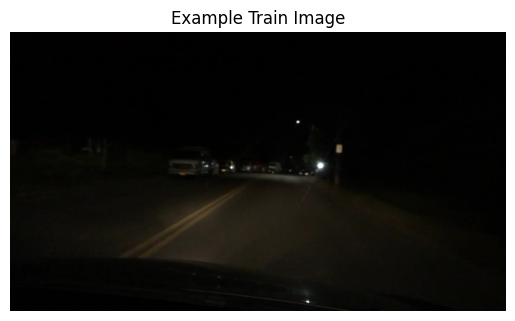

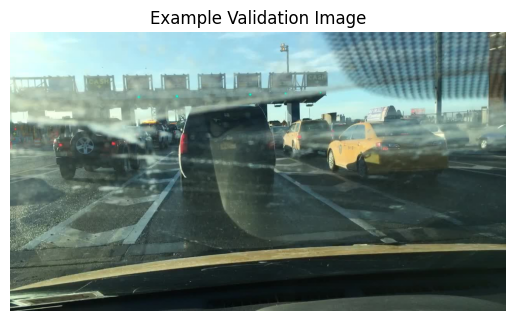

First element in det_train.json:
{
    "name": "0000f77c-6257be58.jpg",
    "attributes": {
        "weather": "clear",
        "timeofday": "daytime",
        "scene": "city street"
    },
    "timestamp": 10000,
    "labels": [
        {
            "id": "0",
            "attributes": {
                "occluded": false,
                "truncated": false,
                "trafficLightColor": "G"
            },
            "category": "traffic light",
            "box2d": {
                "x1": 1125.902264,
                "y1": 133.184488,
                "x2": 1156.978645,
                "y2": 210.875445
            }
        },
        {
            "id": "1",
            "attributes": {
                "occluded": false,
                "truncated": false,
                "trafficLightColor": "G"
            },
            "category": "traffic light",
            "box2d": {
                "x1": 1156.978645,
                "y1": 136.637417,
                "x2": 1191.50796,
 

In [3]:
import os
import json
import matplotlib.pyplot as plt
import cv2

# Paths to the example files
train_image_path = "/content/data/train_images/bdd100k/images/100k/train"
val_image_path = "/content/data/val_images/bdd100k/images/100k/val"
train_json_path = "/content/data/labels/bdd100k/labels/det_20/det_train.json"

# Step 1: Load and display an example train image
train_image_file = os.listdir(train_image_path)[0]  # First image from train folder
train_image = cv2.imread(os.path.join(train_image_path, train_image_file))
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

plt.imshow(train_image)
plt.title("Example Train Image")
plt.axis('off')
plt.show()

# Step 2: Load and display an example val image
val_image_file = os.listdir(val_image_path)[0]  # First image from val folder
val_image = cv2.imread(os.path.join(val_image_path, val_image_file))
val_image = cv2.cvtColor(val_image, cv2.COLOR_BGR2RGB)

plt.imshow(val_image)
plt.title("Example Validation Image")
plt.axis('off')
plt.show()

# Step 3: Load and display the first element of det_train.json
with open(train_json_path, 'r') as f:
    train_annotations = json.load(f)

# Display the first element
print("First element in det_train.json:")
print(json.dumps(train_annotations[0], indent=4))


In [5]:
from ultralytics import YOLO
import json
import os
from tqdm import tqdm
import numpy as np

# Step 1: Load the pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # Replace 'yolov8n.pt' with your desired model if needed

# Step 2: Path to validation images and labels
val_image_path = "/content/data/val_images/bdd100k/images/100k/val"
val_label_path = "/content/data/labels/bdd100k/labels/det_20/det_val.json"

# Step 3: Load validation annotations (ground truth)
with open(val_label_path, 'r') as f:
    val_annotations = json.load(f)

# Step 4: Get all possible ground truth categories
ground_truth_categories = set()
for annotation in val_annotations:
    for label in annotation['labels']:
        ground_truth_categories.add(label['category'])

# Step 5: Initialize results dictionary
results = {
    "class_wise": {category: {"TP": 0, "FP": 0, "FN": 0} for category in ground_truth_categories},
    "overall": {"TP": 0, "FP": 0, "FN": 0}
}

# Step 6: Function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = max(box1[0], box2[0]), max(box1[1], box2[1]), min(box1[2], box2[2]), min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

# Step 7: Perform evaluation
iou_threshold = 0.5  # IoU threshold for matching

for annotation in tqdm(val_annotations, desc="Evaluating"):
    image_name = annotation['name']
    image_path = os.path.join(val_image_path, image_name)

    # Ground truth boxes and categories
    gt_boxes = [(label['box2d']['x1'], label['box2d']['y1'], label['box2d']['x2'], label['box2d']['y2']) for label in annotation['labels']]
    gt_categories = [label['category'] for label in annotation['labels']]

    # Perform inference
    predictions = model(image_path)
    pred_boxes = [result.boxes.xyxy.cpu().numpy() for result in predictions]
    pred_classes = [result.boxes.cls.cpu().numpy() for result in predictions]
    pred_scores = [result.boxes.conf.cpu().numpy() for result in predictions]

    # Flatten results
    pred_boxes = np.concatenate(pred_boxes) if len(pred_boxes) > 0 else []
    pred_classes = np.concatenate(pred_classes) if len(pred_classes) > 0 else []
    pred_scores = np.concatenate(pred_scores) if len(pred_scores) > 0 else []

    # Match predictions with ground truth
    matched = set()
    for i, pred_box in enumerate(pred_boxes):
        pred_class = pred_classes[i]
        category = model.names[int(pred_class)]  # Map predicted class to category name

        # Skip if predicted class is not in ground truth categories
        if category not in results["class_wise"]:
            continue

        best_iou = 0
        best_gt_idx = -1
        for j, gt_box in enumerate(gt_boxes):
            if j in matched:
                continue
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = j

        if best_iou >= iou_threshold:
            # True Positive
            results["class_wise"][category]["TP"] += 1
            results["overall"]["TP"] += 1
            matched.add(best_gt_idx)
        else:
            # False Positive
            results["class_wise"][category]["FP"] += 1
            results["overall"]["FP"] += 1

    # Count False Negatives
    for j, gt_box in enumerate(gt_boxes):
        if j not in matched:
            category = gt_categories[j]
            results["class_wise"][category]["FN"] += 1
            results["overall"]["FN"] += 1

# Step 8: Calculate Precision, Recall, and F1-score
for category, metrics in results["class_wise"].items():
    TP, FP, FN = metrics["TP"], metrics["FP"], metrics["FN"]
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    metrics.update({"Precision": precision, "Recall": recall, "F1-score": f1_score})
print("Ground Truth Categories:", ground_truth_categories)
# Step 9: Display Results
print("\nClass-wise Results:")
for category, metrics in results["class_wise"].items():
    print(f"Category: {category}")
    print(f"  Precision: {metrics['Precision']:.2f}")
    print(f"  Recall: {metrics['Recall']:.2f}")
    print(f"  F1-score: {metrics['F1-score']:.2f}")
    print(f"  TP: {metrics['TP']}, FP: {metrics['FP']}, FN: {metrics['FN']}")

print("\nOverall Results:")
print(f"  TP: {results['overall']['TP']}, FP: {results['overall']['FP']}, FN: {results['overall']['FN']}")



Evaluating:   0%|          | 0/10000 [00:00<?, ?it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1c66a42-6f7d68ca.jpg: 384x640 12 cars, 1 truck, 32.6ms
Speed: 1.9ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 1/10000 [00:00<1:06:32,  2.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1c81faa-3df17267.jpg: 384x640 (no detections), 32.2ms
Speed: 5.0ms preprocess, 32.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1c81faa-c80764c5.jpg: 384x640 1 car, 28.4ms
Speed: 1.8ms preprocess, 28.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 3/10000 [00:00<24:39,  6.76it/s]  


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1c9c847-3bda4659.jpg: 384x640 15 cars, 1 bus, 21.7ms
Speed: 1.9ms preprocess, 21.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ca2e5d-84cf9134.jpg: 384x640 4 persons, 6 cars, 2 traffic lights, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 5/10000 [00:00<16:56,  9.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ca8418-84a133a0.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1cac6a7-04e33135.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1cd1e94-26dd524f.jpg: 384x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1cd1e94-549d0bfe.jpg: 384x640 1 person, 2 cars, 1 bus, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 9/10000 [00:00<10:07, 16.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ceb32e-3f481b43.jpg: 384x640 5 cars, 1 truck, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ceb32e-51852abe.jpg: 384x640 9 cars, 19.9ms
Speed: 1.9ms preprocess, 19.9ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ceb32e-813f84b2.jpg: 384x640 1 car, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 12/10000 [00:00<08:49, 18.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ceb32e-a106591d.jpg: 384x640 12 cars, 3 trucks, 21.4ms
Speed: 9.0ms preprocess, 21.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1cebfb7-284f5117.jpg: 384x640 5 cars, 34.4ms
Speed: 1.9ms preprocess, 34.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0091f-75824d0d.jpg: 384x640 5 cars, 1 truck, 22.4ms
Speed: 2.0ms preprocess, 22.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 15/10000 [00:01<09:08, 18.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0091f-f2c2d2ae.jpg: 384x640 4 cars, 3 trucks, 30.2ms
Speed: 2.0ms preprocess, 30.2ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-03dcecc2.jpg: 384x640 3 persons, 4 cars, 1 truck, 14.4ms
Speed: 2.1ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-06deb55d.jpg: 384x640 9 persons, 9 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 18/10000 [00:01<08:31, 19.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-28f0e779.jpg: 384x640 12 cars, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-2ed2269e.jpg: 384x640 6 cars, 20.8ms
Speed: 3.5ms preprocess, 20.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-5490450b.jpg: 384x640 2 cars, 1 traffic light, 34.0ms
Speed: 3.3ms preprocess, 34.0ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 21/10000 [00:01<08:59, 18.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-65deaeef.jpg: 384x640 8 cars, 2 trucks, 20.7ms
Speed: 3.5ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d0a191-de8948f6.jpg: 384x640 10 cars, 1 traffic light, 20.0ms
Speed: 4.1ms preprocess, 20.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 23/10000 [00:01<09:01, 18.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d10d08-5b108225.jpg: 384x640 5 cars, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d10d08-743fd86c.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d10d08-c35503b8.jpg: 384x640 11 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 26/10000 [00:01<08:18, 20.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d10d08-da110fcb.jpg: 384x640 9 cars, 1 traffic light, 24.9ms
Speed: 3.7ms preprocess, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d10d08-ec660956.jpg: 384x640 3 cars, 29.5ms
Speed: 9.2ms preprocess, 29.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d22449-117aa773.jpg: 384x640 2 cars, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 29/10000 [00:01<08:40, 19.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d22449-15fb948f.jpg: 384x640 2 cars, 10.1ms
Speed: 4.1ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d22ed6-f1cac061.jpg: 384x640 2 persons, 7 cars, 1 bus, 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d3907b-2278601b.jpg: 384x640 1 car, 1 traffic light, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d4b62c-60aab822.jpg: 384x640 15 cars, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   0%|          | 33/10000 [00:01<07:12, 23.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d4b62c-89eeb5d3.jpg: 384x640 2 cars, 3 traffic lights, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d4b62c-d9805029.jpg: 384x640 10 cars, 1 traffic light, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d59b1f-a38aec79.jpg: 384x640 3 cars, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-0bdb47dc.jpg: 384x640 4 cars, 1 truck, 6.9ms
Speed: 1.4ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-2a92e19f.jpg: 384x640 2 cars, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.6m

Evaluating:   0%|          | 38/10000 [00:02<05:48, 28.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-36f2d3b7.jpg: 384x640 3 cars, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-5744370e.jpg: 384x640 3 cars, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-5af8623b.jpg: 384x640 (no detections), 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-995f9d8a.jpg: 384x640 1 person, 3 cars, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-9e14f05f.jpg: 384x640 5 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.1ms postprocess per image at

Evaluating:   0%|          | 43/10000 [00:02<04:54, 33.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d7b3ac-afa57f22.jpg: 384x640 2 cars, 1 bus, 1 truck, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d8735d-eee9f184.jpg: 384x640 6 cars, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d968b9-563405f4.jpg: 384x640 1 person, 5 cars, 1 bus, 1 truck, 3 traffic lights, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d968b9-ce42734f.jpg: 384x640 1 person, 13 cars, 3 trucks, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d971b4-ac67ca0d.jpg: 384x640 11 cars, 7.0ms
Speed: 1.

Evaluating:   0%|          | 48/10000 [00:02<04:32, 36.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d9e136-6c94ea3f.jpg: 384x640 2 persons, 5 cars, 1 motorcycle, 1 bus, 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1d9e136-9ab25cb3.jpg: 384x640 1 person, 8 cars, 1 truck, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1da9c53-0f3d4c5d.jpg: 384x640 5 cars, 1 truck, 14.5ms
Speed: 1.7ms preprocess, 14.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1dac7f7-6b2e0382.jpg: 384x640 8 cars, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 52/10000 [00:02<04:36, 36.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1db7e22-cfa74dc3.jpg: 384x640 2 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1dce572-c6a8cb5e.jpg: 384x640 5 cars, 1 truck, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1dd58c1-8b546ba7.jpg: 384x640 1 person, 4 cars, 2 trucks, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1df722f-57d21f3f.jpg: 384x640 4 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 56/10000 [00:02<04:35, 36.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1df722f-5bcc3db7.jpg: 384x640 (no detections), 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e0c01d-dd9e6e2f.jpg: 384x640 1 person, 2 cars, 2 trucks, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e1a7b8-0aec80e8.jpg: 384x640 6 cars, 2 trucks, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e1a7b8-65ec7612.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 60/10000 [00:02<04:30, 36.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e1a7b8-a7426a97.jpg: 384x640 4 cars, 1 truck, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e1a7b8-b397c445.jpg: 384x640 3 cars, 1 truck, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e2346e-c5f98707.jpg: 384x640 (no detections), 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e3e9f5-92377424.jpg: 384x640 9 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 64/10000 [00:02<04:27, 37.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e62c91-eca210a9.jpg: 384x640 1 person, 7 cars, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e6efc0-2552cc5d.jpg: 384x640 2 cars, 1 truck, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e88fd2-c1e4fd2b.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e8ad72-c3c79240.jpg: 384x640 5 cars, 1 traffic light, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 68/10000 [00:02<04:23, 37.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1e9ee0e-67e26f2e.jpg: 384x640 17 cars, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ea0ae4-4f770228.jpg: 384x640 2 cars, 1 truck, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1eb9133-5cc75c18.jpg: 384x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ebfc3c-740ec84a.jpg: 384x640 9 cars, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 72/10000 [00:02<04:32, 36.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ebfc3c-cc9c2bb8.jpg: 384x640 4 persons, 4 cars, 17.4ms
Speed: 2.2ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ee702d-0ae1fc10.jpg: 384x640 3 cars, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ee702d-4a193906.jpg: 384x640 7 cars, 10.7ms
Speed: 3.6ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ee702d-525fcebf.jpg: 384x640 2 cars, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 76/10000 [00:02<04:35, 35.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f022d3-3774de8b.jpg: 384x640 10 cars, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f022d3-45162c67.jpg: 384x640 1 car, 1 bus, 2 traffic lights, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f0efd9-37a14dda.jpg: 384x640 4 cars, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f0efd9-e900c6e5.jpg: 384x640 3 cars, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f20aa0-3401c3bf.jpg: 384x640 1 person, 4 cars, 1 train, 1 traffic light, 6.7ms
Speed: 1.4ms preprocess, 6.7ms

Evaluating:   1%|          | 81/10000 [00:03<04:14, 38.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f20aa0-50213047.jpg: 384x640 1 person, 5 cars, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f20aa0-6ef1db42.jpg: 384x640 (no detections), 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f25ff6-1ddb7e43.jpg: 384x640 3 cars, 1 motorcycle, 1 truck, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-07b32e8c.jpg: 384x640 2 cars, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-09593e90.jpg: 384x640 2 cars, 1 train, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference

Evaluating:   1%|          | 86/10000 [00:03<03:58, 41.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-16256d7c.jpg: 384x640 1 person, 6 cars, 1 bus, 2 trucks, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-33824f31.jpg: 384x640 10 persons, 8 cars, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-846d8cb2.jpg: 384x640 1 person, 4 cars, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-97465266.jpg: 384x640 1 person, 9 cars, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-9958bd99.jpg: 384x640 6 persons, 4 cars, 8.7ms
Spee

Evaluating:   1%|          | 91/10000 [00:03<04:13, 39.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-bf7d513f.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-cf446195.jpg: 384x640 11 cars, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-d8d1459c.jpg: 384x640 1 person, 2 cars, 2 trucks, 1 fire hydrant, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f4491b-dd8dfed5.jpg: 384x640 9 cars, 1 traffic light, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 95/10000 [00:03<04:17, 38.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f62c41-ed0c6521.jpg: 384x640 1 person, 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f6c103-5ce1f3c6.jpg: 384x640 2 cars, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f6c103-8b75ea3e.jpg: 384x640 6 cars, 1 traffic light, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f6c103-b00e8aad.jpg: 384x640 4 cars, 1 truck, 3 traffic lights, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 99/10000 [00:03<04:21, 37.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1f85377-44885085.jpg: 384x640 4 cars, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1fbaab8-68db7df7.jpg: 384x640 2 cars, 2 traffic lights, 9.0ms
Speed: 1.6ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1fbf878-b31a8293.jpg: 384x640 4 persons, 3 cars, 1 bus, 4 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1fc95c9-644e3c3f.jpg: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 1 fire hydrant, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|          | 103/10000 [00:03<04:18, 38.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1fc95c9-cb2882c7.jpg: 384x640 5 cars, 3 trucks, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ff4656-0435391e.jpg: 384x640 9 cars, 2 traffic lights, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ff4656-94ee8536.jpg: 384x640 5 cars, 1 truck, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b1ff4656-ebcfeb35.jpg: 384x640 1 person, 2 cars, 2 motorcycles, 1 truck, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b200b84e-4a792877.jpg: 384x640 2 cars, 6.9ms
Speed: 1.5ms preproc

Evaluating:   1%|          | 108/10000 [00:03<04:05, 40.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b200e97a-bf074435.jpg: 384x640 5 cars, 1 truck, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20234fd-822029be.jpg: 384x640 3 persons, 4 cars, 1 truck, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b202cae2-672e61c5.jpg: 384x640 11 cars, 1 bus, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b202cae2-f46c74a6.jpg: 384x640 10 cars, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2036451-aa924fd1.jpg: 384x640 8 cars, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 1.1ms postp

Evaluating:   1%|          | 113/10000 [00:03<04:03, 40.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2046bcf-8bc6a044.jpg: 384x640 1 person, 8 cars, 10.4ms
Speed: 2.5ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b204a5c1-05981158.jpg: 384x640 1 person, 4 cars, 2 buss, 1 truck, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b204a5c1-064b0040.jpg: 384x640 12 cars, 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b204a5c1-fa3d5b88.jpg: 384x640 6 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b205eb4d-f84aaa1a.jpg: 384x640 11 cars, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.1ms 

Evaluating:   1%|          | 118/10000 [00:04<04:16, 38.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2064e61-2beadd45.jpg: 384x640 7 cars, 3 traffic lights, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b206a78b-99f405ab.jpg: 384x640 1 person, 4 cars, 1 train, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2080dc7-f9b98a5f.jpg: 384x640 (no detections), 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20841f9-cef732d5.jpg: 384x640 4 cars, 2 buss, 1 truck, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b1e63-4d8478a4.jpg: 384x640 6 cars, 6.6ms
Speed: 1.4ms preprocess, 6.6

Evaluating:   1%|          | 123/10000 [00:04<04:05, 40.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-64b9cdb8.jpg: 384x640 5 cars, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-650e674d.jpg: 384x640 12 cars, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-6e2b9e73.jpg: 384x640 1 car, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-7767e6b6.jpg: 384x640 8 cars, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-bd242bf0.jpg: 384x640 2 persons, 2 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (

Evaluating:   1%|▏         | 128/10000 [00:04<04:04, 40.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-ca16c907.jpg: 384x640 3 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-e31380a7.jpg: 384x640 1 car, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b69d2-ffc1d6af.jpg: 384x640 4 cars, 1 truck, 19.1ms
Speed: 4.1ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20b9c19-91e01a50.jpg: 384x640 8 cars, 13.7ms
Speed: 2.5ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20d494a-cdebe83e.jpg: 384x640 3 cars, 11.3ms
Speed: 2.5ms preprocess, 11.3ms inference, 2.3ms postprocess per image at 

Evaluating:   1%|▏         | 133/10000 [00:04<04:31, 36.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20e291a-32ac11c1.jpg: 384x640 7 cars, 13.4ms
Speed: 2.3ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20e291a-6012d836.jpg: 384x640 14 cars, 1 truck, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20eae11-149766ce.jpg: 384x640 1 person, 6 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20eae11-18cd8ca2.jpg: 384x640 (no detections), 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|▏         | 137/10000 [00:04<04:53, 33.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20eae11-6817ba7a.jpg: 384x640 5 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b20ff95c-b9444127.jpg: 384x640 2 persons, 1 truck, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2102d00-5eb86b71.jpg: 384x640 6 cars, 15.3ms
Speed: 4.7ms preprocess, 15.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2102d00-a8c09be1.jpg: 384x640 1 person, 5 cars, 18.3ms
Speed: 2.3ms preprocess, 18.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|▏         | 141/10000 [00:04<05:09, 31.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2131b7b-e58faab7.jpg: 384x640 1 car, 16.4ms
Speed: 5.0ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b213e4eb-09c01a17.jpg: 384x640 6 cars, 13.5ms
Speed: 3.6ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b214d1e1-f248c616.jpg: 384x640 4 persons, 4 cars, 1 traffic light, 17.3ms
Speed: 4.0ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21547c1-73e457f8.jpg: 384x640 2 cars, 1 truck, 20.1ms
Speed: 3.5ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|▏         | 145/10000 [00:04<05:37, 29.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21547c1-796757ac.jpg: 384x640 3 cars, 2 traffic lights, 15.6ms
Speed: 3.1ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2156f8e-72e1547c.jpg: 384x640 (no detections), 22.3ms
Speed: 5.0ms preprocess, 22.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b215943a-10e44587.jpg: 384x640 1 person, 4 cars, 1 stop sign, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   1%|▏         | 148/10000 [00:05<05:58, 27.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b216243d-55963da2.jpg: 384x640 6 cars, 1 truck, 18.6ms
Speed: 2.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b216243d-ad4306b9.jpg: 384x640 3 persons, 5 cars, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2169b74-fa197951.jpg: 384x640 2 cars, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 151/10000 [00:05<06:01, 27.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21742c2-0e7a2b57.jpg: 384x640 3 cars, 2 trucks, 14.8ms
Speed: 2.4ms preprocess, 14.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21742c2-18d3463a.jpg: 384x640 10 persons, 5 cars, 1 truck, 1 umbrella, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2194b15-1825056a.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 10.9ms
Speed: 3.6ms preprocess, 10.9ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 154/10000 [00:05<06:09, 26.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21ac8b3-9b9cb45a.jpg: 384x640 3 cars, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21bfb83-ea32f716.jpg: 384x640 7 cars, 2 traffic lights, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21c68e6-65674a17.jpg: 384x640 1 person, 1 car, 8.7ms
Speed: 4.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 157/10000 [00:05<06:21, 25.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21c86ac-0dc77d82.jpg: 384x640 4 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21c86ac-2eb7ba16.jpg: 384x640 10 cars, 2 trucks, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21c86ac-71205084.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b21d5efb-5e2cd743.jpg: 384x640 8 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 161/10000 [00:05<05:45, 28.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2208b0f-2796a692.jpg: 384x640 7 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b222c329-5dc8dbf7.jpg: 384x640 2 persons, 4 cars, 2 trucks, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b229488e-e4714bb7.jpg: 384x640 1 car, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b22a4d9f-48b2e986.jpg: 384x640 5 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 165/10000 [00:05<05:23, 30.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b22a4d9f-73cc8810.jpg: 384x640 6 cars, 1 truck, 1 stop sign, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b22e02cd-6af68e18.jpg: 384x640 5 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b22f174d-a19c875e.jpg: 384x640 1 person, 1 bicycle, 7 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b22f385b-5d7e5202.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 169/10000 [00:05<05:22, 30.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b230132b-ff8f2719.jpg: 384x640 5 cars, 4 traffic lights, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b230a7b2-c881c382.jpg: 384x640 (no detections), 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b231a630-c4522992.jpg: 384x640 6 cars, 3 trucks, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b232c7c9-d251d9ee.jpg: 384x640 20 cars, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 173/10000 [00:05<05:20, 30.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2331b83-648e56ca.jpg: 384x640 4 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2331b83-a28e6b57.jpg: 384x640 1 person, 6 cars, 2 buss, 2 trucks, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23493b1-3200de1c.jpg: 384x640 4 persons, 4 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b237db93-fab44bf2.jpg: 384x640 2 cars, 2 trucks, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 177/10000 [00:06<05:15, 31.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23a79d1-43dfeecd.jpg: 384x640 3 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23a79d1-e434acaa.jpg: 384x640 6 cars, 1 boat, 1 traffic light, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23adb0d-72704b27.jpg: 384x640 2 cars, 1 truck, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23adb0d-8a7aaced.jpg: 384x640 1 person, 6 cars, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 181/10000 [00:06<05:09, 31.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23b2649-1a78948d.jpg: 384x640 3 cars, 1 bench, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23b2649-6af03cd5.jpg: 384x640 9 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23b2649-8349d2a1.jpg: 384x640 3 cars, 1 truck, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23bb45f-ddeea1d8.jpg: 384x640 1 person, 3 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 185/10000 [00:06<04:54, 33.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23c9e00-5506ddfb.jpg: 384x640 4 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23c9e00-b425de1b.jpg: 384x640 5 cars, 8.1ms
Speed: 5.5ms preprocess, 8.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23d2079-0c019d8e.jpg: 384x640 4 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23f7012-32d284ce.jpg: 384x640 4 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 189/10000 [00:06<04:58, 32.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23f7012-fab06dac.jpg: 384x640 3 cars, 2 traffic lights, 12.7ms
Speed: 6.2ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b23fe89b-c704fe97.jpg: 384x640 6 cars, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24071b8-b3ee1196.jpg: 384x640 2 persons, 4 cars, 1 truck, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2408e45-984ba5aa.jpg: 384x640 8 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 193/10000 [00:06<05:10, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b242929f-3051abca.jpg: 384x640 7 cars, 16.7ms
Speed: 3.1ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b242f6b2-0033bdfb.jpg: 384x640 1 person, 5 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b242f6b2-99d2f2c1.jpg: 384x640 5 cars, 2 traffic lights, 11.2ms
Speed: 3.1ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b242f6b2-eaa39345.jpg: 384x640 3 persons, 5 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 197/10000 [00:06<05:24, 30.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b242f6b2-f5da110f.jpg: 384x640 9 persons, 3 cars, 1 traffic light, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24380ab-63272e5a.jpg: 384x640 (no detections), 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24380ab-6dbeb908.jpg: 384x640 1 car, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24380ab-855e9c00.jpg: 384x640 1 car, 1 truck, 16.4ms
Speed: 2.3ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 201/10000 [00:06<05:23, 30.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24380ab-c07680d1.jpg: 384x640 1 car, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2443c9d-8cc3991f.jpg: 384x640 14 cars, 10.3ms
Speed: 5.2ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b245b306-ca3dca4e.jpg: 384x640 (no detections), 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b245e52e-0a0e4e69.jpg: 384x640 5 cars, 11.6ms
Speed: 3.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 205/10000 [00:06<05:35, 29.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b245e52e-aaeeb959.jpg: 384x640 8 cars, 1 truck, 1 traffic light, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b246c8e8-3dd42e6c.jpg: 384x640 2 cars, 1 traffic light, 15.2ms
Speed: 3.0ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b246c8e8-4dd36bfc.jpg: 384x640 1 car, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 208/10000 [00:07<05:48, 28.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b246c8e8-ecce1321.jpg: 384x640 1 car, 1 train, 1 traffic light, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24702e3-0456c83c.jpg: 384x640 7 cars, 3 trucks, 16.1ms
Speed: 2.4ms preprocess, 16.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24702e3-900f61ea.jpg: 384x640 6 cars, 1 truck, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 211/10000 [00:07<05:57, 27.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24702e3-e6f33768.jpg: 384x640 8 cars, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24702e3-f56e0731.jpg: 384x640 7 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24702e3-fe617f57.jpg: 384x640 10 cars, 8 traffic lights, 13.4ms
Speed: 2.2ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 214/10000 [00:07<05:56, 27.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b248306f-a5089e94.jpg: 384x640 6 cars, 4 traffic lights, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2490dcb-7469cbe8.jpg: 384x640 1 person, 9 cars, 2 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b249e7f2-92d2efad.jpg: 384x640 2 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b249e7f2-d619bd69.jpg: 384x640 (no detections), 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 218/10000 [00:07<05:22, 30.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24b3585-221ac8ac.jpg: 384x640 8 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24bdca1-e4f0c558.jpg: 384x640 8 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24c9ee6-e43a6e8b.jpg: 384x640 1 car, 8.2ms
Speed: 3.6ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24ca67a-594d7d3c.jpg: 384x640 1 truck, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 222/10000 [00:07<05:08, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24d283f-33783d1b.jpg: 384x640 7 cars, 1 bus, 3 trucks, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24f03f7-ff66eaca.jpg: 384x640 4 cars, 4 traffic lights, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b24f7455-e8c55d6a.jpg: 384x640 3 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2505382-1423f56a.jpg: 384x640 7 cars, 1 traffic light, 1 stop sign, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 226/10000 [00:07<04:53, 33.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2505382-272e7823.jpg: 384x640 2 traffic lights, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2505382-2905b23c.jpg: 384x640 6 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2505382-549785d3.jpg: 384x640 (no detections), 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2505382-de5238f0.jpg: 384x640 4 cars, 1 traffic light, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 230/10000 [00:07<04:50, 33.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b250fb0c-01a1b8d3.jpg: 384x640 1 person, 7 cars, 1 truck, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251064f-30002542.jpg: 384x640 6 cars, 2 trucks, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251064f-4696b75e.jpg: 384x640 5 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251064f-5f6b663e.jpg: 384x640 4 cars, 1 truck, 1 bird, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 234/10000 [00:07<04:50, 33.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251064f-8d92db81.jpg: 384x640 5 persons, 10 cars, 3 traffic lights, 8.7ms
Speed: 6.1ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251064f-e7a165fd.jpg: 384x640 1 person, 15 cars, 3 traffic lights, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b251b746-00138418.jpg: 384x640 6 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-0bdf0ac7.jpg: 384x640 2 cars, 1 traffic light, 11.9ms
Speed: 4.2ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 238/10000 [00:07<05:24, 30.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-2f889586.jpg: 384x640 3 cars, 1 bus, 1 truck, 3 traffic lights, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-5ccba454.jpg: 384x640 2 cars, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-6502a28c.jpg: 384x640 3 cars, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-82c804d4.jpg: 384x640 1 person, 2 cars, 11.8ms
Speed: 5.7ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 242/10000 [00:08<05:28, 29.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-bc3cbb18.jpg: 384x640 7 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-e5f99451.jpg: 384x640 6 cars, 2 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-f2f28aff.jpg: 384x640 6 persons, 5 cars, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b255cd6c-fb594dcb.jpg: 384x640 4 cars, 3 traffic lights, 12.9ms
Speed: 3.9ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 246/10000 [00:08<05:37, 28.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2576c8c-2924c365.jpg: 384x640 3 persons, 8 cars, 1 truck, 1 stop sign, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2576c8c-2de20b8a.jpg: 384x640 16 cars, 15.2ms
Speed: 2.6ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b257f482-cf55d35c.jpg: 384x640 4 cars, 15.7ms
Speed: 3.2ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   2%|▏         | 249/10000 [00:08<05:52, 27.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b258a38b-0126cc8c.jpg: 384x640 4 persons, 1 car, 15.6ms
Speed: 2.6ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b258d359-49a3ad31.jpg: 384x640 6 cars, 14.5ms
Speed: 2.8ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b258d359-db99eff1.jpg: 384x640 5 cars, 17.3ms
Speed: 2.0ms preprocess, 17.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 252/10000 [00:08<05:54, 27.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b259c5e1-cda39ef9.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 truck, 15.4ms
Speed: 2.5ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25aac57-705d50ad.jpg: 384x640 1 car, 10.2ms
Speed: 4.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25ae6c0-311e72c2.jpg: 384x640 2 persons, 7 cars, 1 truck, 21.4ms
Speed: 2.5ms preprocess, 21.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 255/10000 [00:08<06:08, 26.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25ae6c0-fb9fea6a.jpg: 384x640 5 cars, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25c1103-5da4b435.jpg: 384x640 2 cars, 1 truck, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25c51f5-e9dba941.jpg: 384x640 1 person, 6 cars, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 258/10000 [00:08<06:12, 26.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25fb716-78d8d49b.jpg: 384x640 3 cars, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25fd5d3-fa4bfca0.jpg: 384x640 4 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b25fdb41-4644e3f7.jpg: 384x640 4 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 261/10000 [00:08<06:10, 26.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b262f576-b0373824.jpg: 384x640 3 persons, 2 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26309ce-447c0ac7.jpg: 384x640 9 cars, 13.2ms
Speed: 3.7ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26309ce-fc963b47.jpg: 384x640 (no detections), 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 264/10000 [00:08<06:02, 26.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26327fe-3ac19999.jpg: 384x640 11 cars, 1 train, 18.5ms
Speed: 3.0ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26331b9-102f5d9a.jpg: 384x640 (no detections), 12.8ms
Speed: 3.9ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2638d82-062aa1de.jpg: 384x640 3 cars, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 267/10000 [00:09<06:13, 26.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b263f57d-1ccf6e51.jpg: 384x640 2 cars, 1 traffic light, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2648a7f-42f72f67.jpg: 384x640 2 cars, 1 truck, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b265b9cf-2d517da6.jpg: 384x640 4 cars, 3 trucks, 3 traffic lights, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 270/10000 [00:09<06:32, 24.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26610ce-083c3bd1.jpg: 384x640 3 cars, 15.1ms
Speed: 6.0ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266429a-83757042.jpg: 384x640 5 cars, 3 traffic lights, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266429a-ac0c4ed3.jpg: 384x640 3 persons, 2 cars, 1 train, 14.6ms
Speed: 5.1ms preprocess, 14.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 273/10000 [00:09<06:35, 24.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-12bf52fa.jpg: 384x640 7 cars, 1 traffic light, 1 fire hydrant, 16.0ms
Speed: 3.1ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-29fa8335.jpg: 384x640 2 persons, 7 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-403143cc.jpg: 384x640 3 persons, 3 cars, 1 truck, 1 umbrella, 13.8ms
Speed: 4.1ms preprocess, 13.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 276/10000 [00:09<06:27, 25.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-4d22b355.jpg: 384x640 4 cars, 13.4ms
Speed: 2.2ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-c518f15d.jpg: 384x640 9 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b266db29-da0abce7.jpg: 384x640 14 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 279/10000 [00:09<06:18, 25.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2675b13-d04e4a76.jpg: 384x640 3 cars, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b268bb58-5ead8a56.jpg: 384x640 10 cars, 4 trucks, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2694461-db4f4470.jpg: 384x640 5 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 282/10000 [00:09<06:16, 25.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26aafd1-1bc4dccc.jpg: 384x640 1 person, 7 cars, 20.6ms
Speed: 2.6ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26aafd1-513824d4.jpg: 384x640 13 cars, 1 truck, 11.7ms
Speed: 3.4ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-1c7593b1.jpg: 384x640 1 car, 1 traffic light, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 285/10000 [00:09<06:11, 26.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-203e440c.jpg: 384x640 2 cars, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-2b68a502.jpg: 384x640 11 cars, 1 traffic light, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-38f78442.jpg: 384x640 (no detections), 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-c7bcbe2d.jpg: 384x640 1 tv, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 289/10000 [00:09<05:41, 28.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-da78f324.jpg: 384x640 3 cars, 1 traffic light, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-e4ca935c.jpg: 384x640 1 train, 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26ba07a-f781b661.jpg: 384x640 1 car, 1 bus, 1 train, 1 traffic light, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26cfcdc-10346684.jpg: 384x640 9 cars, 1 bus, 1 truck, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26cfcdc-2e290c42.jpg: 384x640 5 cars, 1 bus, 1 truck, 2 traffic light

Evaluating:   3%|▎         | 294/10000 [00:10<04:58, 32.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26cfcdc-7b00747d.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26cfcdc-eb092da8.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26dd913-2888cbfd.jpg: 384x640 2 persons, 10 cars, 1 truck, 1 traffic light, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26dddb5-28e4a05f.jpg: 384x640 3 cars, 1 bus, 1 truck, 2 traffic lights, 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26f7271-d90

Evaluating:   3%|▎         | 299/10000 [00:10<04:31, 35.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26f8762-61cfb033.jpg: 384x640 1 person, 6 cars, 1 truck, 15 birds, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26f9b1e-09c56a3c.jpg: 384x640 3 cars, 1 fire hydrant, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b26f9b1e-3e172ced.jpg: 384x640 7 cars, 1 bus, 1 truck, 3 traffic lights, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27098c3-0db780d5.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 1 fire hydrant, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 303/10000 [00:10<04:36, 35.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27098c3-915a9986.jpg: 384x640 1 person, 21 cars, 11.7ms
Speed: 2.6ms preprocess, 11.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27098c3-c443b6e3.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27098c3-dedf92b2.jpg: 384x640 3 persons, 1 bicycle, 2 cars, 2 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b270d8e4-0f565398.jpg: 384x640 1 person, 5 cars, 2 trucks, 1 umbrella, 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 307/10000 [00:10<05:01, 32.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27127df-eac9b95e.jpg: 384x640 3 cars, 11.3ms
Speed: 2.3ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2714f5d-07bf604c.jpg: 384x640 5 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2714f5d-5bc98e55.jpg: 384x640 4 cars, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2715214-13e3dd85.jpg: 384x640 12 cars, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 311/10000 [00:10<04:58, 32.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2715214-d38332ea.jpg: 384x640 1 person, 12 cars, 1 bus, 1 truck, 3 traffic lights, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27369f3-9b9598f4.jpg: 384x640 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27369f3-dd3c0b46.jpg: 384x640 3 cars, 1 traffic light, 9.9ms
Speed: 2.2ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2743b5d-e2d585be.jpg: 384x640 1 person, 15 cars, 1 traffic light, 6.9ms
Speed: 2.0ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 315/10000 [00:10<04:56, 32.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2752cd6-12ba5588.jpg: 384x640 4 cars, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b275c028-6a0665cb.jpg: 384x640 2 cars, 3 traffic lights, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27688b6-1af27060.jpg: 384x640 4 cars, 1 train, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27688b6-cd521517.jpg: 384x640 2 cars, 1 bus, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2778280-4179c4af.jpg: 384x640 5 cars, 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 1.1ms postproce

Evaluating:   3%|▎         | 320/10000 [00:10<04:27, 36.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b277a772-08d8d7ad.jpg: 384x640 8 cars, 8.2ms
Speed: 4.6ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b277a772-715e949c.jpg: 384x640 5 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b277a772-848f75a9.jpg: 384x640 5 cars, 1 truck, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b277a772-87c10d5c.jpg: 384x640 8 cars, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 324/10000 [00:10<04:20, 37.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2794401-ba7d3c05.jpg: 384x640 3 cars, 1 train, 1 truck, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b279bc06-3c8aeb90.jpg: 384x640 2 persons, 7 cars, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b279bc06-4fa57251.jpg: 384x640 4 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b279bc06-b7bc42a9.jpg: 384x640 5 cars, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27b0cd9-f184d9a3.jpg: 384x640 4 cars, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.1ms postprocess pe

Evaluating:   3%|▎         | 329/10000 [00:11<04:09, 38.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27cd403-d7616bfa.jpg: 384x640 5 cars, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27cd403-f2d087cc.jpg: 384x640 17 cars, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27cde22-56abd0e1.jpg: 384x640 2 cars, 1 truck, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27d5dcb-5bdec286.jpg: 384x640 1 person, 10 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 333/10000 [00:11<04:07, 39.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27d5dcb-856c0b43.jpg: 384x640 1 person, 6 cars, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27d5dcb-9230790c.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27e8b69-c00092ae.jpg: 384x640 9 cars, 4 traffic lights, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27fdbad-ab895d86.jpg: 384x640 (no detections), 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b27fdbad-ae939e31.jpg: 384x640 2 cars, 8.4ms
Speed: 3.4ms preprocess, 8

Evaluating:   3%|▎         | 338/10000 [00:11<03:59, 40.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b280c9c1-4340305f.jpg: 384x640 1 person, 8 cars, 2 traffic lights, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b280c9c1-a75d23e5.jpg: 384x640 7 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2828509-133b042d.jpg: 384x640 2 traffic lights, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2828509-682cd3b2.jpg: 384x640 6 cars, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2828509-8e8fa55f.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 14.5ms
Speed: 2.0ms preproc

Evaluating:   3%|▎         | 343/10000 [00:11<04:22, 36.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b284c0e8-85fbc42a.jpg: 384x640 10 persons, 3 cars, 3 trucks, 2 traffic lights, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b284c0e8-b813f3cf.jpg: 384x640 1 person, 4 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b285698b-ff1293ce.jpg: 384x640 8 cars, 1 traffic light, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2860d72-0b43e851.jpg: 384x640 1 car, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   3%|▎         | 347/10000 [00:11<04:34, 35.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b289f2e8-cec8700d.jpg: 384x640 7 cars, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28aac6c-9f1b99cb.jpg: 384x640 1 car, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28cb5d3-2cf728ac.jpg: 384x640 1 car, 1 truck, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28cb5d3-9ff4ab4a.jpg: 384x640 2 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▎         | 351/10000 [00:11<04:39, 34.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28cb5d3-c4758dfd.jpg: 384x640 8 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28cb5d3-f800ecd2.jpg: 384x640 1 person, 3 cars, 1 bus, 1 train, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28cfc9b-224431ab.jpg: 384x640 7 cars, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28ec521-69495052.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▎         | 355/10000 [00:11<04:46, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28ec521-8266e1a4.jpg: 384x640 8 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28ec521-834a964c.jpg: 384x640 5 cars, 2 trucks, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28ec521-898e11bd.jpg: 384x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28f288b-784f7606.jpg: 384x640 3 cars, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▎         | 359/10000 [00:11<04:40, 34.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b28fc734-5add25db.jpg: 384x640 3 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29026f0-d5a5ee8c.jpg: 384x640 1 person, 2 cars, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b291cfd6-a46efbcc.jpg: 384x640 8 persons, 1 backpack, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b291cfd6-a6275049.jpg: 384x640 1 person, 5 cars, 1 bus, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b291cfd6-ff98ba56.jpg: 384x640 4 cars, 4 trucks, 8.7ms
Speed: 1.6ms preprocess, 8.7ms

Evaluating:   4%|▎         | 364/10000 [00:11<04:26, 36.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29273b2-339a1500.jpg: 384x640 1 person, 6 cars, 1 truck, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2932832-a2c8f6ef.jpg: 384x640 3 persons, 11 cars, 1 truck, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2932832-df9384eb.jpg: 384x640 3 persons, 10 cars, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2933acb-1e0c16cc.jpg: 384x640 5 cars, 1 bus, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▎         | 368/10000 [00:12<04:25, 36.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2933acb-e890758f.jpg: 384x640 4 cars, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29377e0-83e8340a.jpg: 384x640 8 cars, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2939bf0-221e1dfb.jpg: 384x640 6 cars, 1 traffic light, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b294386c-24ddd0c3.jpg: 384x640 7 persons, 6 cars, 1 motorcycle, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29511e5-0e7c7013.jpg: 384x640 8 cars, 1 traffic light, 6.6ms
Speed: 1.5ms preprocess, 6.6ms i

Evaluating:   4%|▎         | 373/10000 [00:12<04:13, 38.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2965b06-88a1da19.jpg: 384x640 3 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29806ee-7194648d.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29806ee-ac06730f.jpg: 384x640 3 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29806ee-e89a39a6.jpg: 384x640 10 cars, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 377/10000 [00:12<04:22, 36.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29c2372-b53a797c.jpg: 384x640 3 persons, 5 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29c5efd-754ba560.jpg: 384x640 3 cars, 1 bus, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29f09ea-911177ce.jpg: 384x640 2 persons, 6 cars, 1 motorcycle, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29f09ea-ecd5304b.jpg: 384x640 5 cars, 13.3ms
Speed: 2.5ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 381/10000 [00:12<04:38, 34.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29f7159-219cf764.jpg: 384x640 5 cars, 2 traffic lights, 9.4ms
Speed: 3.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b29f9214-4846c10c.jpg: 384x640 10 cars, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a0648b-d8e126bc.jpg: 384x640 6 cars, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a0dbe8-85f1894e.jpg: 384x640 3 cars, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 385/10000 [00:12<04:40, 34.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a1e013-638d6e4d.jpg: 384x640 8 cars, 2 trucks, 2 traffic lights, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a1e172-a969db88.jpg: 384x640 3 cars, 1 traffic light, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a46c1e-87aac2ec.jpg: 384x640 14 cars, 10.2ms
Speed: 4.1ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a4738f-1c4a1373.jpg: 384x640 8 cars, 1 traffic light, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 389/10000 [00:12<04:43, 33.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a4bc4d-6f7c1727.jpg: 384x640 3 cars, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a4bc4d-b251ccb1.jpg: 384x640 3 cars, 1 truck, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a5baf7-58519386.jpg: 384x640 5 cars, 2 traffic lights, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a60634-0817a6eb.jpg: 384x640 4 cars, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a60634-40847419.jpg: 384x640 3 cars, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.1ms postprocess per 

Evaluating:   4%|▍         | 394/10000 [00:12<04:20, 36.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a60634-6e9f96fe.jpg: 384x640 3 traffic lights, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a60634-ad36f179.jpg: 384x640 6 cars, 1 truck, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a8e8b4-50058f09.jpg: 384x640 4 persons, 9 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a8e8b4-a4e93829.jpg: 384x640 1 person, 3 cars, 2 trucks, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 398/10000 [00:12<04:17, 37.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a99ee3-5abca703.jpg: 384x640 1 car, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2a9d547-f7f6fa92.jpg: 384x640 3 cars, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ae0446-4b0bfda7.jpg: 384x640 11 cars, 1 fire hydrant, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ae0446-f456c162.jpg: 384x640 1 car, 6.5ms
Speed: 1.5ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ae4fc5-3abd5802.jpg: 384x640 6 cars, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at sha

Evaluating:   4%|▍         | 403/10000 [00:13<04:06, 38.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ae4fc5-d1082ddf.jpg: 384x640 15 cars, 1 truck, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2aefccb-24d289a9.jpg: 384x640 3 cars, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2afce7f-0cb9967a.jpg: 384x640 5 cars, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b03a01-a60e895f.jpg: 384x640 9 cars, 2 traffic lights, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b2f563-ec318c61.jpg: 384x640 3 cars, 1 truck, 6.5ms
Speed: 1.8ms preprocess, 6.5ms inference, 1.0ms postpr

Evaluating:   4%|▍         | 408/10000 [00:13<04:01, 39.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b32394-e46669cb.jpg: 384x640 3 cars, 1 bus, 3 trucks, 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b70230-bad4ff6e.jpg: 384x640 7 cars, 1 truck, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b70230-c43553a9.jpg: 384x640 1 person, 5 cars, 5 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2b74321-f6578001.jpg: 384x640 10 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 412/10000 [00:13<04:07, 38.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bc4efb-a184131d.jpg: 384x640 20 cars, 1 traffic light, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bceb54-0b1f3332.jpg: 384x640 5 cars, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bceb54-4d3cc92c.jpg: 384x640 7 cars, 1 traffic light, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdb7b6-041bebc9.jpg: 384x640 4 cars, 1 motorcycle, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 416/10000 [00:13<04:23, 36.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdb7b6-137acb11.jpg: 384x640 6 persons, 4 cars, 1 traffic light, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdb7b6-3e75222e.jpg: 384x640 6 cars, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdb7b6-602437cb.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 14.9ms
Speed: 3.6ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdb7b6-d34fab57.jpg: 384x640 1 person, 10 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 420/10000 [00:13<04:42, 33.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bdc7e5-b4ebc5bd.jpg: 384x640 2 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2be7200-b6f7fe0a.jpg: 384x640 1 person, 7 cars, 1 truck, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bee3e1-80c787bd.jpg: 384x640 5 cars, 1 traffic light, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bee3e1-915eb541.jpg: 384x640 6 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 424/10000 [00:13<04:40, 34.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bf0e03-a07f0a81.jpg: 384x640 9 cars, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2bf0e03-a3921cd6.jpg: 384x640 4 cars, 1 traffic light, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c0e5c1-9666ba7e.jpg: 384x640 9 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c23864-810e4e1d.jpg: 384x640 8 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 428/10000 [00:13<04:43, 33.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c2f563-02143de0.jpg: 384x640 5 persons, 12 cars, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c5110e-09e459e9.jpg: 384x640 (no detections), 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c5110e-ef7e4997.jpg: 384x640 1 car, 8.8ms
Speed: 3.3ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c542e3-02f579a6.jpg: 384x640 9 cars, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 432/10000 [00:13<04:43, 33.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c7d048-fdd059eb.jpg: 384x640 1 person, 2 cars, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c7ebc4-731ea908.jpg: 384x640 (no detections), 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c88d3b-1c1ad881.jpg: 384x640 1 car, 1 bus, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2c9b221-d447dcc3.jpg: 384x640 1 person, 6 cars, 2 traffic lights, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 436/10000 [00:14<04:34, 34.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cac490-b27b82da.jpg: 384x640 5 cars, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cbf6d8-732b47be.jpg: 384x640 4 cars, 1 truck, 6.9ms
Speed: 1.7ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cce432-e17e840e.jpg: 384x640 6 cars, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cd33bd-a5043d29.jpg: 384x640 1 bicycle, 10 cars, 2 trucks, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 440/10000 [00:14<04:23, 36.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cda443-f7cb5ccf.jpg: 384x640 (no detections), 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2cf78ec-6043f571.jpg: 384x640 1 car, 1 bus, 1 truck, 6.5ms
Speed: 1.8ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d22b2f-8302eb61.jpg: 384x640 11 cars, 1 bus, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d22b2f-91d0af18.jpg: 384x640 1 car, 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 444/10000 [00:14<04:20, 36.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d3510a-659ae4de.jpg: 384x640 1 person, 4 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d49c0c-e888f874.jpg: 384x640 12 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d4c878-2267ca6d.jpg: 384x640 1 person, 4 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d502aa-64d3e228.jpg: 384x640 3 persons, 1 car, 1 bus, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   4%|▍         | 448/10000 [00:14<04:25, 35.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d502aa-ef17ffbd.jpg: 384x640 3 persons, 1 car, 3 traffic lights, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d502aa-f0b28e3e.jpg: 384x640 2 persons, 2 cars, 1 traffic light, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d502aa-f8382905.jpg: 384x640 5 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d502aa-f9141409.jpg: 384x640 11 persons, 6 cars, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 452/10000 [00:14<04:36, 34.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d83b7b-9627ff87.jpg: 384x640 1 person, 5 cars, 1 truck, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d8704e-66d10551.jpg: 384x640 5 persons, 5 cars, 1 traffic light, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d8704e-9e7dddd6.jpg: 384x640 2 persons, 3 cars, 2 traffic lights, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d90c73-32ae0488.jpg: 384x640 3 cars, 1 bus, 6.8ms
Speed: 1.8ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 456/10000 [00:14<04:39, 34.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2d9b817-9a617024.jpg: 384x640 9 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2da7e9c-6fe28d5e.jpg: 384x640 1 person, 21 cars, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2daf29d-6198754f.jpg: 384x640 10 persons, 7 cars, 5 traffic lights, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2db41a2-721e0f4e.jpg: 384x640 6 cars, 1 bus, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 460/10000 [00:14<04:39, 34.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2dbb793-305e0fc5.jpg: 384x640 3 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2dbb793-9f0b2bec.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2dc7ea5-4a031fdd.jpg: 384x640 3 cars, 1 motorcycle, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ddae9c-9aafceae.jpg: 384x640 3 cars, 1 truck, 2 traffic lights, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2dde0d9-1303a9ef.jpg: 384x640 (no detections), 8.6ms
Speed: 

Evaluating:   5%|▍         | 465/10000 [00:14<04:20, 36.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2de6f59-9f74dea1.jpg: 384x640 6 cars, 1 truck, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2de938e-84eab379.jpg: 384x640 3 persons, 2 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2de938e-a8430554.jpg: 384x640 1 person, 14 cars, 2 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e2126b-0512426c.jpg: 384x640 5 cars, 1 truck, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 469/10000 [00:14<04:24, 36.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e2b2be-4142962b.jpg: 384x640 6 cars, 1 truck, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e2f4ed-6ba045d0.jpg: 384x640 7 cars, 1 tv, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e431b6-332c438d.jpg: 384x640 3 cars, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-0a58624f.jpg: 384x640 10 persons, 8 cars, 1 traffic light, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 473/10000 [00:15<04:27, 35.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-0dc285dd.jpg: 384x640 7 cars, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-349f005b.jpg: 384x640 6 cars, 1 truck, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-601d2d78.jpg: 384x640 1 person, 4 cars, 6.8ms
Speed: 1.5ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-698ce97f.jpg: 384x640 2 persons, 6 cars, 3 traffic lights, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 477/10000 [00:15<04:19, 36.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-6d4ef5f9.jpg: 384x640 5 cars, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-d8c2ba6d.jpg: 384x640 3 cars, 1 bus, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e54795-db1f3bad.jpg: 384x640 4 persons, 3 bicycles, 13 cars, 3 traffic lights, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e63097-51c16783.jpg: 384x640 4 cars, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 481/10000 [00:15<04:30, 35.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e73518-547798ef.jpg: 384x640 3 cars, 13.3ms
Speed: 2.4ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e96aa8-3624f23d.jpg: 384x640 1 person, 2 cars, 1 train, 1 traffic light, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2e96aa8-4d92cdf0.jpg: 384x640 6 cars, 1 traffic light, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ea3465-78dea25f.jpg: 384x640 1 surfboard, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 485/10000 [00:15<04:39, 34.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ec68ce-d345784e.jpg: 384x640 2 persons, 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ed13f9-01b4dd4f.jpg: 384x640 3 cars, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2edfbf5-544c4e6e.jpg: 384x640 5 cars, 1 truck, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2edfbf5-e0fc7810.jpg: 384x640 4 persons, 1 car, 1 truck, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 489/10000 [00:15<04:35, 34.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2eed8fa-2694b15d.jpg: 384x640 5 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2eed8fa-cf59a253.jpg: 384x640 1 car, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2efc911-2ad925b4.jpg: 384x640 1 car, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f3d83a-1effdb49.jpg: 384x640 1 person, 8 cars, 1 truck, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 493/10000 [00:15<04:52, 32.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f48fc3-0b8ff39a.jpg: 384x640 14 persons, 3 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f48fc3-eda0e217.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f48fc3-f0ddacf0.jpg: 384x640 12 cars, 1 traffic light, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f4a409-36a7d7c9.jpg: 384x640 10 cars, 1 traffic light, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▍         | 497/10000 [00:15<04:56, 32.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f4a409-5adcc4f0.jpg: 384x640 9 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f4a409-5ddff11a.jpg: 384x640 2 cars, 2 trucks, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f4a409-80dacf25.jpg: 384x640 4 cars, 10.2ms
Speed: 5.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f4ebb7-ceaa12dc.jpg: 384x640 7 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 501/10000 [00:15<04:53, 32.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f68bad-aa8f35d1.jpg: 384x640 3 cars, 9.4ms
Speed: 2.4ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f6cc51-462c2887.jpg: 384x640 9 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2f9cc9e-809f5cae.jpg: 384x640 1 car, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fa3e5f-8c4b06d0.jpg: 384x640 2 cars, 1 truck, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 505/10000 [00:16<04:49, 32.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fbc1aa-b6180041.jpg: 384x640 6 cars, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fbf86d-d5de82a4.jpg: 384x640 10 cars, 3 trucks, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fc6d24-0af7cdca.jpg: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fc7cb5-1635d64b.jpg: 384x640 3 cars, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 509/10000 [00:16<04:53, 32.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fe5d69-f31d4c9b.jpg: 384x640 1 person, 5 cars, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2fed216-2e5c452d.jpg: 384x640 4 cars, 3 traffic lights, 13.5ms
Speed: 2.3ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b2ff6aba-fa4ac7d7.jpg: 384x640 4 cars, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3039ada-2ef2a725.jpg: 384x640 (no detections), 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 513/10000 [00:16<04:48, 32.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3048201-d86d9cd8.jpg: 384x640 3 persons, 3 cars, 2 traffic lights, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b305fc0b-ec8916d5.jpg: 384x640 1 car, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3060c96-d2391b61.jpg: 384x640 7 cars, 10.1ms
Speed: 3.0ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3064012-5a01e51a.jpg: 384x640 12 cars, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 517/10000 [00:16<04:45, 33.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b306fb3f-178fca4e.jpg: 384x640 1 airplane, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b306fb3f-3118e8b6.jpg: 384x640 9 cars, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b306fb3f-f02e46cc.jpg: 384x640 6 cars, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3079ec6-df7b2d92.jpg: 384x640 3 cars, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3091a27-aa7841b5.jpg: 384x640 1 person, 7 cars, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 1.1ms postprocess per image at shap

Evaluating:   5%|▌         | 522/10000 [00:16<04:29, 35.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30af183-3029b316.jpg: 384x640 5 cars, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30af183-e9209104.jpg: 384x640 7 cars, 1 truck, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30b460d-0e26bd8a.jpg: 384x640 4 cars, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30b460d-73d12a29.jpg: 384x640 5 cars, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 526/10000 [00:16<04:20, 36.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30b460d-7a788684.jpg: 384x640 1 truck, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30b460d-9829fd26.jpg: 384x640 2 cars, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30b460d-f081f92b.jpg: 384x640 1 car, 2 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b30ba07c-6692a0e3.jpg: 384x640 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 530/10000 [00:16<04:19, 36.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b310be3f-c5d5e18c.jpg: 384x640 2 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3110036-a32dc26e.jpg: 384x640 3 cars, 1 bus, 8.6ms
Speed: 2.3ms preprocess, 8.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-195ffbf7.jpg: 384x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-3dfa9124.jpg: 384x640 2 cars, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-461523a5.jpg: 384x640 7 cars, 1 bus, 1 truck, 1 bench, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.1ms 

Evaluating:   5%|▌         | 535/10000 [00:16<04:08, 38.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-581b2755.jpg: 384x640 17 cars, 7.2ms
Speed: 2.1ms preprocess, 7.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-6b1e5be7.jpg: 384x640 6 cars, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-afc8cca5.jpg: 384x640 1 car, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-b9d7694a.jpg: 384x640 1 car, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-c0fd88c4.jpg: 384x640 9 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 6

Evaluating:   5%|▌         | 540/10000 [00:16<04:00, 39.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3121071-cac49b3a.jpg: 384x640 4 cars, 1 truck, 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b312dcb5-3c956847.jpg: 384x640 1 person, 3 cars, 1 motorcycle, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b312dcb5-82c0d608.jpg: 384x640 (no detections), 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b312dcb5-ab4b0e08.jpg: 384x640 3 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b312dcb5-fbd7070b.jpg: 384x640 9 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.2ms

Evaluating:   5%|▌         | 545/10000 [00:17<03:57, 39.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b313a4dc-217f1233.jpg: 384x640 1 person, 2 cars, 1 bus, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3154d05-86ce5ff2.jpg: 384x640 11 cars, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3154d05-8bc595ba.jpg: 384x640 19 cars, 1 truck, 5 traffic lights, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3158519-23c9c58d.jpg: 384x640 7 cars, 1 bus, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   5%|▌         | 549/10000 [00:17<04:03, 38.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3158519-6afea489.jpg: 384x640 2 cars, 1 traffic light, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3159650-0d7fbee8.jpg: 384x640 2 persons, 5 cars, 2 traffic lights, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3159650-1ba75f9b.jpg: 384x640 10 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b315fa95-4aa651f8.jpg: 384x640 2 cars, 1 traffic light, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 553/10000 [00:17<04:15, 36.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b319b67e-b43ffc33.jpg: 384x640 2 persons, 3 cars, 1 bench, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b31c98f7-a342fff6.jpg: 384x640 5 cars, 2 trucks, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b31cbddb-e2d8873f.jpg: 384x640 8 cars, 1 bus, 2 trucks, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b321c6b6-ab603d42.jpg: 384x640 5 cars, 1 train, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 557/10000 [00:17<04:32, 34.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3223c85-fccaf29d.jpg: 384x640 5 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b322412a-58073611.jpg: 384x640 6 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b322412a-b47af37f.jpg: 384x640 1 truck, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3248383-f66bbcc1.jpg: 384x640 2 cars, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 561/10000 [00:17<04:30, 34.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b325fe35-b59e4e91.jpg: 384x640 2 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b32661a1-57c937fe.jpg: 384x640 3 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b329fe7d-f06455d3.jpg: 384x640 1 person, 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b32a9f8b-2b3d9894.jpg: 384x640 1 bus, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 565/10000 [00:17<04:29, 34.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b32f48c8-410503d5.jpg: 384x640 2 cars, 22.2ms
Speed: 1.8ms preprocess, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b331b06b-83fd459b.jpg: 384x640 7 cars, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3321962-e23b25e3.jpg: 384x640 12 cars, 2 trucks, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3329255-4a5988f8.jpg: 384x640 8 cars, 1 truck, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 569/10000 [00:17<04:41, 33.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3329255-76b9bb88.jpg: 384x640 16 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-28a61de0.jpg: 384x640 16 cars, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-6765dddc.jpg: 384x640 10 cars, 8.6ms
Speed: 2.3ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-76e11eff.jpg: 384x640 6 cars, 2 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 573/10000 [00:17<04:44, 33.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-970364e2.jpg: 384x640 4 cars, 2 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-d6228140.jpg: 384x640 7 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b332df78-d6c7dff7.jpg: 384x640 4 cars, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3339cd5-06f84bb3.jpg: 384x640 16 cars, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 577/10000 [00:18<04:43, 33.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3343231-8fe3f2e2.jpg: 384x640 4 cars, 1 traffic light, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b334b56d-1dd4b8ad.jpg: 384x640 1 car, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b334b56d-2ce33cd7.jpg: 384x640 1 traffic light, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b334b56d-8296ef57.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 581/10000 [00:18<04:34, 34.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b334b56d-b82e26b5.jpg: 384x640 4 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3363496-032f16bf.jpg: 384x640 3 cars, 1 traffic light, 9.7ms
Speed: 2.4ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3363496-9d8e32e7.jpg: 384x640 7 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b336bdb9-99780d3c.jpg: 384x640 1 fire hydrant, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 585/10000 [00:18<04:31, 34.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b336bdb9-ed5d2cc3.jpg: 384x640 4 cars, 2 traffic lights, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3378e5e-9b684546.jpg: 384x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3378e5e-b7593301.jpg: 384x640 3 cars, 4 traffic lights, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3378e5e-e0df1ef5.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 2.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 589/10000 [00:18<04:31, 34.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3386c15-1c922cea.jpg: 384x640 7 cars, 10.9ms
Speed: 3.6ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b338efff-595690ba.jpg: 384x640 4 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33a7e88-bc0eabcf.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ced12-423ec0dc.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 2 stop signs, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 593/10000 [00:18<04:30, 34.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ced12-5caa9205.jpg: 384x640 3 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ced12-c53391e6.jpg: 384x640 1 car, 6 trucks, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ea6cb-3464fb13.jpg: 384x640 3 persons, 8 cars, 2 trucks, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ea6cb-8ef8b9c4.jpg: 384x640 10 persons, 2 cars, 2 trucks, 2 traffic lights, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 597/10000 [00:18<04:28, 34.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ea6cb-ddf24803.jpg: 384x640 4 persons, 2 cars, 1 motorcycle, 1 truck, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b33ec9f6-61139b0d.jpg: 384x640 4 cars, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3422c91-f0c36ed7.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3432539-8f9fc466.jpg: 384x640 6 cars, 1 truck, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 601/10000 [00:18<04:24, 35.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3433dec-e7a93351.jpg: 384x640 4 cars, 2 traffic lights, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b344266e-2e034c1e.jpg: 384x640 2 persons, 4 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3450139-9dcaced8.jpg: 384x640 13 cars, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3450498-dbbb787e.jpg: 384x640 1 person, 5 cars, 2 trucks, 1 traffic light, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 605/10000 [00:18<04:23, 35.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3456910-6136f90e.jpg: 384x640 3 cars, 1 truck, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3456910-cf5fb475.jpg: 384x640 (no detections), 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3467777-44b644dd.jpg: 384x640 2 persons, 2 cars, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3479da9-2d5165c5.jpg: 384x640 2 persons, 1 bicycle, 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3488ceb-84e6ade1.jpg: 384x640 10 cars, 7.2ms
Speed: 1.9ms preproce

Evaluating:   6%|▌         | 610/10000 [00:18<04:12, 37.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3497248-54bbe9be.jpg: 384x640 6 cars, 1 traffic light, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b34b1b88-0f326921.jpg: 384x640 1 car, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b34b1b88-5bfe3b85.jpg: 384x640 (no detections), 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b34e373f-fb594a99.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b350afdd-9c872c22.jpg: 384x640 3 cars, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.1ms postprocess per i

Evaluating:   6%|▌         | 615/10000 [00:19<04:02, 38.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b352b7f5-276129f2.jpg: 384x640 9 cars, 3 trucks, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b352b7f5-c17c1c72.jpg: 384x640 (no detections), 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b355880f-7cb7ed1e.jpg: 384x640 2 cars, 1 bus, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b355880f-9131b077.jpg: 384x640 1 person, 4 cars, 1 truck, 1 stop sign, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3560f77-2bb7f40d.jpg: 384x640 2 persons, 4 cars, 1 bus, 6.5ms
Speed: 1.5ms pr

Evaluating:   6%|▌         | 620/10000 [00:19<03:54, 39.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3563bcf-1962e18d.jpg: 384x640 9 cars, 1 truck, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3565dc3-9d685e22.jpg: 384x640 4 cars, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3566b0e-f8e7b731.jpg: 384x640 6 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3599e04-174421e4.jpg: 384x640 5 cars, 3 traffic lights, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▌         | 624/10000 [00:19<04:10, 37.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3599e04-2aa7d131.jpg: 384x640 1 car, 1 truck, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3599e04-6f80b3b7.jpg: 384x640 1 person, 2 cars, 1 truck, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35a415a-02526f57.jpg: 384x640 5 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35c1016-4e29ef43.jpg: 384x640 1 person, 6 cars, 2 traffic lights, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 628/10000 [00:19<04:25, 35.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35c1016-5a7c77ee.jpg: 384x640 3 cars, 1 bus, 1 truck, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35c8e3d-439b1b23.jpg: 384x640 9 cars, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35c8e3d-bc2c104b.jpg: 384x640 6 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35c8e3d-f985138a.jpg: 384x640 1 car, 1 bus, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 632/10000 [00:19<04:30, 34.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35cfd7c-2d625033.jpg: 384x640 3 cars, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35cfd7c-33d93645.jpg: 384x640 2 cars, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35dac08-031e3f6f.jpg: 384x640 9 cars, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35dac08-396cde53.jpg: 384x640 7 cars, 2 traffic lights, 11.3ms
Speed: 3.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 636/10000 [00:19<04:35, 33.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35dac08-a80be8c5.jpg: 384x640 1 car, 13.4ms
Speed: 2.3ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b35f4a74-bd3dd74f.jpg: 384x640 7 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b362130a-d4f3a32a.jpg: 384x640 1 car, 16.4ms
Speed: 2.7ms preprocess, 16.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b364b881-5dd3ec28.jpg: 384x640 3 cars, 4 traffic lights, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 640/10000 [00:19<04:45, 32.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b366921d-956d220b.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36710b9-7f5e88a3.jpg: 384x640 2 cars, 1 fire hydrant, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3674f80-8070d692.jpg: 384x640 4 persons, 5 cars, 2 trucks, 4 traffic lights, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3683422-cce330a8.jpg: 384x640 5 cars, 2 traffic lights, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 644/10000 [00:19<04:54, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b368ee71-aba6eeef.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 21.8ms
Speed: 1.9ms preprocess, 21.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b368ee71-c63152ff.jpg: 384x640 16 cars, 15.0ms
Speed: 5.9ms preprocess, 15.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b368ee71-cf27b7fa.jpg: 384x640 1 bicycle, 5 cars, 1 traffic light, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b368ee71-e2f04304.jpg: 384x640 7 cars, 2 buss, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   6%|▋         | 648/10000 [00:20<05:28, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36a5c73-437be32a.jpg: 384x640 1 person, 1 car, 13.9ms
Speed: 2.1ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36a5c73-64eacfbf.jpg: 384x640 1 person, 3 cars, 1 truck, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36a5c73-7985c3ec.jpg: 384x640 4 cars, 1 truck, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36a5c73-cf70561a.jpg: 384x640 6 cars, 1 bus, 3 traffic lights, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 652/10000 [00:20<05:15, 29.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36d14ea-eed9255b.jpg: 384x640 14 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36de7af-08e5967a.jpg: 384x640 2 traffic lights, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36de7af-887696f9.jpg: 384x640 4 persons, 2 cars, 3 buss, 1 truck, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36de7af-ca137216.jpg: 384x640 8 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 656/10000 [00:20<05:02, 30.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36e0178-0f46bca5.jpg: 384x640 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36e0178-2037ca44.jpg: 384x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b36fcdfe-fd6585e0.jpg: 384x640 7 cars, 1 bus, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3709948-6e8ef33d.jpg: 384x640 1 car, 3 traffic lights, 10.4ms
Speed: 3.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 660/10000 [00:20<04:56, 31.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b371451e-7caf934b.jpg: 384x640 3 cars, 1 truck, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b371dc0e-a5f4365f.jpg: 384x640 9 cars, 1 bus, 1 truck, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37385bd-9d5b76d4.jpg: 384x640 10 cars, 1 bus, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37693d0-cd9bdf88.jpg: 384x640 8 cars, 1 truck, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 664/10000 [00:20<05:00, 31.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b376c5c2-07a93591.jpg: 384x640 6 cars, 1 truck, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3770858-ea33d0dc.jpg: 384x640 2 cars, 1 traffic light, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3770858-fa8c241b.jpg: 384x640 1 person, 5 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b378e452-3aa3d11d.jpg: 384x640 4 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 668/10000 [00:20<04:51, 32.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b378e452-c639ce0f.jpg: 384x640 10 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37b0528-92d07297.jpg: 384x640 (no detections), 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37b9cf2-9d52b009.jpg: 384x640 5 persons, 1 car, 1 bus, 2 trucks, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37c1ca4-561ffad3.jpg: 384x640 5 cars, 1 truck, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 672/10000 [00:20<04:46, 32.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37c2955-5f0aef70.jpg: 384x640 4 cars, 1 traffic light, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37c2955-66532a77.jpg: 384x640 3 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37c5be2-b9164b91.jpg: 384x640 9 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37c86c4-53f2f54c.jpg: 384x640 3 persons, 6 cars, 1 bus, 2 trucks, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 676/10000 [00:20<04:43, 32.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37cacf7-0d3ce003.jpg: 384x640 10 cars, 3 traffic lights, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37d75bd-e971140f.jpg: 384x640 5 persons, 9 cars, 1 bus, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37dfad0-708bd5bb.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37e9cc3-cf8111d8.jpg: 384x640 5 persons, 4 cars, 1 bus, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 680/10000 [00:21<04:47, 32.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37f2b89-44772e64.jpg: 384x640 2 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b37fcc2f-fa9beaf4.jpg: 384x640 4 cars, 3 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b380ae2f-afd868dc.jpg: 384x640 1 car, 1 bus, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3810b68-42b78db3.jpg: 384x640 2 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 684/10000 [00:21<04:35, 33.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3815e24-b9565680.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3823cab-48611ba2.jpg: 384x640 1 person, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3823cab-b88da702.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3826400-c03b5432.jpg: 384x640 7 cars, 3 traffic lights, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 688/10000 [00:21<04:28, 34.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3826fd8-774c2e0a.jpg: 384x640 6 persons, 9 cars, 1 truck, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3841888-101ea0f3.jpg: 384x640 7 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3853f81-272f6c37.jpg: 384x640 2 persons, 5 cars, 1 truck, 3 traffic lights, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38580a1-f26eb052.jpg: 384x640 1 person, 12 cars, 1 fire hydrant, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 692/10000 [00:21<04:53, 31.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b385ecb1-7f38178b.jpg: 384x640 1 car, 3 traffic lights, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3865788-92f46f80.jpg: 384x640 8 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b386d34e-a6a9ea07.jpg: 384x640 6 cars, 1 traffic light, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3875c8d-cc4081eb.jpg: 384x640 9 cars, 1 truck, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 696/10000 [00:21<04:46, 32.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b388f9b2-55dbd56a.jpg: 384x640 6 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b388f9b2-a91718d0.jpg: 384x640 2 cars, 1 traffic light, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3899bec-df46f67b.jpg: 384x640 4 cars, 1 train, 1 truck, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38b2b6a-77f9d5e5.jpg: 384x640 1 car, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 700/10000 [00:21<04:39, 33.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38b2b6a-cb374ce8.jpg: 384x640 1 car, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38b4f98-0e8820b0.jpg: 384x640 1 person, 10 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38b8783-9cc1ad04.jpg: 384x640 8 persons, 3 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38e631d-e2d95e18.jpg: 384x640 2 cars, 1 bus, 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 704/10000 [00:21<04:33, 34.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38f59d4-58f1cff8.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38f59d4-8dfeca9f.jpg: 384x640 1 person, 3 cars, 1 bus, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38fb69e-5f5f73ae.jpg: 384x640 1 car, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b38fb69e-99642683.jpg: 384x640 4 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 708/10000 [00:21<04:22, 35.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3931c96-5417a573.jpg: 384x640 6 cars, 1 truck, 11.3ms
Speed: 4.0ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3933f83-a32ef4fd.jpg: 384x640 4 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b394dd7a-8901eb36.jpg: 384x640 7 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b394dd7a-db2b62a1.jpg: 384x640 3 cars, 1 bus, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 712/10000 [00:22<04:26, 34.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b394dd7a-fe45748a.jpg: 384x640 12 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39519c6-7f66da0f.jpg: 384x640 2 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39519c6-b3787b96.jpg: 384x640 1 person, 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39572b6-aa95db3d.jpg: 384x640 1 person, 3 cars, 1 train, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39572b6-ad240c2b.jpg: 384x640 9 cars, 1 truck, 1 stop sign, 8.0ms
Speed: 1.8ms preprocess, 8.0m

Evaluating:   7%|▋         | 717/10000 [00:22<04:12, 36.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3967d1b-0088ba4e.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3967d1b-2ff5c0ef.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3967d1b-5dbec492.jpg: 384x640 2 cars, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3969458-13fa5e0e.jpg: 384x640 2 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3969458-7c67d658.jpg: 384x640 1 person, 3 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess 

Evaluating:   7%|▋         | 722/10000 [00:22<04:04, 38.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b396946b-d29f75f9.jpg: 384x640 1 person, 18 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b396e413-6c8191b9.jpg: 384x640 5 cars, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b398327e-08f3a1f2.jpg: 384x640 2 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b398327e-3d2a2683.jpg: 384x640 4 cars, 1 truck, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 726/10000 [00:22<04:15, 36.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b398327e-f873cb8b.jpg: 384x640 5 cars, 1 truck, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b398a52e-5d44ea66.jpg: 384x640 1 car, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b398e0fb-257cf424.jpg: 384x640 8 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3990772-45bf6ad7.jpg: 384x640 6 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 730/10000 [00:22<04:10, 37.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3990aa9-4fb64582.jpg: 384x640 1 person, 7 cars, 2 trucks, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3990aa9-8adaa51a.jpg: 384x640 8 cars, 1 truck, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39dd7ca-a740454f.jpg: 384x640 1 person, 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39e8c78-f02c29c6.jpg: 384x640 4 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 734/10000 [00:22<04:13, 36.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-076e7ef7.jpg: 384x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-12217985.jpg: 384x640 3 cars, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-183566f9.jpg: 384x640 2 persons, 1 car, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-1eb875fa.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 738/10000 [00:22<04:07, 37.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-227ff7a8.jpg: 384x640 3 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-29b2a728.jpg: 384x640 9 cars, 1 traffic light, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-2a77c651.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-2b89090a.jpg: 384x640 7 cars, 2 traffic lights, 9.9ms
Speed: 3.0ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 742/10000 [00:22<04:10, 36.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-34b1611e.jpg: 384x640 2 cars, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-398678c5.jpg: 384x640 1 traffic light, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-553d15a3.jpg: 384x640 1 person, 2 cars, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-65f6ed9d.jpg: 384x640 5 cars, 1 tv, 12.6ms
Speed: 6.4ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   7%|▋         | 746/10000 [00:22<04:11, 36.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-d295442e.jpg: 384x640 1 tv, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-d5fb9508.jpg: 384x640 6 cars, 1 tv, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39fe3cd-f0d534c0.jpg: 384x640 4 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39ffdda-b9a4ad33.jpg: 384x640 11 cars, 3 traffic lights, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 750/10000 [00:23<04:33, 33.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b39ffdda-eec0cc38.jpg: 384x640 7 cars, 1 bus, 1 truck, 2 traffic lights, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a087a4-9d116610.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 10.7ms
Speed: 2.5ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a102ed-6ef54f5e.jpg: 384x640 7 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a1e72b-1f4b129d.jpg: 384x640 2 cars, 1 traffic light, 9.7ms
Speed: 4.8ms preprocess, 9.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 754/10000 [00:23<04:40, 32.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a1e72b-f46924ca.jpg: 384x640 4 cars, 1 traffic light, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a1e72b-f9a8ed50.jpg: 384x640 7 cars, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a238e3-de6b8b86.jpg: 384x640 4 cars, 3 traffic lights, 11.5ms
Speed: 5.4ms preprocess, 11.5ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a238e3-ede6d45d.jpg: 384x640 7 cars, 1 train, 1 truck, 13.5ms
Speed: 3.0ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 758/10000 [00:23<05:04, 30.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a3d166-3a6a258d.jpg: 384x640 2 cars, 1 truck, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a4cbbb-73f71148.jpg: 384x640 6 cars, 14.7ms
Speed: 5.3ms preprocess, 14.7ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a4cbbb-b67444d7.jpg: 384x640 1 car, 1 stop sign, 17.9ms
Speed: 4.7ms preprocess, 17.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a58c04-e89d17a2.jpg: 384x640 4 persons, 4 cars, 2 trucks, 1 traffic light, 14.5ms
Speed: 4.8ms preprocess, 14.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 762/10000 [00:23<05:31, 27.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a6f586-21d97cce.jpg: 384x640 15 cars, 1 bus, 2 trucks, 18.5ms
Speed: 3.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a6f586-23d13c49.jpg: 384x640 2 cars, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a6f586-3ea7e1ad.jpg: 384x640 1 person, 6 cars, 1 bus, 1 truck, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 765/10000 [00:23<05:52, 26.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a72605-98b37492.jpg: 384x640 4 cars, 15.4ms
Speed: 6.0ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a76bd5-4e7a1ce2.jpg: 384x640 1 person, 7 cars, 1 potted plant, 14.8ms
Speed: 6.8ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a7b21a-48bcf2b8.jpg: 384x640 4 cars, 1 train, 18.7ms
Speed: 2.0ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 768/10000 [00:23<05:58, 25.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a84a0f-0fb529e1.jpg: 384x640 10 cars, 1 bus, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a84a0f-61844c69.jpg: 384x640 6 cars, 1 truck, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a87019-ba714074.jpg: 384x640 1 person, 10 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a9281a-74ae5b60.jpg: 384x640 7 cars, 1 truck, 4 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 772/10000 [00:23<05:32, 27.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a9281a-75473a1b.jpg: 384x640 8 cars, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a9281a-8b4f26f1.jpg: 384x640 3 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a9281a-e8ba5d66.jpg: 384x640 9 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a94ee5-68ed7d65.jpg: 384x640 8 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 776/10000 [00:24<05:04, 30.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3a969fe-5181b89f.jpg: 384x640 6 cars, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3aacff1-967c15c1.jpg: 384x640 7 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3acb0a1-f459ea19.jpg: 384x640 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ae380d-76bac333.jpg: 384x640 4 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 780/10000 [00:24<04:53, 31.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ae7668-c78f47c8.jpg: 384x640 7 cars, 10.3ms
Speed: 3.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b06694-627742e3.jpg: 384x640 7 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b0f7f7-c97288ca.jpg: 384x640 6 cars, 2 traffic lights, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b2ffbe-cd80cda8.jpg: 384x640 15 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 784/10000 [00:24<04:43, 32.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b44b49-3af119e3.jpg: 384x640 3 persons, 6 cars, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b44b49-7336e3ee.jpg: 384x640 5 cars, 1 truck, 13.9ms
Speed: 3.8ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b4c0fe-2683b31e.jpg: 384x640 1 person, 4 cars, 1 truck, 14.8ms
Speed: 5.9ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b64b42-403091d9.jpg: 384x640 4 persons, 6 cars, 1 truck, 5 traffic lights, 16.1ms
Speed: 4.1ms preprocess, 16.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 788/10000 [00:24<05:06, 30.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b64b42-dab3c506.jpg: 384x640 11 cars, 1 bus, 1 truck, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b8fce6-c67646a7.jpg: 384x640 3 persons, 4 cars, 2 trucks, 1 traffic light, 11.1ms
Speed: 5.6ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b94eea-b06bca81.jpg: 384x640 2 persons, 3 cars, 2 trucks, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3b9ee6e-6d2617d1.jpg: 384x640 5 cars, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 792/10000 [00:24<05:33, 27.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3bbc110-3ef16a61.jpg: 384x640 4 cars, 17.5ms
Speed: 2.6ms preprocess, 17.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3bc36c8-03cb07d2.jpg: 384x640 1 person, 8 cars, 3 benchs, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3be4113-1fb56ec4.jpg: 384x640 3 cars, 12.6ms
Speed: 5.0ms preprocess, 12.6ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 795/10000 [00:24<05:47, 26.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3be4113-a7c6d89b.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 19.5ms
Speed: 1.9ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c0357a-10fef986.jpg: 384x640 5 persons, 1 car, 2 traffic lights, 18.2ms
Speed: 5.1ms preprocess, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c0460d-33d7256d.jpg: 384x640 7 cars, 14.8ms
Speed: 2.3ms preprocess, 14.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 798/10000 [00:24<05:57, 25.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c094d3-75cda540.jpg: 384x640 1 person, 10 cars, 1 truck, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c21bae-260d0b00.jpg: 384x640 1 car, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c26aff-417063a0.jpg: 384x640 8 cars, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 801/10000 [00:24<05:57, 25.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c26aff-63a0d7d6.jpg: 384x640 (no detections), 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c2f984-a6fb75a4.jpg: 384x640 9 cars, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c39081-34b43a1c.jpg: 384x640 3 cars, 4 traffic lights, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 804/10000 [00:25<05:44, 26.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c3f8ef-8f40dc74.jpg: 384x640 3 cars, 13.6ms
Speed: 2.2ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c4e98b-0c191966.jpg: 384x640 2 cars, 1 truck, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c4e98b-2788a3e8.jpg: 384x640 3 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c4e98b-8469f497.jpg: 384x640 4 cars, 10.1ms
Speed: 4.0ms preprocess, 10.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 808/10000 [00:25<05:20, 28.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c4e98b-da58e181.jpg: 384x640 1 car, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c672a8-b7b886ae.jpg: 384x640 2 cars, 1 traffic light, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c939e3-370d8f4a.jpg: 384x640 1 person, 4 cars, 1 traffic light, 20.4ms
Speed: 1.9ms preprocess, 20.4ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 811/10000 [00:25<05:21, 28.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c939e3-3fb7622a.jpg: 384x640 1 car, 2 buss, 17.1ms
Speed: 3.9ms preprocess, 17.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c939e3-61fb6427.jpg: 384x640 6 cars, 2 trucks, 1 traffic light, 17.4ms
Speed: 2.9ms preprocess, 17.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3c9eef1-dcb3d0e7.jpg: 384x640 11 cars, 1 traffic light, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 814/10000 [00:25<05:36, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3cc736f-03134262.jpg: 384x640 (no detections), 17.5ms
Speed: 3.8ms preprocess, 17.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3cc736f-7a7794c0.jpg: 384x640 2 cars, 16.6ms
Speed: 2.9ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3cc736f-b7a66149.jpg: 384x640 2 cars, 3 trucks, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 817/10000 [00:25<05:37, 27.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3cd4bfe-93377084.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ce9f98-2b3d06d6.jpg: 384x640 1 car, 12.1ms
Speed: 3.1ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ce9f98-2dc52573.jpg: 384x640 (no detections), 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ce9f98-97451163.jpg: 384x640 3 cars, 1 truck, 12.4ms
Speed: 2.5ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 821/10000 [00:25<05:19, 28.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d0ccae-26380ab5.jpg: 384x640 7 cars, 4 traffic lights, 13.2ms
Speed: 3.6ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d0d68d-cc5961d6.jpg: 384x640 7 cars, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d264b3-fbaef5ac.jpg: 384x640 3 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d4554c-86182e6e.jpg: 384x640 4 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 825/10000 [00:25<05:02, 30.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d46fca-a69e8189.jpg: 384x640 3 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d46fca-a8bd9b5c.jpg: 384x640 3 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d46fca-dbf2af72.jpg: 384x640 (no detections), 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d54db3-9ac260a3.jpg: 384x640 11 cars, 1 traffic light, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 829/10000 [00:25<04:48, 31.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d67c06-57b140bf.jpg: 384x640 11 cars, 1 traffic light, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d6c39a-07f81865.jpg: 384x640 6 persons, 1 bus, 1 truck, 1 stop sign, 11.6ms
Speed: 3.7ms preprocess, 11.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d6c39a-0a14df0d.jpg: 384x640 6 cars, 1 truck, 10.7ms
Speed: 3.7ms preprocess, 10.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d6c39a-7bb39a3a.jpg: 384x640 10 cars, 2 trucks, 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 833/10000 [00:25<04:54, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d6c39a-a396c692.jpg: 384x640 13 cars, 3 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3d6c39a-ecf305b3.jpg: 384x640 16 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3da33d5-a64e7657.jpg: 384x640 16 cars, 1 truck, 13.9ms
Speed: 6.6ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3db60f1-533170c9.jpg: 384x640 6 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 837/10000 [00:26<05:20, 28.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3dc64cd-37f9c22d.jpg: 384x640 3 persons, 4 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3dc64cd-705e7567.jpg: 384x640 1 person, 3 cars, 4 traffic lights, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3dd5345-15bbf8ed.jpg: 384x640 1 car, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3dfa1f5-9f4eded2.jpg: 384x640 5 cars, 1 truck, 14.1ms
Speed: 3.1ms preprocess, 14.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 841/10000 [00:26<05:16, 28.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e0345b-20d013f8.jpg: 384x640 9 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e0345b-69069f01.jpg: 384x640 6 persons, 4 cars, 1 truck, 1 traffic light, 16.8ms
Speed: 4.0ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e0345b-ae566cbd.jpg: 384x640 3 cars, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 844/10000 [00:26<05:25, 28.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e08585-1fcf0877.jpg: 384x640 1 car, 17.4ms
Speed: 3.7ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e08585-3f5e6565.jpg: 384x640 1 person, 4 cars, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e08585-5cf240fb.jpg: 384x640 7 cars, 2 traffic lights, 14.9ms
Speed: 3.6ms preprocess, 14.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 847/10000 [00:26<05:26, 28.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e08585-cb03a2fb.jpg: 384x640 3 traffic lights, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e137e5-fe7ef981.jpg: 384x640 9 cars, 6 traffic lights, 16.8ms
Speed: 2.1ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e18480-118f9e2f.jpg: 384x640 1 person, 6 cars, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   8%|▊         | 850/10000 [00:26<05:51, 26.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e18480-6c84e030.jpg: 384x640 4 persons, 2 cars, 2 trucks, 12.9ms
Speed: 2.3ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e2086f-4db03957.jpg: 384x640 2 persons, 6 cars, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e2086f-d41fbd4d.jpg: 384x640 3 persons, 2 cars, 1 truck, 3 traffic lights, 15.8ms
Speed: 4.5ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 853/10000 [00:26<05:54, 25.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e32b36-0ca66c00.jpg: 384x640 1 person, 3 cars, 1 bus, 1 truck, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e51564-d2ac524c.jpg: 384x640 2 persons, 10 cars, 1 truck, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e65789-dfe0bc9e.jpg: 384x640 8 cars, 1 truck, 1 stop sign, 14.7ms
Speed: 6.6ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 856/10000 [00:26<06:21, 24.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e70fdd-e1df8660.jpg: 384x640 2 cars, 2 traffic lights, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e72283-34ebe4f5.jpg: 384x640 9 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e72283-584093dc.jpg: 384x640 7 cars, 10.9ms
Speed: 7.0ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 859/10000 [00:27<06:01, 25.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e72283-595c3576.jpg: 384x640 2 cars, 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e72283-d1f9593d.jpg: 384x640 4 cars, 2 traffic lights, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e72283-d9fc39b0.jpg: 384x640 5 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e74777-122e3878.jpg: 384x640 (no detections), 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 863/10000 [00:27<05:21, 28.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e7bfdb-0ce50151.jpg: 384x640 4 cars, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e83de5-c5e9dcca.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 1 stop sign, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3e921ad-1fc43094.jpg: 384x640 11 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ea5e17-c67b7a7a.jpg: 384x640 1 person, 2 cars, 1 bus, 1 truck, 19.2ms
Speed: 2.9ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 867/10000 [00:27<05:17, 28.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ea802a-8830eb32.jpg: 384x640 8 cars, 1 truck, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ea802a-c689de9a.jpg: 384x640 12 cars, 17.0ms
Speed: 5.9ms preprocess, 17.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3eafc22-1064ce9e.jpg: 384x640 2 cars, 1 truck, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 870/10000 [00:27<05:31, 27.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3eb8895-e5b1e6df.jpg: 384x640 11 cars, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ec8e38-41c64395.jpg: 384x640 2 cars, 1 truck, 14.8ms
Speed: 3.5ms preprocess, 14.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ee5ba2-6cc0565d.jpg: 384x640 1 person, 8 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▊         | 873/10000 [00:27<05:27, 27.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3eede0e-f4585509.jpg: 384x640 1 car, 11.3ms
Speed: 4.3ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ef316c-2906f850.jpg: 384x640 2 cars, 1 bus, 2 trucks, 16.0ms
Speed: 3.3ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3ef6557-e6709cd9.jpg: 384x640 3 cars, 1 truck, 2 traffic lights, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f0cdab-6712e58f.jpg: 384x640 1 traffic light, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 877/10000 [00:27<05:15, 28.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f0cdab-d5954c9a.jpg: 384x640 6 cars, 16.9ms
Speed: 2.6ms preprocess, 16.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f17367-d730de0b.jpg: 384x640 13 cars, 1 bus, 19.7ms
Speed: 1.9ms preprocess, 19.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f2fee7-1482dee6.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 17.3ms
Speed: 3.0ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 880/10000 [00:27<05:26, 27.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f3c908-0ab1d376.jpg: 384x640 6 cars, 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f3c908-48568eda.jpg: 384x640 5 cars, 3 traffic lights, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f3c908-baffb699.jpg: 384x640 1 person, 3 cars, 14.4ms
Speed: 5.4ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 883/10000 [00:27<05:34, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f479a1-b85845b3.jpg: 384x640 6 cars, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f59b98-e7f870e2.jpg: 384x640 5 cars, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f603f2-4a80d188.jpg: 384x640 1 car, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3f7c502-d89499e0.jpg: 384x640 4 cars, 4 traffic lights, 11.8ms
Speed: 4.1ms preprocess, 11.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 887/10000 [00:27<05:26, 27.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3fbc6ad-4ee78a0d.jpg: 384x640 (no detections), 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b3fbc6ad-746053d9.jpg: 384x640 13 cars, 1 truck, 3 traffic lights, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b400b7f4-9c93e226.jpg: 384x640 10 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b401b6fa-a9a7f11d.jpg: 384x640 8 cars, 1 fire hydrant, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 891/10000 [00:28<05:13, 29.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b403b27c-37cac4b8.jpg: 384x640 1 person, 5 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40476bc-1397121a.jpg: 384x640 3 cars, 1 bus, 1 truck, 1 traffic light, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4065fc4-ede06556.jpg: 384x640 14 persons, 8 cars, 1 bus, 1 train, 2 traffic lights, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 894/10000 [00:28<05:15, 28.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40669bb-19958f9a.jpg: 384x640 1 car, 2 traffic lights, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b406dc5a-44d22755.jpg: 384x640 2 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b406dc5a-7a946e61.jpg: 384x640 1 car, 2 buss, 1 truck, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b407aa58-02233e09.jpg: 384x640 1 car, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 898/10000 [00:28<04:55, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4082905-e694720e.jpg: 384x640 5 cars, 1 traffic light, 11.7ms
Speed: 2.6ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b409ed8a-da6926db.jpg: 384x640 8 cars, 1 traffic light, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b409ed8a-e7d46dce.jpg: 384x640 4 cars, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40b0ea3-b242efc9.jpg: 384x640 4 cars, 1 truck, 1 fire hydrant, 19.8ms
Speed: 1.9ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 902/10000 [00:28<05:06, 29.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40cd5b3-ebe11d7a.jpg: 384x640 6 persons, 7 cars, 2 traffic lights, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40ce2eb-ac2ffa01.jpg: 384x640 4 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40ce2eb-c53a5e8e.jpg: 384x640 1 person, 11 cars, 11.8ms
Speed: 2.3ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 905/10000 [00:28<05:16, 28.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b40e08ea-f2d97c95.jpg: 384x640 8 persons, 3 cars, 2 traffic lights, 1 fire hydrant, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4110365-9ae12ee1.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4115405-2f28f75a.jpg: 384x640 1 bicycle, 8 cars, 2 traffic lights, 15.1ms
Speed: 3.1ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 908/10000 [00:28<05:30, 27.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b413b23f-7c897b06.jpg: 384x640 6 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b415973a-b39bd6de.jpg: 384x640 3 persons, 4 cars, 4 trucks, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b415cc29-7371aa85.jpg: 384x640 9 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4174c37-1f3b4b77.jpg: 384x640 4 cars, 3 traffic lights, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 912/10000 [00:28<05:14, 28.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b417ddcd-b1a6dfc8.jpg: 384x640 4 cars, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41ace08-830c808c.jpg: 384x640 7 cars, 1 train, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41ace08-88fb022d.jpg: 384x640 5 cars, 1 truck, 12.3ms
Speed: 3.1ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41ace08-8b937256.jpg: 384x640 1 car, 4 traffic lights, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 916/10000 [00:28<04:56, 30.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41ace08-c8468690.jpg: 384x640 6 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41b3454-e034bb74.jpg: 384x640 2 persons, 15 cars, 16.8ms
Speed: 3.9ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41cc383-337e708b.jpg: 384x640 5 cars, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41d0744-6cabc495.jpg: 384x640 10 cars, 1 truck, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 920/10000 [00:29<05:09, 29.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41d35f8-6cf85033.jpg: 384x640 5 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41d71c1-47e43030.jpg: 384x640 9 cars, 4 trucks, 12.1ms
Speed: 3.4ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b41e6d87-872385f8.jpg: 384x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 923/10000 [00:29<05:07, 29.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4201bd2-75c1998d.jpg: 384x640 3 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b421c89a-c7cdebb4.jpg: 384x640 5 cars, 4 traffic lights, 18.6ms
Speed: 3.1ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b422ec08-236606a0.jpg: 384x640 1 person, 1 bicycle, 7 cars, 1 truck, 16.7ms
Speed: 2.6ms preprocess, 16.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 926/10000 [00:29<05:28, 27.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b422ec08-d42660b6.jpg: 384x640 9 cars, 4 trucks, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4235ab3-6f3f972f.jpg: 384x640 2 traffic lights, 17.1ms
Speed: 2.7ms preprocess, 17.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4235ab3-a1c929ae.jpg: 384x640 4 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 929/10000 [00:29<05:30, 27.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4235ab3-b305d3e9.jpg: 384x640 1 car, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-22b9e610.jpg: 384x640 4 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-3de357a1.jpg: 384x640 1 person, 1 bicycle, 3 cars, 3 traffic lights, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-85838593.jpg: 384x640 1 person, 1 car, 1 traffic light, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 933/10000 [00:29<05:10, 29.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-9f907156.jpg: 384x640 2 cars, 10.9ms
Speed: 3.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-ce679d21.jpg: 384x640 3 cars, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253085-d5fcbadc.jpg: 384x640 2 persons, 5 cars, 1 bench, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4253988-26b49c14.jpg: 384x640 4 cars, 3 traffic lights, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 937/10000 [00:29<04:55, 30.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4259d0f-137ad720.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4259d0f-8b672078.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4259d0f-d93d7a19.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b426ea12-4e58141a.jpg: 384x640 3 cars, 1 traffic light, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 941/10000 [00:29<04:38, 32.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4278d1f-3a128041.jpg: 384x640 1 car, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4278d1f-dbd0295c.jpg: 384x640 3 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4284bbe-1905abe0.jpg: 384x640 2 persons, 9 cars, 5 traffic lights, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42913b9-49092dfe.jpg: 384x640 7 cars, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 945/10000 [00:29<04:28, 33.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42acb4c-ac2e0180.jpg: 384x640 1 person, 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42b0859-0e5601ac.jpg: 384x640 19 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42cd355-1ce051b1.jpg: 384x640 9 cars, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42df626-243bcce8.jpg: 384x640 1 car, 1 bus, 2 traffic lights, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:   9%|▉         | 949/10000 [00:30<04:27, 33.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42df626-3c4d9bfd.jpg: 384x640 1 person, 11 cars, 4 traffic lights, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42df626-73f78ba9.jpg: 384x640 1 person, 7 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42df626-bee4420b.jpg: 384x640 3 persons, 2 cars, 1 truck, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42df626-e358ca4a.jpg: 384x640 2 persons, 6 cars, 1 traffic light, 1 bench, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 953/10000 [00:30<04:28, 33.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42e1548-6b544378.jpg: 384x640 8 cars, 3 traffic lights, 11.2ms
Speed: 2.3ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42e6271-4bce300c.jpg: 384x640 3 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b42fdaf1-0925c561.jpg: 384x640 2 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4301c7b-735da0d0.jpg: 384x640 5 persons, 3 cars, 2 trucks, 1 bench, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 957/10000 [00:30<04:32, 33.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4301c7b-da5261f0.jpg: 384x640 5 cars, 1 bus, 2 trucks, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4304e43-89ba0daa.jpg: 384x640 4 persons, 5 cars, 1 bus, 3 trucks, 1 fire hydrant, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4333743-072dae1e.jpg: 384x640 1 person, 5 cars, 1 truck, 2 traffic lights, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b433534e-ff3646aa.jpg: 384x640 3 persons, 5 cars, 1 truck, 3 traffic lights, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 961/10000 [00:30<04:48, 31.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4340944-5f7048d1.jpg: 384x640 2 cars, 13.6ms
Speed: 2.2ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b439c4fe-5064fe59.jpg: 384x640 1 bicycle, 9 cars, 2 trucks, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b439d51b-5d88ba11.jpg: 384x640 6 cars, 1 bus, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b43bcc83-c97d569e.jpg: 384x640 2 persons, 4 cars, 1 truck, 1 traffic light, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 965/10000 [00:30<04:57, 30.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b43de6e1-f20e4351.jpg: 384x640 3 cars, 19.8ms
Speed: 2.2ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b43eb946-92f9152d.jpg: 384x640 8 cars, 2 trucks, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b43eb946-b8bc931c.jpg: 384x640 5 cars, 11.5ms
Speed: 3.5ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b43eb946-c0cad251.jpg: 384x640 6 cars, 2 trucks, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 969/10000 [00:30<05:15, 28.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b440d54c-2aff7bf8.jpg: 384x640 2 persons, 6 cars, 3 trucks, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b440d54c-5f5ff777.jpg: 384x640 3 cars, 1 truck, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b442c34a-6fe5cbba.jpg: 384x640 2 persons, 3 cars, 1 truck, 3 traffic lights, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4448a1d-e9c03bb5.jpg: 384x640 7 cars, 1 bus, 1 traffic light, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 973/10000 [00:30<05:07, 29.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4466011-05cbc315.jpg: 384x640 10 cars, 1 traffic light, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b446d26a-9717e68c.jpg: 384x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4475526-2f0bca11.jpg: 384x640 4 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4475526-4a48bfe5.jpg: 384x640 7 cars, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 977/10000 [00:30<05:00, 29.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4475e22-27ceb162.jpg: 384x640 5 cars, 11.8ms
Speed: 2.3ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4478c66-0103c647.jpg: 384x640 1 person, 7 cars, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b447a3cf-10656b18.jpg: 384x640 2 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b449af64-1cfd83f9.jpg: 384x640 3 persons, 5 cars, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 981/10000 [00:31<04:46, 31.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a71bf-4d366798.jpg: 384x640 5 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a71bf-712b4538.jpg: 384x640 2 persons, 4 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a7e5f-1db66cfe.jpg: 384x640 1 person, 5 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a7e5f-30a49487.jpg: 384x640 7 cars, 1 bus, 1 traffic light, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 985/10000 [00:31<04:35, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a7e5f-37c27ba5.jpg: 384x640 1 person, 6 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44a7e5f-89b66e95.jpg: 384x640 6 cars, 1 traffic light, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44b6eff-dda9780d.jpg: 384x640 1 person, 7 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44bcbbe-e980e271.jpg: 384x640 3 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 989/10000 [00:31<04:30, 33.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44cb319-fb4c4b4f.jpg: 384x640 1 car, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44d57fb-e85243b2.jpg: 384x640 2 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44ee0ec-a0786e4c.jpg: 384x640 1 person, 3 cars, 14.1ms
Speed: 5.9ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44f2475-c80a51b7.jpg: 384x640 1 person, 7 cars, 4 traffic lights, 2 stop signs, 10.1ms
Speed: 9.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 993/10000 [00:31<04:43, 31.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44f7365-beb4d3e7.jpg: 384x640 9 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44fd543-87f493ee.jpg: 384x640 6 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b44fd543-a15ceadf.jpg: 384x640 10 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b451b495-bb458d47.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 14.7ms
Speed: 2.2ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|▉         | 997/10000 [00:31<04:45, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4536117-bc85ba28.jpg: 384x640 3 cars, 2 trucks, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b454034b-d84dae74.jpg: 384x640 7 cars, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4542860-0b880bb4.jpg: 384x640 8 persons, 9 cars, 1 traffic light, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4542860-40cc6d5a.jpg: 384x640 4 cars, 10.2ms
Speed: 2.9ms preprocess, 10.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1001/10000 [00:31<04:59, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4542860-e818b412.jpg: 384x640 11 cars, 1 truck, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4543c78-696f5be4.jpg: 384x640 5 cars, 2 trucks, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4543c78-db967acc.jpg: 384x640 2 cars, 1 traffic light, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4543c78-ee2e75f3.jpg: 384x640 6 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1005/10000 [00:31<04:49, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4561bec-26a99096.jpg: 384x640 2 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4581cf1-8515d725.jpg: 384x640 6 cars, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4581cf1-fa4a5f32.jpg: 384x640 13 cars, 1 truck, 3 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45928e6-f07ac4c9.jpg: 384x640 1 person, 5 cars, 1 bus, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1009/10000 [00:31<04:43, 31.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4599849-8379f0de.jpg: 384x640 10 cars, 3 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4599acc-dd9c9177.jpg: 384x640 1 car, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b459e707-2d208c56.jpg: 384x640 3 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45a63ea-fb379a2d.jpg: 384x640 (no detections), 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1013/10000 [00:32<04:31, 33.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45d3222-6a6544e2.jpg: 384x640 4 cars, 3 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45ddf05-e4775ab6.jpg: 384x640 12 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45f01c5-85bc12e8.jpg: 384x640 4 persons, 3 cars, 1 bus, 2 traffic lights, 2 umbrellas, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45f2c17-2cae6d9f.jpg: 384x640 3 cars, 1 train, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1017/10000 [00:32<04:25, 33.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b45f2c17-e27031fb.jpg: 384x640 1 traffic light, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46009c2-72be5f8b.jpg: 384x640 3 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46009c2-9334336d.jpg: 384x640 2 cars, 1 traffic light, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46009c2-f64f79ff.jpg: 384x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1021/10000 [00:32<04:14, 35.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46009c2-f92ccaa1.jpg: 384x640 7 cars, 14.9ms
Speed: 3.1ms preprocess, 14.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4607812-225d9a01.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 truck, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4607812-48ed5dcb.jpg: 384x640 9 persons, 7 cars, 1 truck, 2 traffic lights, 10.0ms
Speed: 4.1ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4607812-9259ade8.jpg: 384x640 1 person, 3 cars, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1025/10000 [00:32<04:48, 31.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4607812-d0ab0af7.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4620633-1c10abdb.jpg: 384x640 2 cars, 21.1ms
Speed: 1.8ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4626a3d-9361e0fd.jpg: 384x640 8 persons, 6 cars, 2 handbags, 15.9ms
Speed: 2.7ms preprocess, 15.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b462d8a3-a32ccc75.jpg: 384x640 4 persons, 5 cars, 1 truck, 2 traffic lights, 14.6ms
Speed: 2.7ms preprocess, 14.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1029/10000 [00:32<05:22, 27.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4632db3-9724d92c.jpg: 384x640 5 cars, 13.3ms
Speed: 2.5ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46478b0-167fe009.jpg: 384x640 1 traffic light, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46478b0-1eb55806.jpg: 384x640 10 persons, 3 cars, 1 traffic light, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1032/10000 [00:32<05:21, 27.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b464d209-9e91f389.jpg: 384x640 4 cars, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4654b11-c935938c.jpg: 384x640 3 cars, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4654b11-fc1af85a.jpg: 384x640 2 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1035/10000 [00:32<05:16, 28.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4672385-6ea18d27.jpg: 384x640 1 car, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4672385-70ffa818.jpg: 384x640 3 cars, 1 bus, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4688d0b-3e2bda23.jpg: 384x640 2 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46a845f-8867c137.jpg: 384x640 1 person, 7 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1039/10000 [00:32<04:57, 30.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46d2f57-0fb71a0d.jpg: 384x640 6 cars, 2 fire hydrants, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46d2f57-82953e7a.jpg: 384x640 1 person, 6 cars, 1 fire hydrant, 10.6ms
Speed: 4.4ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46ee89c-5d054327.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46ee89c-76b16eec.jpg: 384x640 4 cars, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1043/10000 [00:33<04:44, 31.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46efeed-4e09d4a1.jpg: 384x640 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46efeed-a398b08d.jpg: 384x640 2 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b46efeed-d21567e0.jpg: 384x640 8 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b470a84a-fcde9033.jpg: 384x640 11 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  10%|█         | 1047/10000 [00:33<04:36, 32.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4712ebe-91e430b2.jpg: 384x640 7 cars, 1 truck, 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4712ebe-9ecac024.jpg: 384x640 13 cars, 1 truck, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4715825-7c265849.jpg: 384x640 (no detections), 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4715825-e1fbf174.jpg: 384x640 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1051/10000 [00:33<04:37, 32.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47262a4-3c664e48.jpg: 384x640 2 persons, 9 cars, 1 truck, 11.8ms
Speed: 2.3ms preprocess, 11.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47262a4-aa7a5ad9.jpg: 384x640 2 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47262a4-b17e0871.jpg: 384x640 7 cars, 4 traffic lights, 1 fire hydrant, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b472aeb8-f6353af9.jpg: 384x640 5 cars, 1 truck, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1055/10000 [00:33<04:48, 31.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4735a56-3315b8d6.jpg: 384x640 4 cars, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b473c236-79848d60.jpg: 384x640 3 cars, 2 trucks, 1 traffic light, 1 tv, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b473c3c3-f52b760e.jpg: 384x640 3 cars, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b477c2e7-6590a089.jpg: 384x640 5 cars, 1 truck, 1 laptop, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1059/10000 [00:33<04:45, 31.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b478cdd5-9cf96449.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b479f06d-2cc86910.jpg: 384x640 1 bicycle, 3 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b479f06d-83153737.jpg: 384x640 6 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47cbe8c-411ffa20.jpg: 384x640 1 person, 1 car, 1 truck, 2 traffic lights, 9.0ms
Speed: 4.2ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1063/10000 [00:33<04:32, 32.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47cbe8c-f90cd4ec.jpg: 384x640 3 cars, 8.2ms
Speed: 1.6ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47f85d4-6cc172b6.jpg: 384x640 1 car, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b47f85d4-c6562257.jpg: 384x640 2 persons, 5 cars, 1 train, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48012c1-619fc3eb.jpg: 384x640 1 person, 2 cars, 3 traffic lights, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1067/10000 [00:33<04:28, 33.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48012c1-fbcf8e5c.jpg: 384x640 7 cars, 10.8ms
Speed: 4.9ms preprocess, 10.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4823e33-8cabe78b.jpg: 384x640 2 cars, 5 traffic lights, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b483a180-56a9db7c.jpg: 384x640 13 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b484aa24-d70cf6e5.jpg: 384x640 6 cars, 1 bus, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1071/10000 [00:33<04:33, 32.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b484aa6b-23bfffa8.jpg: 384x640 2 cars, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4860efe-0056999a.jpg: 384x640 9 cars, 3 trucks, 1 traffic light, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4860efe-127bd880.jpg: 384x640 1 person, 6 cars, 10.5ms
Speed: 3.5ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4860efe-4647e771.jpg: 384x640 4 cars, 1 stop sign, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1075/10000 [00:34<04:25, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4860efe-c0a45030.jpg: 384x640 1 person, 7 cars, 9.6ms
Speed: 2.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4860efe-c78e84fa.jpg: 384x640 6 cars, 6 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4863201-63b08472.jpg: 384x640 5 cars, 1 truck, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4863201-6521c146.jpg: 384x640 3 persons, 4 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1079/10000 [00:34<04:19, 34.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b486e8ba-a96e55e5.jpg: 384x640 18 cars, 1 bus, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b487a2fa-001bf8be.jpg: 384x640 3 persons, 1 bicycle, 3 cars, 2 buss, 1 traffic light, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b487a2fa-0821d7a6.jpg: 384x640 2 persons, 12 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b487a2fa-53094db8.jpg: 384x640 5 persons, 7 cars, 1 bus, 1 truck, 1 traffic light, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1083/10000 [00:34<04:42, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b487a2fa-b74b81bc.jpg: 384x640 3 persons, 8 cars, 2 trucks, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4888487-83bb5db4.jpg: 384x640 3 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48a6dea-df402aaa.jpg: 384x640 2 cars, 3 traffic lights, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48b4ae2-cd8800d8.jpg: 384x640 1 car, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1087/10000 [00:34<04:52, 30.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-0beee565.jpg: 384x640 8 cars, 1 truck, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-49fec7f1.jpg: 384x640 9 cars, 1 truck, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-76b4418e.jpg: 384x640 1 person, 5 cars, 1 chair, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-800d31b4.jpg: 384x640 4 cars, 2 buss, 1 truck, 18.8ms
Speed: 2.5ms preprocess, 18.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1091/10000 [00:34<05:05, 29.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-ae58463a.jpg: 384x640 2 cars, 1 truck, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-cec3fed8.jpg: 384x640 10 cars, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48c7b5f-d1d94eaf.jpg: 384x640 3 cars, 1 truck, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1094/10000 [00:34<05:12, 28.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48ca7aa-40d54a99.jpg: 384x640 3 cars, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48dd7b4-6462b6f7.jpg: 384x640 (no detections), 12.8ms
Speed: 3.4ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48dd7b4-950fc1b4.jpg: 384x640 2 cars, 20.8ms
Speed: 2.2ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48dd7b4-9cc0d29a.jpg: 384x640 (no detections), 14.6ms
Speed: 4.7ms preprocess, 14.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1098/10000 [00:34<05:03, 29.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48eb8a9-6e9beea8.jpg: 384x640 11 cars, 2 trucks, 20.4ms
Speed: 1.8ms preprocess, 20.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48ef806-82544a56.jpg: 384x640 13 cars, 1 fire hydrant, 16.2ms
Speed: 3.2ms preprocess, 16.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48f3f71-eec18320.jpg: 384x640 2 traffic lights, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1101/10000 [00:34<05:29, 27.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fabad-9ef198f0.jpg: 384x640 11 cars, 1 truck, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fc70b-2ca6ed01.jpg: 384x640 2 cars, 2 trucks, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fc70b-34dc3139.jpg: 384x640 1 person, 7 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fc70b-72a49533.jpg: 384x640 1 person, 7 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1105/10000 [00:35<05:07, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fc70b-9d91e215.jpg: 384x640 12 cars, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b48fc70b-b1a801f2.jpg: 384x640 5 cars, 1 bus, 1 truck, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4901f32-1ede5a35.jpg: 384x640 11 cars, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1108/10000 [00:35<05:07, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4901f32-5e356f74.jpg: 384x640 3 cars, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4927f8e-fb16ed87.jpg: 384x640 3 cars, 1 traffic light, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4946e87-165efbb5.jpg: 384x640 9 cars, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4946e87-e2fe2819.jpg: 384x640 1 person, 3 cars, 1 bus, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1112/10000 [00:35<04:57, 29.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4946e87-f31e29b1.jpg: 384x640 1 car, 16.0ms
Speed: 3.2ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4946e87-fe31271f.jpg: 384x640 7 cars, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b495e3ab-90180a0e.jpg: 384x640 1 person, 18 cars, 20.9ms
Speed: 2.3ms preprocess, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b496906c-86644814.jpg: 384x640 10 cars, 10.7ms
Speed: 3.9ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1116/10000 [00:35<05:30, 26.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49698d7-1999d598.jpg: 384x640 11 cars, 13.5ms
Speed: 2.3ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4982ab8-780c40a0.jpg: 384x640 2 cars, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49944e9-57ac98be.jpg: 384x640 10 cars, 21.7ms
Speed: 4.2ms preprocess, 21.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1119/10000 [00:35<05:33, 26.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4998daa-2074f0c8.jpg: 384x640 9 cars, 1 traffic light, 12.4ms
Speed: 4.3ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b499ff48-31afe322.jpg: 384x640 3 persons, 8 cars, 1 truck, 5 traffic lights, 17.7ms
Speed: 3.2ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b499ff48-6a0b212e.jpg: 384x640 18 persons, 5 cars, 2 buss, 6 traffic lights, 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█         | 1122/10000 [00:35<06:03, 24.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49a1b50-186fb520.jpg: 384x640 (no detections), 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49a1b50-aad00d19.jpg: 384x640 4 persons, 5 cars, 2 traffic lights, 14.3ms
Speed: 4.0ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49a272b-c52895c3.jpg: 384x640 1 person, 2 cars, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1125/10000 [00:35<05:55, 24.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49d2384-af5fd985.jpg: 384x640 2 cars, 1 truck, 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49d6c0d-457e13b3.jpg: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 16.1ms
Speed: 7.7ms preprocess, 16.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49d6c0d-bb90cc08.jpg: 384x640 14 persons, 3 cars, 1 bus, 1 truck, 1 traffic light, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1128/10000 [00:35<06:07, 24.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b49f5a46-b38ad0c6.jpg: 384x640 14 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a08ee2-5cac9543.jpg: 384x640 14 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a23106-80491109.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1131/10000 [00:36<05:50, 25.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a23106-f7270c1c.jpg: 384x640 8 persons, 5 cars, 1 clock, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a240e1-6e3cd8b8.jpg: 384x640 6 cars, 1 motorcycle, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a2565f-3fc0ab61.jpg: 384x640 1 car, 1 bus, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a2cbc5-fc978a94.jpg: 384x640 1 person, 3 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1135/10000 [00:36<05:24, 27.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a4d2a8-450f54f5.jpg: 384x640 7 cars, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a63a7e-429587ed.jpg: 384x640 7 cars, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a63a7e-74155969.jpg: 384x640 4 cars, 13.0ms
Speed: 2.4ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8e0fd-7ca55075.jpg: 384x640 1 car, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1139/10000 [00:36<05:06, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-0c39599d.jpg: 384x640 4 persons, 2 cars, 1 bus, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-1c6196a0.jpg: 384x640 8 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-22166ba3.jpg: 384x640 1 person, 4 cars, 1 bus, 1 truck, 1 traffic light, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-4a6c61c7.jpg: 384x640 7 cars, 1 traffic light, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1143/10000 [00:36<04:58, 29.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-70456cee.jpg: 384x640 4 persons, 1 bicycle, 2 cars, 1 motorcycle, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-7e0ae9b4.jpg: 384x640 8 persons, 5 cars, 2 trucks, 1 traffic light, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a8ec73-893c4da4.jpg: 384x640 3 persons, 10 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  11%|█▏        | 1146/10000 [00:36<05:00, 29.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-7870a48b.jpg: 384x640 5 cars, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-8552240d.jpg: 384x640 10 cars, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-a81c5051.jpg: 384x640 2 persons, 10 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-cc3d571d.jpg: 384x640 9 cars, 1 truck, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1150/10000 [00:36<04:56, 29.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-d849eaf4.jpg: 384x640 6 cars, 1 truck, 3 traffic lights, 9.9ms
Speed: 4.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a99fcc-e26717df.jpg: 384x640 1 person, 7 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a9b6ca-010d823b.jpg: 384x640 5 cars, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1153/10000 [00:36<04:56, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4a9b6ca-b621ed11.jpg: 384x640 4 persons, 3 cars, 3 traffic lights, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aa2f44-023fb7df.jpg: 384x640 3 cars, 2 buss, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aa2f44-0c91b13d.jpg: 384x640 2 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aa7fc1-2c1fdd4c.jpg: 384x640 4 cars, 2 trucks, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1157/10000 [00:36<04:39, 31.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aabd48-38c15aba.jpg: 384x640 3 persons, 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aabd48-612afbae.jpg: 384x640 2 persons, 1 bicycle, 6 cars, 2 buss, 2 trucks, 2 traffic lights, 18.5ms
Speed: 4.3ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aabd48-89db54e4.jpg: 384x640 15 persons, 1 bicycle, 8 cars, 2 traffic lights, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ad4365-c1607665.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1161/10000 [00:37<04:58, 29.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ad971b-6ca3cd79.jpg: 384x640 5 cars, 1 traffic light, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ae70d9-a8099055.jpg: 384x640 1 person, 11 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aefa17-2444bcc7.jpg: 384x640 10 persons, 6 cars, 1 traffic light, 1 handbag, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aefa17-93a7efac.jpg: 384x640 6 cars, 2 trucks, 1 traffic light, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1165/10000 [00:37<04:52, 30.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4aefa17-a90ffac2.jpg: 384x640 16 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b07c88-3e6d65a0.jpg: 384x640 5 cars, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b07c88-e71768f1.jpg: 384x640 4 cars, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b083a0-820bc2c4.jpg: 384x640 7 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1169/10000 [00:37<04:53, 30.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b09f5b-11633a17.jpg: 384x640 5 cars, 1 traffic light, 18.8ms
Speed: 2.0ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b09f5b-c3870eca.jpg: 384x640 6 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b15ff2-16c70581.jpg: 384x640 2 cars, 19.7ms
Speed: 3.3ms preprocess, 19.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b1aa64-e3cbad0f.jpg: 384x640 13 cars, 1 bus, 1 truck, 3 traffic lights, 17.1ms
Speed: 2.5ms preprocess, 17.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1173/10000 [00:37<05:25, 27.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b2f8e1-18accb75.jpg: 384x640 2 persons, 1 car, 1 traffic light, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b2f8e1-75b238e1.jpg: 384x640 1 car, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b2f8e1-99a5df57.jpg: 384x640 3 cars, 1 bus, 3 traffic lights, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b394c2-148397ab.jpg: 384x640 (no detections), 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1177/10000 [00:37<05:05, 28.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b394c2-e2f83664.jpg: 384x640 1 car, 1 traffic light, 12.6ms
Speed: 4.4ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b47b81-90c3dbae.jpg: 384x640 2 cars, 3 traffic lights, 15.4ms
Speed: 6.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b4b979-a64f258c.jpg: 384x640 1 person, 3 cars, 1 truck, 2 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1180/10000 [00:37<05:20, 27.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b581ea-93722c60.jpg: 384x640 1 motorcycle, 18.8ms
Speed: 2.9ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b68779-1c75351a.jpg: 384x640 5 cars, 12 traffic lights, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b6fd78-9b7cfe0c.jpg: 384x640 1 person, 1 car, 2 traffic lights, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1183/10000 [00:37<05:30, 26.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b6fd78-b1f488c2.jpg: 384x640 1 car, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b6fd78-e96e5ab8.jpg: 384x640 4 traffic lights, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b7133e-5672ca28.jpg: 384x640 12 cars, 1 truck, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1186/10000 [00:37<05:28, 26.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b7133e-94c56651.jpg: 384x640 18 cars, 22.7ms
Speed: 2.1ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b7133e-f6650d64.jpg: 384x640 10 cars, 1 truck, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b7133e-fdf86606.jpg: 384x640 14 cars, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1189/10000 [00:38<05:49, 25.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b98434-f30f1d1e.jpg: 384x640 1 person, 6 cars, 1 traffic light, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b99a3e-21dfc344.jpg: 384x640 (no detections), 11.2ms
Speed: 3.7ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b99a3e-76e632f3.jpg: 384x640 2 cars, 1 traffic light, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b99a3e-e90cbb5a.jpg: 384x640 1 car, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1193/10000 [00:38<05:19, 27.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4b9c39d-6409d1fd.jpg: 384x640 1 person, 5 cars, 19.2ms
Speed: 3.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ba0552-53249a02.jpg: 384x640 3 cars, 1 traffic light, 19.2ms
Speed: 2.0ms preprocess, 19.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4bd3c3c-71724e6f.jpg: 384x640 2 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1196/10000 [00:38<05:30, 26.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4be0173-249b5f2f.jpg: 384x640 1 car, 13.1ms
Speed: 4.1ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c0a877-66fc6239.jpg: 384x640 6 cars, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c0a877-7bdedc86.jpg: 384x640 1 person, 6 cars, 1 bus, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c0a877-dff9f7bb.jpg: 384x640 5 cars, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1200/10000 [00:38<05:06, 28.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c195ae-4dfb18d9.jpg: 384x640 1 person, 4 cars, 1 truck, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c29ddd-808b41d7.jpg: 384x640 2 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c29ddd-b9e5cb5e.jpg: 384x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c5ea2e-1a3ea72a.jpg: 384x640 12 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1204/10000 [00:38<04:59, 29.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c62929-8d5e3448.jpg: 384x640 7 cars, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c733a8-46d78670.jpg: 384x640 4 cars, 1 bus, 1 truck, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c755fa-1ce17fa3.jpg: 384x640 1 person, 3 cars, 1 truck, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-08648e05.jpg: 384x640 7 cars, 2 traffic lights, 14.7ms
Speed: 2.8ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1208/10000 [00:38<04:52, 30.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-3594c3a4.jpg: 384x640 2 persons, 7 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-580097b3.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-91c24c62.jpg: 384x640 3 cars, 9.4ms
Speed: 4.0ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-a1c9c48e.jpg: 384x640 2 cars, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1212/10000 [00:38<04:41, 31.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-a5abaf4e.jpg: 384x640 (no detections), 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-aafa1676.jpg: 384x640 4 cars, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c86653-d9ba99f4.jpg: 384x640 3 persons, 2 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c89ab1-5c72cd7d.jpg: 384x640 1 person, 4 cars, 1 truck, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1216/10000 [00:38<04:30, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4c8a6c7-56206227.jpg: 384x640 6 persons, 1 car, 2 traffic lights, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ca8154-1d0ea164.jpg: 384x640 1 person, 5 cars, 1 bus, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ca8154-8453f431.jpg: 384x640 2 persons, 1 car, 1 bus, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ca8154-fd2ddd24.jpg: 384x640 2 cars, 2 buss, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1220/10000 [00:39<04:20, 33.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ccb561-d750f8fc.jpg: 384x640 3 cars, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ccfe4f-6585fb74.jpg: 384x640 3 persons, 6 cars, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4cf12d5-61fc3b07.jpg: 384x640 14 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d0e72d-3b208072.jpg: 384x640 1 car, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1224/10000 [00:39<04:18, 33.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-030f0601.jpg: 384x640 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-193e24a1.jpg: 384x640 10 cars, 3 traffic lights, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-44ae201b.jpg: 384x640 1 car, 3 traffic lights, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-6007c930.jpg: 384x640 3 cars, 1 truck, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1228/10000 [00:39<04:23, 33.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-b72bb7eb.jpg: 384x640 8 cars, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-e9faf80a.jpg: 384x640 1 car, 1 truck, 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d18d1a-fca70785.jpg: 384x640 5 cars, 20.6ms
Speed: 2.0ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d2dede-0f9169f5.jpg: 384x640 1 person, 5 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1232/10000 [00:39<04:50, 30.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d2dede-18dc0cd0.jpg: 384x640 3 cars, 12.6ms
Speed: 3.2ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d2dede-9b67d0bd.jpg: 384x640 13 cars, 14.2ms
Speed: 3.7ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d35abd-b35897b3.jpg: 384x640 10 persons, 4 cars, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d65110-23299ece.jpg: 384x640 15 cars, 1 truck, 14.7ms
Speed: 9.7ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1236/10000 [00:39<05:08, 28.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d65110-ac665389.jpg: 384x640 4 cars, 4 trucks, 22.3ms
Speed: 1.9ms preprocess, 22.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d72ad8-ae73962e.jpg: 384x640 5 cars, 1 bus, 1 truck, 18.0ms
Speed: 2.6ms preprocess, 18.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d73ce8-d5b360f5.jpg: 384x640 6 cars, 2 traffic lights, 18.0ms
Speed: 2.1ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1239/10000 [00:39<05:27, 26.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4d9b889-6662ff4a.jpg: 384x640 1 car, 10.9ms
Speed: 5.1ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4dd1c23-355940ff.jpg: 384x640 4 cars, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4dff9f4-bcac8fae.jpg: 384x640 9 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1242/10000 [00:39<05:23, 27.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e3816e-2319f39e.jpg: 384x640 1 car, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e3816e-6cd8a1fe.jpg: 384x640 4 cars, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e3e68f-3aa63f29.jpg: 384x640 3 cars, 1 umbrella, 1 chair, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e58e8f-dff21e6a.jpg: 384x640 2 cars, 3 traffic lights, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▏        | 1246/10000 [00:39<04:55, 29.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e6cf20-6f6762ab.jpg: 384x640 7 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e7cde5-3ae908a3.jpg: 384x640 2 persons, 3 cars, 1 bus, 2 potted plants, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e7cde5-bc961dfe.jpg: 384x640 3 persons, 7 cars, 1 bus, 1 truck, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e84636-fd3e7810.jpg: 384x640 2 cars, 1 bus, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  12%|█▎        | 1250/10000 [00:40<04:35, 31.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e86b41-b15ff7cb.jpg: 384x640 1 car, 3 traffic lights, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e927af-828f4a9b.jpg: 384x640 8 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e97132-0dbc3f9f.jpg: 384x640 5 cars, 4 traffic lights, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4e97132-88561223.jpg: 384x640 6 cars, 1 bench, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1254/10000 [00:40<04:22, 33.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ea9ae8-35554080.jpg: 384x640 6 cars, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eac100-0eaffca3.jpg: 384x640 2 cars, 14.8ms
Speed: 3.8ms preprocess, 14.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eac100-53651d93.jpg: 384x640 4 cars, 1 airplane, 16.7ms
Speed: 4.0ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eac100-c2a05392.jpg: 384x640 2 cars, 1 truck, 14.6ms
Speed: 5.3ms preprocess, 14.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1258/10000 [00:40<04:44, 30.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eb79bd-288f1507.jpg: 384x640 1 person, 1 car, 1 bus, 1 traffic light, 14.3ms
Speed: 2.1ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eb79bd-6ab32eb7.jpg: 384x640 5 cars, 1 airplane, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ec8b36-e81e510a.jpg: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ecb933-08326feb.jpg: 384x640 11 cars, 1 bus, 1 truck, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1262/10000 [00:40<04:53, 29.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ed5563-12753b3c.jpg: 384x640 1 car, 1 bus, 1 truck, 1 traffic light, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ed5563-e22cb18a.jpg: 384x640 8 cars, 2 traffic lights, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ee5320-cb16ec42.jpg: 384x640 6 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4eee282-a7157230.jpg: 384x640 3 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1266/10000 [00:40<04:41, 31.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ef573f-199846ab.jpg: 384x640 3 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ef573f-5122732a.jpg: 384x640 6 cars, 1 bus, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ef573f-8a8e0ea3.jpg: 384x640 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ef573f-a98f72d3.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ef573f-c11cbaee.jpg: 384x640 1 person, 3 cars, 1 traffic light, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.4ms

Evaluating:  13%|█▎        | 1271/10000 [00:40<04:18, 33.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f1500e-901fb4e6.jpg: 384x640 16 cars, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f2a76c-3ce3d91e.jpg: 384x640 5 cars, 1 bus, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f2a76c-6b0c22e6.jpg: 384x640 3 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f360ca-78e0a64c.jpg: 384x640 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1275/10000 [00:40<04:21, 33.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f49565-abd6b20b.jpg: 384x640 4 persons, 5 cars, 4 traffic lights, 11.2ms
Speed: 3.9ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f49565-ccd350b6.jpg: 384x640 2 persons, 2 traffic lights, 11.3ms
Speed: 7.3ms preprocess, 11.3ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f4bd95-70f45b0f.jpg: 384x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 7.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f4bd95-a097514a.jpg: 384x640 (no detections), 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1279/10000 [00:41<04:37, 31.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f4e648-58e39e89.jpg: 384x640 7 cars, 2 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f542b3-534c29f9.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f59eb4-2992dd6d.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f65b32-ff644e07.jpg: 384x640 7 cars, 1 traffic light, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1283/10000 [00:41<04:23, 33.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f85748-11ae5a20.jpg: 384x640 (no detections), 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f85748-94942db6.jpg: 384x640 1 car, 1 stop sign, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f85748-c4be0117.jpg: 384x640 1 car, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f9084d-207afc6e.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f9084d-22f60127.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postpr

Evaluating:  13%|█▎        | 1288/10000 [00:41<04:03, 35.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f9084d-7cc2f042.jpg: 384x640 10 cars, 3 traffic lights, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f9084d-86d982ab.jpg: 384x640 4 cars, 12.4ms
Speed: 3.2ms preprocess, 12.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4f9f50c-35823e7c.jpg: 384x640 4 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fa53bd-ca8d0317.jpg: 384x640 2 persons, 6 cars, 13.8ms
Speed: 2.5ms preprocess, 13.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1292/10000 [00:41<04:28, 32.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fb7979-16f87335.jpg: 384x640 3 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fca1a4-f7e84f0b.jpg: 384x640 9 cars, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fce2f5-d8eee5bb.jpg: 384x640 2 persons, 1 bicycle, 11 cars, 1 bus, 11.5ms
Speed: 6.3ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fce2f5-ffc1247f.jpg: 384x640 10 cars, 3 traffic lights, 20.2ms
Speed: 3.5ms preprocess, 20.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1296/10000 [00:41<05:01, 28.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fcf852-0d288dba.jpg: 384x640 5 cars, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fd3ecf-25548ea4.jpg: 384x640 8 cars, 1 fire hydrant, 18.8ms
Speed: 3.7ms preprocess, 18.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fe0b47-77c4f249.jpg: 384x640 12 cars, 13.8ms
Speed: 3.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fe0b47-a7819060.jpg: 384x640 8 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1300/10000 [00:41<05:03, 28.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fe8907-23618458.jpg: 384x640 5 cars, 13.4ms
Speed: 2.2ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4fe9ed3-7e469f87.jpg: 384x640 2 cars, 1 bus, 12.4ms
Speed: 3.6ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b4ff6bda-27a63ee8.jpg: 384x640 2 persons, 2 cars, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5004c9e-d21fdd6e.jpg: 384x640 9 cars, 2 trucks, 13.4ms
Speed: 2.3ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1304/10000 [00:41<04:59, 29.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b501bb52-7282ae0d.jpg: 384x640 2 cars, 12.7ms
Speed: 3.1ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b501bb52-aab37014.jpg: 384x640 3 cars, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5022e95-a691dc1c.jpg: 384x640 9 cars, 1 bus, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5032e1d-d2f24352.jpg: 384x640 12 cars, 1 bus, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1308/10000 [00:41<04:47, 30.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5032e1d-dad95b60.jpg: 384x640 9 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5042634-1034573c.jpg: 384x640 5 cars, 1 truck, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5042634-4b1e927b.jpg: 384x640 3 persons, 9 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5042634-d0148524.jpg: 384x640 7 persons, 3 cars, 3 traffic lights, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1312/10000 [00:42<04:49, 30.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5042634-edf42094.jpg: 384x640 3 cars, 2 traffic lights, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-0674657f.jpg: 384x640 2 trains, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-340a743a.jpg: 384x640 (no detections), 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-7b9d98d0.jpg: 384x640 4 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1316/10000 [00:42<04:35, 31.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-97a3a2e5.jpg: 384x640 2 persons, 1 car, 2 traffic lights, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-99be1b00.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 15.4ms
Speed: 2.8ms preprocess, 15.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-b1ef44b9.jpg: 384x640 2 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5046f1e-fa3ac127.jpg: 384x640 2 persons, 3 cars, 1 motorcycle, 1 traffic light, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1320/10000 [00:42<04:42, 30.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5047c50-e1facff6.jpg: 384x640 9 cars, 2 trucks, 17.8ms
Speed: 2.4ms preprocess, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5058691-1fb39daf.jpg: 384x640 1 person, 4 cars, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b509067e-188e1123.jpg: 384x640 13 cars, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b50cb586-d808d404.jpg: 384x640 1 person, 14 cars, 1 bus, 1 truck, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1324/10000 [00:42<04:56, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b50e6154-4aace8a1.jpg: 384x640 4 cars, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b50fa05b-602f124c.jpg: 384x640 1 person, 5 cars, 1 truck, 1 traffic light, 13.1ms
Speed: 3.2ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b50ff9e2-ebb775d4.jpg: 384x640 10 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1327/10000 [00:42<04:57, 29.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b510fa10-390f3d97.jpg: 384x640 2 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5110041-5e70bd90.jpg: 384x640 5 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5115080-37a89b9c.jpg: 384x640 5 cars, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5172858-da5e71cc.jpg: 384x640 5 persons, 2 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1331/10000 [00:42<04:50, 29.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b517726f-0cd9b6ae.jpg: 384x640 2 persons, 1 umbrella, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5183558-782ad31c.jpg: 384x640 9 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5188a0e-89f2392d.jpg: 384x640 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b518f838-62048659.jpg: 384x640 1 car, 1 traffic light, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1335/10000 [00:42<04:49, 29.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-6c028236.jpg: 384x640 5 cars, 1 bus, 1 truck, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-949f83bd.jpg: 384x640 15 cars, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-9c2c4c83.jpg: 384x640 2 cars, 1 truck, 9.8ms
Speed: 5.9ms preprocess, 9.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-af1c9a30.jpg: 384x640 3 cars, 13.7ms
Speed: 3.7ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1339/10000 [00:42<04:49, 29.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-cc623777.jpg: 384x640 4 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-f5721cd1.jpg: 384x640 1 person, 2 cars, 1 bus, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5191523-f7e4f533.jpg: 384x640 6 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b519a9a4-6dd5b989.jpg: 384x640 11 cars, 1 traffic light, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  13%|█▎        | 1343/10000 [00:43<04:40, 30.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51aa35f-0b962e5d.jpg: 384x640 (no detections), 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51aa35f-672053a6.jpg: 384x640 2 cars, 1 bus, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51aa35f-90f3f3f8.jpg: 384x640 6 cars, 1 truck, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51d0756-8c5120da.jpg: 384x640 2 persons, 1 car, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51daa04-f4e62d2f.jpg: 384x640 (no detections), 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 0

Evaluating:  13%|█▎        | 1348/10000 [00:43<04:16, 33.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51dfd71-9599e952.jpg: 384x640 2 persons, 11 cars, 1 backpack, 15.6ms
Speed: 3.1ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51eb969-25bb6a5d.jpg: 384x640 3 cars, 1 bus, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b51fc067-22ddb158.jpg: 384x640 2 persons, 2 cars, 17.3ms
Speed: 2.0ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b520b60a-e31c352d.jpg: 384x640 7 cars, 14.8ms
Speed: 4.2ms preprocess, 14.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1352/10000 [00:43<04:41, 30.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5238f1c-f5d779fc.jpg: 384x640 2 cars, 18.9ms
Speed: 2.6ms preprocess, 18.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5261cec-aac2f91a.jpg: 384x640 2 cars, 14.4ms
Speed: 4.3ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52640e9-d1fa335f.jpg: 384x640 1 person, 13 cars, 16.0ms
Speed: 2.9ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5264a14-892dc259.jpg: 384x640 2 cars, 17.2ms
Speed: 2.2ms preprocess, 17.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1356/10000 [00:43<04:49, 29.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52793ed-49faf8b6.jpg: 384x640 2 persons, 1 bicycle, 7 cars, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52949cd-2439cac6.jpg: 384x640 3 cars, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5296e2a-25ab57d6.jpg: 384x640 5 cars, 3 traffic lights, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5296e2a-37df633f.jpg: 384x640 9 persons, 2 cars, 1 bus, 1 truck, 14.4ms
Speed: 3.5ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1360/10000 [00:43<04:57, 29.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5296e2a-fde16219.jpg: 384x640 8 persons, 10 cars, 1 bus, 7 traffic lights, 17.8ms
Speed: 2.5ms preprocess, 17.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52c65b9-31ad0690.jpg: 384x640 1 person, 7 cars, 1 bus, 1 umbrella, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52e3ad8-aebd0e55.jpg: 384x640 3 cars, 1 truck, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1363/10000 [00:43<05:12, 27.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52e49e5-d1e36124.jpg: 384x640 4 persons, 7 cars, 1 traffic light, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52e7443-1a4b1fbc.jpg: 384x640 2 persons, 1 car, 1 stop sign, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b52f1b58-e49099e8.jpg: 384x640 4 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53215a2-d9aa49d8.jpg: 384x640 13 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1367/10000 [00:43<05:06, 28.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b533db8e-4abfcb54.jpg: 384x640 5 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b533db8e-7e5a6abb.jpg: 384x640 2 persons, 3 cars, 1 train, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b533db8e-afb2e60c.jpg: 384x640 15 cars, 1 motorcycle, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b533db8e-f41851e8.jpg: 384x640 3 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1371/10000 [00:44<04:50, 29.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5345bb2-a1424882.jpg: 384x640 4 cars, 1 traffic light, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b534864a-d2eb867c.jpg: 384x640 6 cars, 1 fire hydrant, 10.5ms
Speed: 3.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b535fb0a-845db498.jpg: 384x640 10 cars, 1 traffic light, 10.5ms
Speed: 3.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▎        | 1374/10000 [00:44<04:49, 29.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5362410-762b4521.jpg: 384x640 6 cars, 1 bus, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b536decd-ecd4653e.jpg: 384x640 5 cars, 18.0ms
Speed: 6.9ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5380a66-b76d418a.jpg: 384x640 2 persons, 3 cars, 1 bus, 1 truck, 2 traffic lights, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1377/10000 [00:44<05:09, 27.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5380a66-f8c670ed.jpg: 384x640 6 cars, 1 bus, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b539383c-a697cb3b.jpg: 384x640 8 cars, 16.7ms
Speed: 4.1ms preprocess, 16.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b539383c-b57307bc.jpg: 384x640 14 cars, 12.7ms
Speed: 3.3ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1380/10000 [00:44<05:17, 27.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b539383c-e6e6528d.jpg: 384x640 4 cars, 2 buss, 1 truck, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a0e33-2c56289b.jpg: 384x640 12 cars, 1 truck, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-29d2e507.jpg: 384x640 7 cars, 5 traffic lights, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1383/10000 [00:44<05:14, 27.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-745a59ef.jpg: 384x640 7 cars, 1 traffic light, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-92a39535.jpg: 384x640 6 cars, 5 traffic lights, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-eaa0de18.jpg: 384x640 1 car, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-f21dfab8.jpg: 384x640 1 car, 1 traffic light, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1387/10000 [00:44<05:03, 28.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53a1501-fa79fefc.jpg: 384x640 11 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53cb17b-4df01599.jpg: 384x640 2 cars, 1 bus, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53cb17b-e5d64f59.jpg: 384x640 5 cars, 2 trucks, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1390/10000 [00:44<05:00, 28.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53e1aa8-c49fd7ef.jpg: 384x640 3 cars, 2 trucks, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b53f23c3-3d2cea8b.jpg: 384x640 12 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5402d64-6759c697.jpg: 384x640 15 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1393/10000 [00:44<05:03, 28.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b541e2e6-f5256160.jpg: 384x640 3 persons, 3 cars, 2 traffic lights, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b543836f-add08be6.jpg: 384x640 1 car, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5450d0c-ccc3fb86.jpg: 384x640 (no detections), 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-10332bd1.jpg: 384x640 3 traffic lights, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1397/10000 [00:44<04:42, 30.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-5120800c.jpg: 384x640 5 cars, 12.1ms
Speed: 4.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-5a2c0b63.jpg: 384x640 5 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-807f5298.jpg: 384x640 1 car, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-95b41097.jpg: 384x640 1 car, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1401/10000 [00:45<04:43, 30.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54578dc-ad675a62.jpg: 384x640 3 cars, 15.4ms
Speed: 4.5ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5460637-3b501a2e.jpg: 384x640 5 persons, 1 stop sign, 12.2ms
Speed: 2.4ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-0aad0ec3.jpg: 384x640 3 cars, 1 bus, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-0c78bf95.jpg: 384x640 4 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1405/10000 [00:45<04:43, 30.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-42759087.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-45c537f7.jpg: 384x640 4 cars, 10.0ms
Speed: 2.9ms preprocess, 10.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-5b162b85.jpg: 384x640 3 cars, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-5bed4504.jpg: 384x640 4 cars, 4 traffic lights, 14.2ms
Speed: 2.4ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1409/10000 [00:45<04:39, 30.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-63fb651f.jpg: 384x640 3 cars, 1 truck, 3 traffic lights, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-7858e23d.jpg: 384x640 1 traffic light, 11.2ms
Speed: 4.0ms preprocess, 11.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-b2fb645f.jpg: 384x640 8 cars, 2 trucks, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-c4d582f4.jpg: 384x640 5 cars, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1413/10000 [00:45<04:49, 29.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-d7ccca91.jpg: 384x640 2 cars, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-dd8af9d0.jpg: 384x640 5 cars, 3 traffic lights, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-ec871ec7.jpg: 384x640 8 cars, 18.7ms
Speed: 3.6ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1416/10000 [00:45<05:11, 27.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5465c6e-fe04d577.jpg: 384x640 10 cars, 13.0ms
Speed: 3.2ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54735e3-4c968f67.jpg: 384x640 2 persons, 7 cars, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54735e3-65f77c99.jpg: 384x640 1 person, 13 cars, 1 traffic light, 10.3ms
Speed: 3.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1419/10000 [00:45<05:19, 26.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54735e3-b251b872.jpg: 384x640 1 person, 3 cars, 1 traffic light, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5478d5c-290f5e15.jpg: 384x640 9 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5478d5c-e846649e.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-1e95039f.jpg: 384x640 2 cars, 1 bus, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1423/10000 [00:45<04:58, 28.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-2d452243.jpg: 384x640 4 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-2e92b8f5.jpg: 384x640 4 cars, 1 truck, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-69c9f292.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-b68aa812.jpg: 384x640 9 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1427/10000 [00:45<04:37, 30.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-b94125dc.jpg: 384x640 5 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5479087-faffcc28.jpg: 384x640 3 cars, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54793ac-3770583a.jpg: 384x640 3 traffic lights, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54793ac-9f413e5e.jpg: 384x640 1 truck, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1431/10000 [00:46<04:26, 32.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54a8089-aa62f142.jpg: 384x640 1 car, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54a8089-d1989d8f.jpg: 384x640 16 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54c065e-8b13cfe7.jpg: 384x640 3 cars, 1 truck, 1 fire hydrant, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54c48fe-0633723b.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1435/10000 [00:46<04:14, 33.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54d9c61-18c33e21.jpg: 384x640 10 cars, 1 bus, 1 traffic light, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54d9c61-9647a82e.jpg: 384x640 4 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54eb6de-06e04487.jpg: 384x640 (no detections), 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b54fd2cd-829309c7.jpg: 384x640 5 cars, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1439/10000 [00:46<04:23, 32.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b552a0b7-0472099a.jpg: 384x640 8 cars, 1 train, 1 traffic light, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b552a4cb-fbd465af.jpg: 384x640 2 persons, 2 cars, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55305bd-f66ad8fb.jpg: 384x640 5 cars, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5548481-6ffc0c74.jpg: 384x640 1 car, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1443/10000 [00:46<04:28, 31.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b554e4c9-dd8f7f1f.jpg: 384x640 4 cars, 1 train, 1 truck, 12.7ms
Speed: 2.2ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55569e8-282a99fe.jpg: 384x640 1 car, 1 traffic light, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-111bb9b8.jpg: 384x640 4 cars, 4 traffic lights, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-59bad5ab.jpg: 384x640 8 cars, 14.8ms
Speed: 6.5ms preprocess, 14.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  14%|█▍        | 1447/10000 [00:46<04:46, 29.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-628dc96b.jpg: 384x640 6 cars, 1 train, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-cfb88988.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 17.4ms
Speed: 5.0ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-d715196b.jpg: 384x640 1 person, 17 cars, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-e81a454b.jpg: 384x640 1 person, 5 cars, 1 traffic light, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1451/10000 [00:46<05:15, 27.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555790d-ef09fa96.jpg: 384x640 15 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b555a636-270a146b.jpg: 384x640 3 persons, 3 cars, 1 bus, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b557283b-51959094.jpg: 384x640 1 person, 5 cars, 6 buss, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1454/10000 [00:46<05:10, 27.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b557283b-523d9a0c.jpg: 384x640 9 cars, 1 traffic light, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b557283b-705f9d96.jpg: 384x640 16 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b557283b-dee9d9ed.jpg: 384x640 3 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b557d9d0-bff2bed2.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1458/10000 [00:47<04:56, 28.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b559d3b0-dd72ed94.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55bd14f-50306d5f.jpg: 384x640 8 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55c17aa-3a1df47a.jpg: 384x640 2 cars, 3 traffic lights, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55c17aa-b31ce64a.jpg: 384x640 1 car, 1 truck, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1462/10000 [00:47<04:34, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b55e257d-9db57de1.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5614611-ae322079.jpg: 384x640 4 cars, 3 traffic lights, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b561705d-e341bae9.jpg: 384x640 10 cars, 1 motorcycle, 3 traffic lights, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-0fe8e937.jpg: 384x640 8 cars, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1466/10000 [00:47<04:37, 30.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-1a5c6c73.jpg: 384x640 4 cars, 16.1ms
Speed: 3.3ms preprocess, 16.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-47d67962.jpg: 384x640 1 person, 5 cars, 1 truck, 3 traffic lights, 1 potted plant, 13.2ms
Speed: 7.2ms preprocess, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-63d4d8fc.jpg: 384x640 5 cars, 1 truck, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-8df1c342.jpg: 384x640 3 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1470/10000 [00:47<04:49, 29.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b563b270-d18e77f6.jpg: 384x640 4 cars, 1 truck, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b565c328-1e663060.jpg: 384x640 2 persons, 3 cars, 3 traffic lights, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b565d4cc-2e6cb390.jpg: 384x640 3 cars, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b565d4cc-3605a023.jpg: 384x640 13 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1474/10000 [00:47<04:46, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5661732-20179325.jpg: 384x640 4 cars, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5661732-3684230b.jpg: 384x640 11 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b566fee4-453e3805.jpg: 384x640 9 cars, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b568371d-1a142858.jpg: 384x640 4 persons, 6 cars, 2 traffic lights, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1478/10000 [00:47<04:39, 30.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b568371d-1ea8d400.jpg: 384x640 1 car, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b568371d-a596d2d4.jpg: 384x640 4 cars, 1 train, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b568371d-db4fb582.jpg: 384x640 3 cars, 2 traffic lights, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b569029a-37e190cc.jpg: 384x640 1 person, 2 cars, 13.2ms
Speed: 3.4ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1482/10000 [00:47<04:32, 31.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b569a737-a960c153.jpg: 384x640 (no detections), 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b569f76a-33d451fe.jpg: 384x640 1 car, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56a0885-1c282ea8.jpg: 384x640 3 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56a8196-9b3b361b.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1486/10000 [00:47<04:14, 33.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56c225e-83596ac0.jpg: 384x640 2 persons, 2 cars, 2 trucks, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56c225e-a71598cd.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 truck, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56c225e-a7a78ad7.jpg: 384x640 2 persons, 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56edcfa-49d5dd9e.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1490/10000 [00:48<04:07, 34.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56edcfa-cf47f5af.jpg: 384x640 2 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56f1366-4819fdc4.jpg: 384x640 22 cars, 2 traffic lights, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b56f50cd-07390326.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57077d8-ae0b13ca.jpg: 384x640 3 cars, 1 truck, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1494/10000 [00:48<04:04, 34.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b570f833-3bd87d01.jpg: 384x640 5 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b570f833-dd98c0f2.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57417a0-5c16cbfc.jpg: 384x640 3 cars, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5753b26-33163d42.jpg: 384x640 6 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▍        | 1498/10000 [00:48<04:00, 35.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5762ed7-cad32ee3.jpg: 384x640 2 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5764fb7-2bc5ec36.jpg: 384x640 2 persons, 9 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5764fb7-c47fa3ec.jpg: 384x640 9 cars, 1 truck, 12.9ms
Speed: 3.9ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5767ace-b5db9504.jpg: 384x640 2 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1502/10000 [00:48<04:12, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b576be97-6a52f4bb.jpg: 384x640 10 cars, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5770084-83b143c9.jpg: 384x640 2 cars, 1 truck, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5770084-9b15155d.jpg: 384x640 13 cars, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5771e6f-97a285f4.jpg: 384x640 4 cars, 19.0ms
Speed: 3.6ms preprocess, 19.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1506/10000 [00:48<04:29, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b577827c-006a84cc.jpg: 384x640 13 cars, 1 truck, 18.4ms
Speed: 2.7ms preprocess, 18.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b577827c-28fc9b0d.jpg: 384x640 5 cars, 1 traffic light, 19.3ms
Speed: 3.1ms preprocess, 19.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5780de7-94313c5f.jpg: 384x640 1 person, 4 cars, 11.8ms
Speed: 3.3ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b578f3d3-40453bfb.jpg: 384x640 6 cars, 1 bus, 1 truck, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1510/10000 [00:48<04:54, 28.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a2edf-402297bc.jpg: 384x640 7 cars, 1 traffic light, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a2edf-60fd75be.jpg: 384x640 4 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a2edf-71efe713.jpg: 384x640 1 person, 2 cars, 15.9ms
Speed: 4.1ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1513/10000 [00:48<04:57, 28.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a2edf-b0c2ff52.jpg: 384x640 15 cars, 1 motorcycle, 15.8ms
Speed: 4.9ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a2edf-c3e81131.jpg: 384x640 2 cars, 1 airplane, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a6b0c-531adc6d.jpg: 384x640 2 persons, 6 cars, 2 traffic lights, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1516/10000 [00:48<05:07, 27.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57a6b0c-86b6e489.jpg: 384x640 7 cars, 15.0ms
Speed: 3.1ms preprocess, 15.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57b533b-58103d3d.jpg: 384x640 5 persons, 8 cars, 2 trucks, 19.4ms
Speed: 3.3ms preprocess, 19.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57b533b-cabdbef5.jpg: 384x640 4 persons, 5 cars, 1 traffic light, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1519/10000 [00:49<05:28, 25.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57b9ee8-3e089c95.jpg: 384x640 4 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57b9ee8-e2a6d34d.jpg: 384x640 (no detections), 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57bf234-f74a8d43.jpg: 384x640 9 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57bfcbd-60692014.jpg: 384x640 1 car, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1523/10000 [00:49<04:56, 28.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57c8f5a-86e42ab4.jpg: 384x640 1 car, 1 traffic light, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57c8f5a-b427a4b7.jpg: 384x640 1 traffic light, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57cc50e-b947b833.jpg: 384x640 5 cars, 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57dee9d-959d4057.jpg: 384x640 12 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1527/10000 [00:49<04:47, 29.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b57dee9d-e5bd3142.jpg: 384x640 6 persons, 4 cars, 1 traffic light, 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b581255d-1c6658b4.jpg: 384x640 5 cars, 1 truck, 5 traffic lights, 12.3ms
Speed: 2.5ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b582c0e7-5f9f8860.jpg: 384x640 14 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1530/10000 [00:49<04:53, 28.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b583e115-1ba9114c.jpg: 384x640 6 cars, 1 traffic light, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b583e4f4-00c17995.jpg: 384x640 5 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58436bb-213f1b3d.jpg: 384x640 4 cars, 3 traffic lights, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58436bb-5790dfd3.jpg: 384x640 4 cars, 1 truck, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1534/10000 [00:49<04:31, 31.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5859b97-9d5532a9.jpg: 384x640 15 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b585f637-93030b36.jpg: 384x640 11 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5868878-8faf33a2.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b586b979-c563c3e2.jpg: 384x640 10 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1538/10000 [00:49<04:28, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5872c48-7dc6d18e.jpg: 384x640 5 cars, 10.9ms
Speed: 4.3ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b588c233-8a21f0be.jpg: 384x640 7 cars, 1 bus, 1 truck, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58aff80-4fd89ca0.jpg: 384x640 (no detections), 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58aff80-a12e3de6.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1542/10000 [00:49<04:14, 33.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58aff80-bea21173.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58be279-fe1ea9be.jpg: 384x640 2 persons, 6 cars, 1 fire hydrant, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58d74f7-ba3a38d3.jpg: 384x640 5 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58f8128-3d42f144.jpg: 384x640 11 cars, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  15%|█▌        | 1546/10000 [00:49<04:06, 34.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b58f8128-5be35778.jpg: 384x640 3 cars, 1 motorcycle, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b590ba79-1c95c8d9.jpg: 384x640 4 cars, 1 truck, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59413ff-4e4f3109.jpg: 384x640 3 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59413ff-5885b827.jpg: 384x640 5 persons, 2 cars, 1 truck, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1550/10000 [00:49<04:06, 34.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59413ff-9094612f.jpg: 384x640 8 persons, 12 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59413ff-c3bc3d25.jpg: 384x640 1 car, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5948795-913b4fee.jpg: 384x640 2 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5961057-5e258e5e.jpg: 384x640 9 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1554/10000 [00:50<04:17, 32.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5969c96-c9135ccb.jpg: 384x640 19 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b596ea23-44b2e05a.jpg: 384x640 3 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59d9baf-5fe6c3c0.jpg: 384x640 7 persons, 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59d9baf-e6b58cf2.jpg: 384x640 6 persons, 5 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1558/10000 [00:50<04:19, 32.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59dd81f-45c8300a.jpg: 384x640 2 persons, 8 cars, 3 traffic lights, 13.7ms
Speed: 2.8ms preprocess, 13.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59dd81f-b8ebeb56.jpg: 384x640 3 cars, 1 traffic light, 15.5ms
Speed: 3.3ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59e50fa-ca034dd0.jpg: 384x640 11 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59f0750-f228a9a2.jpg: 384x640 5 cars, 12.0ms
Speed: 2.8ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1562/10000 [00:50<04:37, 30.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59f6555-89b070c8.jpg: 384x640 3 cars, 12.4ms
Speed: 2.5ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59f6555-a562f4f9.jpg: 384x640 5 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b59fa0de-b520450e.jpg: 384x640 6 persons, 6 cars, 2 trucks, 4 traffic lights, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a0301b-517db15b.jpg: 384x640 10 cars, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1566/10000 [00:50<04:41, 29.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09124-0c5ec091.jpg: 384x640 1 person, 6 cars, 11.6ms
Speed: 3.7ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09124-8d4e6518.jpg: 384x640 9 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-13bc9a70.jpg: 384x640 3 persons, 1 bicycle, 6 cars, 16.5ms
Speed: 3.2ms preprocess, 16.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-1a28e788.jpg: 384x640 11 cars, 2 trucks, 2 traffic lights, 21.8ms
Speed: 2.0ms preprocess, 21.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1570/10000 [00:50<04:53, 28.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-3178a653.jpg: 384x640 7 cars, 1 traffic light, 15.4ms
Speed: 2.9ms preprocess, 15.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-33ffdc75.jpg: 384x640 3 persons, 6 cars, 1 truck, 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-34f155de.jpg: 384x640 3 persons, 7 cars, 13.2ms
Speed: 2.8ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1573/10000 [00:50<04:59, 28.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-44ade539.jpg: 384x640 4 cars, 3 traffic lights, 13.7ms
Speed: 5.1ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-48e9ac41.jpg: 384x640 6 cars, 13.4ms
Speed: 2.1ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-555079c9.jpg: 384x640 6 cars, 1 bus, 15.0ms
Speed: 2.5ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1576/10000 [00:50<05:03, 27.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-69dd5d9f.jpg: 384x640 15 persons, 3 cars, 1 motorcycle, 1 traffic light, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-86af51ad.jpg: 384x640 1 car, 1 truck, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-b79f0f6e.jpg: 384x640 1 person, 6 cars, 1 bus, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1579/10000 [00:50<05:08, 27.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-c93a9d5d.jpg: 384x640 7 persons, 6 cars, 1 bus, 2 traffic lights, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a09604-d9d9aaa9.jpg: 384x640 8 cars, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a407d5-c2abd312.jpg: 384x640 5 persons, 2 cars, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a4b486-1e78745e.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1583/10000 [00:51<04:50, 28.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a4b486-35c3edb4.jpg: 384x640 1 car, 4 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a4b486-dde596cb.jpg: 384x640 3 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a4db41-1b4f91b0.jpg: 384x640 2 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a50c2d-0c1d06e0.jpg: 384x640 3 cars, 2 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1587/10000 [00:51<04:25, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a50c2d-113da15f.jpg: 384x640 3 cars, 1 traffic light, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a50c2d-a18ba669.jpg: 384x640 1 person, 1 car, 3 traffic lights, 1 backpack, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a50c2d-ccafe43a.jpg: 384x640 2 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a52ea9-2e1f4066.jpg: 384x640 2 cars, 1 truck, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1591/10000 [00:51<04:25, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a72f23-5cb9552b.jpg: 384x640 6 cars, 1 bus, 1 truck, 2 traffic lights, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a72f23-72643897.jpg: 384x640 15 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a72f23-dfdc4b86.jpg: 384x640 2 cars, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5a8594c-049fa1ef.jpg: 384x640 2 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1595/10000 [00:51<04:27, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5aa55af-b01f8749.jpg: 384x640 2 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5aa77fa-b1916843.jpg: 384x640 1 car, 1 truck, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ab0e46-19655ca4.jpg: 384x640 12 cars, 4 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ab0e46-8eab4733.jpg: 384x640 2 cars, 4 trucks, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1599/10000 [00:51<04:16, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ac257d-5a34b3fa.jpg: 384x640 5 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5afd0ea-222fae7e.jpg: 384x640 2 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b023a6-de26d2b2.jpg: 384x640 3 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b02b31-283dcc5c.jpg: 384x640 1 person, 6 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1603/10000 [00:51<04:13, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b02b31-753a8a4a.jpg: 384x640 9 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b02b31-f19988fb.jpg: 384x640 (no detections), 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b17442-2f6d4b97.jpg: 384x640 3 persons, 1 car, 1 truck, 1 bench, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b17442-48053f00.jpg: 384x640 4 persons, 4 cars, 1 bus, 2 traffic lights, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1607/10000 [00:51<04:16, 32.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b17442-ad1dc2ea.jpg: 384x640 5 persons, 2 bicycles, 5 cars, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b17442-df28704b.jpg: 384x640 6 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b2267c-d3a26985.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b256fd-0c2be0a6.jpg: 384x640 (no detections), 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1611/10000 [00:51<04:03, 34.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b2f593-25b7b157.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b2f593-63606879.jpg: 384x640 7 cars, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b40b5f-da80498b.jpg: 384x640 9 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b44d2d-60f87448.jpg: 384x640 14 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1615/10000 [00:52<04:10, 33.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b63915-697fb8c1.jpg: 384x640 3 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b71e8e-96a024a9.jpg: 384x640 11 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b78553-b7c03da2.jpg: 384x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b78553-f3a480a1.jpg: 384x640 (no detections), 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1619/10000 [00:52<04:01, 34.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b79bf9-36cbce30.jpg: 384x640 7 cars, 5 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b7d0a6-e63e539f.jpg: 384x640 13 cars, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b8e198-730252e5.jpg: 384x640 3 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b8e198-9f61fa4b.jpg: 384x640 7 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▌        | 1623/10000 [00:52<04:07, 33.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b8e198-b661f016.jpg: 384x640 (no detections), 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b94ff0-26c04398.jpg: 384x640 1 person, 4 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b94ff0-c8b06edc.jpg: 384x640 1 person, 12 cars, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5b9915f-71ed958e.jpg: 384x640 1 car, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1627/10000 [00:52<04:09, 33.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5baa2a5-1fe22e65.jpg: 384x640 3 cars, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bb11f2-227b8c25.jpg: 384x640 2 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bd48b6-0d0d597f.jpg: 384x640 5 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bd48b6-14ea233a.jpg: 384x640 5 cars, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1631/10000 [00:52<04:11, 33.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bd48b6-57b53578.jpg: 384x640 10 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bd48b6-c1f01e7a.jpg: 384x640 1 car, 14.2ms
Speed: 4.7ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bd628c-d1f3b854.jpg: 384x640 5 cars, 2 trucks, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5be6006-83d630d5.jpg: 384x640 4 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1635/10000 [00:52<04:16, 32.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5be77ad-b861ba83.jpg: 384x640 6 cars, 1 traffic light, 9.4ms
Speed: 3.3ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bf322d-0a139ab3.jpg: 384x640 12 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bf322d-9e707096.jpg: 384x640 12 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bfa85b-d0700971.jpg: 384x640 5 cars, 1 traffic light, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1639/10000 [00:52<04:19, 32.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5bfa85b-f1387252.jpg: 384x640 7 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c12993-1b9c5f96.jpg: 384x640 5 cars, 2 buss, 1 truck, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c12993-4c3d9135.jpg: 384x640 1 person, 4 cars, 1 truck, 2 traffic lights, 10.2ms
Speed: 6.2ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c12993-8cba5224.jpg: 384x640 4 cars, 1 truck, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1643/10000 [00:52<04:15, 32.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c204e0-17acc044.jpg: 384x640 11 cars, 1 truck, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c259f3-b10eeca5.jpg: 384x640 1 person, 7 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c30297-f0b3279b.jpg: 384x640 7 cars, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c324dc-68f1aa1d.jpg: 384x640 4 cars, 1 truck, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  16%|█▋        | 1647/10000 [00:53<04:13, 32.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c351d3-b02bda28.jpg: 384x640 4 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5c6d506-d687e2ab.jpg: 384x640 5 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ca1339-b9f4a4e0.jpg: 384x640 6 cars, 1 bus, 1 truck, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cb11ce-46ac0ae7.jpg: 384x640 4 persons, 5 cars, 1 truck, 10.0ms
Speed: 2.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1651/10000 [00:53<04:17, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cb8753-b8a2ddb5.jpg: 384x640 2 cars, 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cc7455-d2f5900f.jpg: 384x640 2 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cd3939-44dd0c20.jpg: 384x640 6 persons, 1 car, 1 bus, 2 traffic lights, 1 handbag, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cd3939-4a911068.jpg: 384x640 1 person, 6 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1655/10000 [00:53<04:12, 33.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cd3939-a7dffd2d.jpg: 384x640 8 cars, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cd5f72-32232751.jpg: 384x640 8 cars, 1 truck, 2 traffic lights, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5cf8afa-b54535d2.jpg: 384x640 5 persons, 8 cars, 2 traffic lights, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d06d78-e4ecfa0c.jpg: 384x640 5 persons, 17.3ms
Speed: 2.5ms preprocess, 17.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1659/10000 [00:53<04:28, 31.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d4dc8d-99e1e150.jpg: 384x640 6 cars, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d4dc8d-f867ef92.jpg: 384x640 1 person, 12 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d5d39c-73e4471c.jpg: 384x640 5 cars, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d63e8d-061c1a6f.jpg: 384x640 2 cars, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1663/10000 [00:53<04:24, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d63e8d-be6df898.jpg: 384x640 6 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d6e647-0bf0a7e9.jpg: 384x640 2 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d6e647-12d214ab.jpg: 384x640 3 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d6e647-3760c7b9.jpg: 384x640 1 person, 2 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1667/10000 [00:53<04:13, 32.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d6e647-38b01d56.jpg: 384x640 5 cars, 1 bus, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d6e647-44af4f17.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d7832a-63caf5b3.jpg: 384x640 2 cars, 1 traffic light, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d7f73a-ec61468b.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1671/10000 [00:53<04:05, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d8894a-d99dbb00.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5d9531f-48222cf3.jpg: 384x640 4 cars, 2 trucks, 1 stop sign, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dc7a6d-8ef7e8b8.jpg: 384x640 3 persons, 8 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-250725fa.jpg: 384x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1675/10000 [00:53<03:59, 34.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-4e1112c7.jpg: 384x640 2 persons, 5 cars, 1 bus, 1 traffic light, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-4f784dcf.jpg: 384x640 2 persons, 1 car, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-544163f6.jpg: 384x640 1 car, 2 traffic lights, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-ac20e15b.jpg: 384x640 5 cars, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1679/10000 [00:53<04:01, 34.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd20c5-ed2da652.jpg: 384x640 1 car, 1 fire hydrant, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd8a5f-431c4fc2.jpg: 384x640 5 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd8a5f-9e1a2077.jpg: 384x640 4 cars, 1 bus, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dd8a5f-ef468c83.jpg: 384x640 1 car, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ddbb54-248e17be.jpg: 384x640 3 cars, 1 traffic light, 11.3ms
Speed: 5.3ms preprocess, 11.3ms inference, 1.5ms pos

Evaluating:  17%|█▋        | 1684/10000 [00:54<03:54, 35.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ddd07f-ef2cf011.jpg: 384x640 6 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dec5e7-065a0bb3.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dec5e7-58274881.jpg: 384x640 3 cars, 1 bus, 6 traffic lights, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dec5e7-5d59cc3b.jpg: 384x640 2 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1688/10000 [00:54<04:07, 33.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5dec5e7-8066e35c.jpg: 384x640 1 car, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5df49b8-73e68ecb.jpg: 384x640 6 cars, 1 traffic light, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e0b513-da3b4402.jpg: 384x640 11 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e1a441-3bc3277c.jpg: 384x640 1 person, 3 cars, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1692/10000 [00:54<04:12, 32.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e247fe-c9599f82.jpg: 384x640 9 cars, 3 traffic lights, 14.3ms
Speed: 3.1ms preprocess, 14.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e387a7-6a010e5e.jpg: 384x640 5 cars, 1 traffic light, 17.4ms
Speed: 2.7ms preprocess, 17.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e387a7-9c4a9214.jpg: 384x640 1 person, 2 cars, 1 traffic light, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e387a7-e3a60891.jpg: 384x640 8 cars, 1 traffic light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1696/10000 [00:54<04:38, 29.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e3b8c6-cdc3804c.jpg: 384x640 6 cars, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e3b8c6-e50a2999.jpg: 384x640 1 car, 2 traffic lights, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e3d0f7-4ed391cd.jpg: 384x640 3 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e52b21-46c57b31.jpg: 384x640 3 cars, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1700/10000 [00:54<04:29, 30.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e6efc0-345b365d.jpg: 384x640 1 person, 4 cars, 1 traffic light, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e6efc0-ac69d492.jpg: 384x640 24 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e6efc0-d83e76ab.jpg: 384x640 5 cars, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5e9c2d4-cc0c1c73.jpg: 384x640 5 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1704/10000 [00:54<04:29, 30.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5eaada1-27688041.jpg: 384x640 2 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ece4bd-17087c46.jpg: 384x640 2 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ecfd7e-fcdaceb0.jpg: 384x640 4 persons, 7 cars, 2 fire hydrants, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ed8eaa-03e27c26.jpg: 384x640 3 cars, 1 truck, 5 traffic lights, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1708/10000 [00:54<04:17, 32.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ed8eaa-3fb2802d.jpg: 384x640 3 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f057ab-791ac474.jpg: 384x640 13 cars, 1 truck, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f14913-d70897d9.jpg: 384x640 (no detections), 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f2f881-edaf9a01.jpg: 384x640 1 car, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1712/10000 [00:55<04:05, 33.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f5d0e1-200575fc.jpg: 384x640 1 car, 1 bus, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f6f399-ca14804c.jpg: 384x640 (no detections), 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f7a789-10124031.jpg: 384x640 1 car, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f7a789-6a9ed4ef.jpg: 384x640 5 persons, 13 cars, 4 traffic lights, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1716/10000 [00:55<04:04, 33.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f7a789-c02a194e.jpg: 384x640 6 cars, 2 trucks, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f84825-4e6d3b68.jpg: 384x640 4 cars, 2 traffic lights, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f84825-956ae1a6.jpg: 384x640 1 car, 1 fire hydrant, 12.9ms
Speed: 3.9ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f84825-c97df380.jpg: 384x640 7 cars, 2 traffic lights, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1720/10000 [00:55<04:17, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5f9cb1e-c84e2ce9.jpg: 384x640 7 cars, 1 truck, 18.3ms
Speed: 2.0ms preprocess, 18.3ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fa32f1-4e9c7d32.jpg: 384x640 16 cars, 16.1ms
Speed: 5.6ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fac784-638336fd.jpg: 384x640 20 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fc0f1e-882a7cce.jpg: 384x640 1 train, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1724/10000 [00:55<04:45, 28.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fc1373-94aaab40.jpg: 384x640 7 cars, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fca52d-b459be9c.jpg: 384x640 9 cars, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fcec51-bb59c567.jpg: 384x640 5 cars, 1 train, 2 traffic lights, 11.6ms
Speed: 4.0ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1727/10000 [00:55<04:50, 28.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fd8bf6-fa9be3ca.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fe17dd-52352131.jpg: 384x640 9 cars, 5 traffic lights, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fe17dd-84fab99d.jpg: 384x640 7 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1730/10000 [00:55<04:56, 27.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5fe17dd-b6648364.jpg: 384x640 2 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ff07b5-3411352a.jpg: 384x640 6 cars, 1 bus, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ff07b5-b983e1a5.jpg: 384x640 4 cars, 1 bus, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b5ff07b5-c8fe49f4.jpg: 384x640 3 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1734/10000 [00:55<04:30, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60011a3-6490e0d9.jpg: 384x640 14 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60011a3-7449f997.jpg: 384x640 3 persons, 6 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60011a3-fff85077.jpg: 384x640 6 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6018b92-f949cae0.jpg: 384x640 9 cars, 1 truck, 1 stop sign, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1738/10000 [00:55<04:30, 30.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6036b55-6bc2eeef.jpg: 384x640 4 cars, 3 trucks, 10.4ms
Speed: 3.5ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b603f785-b94d2adc.jpg: 384x640 3 cars, 1 truck, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b603f785-de5db004.jpg: 384x640 3 persons, 7 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605d5d8-7d6ea5cc.jpg: 384x640 3 cars, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1742/10000 [00:56<04:26, 31.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605d5d8-a398208d.jpg: 384x640 1 person, 5 cars, 1 traffic light, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605d5d8-aec799ca.jpg: 384x640 3 cars, 1 bus, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605d5d8-d9310a5c.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605d5d8-ec6fab2b.jpg: 384x640 4 cars, 1 truck, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  17%|█▋        | 1746/10000 [00:56<04:23, 31.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b605ed2a-06f43bb3.jpg: 384x640 2 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6061c91-ebddb67e.jpg: 384x640 5 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b607dd6a-1d8f33b9.jpg: 384x640 1 person, 11 cars, 1 bus, 2 trucks, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60a5583-0fe24e80.jpg: 384x640 11 cars, 1 traffic light, 18.0ms
Speed: 5.7ms preprocess, 18.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1750/10000 [00:56<04:25, 31.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60a623a-4df2b0c0.jpg: 384x640 7 cars, 1 bus, 1 truck, 1 traffic light, 13.8ms
Speed: 4.0ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60da546-ee383124.jpg: 384x640 2 cars, 16.5ms
Speed: 4.0ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60db8b3-7cb88369.jpg: 384x640 5 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60ea3fe-609eecca.jpg: 384x640 3 cars, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1754/10000 [00:56<04:42, 29.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60f1db0-5032d338.jpg: 384x640 4 cars, 1 truck, 1 fire hydrant, 14.8ms
Speed: 3.6ms preprocess, 14.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60f1db0-b9889ec7.jpg: 384x640 11 persons, 5 cars, 3 traffic lights, 17.1ms
Speed: 2.7ms preprocess, 17.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b60f1db0-cded4772.jpg: 384x640 2 persons, 9 cars, 1 bus, 12.7ms
Speed: 3.1ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1757/10000 [00:56<04:54, 27.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b610204c-e3c8c65f.jpg: 384x640 15 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b610c819-6f782f77.jpg: 384x640 3 persons, 10 cars, 3 traffic lights, 16.1ms
Speed: 2.6ms preprocess, 16.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61212a0-3ddd6209.jpg: 384x640 4 cars, 1 traffic light, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1760/10000 [00:56<04:59, 27.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61212a0-44b799c0.jpg: 384x640 7 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61212a0-78ccafee.jpg: 384x640 3 cars, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61212a0-ca782534.jpg: 384x640 3 cars, 1 train, 11.6ms
Speed: 2.6ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6123103-45edd1d3.jpg: 384x640 15 cars, 1 traffic light, 14.2ms
Speed: 2.4ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1764/10000 [00:56<04:50, 28.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b612e792-38b302a3.jpg: 384x640 1 car, 1 truck, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b612e792-38fc9d6d.jpg: 384x640 9 cars, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61456bb-5bfb50ee.jpg: 384x640 2 persons, 1 car, 1 fire hydrant, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61459f8-ae92ce64.jpg: 384x640 5 cars, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1768/10000 [00:56<04:38, 29.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6149edb-63dcde71.jpg: 384x640 5 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61527e7-207eccc6.jpg: 384x640 1 car, 3 traffic lights, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61527e7-ed487cc5.jpg: 384x640 7 cars, 2 traffic lights, 9.1ms
Speed: 4.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1771/10000 [00:57<04:40, 29.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61659ca-b9aded69.jpg: 384x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6174277-7c80aaa7.jpg: 384x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61a8404-29009d48.jpg: 384x640 5 cars, 2 trucks, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61aec41-121a3d3a.jpg: 384x640 1 person, 2 cars, 1 bus, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1775/10000 [00:57<04:18, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61aec41-15e06558.jpg: 384x640 4 cars, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61aec41-7b16e55c.jpg: 384x640 9 cars, 2 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61aec41-95a44c1c.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61aec41-fe792c56.jpg: 384x640 10 cars, 10.6ms
Speed: 2.6ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1779/10000 [00:57<04:08, 33.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61d661f-2d7bac86.jpg: 384x640 (no detections), 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61f162d-b6e10f56.jpg: 384x640 1 person, 2 cars, 15.3ms
Speed: 2.2ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61f19ba-2f34ba9f.jpg: 384x640 6 cars, 7 traffic lights, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61f19ba-48885e8c.jpg: 384x640 7 cars, 1 traffic light, 1 stop sign, 15.7ms
Speed: 5.1ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1783/10000 [00:57<04:33, 30.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61f19ba-ae781838.jpg: 384x640 8 cars, 3 traffic lights, 14.2ms
Speed: 6.5ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61f7b3d-1e5fa9ff.jpg: 384x640 2 persons, 7 cars, 3 trucks, 2 traffic lights, 1 clock, 17.0ms
Speed: 2.6ms preprocess, 17.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61fda8b-dbcf61c1.jpg: 384x640 9 cars, 1 bus, 1 truck, 10.7ms
Speed: 3.9ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b61fda8b-fc0a3fe7.jpg: 384x640 5 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1787/10000 [00:57<04:57, 27.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6200832-fe3e43b0.jpg: 384x640 3 cars, 1 traffic light, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b620b595-74b20761.jpg: 384x640 1 car, 15.2ms
Speed: 4.8ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b620fed9-6d88be73.jpg: 384x640 5 persons, 1 bicycle, 6 cars, 14.7ms
Speed: 6.9ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1790/10000 [00:57<04:57, 27.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b621872c-51db2c14.jpg: 384x640 1 person, 2 cars, 10.6ms
Speed: 3.6ms preprocess, 10.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6219281-0695c9fd.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6219281-2b4b9493.jpg: 384x640 2 persons, 1 car, 1 motorcycle, 1 bus, 4 traffic lights, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1793/10000 [00:57<04:51, 28.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6219281-861a5ba7.jpg: 384x640 4 cars, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6219281-9780cb21.jpg: 384x640 3 cars, 1 bus, 1 truck, 1 stop sign, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62279e2-0a5adb4c.jpg: 384x640 2 cars, 1 bus, 1 train, 1 truck, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62279e2-257b5cc0.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1797/10000 [00:57<04:32, 30.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6227ecd-ecc44823.jpg: 384x640 1 car, 1 train, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6228f2b-42996a33.jpg: 384x640 1 car, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6230fb4-02138607.jpg: 384x640 4 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b624162c-dd74b4df.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1801/10000 [00:57<04:15, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6241b17-301c2e2e.jpg: 384x640 1 person, 13 cars, 1 traffic light, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6241b17-840feb5b.jpg: 384x640 11 cars, 8.4ms
Speed: 2.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6241b17-b82f1b25.jpg: 384x640 1 person, 13.8ms
Speed: 2.1ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6250d40-d51c7992.jpg: 384x640 11 cars, 1 truck, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1805/10000 [00:58<04:12, 32.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6270d75-6999f310.jpg: 384x640 (no detections), 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b629c466-a0893075.jpg: 384x640 12 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62b4989-3b60bb9c.jpg: 384x640 3 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62bef56-29a2dde5.jpg: 384x640 2 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62bef56-3f15e2c9.jpg: 384x640 1 person, 3 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.7ms postprocess per image

Evaluating:  18%|█▊        | 1810/10000 [00:58<03:56, 34.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62bef56-b08de744.jpg: 384x640 5 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62c825e-75f4cc31.jpg: 384x640 2 cars, 2 traffic lights, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62e6504-1be1ddd7.jpg: 384x640 9 cars, 2 trucks, 2 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b62e6504-687ea24f.jpg: 384x640 2 cars, 1 bus, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1814/10000 [00:58<03:59, 34.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63368bc-17582ebd.jpg: 384x640 3 cars, 2 traffic lights, 11.3ms
Speed: 2.3ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63368bc-37bc42c5.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b633ed08-08a8b4ce.jpg: 384x640 1 person, 6 cars, 1 truck, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b634ca9d-c0211c64.jpg: 384x640 10 cars, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1818/10000 [00:58<04:06, 33.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6359092-fc2faab6.jpg: 384x640 19 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6375e65-94027fd8.jpg: 384x640 5 persons, 4 cars, 2 buss, 1 traffic light, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6375e65-d6e0692e.jpg: 384x640 6 cars, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6377978-3fa655d3.jpg: 384x640 1 person, 10 cars, 1 bus, 1 truck, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1822/10000 [00:58<04:06, 33.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63a501b-90039f36.jpg: 384x640 4 cars, 1 truck, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63ae329-24084d65.jpg: 384x640 7 cars, 1 truck, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63b1c14-f01a2f6b.jpg: 384x640 4 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63f0379-f0b444b5.jpg: 384x640 12 cars, 3 trucks, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1826/10000 [00:58<03:59, 34.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b63fe296-4c1819fe.jpg: 384x640 1 person, 9 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b641595b-a1ea9ccc.jpg: 384x640 7 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b641595b-ab8e24d2.jpg: 384x640 2 persons, 2 cars, 1 bus, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b643ea5a-af37c824.jpg: 384x640 7 persons, 4 cars, 1 bus, 1 potted plant, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1830/10000 [00:58<04:00, 33.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b643ed1d-7fbdd446.jpg: 384x640 2 persons, 5 cars, 1 bus, 13.8ms
Speed: 2.1ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b643ed1d-e4a05157.jpg: 384x640 10 persons, 4 cars, 1 truck, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b645271a-42c7ec52.jpg: 384x640 2 persons, 5 cars, 3 traffic lights, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b645271a-cd9ec256.jpg: 384x640 5 cars, 13.5ms
Speed: 4.6ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1834/10000 [00:59<04:23, 30.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b645e381-3d9a5456.jpg: 384x640 1 car, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6478560-1d584e43.jpg: 384x640 3 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6487a3e-0761a2ae.jpg: 384x640 2 persons, 1 car, 1 bus, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6487a3e-2ddb32e0.jpg: 384x640 11 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1838/10000 [00:59<04:11, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b64e5796-3aa7adc0.jpg: 384x640 2 cars, 1 traffic light, 1 tv, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b64e5796-be9c7667.jpg: 384x640 1 person, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b64e7cbc-d7dba7f9.jpg: 384x640 6 cars, 1 bus, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65081c3-7ace0408.jpg: 384x640 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65081c3-9fb008e3.jpg: 384x640 2 cars, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference,

Evaluating:  18%|█▊        | 1843/10000 [00:59<03:54, 34.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65081c3-a3dde936.jpg: 384x640 8 cars, 13.9ms
Speed: 4.1ms preprocess, 13.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b651ca9e-a11f85d6.jpg: 384x640 1 person, 10 cars, 14.6ms
Speed: 5.2ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6530006-b43698a3.jpg: 384x640 2 persons, 3 cars, 13.9ms
Speed: 5.2ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6541edc-7408a6a4.jpg: 384x640 8 persons, 2 cars, 1 fire hydrant, 1 stop sign, 13.3ms
Speed: 6.8ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  18%|█▊        | 1847/10000 [00:59<04:26, 30.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6541edc-ecc17d4b.jpg: 384x640 14 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65688be-a25d3375.jpg: 384x640 10 cars, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-1d48651a.jpg: 384x640 1 person, 9 cars, 1 train, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-4fee87d1.jpg: 384x640 4 persons, 5 cars, 4 trucks, 4 traffic lights, 15.4ms
Speed: 2.9ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1851/10000 [00:59<04:54, 27.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-7415d4ba.jpg: 384x640 13 cars, 1 bus, 15.8ms
Speed: 5.0ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-9da25188.jpg: 384x640 1 person, 2 cars, 1 bus, 2 traffic lights, 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-e438da36.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1854/10000 [00:59<04:58, 27.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-e88b3d6d.jpg: 384x640 1 person, 4 cars, 6 traffic lights, 10.3ms
Speed: 4.0ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6579e76-f2a13f71.jpg: 384x640 6 cars, 14.3ms
Speed: 3.9ms preprocess, 14.3ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b657d595-3f1fa3ca.jpg: 384x640 5 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1857/10000 [00:59<04:58, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b657d595-af4a9aee.jpg: 384x640 1 person, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b657d595-e1026272.jpg: 384x640 (no detections), 10.0ms
Speed: 4.2ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6592e95-0eaf85a5.jpg: 384x640 1 person, 3 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6592e95-6e497868.jpg: 384x640 10 persons, 2 traffic lights, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1861/10000 [00:59<04:31, 29.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65db570-815a9c9a.jpg: 384x640 1 traffic light, 1 tv, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65fadaa-c6abbbaa.jpg: 384x640 1 person, 2 cars, 13.4ms
Speed: 3.0ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65fd3df-39bd79aa.jpg: 384x640 4 cars, 2 trucks, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65fd3df-87ed965a.jpg: 384x640 11 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1865/10000 [01:00<04:31, 30.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b65ff14a-fc05765f.jpg: 384x640 (no detections), 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6606454-86d77cb2.jpg: 384x640 (no detections), 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6606454-a4fca360.jpg: 384x640 8 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6630cba-4950a75a.jpg: 384x640 4 cars, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6642e30-6d6af891.jpg: 384x640 2 persons, 5 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess pe

Evaluating:  19%|█▊        | 1870/10000 [01:00<04:05, 33.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6642e30-93accfbe.jpg: 384x640 9 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6642e30-d87afdb2.jpg: 384x640 (no detections), 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b66462a4-ce0558e1.jpg: 384x640 11 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6658d33-6dbf3405.jpg: 384x640 3 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▊        | 1874/10000 [01:00<04:01, 33.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6658d33-adfea9cf.jpg: 384x640 (no detections), 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6658d33-e6bc8c60.jpg: 384x640 1 person, 5 cars, 16.9ms
Speed: 6.3ms preprocess, 16.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6658d33-fe2d18f8.jpg: 384x640 1 car, 19.4ms
Speed: 3.6ms preprocess, 19.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6663f36-805c1a0e.jpg: 384x640 4 cars, 18.8ms
Speed: 2.9ms preprocess, 18.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1878/10000 [01:00<04:35, 29.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b666b95d-c38366c7.jpg: 384x640 8 cars, 1 bus, 1 truck, 16.3ms
Speed: 4.7ms preprocess, 16.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6673f98-1e13354a.jpg: 384x640 5 cars, 18.8ms
Speed: 4.0ms preprocess, 18.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6673f98-662b331b.jpg: 384x640 6 cars, 1 bus, 1 truck, 4 traffic lights, 17.5ms
Speed: 2.7ms preprocess, 17.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6673f98-d6661115.jpg: 384x640 5 cars, 2 trucks, 3 traffic lights, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1882/10000 [01:00<05:04, 26.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b668a2f1-71cdf31d.jpg: 384x640 11 cars, 1 truck, 11.7ms
Speed: 4.2ms preprocess, 11.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6695a33-42d20aa3.jpg: 384x640 2 persons, 1 car, 1 train, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b66c8021-7cb6d587.jpg: 384x640 7 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1885/10000 [01:00<04:56, 27.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b66c89a6-0e3787ab.jpg: 384x640 3 cars, 10.9ms
Speed: 4.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b66ecd35-8de7da84.jpg: 384x640 5 cars, 1 truck, 3 traffic lights, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b66f7339-b14741dc.jpg: 384x640 6 cars, 1 traffic light, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1888/10000 [01:00<04:55, 27.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b670cde3-068b52ad.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67206f2-c8c9f269.jpg: 384x640 3 cars, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6741a2c-5a933eb6.jpg: 384x640 1 person, 3 cars, 1 traffic light, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1891/10000 [01:00<04:54, 27.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6741a2c-5fd7704c.jpg: 384x640 2 cars, 10.2ms
Speed: 6.6ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-24a7836b.jpg: 384x640 4 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-27dd7ecf.jpg: 384x640 1 car, 1 bus, 12.5ms
Speed: 4.2ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-2b4cdef3.jpg: 384x640 3 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1895/10000 [01:01<04:36, 29.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-3e309d54.jpg: 384x640 3 traffic lights, 12.3ms
Speed: 2.2ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-41fca4db.jpg: 384x640 (no detections), 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-8a296606.jpg: 384x640 3 cars, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-dceb1013.jpg: 384x640 1 car, 3 traffic lights, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1899/10000 [01:01<04:23, 30.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b674bc13-f5f68ca6.jpg: 384x640 (no detections), 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6763bf3-348c7b94.jpg: 384x640 1 person, 2 cars, 12.4ms
Speed: 5.5ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6769965-61689289.jpg: 384x640 5 cars, 1 bus, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6770025-04eaf87d.jpg: 384x640 4 persons, 5 cars, 1 truck, 1 traffic light, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1903/10000 [01:01<04:28, 30.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6770025-c81ef5ed.jpg: 384x640 6 cars, 15.3ms
Speed: 3.0ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6770a65-4fe52fcb.jpg: 384x640 1 car, 15.1ms
Speed: 4.0ms preprocess, 15.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b677a46e-fb00fe82.jpg: 384x640 1 car, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b678cf28-16eac9dc.jpg: 384x640 10 cars, 1 truck, 16.4ms
Speed: 3.1ms preprocess, 16.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1907/10000 [01:01<04:51, 27.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6795a21-1fab0f9e.jpg: 384x640 5 cars, 1 bus, 2 traffic lights, 20.9ms
Speed: 2.0ms preprocess, 20.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67a1d26-573dee1f.jpg: 384x640 1 person, 7 cars, 2 traffic lights, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67cbe89-ef413620.jpg: 384x640 2 cars, 24.0ms
Speed: 11.3ms preprocess, 24.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1910/10000 [01:01<05:27, 24.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67d5d14-90c181ab.jpg: 384x640 5 cars, 9.6ms
Speed: 7.6ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67d5d14-ecdff820.jpg: 384x640 6 cars, 1 bus, 1 truck, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b67d5d14-fbc8866e.jpg: 384x640 5 cars, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1913/10000 [01:01<05:36, 24.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6804637-851a6e28.jpg: 384x640 3 cars, 1 train, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b680f9ff-3edc5eee.jpg: 384x640 6 cars, 1 traffic light, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b680f9ff-c3577e59.jpg: 384x640 6 cars, 3 traffic lights, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1916/10000 [01:01<05:24, 24.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6818d65-6cfd37c8.jpg: 384x640 1 person, 1 car, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b683b494-0b21b850.jpg: 384x640 5 cars, 1 train, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b683c5c9-94747d74.jpg: 384x640 2 cars, 1 traffic light, 13.5ms
Speed: 6.0ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1919/10000 [01:02<05:17, 25.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68445f5-cf8714b0.jpg: 384x640 3 persons, 5 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68445f5-fcfc98f7.jpg: 384x640 2 cars, 1 stop sign, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b685046c-a16279b4.jpg: 384x640 1 person, 2 bicycles, 3 cars, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1922/10000 [01:02<05:05, 26.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b685cf4e-30eb4efa.jpg: 384x640 9 persons, 1 bicycle, 2 cars, 1 truck, 2 traffic lights, 14.3ms
Speed: 6.1ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b685cf4e-e1378204.jpg: 384x640 1 person, 8 cars, 1 truck, 9.0ms
Speed: 3.4ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b685eb37-dc649de0.jpg: 384x640 2 cars, 1 traffic light, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1925/10000 [01:02<05:06, 26.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6876a74-8532d216.jpg: 384x640 7 cars, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68913f1-029e9d1a.jpg: 384x640 2 cars, 2 trucks, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b689c867-5a0ac45a.jpg: 384x640 6 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68a000f-9a8091f9.jpg: 384x640 7 cars, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1929/10000 [01:02<04:44, 28.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68a0153-2c58a0e3.jpg: 384x640 4 cars, 2 traffic lights, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68e35b5-0881c831.jpg: 384x640 3 persons, 5 cars, 2 buss, 1 traffic light, 15.4ms
Speed: 2.6ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68e35b5-865cf5ee.jpg: 384x640 2 persons, 8 cars, 1 bus, 3 traffic lights, 19.5ms
Speed: 4.9ms preprocess, 19.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1932/10000 [01:02<05:05, 26.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68e35b5-a135e64a.jpg: 384x640 4 persons, 8 cars, 2 trucks, 2 traffic lights, 20.3ms
Speed: 2.0ms preprocess, 20.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b68fe1ec-4c1094e2.jpg: 384x640 5 cars, 1 truck, 14.6ms
Speed: 4.4ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b690989d-07e39c92.jpg: 384x640 2 persons, 13 cars, 1 traffic light, 1 bench, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1935/10000 [01:02<05:18, 25.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b690989d-919a2775.jpg: 384x640 2 persons, 6 cars, 2 trucks, 4 traffic lights, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b690e7dd-1a1d38d1.jpg: 384x640 1 person, 1 bicycle, 5 cars, 1 bus, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69173a4-d0c92583.jpg: 384x640 3 cars, 1 traffic light, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1938/10000 [01:02<05:07, 26.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69191ad-9c9cfe44.jpg: 384x640 7 cars, 14.6ms
Speed: 4.0ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69603b2-8a99f37d.jpg: 384x640 8 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69656bc-cd6901d3.jpg: 384x640 2 cars, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1941/10000 [01:02<04:57, 27.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b696cc35-68871f2a.jpg: 384x640 5 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b696ed52-a487c213.jpg: 384x640 4 cars, 1 truck, 2 traffic lights, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6976dce-0810ee45.jpg: 384x640 2 cars, 1 truck, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1944/10000 [01:02<04:52, 27.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6976dce-3c045c22.jpg: 384x640 3 cars, 2 traffic lights, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69876fe-79c5a97a.jpg: 384x640 1 person, 6 cars, 12.2ms
Speed: 3.1ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b699a1df-6e9e269d.jpg: 384x640 4 cars, 1 truck, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b699c424-44ce61e2.jpg: 384x640 2 persons, 4 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  19%|█▉        | 1948/10000 [01:03<04:35, 29.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69a7e04-1dea4bd1.jpg: 384x640 4 cars, 1 bus, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69a7e04-226ce8c3.jpg: 384x640 3 persons, 10 cars, 2 trucks, 10.9ms
Speed: 3.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69a7e04-794b786c.jpg: 384x640 5 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69b040b-15424e43.jpg: 384x640 17 cars, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1952/10000 [01:03<04:31, 29.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69b7d13-a9c704af.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69d5b1d-03bd6daa.jpg: 384x640 2 cars, 1 truck, 17.2ms
Speed: 5.0ms preprocess, 17.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69d5b1d-99133316.jpg: 384x640 2 cars, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1955/10000 [01:03<04:37, 29.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69d81dd-35fbc1cf.jpg: 384x640 5 cars, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69e6a5d-a9cb966f.jpg: 384x640 3 cars, 1 traffic light, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b69fc2ae-156d58aa.jpg: 384x640 7 persons, 9 cars, 1 truck, 17.0ms
Speed: 2.3ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1958/10000 [01:03<04:52, 27.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a0a684-b46f896b.jpg: 384x640 3 cars, 1 truck, 13.9ms
Speed: 3.4ms preprocess, 13.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a0a684-e1ce5607.jpg: 384x640 6 cars, 5 trucks, 15.1ms
Speed: 3.0ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a146ff-7491aafb.jpg: 384x640 1 person, 4 cars, 1 traffic light, 16.8ms
Speed: 3.0ms preprocess, 16.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1961/10000 [01:03<05:03, 26.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a1d94c-6e3fcf27.jpg: 384x640 1 car, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a5e5f0-73e9525b.jpg: 384x640 10 cars, 2 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a6df2d-3911b7c3.jpg: 384x640 1 person, 3 cars, 2 trucks, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1964/10000 [01:03<04:54, 27.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a6df2d-435493e8.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a6df2d-743bf863.jpg: 384x640 4 cars, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a6df2d-8f9cc4cf.jpg: 384x640 5 cars, 2 traffic lights, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1967/10000 [01:03<04:59, 26.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a6df2d-cc93b4c6.jpg: 384x640 1 car, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a7a3ef-1151ebda.jpg: 384x640 3 cars, 13.7ms
Speed: 3.4ms preprocess, 13.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a8503c-4991b168.jpg: 384x640 4 cars, 1 train, 16.1ms
Speed: 3.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1970/10000 [01:03<04:54, 27.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a8503c-52e3490b.jpg: 384x640 1 car, 1 traffic light, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a8503c-5e7375a8.jpg: 384x640 8 cars, 14.3ms
Speed: 3.5ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a8503c-a797867c.jpg: 384x640 3 cars, 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1973/10000 [01:03<04:55, 27.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a8503c-b04e247c.jpg: 384x640 4 cars, 1 truck, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a936f4-483e5144.jpg: 384x640 5 cars, 1 truck, 3 traffic lights, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6a936f4-f54cef7f.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aa41ba-04780705.jpg: 384x640 1 person, 1 car, 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1977/10000 [01:04<04:32, 29.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aa41ba-08564ca8.jpg: 384x640 3 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aa41ba-6ac62da0.jpg: 384x640 1 car, 2 traffic lights, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aa41ba-736c9da7.jpg: 384x640 4 cars, 1 traffic light, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aa41ba-768fdf21.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1981/10000 [01:04<04:15, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6accff3-eb28ad4f.jpg: 384x640 3 cars, 1 truck, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aeb288-6615a6dc.jpg: 384x640 3 cars, 2 traffic lights, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6aeb288-c860c9a2.jpg: 384x640 1 car, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6af8c92-ba98fb91.jpg: 384x640 8 cars, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1985/10000 [01:04<04:19, 30.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6afe56b-ec85d002.jpg: 384x640 5 cars, 5 traffic lights, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b01f9f-5ed424ca.jpg: 384x640 12 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b01f9f-f6aa5d75.jpg: 384x640 4 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b047b4-3fccc761.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1989/10000 [01:04<04:24, 30.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b047b4-7bdf1e93.jpg: 384x640 6 persons, 4 cars, 1 truck, 3 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b047b4-ca577730.jpg: 384x640 5 cars, 1 bus, 2 trucks, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b047b4-e61f09a7.jpg: 384x640 2 cars, 1 bus, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b0d831-7abd7933.jpg: 384x640 4 cars, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1993/10000 [01:04<04:17, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b536f4-c90f357e.jpg: 384x640 5 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b616b3-979e75c3.jpg: 384x640 1 car, 1 truck, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b6fd86-ab4d10f6.jpg: 384x640 3 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b7800d-bdecc6bc.jpg: 384x640 1 person, 1 car, 3 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|█▉        | 1997/10000 [01:04<04:05, 32.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b871e8-e0718c93.jpg: 384x640 9 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b8d59f-e8059575.jpg: 384x640 1 person, 1 car, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b9069a-4908df6a.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b9069a-5417277d.jpg: 384x640 5 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2001/10000 [01:04<03:57, 33.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6b9d3c1-d683dfce.jpg: 384x640 21 cars, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ba23a1-4d9e1f20.jpg: 384x640 2 cars, 1 bus, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ba23a1-98fd0d6b.jpg: 384x640 1 car, 1 traffic light, 10.0ms
Speed: 3.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bac30c-216dc02e.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2005/10000 [01:04<03:58, 33.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bb7bc8-795f455a.jpg: 384x640 2 persons, 3 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bd79c8-c94f5c10.jpg: 384x640 7 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bdb46e-2c60ecc3.jpg: 384x640 4 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bdb46e-3709d206.jpg: 384x640 3 cars, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2009/10000 [01:05<03:49, 34.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bec9b9-3ceaf9b6.jpg: 384x640 7 cars, 1 bus, 4 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6bec9b9-a964c43a.jpg: 384x640 1 person, 11 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c0964a-87b5d540.jpg: 384x640 3 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c22033-a2105050.jpg: 384x640 6 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2013/10000 [01:05<03:51, 34.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c2a409-b0dacc13.jpg: 384x640 3 cars, 2 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c2d715-ba5d6ecc.jpg: 384x640 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c3cbb0-1c4e006c.jpg: 384x640 7 cars, 1 traffic light, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c6e6fe-1c5ab635.jpg: 384x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2017/10000 [01:05<03:47, 35.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c6e6fe-f325bc62.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c771db-9c243cab.jpg: 384x640 2 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c771db-a92c32e3.jpg: 384x640 1 person, 1 bicycle, 3 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c771db-f15d8a40.jpg: 384x640 2 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2021/10000 [01:05<03:48, 34.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c89a7e-23a41125.jpg: 384x640 7 cars, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c938b0-7bc5d2b8.jpg: 384x640 4 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c938b0-a748acc1.jpg: 384x640 5 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6c938b0-c1d453f8.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2025/10000 [01:05<03:56, 33.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ca7400-0ed0dc64.jpg: 384x640 4 cars, 1 truck, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6cad0b4-56d2e2d9.jpg: 384x640 1 person, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6cbfcf4-ce2bfe3b.jpg: 384x640 2 cars, 1 umbrella, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6cbfcf4-cfa37f13.jpg: 384x640 1 car, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2029/10000 [01:05<03:53, 34.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ceb8b8-0aeb8a64.jpg: 384x640 1 car, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6cebd5a-5ca64f5f.jpg: 384x640 9 cars, 3 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b46a-ec482777.jpg: 384x640 1 person, 4 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-3460a220.jpg: 384x640 3 cars, 1 traffic light, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2033/10000 [01:05<03:50, 34.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-97b198c7.jpg: 384x640 1 car, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-9e750bae.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-a2c6c924.jpg: 384x640 2 persons, 2 cars, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-bfbc7861.jpg: 384x640 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-d643d86a.jpg: 384x640 3 cars, 1 traffic light, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per 

Evaluating:  20%|██        | 2038/10000 [01:05<03:40, 36.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d0b9d1-f5531bf3.jpg: 384x640 5 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d1c1f6-998f36f3.jpg: 384x640 5 cars, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d2717a-6e17bbb1.jpg: 384x640 (no detections), 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d2717a-a24fc378.jpg: 384x640 (no detections), 11.3ms
Speed: 4.0ms preprocess, 11.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2042/10000 [01:05<03:48, 34.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d2717a-d8d1bc0c.jpg: 384x640 2 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d5b39b-710032ac.jpg: 384x640 8 cars, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d6e4f6-cc416656.jpg: 384x640 13 cars, 1 truck, 11.2ms
Speed: 3.1ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d82c09-389f4f78.jpg: 384x640 4 persons, 8 cars, 1 truck, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2046/10000 [01:06<03:59, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d82c09-e7005951.jpg: 384x640 7 persons, 9 cars, 2 traffic lights, 1 umbrella, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d855a5-38d55a26.jpg: 384x640 2 cars, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d855a5-c1d5a996.jpg: 384x640 4 persons, 2 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6d9b0ba-a0a7525e.jpg: 384x640 2 cars, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  20%|██        | 2050/10000 [01:06<04:02, 32.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6db090c-2b1971cf.jpg: 384x640 1 car, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6db6674-29fd8e88.jpg: 384x640 7 cars, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6db6674-74fe17d1.jpg: 384x640 3 persons, 1 bicycle, 9 cars, 1 truck, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6db6674-bd255464.jpg: 384x640 10 cars, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2054/10000 [01:06<04:14, 31.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ddc104-54cc00e3.jpg: 384x640 2 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ddc104-b6089ee2.jpg: 384x640 5 cars, 1 truck, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ddc104-dd647db8.jpg: 384x640 7 cars, 2 trains, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6de6d24-bfcf2de4.jpg: 384x640 1 car, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2058/10000 [01:06<04:14, 31.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-0de96f8c.jpg: 384x640 2 persons, 12 cars, 1 truck, 5 traffic lights, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-390c9ae7.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 18.1ms
Speed: 2.7ms preprocess, 18.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-3f0404d4.jpg: 384x640 5 persons, 2 traffic lights, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-75789742.jpg: 384x640 1 person, 2 trucks, 3 traffic lights, 1 fire hydrant, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2062/10000 [01:06<04:37, 28.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-7fbd99e8.jpg: 384x640 2 persons, 5 cars, 1 bus, 2 trucks, 1 traffic light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-82234e11.jpg: 384x640 1 person, 2 cars, 2 buss, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6decb24-fffc40f7.jpg: 384x640 4 persons, 5 cars, 1 truck, 1 stop sign, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6df605f-34527b5f.jpg: 384x640 1 person, 2 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2066/10000 [01:06<04:30, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6df605f-51c158b8.jpg: 384x640 1 person, 3 cars, 1 bus, 2 traffic lights, 9.1ms
Speed: 4.1ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6df605f-5f035267.jpg: 384x640 9 cars, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6df605f-acdccf67.jpg: 384x640 5 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e264cf-d2600371.jpg: 384x640 8 cars, 1 fire hydrant, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2070/10000 [01:06<04:18, 30.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e2a815-20a3637b.jpg: 384x640 4 cars, 1 bus, 2 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e2a815-6106646d.jpg: 384x640 5 cars, 1 truck, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e49a81-ca7f9e9d.jpg: 384x640 1 person, 10 cars, 4 traffic lights, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e4a55e-0684fdec.jpg: 384x640 5 cars, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2074/10000 [01:07<04:14, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e4a55e-2e6228cc.jpg: 384x640 2 cars, 2 buss, 1 train, 3 trucks, 1 traffic light, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e4a55e-4a7068f1.jpg: 384x640 4 cars, 2 trucks, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e591bd-d509b54b.jpg: 384x640 7 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e5b2fd-1e596798.jpg: 384x640 2 cars, 1 traffic light, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2078/10000 [01:07<04:07, 32.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e602b3-50bfb157.jpg: 384x640 5 persons, 1 bicycle, 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e683d2-84d2dfbf.jpg: 384x640 3 persons, 3 cars, 2 traffic lights, 1 dog, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e683d2-bd7cdcbb.jpg: 384x640 1 person, 8 cars, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6e90f9b-3f3431d4.jpg: 384x640 4 cars, 2 trucks, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2082/10000 [01:07<04:04, 32.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ea0cd9-aa1cbdf5.jpg: 384x640 7 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ea0cd9-b9cec75f.jpg: 384x640 2 cars, 1 bus, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ea1520-1bd7b870.jpg: 384x640 6 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ea1520-1c9df539.jpg: 384x640 5 persons, 2 bicycles, 8 cars, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2086/10000 [01:07<04:02, 32.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6eda03e-50c604c1.jpg: 384x640 2 traffic lights, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f2176b-20c2f527.jpg: 384x640 7 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f2176b-fcca7545.jpg: 384x640 6 persons, 4 cars, 2 trucks, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f40904-693d5d3d.jpg: 384x640 12 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2090/10000 [01:07<04:00, 32.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f4b139-527d7e55.jpg: 384x640 4 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f4b139-744f76c0.jpg: 384x640 4 persons, 7 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f4b139-d7311df5.jpg: 384x640 8 persons, 6 cars, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f77fda-02b6e75b.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2094/10000 [01:07<03:55, 33.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f77fda-2531c3a3.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f77fda-33d2260f.jpg: 384x640 11 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f77fda-46184a8c.jpg: 384x640 16 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f81988-1083f3fa.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2098/10000 [01:07<03:54, 33.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f85287-cde20f1d.jpg: 384x640 17 cars, 1 bus, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f8a510-6f70445f.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f95b33-d54400d9.jpg: 384x640 2 cars, 1 train, 1 truck, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6f9afd4-63573be9.jpg: 384x640 3 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2102/10000 [01:07<03:47, 34.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6fae313-657598b1.jpg: 384x640 5 cars, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ff1331-f6d3fba8.jpg: 384x640 14 cars, 1 truck, 1 bird, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffd606-322ba017.jpg: 384x640 6 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-017de39c.jpg: 384x640 6 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2106/10000 [01:08<03:56, 33.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-1e0d5145.jpg: 384x640 2 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-35e5adfb.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-735e0b0a.jpg: 384x640 1 person, 1 car, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-7c91eac9.jpg: 384x640 2 persons, 4 cars, 1 bus, 10.8ms
Speed: 4.0ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2110/10000 [01:08<03:55, 33.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-a0d0cd8d.jpg: 384x640 6 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-a462948c.jpg: 384x640 2 cars, 1 stop sign, 1 bench, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-ca9d4b5b.jpg: 384x640 11 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-d13595c6.jpg: 384x640 5 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2114/10000 [01:08<03:52, 33.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-d7a0f83e.jpg: 384x640 2 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-d8f2c88e.jpg: 384x640 1 car, 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-f7d2cdce.jpg: 384x640 7 cars, 15.3ms
Speed: 1.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b6ffe7bd-fd52b51e.jpg: 384x640 2 cars, 13.0ms
Speed: 2.4ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2118/10000 [01:08<03:51, 34.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7007510-f6b3b182.jpg: 384x640 5 cars, 14.5ms
Speed: 2.2ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b700e409-b6515113.jpg: 384x640 2 persons, 2 cars, 2 traffic lights, 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b701e0ad-0179d536.jpg: 384x640 3 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b701e0ad-899d1610.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██        | 2122/10000 [01:08<03:59, 32.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b701e0ad-f824d54b.jpg: 384x640 1 person, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7041acc-6de39959.jpg: 384x640 6 cars, 1 truck, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7041acc-a64aa9d2.jpg: 384x640 5 cars, 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7049e6e-fa515af6.jpg: 384x640 3 persons, 8 cars, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2126/10000 [01:08<04:00, 32.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b705004b-c5606783.jpg: 384x640 5 persons, 2 cars, 1 truck, 3 traffic lights, 12.8ms
Speed: 4.8ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7064abc-24deedb3.jpg: 384x640 2 cars, 12.9ms
Speed: 2.5ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7064abc-4ed592fe.jpg: 384x640 5 cars, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7064abc-878a912c.jpg: 384x640 2 umbrellas, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2130/10000 [01:08<04:00, 32.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70692e1-fcb7203c.jpg: 384x640 3 cars, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7072ec0-3a3b64a5.jpg: 384x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b709801c-c2f5bc24.jpg: 384x640 8 persons, 2 cars, 3 buss, 1 truck, 2 traffic lights, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70b64da-024e0355.jpg: 384x640 8 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2134/10000 [01:08<03:53, 33.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70b64da-2a532ff1.jpg: 384x640 (no detections), 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70b64da-396bfbd3.jpg: 384x640 12 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70b64da-73d75639.jpg: 384x640 3 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70b7cdc-c4dcd88b.jpg: 384x640 6 cars, 2 traffic lights, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2138/10000 [01:08<03:47, 34.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70c8fba-827bc9c7.jpg: 384x640 1 person, 3 cars, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70d1e4a-467d8c58.jpg: 384x640 2 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b70f200b-ad49ec36.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b710d831-df5ce01b.jpg: 384x640 6 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2142/10000 [01:09<03:42, 35.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b710d831-faa2aa67.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 1 fire hydrant, 9.4ms
Speed: 2.4ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7147430-2a111946.jpg: 384x640 1 car, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b714a088-861a043b.jpg: 384x640 1 person, 8 cars, 13.1ms
Speed: 3.3ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b714a088-e91ac24f.jpg: 384x640 1 person, 6 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  21%|██▏       | 2146/10000 [01:09<03:51, 33.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b715a46a-32d2d7eb.jpg: 384x640 2 cars, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71bb4df-b9837e9c.jpg: 384x640 3 cars, 1 truck, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71bf87d-528e531c.jpg: 384x640 3 cars, 1 bus, 2 trucks, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71bf87d-894c1a21.jpg: 384x640 3 cars, 1 truck, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2150/10000 [01:09<03:49, 34.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71cef92-3492a923.jpg: 384x640 3 cars, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71d7574-015d9d5d.jpg: 384x640 6 cars, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71d7574-2af6ba2d.jpg: 384x640 (no detections), 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71d7574-92c4aeba.jpg: 384x640 10 persons, 7 cars, 2 traffic lights, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2154/10000 [01:09<04:02, 32.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71d7574-c6113b75.jpg: 384x640 1 car, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71d7574-e6bc43e9.jpg: 384x640 7 persons, 1 bicycle, 4 cars, 1 truck, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71e2cab-7a7494cf.jpg: 384x640 1 person, 10 cars, 1 bus, 1 truck, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71e9235-4012ac22.jpg: 384x640 2 persons, 5 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2158/10000 [01:09<04:06, 31.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71ecc5a-7a837d0a.jpg: 384x640 9 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71f13d6-b07faf5f.jpg: 384x640 1 person, 3 cars, 1 traffic light, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b71f7e68-578dfb43.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7205754-4faa3862.jpg: 384x640 1 car, 2 trucks, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b720f8cf-eb23da16.jpg: 384x640 1 person, 5 cars, 8.9ms
Speed: 1.8ms prepro

Evaluating:  22%|██▏       | 2163/10000 [01:09<03:47, 34.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b721bf1b-be4e2e12.jpg: 384x640 5 persons, 11 cars, 1 truck, 11.2ms
Speed: 2.3ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b721f994-43356f34.jpg: 384x640 9 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7226661-1ba4dc1a.jpg: 384x640 6 cars, 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7226661-33b4c4ff.jpg: 384x640 7 cars, 3 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2167/10000 [01:09<03:48, 34.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7226661-aff64877.jpg: 384x640 8 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7234188-8102b743.jpg: 384x640 1 person, 6 cars, 1 bus, 3 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72393ac-a136bc1e.jpg: 384x640 5 cars, 1 bus, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72393ac-b071c025.jpg: 384x640 13 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2171/10000 [01:09<03:50, 33.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b724e1f0-cffecdc5.jpg: 384x640 3 persons, 9 cars, 1 traffic light, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726242a-53eb7489.jpg: 384x640 1 car, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-11f5acde.jpg: 384x640 5 persons, 4 cars, 1 umbrella, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-299fdd6b.jpg: 384x640 2 persons, 1 car, 1 bus, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2175/10000 [01:10<03:47, 34.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-726588e2.jpg: 384x640 10 cars, 3 traffic lights, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-8f45fe47.jpg: 384x640 7 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-9789a231.jpg: 384x640 1 person, 17 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-b84a63c2.jpg: 384x640 8 cars, 5 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2179/10000 [01:10<03:56, 33.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b726c429-c334aa54.jpg: 384x640 2 persons, 3 cars, 1 traffic light, 17.3ms
Speed: 1.8ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7279e9d-fcd59829.jpg: 384x640 1 person, 1 bicycle, 2 cars, 1 traffic light, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72812e8-c636249b.jpg: 384x640 7 cars, 2 trucks, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b728b79a-14e09f31.jpg: 384x640 13 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2183/10000 [01:10<04:04, 32.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b728b79a-15b4e229.jpg: 384x640 10 cars, 1 motorcycle, 1 stop sign, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b728b79a-b1757497.jpg: 384x640 2 persons, 5 cars, 1 bus, 1 train, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7298f0f-00fb851b.jpg: 384x640 5 cars, 1 truck, 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b729d050-af382d96.jpg: 384x640 4 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2187/10000 [01:10<04:05, 31.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b729d9e2-1a443f51.jpg: 384x640 4 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b729d9e2-a4d95e09.jpg: 384x640 8 cars, 2 traffic lights, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72b3974-07848804.jpg: 384x640 12 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72b3974-552bb7d7.jpg: 384x640 8 cars, 2 trucks, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2191/10000 [01:10<04:03, 32.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72b3974-9667b29a.jpg: 384x640 1 person, 12 cars, 2 trucks, 2 traffic lights, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b72f72e4-02ac60a7.jpg: 384x640 1 person, 9 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7301a4a-b25a846a.jpg: 384x640 7 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b730ab01-492b4489.jpg: 384x640 11 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2195/10000 [01:10<04:05, 31.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73282b1-7bc49185.jpg: 384x640 (no detections), 10.7ms
Speed: 5.0ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b733092e-68a5b8e9.jpg: 384x640 3 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b733b13d-e5dccc44.jpg: 384x640 1 person, 8 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7341ecf-4be3bdcb.jpg: 384x640 7 cars, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2199/10000 [01:10<04:03, 32.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7348a27-496f5f92.jpg: 384x640 2 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b735df0d-e7bf4c09.jpg: 384x640 3 cars, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b736a729-8e235005.jpg: 384x640 5 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b736c477-ce5093ac.jpg: 384x640 3 cars, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2203/10000 [01:10<03:54, 33.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b736c477-fb345fa9.jpg: 384x640 2 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73737dc-0fac3a01.jpg: 384x640 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b737b268-3e81c0e9.jpg: 384x640 8 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b738d22a-6ac5e1d6.jpg: 384x640 2 persons, 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2207/10000 [01:11<03:51, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7390768-06a6a4a0.jpg: 384x640 1 car, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7394616-aff8fb86.jpg: 384x640 5 cars, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73a59ee-a81b5085.jpg: 384x640 3 cars, 1 bus, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73a793e-ebf5917d.jpg: 384x640 8 cars, 3 traffic lights, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2211/10000 [01:11<03:52, 33.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73dd344-03413fbf.jpg: 384x640 9 cars, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73de6c1-1eb67050.jpg: 384x640 4 cars, 1 bus, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73de6c1-907ea814.jpg: 384x640 5 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b73f18e7-6341f45b.jpg: 384x640 1 person, 19 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2215/10000 [01:11<04:00, 32.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7404583-645b7fd7.jpg: 384x640 1 bicycle, 9 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7404583-b504d500.jpg: 384x640 1 person, 7 cars, 2 trucks, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b740e2ac-c01ee78f.jpg: 384x640 1 car, 2 trucks, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74111eb-27276099.jpg: 384x640 6 persons, 5 cars, 1 truck, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2219/10000 [01:11<04:10, 31.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74111eb-d21a119b.jpg: 384x640 12 persons, 1 car, 1 truck, 3 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7416b8c-5b0fcd5e.jpg: 384x640 3 cars, 1 truck, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b741c25b-5d56239a.jpg: 384x640 5 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b742a9e3-7fbcedaa.jpg: 384x640 1 car, 3 traffic lights, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2223/10000 [01:11<04:07, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b743317c-44e297ee.jpg: 384x640 1 car, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b743b808-c7c4e44d.jpg: 384x640 5 persons, 1 bicycle, 8 cars, 1 bus, 1 truck, 3 traffic lights, 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7446774-29ac1db2.jpg: 384x640 7 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7446774-2faa796d.jpg: 384x640 7 cars, 2 traffic lights, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2227/10000 [01:11<04:10, 31.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7446774-60e761ec.jpg: 384x640 8 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b744c27e-b87d6875.jpg: 384x640 3 persons, 2 bicycles, 3 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7457987-06803d89.jpg: 384x640 1 car, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7457987-4f89d5e8.jpg: 384x640 2 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2231/10000 [01:11<03:56, 32.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7457987-72d06293.jpg: 384x640 1 person, 4 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7457987-9bccf8c4.jpg: 384x640 1 person, 4 cars, 4 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b747a85e-79f375a1.jpg: 384x640 11 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b747a85e-9e012bdf.jpg: 384x640 9 cars, 2 trucks, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2235/10000 [01:11<03:51, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b747a85e-d46dde6a.jpg: 384x640 4 cars, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b747b30e-991436c7.jpg: 384x640 5 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7480124-540c4b41.jpg: 384x640 3 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7497244-1b64c54d.jpg: 384x640 7 persons, 4 cars, 1 truck, 1 handbag, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2239/10000 [01:12<03:44, 34.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74bedfc-036616d8.jpg: 384x640 6 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74bedfc-6187ffd8.jpg: 384x640 10 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74bedfc-9adcb4ef.jpg: 384x640 3 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74ca6c1-38f5c3c8.jpg: 384x640 3 persons, 5 cars, 2 trucks, 1 traffic light, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2243/10000 [01:12<03:40, 35.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74d1efd-b4b4590f.jpg: 384x640 1 car, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74e7806-60077058.jpg: 384x640 12 cars, 1 traffic light, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74f9c57-2a44aec1.jpg: 384x640 2 persons, 4 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74f9c57-420c7d6e.jpg: 384x640 3 cars, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  22%|██▏       | 2247/10000 [01:12<03:39, 35.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74f9c57-90451f20.jpg: 384x640 1 person, 14 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74f9c57-f542adef.jpg: 384x640 7 cars, 2 motorcycles, 1 bus, 1 potted plant, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b74fa71d-b72c24a3.jpg: 384x640 15 persons, 6 cars, 3 trucks, 14.1ms
Speed: 2.1ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b750dfba-288937b9.jpg: 384x640 6 persons, 4 cars, 2 benchs, 16.7ms
Speed: 2.3ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2251/10000 [01:12<04:03, 31.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7537b2b-acc8384f.jpg: 384x640 2 traffic lights, 11.9ms
Speed: 3.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7548e7c-9b143316.jpg: 384x640 2 cars, 12.9ms
Speed: 2.5ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b754a2e4-8785a25d.jpg: 384x640 12 cars, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7559b8d-1ca5f88f.jpg: 384x640 2 cars, 1 airplane, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2255/10000 [01:12<04:03, 31.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7559b8d-8c71431d.jpg: 384x640 7 cars, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75781e5-27729a7d.jpg: 384x640 3 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75781e5-a44bc5af.jpg: 384x640 2 cars, 1 traffic light, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b757ae91-a9093726.jpg: 384x640 13 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2259/10000 [01:12<03:53, 33.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b757ae91-c4ae9ab1.jpg: 384x640 3 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b757f147-6a20b38f.jpg: 384x640 9 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7586523-724c2502.jpg: 384x640 7 cars, 2 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75bda07-d83a04eb.jpg: 384x640 7 persons, 5 cars, 1 fire hydrant, 2 handbags, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2263/10000 [01:12<03:47, 34.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75cb43c-159062d9.jpg: 384x640 1 car, 3 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-2d5038ce.jpg: 384x640 2 persons, 8 cars, 2 traffic lights, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-78c2c800.jpg: 384x640 4 persons, 7 cars, 1 truck, 3 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-a1d997ec.jpg: 384x640 10 cars, 3 trucks, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2267/10000 [01:12<03:55, 32.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-a29454b7.jpg: 384x640 1 car, 3 trucks, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-c1bea5b4.jpg: 384x640 5 cars, 1 bus, 2 trucks, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75da19e-ce52c274.jpg: 384x640 3 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75ed92c-c9116263.jpg: 384x640 2 cars, 1 traffic light, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2271/10000 [01:12<03:43, 34.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f355e-32bd06af.jpg: 384x640 4 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f355e-837e1a01.jpg: 384x640 2 persons, 9 cars, 1 bus, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f355e-b3f098b9.jpg: 384x640 12 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f355e-b8ecbd7e.jpg: 384x640 7 cars, 1 traffic light, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2275/10000 [01:13<03:41, 34.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f814e-4b7257ae.jpg: 384x640 3 cars, 1 bus, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f814e-9861df41.jpg: 384x640 1 car, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b75f814e-f533da40.jpg: 384x640 1 car, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b760329b-611024b4.jpg: 384x640 8 cars, 1 bus, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2279/10000 [01:13<03:34, 36.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7610ba3-9eabe8e3.jpg: 384x640 1 person, 6 cars, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b761b4a6-ba62a4ae.jpg: 384x640 6 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b761cf92-05ed0ba2.jpg: 384x640 6 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b761cf92-0ec720b9.jpg: 384x640 8 cars, 1 bus, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2283/10000 [01:13<03:37, 35.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b761cf92-3127cc34.jpg: 384x640 3 persons, 3 cars, 1 truck, 1 traffic light, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b762e497-59b064e0.jpg: 384x640 9 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7636303-2036ba2d.jpg: 384x640 4 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b764f1b2-7ce1c79f.jpg: 384x640 3 cars, 2 traffic lights, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2287/10000 [01:13<03:42, 34.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b766079c-62ff02f3.jpg: 384x640 1 person, 5 cars, 1 motorcycle, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7668116-0f00b768.jpg: 384x640 16 cars, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7668116-71da4033.jpg: 384x640 1 person, 4 cars, 13.7ms
Speed: 2.1ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7676214-60e4d9eb.jpg: 384x640 9 persons, 5 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2291/10000 [01:13<03:56, 32.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7676214-b10e4e0e.jpg: 384x640 7 cars, 1 truck, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b76792cb-0b0d99c9.jpg: 384x640 3 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b76792cb-2998adba.jpg: 384x640 7 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b768b26a-f90ad09d.jpg: 384x640 2 persons, 4 cars, 1 motorcycle, 1 bus, 1 truck, 3 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2295/10000 [01:13<03:46, 34.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b768ec39-d32827c2.jpg: 384x640 4 cars, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-026548da.jpg: 384x640 3 persons, 1 bicycle, 7 cars, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-12edf532.jpg: 384x640 2 persons, 1 bicycle, 4 cars, 1 truck, 1 traffic light, 1 stop sign, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-317151bf.jpg: 384x640 1 person, 3 cars, 2 buss, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2299/10000 [01:13<03:43, 34.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-867bf3b3.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-902d2ff3.jpg: 384x640 5 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-9473432d.jpg: 384x640 2 bicycles, 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-9be9a666.jpg: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2303/10000 [01:13<03:35, 35.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-ac5f60c7.jpg: 384x640 9 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b769f2fa-adedab4b.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b76fff5c-46f35d4c.jpg: 384x640 8 cars, 5 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b770f56a-3e8cba7a.jpg: 384x640 1 car, 2 trucks, 2 traffic lights, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2307/10000 [01:14<03:35, 35.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7711ddf-0f0035a8.jpg: 384x640 5 cars, 1 traffic light, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7719f1d-8245d9ce.jpg: 384x640 3 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7719f1d-e6e580dd.jpg: 384x640 9 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77405dc-08d4db28.jpg: 384x640 14 cars, 1 traffic light, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2311/10000 [01:14<03:46, 34.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b775af1c-b71a7f85.jpg: 384x640 1 person, 7 cars, 1 truck, 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b775af1c-bb5afbe3.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77826c3-b22372a9.jpg: 384x640 10 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7789d1a-353aa20d.jpg: 384x640 3 persons, 5 cars, 4 trucks, 1 fire hydrant, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2315/10000 [01:14<03:56, 32.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7789d1a-92fe7627.jpg: 384x640 3 persons, 4 cars, 1 fire hydrant, 1 stop sign, 17.2ms
Speed: 2.7ms preprocess, 17.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7799f64-736f7f7e.jpg: 384x640 4 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77a6ed6-5661f543.jpg: 384x640 6 persons, 7 cars, 1 truck, 2 traffic lights, 14.0ms
Speed: 2.1ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77c4440-56fe6db9.jpg: 384x640 1 person, 6 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2319/10000 [01:14<04:09, 30.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77d1f5b-db4b275d.jpg: 384x640 (no detections), 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77d2f48-007d3dbd.jpg: 384x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77d2f48-020ecd39.jpg: 384x640 1 person, 11 cars, 13.7ms
Speed: 3.8ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77d2f48-a010995e.jpg: 384x640 3 cars, 1 fire hydrant, 16.5ms
Speed: 3.9ms preprocess, 16.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2323/10000 [01:14<04:08, 30.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77dc345-6d549a1b.jpg: 384x640 1 person, 8 cars, 1 traffic light, 15.7ms
Speed: 2.5ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77dc345-d1f9b91c.jpg: 384x640 1 person, 11 cars, 2 trucks, 1 stop sign, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77df2a1-b2c5d1bb.jpg: 384x640 6 persons, 8 cars, 1 motorcycle, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77e197d-572d6c7b.jpg: 384x640 4 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2327/10000 [01:14<04:15, 30.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b77f3729-fcbf9b93.jpg: 384x640 1 person, 3 cars, 9.4ms
Speed: 5.5ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b780088d-0bf9e946.jpg: 384x640 2 persons, 14 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b780088d-b85f1b00.jpg: 384x640 1 person, 15 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78032b6-f85e30bb.jpg: 384x640 3 cars, 10.1ms
Speed: 3.4ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2331/10000 [01:14<04:15, 30.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b782a90c-b8670a3c.jpg: 384x640 4 cars, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b782f9ad-6bc1d4ee.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7831880-0327e785.jpg: 384x640 2 persons, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b783536b-93708b03.jpg: 384x640 5 cars, 5 traffic lights, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2335/10000 [01:14<04:16, 29.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7841cd5-1fe9c108.jpg: 384x640 1 person, 10 cars, 3 trucks, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b784ff27-14060d57.jpg: 384x640 2 persons, 8 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b784ff27-58c39a23.jpg: 384x640 5 cars, 1 bus, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b784ff27-a05a848e.jpg: 384x640 5 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2339/10000 [01:15<04:06, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b784ff27-baf00daa.jpg: 384x640 9 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7872bf3-ddf64f77.jpg: 384x640 6 cars, 1 truck, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b788c509-56f6a40a.jpg: 384x640 5 cars, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b788c509-9ba17da1.jpg: 384x640 1 bus, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2343/10000 [01:15<04:07, 30.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b788c509-9d3284e8.jpg: 384x640 7 cars, 2 traffic lights, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78a38de-5b7a6b2f.jpg: 384x640 (no detections), 16.6ms
Speed: 2.2ms preprocess, 16.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78cb53c-14d14771.jpg: 384x640 3 persons, 6 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78cb53c-65159143.jpg: 384x640 5 cars, 1 traffic light, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  23%|██▎       | 2347/10000 [01:15<04:16, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78dd814-86a01e2e.jpg: 384x640 2 cars, 1 bus, 15.5ms
Speed: 2.8ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b78dd814-b57822af.jpg: 384x640 5 cars, 1 traffic light, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7910b55-a1ab1901.jpg: 384x640 8 cars, 3 trucks, 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b792daf1-52513869.jpg: 384x640 11 cars, 1 truck, 2 traffic lights, 14.0ms
Speed: 2.4ms preprocess, 14.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2351/10000 [01:15<04:17, 29.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b792daf1-e95167d2.jpg: 384x640 2 persons, 18 cars, 15.1ms
Speed: 3.6ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79307e6-6cfc1c5b.jpg: 384x640 2 cars, 1 bus, 17.2ms
Speed: 3.8ms preprocess, 17.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7935597-0fb3bad7.jpg: 384x640 1 person, 10 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2354/10000 [01:15<04:37, 27.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7935597-13c4b9dd.jpg: 384x640 14 cars, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b797647c-5f2154db.jpg: 384x640 7 cars, 4 traffic lights, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b797647c-674197dc.jpg: 384x640 6 cars, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2357/10000 [01:15<04:41, 27.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7979b09-89a5a8ea.jpg: 384x640 7 cars, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b797d23a-a415ce55.jpg: 384x640 11 cars, 13.4ms
Speed: 5.0ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7984475-0a28901d.jpg: 384x640 2 cars, 1 bus, 1 train, 1 traffic light, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2360/10000 [01:15<04:45, 26.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7993af5-b544c0da.jpg: 384x640 (no detections), 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79c1f8d-235c1229.jpg: 384x640 4 persons, 6 cars, 1 motorcycle, 1 traffic light, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79c1f8d-33e358e0.jpg: 384x640 3 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79c1f8d-8409e845.jpg: 384x640 1 person, 7 cars, 1 traffic light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2364/10000 [01:15<04:23, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79c1f8d-87a1881a.jpg: 384x640 6 persons, 1 car, 3 motorcycles, 1 bus, 1 truck, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79c1f8d-f34cbff5.jpg: 384x640 4 cars, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79d2bd8-b3eb6fa9.jpg: 384x640 1 car, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79d7247-1b5a4f2c.jpg: 384x640 7 cars, 1 bus, 2 trucks, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2368/10000 [01:16<04:22, 29.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b79d7247-6750fc90.jpg: 384x640 4 cars, 1 bus, 1 truck, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a16331-0c817de1.jpg: 384x640 (no detections), 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a16331-728c61ea.jpg: 384x640 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a175e0-52e0bbc9.jpg: 384x640 (no detections), 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▎       | 2372/10000 [01:16<04:14, 29.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a175e0-ea597801.jpg: 384x640 2 cars, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a3fc87-1c0a396b.jpg: 384x640 2 cars, 16.2ms
Speed: 3.5ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a43d54-9a0a14f5.jpg: 384x640 7 cars, 3 buss, 1 truck, 1 traffic light, 17.8ms
Speed: 2.0ms preprocess, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2375/10000 [01:16<04:30, 28.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-056b3c79.jpg: 384x640 16 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-06d17ead.jpg: 384x640 22 cars, 1 truck, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-06dce576.jpg: 384x640 12 cars, 3 traffic lights, 21.1ms
Speed: 3.3ms preprocess, 21.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2378/10000 [01:16<05:22, 23.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-0ff55db2.jpg: 384x640 5 cars, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-1e7e5390.jpg: 384x640 14 cars, 16.7ms
Speed: 3.9ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-36cc1230.jpg: 384x640 11 cars, 1 truck, 3 traffic lights, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2381/10000 [01:16<05:36, 22.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-779e8c02.jpg: 384x640 3 persons, 7 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a8e795-ff80fddf.jpg: 384x640 2 persons, 12 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a97cb6-1d099495.jpg: 384x640 2 cars, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2384/10000 [01:16<05:22, 23.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a97cb6-a10ac1b2.jpg: 384x640 1 car, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-01d09e6b.jpg: 384x640 1 person, 12 cars, 2 trucks, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-176e18ae.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-341c551a.jpg: 384x640 10 cars, 1 train, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2388/10000 [01:16<04:52, 26.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-52309c81.jpg: 384x640 5 cars, 1 truck, 8.4ms
Speed: 4.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-5c58b563.jpg: 384x640 7 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-7d9db10e.jpg: 384x640 3 cars, 10.6ms
Speed: 4.0ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-a7b6abec.jpg: 384x640 11 cars, 1 bus, 1 truck, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2392/10000 [01:17<04:31, 27.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7a9b166-fd70d717.jpg: 384x640 2 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7aa329e-25d68dec.jpg: 384x640 4 cars, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ab6225-743ee003.jpg: 384x640 7 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ab6225-7a1edecd.jpg: 384x640 4 cars, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2396/10000 [01:17<04:11, 30.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7abfbea-3067ba7b.jpg: 384x640 1 person, 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ad4512-145bbccb.jpg: 384x640 9 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ad4512-5b2510d8.jpg: 384x640 1 person, 7 cars, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ad4512-be6f5823.jpg: 384x640 10 cars, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2400/10000 [01:17<04:07, 30.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ad967b-5ffacb53.jpg: 384x640 2 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ada391-dd104c12.jpg: 384x640 1 person, 1 car, 19.0ms
Speed: 2.4ms preprocess, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b07700-7dd6ec37.jpg: 384x640 (no detections), 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b07700-ba279921.jpg: 384x640 1 car, 1 bus, 1 traffic light, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2404/10000 [01:17<04:17, 29.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b09a19-d9ce1598.jpg: 384x640 (no detections), 14.6ms
Speed: 3.9ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b110ca-fac51d5b.jpg: 384x640 2 persons, 3 traffic lights, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b1242b-3c255af6.jpg: 384x640 2 cars, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2407/10000 [01:17<04:22, 28.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b132fc-12fe1b49.jpg: 384x640 1 person, 8 cars, 2 trucks, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b132fc-72617f81.jpg: 384x640 10 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b132fc-ba819254.jpg: 384x640 3 persons, 6 cars, 1 bus, 2 trucks, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2410/10000 [01:17<04:31, 27.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b1f657-c3290194.jpg: 384x640 8 cars, 1 bus, 1 traffic light, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b32a5f-87311a3a.jpg: 384x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b32a5f-90bce6e1.jpg: 384x640 5 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b3a558-45775f2e.jpg: 384x640 3 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2414/10000 [01:17<04:13, 29.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b3a558-82db42a5.jpg: 384x640 1 traffic light, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b3a558-cacc0e78.jpg: 384x640 3 cars, 8.6ms
Speed: 4.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b3a558-f047b273.jpg: 384x640 2 cars, 1 bus, 2 traffic lights, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b554e4-753c2c08.jpg: 384x640 12 cars, 3 trucks, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2418/10000 [01:17<04:04, 30.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b58fcc-1ac3ea04.jpg: 384x640 6 cars, 1 truck, 4 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b7c088-13945e4c.jpg: 384x640 1 car, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b7c088-2fda29df.jpg: 384x640 1 car, 1 bus, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7b89e71-e92f6983.jpg: 384x640 3 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2422/10000 [01:18<04:03, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ba2ed7-7f381040.jpg: 384x640 9 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ba8fee-e6a5e940.jpg: 384x640 2 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ba8fee-fcbd00e5.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ba9ad7-f89df072.jpg: 384x640 5 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2426/10000 [01:18<03:46, 33.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-0fa5f5ae.jpg: 384x640 1 car, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-1922b34d.jpg: 384x640 6 cars, 1 traffic light, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-19d84993.jpg: 384x640 2 persons, 7 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-552b4dd9.jpg: 384x640 5 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-87e194fd.jpg: 384x640 1 car, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 1.7ms postprocess per

Evaluating:  24%|██▍       | 2431/10000 [01:18<03:37, 34.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb0d6e-b018e560.jpg: 384x640 2 cars, 15.2ms
Speed: 5.9ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb37d8-95dcf32f.jpg: 384x640 2 cars, 1 train, 2 trucks, 14.8ms
Speed: 3.9ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb37d8-c413361a.jpg: 384x640 2 cars, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb37d8-da8a74d7.jpg: 384x640 2 cars, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2435/10000 [01:18<03:58, 31.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bb64a4-885f7346.jpg: 384x640 8 cars, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bbb1fe-1cec6316.jpg: 384x640 5 cars, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-17f66377.jpg: 384x640 10 cars, 6 traffic lights, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-3d51ea5e.jpg: 384x640 12 cars, 20.0ms
Speed: 2.8ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2439/10000 [01:18<04:17, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-6d53c833.jpg: 384x640 2 cars, 15.5ms
Speed: 2.8ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-72df68f9.jpg: 384x640 10 cars, 1 bus, 1 truck, 1 traffic light, 8.4ms
Speed: 3.7ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-7feae7dd.jpg: 384x640 1 car, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-8838a45e.jpg: 384x640 6 cars, 1 stop sign, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2443/10000 [01:18<04:16, 29.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-c3da43c8.jpg: 384x640 4 cars, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-cb639c92.jpg: 384x640 4 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bcc17a-cd0f0f68.jpg: 384x640 11 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bd8b85-9f43d43e.jpg: 384x640 1 car, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  24%|██▍       | 2447/10000 [01:18<04:00, 31.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7becb56-e97b2d91.jpg: 384x640 1 car, 1 traffic light, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bf181d-8a32731e.jpg: 384x640 8 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bfad97-89e3ef28.jpg: 384x640 4 persons, 12 cars, 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bfad97-abd8ddef.jpg: 384x640 4 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2451/10000 [01:18<04:10, 30.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7bfad97-d095e272.jpg: 384x640 1 person, 9 cars, 3 trucks, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c448a7-d2d6ae03.jpg: 384x640 8 cars, 1 traffic light, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c48676-355433ae.jpg: 384x640 1 person, 6 cars, 1 bus, 2 trucks, 8.1ms
Speed: 6.0ms preprocess, 8.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c48676-79eba8a1.jpg: 384x640 4 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2455/10000 [01:19<04:08, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c48676-d61a6e81.jpg: 384x640 9 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c5b8ef-5c9960a8.jpg: 384x640 2 cars, 9.9ms
Speed: 4.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c5b8ef-b233d513.jpg: 384x640 11 cars, 3 traffic lights, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c8c7f6-54290bbc.jpg: 384x640 3 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2459/10000 [01:19<04:04, 30.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c8c7f6-899b3996.jpg: 384x640 3 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7c91476-fe3e68ec.jpg: 384x640 4 cars, 1 traffic light, 13.5ms
Speed: 2.5ms preprocess, 13.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7cf9504-dfc7bd99.jpg: 384x640 1 person, 5 cars, 3 traffic lights, 13.7ms
Speed: 2.3ms preprocess, 13.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-0aec1868.jpg: 384x640 1 person, 1 car, 2 traffic lights, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2463/10000 [01:19<04:14, 29.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-221ebf7b.jpg: 384x640 1 car, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-2952d459.jpg: 384x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-3df013fa.jpg: 384x640 3 cars, 1 traffic light, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-55885a3b.jpg: 384x640 (no detections), 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2467/10000 [01:19<04:02, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-74ae37ed.jpg: 384x640 1 person, 1 traffic light, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d13f97-9f4fcb90.jpg: 384x640 1 person, 4 traffic lights, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d277b3-26d83b90.jpg: 384x640 4 cars, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d277b3-a6f32171.jpg: 384x640 5 cars, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2471/10000 [01:19<03:57, 31.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d277b3-fc03ae80.jpg: 384x640 4 cars, 2 traffic lights, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d34a28-7404150e.jpg: 384x640 8 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d3916f-ab5b5296.jpg: 384x640 1 person, 12 cars, 10.3ms
Speed: 4.5ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d46034-88afd89c.jpg: 384x640 2 persons, 4 cars, 3 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2475/10000 [01:19<04:01, 31.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d46034-cd47154f.jpg: 384x640 8 cars, 16.5ms
Speed: 2.2ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d7713a-0ce4c8f1.jpg: 384x640 9 cars, 1 truck, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d7713a-a58eef67.jpg: 384x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d7b438-7e499016.jpg: 384x640 4 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2479/10000 [01:19<04:02, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d875e8-35d6222a.jpg: 384x640 2 persons, 5 cars, 1 traffic light, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d8cd90-a01c6422.jpg: 384x640 1 car, 1 truck, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7d9a95e-f9901594.jpg: 384x640 6 cars, 2 trucks, 3 traffic lights, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7da46cc-c6b02c40.jpg: 384x640 5 cars, 12.4ms
Speed: 3.2ms preprocess, 12.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2483/10000 [01:19<04:17, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7db31d1-06d2afc1.jpg: 384x640 9 cars, 1 bus, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7db31d1-188d4a34.jpg: 384x640 18 cars, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7db31d1-7ccff061.jpg: 384x640 5 cars, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2486/10000 [01:20<04:17, 29.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7db31d1-fa13a84a.jpg: 384x640 17 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dbc526-68892204.jpg: 384x640 2 persons, 12 cars, 4 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dbe50a-3738a448.jpg: 384x640 3 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dc9921-4c58cd1b.jpg: 384x640 7 cars, 2 traffic lights, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2490/10000 [01:20<04:16, 29.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dc9921-8ae7e873.jpg: 384x640 3 cars, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dc9921-b99688d2.jpg: 384x640 9 cars, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7dc9921-fcfe3332.jpg: 384x640 1 car, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7de4b01-2a16dfe7.jpg: 384x640 2 persons, 2 cars, 1 traffic light, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2494/10000 [01:20<04:02, 30.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7def2fa-8283e208.jpg: 384x640 1 person, 16 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7df0c5f-293b7be6.jpg: 384x640 8 cars, 1 traffic light, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7df0c5f-654d495d.jpg: 384x640 7 cars, 1 traffic light, 14.9ms
Speed: 4.2ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e1237b-25dec3f7.jpg: 384x640 11 cars, 16.1ms
Speed: 2.5ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▍       | 2498/10000 [01:20<04:27, 28.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e1237b-876a427c.jpg: 384x640 (no detections), 20.6ms
Speed: 3.9ms preprocess, 20.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e1237b-f08b7c08.jpg: 384x640 13 persons, 3 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e17f40-859096c9.jpg: 384x640 1 car, 4 traffic lights, 20.8ms
Speed: 6.6ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2501/10000 [01:20<04:38, 26.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e347d4-8ab9f4b5.jpg: 384x640 15 cars, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e68039-9ea5f87c.jpg: 384x640 17 cars, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e8932c-3f90dbfc.jpg: 384x640 9 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7e98aaf-df117cd8.jpg: 384x640 9 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2505/10000 [01:20<04:30, 27.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ea55c1-8385ec70.jpg: 384x640 1 person, 3 cars, 2 trucks, 13.3ms
Speed: 3.5ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7eb6c3d-e1598570.jpg: 384x640 6 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7eb7b11-2ba05f4f.jpg: 384x640 1 person, 22 cars, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2508/10000 [01:20<04:36, 27.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ec8e2f-b673fc33.jpg: 384x640 1 person, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ec9c7e-816b5937.jpg: 384x640 (no detections), 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ec9c7e-cfdf4a45.jpg: 384x640 2 persons, 4 cars, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7edcfdc-f018989f.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2512/10000 [01:21<04:12, 29.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f1241e-05749fee.jpg: 384x640 2 cars, 2 traffic lights, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f1241e-1f691c01.jpg: 384x640 1 car, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f1241e-de8783e8.jpg: 384x640 8 cars, 2 traffic lights, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f136f3-1a77da25.jpg: 384x640 6 persons, 2 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2516/10000 [01:21<04:00, 31.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f43f41-b1354d92.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f452e4-1e5669ab.jpg: 384x640 1 bicycle, 6 cars, 1 motorcycle, 1 traffic light, 1 umbrella, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f452e4-1e8b6f3a.jpg: 384x640 1 car, 1 bus, 1 truck, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7f75fad-1c1c419b.jpg: 384x640 2 cars, 14.8ms
Speed: 4.3ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2520/10000 [01:21<03:56, 31.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fbffdb-62f685ff.jpg: 384x640 1 person, 7 cars, 2 trucks, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fbffdb-7dd0268d.jpg: 384x640 3 persons, 1 car, 2 trucks, 2 traffic lights, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fbffdb-e6bc2ef1.jpg: 384x640 4 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fc572c-6a4b1de5.jpg: 384x640 5 cars, 2 buss, 12.8ms
Speed: 3.5ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2524/10000 [01:21<04:01, 30.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fc572c-aff1b54d.jpg: 384x640 1 person, 7 cars, 14.3ms
Speed: 3.5ms preprocess, 14.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fc572c-d84b9bc6.jpg: 384x640 4 persons, 5 cars, 1 truck, 2 traffic lights, 22.8ms
Speed: 1.8ms preprocess, 22.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fc572c-f8a3e313.jpg: 384x640 2 persons, 1 car, 1 motorcycle, 18.1ms
Speed: 3.7ms preprocess, 18.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fc87bf-8ac3359e.jpg: 384x640 1 airplane, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2528/10000 [01:21<04:15, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fcda2b-05f3fc09.jpg: 384x640 2 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fcda2b-2e4d36ef.jpg: 384x640 2 persons, 10 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd2970-d748193c.jpg: 384x640 13 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd2970-e46faf78.jpg: 384x640 9 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2532/10000 [01:21<04:04, 30.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd2c7d-1c250dfc.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-2750b2d7.jpg: 384x640 3 cars, 1 bus, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-3536dfed.jpg: 384x640 1 person, 2 cars, 1 truck, 2 traffic lights, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-4716e687.jpg: 384x640 2 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-5366a23c.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1m

Evaluating:  25%|██▌       | 2537/10000 [01:21<03:42, 33.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-ba8bf79c.jpg: 384x640 5 cars, 1 traffic light, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fd3f86-c4f5da2e.jpg: 384x640 2 persons, 11 cars, 1 bus, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7fe6285-5f64b006.jpg: 384x640 4 cars, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b7ff9d09-5bef519f.jpg: 384x640 6 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2541/10000 [01:21<03:37, 34.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b80018ef-3a620af0.jpg: 384x640 6 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8015ebc-0445a4e2.jpg: 384x640 10 cars, 1 truck, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8025b43-80a46fe5.jpg: 384x640 4 cars, 12.5ms
Speed: 4.0ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8025b43-db6cdd13.jpg: 384x640 7 cars, 2 trucks, 1 traffic light, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2545/10000 [01:22<03:47, 32.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8026c7f-d0cb54f3.jpg: 384x640 2 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-10ed2f67.jpg: 384x640 3 cars, 1 bus, 2 trucks, 13.0ms
Speed: 4.1ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-17b149ce.jpg: 384x640 5 persons, 6 cars, 2 traffic lights, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-64200a2d.jpg: 384x640 6 persons, 5 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  25%|██▌       | 2549/10000 [01:22<04:00, 30.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-6687e7f0.jpg: 384x640 2 persons, 1 bicycle, 10 cars, 1 bus, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-671b8cff.jpg: 384x640 1 person, 2 trucks, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-e65a9c14.jpg: 384x640 1 person, 7 cars, 2 trucks, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b803d91d-ff86709c.jpg: 384x640 1 person, 9 cars, 1 truck, 15.0ms
Speed: 2.6ms preprocess, 15.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2553/10000 [01:22<04:19, 28.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b804f988-233a12a1.jpg: 384x640 1 car, 1 traffic light, 14.9ms
Speed: 2.6ms preprocess, 14.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b804f988-6eff91ef.jpg: 384x640 1 person, 2 cars, 1 bus, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b804f988-eb510a9a.jpg: 384x640 2 trucks, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8086e12-1f7655aa.jpg: 384x640 14 cars, 1 truck, 14.9ms
Speed: 2.6ms preprocess, 14.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2557/10000 [01:22<04:15, 29.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8086e12-68a9bab2.jpg: 384x640 4 persons, 6 cars, 1 truck, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8086e12-c35af994.jpg: 384x640 1 person, 10 cars, 2 traffic lights, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8086e12-d6b50340.jpg: 384x640 6 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2560/10000 [01:22<04:17, 28.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b80b91c9-527a346a.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b80b91c9-9a644aba.jpg: 384x640 2 cars, 2 trucks, 1 traffic light, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b80ccebf-3de2a87d.jpg: 384x640 1 car, 1 traffic light, 10.3ms
Speed: 2.4ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b80fb9b6-b12f0c90.jpg: 384x640 3 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2564/10000 [01:22<03:59, 31.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8125aef-74d00aed.jpg: 384x640 1 person, 2 cars, 1 truck, 10.3ms
Speed: 2.4ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8125aef-ae843995.jpg: 384x640 1 person, 13 cars, 1 truck, 3 traffic lights, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81771ca-32f6b949.jpg: 384x640 1 car, 2 tvs, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b817df43-48a371e7.jpg: 384x640 6 persons, 3 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2568/10000 [01:22<03:55, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b818033e-1407617c.jpg: 384x640 9 cars, 1 truck, 3 traffic lights, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b818033e-482dae8c.jpg: 384x640 18 cars, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b818033e-87034df2.jpg: 384x640 1 person, 2 cars, 1 truck, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b818033e-f4657ed3.jpg: 384x640 5 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2572/10000 [01:22<03:57, 31.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81b8523-024d30e0.jpg: 384x640 8 cars, 11.4ms
Speed: 2.4ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81b8523-57ccb331.jpg: 384x640 3 cars, 11.8ms
Speed: 4.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81b8523-9ca9cab9.jpg: 384x640 1 person, 2 cars, 2 buss, 1 truck, 11.6ms
Speed: 3.9ms preprocess, 11.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81c68cc-cdcfdff5.jpg: 384x640 3 cars, 1 truck, 1 stop sign, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2576/10000 [01:23<03:58, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81d060a-b2203c99.jpg: 384x640 10 cars, 1 bus, 12.2ms
Speed: 2.8ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b81d060a-fddedd4f.jpg: 384x640 6 cars, 1 fire hydrant, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8201476-b9dba8dd.jpg: 384x640 10 cars, 2 trucks, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b821ab2e-089c3379.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2580/10000 [01:23<04:04, 30.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8222542-d055faeb.jpg: 384x640 8 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82366c4-3fb8da58.jpg: 384x640 1 person, 7 cars, 2 buss, 1 truck, 2 traffic lights, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b825dfb7-442f3c75.jpg: 384x640 1 person, 4 cars, 1 train, 1 truck, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82609d8-eef37c99.jpg: 384x640 7 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2584/10000 [01:23<03:57, 31.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82ad485-481e148c.jpg: 384x640 1 bus, 3 traffic lights, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82b19c9-17011ac5.jpg: 384x640 7 cars, 2 trucks, 4 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82b19c9-929701e6.jpg: 384x640 7 cars, 1 traffic light, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82cf799-a135768f.jpg: 384x640 4 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2588/10000 [01:23<03:54, 31.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82e22f1-40b5aa11.jpg: 384x640 4 cars, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f7901-62715883.jpg: 384x640 1 car, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f7901-6d67cfe8.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f91d7-7c84fdc5.jpg: 384x640 2 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2592/10000 [01:23<03:39, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f91d7-808670c6.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f91d7-a21bb033.jpg: 384x640 3 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b82f91d7-bfddb3c7.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b830e68f-29ab7518.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8322a8e-438f9ef0.jpg: 384x640 4 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per 

Evaluating:  26%|██▌       | 2597/10000 [01:23<03:26, 35.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83235c2-32416553.jpg: 384x640 4 persons, 5 cars, 3 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b832508c-8f2be0ee.jpg: 384x640 4 persons, 2 cars, 1 traffic light, 1 umbrella, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b832634b-1a0dc8b0.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b832634b-be31b364.jpg: 384x640 6 cars, 2 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2601/10000 [01:23<03:24, 36.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b834f9a4-5a72945a.jpg: 384x640 12 cars, 1 bus, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b836b14a-fb13c905.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b836ef61-1a8aa776.jpg: 384x640 2 cars, 1 traffic light, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83869a3-3023291d.jpg: 384x640 2 cars, 1 stop sign, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83869a3-7fc42be5.jpg: 384x640 2 cars, 11.1ms
Speed: 1.9ms preprocess,

Evaluating:  26%|██▌       | 2606/10000 [01:23<03:17, 37.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b839982e-68902593.jpg: 384x640 4 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83a044e-2926e767.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83a044e-9b529b91.jpg: 384x640 8 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83b8572-29d97c92.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2610/10000 [01:24<03:16, 37.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83d28bd-a9ab3f1d.jpg: 384x640 2 persons, 10 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83d7cf3-4e193818.jpg: 384x640 1 person, 5 cars, 1 truck, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83e4275-fe67ecbd.jpg: 384x640 3 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83e94b9-fc9ee1c7.jpg: 384x640 (no detections), 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2614/10000 [01:24<03:15, 37.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83ec6be-8147e6f9.jpg: 384x640 4 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83ec6be-953a634b.jpg: 384x640 4 cars, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83ec6be-c9cddfb2.jpg: 384x640 7 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b83ec6be-edf04b3c.jpg: 384x640 3 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2618/10000 [01:24<03:14, 37.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8407cb8-71fdf808.jpg: 384x640 4 cars, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b841106c-4b71146c.jpg: 384x640 2 cars, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b841230d-fada32c4.jpg: 384x640 3 cars, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84146a1-a5f588ef.jpg: 384x640 8 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▌       | 2622/10000 [01:24<03:30, 35.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b842809b-8900f4f0.jpg: 384x640 1 car, 2 traffic lights, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b842809b-9b11bab7.jpg: 384x640 1 car, 1 traffic light, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b842809b-ae95b9bc.jpg: 384x640 4 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b842809b-d8519a33.jpg: 384x640 2 traffic lights, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2626/10000 [01:24<03:27, 35.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b842dbf5-4b5b09b7.jpg: 384x640 1 person, 4 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84371bc-170edf5a.jpg: 384x640 1 person, 3 cars, 1 bus, 1 traffic light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b843ef1b-2756a85d.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b843ef1b-f173bd21.jpg: 384x640 7 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2630/10000 [01:24<03:30, 35.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84507e4-4f69e97b.jpg: 384x640 3 cars, 2 traffic lights, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84507e4-7ba43134.jpg: 384x640 4 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84507e4-868d08d2.jpg: 384x640 5 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84507e4-e4553a8d.jpg: 384x640 1 car, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2634/10000 [01:24<03:28, 35.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84a1117-338ddf33.jpg: 384x640 2 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84a1117-3673ce8a.jpg: 384x640 6 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84a1117-72c360e2.jpg: 384x640 4 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84ba7d0-583269f1.jpg: 384x640 8 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2638/10000 [01:24<03:21, 36.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84d51df-7094c862.jpg: 384x640 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84da41b-2d3fce12.jpg: 384x640 1 person, 2 cars, 2 trucks, 1 stop sign, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84da41b-fe80f694.jpg: 384x640 1 person, 2 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84dbc8e-94bbc315.jpg: 384x640 3 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2642/10000 [01:24<03:17, 37.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84eef86-eb4bb6e0.jpg: 384x640 4 persons, 4 bicycles, 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84f4f83-30ec3e22.jpg: 384x640 2 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b84f4f83-c6842bd6.jpg: 384x640 9 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b851c0af-630d8381.jpg: 384x640 4 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  26%|██▋       | 2646/10000 [01:24<03:14, 37.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b851c0af-7345afd1.jpg: 384x640 (no detections), 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b851f39f-b965b196.jpg: 384x640 4 persons, 2 cars, 1 stop sign, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b851f39f-d8f42807.jpg: 384x640 1 car, 2 trucks, 2 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85420e2-ea146a8a.jpg: 384x640 4 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b855a117-5b67fec3.jpg: 384x640 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0m

Evaluating:  27%|██▋       | 2651/10000 [01:25<03:11, 38.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-2a0d9098.jpg: 384x640 5 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-3c8b7034.jpg: 384x640 10 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-434af6c0.jpg: 384x640 10 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-4601a3a0.jpg: 384x640 20 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2655/10000 [01:25<03:21, 36.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-7ec70e8b.jpg: 384x640 3 cars, 19.2ms
Speed: 2.7ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-9698b02c.jpg: 384x640 4 cars, 1 truck, 10.5ms
Speed: 2.7ms preprocess, 10.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-a85b37f5.jpg: 384x640 9 cars, 3 traffic lights, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b857eb06-ef3987ae.jpg: 384x640 5 cars, 1 truck, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2659/10000 [01:25<03:40, 33.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8588ac6-afc0184a.jpg: 384x640 14 cars, 1 bus, 1 truck, 14.0ms
Speed: 2.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85a3ec7-4296bad6.jpg: 384x640 8 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85b0853-e2b7537e.jpg: 384x640 3 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85b0853-ea43f17c.jpg: 384x640 (no detections), 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2663/10000 [01:25<03:43, 32.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85ba05d-90605ae4.jpg: 384x640 2 tvs, 1 laptop, 11.0ms
Speed: 2.4ms preprocess, 11.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85d7504-1eef8eea.jpg: 384x640 2 cars, 12.2ms
Speed: 4.1ms preprocess, 12.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85eb331-920d81fe.jpg: 384x640 1 person, 4 cars, 16.4ms
Speed: 3.4ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85f5cc9-44db10f1.jpg: 384x640 3 persons, 2 cars, 1 truck, 2 traffic lights, 1 fire hydrant, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2667/10000 [01:25<03:50, 31.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b85fb98d-41e7213c.jpg: 384x640 6 cars, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86294f6-781fa55d.jpg: 384x640 4 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b863bd5e-d1ff4b7c.jpg: 384x640 4 cars, 1 truck, 2 traffic lights, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86413b9-35499361.jpg: 384x640 3 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2671/10000 [01:25<03:41, 33.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86413b9-c5b79892.jpg: 384x640 6 cars, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8649bc8-519bbee6.jpg: 384x640 4 cars, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8677b56-9edba15a.jpg: 384x640 5 cars, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8685330-d275b328.jpg: 384x640 1 person, 4 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2675/10000 [01:25<03:37, 33.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8697036-9589cddf.jpg: 384x640 4 persons, 5 cars, 1 traffic light, 1 skateboard, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b869965a-5dbee4b1.jpg: 384x640 5 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b869965a-88ad8b77.jpg: 384x640 1 person, 2 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b869965a-f5ff417c.jpg: 384x640 2 cars, 2 trucks, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2679/10000 [01:25<03:40, 33.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b869965a-fa59f431.jpg: 384x640 3 cars, 1 bus, 1 truck, 13.7ms
Speed: 5.8ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86a2705-bf3761b9.jpg: 384x640 1 bus, 1 traffic light, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86aaaf8-2496c37d.jpg: 384x640 3 cars, 2 traffic lights, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86ab068-8556a229.jpg: 384x640 2 cars, 2 trucks, 11.9ms
Speed: 2.4ms preprocess, 11.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2683/10000 [01:26<03:42, 32.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86f9b95-e4651840.jpg: 384x640 (no detections), 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b86fc3d9-021f0bb5.jpg: 384x640 11 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b871e00c-825caf56.jpg: 384x640 7 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87299bf-d30f284c.jpg: 384x640 9 cars, 2 trucks, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2687/10000 [01:26<03:48, 31.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87366af-3fb3389e.jpg: 384x640 12 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b873b095-4530040c.jpg: 384x640 1 person, 3 cars, 1 truck, 14.9ms
Speed: 3.6ms preprocess, 14.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b873c993-1d508f5a.jpg: 384x640 6 persons, 4 cars, 1 bus, 15.1ms
Speed: 2.4ms preprocess, 15.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b873c993-69e9f8fb.jpg: 384x640 4 persons, 5 cars, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2691/10000 [01:26<04:09, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b875ad93-deec14af.jpg: 384x640 5 cars, 1 truck, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b875ad93-f21a6d0a.jpg: 384x640 2 cars, 2 trucks, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b877b18a-52e00f70.jpg: 384x640 (no detections), 14.0ms
Speed: 2.2ms preprocess, 14.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8781f69-76c72b31.jpg: 384x640 10 cars, 12.8ms
Speed: 2.2ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2695/10000 [01:26<04:04, 29.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8781f69-81bcdb6a.jpg: 384x640 1 person, 1 bicycle, 3 cars, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87a03a9-1ddfba47.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87a03a9-c9da2b1a.jpg: 384x640 3 persons, 3 cars, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87a5067-734a1f45.jpg: 384x640 6 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2699/10000 [01:26<04:07, 29.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87b8504-1e1d6dcd.jpg: 384x640 3 cars, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87b8bce-987990d0.jpg: 384x640 3 cars, 5 traffic lights, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87b8bce-d9f8e55e.jpg: 384x640 2 traffic lights, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2702/10000 [01:26<04:06, 29.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87bd38d-55fd58cd.jpg: 384x640 4 cars, 1 traffic light, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87bd38d-9f7f07c3.jpg: 384x640 4 cars, 1 traffic light, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ca2c5-47ae44e3.jpg: 384x640 9 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2705/10000 [01:26<04:09, 29.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ca2c5-c3c18e68.jpg: 384x640 2 persons, 3 cars, 4 trucks, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ca2c5-c3c6e7ce.jpg: 384x640 10 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87d3733-161f6a8f.jpg: 384x640 3 cars, 1 truck, 2 traffic lights, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87d3733-83cb66cc.jpg: 384x640 1 person, 6 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2709/10000 [01:27<04:06, 29.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87e8d90-a0917f70.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ee3bb-1242c008.jpg: 384x640 5 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ee3bb-be0b1bb6.jpg: 384x640 1 person, 3 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87ee3bb-c5b70e4f.jpg: 384x640 3 cars, 3 traffic lights, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2713/10000 [01:27<03:55, 30.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87fb508-f8374c1f.jpg: 384x640 5 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b87fe215-0f7b05e0.jpg: 384x640 4 persons, 5 cars, 1 truck, 1 traffic light, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88522ea-e38b4bec.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8854854-756c468f.jpg: 384x640 3 persons, 12 cars, 3 traffic lights, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2717/10000 [01:27<03:48, 31.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b886a0b8-cb75e3a6.jpg: 384x640 2 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b888e048-8018b284.jpg: 384x640 7 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b888e048-80f768fc.jpg: 384x640 13 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88a00df-65e5355b.jpg: 384x640 1 person, 4 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2721/10000 [01:27<03:50, 31.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88a00df-b4d6d3d8.jpg: 384x640 4 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88a00df-e8484d02.jpg: 384x640 2 persons, 4 cars, 1 bus, 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88b6624-3b54ae18.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b88b6624-e1aabf99.jpg: 384x640 8 cars, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2725/10000 [01:27<03:43, 32.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b892f130-8828257e.jpg: 384x640 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b892f130-90ed9d1f.jpg: 384x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b893983a-265a0b70.jpg: 384x640 6 cars, 1 fire hydrant, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b893983a-c10ac3c6.jpg: 384x640 9 persons, 1 bicycle, 5 cars, 1 truck, 2 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2729/10000 [01:27<03:40, 32.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89581ec-5a14165f.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89581ec-e0ee3038.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b896b680-ce014e4d.jpg: 384x640 1 person, 9 cars, 1 motorcycle, 1 truck, 9.2ms
Speed: 3.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89886bb-e171a804.jpg: 384x640 4 cars, 2 trucks, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2733/10000 [01:27<03:33, 34.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89886bb-f019c7eb.jpg: 384x640 (no detections), 8.1ms
Speed: 2.8ms preprocess, 8.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b898a22f-d6bcd9d3.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89981b7-bdacced7.jpg: 384x640 3 cars, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89aded3-23603d87.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2737/10000 [01:27<03:25, 35.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89aded3-532a51a7.jpg: 384x640 3 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89aded3-c4e4fb25.jpg: 384x640 8 cars, 1 traffic light, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89bf84d-04301b8b.jpg: 384x640 8 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89bf84d-046670ed.jpg: 384x640 12 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2741/10000 [01:27<03:26, 35.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89bf84d-280b87dd.jpg: 384x640 4 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89bf84d-75cc37b6.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b89bf84d-d2c2e5a7.jpg: 384x640 10 cars, 4 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a135c9-3cbeb1c8.jpg: 384x640 6 cars, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2745/10000 [01:28<03:22, 35.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a135c9-434a126d.jpg: 384x640 12 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a135c9-8c38e7ba.jpg: 384x640 13 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a135c9-d4ff358a.jpg: 384x640 1 person, 9 cars, 1 traffic light, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a158fd-1e9c1bd7.jpg: 384x640 2 cars, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  27%|██▋       | 2749/10000 [01:28<03:32, 34.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a158fd-a1917370.jpg: 384x640 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a1bed9-da501372.jpg: 384x640 3 cars, 1 train, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a28c17-05487707.jpg: 384x640 1 car, 4 traffic lights, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a28c17-3dcc2922.jpg: 384x640 2 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2753/10000 [01:28<03:35, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a28c17-5befd35a.jpg: 384x640 1 car, 1 bus, 1 traffic light, 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a52657-426c14ae.jpg: 384x640 9 cars, 2 traffic lights, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a52657-64748163.jpg: 384x640 2 cars, 2 traffic lights, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a52657-f74f7fd0.jpg: 384x640 6 cars, 1 traffic light, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2757/10000 [01:28<03:45, 32.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a795ee-21cbb3d1.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a795ee-b1680470.jpg: 384x640 2 cars, 4 traffic lights, 16.4ms
Speed: 2.8ms preprocess, 16.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a795ee-c1ce7ac0.jpg: 384x640 12 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a835db-34608613.jpg: 384x640 10 cars, 1 traffic light, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2761/10000 [01:28<03:53, 31.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a835db-a66cff4d.jpg: 384x640 4 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a835db-b2b7aed0.jpg: 384x640 7 cars, 1 traffic light, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a835db-c49dfee5.jpg: 384x640 16 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8a9d382-3bd7d3e4.jpg: 384x640 4 cars, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2765/10000 [01:28<03:49, 31.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ab4367-297944fb.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8acc534-23eb2531.jpg: 384x640 1 car, 1 truck, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8acc534-d5b64200.jpg: 384x640 1 car, 8.5ms
Speed: 3.6ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8adc715-5a335a7e.jpg: 384x640 3 cars, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ae99b0-c70e5800.jpg: 384x640 6 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postproces

Evaluating:  28%|██▊       | 2770/10000 [01:28<03:33, 33.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8af5bc3-97aa5976.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8afaffa-21f32286.jpg: 384x640 2 persons, 2 cars, 1 bus, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8afaffa-5ec67bbb.jpg: 384x640 4 cars, 3 trucks, 3 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8affcd1-29901d90.jpg: 384x640 1 car, 1 boat, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2774/10000 [01:28<03:24, 35.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8affcd1-b2781fa1.jpg: 384x640 9 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b03ee1-9444cbd8.jpg: 384x640 14 cars, 4 traffic lights, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b0554a-35795cdf.jpg: 384x640 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b0554a-ecca669e.jpg: 384x640 4 cars, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2778/10000 [01:29<03:26, 34.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b06f77-5b618032.jpg: 384x640 5 persons, 4 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b15e54-2ccd7fd0.jpg: 384x640 3 persons, 1 bicycle, 13 cars, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b15e54-4c278512.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b15e54-f8461121.jpg: 384x640 5 cars, 1 bus, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2782/10000 [01:29<03:25, 35.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b18469-00a140bf.jpg: 384x640 10 cars, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b18469-55e564e3.jpg: 384x640 3 cars, 3 trucks, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b2be1e-3a26a65d.jpg: 384x640 10 cars, 1 truck, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b2be1e-4c0bf0b9.jpg: 384x640 7 cars, 1 traffic light, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2786/10000 [01:29<03:30, 34.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b2be1e-e42d11d8.jpg: 384x640 2 persons, 10 cars, 1 truck, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b3e840-06f018d3.jpg: 384x640 1 person, 17 cars, 11.7ms
Speed: 2.6ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b4115a-19b5976e.jpg: 384x640 1 car, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b4115a-ea1a60b6.jpg: 384x640 7 cars, 1 truck, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2790/10000 [01:29<03:39, 32.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b69c99-e0c0b8bb.jpg: 384x640 6 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b84774-309883b2.jpg: 384x640 6 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b84774-58b7527d.jpg: 384x640 6 cars, 1 traffic light, 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b84774-c0740817.jpg: 384x640 4 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2794/10000 [01:29<03:33, 33.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b9ffae-042b50eb.jpg: 384x640 13 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8b9ffae-d3cb2bbd.jpg: 384x640 12 cars, 1 bus, 1 truck, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8bb2022-164d8e4f.jpg: 384x640 (no detections), 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8bb2022-6ef7291e.jpg: 384x640 1 person, 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2798/10000 [01:29<03:29, 34.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8bb2022-f22d2908.jpg: 384x640 1 car, 1 train, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8bf322e-36122f48.jpg: 384x640 10 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0457f-3c7b553c.jpg: 384x640 1 car, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0457f-d7a1d2b7.jpg: 384x640 4 cars, 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2802/10000 [01:29<03:22, 35.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0457f-fa2eacb4.jpg: 384x640 1 person, 4 cars, 1 truck, 4 traffic lights, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0d4a5-0b8ec726.jpg: 384x640 6 cars, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0d4a5-63b97dfb.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c0d4a5-e8d3393a.jpg: 384x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2806/10000 [01:29<03:16, 36.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c1f257-22c2b2cc.jpg: 384x640 1 person, 3 cars, 1 bench, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c1f257-b16e7b78.jpg: 384x640 4 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c21306-2ef89045.jpg: 384x640 8 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c21917-b001727c.jpg: 384x640 2 persons, 5 cars, 1 truck, 5 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2810/10000 [01:29<03:18, 36.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c2c8e8-bfe9cb41.jpg: 384x640 2 persons, 3 cars, 1 train, 5 traffic lights, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c3f870-c6c86746.jpg: 384x640 10 cars, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c3f870-d6a887c8.jpg: 384x640 2 cars, 2 trucks, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c3f870-db0f236f.jpg: 384x640 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2814/10000 [01:30<03:19, 36.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c3f870-e1c1bd34.jpg: 384x640 10 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c60cba-d52cfc92.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c66e31-37045eec.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c7c957-84df8251.jpg: 384x640 6 cars, 1 bus, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2818/10000 [01:30<03:17, 36.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c7c957-b05e784c.jpg: 384x640 3 cars, 1 truck, 10.1ms
Speed: 2.4ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8c95e55-7cc3b9b1.jpg: 384x640 (no detections), 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ca6c5d-22de751a.jpg: 384x640 6 cars, 2 trucks, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8cca913-a59e1a1b.jpg: 384x640 2 persons, 1 car, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2822/10000 [01:30<03:18, 36.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8cd6a1b-84ae1442.jpg: 384x640 2 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8cd6a1b-8abed2d8.jpg: 384x640 6 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ce5e42-34aa3275.jpg: 384x640 9 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8cf7112-d0f7365c.jpg: 384x640 (no detections), 17.5ms
Speed: 3.0ms preprocess, 17.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2826/10000 [01:30<03:24, 35.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8cff548-cc30b88a.jpg: 384x640 4 cars, 1 bus, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8d24edf-3349ee71.jpg: 384x640 12 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8d24edf-51edf6f2.jpg: 384x640 6 cars, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8d24edf-70279ee0.jpg: 384x640 2 cars, 1 truck, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2830/10000 [01:30<03:30, 34.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8d26b85-e5941e4b.jpg: 384x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8d6eb5f-c1f21fe4.jpg: 384x640 3 persons, 1 car, 1 bus, 2 traffic lights, 21.8ms
Speed: 1.8ms preprocess, 21.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8da2353-3f632c8a.jpg: 384x640 3 cars, 14.7ms
Speed: 8.0ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8da2353-61f13dfb.jpg: 384x640 3 cars, 13.8ms
Speed: 2.8ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2834/10000 [01:30<03:51, 30.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8dce66a-004c2b9d.jpg: 384x640 2 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e06f7a-f11a9604.jpg: 384x640 4 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e2eae6-9b3f3a2f.jpg: 384x640 3 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e638c5-c29e3eba.jpg: 384x640 5 cars, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2838/10000 [01:30<03:39, 32.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e63e55-1b48cdef.jpg: 384x640 4 cars, 1 bus, 1 truck, 1 traffic light, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e63e55-369d821c.jpg: 384x640 4 persons, 7 cars, 3 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e675b0-2345da2d.jpg: 384x640 3 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e675b0-b18c870f.jpg: 384x640 15 cars, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2842/10000 [01:30<03:38, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8e675b0-eeb01556.jpg: 384x640 5 cars, 3 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ecdc10-763b27b8.jpg: 384x640 8 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ecdc10-e0148c98.jpg: 384x640 12 cars, 2 trucks, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ee7220-99de1efc.jpg: 384x640 15 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2846/10000 [01:31<03:34, 33.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ee7220-b9b59d51.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ee7220-ee251c9a.jpg: 384x640 6 cars, 2 traffic lights, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ef1613-c936238e.jpg: 384x640 8 cars, 1 truck, 1 traffic light, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8ef1613-cabb90be.jpg: 384x640 1 person, 9 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  28%|██▊       | 2850/10000 [01:31<03:27, 34.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8efe857-6eb8e35f.jpg: 384x640 6 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8efe857-90dec33b.jpg: 384x640 1 person, 2 cars, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f0315c-0fb7602c.jpg: 384x640 6 cars, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f0315c-2506aedf.jpg: 384x640 7 cars, 1 truck, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2854/10000 [01:31<03:24, 34.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f0315c-6d83432c.jpg: 384x640 1 person, 6 cars, 2 traffic lights, 1 backpack, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f0b141-c00fd8b4.jpg: 384x640 11 cars, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f2d63d-22dbb72d.jpg: 384x640 7 cars, 12.7ms
Speed: 2.7ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f2d63d-6a944fa4.jpg: 384x640 1 car, 1 bus, 1 truck, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2858/10000 [01:31<03:32, 33.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f2d63d-6aac4195.jpg: 384x640 3 cars, 1 truck, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f2d63d-9a3923f7.jpg: 384x640 12 cars, 1 traffic light, 1 fire hydrant, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f44a4f-c3682a11.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f5912b-5dd97fdd.jpg: 384x640 2 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2862/10000 [01:31<03:30, 33.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f5cc6a-32756cda.jpg: 384x640 1 person, 6 cars, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f63f02-014464f6.jpg: 384x640 4 persons, 9 cars, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f63f02-c999a811.jpg: 384x640 8 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f63f02-f3d4d3ef.jpg: 384x640 10 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2866/10000 [01:31<03:28, 34.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f63f02-f5b555a9.jpg: 384x640 9 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f63f02-f78a7452.jpg: 384x640 3 cars, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f65e48-10600b5e.jpg: 384x640 1 person, 7 cars, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f65e48-96ce1959.jpg: 384x640 6 persons, 1 bicycle, 3 cars, 2 buss, 1 truck, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2870/10000 [01:31<03:33, 33.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8f781de-a5f9cdfa.jpg: 384x640 10 cars, 4 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fa884b-5cad0e15.jpg: 384x640 2 persons, 5 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fb5451-6c0e5ec6.jpg: 384x640 11 cars, 1 bus, 2 trucks, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fcdf93-4aac8105.jpg: 384x640 5 cars, 3 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▊       | 2874/10000 [01:31<03:38, 32.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fe1054-42625c45.jpg: 384x640 8 cars, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fe9f2b-012851c9.jpg: 384x640 6 persons, 4 cars, 3 trucks, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fe9f2b-270e73a0.jpg: 384x640 4 persons, 2 cars, 1 bus, 1 truck, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b8fe9f2b-d63131a3.jpg: 384x640 9 cars, 1 bus, 3 trucks, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2878/10000 [01:31<03:37, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9012b42-ba320de2.jpg: 384x640 6 cars, 1 bus, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b901a3e5-7ca95a7c.jpg: 384x640 8 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90327ce-1fd6eed8.jpg: 384x640 5 cars, 1 bus, 2 trucks, 1 fire hydrant, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90327ce-86c1d1f4.jpg: 384x640 2 cars, 1 bus, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90327ce-8bdda545.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.

Evaluating:  29%|██▉       | 2883/10000 [01:32<03:23, 34.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9047aca-4064a447.jpg: 384x640 10 cars, 1 bus, 1 truck, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9047aca-41787983.jpg: 384x640 1 person, 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9054a76-5266134b.jpg: 384x640 (no detections), 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9079f4e-13bafb7b.jpg: 384x640 1 car, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2887/10000 [01:32<03:16, 36.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b907b620-74e79e9c.jpg: 384x640 5 cars, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9087534-f5d49005.jpg: 384x640 3 traffic lights, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9094f83-df5b86f1.jpg: 384x640 13 cars, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9097b2d-0eb8ce24.jpg: 384x640 6 cars, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2891/10000 [01:32<03:28, 34.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b909a526-1971fba7.jpg: 384x640 5 cars, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b909df8f-51c5470e.jpg: 384x640 5 cars, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90a1ed5-653861b3.jpg: 384x640 6 cars, 2 trucks, 16.4ms
Speed: 3.2ms preprocess, 16.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90b45ad-a54b1fbf.jpg: 384x640 2 cars, 2 traffic lights, 17.5ms
Speed: 3.3ms preprocess, 17.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2895/10000 [01:32<03:51, 30.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90bcbaa-99b962db.jpg: 384x640 6 cars, 15.0ms
Speed: 3.2ms preprocess, 15.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90bcbaa-d26f06dc.jpg: 384x640 4 cars, 1 traffic light, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90ca71f-3cf69251.jpg: 384x640 1 person, 7 cars, 4 trucks, 1 traffic light, 17.5ms
Speed: 2.7ms preprocess, 17.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90cbc2c-4f9a1c58.jpg: 384x640 1 car, 17.3ms
Speed: 3.2ms preprocess, 17.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2899/10000 [01:32<04:14, 27.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90d0148-081f5e0b.jpg: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90d0148-2d15443f.jpg: 384x640 3 cars, 12.7ms
Speed: 5.3ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90d0148-6d64cd06.jpg: 384x640 (no detections), 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90d0148-bbecdb11.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2903/10000 [01:32<03:58, 29.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90ed33f-2b527be4.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90f7487-17bb6cb9.jpg: 384x640 1 person, 8 cars, 1 truck, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b90f7487-7fb37cf4.jpg: 384x640 3 persons, 4 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9102500-70bcb1c3.jpg: 384x640 1 person, 13 cars, 1 truck, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2907/10000 [01:32<03:46, 31.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9117002-548fd684.jpg: 384x640 1 person, 8 cars, 1 truck, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9117002-f2ff0c31.jpg: 384x640 3 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b911a419-7bb3a8a4.jpg: 384x640 1 car, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91383d9-1f2454a4.jpg: 384x640 1 truck, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2911/10000 [01:33<03:33, 33.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9152ae2-21189b28.jpg: 384x640 4 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b915526f-f22f5cc4.jpg: 384x640 1 traffic light, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b919f6f7-9c71d913.jpg: 384x640 3 buss, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91af789-f9098734.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91c609b-171a17e0.jpg: 384x640 8 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postproc

Evaluating:  29%|██▉       | 2916/10000 [01:33<03:19, 35.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91cdc5d-bce994ce.jpg: 384x640 10 cars, 1 fire hydrant, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91dd730-8e0a1a8f.jpg: 384x640 1 car, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91ddba0-93eda7e1.jpg: 384x640 6 cars, 1 truck, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91ddba0-946e0059.jpg: 384x640 14 cars, 1 traffic light, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2920/10000 [01:33<03:25, 34.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91df396-3a32db81.jpg: 384x640 3 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b91eae9e-c8fb98e5.jpg: 384x640 6 cars, 10.8ms
Speed: 2.4ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9206eb1-08915f67.jpg: 384x640 4 persons, 1 car, 4 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92246fc-03731d6b.jpg: 384x640 1 car, 1 traffic light, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2924/10000 [01:33<03:28, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b924005d-3e1ae14d.jpg: 384x640 4 cars, 12.9ms
Speed: 2.3ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9254d2f-df7dd6b1.jpg: 384x640 1 person, 6 cars, 1 truck, 2 traffic lights, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b928271b-35145ad6.jpg: 384x640 5 cars, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b928271b-fe5cc5d1.jpg: 384x640 3 cars, 1 truck, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2928/10000 [01:33<03:35, 32.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b928cd75-1fb70c18.jpg: 384x640 (no detections), 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92a7fe6-0042ff16.jpg: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92a7fe6-01adecfd.jpg: 384x640 3 cars, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92a7fe6-714c37c2.jpg: 384x640 1 car, 1 traffic light, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2932/10000 [01:33<03:28, 33.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c0cf0-2f0621ad.jpg: 384x640 1 person, 4 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c4dd3-3a659a03.jpg: 384x640 3 persons, 5 cars, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c4dd3-7ed54ec0.jpg: 384x640 1 traffic light, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c4dd3-856ff7b7.jpg: 384x640 8 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2936/10000 [01:33<03:23, 34.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c4dd3-91991711.jpg: 384x640 7 cars, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92c7b7c-af420847.jpg: 384x640 13 cars, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92caf7e-4fc447e8.jpg: 384x640 4 cars, 1 bus, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92d48c3-f7812f84.jpg: 384x640 4 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2940/10000 [01:33<03:38, 32.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92e15f8-bf91ff53.jpg: 384x640 4 cars, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b92e5a9f-28900b6b.jpg: 384x640 1 person, 7 cars, 1 bus, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93085e8-4dcee882.jpg: 384x640 14 cars, 1 truck, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-10ef5680.jpg: 384x640 4 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2944/10000 [01:34<03:45, 31.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-37b7cffb.jpg: 384x640 4 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-5ee3a9ba.jpg: 384x640 3 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-614568d3.jpg: 384x640 5 cars, 1 traffic light, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-db7bffaf.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  29%|██▉       | 2948/10000 [01:34<03:40, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b931fe93-f0b441ba.jpg: 384x640 2 persons, 4 cars, 1 bus, 9.4ms
Speed: 2.6ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9332578-307665bc.jpg: 384x640 1 bus, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b934dfc0-55ee2773.jpg: 384x640 1 person, 5 cars, 2 trucks, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93616ca-eaeb3f71.jpg: 384x640 3 persons, 9 cars, 1 bus, 2 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2952/10000 [01:34<03:41, 31.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b936e35e-55e17398.jpg: 384x640 16 cars, 20.3ms
Speed: 2.1ms preprocess, 20.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b936e35e-e46a87e6.jpg: 384x640 1 boat, 19.2ms
Speed: 4.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b936e35e-f493bf16.jpg: 384x640 1 person, 1 car, 12.7ms
Speed: 5.3ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b938ff6a-6eeaa410.jpg: 384x640 5 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2956/10000 [01:34<04:14, 27.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93942f9-441a4817.jpg: 384x640 1 person, 4 cars, 1 traffic light, 20.1ms
Speed: 3.0ms preprocess, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93942f9-65eda0a3.jpg: 384x640 13 cars, 1 traffic light, 19.5ms
Speed: 2.0ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93942f9-d722e1d0.jpg: 384x640 4 cars, 2 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2959/10000 [01:34<04:26, 26.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93942f9-ff411dce.jpg: 384x640 1 person, 1 car, 1 bus, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93a8e92-044ff223.jpg: 384x640 2 persons, 8 cars, 1 bus, 1 truck, 8 traffic lights, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93a8e92-e5a0589d.jpg: 384x640 7 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93bd867-726d338b.jpg: 384x640 13 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2963/10000 [01:34<04:15, 27.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93c2c35-3533f822.jpg: 384x640 2 persons, 3 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93c2c35-9a03812d.jpg: 384x640 4 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93d4555-02be04c1.jpg: 384x640 (no detections), 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2966/10000 [01:34<04:10, 28.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93db0b2-fd5012d5.jpg: 384x640 5 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e0d1b-5e1e35f8.jpg: 384x640 3 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e190c-5253eaff.jpg: 384x640 3 cars, 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2969/10000 [01:34<04:06, 28.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e190c-b3e4728f.jpg: 384x640 3 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e2268-2106a029.jpg: 384x640 1 person, 3 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e2268-394c7031.jpg: 384x640 2 cars, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e2268-40e27a6d.jpg: 384x640 4 cars, 1 truck, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2973/10000 [01:35<03:50, 30.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93e2268-4b277928.jpg: 384x640 5 cars, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93ecb20-598666a0.jpg: 384x640 2 cars, 1 truck, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93f2cee-48325ee0.jpg: 384x640 7 persons, 4 cars, 1 bus, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b93f2cee-c44ef489.jpg: 384x640 4 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2977/10000 [01:35<03:41, 31.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94071ab-d4385c1a.jpg: 384x640 1 person, 4 cars, 1 truck, 2 traffic lights, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b940ba87-26950497.jpg: 384x640 1 car, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b940ba87-435d34a8.jpg: 384x640 1 car, 8.1ms
Speed: 5.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b940c3b2-149d028e.jpg: 384x640 6 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2981/10000 [01:35<03:30, 33.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9429f07-33ae3ff1.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 13.8ms
Speed: 4.1ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9429f07-a95e6db3.jpg: 384x640 2 cars, 1 motorcycle, 1 truck, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9429f07-e59c4a8c.jpg: 384x640 5 cars, 2 trucks, 25.6ms
Speed: 2.0ms preprocess, 25.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94313c9-962b4c59.jpg: 384x640 2 cars, 17.1ms
Speed: 4.0ms preprocess, 17.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2985/10000 [01:35<03:59, 29.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b944121b-910a65e5.jpg: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9443e30-c9275e4a.jpg: 384x640 12 cars, 17.4ms
Speed: 2.0ms preprocess, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b946a4cf-ef1b308e.jpg: 384x640 3 persons, 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9470f2d-aa9b22f2.jpg: 384x640 1 person, 5 cars, 1 truck, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2989/10000 [01:35<04:17, 27.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9471202-68f658bd.jpg: 384x640 3 cars, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94781aa-a48a3555.jpg: 384x640 2 cars, 8.2ms
Speed: 3.6ms preprocess, 8.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b947b09d-0221b791.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b947b09d-ed9cc136.jpg: 384x640 1 car, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94a9ed0-08112e6a.jpg: 384x640 3 cars, 1 train, 2 trucks, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 6.5ms postprocess per image a

Evaluating:  30%|██▉       | 2994/10000 [01:35<03:52, 30.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94afe66-3fe18fd1.jpg: 384x640 1 person, 2 cars, 7.9ms
Speed: 5.8ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94b1f35-b8e48adf.jpg: 384x640 10 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94cd5b4-26c295e5.jpg: 384x640 13 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94d2c84-bfed761a.jpg: 384x640 (no detections), 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|██▉       | 2998/10000 [01:35<03:42, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94daedc-7045933e.jpg: 384x640 7 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94eb13b-6189d792.jpg: 384x640 10 cars, 1 bus, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94ef562-0e37552c.jpg: 384x640 14 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b94f6bc8-32f10d36.jpg: 384x640 8 cars, 1 motorcycle, 2 potted plants, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3002/10000 [01:35<03:45, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9524a81-89273957.jpg: 384x640 5 cars, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953a340-049ea536.jpg: 384x640 1 person, 9 cars, 1 train, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953a340-298cb3fb.jpg: 384x640 4 persons, 8 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953a340-d188ea90.jpg: 384x640 11 cars, 2 buss, 1 truck, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3006/10000 [01:36<03:50, 30.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953a340-d936cbba.jpg: 384x640 9 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953ef60-6c2cb9a1.jpg: 384x640 (no detections), 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953efc6-455bdde1.jpg: 384x640 7 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b953efc6-f40d4290.jpg: 384x640 4 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b955232a-62397ff4.jpg: 384x640 6 persons, 4 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess 

Evaluating:  30%|███       | 3011/10000 [01:36<03:33, 32.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95709b5-53705d83.jpg: 384x640 2 persons, 18 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9586e5c-33b83562.jpg: 384x640 3 cars, 1 truck, 3 traffic lights, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9597719-09a2458c.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9597719-4d141a98.jpg: 384x640 3 persons, 3 cars, 1 truck, 2 traffic lights, 13.8ms
Speed: 2.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3015/10000 [01:36<03:45, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9597719-81050919.jpg: 384x640 11 cars, 15.2ms
Speed: 4.0ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9597719-cd9a176f.jpg: 384x640 6 cars, 1 truck, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b959dc9b-1c7fc954.jpg: 384x640 2 traffic lights, 13.3ms
Speed: 3.8ms preprocess, 13.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95bc6e9-34c711c1.jpg: 384x640 (no detections), 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3019/10000 [01:36<03:55, 29.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95c97a9-48663434.jpg: 384x640 5 cars, 1 truck, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95dcb10-45d68fcc.jpg: 384x640 3 persons, 3 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95dcb10-4ff5c14d.jpg: 384x640 11 cars, 1 bus, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3022/10000 [01:36<04:04, 28.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95dcb10-5838c763.jpg: 384x640 7 cars, 12.3ms
Speed: 5.3ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b95feaae-690faa76.jpg: 384x640 4 cars, 1 bus, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b965ce1b-ad83b0ff.jpg: 384x640 2 cars, 1 bus, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b967b2a7-2003bfd2.jpg: 384x640 1 person, 4 cars, 1 bus, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3026/10000 [01:36<03:50, 30.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b96c88de-058de530.jpg: 384x640 2 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b96c88de-92c2d62b.jpg: 384x640 7 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b96c88de-bf71b865.jpg: 384x640 2 cars, 1 truck, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b96d19af-4b6a5a63.jpg: 384x640 2 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3030/10000 [01:36<03:34, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97124d9-bea19450.jpg: 384x640 6 cars, 1 bus, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9742173-21a140e8.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9742173-3b584111.jpg: 384x640 10 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b975a665-43da0ef1.jpg: 384x640 1 person, 5 cars, 5 traffic lights, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3034/10000 [01:36<03:35, 32.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b975a665-66f04c31.jpg: 384x640 10 cars, 1 truck, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b975a665-7b202002.jpg: 384x640 9 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b975a665-aed15a8d.jpg: 384x640 3 persons, 2 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b976b144-844de03e.jpg: 384x640 6 persons, 1 car, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3038/10000 [01:37<03:28, 33.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9772de9-8fef5466.jpg: 384x640 (no detections), 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9782b2a-681c4b4d.jpg: 384x640 7 cars, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979217b-015bcb98.jpg: 384x640 1 person, 1 bicycle, 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979217b-09ba51bd.jpg: 384x640 6 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979217b-32f86fea.jpg: 384x640 3 cars, 22.4ms
Speed: 1.8ms preprocess, 22.4ms inference, 2.3ms postprocess 

Evaluating:  30%|███       | 3043/10000 [01:37<03:25, 33.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979217b-53523d64.jpg: 384x640 1 person, 4 cars, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979b89c-388674d4.jpg: 384x640 6 cars, 13.1ms
Speed: 4.8ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979b89c-b359ef70.jpg: 384x640 (no detections), 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b979b89c-d7e084b9.jpg: 384x640 15 cars, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  30%|███       | 3047/10000 [01:37<03:48, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97aa948-8ab1108f.jpg: 384x640 2 cars, 4 traffic lights, 19.5ms
Speed: 3.3ms preprocess, 19.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97aa948-d53ee60d.jpg: 384x640 1 car, 2 traffic lights, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97b9ee8-0dfbbe35.jpg: 384x640 1 person, 2 cars, 13.9ms
Speed: 3.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97b9ee8-612c36ef.jpg: 384x640 1 person, 4 cars, 3 trucks, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3051/10000 [01:37<04:01, 28.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97b9ee8-8fbf044e.jpg: 384x640 7 persons, 4 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97b9ee8-ea15f29a.jpg: 384x640 7 cars, 11.0ms
Speed: 4.4ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97c553a-004a5913.jpg: 384x640 2 cars, 1 airplane, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3054/10000 [01:37<04:07, 28.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97e697f-1c37913f.jpg: 384x640 2 persons, 9 cars, 1 truck, 1 traffic light, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97f47c3-906ebdd5.jpg: 384x640 9 cars, 1 truck, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b97f9acb-5c677268.jpg: 384x640 2 persons, 5 cars, 1 truck, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3057/10000 [01:37<04:14, 27.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9800035-7c61cb6d.jpg: 384x640 4 cars, 1 bus, 1 truck, 1 traffic light, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b980ce70-c9f24d8f.jpg: 384x640 (no detections), 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981b2ec-9368ed56.jpg: 384x640 3 cars, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3060/10000 [01:37<04:14, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981c36d-a66bb611.jpg: 384x640 1 person, 2 bicycles, 8 cars, 1 traffic light, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981e7e3-4ccaf6b5.jpg: 384x640 13 cars, 1 fire hydrant, 16.6ms
Speed: 2.1ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981e7e3-958b5ba2.jpg: 384x640 9 cars, 1 truck, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3063/10000 [01:38<04:21, 26.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981e7e3-e965dc31.jpg: 384x640 1 person, 1 car, 1 bus, 3 trucks, 10.3ms
Speed: 6.7ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b981e7e3-f39b9a1b.jpg: 384x640 11 cars, 10.2ms
Speed: 4.2ms preprocess, 10.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b982723f-84848a7f.jpg: 384x640 5 cars, 1 traffic light, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3066/10000 [01:38<04:19, 26.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98578b9-f52d7f86.jpg: 384x640 (no detections), 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98682bb-a0142ac9.jpg: 384x640 12 cars, 1 truck, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b988086f-1811f9d3.jpg: 384x640 8 cars, 1 traffic light, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3069/10000 [01:38<04:21, 26.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b988086f-caed8036.jpg: 384x640 9 cars, 1 traffic light, 19.3ms
Speed: 2.0ms preprocess, 19.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b989ad0d-a1513cc2.jpg: 384x640 5 persons, 2 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b989ad0d-b8f7d12a.jpg: 384x640 3 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3072/10000 [01:38<04:28, 25.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98bd627-8593fa24.jpg: 384x640 2 cars, 20.0ms
Speed: 1.9ms preprocess, 20.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98bd627-ef76afa3.jpg: 384x640 5 cars, 19.4ms
Speed: 2.4ms preprocess, 19.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98c2fe7-a1ba769e.jpg: 384x640 4 persons, 5 cars, 1 truck, 2 traffic lights, 16.2ms
Speed: 2.7ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3075/10000 [01:38<04:28, 25.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98e3a45-2af2c615.jpg: 384x640 11 cars, 1 truck, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98e3a45-608c1fb2.jpg: 384x640 2 cars, 1 stop sign, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98e3a45-c94a8f44.jpg: 384x640 4 cars, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3078/10000 [01:38<04:17, 26.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98eabcc-573dccd2.jpg: 384x640 2 persons, 4 cars, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b98f4bb1-100931bb.jpg: 384x640 3 persons, 5 cars, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99169cf-98e77225.jpg: 384x640 8 cars, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3081/10000 [01:38<04:12, 27.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9947c32-6074d84c.jpg: 384x640 7 cars, 1 truck, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b995794d-66208231.jpg: 384x640 2 persons, 5 cars, 2 trucks, 2 traffic lights, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b995df4d-4bf935df.jpg: 384x640 2 cars, 1 traffic light, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3084/10000 [01:38<04:07, 27.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b995df4d-c889890c.jpg: 384x640 4 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9966b34-d7579b48.jpg: 384x640 9 cars, 1 truck, 1 stop sign, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9966b34-db0fb6ba.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b996d83b-2f6ef415.jpg: 384x640 2 cars, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3088/10000 [01:38<03:51, 29.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b997ec7a-20d90044.jpg: 384x640 8 cars, 1 traffic light, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b997ec7a-af29d0ca.jpg: 384x640 1 car, 1 truck, 13.9ms
Speed: 2.6ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9990002-f103f7d9.jpg: 384x640 4 cars, 15.9ms
Speed: 3.2ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b999b5f5-38c7b100.jpg: 384x640 15 cars, 1 truck, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3092/10000 [01:39<03:51, 29.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99aea27-68a2c988.jpg: 384x640 7 cars, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99b108b-4422b287.jpg: 384x640 (no detections), 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99b66a0-308f25ed.jpg: 384x640 2 persons, 6 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99c17a7-bc6ee752.jpg: 384x640 1 person, 4 cars, 16.1ms
Speed: 2.6ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3096/10000 [01:39<03:53, 29.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99c5931-2ded1a3c.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99c5931-4e76f057.jpg: 384x640 1 car, 1 truck, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99c5931-81b850be.jpg: 384x640 3 cars, 21.3ms
Speed: 1.9ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3099/10000 [01:39<04:05, 28.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99c5931-834bb88c.jpg: 384x640 2 trucks, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99eeedd-f211870f.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 19.4ms
Speed: 3.0ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f250d-375965e8.jpg: 384x640 1 car, 1 truck, 1 traffic light, 16.2ms
Speed: 3.9ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3102/10000 [01:39<04:24, 26.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f250d-81828357.jpg: 384x640 4 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f250d-886111c5.jpg: 384x640 1 car, 1 traffic light, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f250d-97172b16.jpg: 384x640 1 person, 2 cars, 1 traffic light, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3105/10000 [01:39<04:18, 26.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f250d-c69113f1.jpg: 384x640 5 cars, 1 bus, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99f7c8d-b97ed7dc.jpg: 384x640 1 person, 14 cars, 14.3ms
Speed: 6.3ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b99fd3ff-95f75133.jpg: 384x640 2 cars, 2 traffic lights, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3108/10000 [01:39<04:24, 26.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a0d48b-05b491ac.jpg: 384x640 2 cars, 1 train, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a0d48b-a89007f6.jpg: 384x640 8 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a0d48b-c9dfdd87.jpg: 384x640 2 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a2146e-1fcf3af6.jpg: 384x640 6 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3112/10000 [01:39<04:00, 28.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a2146e-2f27d574.jpg: 384x640 2 persons, 5 cars, 2 trucks, 2 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a6cd2a-0cea14f6.jpg: 384x640 6 cars, 3 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9a8d20a-4c0028f7.jpg: 384x640 6 cars, 1 traffic light, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9aabdcf-d1433a19.jpg: 384x640 3 persons, 4 cars, 2 trucks, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3116/10000 [01:39<03:52, 29.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9aca3ce-181f2909.jpg: 384x640 1 person, 1 bicycle, 2 cars, 2 traffic lights, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9af5d7a-58dc5c98.jpg: 384x640 1 car, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9b12c49-3f874f30.jpg: 384x640 2 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9b16444-2929cf9e.jpg: 384x640 7 cars, 2 traffic lights, 1 sports ball, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3120/10000 [01:40<03:47, 30.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9b16444-feb0b3a5.jpg: 384x640 3 cars, 2 trucks, 1 traffic light, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9b53753-91a5d5f8.jpg: 384x640 1 person, 9 cars, 1 bus, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9baae14-474c5be2.jpg: 384x640 6 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-051addc0.jpg: 384x640 1 car, 2 traffic lights, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███       | 3124/10000 [01:40<03:43, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-195389c9.jpg: 384x640 1 person, 3 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-20a70f87.jpg: 384x640 4 cars, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-27d8078f.jpg: 384x640 1 person, 8 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-4b999671.jpg: 384x640 1 car, 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3128/10000 [01:40<03:43, 30.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-758fc13c.jpg: 384x640 8 cars, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-933c3c94.jpg: 384x640 6 cars, 1 truck, 13.9ms
Speed: 2.2ms preprocess, 13.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-9d12fc05.jpg: 384x640 4 cars, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-f0d23559.jpg: 384x640 2 cars, 1 truck, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3132/10000 [01:40<03:49, 29.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bafa5a-f6a3f4da.jpg: 384x640 1 car, 16.2ms
Speed: 3.0ms preprocess, 16.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bd0109-531e640f.jpg: 384x640 7 cars, 1 traffic light, 1 stop sign, 18.8ms
Speed: 2.6ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9bdeae4-ee607bbc.jpg: 384x640 2 cars, 17.6ms
Speed: 2.1ms preprocess, 17.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3135/10000 [01:40<03:57, 28.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c067bf-9bc4ccd1.jpg: 384x640 5 cars, 1 traffic light, 14.6ms
Speed: 3.0ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c11ffc-52766c9e.jpg: 384x640 8 cars, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c11ffc-8c6c2eb0.jpg: 384x640 5 cars, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3138/10000 [01:40<04:04, 28.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c2521e-2db68bde.jpg: 384x640 13 cars, 1 truck, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c30b68-2d208deb.jpg: 384x640 6 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c34a53-f1f42d75.jpg: 384x640 2 cars, 18.5ms
Speed: 2.0ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3141/10000 [01:40<04:09, 27.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c52ee6-7709a9c2.jpg: 384x640 6 cars, 2 trucks, 19.0ms
Speed: 2.1ms preprocess, 19.0ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c5e7c2-5d214ecd.jpg: 384x640 8 cars, 2 traffic lights, 20.5ms
Speed: 2.2ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c66ce6-57fa7e69.jpg: 384x640 4 cars, 2 traffic lights, 19.9ms
Speed: 2.1ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3144/10000 [01:40<04:22, 26.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c71d97-416ef91d.jpg: 384x640 6 cars, 1 truck, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c71ec0-1a77e45e.jpg: 384x640 8 cars, 1 truck, 11.6ms
Speed: 3.8ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c7f347-97b374b1.jpg: 384x640 3 persons, 10 cars, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  31%|███▏      | 3147/10000 [01:41<04:19, 26.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c7f347-fbc28cb2.jpg: 384x640 8 cars, 1 truck, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9c9d815-3f9d9a8a.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ca8abd-dc5cd337.jpg: 384x640 12 cars, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3150/10000 [01:41<04:15, 26.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ca94a2-7f349303.jpg: 384x640 6 cars, 1 bus, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ca94a2-df527b5a.jpg: 384x640 1 person, 10 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ca94a2-f35ce63b.jpg: 384x640 4 persons, 2 cars, 2 traffic lights, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9cabddd-e49dded9.jpg: 384x640 1 person, 4 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3154/10000 [01:41<04:03, 28.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9cb54f8-a8ad3ed2.jpg: 384x640 2 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9cd5de4-5614ed70.jpg: 384x640 5 cars, 2 birds, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d11a21-9cc4a8bb.jpg: 384x640 1 car, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d11a21-9cff3219.jpg: 384x640 2 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3158/10000 [01:41<03:53, 29.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d12c48-050117dc.jpg: 384x640 5 cars, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d12c48-1cdf1b03.jpg: 384x640 6 cars, 1 traffic light, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d12c48-d855b440.jpg: 384x640 2 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3161/10000 [01:41<03:57, 28.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d24e81-a9679e2a.jpg: 384x640 6 cars, 1 train, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-2c3b1ab3.jpg: 384x640 6 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-40ed613e.jpg: 384x640 10 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-4ce3c7d9.jpg: 384x640 10 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3165/10000 [01:41<03:50, 29.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-5d3c8bcf.jpg: 384x640 5 cars, 1 bus, 1 truck, 3 traffic lights, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-68942f09.jpg: 384x640 11 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-809d2dd4.jpg: 384x640 1 car, 1 truck, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-8c9c4807.jpg: 384x640 9 cars, 4 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3169/10000 [01:41<03:45, 30.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-96333c9b.jpg: 384x640 10 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-d648a4c1.jpg: 384x640 2 persons, 3 cars, 1 truck, 4 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d34460-eb5b8d34.jpg: 384x640 12 cars, 5 traffic lights, 9.9ms
Speed: 3.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d42546-22bbbe03.jpg: 384x640 (no detections), 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3173/10000 [01:41<03:35, 31.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d42546-2901d42d.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d47fe7-858753e0.jpg: 384x640 5 persons, 6 cars, 1 bus, 1 truck, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d9e358-7dadc57c.jpg: 384x640 1 person, 9 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9d9ed4e-66448e19.jpg: 384x640 5 cars, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3177/10000 [01:41<03:28, 32.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9db357e-512d7f3f.jpg: 384x640 8 cars, 1 truck, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9db357e-cd30a8ae.jpg: 384x640 13 cars, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9dcf6ba-53401992.jpg: 384x640 2 cars, 5 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9de552a-0e2a01b8.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3181/10000 [01:42<03:27, 32.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9df54a4-314e9e5e.jpg: 384x640 2 persons, 3 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9df54a4-66f58812.jpg: 384x640 4 persons, 1 truck, 1 skateboard, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9df54a4-8203d67b.jpg: 384x640 3 cars, 1 bus, 1 train, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9df54a4-84660617.jpg: 384x640 3 persons, 6 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3185/10000 [01:42<03:18, 34.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9df54a4-91295fbc.jpg: 384x640 26 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9dfba7c-1c8f50a1.jpg: 384x640 (no detections), 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9dfba7c-ffdd8fd3.jpg: 384x640 2 persons, 6 cars, 1 motorcycle, 1 traffic light, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e12f59-40d0d945.jpg: 384x640 5 cars, 1 traffic light, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3189/10000 [01:42<03:26, 33.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e197fb-1e3721e0.jpg: 384x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e1e369-72bfc6bb.jpg: 384x640 4 persons, 2 cars, 1 truck, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e1e369-c7cc0c47.jpg: 384x640 2 cars, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e2c847-48127b39.jpg: 384x640 2 cars, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3193/10000 [01:42<03:21, 33.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e4cb3d-975f9d1d.jpg: 384x640 3 persons, 1 car, 1 truck, 13.7ms
Speed: 3.8ms preprocess, 13.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e4cb3d-98ed4484.jpg: 384x640 8 cars, 1 truck, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e4cb3d-eaf3d4ad.jpg: 384x640 4 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e6660b-bc8236e7.jpg: 384x640 2 persons, 4 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3197/10000 [01:42<03:28, 32.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e7e326-693b4ae7.jpg: 384x640 1 person, 12 cars, 1 truck, 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e91422-2d610458.jpg: 384x640 7 persons, 1 truck, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9e91422-944c7a2f.jpg: 384x640 9 cars, 1 truck, 12.2ms
Speed: 3.2ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9eae343-b296ccb7.jpg: 384x640 (no detections), 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3201/10000 [01:42<03:23, 33.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9eae343-d73328b2.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9eb4605-1024d23c.jpg: 384x640 4 cars, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9eb4605-a9631712.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ecc316-2fdb6c92.jpg: 384x640 10 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ecc316-529acd3c.jpg: 384x640 1 person, 8 cars, 1 truck, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5

Evaluating:  32%|███▏      | 3206/10000 [01:42<03:11, 35.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ed6e80-1782fc7b.jpg: 384x640 1 car, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ed70c8-edc3834b.jpg: 384x640 1 car, 4 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ed9a4e-4f2897e5.jpg: 384x640 1 person, 11 cars, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ef03d3-92a377cc.jpg: 384x640 1 airplane, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3210/10000 [01:42<03:06, 36.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9ef58f6-dbfd3b12.jpg: 384x640 1 person, 6 cars, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9efb2a4-bad8be38.jpg: 384x640 8 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f22148-5d881ca7.jpg: 384x640 1 person, 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f22148-6ad84326.jpg: 384x640 14 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3214/10000 [01:43<03:10, 35.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f22148-bb552f30.jpg: 384x640 1 person, 2 cars, 2 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f22148-fee94d83.jpg: 384x640 5 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f30ada-2c42a2f8.jpg: 384x640 11 cars, 1 traffic light, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f83545-6c082fdd.jpg: 384x640 4 persons, 5 cars, 1 truck, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3218/10000 [01:43<03:05, 36.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9f83545-eb28b690.jpg: 384x640 6 cars, 1 bus, 1 truck, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fa66d8-a5fce3c5.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-36e88642.jpg: 384x640 (no detections), 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-5cf0f1a7.jpg: 384x640 1 car, 2 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3222/10000 [01:43<03:03, 36.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-76c75580.jpg: 384x640 5 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-990e8173.jpg: 384x640 4 cars, 1 traffic light, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-a15fb1a6.jpg: 384x640 1 person, 4 cars, 1 traffic light, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-d590d1f3.jpg: 384x640 1 person, 5 cars, 1 traffic light, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3226/10000 [01:43<03:08, 35.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb5382-de164886.jpg: 384x640 (no detections), 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fb8b07-28df834c.jpg: 384x640 8 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fc97df-397f8a5d.jpg: 384x640 2 persons, 6 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fc97df-9b839325.jpg: 384x640 6 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3230/10000 [01:43<03:09, 35.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fde896-2829683e.jpg: 384x640 9 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fdf8bf-42564342.jpg: 384x640 5 cars, 2 trucks, 11.4ms
Speed: 3.8ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fdf8bf-9de2321b.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/b9fdf8bf-a7d770dc.jpg: 384x640 11 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3234/10000 [01:43<03:22, 33.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba01e424-d3effc2d.jpg: 384x640 11 persons, 5 cars, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba01e424-e21752bb.jpg: 384x640 8 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba01e7b7-4c136c35.jpg: 384x640 5 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba075b35-6fb4c8fc.jpg: 384x640 1 car, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3238/10000 [01:43<03:22, 33.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba08174b-15c134f7.jpg: 384x640 1 person, 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba087e53-ef362be0.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba09810a-a1c9c327.jpg: 384x640 2 persons, 22 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba09810a-ac2ef27d.jpg: 384x640 18 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3242/10000 [01:43<03:29, 32.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0a3619-31d30af9.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0a3619-e721c302.jpg: 384x640 2 cars, 1 truck, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0a827b-06f3b51a.jpg: 384x640 5 cars, 1 traffic light, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0a827b-dfcec16f.jpg: 384x640 2 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▏      | 3246/10000 [01:44<03:26, 32.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0a9afb-ba786259.jpg: 384x640 2 persons, 4 cars, 2 trucks, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0b31f2-067b826c.jpg: 384x640 7 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0b31f2-c45b879b.jpg: 384x640 3 cars, 2 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0d2a3f-0c429b61.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  32%|███▎      | 3250/10000 [01:44<03:21, 33.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba0f292a-bb8b14af.jpg: 384x640 1 car, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba112f29-22498dfa.jpg: 384x640 2 cars, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba112f29-5452cd9f.jpg: 384x640 8 cars, 5 traffic lights, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba112f29-96213b92.jpg: 384x640 (no detections), 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3254/10000 [01:44<03:12, 34.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba112f29-9da834a0.jpg: 384x640 5 cars, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba112f29-be7a8dfc.jpg: 384x640 1 car, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba122c97-403fd75d.jpg: 384x640 10 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba122c97-69a4038b.jpg: 384x640 4 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3258/10000 [01:44<03:12, 35.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba147ca3-583de3f4.jpg: 384x640 7 cars, 1 traffic light, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba14f1ef-178edc04.jpg: 384x640 2 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba15261b-0cded4cf.jpg: 384x640 1 car, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba15261b-46e2755d.jpg: 384x640 3 cars, 1 stop sign, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3262/10000 [01:44<03:09, 35.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba15abfa-53c4fa38.jpg: 384x640 6 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1612fa-392883a2.jpg: 384x640 3 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1612fa-624ac188.jpg: 384x640 5 cars, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1612fa-c9ac53d1.jpg: 384x640 2 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3266/10000 [01:44<03:06, 36.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba163cd8-1403cad9.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba181cb9-341963b1.jpg: 384x640 3 cars, 1 traffic light, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba19e1c4-a9bca6af.jpg: 384x640 3 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba19e1c4-c243da22.jpg: 384x640 12 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3270/10000 [01:44<03:15, 34.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1ab927-a44a701b.jpg: 384x640 2 cars, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1c5b5f-bc36c5fa.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1f5489-3f8e2762.jpg: 384x640 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1f97fc-214aaccb.jpg: 384x640 4 cars, 1 airplane, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3274/10000 [01:44<03:13, 34.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba1f97fc-5b4826df.jpg: 384x640 6 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba21db9d-1fa50667.jpg: 384x640 9 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba22eaaf-b6fad89d.jpg: 384x640 6 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2610cc-76fb5c2d.jpg: 384x640 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3278/10000 [01:44<03:06, 36.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2905e2-145d9cfc.jpg: 384x640 4 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2db972-f29458c8.jpg: 384x640 1 person, 5 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8260-126fca3e.jpg: 384x640 5 cars, 2 trucks, 1 traffic light, 9.7ms
Speed: 3.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8260-2f6c9b36.jpg: 384x640 12 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3282/10000 [01:45<03:07, 35.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8260-5b48768d.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 1 fire hydrant, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8c76-9064d1ee.jpg: 384x640 1 person, 4 cars, 1 bus, 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8c76-bc128eda.jpg: 384x640 1 person, 5 cars, 1 bus, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8c76-d41571cb.jpg: 384x640 9 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3286/10000 [01:45<03:06, 36.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2e8c76-d7ca505e.jpg: 384x640 2 persons, 10 cars, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba2ef5fa-0924e7c4.jpg: 384x640 1 car, 1 train, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba31ed47-117c074b.jpg: 384x640 6 persons, 3 cars, 1 bus, 1 truck, 1 traffic light, 1 bench, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba320af6-9ebfd69c.jpg: 384x640 1 person, 3 cars, 1 bus, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3290/10000 [01:45<03:04, 36.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba336fcb-24158015.jpg: 384x640 2 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba336fcb-f0afaac6.jpg: 384x640 3 cars, 1 bus, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba35cdf3-e104174c.jpg: 384x640 2 cars, 2 traffic lights, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba362b8d-2855bf4e.jpg: 384x640 8 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3294/10000 [01:45<03:06, 36.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba362b8d-991d1837.jpg: 384x640 5 cars, 1 truck, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba36b0a9-6c380330.jpg: 384x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba37b3d4-a8126899.jpg: 384x640 2 persons, 2 cars, 1 bus, 3 trucks, 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3878a5-a6be090b.jpg: 384x640 12 cars, 1 truck, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3298/10000 [01:45<03:11, 35.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3d031c-e85b19e4.jpg: 384x640 13 cars, 1 bus, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3dc656-c88512cc.jpg: 384x640 1 person, 1 car, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3dfc2c-1b22491c.jpg: 384x640 8 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3f4265-46c99d41.jpg: 384x640 4 cars, 1 truck, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3302/10000 [01:45<03:12, 34.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3f4265-77da2806.jpg: 384x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3f4265-d8adfa71.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba3ffa1d-05ce6de4.jpg: 384x640 1 person, 9 cars, 1 motorcycle, 1 truck, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba402b44-b17beb78.jpg: 384x640 3 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3306/10000 [01:45<03:07, 35.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba41a907-1793986f.jpg: 384x640 5 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba41a907-c8e44897.jpg: 384x640 3 cars, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4432a9-35b2f81e.jpg: 384x640 4 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4432a9-3956a266.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3310/10000 [01:45<03:07, 35.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4432a9-5439b6db.jpg: 384x640 10 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4432a9-9df2cbad.jpg: 384x640 16 cars, 1 truck, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4432a9-d3c31edf.jpg: 384x640 1 person, 11 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4576b4-2b165aea.jpg: 384x640 9 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3314/10000 [01:45<03:10, 35.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba465f46-6ec77334.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba467364-d5d97e59.jpg: 384x640 5 cars, 1 truck, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba47021e-ec2f1a4a.jpg: 384x640 5 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba475d4d-ed2daa1d.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3318/10000 [01:46<03:06, 35.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba477574-906b0b32.jpg: 384x640 2 persons, 3 cars, 2 traffic lights, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba477574-b5e29f22.jpg: 384x640 6 cars, 1 traffic light, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-1909b5d7.jpg: 384x640 3 persons, 2 cars, 1 bus, 3 trucks, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-5949ad38.jpg: 384x640 4 cars, 1 truck, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3322/10000 [01:46<03:28, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-7d06a26f.jpg: 384x640 5 cars, 2 trucks, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-a99a833a.jpg: 384x640 1 person, 13 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-b04e9be2.jpg: 384x640 5 cars, 1 truck, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba479cb3-f5cd5cdf.jpg: 384x640 8 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3326/10000 [01:46<03:27, 32.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba47af6d-548205ea.jpg: 384x640 3 persons, 5 cars, 1 tv, 12.0ms
Speed: 3.2ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba49e65a-773f5f54.jpg: 384x640 1 car, 1 bus, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4a95e2-388b7299.jpg: 384x640 2 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4adf3d-27e3cae5.jpg: 384x640 1 person, 1 car, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3330/10000 [01:46<03:25, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4bcdc5-06e22f87.jpg: 384x640 14 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4bcdc5-31c36605.jpg: 384x640 1 person, 11 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4bcdc5-3d4f7a56.jpg: 384x640 8 cars, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4bcdc5-fe7847d3.jpg: 384x640 11 cars, 3 traffic lights, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3334/10000 [01:46<03:33, 31.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4bd5ae-583b01d5.jpg: 384x640 4 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4d05f6-24c9c3cf.jpg: 384x640 6 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4d05f6-8b126390.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4d05f6-e11a4967.jpg: 384x640 8 cars, 1 bus, 3 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3338/10000 [01:46<03:27, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4e5982-c64a8dfa.jpg: 384x640 10 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba4fbdd7-43dccdf9.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba508231-1b6ab5b0.jpg: 384x640 9 cars, 1 bus, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba508231-2158c29b.jpg: 384x640 1 person, 6 cars, 1 bus, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3342/10000 [01:46<03:25, 32.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba510a80-edefe47f.jpg: 384x640 5 cars, 1 stop sign, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba510a80-f9582aea.jpg: 384x640 4 cars, 1 truck, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba52422d-dbf0a992.jpg: 384x640 16 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba528af9-121c1347.jpg: 384x640 5 persons, 2 cars, 1 train, 1 truck, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  33%|███▎      | 3346/10000 [01:46<03:26, 32.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba54b31c-819571fe.jpg: 384x640 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba54b31c-dbca96b4.jpg: 384x640 2 cars, 1 truck, 11.6ms
Speed: 2.5ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba54b6fd-896b735c.jpg: 384x640 3 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba54b6fd-8cf056a0.jpg: 384x640 17 cars, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3350/10000 [01:47<03:21, 33.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5516aa-14ba6efa.jpg: 384x640 7 cars, 2 trucks, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba59cdbb-15506193.jpg: 384x640 20 cars, 1 truck, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba59cdbb-be899b38.jpg: 384x640 4 cars, 4 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5ab643-35e0fae3.jpg: 384x640 7 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3354/10000 [01:47<03:26, 32.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5ab643-993c5f56.jpg: 384x640 1 person, 7 cars, 1 truck, 1 stop sign, 1 bench, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5c4fbb-6815f84b.jpg: 384x640 10 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5c759c-1913a624.jpg: 384x640 3 cars, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5c759c-2bfd1d3c.jpg: 384x640 2 persons, 7 cars, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3358/10000 [01:47<03:29, 31.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5c759c-45dd7a4f.jpg: 384x640 12 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5c759c-623fcd9d.jpg: 384x640 1 car, 2 trucks, 6 traffic lights, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5d93c3-c082cdd4.jpg: 384x640 3 cars, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5df354-9ff8402c.jpg: 384x640 6 cars, 1 truck, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3362/10000 [01:47<03:34, 30.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5df354-c3a0694a.jpg: 384x640 18 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba5df354-db132aac.jpg: 384x640 4 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba60e97a-3b02b136.jpg: 384x640 10 cars, 1 bus, 2 trucks, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba619544-5fd6de8f.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3366/10000 [01:47<03:35, 30.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba635a0a-fd69cb62.jpg: 384x640 9 cars, 3 trucks, 1 traffic light, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba64e51b-f88ab62e.jpg: 384x640 19 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba65317f-d4aba330.jpg: 384x640 (no detections), 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba65c274-162fb09c.jpg: 384x640 10 cars, 1 bus, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3370/10000 [01:47<03:35, 30.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba65c274-e0f6a546.jpg: 384x640 2 persons, 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba665bd8-d582ba49.jpg: 384x640 6 cars, 1 traffic light, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba6aa28c-fd3beb1c.jpg: 384x640 9 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba6bfd07-6a9ddced.jpg: 384x640 8 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▎      | 3374/10000 [01:47<03:29, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba6c1b09-24293108.jpg: 384x640 4 cars, 1 truck, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba6f0064-18848d0f.jpg: 384x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-111e78f4.jpg: 384x640 5 cars, 1 truck, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-23dc1691.jpg: 384x640 1 person, 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3378/10000 [01:47<03:17, 33.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-4cfe0efb.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-4fd952a1.jpg: 384x640 3 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-62b01bd8.jpg: 384x640 4 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-69c229dd.jpg: 384x640 3 cars, 1 bus, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba70dfe3-b948e66d.jpg: 384x640 6 cars, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per 

Evaluating:  34%|███▍      | 3383/10000 [01:48<03:03, 35.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7279cd-c80768c3.jpg: 384x640 6 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba731feb-01fd61a2.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 1 chair, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba73ab52-4980c05c.jpg: 384x640 5 persons, 7 cars, 1 train, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba786070-0826a5d7.jpg: 384x640 3 cars, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3387/10000 [01:48<02:59, 36.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba79a103-c606265f.jpg: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba79d911-8254c418.jpg: 384x640 1 person, 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7ad79b-d9c40465.jpg: 384x640 14 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7b9df0-a0b062ab.jpg: 384x640 15 persons, 1 bicycle, 1 car, 1 bus, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3391/10000 [01:48<03:01, 36.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7dcfa6-66589c64.jpg: 384x640 1 person, 3 cars, 1 truck, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7dcfa6-82aaecf5.jpg: 384x640 6 cars, 1 bus, 2 trucks, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7ef348-fb387cab.jpg: 384x640 9 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7ef348-fcf901f3.jpg: 384x640 2 cars, 3 traffic lights, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3395/10000 [01:48<03:09, 34.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7efc39-b198d2da.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7efc39-dea175db.jpg: 384x640 6 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7efc39-e3e9eecf.jpg: 384x640 7 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba7fb420-b647764f.jpg: 384x640 1 person, 5 cars, 1 bus, 1 traffic light, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3399/10000 [01:48<03:14, 33.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba81149b-bb88d2ac.jpg: 384x640 11 cars, 2 trucks, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8138ba-3a90a8bf.jpg: 384x640 1 person, 13 cars, 2 buss, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba85bff0-70955e40.jpg: 384x640 4 persons, 5 cars, 2 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba85dccd-ad3b457d.jpg: 384x640 1 person, 1 motorcycle, 1 train, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3403/10000 [01:48<03:18, 33.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba87390f-22dabe83.jpg: 384x640 9 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba87390f-75ebd274.jpg: 384x640 1 car, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba87390f-cc97ecd7.jpg: 384x640 5 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba87390f-eebfd9d1.jpg: 384x640 4 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3407/10000 [01:48<03:13, 34.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba893ca0-7ad6a523.jpg: 384x640 3 persons, 1 car, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8a21ad-c1970314.jpg: 384x640 4 cars, 1 truck, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8a41c9-fabd0516.jpg: 384x640 5 cars, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8b1e05-027a7e4a.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8b1e05-8ec0219a.jpg: 384x640 3 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per

Evaluating:  34%|███▍      | 3412/10000 [01:48<03:02, 36.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8c90a0-b82731e9.jpg: 384x640 1 person, 5 cars, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8d52a0-b4af712f.jpg: 384x640 5 cars, 10.0ms
Speed: 2.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8df251-f17bd4a5.jpg: 384x640 4 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8df917-d4cd5e36.jpg: 384x640 3 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3416/10000 [01:48<03:03, 35.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba8f00d0-c16ca207.jpg: 384x640 3 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba908c74-4e0a63ae.jpg: 384x640 8 persons, 4 cars, 1 bus, 2 trucks, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba908c74-f486f96e.jpg: 384x640 1 person, 2 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba91b65d-886141fd.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3420/10000 [01:49<02:59, 36.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba97a966-4d0c78a3.jpg: 384x640 10 cars, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba982bf6-10d32995.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba99033d-2acd5337.jpg: 384x640 2 cars, 2 trucks, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba99033d-82ea8fb8.jpg: 384x640 4 cars, 2 trucks, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3424/10000 [01:49<02:58, 36.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba99464b-64917c10.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba99464b-ca1ef680.jpg: 384x640 6 cars, 1 traffic light, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9a0c7f-77967cea.jpg: 384x640 1 car, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9ac2e8-67f85af0.jpg: 384x640 1 person, 4 cars, 3 traffic lights, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3428/10000 [01:49<03:03, 35.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9ac2e8-cc9600b9.jpg: 384x640 2 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9ac2e8-f236d74f.jpg: 384x640 4 cars, 1 traffic light, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9aff77-5e161292.jpg: 384x640 7 cars, 1 fire hydrant, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9baf3d-415342a2.jpg: 384x640 5 cars, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3432/10000 [01:49<03:10, 34.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9e2861-004544a0.jpg: 384x640 4 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9f23d8-741fa7f7.jpg: 384x640 1 person, 1 tv, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9f23d8-a50cd80e.jpg: 384x640 8 cars, 2 traffic lights, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9f6c98-2a75a096.jpg: 384x640 (no detections), 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3436/10000 [01:49<03:12, 34.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ba9f6c98-c7216bf4.jpg: 384x640 5 cars, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa03c1f-82d03594.jpg: 384x640 6 cars, 11.6ms
Speed: 2.4ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa09f40-a72f5fa3.jpg: 384x640 4 cars, 3 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa0bfdb-0267b9d2.jpg: 384x640 1 car, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3440/10000 [01:49<03:16, 33.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa0cbfb-46b96329.jpg: 384x640 3 cars, 1 truck, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa255c5-5c99a79a.jpg: 384x640 10 cars, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa50786-856eefa3.jpg: 384x640 3 cars, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa50786-e1613030.jpg: 384x640 17 cars, 1 truck, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3444/10000 [01:49<03:15, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa57aaf-81957283.jpg: 384x640 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa57aaf-b80b0054.jpg: 384x640 3 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa59d18-90fc3158.jpg: 384x640 3 persons, 3 cars, 1 bus, 1 truck, 1 potted plant, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa618bf-40e56190.jpg: 384x640 6 cars, 1 bus, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  34%|███▍      | 3448/10000 [01:49<03:09, 34.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa79505-36d4add5.jpg: 384x640 1 car, 2 trucks, 1 umbrella, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa79505-43ff4345.jpg: 384x640 5 cars, 1 truck, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa88157-4026332f.jpg: 384x640 10 cars, 1 traffic light, 12.3ms
Speed: 2.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baa9acbe-f3af19f6.jpg: 384x640 3 cars, 1 bus, 1 truck, 2 traffic lights, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3452/10000 [01:50<03:12, 34.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baab5a30-8d713374.jpg: 384x640 2 cars, 1 bus, 2 trucks, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baacc55a-84627b23.jpg: 384x640 19 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baaeb0ec-6ef45755.jpg: 384x640 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baaf4c9c-c88fe684.jpg: 384x640 10 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3456/10000 [01:50<03:16, 33.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab0332c-a7074812.jpg: 384x640 (no detections), 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab0332c-b043a76c.jpg: 384x640 1 car, 1 traffic light, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab09f26-0e237051.jpg: 384x640 11 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab09f26-8751de4f.jpg: 384x640 13 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3460/10000 [01:50<03:11, 34.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab22965-312b92a3.jpg: 384x640 6 cars, 2 traffic lights, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab22965-3e7b33e9.jpg: 384x640 1 person, 3 traffic lights, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab26b8d-deaa5510.jpg: 384x640 4 cars, 2 trucks, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab45acf-4b4387fb.jpg: 384x640 1 car, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3464/10000 [01:50<03:13, 33.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab48a4e-2f184c90.jpg: 384x640 (no detections), 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab48a4e-43fa0dfe.jpg: 384x640 2 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab48a4e-6722401f.jpg: 384x640 2 cars, 1 traffic light, 10.9ms
Speed: 3.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab52aba-0b87a64b.jpg: 384x640 9 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3468/10000 [01:50<03:14, 33.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab52aba-45bf005b.jpg: 384x640 2 cars, 1 truck, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab52aba-766e7f39.jpg: 384x640 6 cars, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-35904fdb.jpg: 384x640 14 cars, 1 clock, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-3cd892ff.jpg: 384x640 1 person, 10 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3472/10000 [01:50<03:31, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-4d1f2bdd.jpg: 384x640 9 cars, 1 truck, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-78e8ac63.jpg: 384x640 3 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-922ed2ea.jpg: 384x640 9 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-a16f15b4.jpg: 384x640 1 person, 16 cars, 1 backpack, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3476/10000 [01:50<03:37, 29.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-ce1abc2d.jpg: 384x640 8 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab692c9-efde0b04.jpg: 384x640 6 cars, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab6be6b-14db4536.jpg: 384x640 5 cars, 1 truck, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab6fead-bc74d699.jpg: 384x640 7 cars, 1 bus, 1 truck, 2 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3480/10000 [01:50<03:38, 29.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab90acb-5e9f3a31.jpg: 384x640 6 persons, 5 cars, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab97280-a3c6a37c.jpg: 384x640 16 persons, 2 cars, 2 trucks, 17.4ms
Speed: 3.8ms preprocess, 17.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab98f04-a1010c10.jpg: 384x640 5 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bab9f7f7-1cc4e542.jpg: 384x640 2 traffic lights, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3484/10000 [01:51<03:44, 29.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/babc7a6c-b72195cc.jpg: 384x640 2 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/babc7a6c-c5941835.jpg: 384x640 (no detections), 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/babd6d42-754e86fe.jpg: 384x640 3 persons, 7 cars, 2 buss, 3 traffic lights, 15.3ms
Speed: 3.0ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/babf991d-a86f60ab.jpg: 384x640 3 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3488/10000 [01:51<03:32, 30.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/babf991d-b4102dd2.jpg: 384x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac1a0cf-45bef9f0.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac25f5a-af4fd9fd.jpg: 384x640 1 person, 11 cars, 2 traffic lights, 22.7ms
Speed: 2.1ms preprocess, 22.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac391de-5885bad6.jpg: 384x640 14 cars, 1 truck, 2 traffic lights, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3492/10000 [01:51<03:50, 28.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac391de-f53d733c.jpg: 384x640 10 cars, 17.5ms
Speed: 2.0ms preprocess, 17.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac443ab-eb1694f5.jpg: 384x640 4 cars, 17.9ms
Speed: 2.0ms preprocess, 17.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac52af2-81952c8d.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3495/10000 [01:51<04:04, 26.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac52b21-a8316888.jpg: 384x640 11 cars, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac52b21-f294dffd.jpg: 384x640 3 persons, 3 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac52b21-ffc2453b.jpg: 384x640 10 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▍      | 3498/10000 [01:51<04:06, 26.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac66ed2-5f02fccc.jpg: 384x640 14 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac8434c-a3f0f643.jpg: 384x640 2 cars, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac84858-9f795ab4.jpg: 384x640 1 person, 2 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3501/10000 [01:51<03:58, 27.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac8aa4e-a4321ac0.jpg: 384x640 10 cars, 1 traffic light, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac8fe51-1b610115.jpg: 384x640 2 cars, 2 traffic lights, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac8fe51-6b258bd9.jpg: 384x640 2 persons, 5 cars, 1 bus, 1 traffic light, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3504/10000 [01:51<03:53, 27.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bac9c292-e91eed49.jpg: 384x640 9 cars, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bacbfdaa-837ca39c.jpg: 384x640 1 person, 16 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bacfd285-7f7bf1ce.jpg: 384x640 1 person, 9 cars, 1 bus, 1 truck, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3507/10000 [01:51<03:56, 27.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad479df-d2e02382.jpg: 384x640 3 traffic lights, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad4932f-06acec3c.jpg: 384x640 3 persons, 13 cars, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad5a7e9-b1d91b1a.jpg: 384x640 2 cars, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3510/10000 [01:52<04:03, 26.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad7f33d-7e31e0d2.jpg: 384x640 1 person, 2 trucks, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad81f09-0d02e84b.jpg: 384x640 1 person, 8 cars, 1 traffic light, 1 fire hydrant, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad89ad9-af1926ac.jpg: 384x640 7 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad89ad9-f1f414d4.jpg: 384x640 5 cars, 1 truck, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3514/10000 [01:52<03:41, 29.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad909d4-8de038fe.jpg: 384x640 4 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bad9944c-bdf6dd4f.jpg: 384x640 6 cars, 1 bus, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/badcea48-c3d19600.jpg: 384x640 3 persons, 1 car, 3 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bade898f-11350592.jpg: 384x640 4 persons, 7 cars, 1 bus, 1 truck, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3518/10000 [01:52<03:27, 31.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae16c60-044a4822.jpg: 384x640 11 cars, 1 truck, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae16c60-c2949e41.jpg: 384x640 5 cars, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae16c60-cf344206.jpg: 384x640 9 cars, 1 bus, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae16c60-e19bbf7a.jpg: 384x640 4 cars, 1 truck, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3522/10000 [01:52<03:28, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae18530-9d734d71.jpg: 384x640 3 cars, 14.1ms
Speed: 3.2ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae322f4-c995abe0.jpg: 384x640 9 cars, 1 traffic light, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae32983-3c9e09c4.jpg: 384x640 9 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae32983-ef4277dc.jpg: 384x640 1 car, 1 traffic light, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3526/10000 [01:52<03:27, 31.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae32983-efef09dd.jpg: 384x640 3 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae47c98-102dd98e.jpg: 384x640 9 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae47c98-40551cdd.jpg: 384x640 2 cars, 3 buss, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae4f394-11239e42.jpg: 384x640 1 car, 1 bus, 1 truck, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae4f394-24bc3bbe.jpg: 384x640 1 car, 2 traffic lights, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms

Evaluating:  35%|███▌      | 3531/10000 [01:52<03:10, 33.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae4f394-d4a6c04a.jpg: 384x640 3 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae552dc-36e0fe4e.jpg: 384x640 1 person, 3 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae552dc-4ee0cab7.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae5905c-b009aff3.jpg: 384x640 1 person, 8 cars, 1 traffic light, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae5dc33-65cbc3f4.jpg: 384x640 6 cars, 2 trucks, 8.4ms
Speed: 1.8ms preprocess, 8.

Evaluating:  35%|███▌      | 3536/10000 [01:52<02:59, 36.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae778fd-4cc0d9be.jpg: 384x640 1 car, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae88538-8f433246.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae92945-2f6f01d7.jpg: 384x640 13 cars, 3 traffic lights, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae92945-99223ba6.jpg: 384x640 4 cars, 1 traffic light, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3540/10000 [01:52<03:08, 34.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae9f15e-0f68c902.jpg: 384x640 10 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bae9f15e-4c858350.jpg: 384x640 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baea519f-f4a57477.jpg: 384x640 6 cars, 1 bus, 1 teddy bear, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeab53a-2e79e160.jpg: 384x640 4 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3544/10000 [01:53<03:05, 34.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeab53a-cefd6619.jpg: 384x640 4 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeb1657-6169cccd.jpg: 384x640 2 cars, 1 truck, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeb1657-c8c65444.jpg: 384x640 9 cars, 4 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeb68f6-9abb3aaf.jpg: 384x640 3 cars, 1 train, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  35%|███▌      | 3548/10000 [01:53<03:08, 34.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baeb920c-a950cb02.jpg: 384x640 3 persons, 1 train, 1 traffic light, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baec74cf-6bdcae72.jpg: 384x640 7 cars, 1 bus, 1 traffic light, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baecebd1-0c93fa0d.jpg: 384x640 5 cars, 1 motorcycle, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baed9d4e-efe3a64e.jpg: 384x640 4 cars, 1 stop sign, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3552/10000 [01:53<03:12, 33.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baee6fb9-390cd194.jpg: 384x640 20 cars, 1 truck, 14.0ms
Speed: 2.1ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baee6fb9-8438c345.jpg: 384x640 1 person, 17 cars, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baee6fb9-f28ac93d.jpg: 384x640 17 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baef72b1-4fd009a7.jpg: 384x640 5 persons, 5 cars, 1 truck, 1 traffic light, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3556/10000 [01:53<03:29, 30.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baef72b1-809d1abe.jpg: 384x640 7 persons, 5 cars, 1 truck, 1 traffic light, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baef72b1-9274c60c.jpg: 384x640 2 persons, 4 cars, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baef72b1-f2680c40.jpg: 384x640 2 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baef8908-b0802135.jpg: 384x640 1 person, 3 cars, 6 buss, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3560/10000 [01:53<03:23, 31.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baefbbd2-83ba702b.jpg: 384x640 11 cars, 2 traffic lights, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baefe65c-bb9793d9.jpg: 384x640 10 cars, 2 trucks, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baefe65c-de9ef3eb.jpg: 384x640 5 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf019d9-986608ff.jpg: 384x640 (no detections), 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3564/10000 [01:53<03:10, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf019d9-da5f9843.jpg: 384x640 1 person, 13 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf1c81c-d909d4dc.jpg: 384x640 7 cars, 4 traffic lights, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf1fb8b-258ca9a9.jpg: 384x640 9 cars, 1 truck, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf1fb8b-9280a668.jpg: 384x640 3 cars, 1 bus, 1 truck, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3568/10000 [01:53<03:11, 33.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf24e00-1fbb8a3b.jpg: 384x640 7 cars, 7.6ms
Speed: 5.7ms preprocess, 7.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf24e00-7742132f.jpg: 384x640 4 cars, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf29436-f6375fa4.jpg: 384x640 1 bicycle, 8 cars, 1 truck, 1 traffic light, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf2f38d-596d1bc4.jpg: 384x640 2 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3572/10000 [01:53<03:13, 33.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf399e3-e2f279fa.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf567e1-5ffa6b77.jpg: 384x640 11 cars, 1 traffic light, 14.5ms
Speed: 1.7ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf6c5b1-9236f4d1.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 1 truck, 11.5ms
Speed: 5.4ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf870f0-44119a5e.jpg: 384x640 4 cars, 1 bus, 1 truck, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3576/10000 [01:54<03:19, 32.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf870f0-a1a64cd6.jpg: 384x640 2 persons, 7 cars, 1 bus, 12.4ms
Speed: 3.7ms preprocess, 12.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf89af3-091fba23.jpg: 384x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf89af3-46fd3da9.jpg: 384x640 4 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/baf89af3-64d570fc.jpg: 384x640 1 car, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3580/10000 [01:54<03:14, 32.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafa2401-045c70c7.jpg: 384x640 4 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafacab2-a1bafb37.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafad57f-2e29ac87.jpg: 384x640 6 cars, 1 truck, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafb04fb-119f164b.jpg: 384x640 4 cars, 3 trucks, 1 kite, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3584/10000 [01:54<03:08, 34.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafcc992-a5faf18d.jpg: 384x640 5 cars, 1 truck, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafcc992-dcddfe75.jpg: 384x640 2 cars, 3 trucks, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafe41f1-96b00f10.jpg: 384x640 1 person, 1 car, 1 bus, 2 traffic lights, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafe41f1-e8a0fac7.jpg: 384x640 3 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3588/10000 [01:54<03:12, 33.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafe41f1-fa3e0ccf.jpg: 384x640 2 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafeadd4-255dc46e.jpg: 384x640 (no detections), 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bafeadd4-9add2eaf.jpg: 384x640 1 car, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb01eaee-b8f0ebe3.jpg: 384x640 1 car, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3592/10000 [01:54<03:06, 34.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0475d9-dda53a5a.jpg: 384x640 15 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0479a0-b3c8e0ea.jpg: 384x640 2 persons, 1 car, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb051d4e-49d5fed8.jpg: 384x640 1 person, 5 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb087b1c-6c9e904f.jpg: 384x640 9 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3596/10000 [01:54<03:06, 34.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0af861-7e6c3e30.jpg: 384x640 1 car, 3 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0b99d2-a91aab3d.jpg: 384x640 5 cars, 1 bus, 2 trucks, 1 traffic light, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0c13d5-3a2adbe3.jpg: 384x640 6 cars, 1 truck, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0c13d5-ef1bd4e0.jpg: 384x640 (no detections), 8.7ms
Speed: 3.6ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0cf6a9-ce0fdf2c.jpg: 384x640 4 cars, 8.3ms
Speed: 1.8ms preproces

Evaluating:  36%|███▌      | 3601/10000 [01:54<02:54, 36.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0d0a55-6e9e48be.jpg: 384x640 2 persons, 6 cars, 3 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0dced8-65a75aec.jpg: 384x640 3 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0dced8-7c117b8e.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0ea699-3d008331.jpg: 384x640 6 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3605/10000 [01:54<02:55, 36.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb0ea699-e350eac6.jpg: 384x640 3 persons, 7 cars, 1 bus, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb110f9d-f9e57c74.jpg: 384x640 3 persons, 1 bicycle, 5 cars, 3 traffic lights, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb122fa3-1b6b0150.jpg: 384x640 3 cars, 1 traffic light, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb123691-777cee95.jpg: 384x640 7 cars, 3 trucks, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3609/10000 [01:54<02:54, 36.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1288a9-e1fd25fa.jpg: 384x640 6 cars, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb145d9b-5ae8376f.jpg: 384x640 6 cars, 1 traffic light, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb160b7f-0553000b.jpg: 384x640 7 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb16329e-7ddd640e.jpg: 384x640 5 persons, 9 cars, 1 bus, 2 trucks, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3613/10000 [01:55<02:59, 35.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb16d9b5-588275af.jpg: 384x640 2 cars, 1 stop sign, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb172cd0-523870b7.jpg: 384x640 2 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb17665d-27525f20.jpg: 384x640 2 cars, 1 traffic light, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb17665d-8f5794bb.jpg: 384x640 4 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▌      | 3617/10000 [01:55<02:57, 35.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb185003-ebc11af9.jpg: 384x640 2 cars, 1 traffic light, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-1f5691ed.jpg: 384x640 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-2d2ae5c5.jpg: 384x640 2 cars, 1 fire hydrant, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-66cf3fcb.jpg: 384x640 4 cars, 2 traffic lights, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-924a7794.jpg: 384x640 5 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms 

Evaluating:  36%|███▌      | 3622/10000 [01:55<02:49, 37.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-b046e976.jpg: 384x640 2 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-c5d65870.jpg: 384x640 9 cars, 14.5ms
Speed: 2.2ms preprocess, 14.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb198c24-d7f4344c.jpg: 384x640 5 cars, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1a255a-60ecb81a.jpg: 384x640 11 cars, 17.2ms
Speed: 2.4ms preprocess, 17.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3626/10000 [01:55<03:06, 34.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1a255a-99414370.jpg: 384x640 5 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1a255a-dc60ef57.jpg: 384x640 4 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1b7d8c-916a2c96.jpg: 384x640 1 car, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1b7e42-48b281a3.jpg: 384x640 16 cars, 1 traffic light, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3630/10000 [01:55<03:06, 34.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1b7e42-67806924.jpg: 384x640 11 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1b7e42-9608265e.jpg: 384x640 5 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1b7e42-b17da5d0.jpg: 384x640 4 cars, 3 traffic lights, 22.5ms
Speed: 1.8ms preprocess, 22.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb1d71e5-5ce653ff.jpg: 384x640 1 car, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3634/10000 [01:55<03:12, 33.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb204299-557172b1.jpg: 384x640 7 cars, 1 bus, 1 truck, 11.9ms
Speed: 2.8ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb21e706-33f63a66.jpg: 384x640 13 cars, 17.5ms
Speed: 3.0ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb269a85-bd43ab11.jpg: 384x640 1 truck, 1 dog, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb269a85-eba0cd5a.jpg: 384x640 2 cars, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3638/10000 [01:55<03:22, 31.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2888a8-ca075f36.jpg: 384x640 5 cars, 5 trucks, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb289fdb-3de1932f.jpg: 384x640 7 cars, 1 truck, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb289fdb-4bc01501.jpg: 384x640 (no detections), 12.3ms
Speed: 6.6ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb289fdb-b3d91709.jpg: 384x640 6 cars, 19.6ms
Speed: 1.8ms preprocess, 19.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3642/10000 [01:55<03:37, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb289fdb-b6763201.jpg: 384x640 1 car, 1 traffic light, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb298f1a-55b463fb.jpg: 384x640 5 cars, 1 bus, 1 truck, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2c3ff8-a1444b2b.jpg: 384x640 1 person, 2 cars, 12.7ms
Speed: 4.4ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3645/10000 [01:56<03:41, 28.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2c5719-1244dd67.jpg: 384x640 1 person, 3 cars, 1 traffic light, 1 umbrella, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2c5719-38a69465.jpg: 384x640 10 persons, 4 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2c8f70-d58d2ef6.jpg: 384x640 7 cars, 1 truck, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  36%|███▋      | 3648/10000 [01:56<03:40, 28.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2cabeb-2c0701d4.jpg: 384x640 (no detections), 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2cabeb-91cfe8d5.jpg: 384x640 1 car, 13.3ms
Speed: 4.4ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2e43e4-5e7a7129.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 15.5ms
Speed: 2.1ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3651/10000 [01:56<03:40, 28.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2ec277-7aa1721e.jpg: 384x640 2 cars, 1 traffic light, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2ecd61-c580ebaf.jpg: 384x640 6 cars, 1 bus, 20.5ms
Speed: 1.9ms preprocess, 20.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2ecd61-fa37afd5.jpg: 384x640 4 cars, 23.6ms
Speed: 2.6ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3654/10000 [01:56<03:50, 27.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2f678a-73bc87ec.jpg: 384x640 4 cars, 15.2ms
Speed: 3.9ms preprocess, 15.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2f678a-92915562.jpg: 384x640 5 cars, 19.0ms
Speed: 3.4ms preprocess, 19.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2f678a-9364842a.jpg: 384x640 4 cars, 1 train, 2 trucks, 18.4ms
Speed: 4.5ms preprocess, 18.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3657/10000 [01:56<04:00, 26.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2f678a-af43ed71.jpg: 384x640 7 cars, 19.1ms
Speed: 2.6ms preprocess, 19.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb2f678a-c2ed5fd5.jpg: 384x640 6 cars, 1 truck, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb300252-63610170.jpg: 384x640 1 car, 1 truck, 1 stop sign, 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3660/10000 [01:56<03:56, 26.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb310e6e-bf25b98d.jpg: 384x640 (no detections), 13.3ms
Speed: 2.8ms preprocess, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb32113e-e50b51e1.jpg: 384x640 (no detections), 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb321d10-119ded2e.jpg: 384x640 9 cars, 4 traffic lights, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3663/10000 [01:56<03:56, 26.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb34331a-41c530d0.jpg: 384x640 13 cars, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb34331a-56aba0b3.jpg: 384x640 8 cars, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb370e7e-4c296bfb.jpg: 384x640 19 cars, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3666/10000 [01:56<04:09, 25.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb390224-2ea34fb1.jpg: 384x640 (no detections), 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb391d59-6b05b7a0.jpg: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb391d59-8c851310.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3669/10000 [01:56<03:58, 26.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3a75fa-b0b71066.jpg: 384x640 1 person, 5 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3ada23-9d8e8e6e.jpg: 384x640 1 person, 4 cars, 1 truck, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-169af65a.jpg: 384x640 3 cars, 1 traffic light, 12.2ms
Speed: 5.1ms preprocess, 12.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3672/10000 [01:57<03:52, 27.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-2ef3abc6.jpg: 384x640 2 cars, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-4fa74f43.jpg: 384x640 5 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-89d55028.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-8eeee166.jpg: 384x640 2 cars, 1 bus, 1 truck, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3676/10000 [01:57<03:31, 29.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-90ca2bee.jpg: 384x640 9 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-b32626a2.jpg: 384x640 10 cars, 2 buss, 17.9ms
Speed: 4.8ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-c140b72f.jpg: 384x640 4 persons, 6 cars, 1 bus, 1 truck, 3 traffic lights, 24.4ms
Speed: 2.0ms preprocess, 24.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3bb8c0-c83acdad.jpg: 384x640 2 cars, 1 traffic light, 20.2ms
Speed: 2.9ms preprocess, 20.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3680/10000 [01:57<03:59, 26.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3be317-6db8a61d.jpg: 384x640 1 traffic light, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3d0123-3c8183bd.jpg: 384x640 1 kite, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3d0b90-44758857.jpg: 384x640 6 cars, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3683/10000 [01:57<04:06, 25.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3d0b90-81400890.jpg: 384x640 2 cars, 1 traffic light, 18.5ms
Speed: 1.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb3f49d9-ca104345.jpg: 384x640 1 car, 1 traffic light, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb423617-10625110.jpg: 384x640 (no detections), 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3686/10000 [01:57<03:57, 26.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb425c3f-4e35dc9d.jpg: 384x640 7 cars, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb429905-508d2ae6.jpg: 384x640 1 person, 1 bicycle, 6 cars, 1 truck, 14.6ms
Speed: 2.4ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb429905-efd7b1aa.jpg: 384x640 2 cars, 2 trucks, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3689/10000 [01:57<03:53, 27.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb42e52c-ee27bde3.jpg: 384x640 3 cars, 1 traffic light, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb437280-03a2bf81.jpg: 384x640 1 person, 5 cars, 1 stop sign, 1 umbrella, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb43e180-96b21056.jpg: 384x640 5 cars, 2 trucks, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb46a3b5-6fb47078.jpg: 384x640 20 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3693/10000 [01:57<03:45, 27.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb46f3cd-b72d2152.jpg: 384x640 2 persons, 6 cars, 1 truck, 1 traffic light, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb476629-bb31855e.jpg: 384x640 3 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb48c235-d9aae9be.jpg: 384x640 7 cars, 1 fire hydrant, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3696/10000 [01:57<03:41, 28.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb48e84b-6ae45e5f.jpg: 384x640 5 cars, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb49071c-4b99a704.jpg: 384x640 10 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb49071c-b290d284.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3699/10000 [01:58<03:44, 28.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4935b0-e3fcded0.jpg: 384x640 9 cars, 1 truck, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb49532f-ae2b40d1.jpg: 384x640 5 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4ab21e-60851cf9.jpg: 384x640 2 cars, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3702/10000 [01:58<03:40, 28.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4abf02-01cd2796.jpg: 384x640 5 cars, 1 traffic light, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4abf02-2651a845.jpg: 384x640 5 persons, 5 cars, 1 truck, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4fca33-008f9178.jpg: 384x640 5 cars, 15.3ms
Speed: 4.1ms preprocess, 15.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3705/10000 [01:58<03:41, 28.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb4fca33-75125e31.jpg: 384x640 12 cars, 1 bus, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb52662e-0257c8b3.jpg: 384x640 1 person, 2 trains, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb53a532-a6465a0b.jpg: 384x640 11 cars, 1 truck, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3708/10000 [01:58<03:54, 26.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb541ef2-1c0906c0.jpg: 384x640 2 persons, 9 cars, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb55f0e2-e5501b3c.jpg: 384x640 11 cars, 1 truck, 20.0ms
Speed: 1.8ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5620b4-1b9fa58e.jpg: 384x640 8 cars, 1 stop sign, 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3711/10000 [01:58<03:57, 26.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb576239-017d1d62.jpg: 384x640 13 cars, 1 traffic light, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb57d41c-506beec8.jpg: 384x640 1 person, 1 car, 1 traffic light, 24.2ms
Speed: 1.8ms preprocess, 24.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb599cda-d1fdd751.jpg: 384x640 3 persons, 4 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3714/10000 [01:58<04:01, 26.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5a3238-ab2ba223.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 15.5ms
Speed: 3.8ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5cc516-235bb167.jpg: 384x640 2 cars, 1 truck, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5cc516-3ac130c2.jpg: 384x640 3 cars, 1 parking meter, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3717/10000 [01:58<03:51, 27.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5cc516-c0b64937.jpg: 384x640 2 cars, 1 fire hydrant, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5cc516-c98d1fbe.jpg: 384x640 7 cars, 1 bus, 1 truck, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5cc516-eb91e8c8.jpg: 384x640 1 person, 3 cars, 1 truck, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3720/10000 [01:58<03:48, 27.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb5d0b6a-99b062c6.jpg: 384x640 4 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb61c2ee-35ca0081.jpg: 384x640 3 cars, 4 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6264e8-08299561.jpg: 384x640 4 persons, 11 cars, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6264e8-a591635c.jpg: 384x640 8 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3724/10000 [01:58<03:43, 28.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6264e8-e8dfd14d.jpg: 384x640 2 persons, 3 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb627372-de7438d2.jpg: 384x640 5 cars, 1 traffic light, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6292eb-0a9cbd38.jpg: 384x640 3 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6292eb-90b37ce9.jpg: 384x640 1 bus, 1 truck, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3728/10000 [01:59<03:27, 30.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6292eb-cfbccc0b.jpg: 384x640 3 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb655f15-825903ad.jpg: 384x640 2 persons, 3 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6575eb-90478df6.jpg: 384x640 1 car, 1 stop sign, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6590aa-7a73c07e.jpg: 384x640 3 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3732/10000 [01:59<03:15, 32.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6643fa-a2b42d16.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb69d2b0-fc67c3d9.jpg: 384x640 11 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6ad474-86b26884.jpg: 384x640 6 cars, 1 truck, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6b9678-771c7e62.jpg: 384x640 (no detections), 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3736/10000 [01:59<03:20, 31.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6e6241-1fdd0e57.jpg: 384x640 2 persons, 8 cars, 1 bus, 1 truck, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6e9fc4-35369ff6.jpg: 384x640 1 person, 7 cars, 1 bus, 4 traffic lights, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6f381e-02e9cc6b.jpg: 384x640 1 person, 3 cars, 1 bus, 2 trucks, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb6fb6cd-6f571799.jpg: 384x640 11 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3740/10000 [01:59<03:37, 28.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb71ba86-3204e97e.jpg: 384x640 4 persons, 5 cars, 1 truck, 4 traffic lights, 13.9ms
Speed: 3.8ms preprocess, 13.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb725082-6cfb3269.jpg: 384x640 7 cars, 1 truck, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb72d33c-aa1919f1.jpg: 384x640 1 car, 1 fire hydrant, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7444d5-e76820f4.jpg: 384x640 2 traffic lights, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3744/10000 [01:59<03:31, 29.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb74d006-0aad91f1.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb76958b-e0a8bc7a.jpg: 384x640 8 cars, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7696a2-4c117c92.jpg: 384x640 4 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb769d08-290df018.jpg: 384x640 8 cars, 10.5ms
Speed: 3.4ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  37%|███▋      | 3748/10000 [01:59<03:27, 30.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb76a219-47562e4c.jpg: 384x640 3 cars, 11.6ms
Speed: 2.9ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb76c63a-586a2668.jpg: 384x640 11 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb76c63a-f232154d.jpg: 384x640 2 persons, 4 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7792f1-83be8b82.jpg: 384x640 3 persons, 11 cars, 1 bus, 3 traffic lights, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3752/10000 [01:59<03:31, 29.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7792f1-e7ef3677.jpg: 384x640 14 persons, 2 cars, 1 motorcycle, 1 traffic light, 1 backpack, 1 handbag, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb77aa36-6aeefd56.jpg: 384x640 3 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb78624a-098bd29a.jpg: 384x640 13 cars, 1 truck, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb78624a-907eb4f3.jpg: 384x640 1 car, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3756/10000 [02:00<03:22, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb78fe06-3994d745.jpg: 384x640 3 cars, 2 trucks, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb793416-9423221d.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb799f71-b5357135.jpg: 384x640 4 cars, 4 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb799f71-b76b80fc.jpg: 384x640 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7be34b-0d28c0d9.jpg: 384x640 3 traffic lights, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1

Evaluating:  38%|███▊      | 3761/10000 [02:00<03:06, 33.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7cffc0-5a54a6d9.jpg: 384x640 2 persons, 9 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7e324a-0517fdbe.jpg: 384x640 4 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7fcbb9-cef5777d.jpg: 384x640 7 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7fd291-10af39c3.jpg: 384x640 16 cars, 1 bus, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3765/10000 [02:00<03:05, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb7fd291-bf28c0b5.jpg: 384x640 6 cars, 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb80de49-c7d12d6a.jpg: 384x640 1 car, 1 fire hydrant, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb81a7a9-4469e43e.jpg: 384x640 4 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb820c34-c959c253.jpg: 384x640 13 cars, 1 truck, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3769/10000 [02:00<03:08, 33.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb848f84-44cbc584.jpg: 384x640 1 car, 1 train, 1 traffic light, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb856696-8aa6a20a.jpg: 384x640 7 cars, 2 trucks, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb890202-d9d48310.jpg: 384x640 7 cars, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8a6035-7229656b.jpg: 384x640 2 cars, 1 truck, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3773/10000 [02:00<03:16, 31.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8b844a-ed14e8b9.jpg: 384x640 12 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8d2c06-e1a6a306.jpg: 384x640 1 person, 2 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-1be28493.jpg: 384x640 12 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-2560a871.jpg: 384x640 3 cars, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3777/10000 [02:00<03:14, 31.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-3537805c.jpg: 384x640 1 car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-50af5a1e.jpg: 384x640 6 cars, 1 truck, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-5eb6b6b5.jpg: 384x640 8 cars, 1 truck, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-90b88fdf.jpg: 384x640 6 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3781/10000 [02:00<03:09, 32.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-9f4540b7.jpg: 384x640 9 cars, 1 truck, 13.3ms
Speed: 6.0ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-b6abbfb0.jpg: 384x640 4 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-bfa8dcd2.jpg: 384x640 13 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8dba97-c7ec77a3.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3785/10000 [02:00<03:09, 32.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8debd8-33cabcd9.jpg: 384x640 8 cars, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8debd8-5eb5bcfa.jpg: 384x640 5 cars, 1 truck, 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8debd8-700f312a.jpg: 384x640 4 cars, 1 traffic light, 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8e2033-6c418fc7.jpg: 384x640 8 cars, 2 stop signs, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3789/10000 [02:01<03:09, 32.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8e2033-cef919f8.jpg: 384x640 9 cars, 1 bus, 1 truck, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8e2033-cfd64d62.jpg: 384x640 2 persons, 5 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8f6c9a-3900261c.jpg: 384x640 3 cars, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8f6c9a-690cfda6.jpg: 384x640 8 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3793/10000 [02:01<03:16, 31.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8f6c9a-9be5142a.jpg: 384x640 8 cars, 1 bus, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb8f6c9a-e2c6dc5a.jpg: 384x640 8 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-46abc696.jpg: 384x640 9 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-4a15cb23.jpg: 384x640 11 cars, 3 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3797/10000 [02:01<03:14, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-4b105539.jpg: 384x640 3 cars, 1 truck, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-4ee8ed8c.jpg: 384x640 11 persons, 4 cars, 1 bus, 5 trucks, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-6b111ce9.jpg: 384x640 2 persons, 5 cars, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-8e2bc8fe.jpg: 384x640 4 cars, 3 trucks, 14.7ms
Speed: 3.6ms preprocess, 14.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3801/10000 [02:01<03:30, 29.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-9f4af9b1.jpg: 384x640 3 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9071ac-eb6e330c.jpg: 384x640 6 cars, 1 bus, 4 traffic lights, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb919332-5e30df54.jpg: 384x640 (no detections), 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb919332-8ea8b53f.jpg: 384x640 3 cars, 12.1ms
Speed: 3.6ms preprocess, 12.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3805/10000 [02:01<03:27, 29.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb92ddee-aea40f05.jpg: 384x640 14 cars, 17.7ms
Speed: 1.8ms preprocess, 17.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb94c68a-4e6236bc.jpg: 384x640 14 cars, 1 traffic light, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb94c68a-820fd793.jpg: 384x640 9 cars, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb94d14a-39633f6b.jpg: 384x640 1 traffic light, 9.5ms
Speed: 2.4ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3809/10000 [02:01<03:39, 28.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb95526b-7123f6e0.jpg: 384x640 4 cars, 1 truck, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb95526b-ceac3ace.jpg: 384x640 6 cars, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9712ba-8ec90d89.jpg: 384x640 6 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb974084-83d5efd3.jpg: 384x640 7 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3813/10000 [02:01<03:31, 29.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb974084-c0e23420.jpg: 384x640 2 cars, 2 trucks, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb97c366-2adf3cdc.jpg: 384x640 9 persons, 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb97c366-7664643f.jpg: 384x640 6 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb99539a-4fd21cfa.jpg: 384x640 2 cars, 1 truck, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3817/10000 [02:01<03:25, 30.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb99a578-c060f56f.jpg: 384x640 1 person, 11 cars, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb99dc60-942f3785.jpg: 384x640 16 cars, 1 truck, 8.8ms
Speed: 3.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9a0374-e9c6de20.jpg: 384x640 2 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9a3460-97d249c3.jpg: 384x640 7 cars, 1 traffic light, 1 fire hydrant, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3821/10000 [02:02<03:24, 30.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9bd0cf-56fce493.jpg: 384x640 2 persons, 3 cars, 2 buss, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9c9020-21673e60.jpg: 384x640 2 cars, 2 traffic lights, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9d32ae-a1246a1e.jpg: 384x640 5 cars, 1 truck, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9d32ae-e5859cbf.jpg: 384x640 5 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3825/10000 [02:02<03:15, 31.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9d3fc8-c2a034bd.jpg: 384x640 (no detections), 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9d4d12-6cc166e9.jpg: 384x640 5 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9e60a8-3a61f409.jpg: 384x640 1 car, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9e9d40-1d4d54db.jpg: 384x640 (no detections), 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3829/10000 [02:02<03:14, 31.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9e9d40-886fb5e0.jpg: 384x640 2 cars, 2 traffic lights, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9f3476-4fc600dc.jpg: 384x640 4 cars, 1 truck, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9f45f3-e6fb2c1f.jpg: 384x640 2 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9f498e-5ea84006.jpg: 384x640 5 cars, 2 trucks, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3833/10000 [02:02<03:18, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9f498e-62cc407e.jpg: 384x640 9 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9fb09f-c2a5e3d5.jpg: 384x640 3 cars, 2 buss, 1 truck, 11.0ms
Speed: 2.7ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bb9fbfbe-f18bd5e5.jpg: 384x640 12 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba066cf-355f858a.jpg: 384x640 5 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3837/10000 [02:02<03:26, 29.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba322fa-9479b922.jpg: 384x640 5 persons, 4 cars, 1 bus, 2 traffic lights, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba45236-0fffd225.jpg: 384x640 (no detections), 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba45236-90850465.jpg: 384x640 1 traffic light, 8.8ms
Speed: 3.4ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba4ee51-12cbf4ff.jpg: 384x640 6 cars, 1 bus, 1 truck, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3841/10000 [02:02<03:18, 31.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba4ee51-3badc9f8.jpg: 384x640 1 person, 11 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba4ee51-616d23a7.jpg: 384x640 8 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba4fd9f-9e4fce7a.jpg: 384x640 13 cars, 9.7ms
Speed: 3.3ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba686c2-056961ec.jpg: 384x640 10 cars, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3845/10000 [02:02<03:26, 29.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba686c2-2e7b039d.jpg: 384x640 1 person, 5 cars, 11.9ms
Speed: 4.4ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba6b17c-417567f2.jpg: 384x640 1 person, 5 cars, 1 truck, 1 surfboard, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba7999b-5dc320b4.jpg: 384x640 17 cars, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba7d3fc-86ab3822.jpg: 384x640 3 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  38%|███▊      | 3849/10000 [02:03<03:23, 30.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba94727-03cd03e0.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba9d58b-18c62a06.jpg: 384x640 5 cars, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bba9d58b-afdc737b.jpg: 384x640 2 persons, 7 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbac8de0-3e6d9391.jpg: 384x640 1 car, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3853/10000 [02:03<03:18, 30.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbac8de0-997098ef.jpg: 384x640 1 car, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbacbe02-4299b6a9.jpg: 384x640 1 person, 11 cars, 1 traffic light, 1 fire hydrant, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbadf190-864c9a43.jpg: 384x640 8 cars, 2 trucks, 3 traffic lights, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbaf1cf2-5c7315e0.jpg: 384x640 4 persons, 8 cars, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3857/10000 [02:03<03:21, 30.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbaf54a0-217653b8.jpg: 384x640 1 person, 5 cars, 1 traffic light, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb01fbb-f2064005.jpg: 384x640 1 person, 13 cars, 1 truck, 1 traffic light, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb08020-5a72fc33.jpg: 384x640 1 person, 6 cars, 1 train, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb1289a-a3fbe37f.jpg: 384x640 4 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3861/10000 [02:03<03:28, 29.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb1289a-b49fe5de.jpg: 384x640 12 cars, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb2487c-578aa473.jpg: 384x640 3 persons, 1 car, 1 truck, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb25499-f602899d.jpg: 384x640 1 person, 1 car, 1 truck, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb28508-bd7a8e64.jpg: 384x640 1 person, 5 cars, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3865/10000 [02:03<03:28, 29.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb28508-c109f395.jpg: 384x640 5 cars, 1 traffic light, 15.1ms
Speed: 2.6ms preprocess, 15.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb458ab-6cd36285.jpg: 384x640 2 cars, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb46475-1bfc3090.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb46ace-1e415c05.jpg: 384x640 7 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3869/10000 [02:03<03:20, 30.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb46ace-fd1c3344.jpg: 384x640 7 cars, 1 truck, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb5073b-401c9a78.jpg: 384x640 4 cars, 2 traffic lights, 16.8ms
Speed: 1.7ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbb7bb8e-85124fbf.jpg: 384x640 1 person, 7 cars, 1 bus, 2 trucks, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbbe5a28-c070f32d.jpg: 384x640 2 cars, 3 boats, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▊      | 3873/10000 [02:03<03:19, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbbf73f0-bd9c9571.jpg: 384x640 2 persons, 7 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbbffbd6-e260a6c2.jpg: 384x640 (no detections), 14.6ms
Speed: 3.6ms preprocess, 14.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-11e26c79.jpg: 384x640 7 cars, 1 truck, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-134b08d2.jpg: 384x640 10 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3877/10000 [02:03<03:13, 31.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-258b4f53.jpg: 384x640 8 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-271b20d7.jpg: 384x640 3 cars, 8.7ms
Speed: 3.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-287249d4.jpg: 384x640 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-2dc7912c.jpg: 384x640 2 cars, 4 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3881/10000 [02:04<03:16, 31.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-64bcf017.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-9f5efff2.jpg: 384x640 2 cars, 2 trains, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-aa1ed8ea.jpg: 384x640 4 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-ab6674c8.jpg: 384x640 3 cars, 1 traffic light, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3885/10000 [02:04<03:08, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-aba95b88.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-c51fe677.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-cc607874.jpg: 384x640 3 persons, 3 traffic lights, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc06e30-d687d6f0.jpg: 384x640 2 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3889/10000 [02:04<03:00, 33.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc0f7ea-2bceb55e.jpg: 384x640 11 cars, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc0f7ea-3435af88.jpg: 384x640 1 car, 2 boats, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc0f7ea-39a32393.jpg: 384x640 1 person, 8 cars, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc0f7ea-77bee0c4.jpg: 384x640 2 persons, 14 cars, 1 truck, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3893/10000 [02:04<03:10, 32.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc0f7ea-8623a974.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 21.9ms
Speed: 2.5ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc19191-6e9a792b.jpg: 384x640 2 persons, 9 cars, 1 truck, 1 boat, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc19191-fb681730.jpg: 384x640 5 cars, 1 bus, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc19c5e-51fd9cc0.jpg: 384x640 1 person, 5 cars, 3 trucks, 17.8ms
Speed: 2.8ms preprocess, 17.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3897/10000 [02:04<03:33, 28.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc2fba6-22f48e9a.jpg: 384x640 10 cars, 17.4ms
Speed: 3.4ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc357f2-ddaa5e79.jpg: 384x640 12 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc46835-58ccfd96.jpg: 384x640 1 person, 5 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3900/10000 [02:04<03:35, 28.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc4e74d-7ae9336b.jpg: 384x640 1 person, 2 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc64a91-4df79c20.jpg: 384x640 5 cars, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc64a91-b3bf5a63.jpg: 384x640 8 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc755d2-7719fa91.jpg: 384x640 7 persons, 5 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3904/10000 [02:04<03:26, 29.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc755d2-e35a6b06.jpg: 384x640 10 persons, 9 cars, 5 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc9db98-2a592de3.jpg: 384x640 4 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc9db98-4a7fb607.jpg: 384x640 15 cars, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbc9ec36-8e63f11e.jpg: 384x640 4 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3908/10000 [02:04<03:20, 30.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcd82d7-0528d099.jpg: 384x640 6 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcd82d7-522d7b83.jpg: 384x640 6 cars, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcdfc12-745c6e19.jpg: 384x640 2 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcdfc12-87ca1f44.jpg: 384x640 6 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3912/10000 [02:05<03:19, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbce4e17-9ff136be.jpg: 384x640 1 person, 1 car, 1 bus, 1 clock, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbce5b2c-df2c682b.jpg: 384x640 3 persons, 5 cars, 3 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf4d70-162ec709.jpg: 384x640 9 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-2e46ed62.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3916/10000 [02:05<03:13, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-4923f0f0.jpg: 384x640 8 cars, 1 traffic light, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-580e2911.jpg: 384x640 2 persons, 5 cars, 2 traffic lights, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-9e66bc23.jpg: 384x640 4 persons, 4 cars, 3 traffic lights, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-a28d17b9.jpg: 384x640 3 cars, 13.8ms
Speed: 2.1ms preprocess, 13.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3920/10000 [02:05<03:20, 30.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-cccd1867.jpg: 384x640 4 persons, 4 cars, 1 truck, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbcf6d54-e39b0c22.jpg: 384x640 1 person, 6 cars, 1 traffic light, 13.0ms
Speed: 4.1ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd03dac-457dcb31.jpg: 384x640 8 cars, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd20d96-3f8c363a.jpg: 384x640 6 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3924/10000 [02:05<03:27, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd5188d-1a9b5ef0.jpg: 384x640 3 cars, 2 trucks, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd5188d-894df529.jpg: 384x640 2 cars, 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd5188d-91d0926f.jpg: 384x640 4 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3927/10000 [02:05<03:26, 29.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd5285a-a92367c9.jpg: 384x640 3 persons, 2 cars, 1 traffic light, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd5b9b2-5d171163.jpg: 384x640 3 cars, 1 bus, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd6019b-2c9ea14f.jpg: 384x640 1 person, 10 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbd63d3e-5e1ed924.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3931/10000 [02:05<03:17, 30.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbda6802-894aa456.jpg: 384x640 9 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbdad86e-abcab1f8.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbdb533c-9863d46e.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbddd5fa-1fb3ae4e.jpg: 384x640 7 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3935/10000 [02:05<03:07, 32.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbde8dba-93d1eb1f.jpg: 384x640 4 cars, 1 train, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbdfa37f-03ac6f5e.jpg: 384x640 7 cars, 1 truck, 1 sports ball, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbdfa37f-a37db6bd.jpg: 384x640 2 persons, 4 cars, 1 truck, 6 traffic lights, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe207fc-8ab7e608.jpg: 384x640 1 car, 2 traffic lights, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3939/10000 [02:05<03:02, 33.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe207fc-bee772a7.jpg: 384x640 5 persons, 13 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe207fc-d52c3f26.jpg: 384x640 5 cars, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe207fc-fc226573.jpg: 384x640 7 cars, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe207fc-fdb1b49f.jpg: 384x640 13 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3943/10000 [02:06<03:10, 31.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe2ac68-e15af654.jpg: 384x640 1 car, 4 traffic lights, 9.5ms
Speed: 4.6ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe4ec31-2932af48.jpg: 384x640 6 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe57528-3722fc17.jpg: 384x640 1 person, 8 cars, 1 bus, 2 trucks, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe7c596-88457d26.jpg: 384x640 5 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  39%|███▉      | 3947/10000 [02:06<03:04, 32.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe7c7e2-0d1dac56.jpg: 384x640 2 cars, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe7c7e2-ac32659a.jpg: 384x640 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe88e6d-c0e7b375.jpg: 384x640 2 cars, 1 truck, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe91656-17f3e492.jpg: 384x640 3 cars, 14.8ms
Speed: 2.9ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3951/10000 [02:06<03:01, 33.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe91656-3ca9f506.jpg: 384x640 4 cars, 14.3ms
Speed: 3.0ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe95ad4-1df76d9d.jpg: 384x640 12 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbe95ad4-8870089d.jpg: 384x640 1 person, 12 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbea4013-25cf6227.jpg: 384x640 6 cars, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3955/10000 [02:06<03:11, 31.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbebc8cb-5ff7981f.jpg: 384x640 4 persons, 8 cars, 1 traffic light, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbebc8cb-c0c59383.jpg: 384x640 2 cars, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbec733f-32b81849.jpg: 384x640 14 cars, 1 truck, 20.6ms
Speed: 1.8ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbec733f-f92d5a38.jpg: 384x640 15 cars, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3959/10000 [02:06<03:32, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbecbb69-bd7c745a.jpg: 384x640 4 persons, 8 cars, 1 truck, 1 traffic light, 1 clock, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbeefd23-dbf4d60e.jpg: 384x640 13 persons, 6 cars, 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbef1eae-960724af.jpg: 384x640 6 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3962/10000 [02:06<03:33, 28.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbef1eae-ab6f884c.jpg: 384x640 4 cars, 1 truck, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbef1eae-c59b44b1.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbefae56-1d886e4e.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf0f5d7-e849d5f5.jpg: 384x640 9 cars, 1 truck, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3966/10000 [02:06<03:25, 29.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf0f5d7-ea2f1cc3.jpg: 384x640 2 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf29c70-20e48f5b.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2ad0f-5458cb78.jpg: 384x640 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2bd83-1f5c87da.jpg: 384x640 7 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3970/10000 [02:06<03:12, 31.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2bd83-750c3f46.jpg: 384x640 8 cars, 1 tv, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2bd83-99456c75.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2bd83-b7d61805.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2bd83-fb721687.jpg: 384x640 10 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3974/10000 [02:07<03:06, 32.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2c809-5fe910e9.jpg: 384x640 3 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf2c809-6d93ddf1.jpg: 384x640 1 person, 6 cars, 1 traffic light, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf38397-6c3d4ef5.jpg: 384x640 1 car, 3 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf3d83d-1a478458.jpg: 384x640 2 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3978/10000 [02:07<03:05, 32.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf3d83d-332ac457.jpg: 384x640 3 cars, 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf3d83d-d6265b06.jpg: 384x640 1 person, 6 cars, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf3d83d-f15c5dd8.jpg: 384x640 2 cars, 1 stop sign, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf48d08-b6a11dd8.jpg: 384x640 2 cars, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3982/10000 [02:07<03:01, 33.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf48d08-f32427fa.jpg: 384x640 10 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf5747b-35f769d6.jpg: 384x640 14 cars, 4 traffic lights, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf69eae-71b25b22.jpg: 384x640 2 persons, 3 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf6edef-5d90487a.jpg: 384x640 13 cars, 2 traffic lights, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3986/10000 [02:07<03:18, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf7e280-19aed161.jpg: 384x640 4 persons, 4 cars, 1 train, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf7e280-5abb97f2.jpg: 384x640 7 cars, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf7e280-e5ccb014.jpg: 384x640 7 cars, 1 bus, 1 truck, 4 traffic lights, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf86f8f-87b564dc.jpg: 384x640 11 cars, 1 motorcycle, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3990/10000 [02:07<03:22, 29.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbf8af11-a27cc76f.jpg: 384x640 5 cars, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfa7b2b-9c71f471.jpg: 384x640 14 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfc1b2e-43566392.jpg: 384x640 8 cars, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfcd002-865258a4.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3994/10000 [02:07<03:14, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfcd002-f8531a65.jpg: 384x640 4 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfe3b4f-354e4430.jpg: 384x640 3 cars, 3 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfe3b4f-5137ff9f.jpg: 384x640 5 persons, 2 bicycles, 7 cars, 1 bus, 1 truck, 5 traffic lights, 1 potted plant, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbfe3b4f-71b57b40.jpg: 384x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|███▉      | 3998/10000 [02:07<03:09, 31.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbff5146-286eae73.jpg: 384x640 (no detections), 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbff5146-4b928b85.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbff5146-6ab95f34.jpg: 384x640 (no detections), 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bbff5146-d503a17e.jpg: 384x640 3 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc013163-09158f28.jpg: 384x640 8 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at

Evaluating:  40%|████      | 4003/10000 [02:07<02:54, 34.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc053dc7-55612a00.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc053dc7-b7da4689.jpg: 384x640 1 car, 17.7ms
Speed: 1.7ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc053dc7-f2d3aa91.jpg: 384x640 (no detections), 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc05c126-3c1f8300.jpg: 384x640 11 cars, 1 bus, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4007/10000 [02:08<02:53, 34.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc05c126-b5aff837.jpg: 384x640 2 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc05c126-d00aeb9c.jpg: 384x640 11 cars, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc05da8e-e0eda9bd.jpg: 384x640 2 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc07bbae-a3783fe4.jpg: 384x640 11 cars, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4011/10000 [02:08<02:59, 33.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc07d865-43cc5bfc.jpg: 384x640 7 cars, 1 bus, 2 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc07d865-b2971089.jpg: 384x640 1 car, 1 truck, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc07d865-f526e4d9.jpg: 384x640 8 cars, 1 truck, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc082805-7738f543.jpg: 384x640 4 persons, 1 car, 1 truck, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4015/10000 [02:08<03:03, 32.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc0932fb-416a9475.jpg: 384x640 2 cars, 1 traffic light, 1 fire hydrant, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc0932fb-f2731c60.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc0e1045-7a8d0c04.jpg: 384x640 2 cars, 1 truck, 2 traffic lights, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc0e43fd-10fc4231.jpg: 384x640 8 cars, 1 truck, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4019/10000 [02:08<03:06, 32.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc101f0f-2bd5f9ec.jpg: 384x640 1 person, 10 cars, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc101f0f-6b6d71e7.jpg: 384x640 5 cars, 1 truck, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc101f0f-6efce9bc.jpg: 384x640 7 cars, 1 bus, 4 trucks, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc101f0f-7607f480.jpg: 384x640 3 cars, 1 train, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4023/10000 [02:08<03:08, 31.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc11304f-da51cfda.jpg: 384x640 7 cars, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc140c47-28089dad.jpg: 384x640 2 persons, 4 cars, 1 motorcycle, 1 bus, 3 trucks, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc140c47-76775eb4.jpg: 384x640 3 cars, 3 trucks, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc140c47-7caca472.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4027/10000 [02:08<02:58, 33.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc14daff-30e5ade2.jpg: 384x640 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc14daff-59f11746.jpg: 384x640 4 cars, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc16f8e9-7d69afdb.jpg: 384x640 5 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc16f8e9-930d98ee.jpg: 384x640 5 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4031/10000 [02:08<02:53, 34.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc16f8e9-b5faca03.jpg: 384x640 2 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc171ee0-b1f4fca6.jpg: 384x640 2 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc18b981-f4361b9d.jpg: 384x640 10 cars, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc197c3b-458c6a12.jpg: 384x640 2 persons, 5 cars, 2 buss, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4035/10000 [02:08<02:55, 34.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc197c3b-6c5c377d.jpg: 384x640 5 persons, 1 car, 2 buss, 3 traffic lights, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc197c3b-9d39a36a.jpg: 384x640 11 cars, 2 traffic lights, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc197c3b-fc1e2d41.jpg: 384x640 8 persons, 2 cars, 2 motorcycles, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc19b631-363ccccc.jpg: 384x640 2 cars, 1 truck, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4039/10000 [02:09<03:05, 32.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc19c993-2b635099.jpg: 384x640 12 cars, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc19c993-c0a0f85f.jpg: 384x640 7 cars, 3 trucks, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc19c993-e257683c.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc1a4b69-ed3eed6e.jpg: 384x640 7 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4043/10000 [02:09<03:03, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc1af7c9-f48843d6.jpg: 384x640 4 cars, 12.2ms
Speed: 5.7ms preprocess, 12.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc1e4645-5c81c3c1.jpg: 384x640 1 person, 4 cars, 1 bus, 1 truck, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc1e4645-76a7fd0e.jpg: 384x640 1 person, 12 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc1fe060-06feda96.jpg: 384x640 11 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  40%|████      | 4047/10000 [02:09<03:11, 31.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc201d0d-71877e7e.jpg: 384x640 1 person, 9 cars, 1 truck, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc208c84-18481db5.jpg: 384x640 2 cars, 2 traffic lights, 15.4ms
Speed: 2.4ms preprocess, 15.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc214770-39035c6c.jpg: 384x640 17 cars, 1 traffic light, 16.6ms
Speed: 3.9ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc223780-c88ddd93.jpg: 384x640 1 boat, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4051/10000 [02:09<03:24, 29.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc223780-e6658085.jpg: 384x640 1 car, 4 traffic lights, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc230811-8caf576d.jpg: 384x640 3 persons, 7 cars, 2 trucks, 18.1ms
Speed: 3.5ms preprocess, 18.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24e2f5-286f9781.jpg: 384x640 7 cars, 2 traffic lights, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4054/10000 [02:09<03:26, 28.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24e2f5-b39b7137.jpg: 384x640 1 person, 1 car, 1 bus, 1 truck, 2 traffic lights, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-27a9e3d1.jpg: 384x640 1 car, 2 traffic lights, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-2acc4952.jpg: 384x640 5 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-4fdb5e23.jpg: 384x640 5 cars, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4058/10000 [02:09<03:15, 30.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-538f2ee5.jpg: 384x640 6 cars, 1 truck, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-dad76e37.jpg: 384x640 1 person, 1 car, 1 traffic light, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc24f222-f198b643.jpg: 384x640 1 car, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2552ff-c72260e0.jpg: 384x640 9 cars, 1 truck, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4062/10000 [02:09<03:15, 30.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc25b12f-c0e0bf75.jpg: 384x640 1 car, 1 traffic light, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc277e93-208f225f.jpg: 384x640 1 person, 4 cars, 1 traffic light, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc280a80-42084620.jpg: 384x640 1 car, 8.1ms
Speed: 4.1ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc29fd13-8d640e8a.jpg: 384x640 7 cars, 2 trucks, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4066/10000 [02:09<03:07, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2a1273-18d05a08.jpg: 384x640 5 cars, 1 bus, 1 truck, 2 traffic lights, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2a1273-31065eb2.jpg: 384x640 4 cars, 1 traffic light, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2a1273-b863f5dd.jpg: 384x640 1 person, 5 cars, 2 trucks, 1 traffic light, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2a3aa8-1dfd52d1.jpg: 384x640 1 person, 5 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4070/10000 [02:10<03:09, 31.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2a3aa8-65f56ef8.jpg: 384x640 4 cars, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2de22a-b7c57049.jpg: 384x640 7 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2e185c-229fdd44.jpg: 384x640 7 cars, 1 truck, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2e52cc-4270d2b7.jpg: 384x640 4 cars, 1 traffic light, 8.1ms
Speed: 5.0ms preprocess, 8.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4074/10000 [02:10<03:04, 32.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc2e52cc-cbd2ddae.jpg: 384x640 6 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc308aee-322913df.jpg: 384x640 10 cars, 4 traffic lights, 1 fire hydrant, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc308aee-b3a48c42.jpg: 384x640 2 cars, 14.6ms
Speed: 3.4ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc310129-634dbe96.jpg: 384x640 10 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4078/10000 [02:10<03:08, 31.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc31a829-278a9e0f.jpg: 384x640 6 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc31a829-85e563f4.jpg: 384x640 5 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc31a829-c73df3f7.jpg: 384x640 8 cars, 1 motorcycle, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc31b583-be060375.jpg: 384x640 1 person, 1 car, 2 traffic lights, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4082/10000 [02:10<03:12, 30.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc325ce3-9cd329ba.jpg: 384x640 3 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc328c1f-28b41b8d.jpg: 384x640 5 persons, 7 cars, 1 truck, 3 traffic lights, 11.3ms
Speed: 2.5ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc33a49f-cd384f4a.jpg: 384x640 2 persons, 1 bicycle, 4 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc35c318-8faf42b4.jpg: 384x640 2 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4086/10000 [02:10<03:06, 31.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc375490-55d90369.jpg: 384x640 7 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc39bd15-d825bd1d.jpg: 384x640 7 cars, 1 train, 1 truck, 9.2ms
Speed: 3.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc39d438-0d513b75.jpg: 384x640 2 persons, 13 cars, 8.1ms
Speed: 5.4ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc39d438-7a6fb2dc.jpg: 384x640 8 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4090/10000 [02:10<03:08, 31.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc3aa991-84d583c6.jpg: 384x640 1 person, 4 cars, 1 truck, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc3c9f73-86d9b80c.jpg: 384x640 1 person, 1 car, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc3edef9-98053500.jpg: 384x640 1 person, 1 bicycle, 2 cars, 2 trucks, 1 traffic light, 10.5ms
Speed: 3.3ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc3edef9-bc5df407.jpg: 384x640 11 cars, 1 traffic light, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4094/10000 [02:10<03:05, 31.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc3f2e88-543a7c3e.jpg: 384x640 3 persons, 1 bicycle, 9 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc430537-56669f07.jpg: 384x640 12 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc45ad96-42d305c5.jpg: 384x640 1 car, 1 traffic light, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc46dc69-94e689ae.jpg: 384x640 5 cars, 1 traffic light, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4098/10000 [02:10<03:13, 30.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc470fd9-1cbc318c.jpg: 384x640 2 persons, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4712a2-1bb55ccc.jpg: 384x640 5 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4712a2-b5a5966b.jpg: 384x640 4 cars, 1 bus, 1 truck, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4799bc-bc14f187.jpg: 384x640 14 cars, 14.2ms
Speed: 7.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4102/10000 [02:11<03:18, 29.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc48608f-1d8fb508.jpg: 384x640 10 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4a16d5-a4cc1adf.jpg: 384x640 1 car, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4a16d5-cefa77b6.jpg: 384x640 4 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4b0294-c59cadbf.jpg: 384x640 3 cars, 2 buss, 1 truck, 1 traffic light, 8.7ms
Speed: 2.5ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4106/10000 [02:11<03:11, 30.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4c31e2-f36ad7e8.jpg: 384x640 5 cars, 2 traffic lights, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc4fb79c-561bbfc5.jpg: 384x640 1 person, 2 cars, 1 bus, 3 trucks, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc574681-0a675ff3.jpg: 384x640 (no detections), 13.7ms
Speed: 5.9ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc574681-398fb5d1.jpg: 384x640 2 traffic lights, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4110/10000 [02:11<03:14, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc574681-412ec1a0.jpg: 384x640 (no detections), 16.0ms
Speed: 5.8ms preprocess, 16.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc574681-b63afd9b.jpg: 384x640 1 car, 1 truck, 1 tv, 14.6ms
Speed: 5.9ms preprocess, 14.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5bcfab-07883191.jpg: 384x640 4 cars, 1 bus, 1 truck, 1 traffic light, 14.5ms
Speed: 4.7ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5bcfab-23b275db.jpg: 384x640 1 car, 1 tv, 17.8ms
Speed: 2.0ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4114/10000 [02:11<03:26, 28.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5bcfab-a639a82e.jpg: 384x640 3 cars, 1 traffic light, 15.5ms
Speed: 3.9ms preprocess, 15.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5bcfab-d233043b.jpg: 384x640 8 cars, 1 traffic light, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5c87da-f8979312.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4117/10000 [02:11<03:36, 27.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5e32e9-73480461.jpg: 384x640 4 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5e32e9-9471ac2d.jpg: 384x640 5 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5e32e9-f71674c4.jpg: 384x640 4 cars, 1 bus, 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5f4677-58898054.jpg: 384x640 1 person, 4 cars, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4121/10000 [02:11<03:25, 28.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fa92b-97ad7b5d.jpg: 384x640 2 persons, 8 cars, 5 traffic lights, 1 bench, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fadac-47398ddc.jpg: 384x640 6 cars, 1 truck, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fadac-790bcdec.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 14.5ms
Speed: 4.9ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████      | 4124/10000 [02:11<03:31, 27.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fadac-96776d48.jpg: 384x640 1 car, 2 trucks, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fadac-bc6d38cd.jpg: 384x640 5 cars, 1 bus, 6 traffic lights, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc5fadac-fa6dd225.jpg: 384x640 2 cars, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4127/10000 [02:11<03:27, 28.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6091c9-30b92a47.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6154a5-933918ac.jpg: 384x640 3 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc619446-d2608304.jpg: 384x640 7 cars, 1 truck, 18.3ms
Speed: 1.9ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4130/10000 [02:12<03:33, 27.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc621584-2e17dc3d.jpg: 384x640 2 persons, 6 cars, 1 truck, 10.7ms
Speed: 3.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc621584-f5b1895d.jpg: 384x640 1 person, 4 cars, 1 truck, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc621584-fdabaa99.jpg: 384x640 6 cars, 2 trucks, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4133/10000 [02:12<03:32, 27.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc63cae9-0690f6dc.jpg: 384x640 5 cars, 1 traffic light, 13.3ms
Speed: 2.9ms preprocess, 13.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc63cae9-937f8e06.jpg: 384x640 6 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc63cae9-e06137d7.jpg: 384x640 12 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4136/10000 [02:12<03:36, 27.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc64dc6f-3693a933.jpg: 384x640 4 cars, 14.0ms
Speed: 3.7ms preprocess, 14.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc64dc6f-f36a7b16.jpg: 384x640 7 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc653df4-b0005237.jpg: 384x640 7 cars, 1 train, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4139/10000 [02:12<03:45, 26.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc66304a-d6caaab5.jpg: 384x640 2 cars, 3 traffic lights, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc66fedc-6649b88c.jpg: 384x640 2 persons, 3 cars, 1 traffic light, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc67b362-fb6767aa.jpg: 384x640 2 cars, 2 traffic lights, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4142/10000 [02:12<03:44, 26.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc67ddf0-874dcf8d.jpg: 384x640 1 person, 9 cars, 1 truck, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc692855-0e184c98.jpg: 384x640 12 cars, 8.3ms
Speed: 3.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc692855-56d61af4.jpg: 384x640 5 cars, 1 traffic light, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc692855-7c087cf6.jpg: 384x640 4 cars, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  41%|████▏     | 4146/10000 [02:12<03:25, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc692855-9a7e7c65.jpg: 384x640 4 cars, 1 motorcycle, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc692855-df958197.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6a2a77-88414eb2.jpg: 384x640 6 persons, 2 cars, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6a2a77-e9984397.jpg: 384x640 5 cars, 1 truck, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6a6534-8b519e81.jpg: 384x640 1 person, 7 cars, 1 bus, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess

Evaluating:  42%|████▏     | 4151/10000 [02:12<03:00, 32.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6a6534-e950719c.jpg: 384x640 5 persons, 7 cars, 1 bus, 1 truck, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6da5d0-7ad70fbc.jpg: 384x640 (no detections), 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6dd79a-5dbc7538.jpg: 384x640 8 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6dd79a-72832b74.jpg: 384x640 4 cars, 3 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4155/10000 [02:12<03:01, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc6dd79a-fa684758.jpg: 384x640 8 cars, 1 traffic light, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc709acb-5b7fbd2f.jpg: 384x640 2 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc715fc7-41291987.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc715fc7-70c49d0a.jpg: 384x640 9 cars, 1 truck, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4159/10000 [02:13<03:01, 32.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc715fc7-87a29be4.jpg: 384x640 1 car, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc715fc7-fab6edbb.jpg: 384x640 7 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc72e27e-3c6f35f0.jpg: 384x640 1 car, 1 airplane, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7325ea-2146b9aa.jpg: 384x640 12 cars, 1 bus, 1 truck, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4163/10000 [02:13<03:05, 31.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc79227e-0a58fb1d.jpg: 384x640 6 cars, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc79227e-28da8a63.jpg: 384x640 2 cars, 17.3ms
Speed: 5.9ms preprocess, 17.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc79227e-51c8d967.jpg: 384x640 2 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a0adc-260a111d.jpg: 384x640 8 cars, 1 truck, 19.8ms
Speed: 2.0ms preprocess, 19.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4167/10000 [02:13<03:24, 28.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a0adc-b360c4b1.jpg: 384x640 7 cars, 1 truck, 18.9ms
Speed: 2.0ms preprocess, 18.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a0adc-caf8512c.jpg: 384x640 13 cars, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a7a1f-45a47a4a.jpg: 384x640 10 cars, 1 truck, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4170/10000 [02:13<03:42, 26.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a7a1f-4d88e416.jpg: 384x640 4 persons, 5 cars, 1 bus, 1 truck, 1 traffic light, 13.8ms
Speed: 2.9ms preprocess, 13.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a7a1f-4e38c1f5.jpg: 384x640 5 cars, 1 truck, 18.1ms
Speed: 2.0ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a7a1f-64c449cc.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4173/10000 [02:13<03:48, 25.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7a7a1f-dbeb9406.jpg: 384x640 1 person, 3 cars, 3 traffic lights, 12.1ms
Speed: 4.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7b78f1-bdbc2b5a.jpg: 384x640 5 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7bc1e5-2c8a6abe.jpg: 384x640 6 cars, 1 bus, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7bc1e5-b3223500.jpg: 384x640 3 persons, 7 cars, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4177/10000 [02:13<03:37, 26.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7c168c-18b8cc31.jpg: 384x640 2 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7caf3c-da14eed9.jpg: 384x640 9 cars, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7cbf85-1a484d84.jpg: 384x640 8 cars, 1 truck, 1 traffic light, 14.3ms
Speed: 2.2ms preprocess, 14.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4180/10000 [02:13<03:35, 27.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7cbf85-6f37fbdf.jpg: 384x640 4 cars, 13.0ms
Speed: 2.9ms preprocess, 13.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7cbf85-85f4301c.jpg: 384x640 2 persons, 15 cars, 13.0ms
Speed: 3.9ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7e7e2c-1714d279.jpg: 384x640 8 persons, 5 cars, 2 traffic lights, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4183/10000 [02:14<03:40, 26.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7e7e2c-3f42fbae.jpg: 384x640 2 cars, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7e7e2c-6388153c.jpg: 384x640 16 cars, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc7e80ed-0011e5a7.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4186/10000 [02:14<03:37, 26.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc80bb96-eca9a0d6.jpg: 384x640 6 cars, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc80e6a7-46e7ab16.jpg: 384x640 2 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc80e6a7-5df6e500.jpg: 384x640 2 cars, 1 bus, 1 truck, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc80e6a7-6cd79aeb.jpg: 384x640 1 car, 1 traffic light, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4190/10000 [02:14<03:18, 29.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc80e6a7-aafb7124.jpg: 384x640 2 persons, 3 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc83797e-8a4b2d6a.jpg: 384x640 3 cars, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc886b45-3b6d2883.jpg: 384x640 19 cars, 1 traffic light, 14.9ms
Speed: 6.3ms preprocess, 14.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4193/10000 [02:14<03:33, 27.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc886d37-5b22c313.jpg: 384x640 2 cars, 1 train, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc88c0cd-a78224ad.jpg: 384x640 4 cars, 1 truck, 2 traffic lights, 21.9ms
Speed: 3.6ms preprocess, 21.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc88fd46-45149809.jpg: 384x640 6 persons, 6 cars, 1 truck, 3 traffic lights, 12.5ms
Speed: 3.5ms preprocess, 12.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4196/10000 [02:14<03:49, 25.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc88fd46-c20f2648.jpg: 384x640 7 cars, 5 traffic lights, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc896c2e-27a21506.jpg: 384x640 3 cars, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc896c2e-7b08a3ee.jpg: 384x640 3 cars, 12.9ms
Speed: 4.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4199/10000 [02:14<03:48, 25.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8c555a-5f402650.jpg: 384x640 3 persons, 4 cars, 12.6ms
Speed: 3.6ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8cb926-c12df6cb.jpg: 384x640 1 person, 3 cars, 1 truck, 2 traffic lights, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8ccccd-bbc93b76.jpg: 384x640 14 cars, 1 bus, 2 trucks, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4202/10000 [02:14<03:43, 25.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8e038e-dc636bde.jpg: 384x640 7 cars, 11.8ms
Speed: 3.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8e1605-4005ee7e.jpg: 384x640 9 cars, 1 stop sign, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8e1605-5c57e4b3.jpg: 384x640 3 cars, 3 traffic lights, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8f34d9-84c7849d.jpg: 384x640 (no detections), 9.8ms
Speed: 3.1ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4206/10000 [02:14<03:25, 28.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc8f58aa-05037d38.jpg: 384x640 9 cars, 2 trucks, 8.9ms
Speed: 3.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc915645-a19e009d.jpg: 384x640 2 cars, 3 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc92a87d-9d40035e.jpg: 384x640 3 cars, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc92a87d-aaafd269.jpg: 384x640 1 person, 8 cars, 9.9ms
Speed: 3.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4210/10000 [02:14<03:16, 29.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc92c1d7-b310d9e8.jpg: 384x640 2 persons, 4 cars, 1 traffic light, 13.1ms
Speed: 2.6ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc92f518-fa316e88.jpg: 384x640 11 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc97328c-1869fa3c.jpg: 384x640 12 cars, 1 traffic light, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4213/10000 [02:15<03:16, 29.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc97328c-8b9ba7ab.jpg: 384x640 2 persons, 10.9ms
Speed: 2.2ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc978e82-e82eee23.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9880e2-42c6aaac.jpg: 384x640 1 car, 9.3ms
Speed: 4.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc990749-20748014.jpg: 384x640 3 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4217/10000 [02:15<03:08, 30.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9b5bfb-51ebcf39.jpg: 384x640 4 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9cce42-b4577861.jpg: 384x640 6 cars, 1 truck, 5 traffic lights, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9da78f-b423cd9a.jpg: 384x640 3 cars, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9df0ab-6113c685.jpg: 384x640 7 cars, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4221/10000 [02:15<03:14, 29.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9df0ab-9ab2350c.jpg: 384x640 7 cars, 21.0ms
Speed: 1.8ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9e1979-8b3e9fcc.jpg: 384x640 8 cars, 1 truck, 14.7ms
Speed: 4.8ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9e1979-f1fb1692.jpg: 384x640 2 persons, 1 car, 1 bus, 1 traffic light, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4224/10000 [02:15<03:28, 27.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9f07c9-31204bc9.jpg: 384x640 2 cars, 15.0ms
Speed: 3.7ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9f07c9-895feb80.jpg: 384x640 5 cars, 1 bus, 1 train, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9f8a23-228d01e9.jpg: 384x640 10 cars, 1 truck, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4227/10000 [02:15<03:28, 27.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9fdda7-9f95011e.jpg: 384x640 1 car, 1 bus, 1 truck, 9.3ms
Speed: 4.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bc9fdda7-c7198a2e.jpg: 384x640 2 cars, 9.2ms
Speed: 3.8ms preprocess, 9.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca10f4f-2deaf782.jpg: 384x640 3 persons, 5 cars, 1 motorcycle, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca15e46-5d0a4a30.jpg: 384x640 1 car, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4231/10000 [02:15<03:11, 30.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca15e46-a3bc3b7a.jpg: 384x640 8 cars, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca15e46-df06e85a.jpg: 384x640 1 car, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca15e46-ea057e87.jpg: 384x640 1 car, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca1cbed-a81e3dba.jpg: 384x640 6 cars, 1 truck, 1 potted plant, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4235/10000 [02:15<03:11, 30.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca1da7b-ddeeddb1.jpg: 384x640 4 cars, 13.5ms
Speed: 2.4ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca2410d-f8e930c3.jpg: 384x640 (no detections), 10.7ms
Speed: 2.6ms preprocess, 10.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca28d76-e40b21eb.jpg: 384x640 5 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca36352-0381818e.jpg: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4239/10000 [02:15<03:07, 30.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca36352-5de70a3f.jpg: 384x640 6 cars, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca36352-acc82f86.jpg: 384x640 1 person, 2 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-3423755f.jpg: 384x640 5 cars, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-642376aa.jpg: 384x640 3 cars, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4243/10000 [02:16<03:04, 31.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-72374014.jpg: 384x640 1 traffic light, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-79a8dc89.jpg: 384x640 3 cars, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-93049dc4.jpg: 384x640 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-9c3aad8c.jpg: 384x640 6 cars, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  42%|████▏     | 4247/10000 [02:16<02:57, 32.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-b4a6a4e4.jpg: 384x640 1 car, 1 traffic light, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca3720a-d372b6ae.jpg: 384x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca562b0-3ae25344.jpg: 384x640 5 cars, 1 bus, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca84cbc-1ce525d6.jpg: 384x640 15 cars, 1 truck, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4251/10000 [02:16<03:03, 31.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bca84cbc-800427b6.jpg: 384x640 13 cars, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaa771b-5ace3b37.jpg: 384x640 3 cars, 1 bus, 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaa771b-806e4fcd.jpg: 384x640 2 cars, 15.5ms
Speed: 2.6ms preprocess, 15.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaa771b-a3595511.jpg: 384x640 1 person, 8 cars, 1 truck, 16.6ms
Speed: 3.0ms preprocess, 16.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4255/10000 [02:16<03:21, 28.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcadb48c-9a41d823.jpg: 384x640 10 cars, 1 truck, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcadbe99-a0a27cdc.jpg: 384x640 2 cars, 16.4ms
Speed: 2.7ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcade6d5-430ff8e0.jpg: 384x640 6 cars, 1 bus, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4258/10000 [02:16<03:29, 27.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcae6e67-059fedea.jpg: 384x640 6 persons, 1 bicycle, 13 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf57de-8a71dbde.jpg: 384x640 9 cars, 1 traffic light, 11.2ms
Speed: 3.7ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-311f299e.jpg: 384x640 2 persons, 1 car, 1 traffic light, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4261/10000 [02:16<03:38, 26.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-3deecc6b.jpg: 384x640 8 cars, 14.1ms
Speed: 3.3ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-434e24ad.jpg: 384x640 3 cars, 1 bus, 2 traffic lights, 13.9ms
Speed: 3.9ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-48814a50.jpg: 384x640 2 cars, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4264/10000 [02:16<03:34, 26.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-64597611.jpg: 384x640 4 cars, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-6513f406.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-7b70b7bd.jpg: 384x640 3 cars, 2 traffic lights, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-7be6ff05.jpg: 384x640 5 persons, 2 cars, 1 train, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4268/10000 [02:16<03:16, 29.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-7d7baab1.jpg: 384x640 3 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-838a8ff1.jpg: 384x640 6 cars, 2 traffic lights, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-9433521c.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-9c01f981.jpg: 384x640 11 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4272/10000 [02:17<03:07, 30.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-a0f73960.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-aaa1ce44.jpg: 384x640 7 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-c58fee95.jpg: 384x640 2 traffic lights, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-d16abb7a.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4276/10000 [02:17<02:54, 32.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-d7002106.jpg: 384x640 6 cars, 1 traffic light, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-da948771.jpg: 384x640 3 cars, 1 bus, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-e0c7165a.jpg: 384x640 1 person, 5 cars, 1 truck, 2 traffic lights, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcaf73c1-f32b1d31.jpg: 384x640 1 person, 3 cars, 1 truck, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4280/10000 [02:17<02:51, 33.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcafa205-40fde1da.jpg: 384x640 9 cars, 2 buss, 1 truck, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcafa205-9648f156.jpg: 384x640 1 person, 3 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb10424-fd2d3e21.jpg: 384x640 2 cars, 1 traffic light, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb111bb-fed9e9ca.jpg: 384x640 3 cars, 2 trucks, 18.1ms
Speed: 2.6ms preprocess, 18.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4284/10000 [02:17<03:01, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb2c6fd-05ee678b.jpg: 384x640 15 cars, 19.7ms
Speed: 2.6ms preprocess, 19.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb2c6fd-060efb1b.jpg: 384x640 11 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb2c6fd-094b605f.jpg: 384x640 1 person, 12 cars, 1 traffic light, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb2c6fd-4999b083.jpg: 384x640 3 cars, 15.8ms
Speed: 2.9ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4288/10000 [02:17<03:25, 27.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb356f6-520dd65c.jpg: 384x640 18 cars, 1 bus, 1 truck, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb356f6-dc4b62fd.jpg: 384x640 10 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb3c18a-702288dc.jpg: 384x640 9 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4291/10000 [02:17<03:22, 28.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb3c18a-fad48b76.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcb441fc-a88da923.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbaa999-aeee8ed7.jpg: 384x640 2 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbab238-93cacd35.jpg: 384x640 6 cars, 1 truck, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4295/10000 [02:17<03:10, 29.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbab238-e79b7395.jpg: 384x640 1 person, 19 cars, 11.5ms
Speed: 2.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbb5180-96cfedbe.jpg: 384x640 3 cars, 1 train, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbb5f4d-93c5f35d.jpg: 384x640 5 cars, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbbb55-4245620b.jpg: 384x640 10 cars, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4299/10000 [02:17<03:09, 30.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbfd82-1ca5bba1.jpg: 384x640 9 cars, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbfd82-add80c05.jpg: 384x640 12 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbfd82-bcc937d0.jpg: 384x640 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbfe2a-33e57bea.jpg: 384x640 1 person, 15 cars, 3 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4303/10000 [02:18<03:12, 29.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbbfe2a-49d953fb.jpg: 384x640 8 cars, 8.8ms
Speed: 2.3ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbc98a8-5f8e6e4f.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbc98a8-a22cb67b.jpg: 384x640 2 cars, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbc98a8-c87dc426.jpg: 384x640 5 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4307/10000 [02:18<03:02, 31.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbd5ef7-af0cef1a.jpg: 384x640 10 cars, 10.6ms
Speed: 3.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbd66a2-50519d2b.jpg: 384x640 13 cars, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbe3164-1af2bcb3.jpg: 384x640 9 cars, 1 truck, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbf328d-953430de.jpg: 384x640 12 cars, 1 traffic light, 17.3ms
Speed: 3.0ms preprocess, 17.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4311/10000 [02:18<03:17, 28.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbf4834-88a0b878.jpg: 384x640 5 cars, 2 buss, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbf4834-ad592e12.jpg: 384x640 1 person, 7 cars, 1 traffic light, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbf4834-eed0f97c.jpg: 384x640 1 car, 2 buss, 1 truck, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4314/10000 [02:18<03:15, 29.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbfab33-5add26c9.jpg: 384x640 4 cars, 1 truck, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbfbfb8-297deca0.jpg: 384x640 7 cars, 2 buss, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcbfbfb8-5defbc12.jpg: 384x640 5 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4317/10000 [02:18<03:14, 29.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc4efaf-023c2a93.jpg: 384x640 13 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc567b5-5d1fd0d6.jpg: 384x640 9 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc5eb03-0660b926.jpg: 384x640 2 cars, 3 traffic lights, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc844b0-22c90a40.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4321/10000 [02:18<03:05, 30.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc84a33-2b38c69f.jpg: 384x640 8 cars, 3 buss, 3 trucks, 1 traffic light, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcc942dc-d64dc48f.jpg: 384x640 4 cars, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bccad38e-0f5097a8.jpg: 384x640 4 cars, 3 traffic lights, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bccbf939-28a692c6.jpg: 384x640 4 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4325/10000 [02:18<03:03, 30.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bccbf939-6f2751c6.jpg: 384x640 5 cars, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bccd4f82-5c8f9f28.jpg: 384x640 1 person, 3 cars, 3 trucks, 1 traffic light, 9.3ms
Speed: 5.7ms preprocess, 9.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd02ab4-27b39461.jpg: 384x640 1 person, 7 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd02ab4-440fd7e6.jpg: 384x640 7 cars, 1 bus, 2 trucks, 2 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4329/10000 [02:18<03:04, 30.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd02ab4-9a15965c.jpg: 384x640 9 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd02ab4-fc291124.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd166b2-944298cd.jpg: 384x640 1 person, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd32109-8b0b1eef.jpg: 384x640 11 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4333/10000 [02:19<03:01, 31.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd37eef-1b958ae3.jpg: 384x640 7 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd37eef-4eabe9f6.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd53258-8754ded0.jpg: 384x640 9 cars, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd596fa-74094968.jpg: 384x640 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4337/10000 [02:19<02:52, 32.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd596fa-d4c78bb9.jpg: 384x640 15 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd8fde8-51118aa7.jpg: 384x640 (no detections), 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd900a7-02adf687.jpg: 384x640 6 cars, 2 trucks, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd9f474-7f12bf92.jpg: 384x640 3 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4341/10000 [02:19<02:53, 32.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcd9f474-c3a440b8.jpg: 384x640 1 traffic light, 1 fire hydrant, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcde71de-1bf86b19.jpg: 384x640 2 persons, 2 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcde71de-211d8a7d.jpg: 384x640 2 traffic lights, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcde71de-ac5c8c74.jpg: 384x640 13 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4345/10000 [02:19<02:55, 32.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcde71de-fcf3da5c.jpg: 384x640 1 person, 3 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcde8605-3775efc5.jpg: 384x640 9 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce0262b-e0b48a31.jpg: 384x640 8 cars, 2 trucks, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce05158-6821fc1f.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  43%|████▎     | 4349/10000 [02:19<02:56, 32.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce0e6a5-b08b2906.jpg: 384x640 6 cars, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce107ec-cae593c8.jpg: 384x640 8 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce15cb0-2d6aec27.jpg: 384x640 1 person, 6 cars, 1 bus, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce1e185-c51123bb.jpg: 384x640 5 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4353/10000 [02:19<02:49, 33.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce1e185-db36dbdc.jpg: 384x640 14 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce2038a-e0f8e4ba.jpg: 384x640 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce30c65-fbfaa66a.jpg: 384x640 5 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce62e5c-19d7f2ce.jpg: 384x640 3 persons, 4 cars, 3 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4357/10000 [02:19<02:45, 34.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce89210-5c5a9657.jpg: 384x640 2 cars, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bce8d1ba-60984f07.jpg: 384x640 2 persons, 1 car, 1 traffic light, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcea7303-e7f7d067.jpg: 384x640 5 persons, 4 cars, 1 bus, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcea7303-fc913f70.jpg: 384x640 2 persons, 5 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4361/10000 [02:19<02:48, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bceab139-bcc7b224.jpg: 384x640 5 cars, 5 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcec9d23-1430d31c.jpg: 384x640 7 persons, 1 bicycle, 6 cars, 12.8ms
Speed: 6.0ms preprocess, 12.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcec9d23-4e8e0704.jpg: 384x640 1 bus, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcecdb4d-825f09d4.jpg: 384x640 10 persons, 6 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4365/10000 [02:20<02:59, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bced42eb-0b9944b1.jpg: 384x640 7 cars, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bced42eb-bfff2d8f.jpg: 384x640 3 cars, 12.6ms
Speed: 4.8ms preprocess, 12.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bceeedca-f0bf8606.jpg: 384x640 1 person, 8 cars, 1 truck, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcef3e08-16df1f59.jpg: 384x640 2 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4369/10000 [02:20<02:53, 32.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcef3e08-801cf8bd.jpg: 384x640 8 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcef3e08-9d61dcb5.jpg: 384x640 4 cars, 2 traffic lights, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcef7536-5c2e5a49.jpg: 384x640 3 cars, 2 traffic lights, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf0401c-3f464d19.jpg: 384x640 4 persons, 4 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▎     | 4373/10000 [02:20<02:49, 33.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf483bd-153ab23c.jpg: 384x640 9 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf55067-920ad457.jpg: 384x640 3 persons, 6 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf55067-c58fe85b.jpg: 384x640 2 persons, 7 cars, 1 traffic light, 1 backpack, 17.4ms
Speed: 3.5ms preprocess, 17.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf70f06-5bd41cdd.jpg: 384x640 1 car, 8.9ms
Speed: 3.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4377/10000 [02:20<03:02, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf7f6b9-8819dc29.jpg: 384x640 1 car, 12.7ms
Speed: 3.9ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf7f6b9-88bfed8f.jpg: 384x640 16 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf7f6b9-fc7c487f.jpg: 384x640 1 car, 1 bus, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf80398-cbb33b84.jpg: 384x640 2 persons, 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4381/10000 [02:20<03:04, 30.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf8b229-8bcd6901.jpg: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcf9cd99-5a125838.jpg: 384x640 9 cars, 2 traffic lights, 2 potted plants, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcfb58e2-8a7a1c9c.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcfc54ad-c713893a.jpg: 384x640 5 cars, 1 bus, 2 trucks, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4385/10000 [02:20<02:57, 31.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcfd6756-af532d4e.jpg: 384x640 5 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcfdd6af-698c03e3.jpg: 384x640 1 person, 15 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bcfdd6af-c3d0b55a.jpg: 384x640 1 person, 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd026bc5-1d80043b.jpg: 384x640 4 persons, 4 cars, 1 traffic light, 8.7ms
Speed: 2.6ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4389/10000 [02:20<02:51, 32.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd026bc5-7d3bf0ef.jpg: 384x640 8 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd026bc5-9418706c.jpg: 384x640 2 persons, 6 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0380e5-846f84bb.jpg: 384x640 8 cars, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0380e5-8a498679.jpg: 384x640 7 cars, 8.8ms
Speed: 2.7ms preprocess, 8.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4393/10000 [02:20<02:51, 32.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0380e5-bc2886de.jpg: 384x640 3 cars, 1 train, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0380e5-de0cc7cb.jpg: 384x640 2 cars, 2 trucks, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0550ce-ad1da2ed.jpg: 384x640 7 cars, 1 traffic light, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd056a69-676260f6.jpg: 384x640 1 car, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4397/10000 [02:21<02:46, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd05c4b3-a22bd6c8.jpg: 384x640 14 cars, 11.9ms
Speed: 6.3ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0829be-0bb0f1cb.jpg: 384x640 5 cars, 2 trucks, 1 traffic light, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0829be-8ed71976.jpg: 384x640 12 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0829be-ba790c09.jpg: 384x640 14 cars, 2 trucks, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4401/10000 [02:21<02:52, 32.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd08d471-cb9e4be6.jpg: 384x640 2 cars, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0a1433-99c735e8.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0b3e14-8b246958.jpg: 384x640 1 person, 8 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd0db9ed-cdca9422.jpg: 384x640 5 persons, 7 cars, 1 motorcycle, 1 traffic light, 1 umbrella, 1 handbag, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4405/10000 [02:21<02:54, 32.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd115f00-0b9baf0b.jpg: 384x640 (no detections), 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd121728-992c6e4f.jpg: 384x640 5 cars, 1 truck, 15.3ms
Speed: 3.1ms preprocess, 15.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd137ab1-ab686c3d.jpg: 384x640 1 car, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd138b54-7e85623f.jpg: 384x640 5 cars, 1 bus, 2 traffic lights, 15.2ms
Speed: 3.6ms preprocess, 15.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4409/10000 [02:21<02:57, 31.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1416c5-7de887bb.jpg: 384x640 3 cars, 1 truck, 16.8ms
Speed: 2.3ms preprocess, 16.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1416c5-e973335b.jpg: 384x640 4 cars, 20.6ms
Speed: 1.7ms preprocess, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1493ce-0aa8dff9.jpg: 384x640 4 cars, 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1493ce-17a1f286.jpg: 384x640 1 truck, 11.0ms
Speed: 3.5ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4413/10000 [02:21<03:03, 30.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd14a97d-cb209ed9.jpg: 384x640 6 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd16d59f-bd4eedcd.jpg: 384x640 4 cars, 1 truck, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd16f675-095a9e20.jpg: 384x640 8 cars, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd17816c-ad66db63.jpg: 384x640 11 cars, 1 truck, 8.6ms
Speed: 2.3ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4417/10000 [02:21<03:07, 29.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1a890a-bfdbea88.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1ae0c2-325d1820.jpg: 384x640 1 person, 9 cars, 1 truck, 4 traffic lights, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1ae0c2-a649baaa.jpg: 384x640 3 cars, 3 traffic lights, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1ae0c2-dfbaafca.jpg: 384x640 4 cars, 1 bus, 1 truck, 1 traffic light, 9.8ms
Speed: 2.6ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4421/10000 [02:21<02:58, 31.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-10f4b3af.jpg: 384x640 5 persons, 3 cars, 1 umbrella, 1 handbag, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-16ecdafa.jpg: 384x640 4 persons, 1 bicycle, 5 cars, 4 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-49b0729c.jpg: 384x640 4 cars, 2 traffic lights, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-6a41406e.jpg: 384x640 1 car, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4425/10000 [02:21<02:51, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-829e787f.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-b42eda04.jpg: 384x640 4 cars, 1 bus, 1 truck, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-ba219f33.jpg: 384x640 3 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1b8b79-eb8f047f.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4429/10000 [02:22<02:42, 34.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1bdca8-3cc740b7.jpg: 384x640 10 cars, 2 traffic lights, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1c6dd5-1534269e.jpg: 384x640 3 cars, 1 bus, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1cf9f7-e0d0fcd9.jpg: 384x640 1 car, 1 traffic light, 9.7ms
Speed: 4.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1d310c-f5fb429f.jpg: 384x640 3 persons, 1 bicycle, 6 cars, 1 motorcycle, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4433/10000 [02:22<02:44, 33.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1d6a81-01f9b2c4.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1e4e5b-2a9ffc3f.jpg: 384x640 5 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1e4e5b-694e62a6.jpg: 384x640 1 person, 6 cars, 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1e4e5b-cefe603f.jpg: 384x640 1 person, 4 cars, 1 traffic light, 17.4ms
Speed: 3.1ms preprocess, 17.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4437/10000 [02:22<02:46, 33.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd1e9944-4fd7ac70.jpg: 384x640 2 cars, 3 trucks, 16.4ms
Speed: 3.4ms preprocess, 16.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd204fcd-75ab6967.jpg: 384x640 10 cars, 1 truck, 18.2ms
Speed: 3.1ms preprocess, 18.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd21d7a7-85941f4d.jpg: 384x640 5 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd22225e-3eeb6fda.jpg: 384x640 7 cars, 11.9ms
Speed: 3.7ms preprocess, 11.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4441/10000 [02:22<03:05, 30.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd22225e-664f20be.jpg: 384x640 13 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd239c09-07398e07.jpg: 384x640 2 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd239c09-f3112785.jpg: 384x640 1 person, 4 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd2646a4-977c94a5.jpg: 384x640 5 cars, 1 clock, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4445/10000 [02:22<02:59, 30.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd28ebc2-4de19d20.jpg: 384x640 9 cars, 1 truck, 1 stop sign, 10.8ms
Speed: 5.9ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd290539-038f7b75.jpg: 384x640 1 car, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd290539-e1efc276.jpg: 384x640 2 cars, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd290539-e7fe47b4.jpg: 384x640 4 cars, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  44%|████▍     | 4449/10000 [02:22<02:55, 31.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd2cad94-ee63e010.jpg: 384x640 12 cars, 1 truck, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd2dfe52-a557f832.jpg: 384x640 7 cars, 1 airplane, 1 bus, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd2fd996-71e2a020.jpg: 384x640 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd2fd996-9d659d30.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4453/10000 [02:22<02:50, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd31fb8b-28ae6a12.jpg: 384x640 1 person, 4 cars, 1 train, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd320d5f-f6fd0850.jpg: 384x640 10 cars, 1 truck, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd338426-4b27de63.jpg: 384x640 8 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd338426-a0b4e877.jpg: 384x640 2 cars, 1 truck, 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4457/10000 [02:22<02:44, 33.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd34d992-8b08de8e.jpg: 384x640 1 car, 1 train, 1 stop sign, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd354e59-e5a9e8c6.jpg: 384x640 19 cars, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-3c7a6e8f.jpg: 384x640 1 person, 4 cars, 1 traffic light, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-5054cb5f.jpg: 384x640 19 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4461/10000 [02:23<02:52, 32.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-63dd68f2.jpg: 384x640 12 cars, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-677a5dc3.jpg: 384x640 7 cars, 1 traffic light, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-6e341b88.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-866c64d7.jpg: 384x640 1 car, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4465/10000 [02:23<02:50, 32.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-b2b25a24.jpg: 384x640 7 cars, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-bbc127e0.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-bbe3eda5.jpg: 384x640 2 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-be35dcf2.jpg: 384x640 1 person, 1 car, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4469/10000 [02:23<02:52, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-c72ca547.jpg: 384x640 4 traffic lights, 15.4ms
Speed: 3.2ms preprocess, 15.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-c7aa3ca3.jpg: 384x640 6 cars, 2 traffic lights, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd355fcc-e43df88a.jpg: 384x640 1 person, 5 cars, 1 train, 1 truck, 16.9ms
Speed: 3.9ms preprocess, 16.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd39c71a-5f45bcc3.jpg: 384x640 3 cars, 13.6ms
Speed: 2.8ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4473/10000 [02:23<03:10, 29.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3a9dfd-4b1dd476.jpg: 384x640 5 cars, 16.6ms
Speed: 6.0ms preprocess, 16.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-4c7b11e8.jpg: 384x640 4 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-79f6d287.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4476/10000 [02:23<03:09, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-8e38f822.jpg: 384x640 2 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-95751d80.jpg: 384x640 6 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-c51f41b3.jpg: 384x640 10 cars, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-cfd5b40e.jpg: 384x640 4 cars, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4480/10000 [02:23<03:02, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bd3ab-d7f3de9e.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3bfd8d-733939c0.jpg: 384x640 1 person, 5 cars, 1 umbrella, 1 potted plant, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3c3916-579aeb09.jpg: 384x640 2 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd3dc2ff-243f2c63.jpg: 384x640 5 cars, 1 bus, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4484/10000 [02:23<02:49, 32.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd415d27-9b1d4637.jpg: 384x640 2 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd422ce5-0045fc82.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd442c6f-16ff171d.jpg: 384x640 3 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd442c6f-29611c5e.jpg: 384x640 1 person, 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd442c6f-d404189c.jpg: 384x640 1 person, 14 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess p

Evaluating:  45%|████▍     | 4489/10000 [02:23<02:37, 34.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4518ef-21d8ee40.jpg: 384x640 2 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4518ef-be6a7922.jpg: 384x640 1 person, 4 cars, 1 truck, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4518ef-c38baa13.jpg: 384x640 1 car, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4518ef-d4c1fa7f.jpg: 384x640 8 cars, 5 traffic lights, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4493/10000 [02:24<02:37, 34.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd46953e-1bb2f914.jpg: 384x640 16 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd46953e-3f51d76e.jpg: 384x640 9 cars, 2 buss, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd46bba0-2990928d.jpg: 384x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd46bba0-926dc1db.jpg: 384x640 4 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▍     | 4497/10000 [02:24<02:37, 35.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd46bba0-fadf1d6d.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4a61fd-4b64ea82.jpg: 384x640 5 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4a61fd-89e74e0f.jpg: 384x640 (no detections), 9.1ms
Speed: 5.8ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4a61fd-fb447d72.jpg: 384x640 9 cars, 13.8ms
Speed: 3.7ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4501/10000 [02:24<02:35, 35.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4aeaaf-a26c8bc2.jpg: 384x640 11 cars, 1 truck, 17.4ms
Speed: 2.0ms preprocess, 17.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4c1d7e-24700e36.jpg: 384x640 2 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4c1d7e-9edc4d74.jpg: 384x640 3 cars, 1 bus, 13.6ms
Speed: 3.9ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4c8e34-0a6f19e0.jpg: 384x640 5 cars, 1 traffic light, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4505/10000 [02:24<02:46, 33.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd4f2165-76098163.jpg: 384x640 1 person, 3 cars, 1 tv, 11.4ms
Speed: 2.7ms preprocess, 11.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd50478a-4eb79ba3.jpg: 384x640 3 cars, 3 trucks, 5 traffic lights, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd50478a-7c1e236c.jpg: 384x640 3 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd50478a-8a65e55f.jpg: 384x640 2 persons, 6 cars, 1 truck, 4 traffic lights, 12.4ms
Speed: 2.6ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4509/10000 [02:24<02:49, 32.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd50478a-9599eab3.jpg: 384x640 3 cars, 1 bus, 1 truck, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd505c1f-26a9accf.jpg: 384x640 4 cars, 4 traffic lights, 11.7ms
Speed: 3.2ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd507fe5-c54d7cb2.jpg: 384x640 1 person, 3 cars, 1 truck, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd507fe5-eca39153.jpg: 384x640 3 persons, 5 cars, 1 truck, 1 traffic light, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4513/10000 [02:24<02:58, 30.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd50d9a3-1e2466bf.jpg: 384x640 (no detections), 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd512863-2e6735a4.jpg: 384x640 1 person, 5 cars, 1 truck, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd512863-814ab9b3.jpg: 384x640 1 car, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd51fb57-1ac69b0a.jpg: 384x640 1 car, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4517/10000 [02:24<02:50, 32.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd51fb57-d6436f78.jpg: 384x640 1 car, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd51fb57-fee52768.jpg: 384x640 7 cars, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd52701c-66ce9738.jpg: 384x640 (no detections), 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd554ae8-2c8c08df.jpg: 384x640 1 person, 5 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4521/10000 [02:24<02:41, 33.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd554ae8-bcb18664.jpg: 384x640 3 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-04fe485e.jpg: 384x640 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-187054e3.jpg: 384x640 4 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-1e11a4e0.jpg: 384x640 12 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4525/10000 [02:24<02:35, 35.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-504a870b.jpg: 384x640 1 car, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-d36607eb.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd57e60e-f3226561.jpg: 384x640 (no detections), 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-2a7bbf28.jpg: 384x640 3 traffic lights, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4529/10000 [02:25<02:30, 36.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-a5d1cf03.jpg: 384x640 5 cars, 11.4ms
Speed: 2.4ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-af4b8c8c.jpg: 384x640 4 cars, 9.3ms
Speed: 2.3ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-b4ca75f1.jpg: 384x640 5 cars, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-f2543986.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4533/10000 [02:25<02:28, 36.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a0062-f462f63f.jpg: 384x640 1 person, 7 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5a17ac-7ca4403f.jpg: 384x640 1 person, 2 cars, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5bb58b-24a6f5e7.jpg: 384x640 2 cars, 11.0ms
Speed: 2.6ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5bb58b-7087c7f3.jpg: 384x640 2 persons, 2 cars, 1 truck, 15.4ms
Speed: 2.6ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4537/10000 [02:25<02:31, 35.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5bb58b-7c049603.jpg: 384x640 2 cars, 18.8ms
Speed: 2.9ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5bb58b-7daa536b.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5c34f4-32c7b145.jpg: 384x640 2 cars, 16.1ms
Speed: 2.6ms preprocess, 16.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5c34f4-52ef24cd.jpg: 384x640 6 cars, 21.6ms
Speed: 1.8ms preprocess, 21.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4541/10000 [02:25<02:54, 31.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5c34f4-f39f6dfc.jpg: 384x640 1 car, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5cf21a-e6b9587e.jpg: 384x640 5 cars, 1 truck, 3 traffic lights, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5d35a0-1357b0da.jpg: 384x640 1 car, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5e7386-b01b09fb.jpg: 384x640 (no detections), 15.0ms
Speed: 3.2ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4545/10000 [02:25<02:54, 31.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5e847a-dd8e1bb1.jpg: 384x640 3 cars, 6 traffic lights, 1 stop sign, 15.8ms
Speed: 2.4ms preprocess, 15.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5e847a-fff41819.jpg: 384x640 1 person, 5 trucks, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5f0e20-1792f900.jpg: 384x640 4 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5f8f37-b3008fa1.jpg: 384x640 5 cars, 11.2ms
Speed: 2.7ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  45%|████▌     | 4549/10000 [02:25<03:05, 29.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5fe5fb-dfcd1cd2.jpg: 384x640 3 persons, 6 cars, 2 trucks, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd5ff552-c187e5df.jpg: 384x640 (no detections), 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd60211c-05ed033f.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd60211c-07f21245.jpg: 384x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4553/10000 [02:25<02:52, 31.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd60211c-16e100ad.jpg: 384x640 6 cars, 1 bus, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd605431-86ad04a8.jpg: 384x640 (no detections), 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd60d984-66b1a49f.jpg: 384x640 12 cars, 1 bus, 1 truck, 1 traffic light, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd626633-996f4be9.jpg: 384x640 6 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4557/10000 [02:25<02:44, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd626633-ad3626a7.jpg: 384x640 5 persons, 2 cars, 1 train, 1 traffic light, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd64fd99-26f9d430.jpg: 384x640 6 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd64fd99-8e69563f.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd656105-bfcf9d5c.jpg: 384x640 10 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4561/10000 [02:26<02:43, 33.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd656105-db296383.jpg: 384x640 (no detections), 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd656105-ed6f8161.jpg: 384x640 3 persons, 10 cars, 2 traffic lights, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd656105-efa0deab.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd656502-f04cf4da.jpg: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4565/10000 [02:26<02:41, 33.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6587ba-95d6751f.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd65dd37-4c3cdf2d.jpg: 384x640 2 cars, 1 bus, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd67113a-5b83fcdb.jpg: 384x640 2 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd686201-03e84da0.jpg: 384x640 3 cars, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4569/10000 [02:26<02:42, 33.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6a2c09-b3b84f57.jpg: 384x640 3 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6b95b2-28d783a3.jpg: 384x640 2 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6c7aef-750b28cc.jpg: 384x640 3 persons, 4 cars, 1 truck, 1 traffic light, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6c7aef-f3373443.jpg: 384x640 7 persons, 3 cars, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4573/10000 [02:26<02:49, 31.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6ca291-74e28b01.jpg: 384x640 2 persons, 7 cars, 1 bus, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6ca291-923cc95a.jpg: 384x640 4 persons, 8 cars, 1 traffic light, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6ca291-fe4a1b48.jpg: 384x640 4 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6dcefc-3af00f57.jpg: 384x640 8 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4577/10000 [02:26<02:45, 32.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd6dcefc-68d695b9.jpg: 384x640 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd70577b-474e104b.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd70577b-57a066d8.jpg: 384x640 2 cars, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd70577b-b4dd3097.jpg: 384x640 5 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4581/10000 [02:26<02:45, 32.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd715c1c-09221d95.jpg: 384x640 7 cars, 1 traffic light, 10.1ms
Speed: 3.6ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd735753-10912d8b.jpg: 384x640 12 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd735753-1451d21f.jpg: 384x640 7 cars, 1 bus, 3 trucks, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd735753-49b2ce68.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4585/10000 [02:26<02:45, 32.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd735753-5d67127a.jpg: 384x640 6 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd75454a-69e7f645.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd75e563-15ee6e1d.jpg: 384x640 1 person, 8 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7c460d-4a317a77.jpg: 384x640 1 car, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4589/10000 [02:26<02:42, 33.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7cb9e1-65b08f46.jpg: 384x640 2 cars, 1 tv, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7cb9e1-eb5b2227.jpg: 384x640 2 cars, 15.9ms
Speed: 2.7ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7ccf83-18bccb70.jpg: 384x640 (no detections), 12.6ms
Speed: 3.5ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7d1552-c7a94b06.jpg: 384x640 1 person, 8 cars, 1 truck, 3 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4593/10000 [02:27<02:45, 32.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7f150c-c557afa7.jpg: 384x640 1 car, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd7f7061-601abafd.jpg: 384x640 1 truck, 1 traffic light, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd812175-88bdcb99.jpg: 384x640 2 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd812175-d418c63b.jpg: 384x640 8 cars, 12.1ms
Speed: 3.3ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4597/10000 [02:27<02:43, 33.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd812175-fc557aa4.jpg: 384x640 1 car, 13.7ms
Speed: 3.0ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd816a01-87bcd028.jpg: 384x640 2 cars, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd816a01-fa31ce3d.jpg: 384x640 3 cars, 1 traffic light, 19.5ms
Speed: 2.4ms preprocess, 19.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8268a2-a924aa0b.jpg: 384x640 9 cars, 19.1ms
Speed: 2.1ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4601/10000 [02:27<02:57, 30.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd82f517-793eb747.jpg: 384x640 8 cars, 1 truck, 14.7ms
Speed: 2.3ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd82f517-d1af5063.jpg: 384x640 3 persons, 6 bicycles, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8aa347-4a6405a9.jpg: 384x640 4 cars, 17.5ms
Speed: 2.2ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8d420d-ec34c634.jpg: 384x640 1 person, 7 cars, 1 truck, 14.9ms
Speed: 3.4ms preprocess, 14.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4605/10000 [02:27<03:02, 29.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8e0b69-64d450fe.jpg: 384x640 11 cars, 14.3ms
Speed: 2.8ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8f4dfa-4e126a95.jpg: 384x640 1 train, 14.8ms
Speed: 2.5ms preprocess, 14.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8f4dfa-52cf9375.jpg: 384x640 6 cars, 1 bus, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8f5fcd-2f54a72b.jpg: 384x640 6 persons, 13 cars, 19.1ms
Speed: 2.0ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4609/10000 [02:27<03:08, 28.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd8f5fcd-e5d1d498.jpg: 384x640 10 cars, 1 truck, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd92c756-0eee51cd.jpg: 384x640 3 cars, 1 traffic light, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd92c756-1eafae31.jpg: 384x640 1 person, 2 cars, 1 bus, 2 trucks, 1 traffic light, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd92c756-d4b30972.jpg: 384x640 2 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4613/10000 [02:27<03:03, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd92f6ee-8128cb11.jpg: 384x640 1 person, 9 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd92f6ee-e7e097b5.jpg: 384x640 2 cars, 1 fire hydrant, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd931a20-031fbc84.jpg: 384x640 12 cars, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4616/10000 [02:27<03:02, 29.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd931a20-7ed66a53.jpg: 384x640 8 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd937f4d-6c06e8b4.jpg: 384x640 4 cars, 1 truck, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd956549-140a4edf.jpg: 384x640 8 persons, 2 cars, 1 traffic light, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd958472-d0a74e2f.jpg: 384x640 2 cars, 1 bench, 1 chair, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4620/10000 [02:27<03:01, 29.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd95af88-2228e86b.jpg: 384x640 9 cars, 1 potted plant, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9881c7-682619d1.jpg: 384x640 1 person, 2 cars, 1 truck, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd98917f-b19d03f7.jpg: 384x640 3 cars, 2 trucks, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▌     | 4623/10000 [02:28<03:03, 29.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-0c8eacc1.jpg: 384x640 3 cars, 1 truck, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-5855f1e4.jpg: 384x640 3 persons, 2 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-afaf7243.jpg: 384x640 4 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-c3df0371.jpg: 384x640 2 persons, 7 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4627/10000 [02:28<03:01, 29.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-d2369f97.jpg: 384x640 4 cars, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd989210-ecdee00d.jpg: 384x640 2 persons, 4 cars, 1 bus, 1 truck, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd998983-63d9420a.jpg: 384x640 7 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd99cc57-f7a56498.jpg: 384x640 10 cars, 1 fire hydrant, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4631/10000 [02:28<02:55, 30.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd99da12-66a3321c.jpg: 384x640 10 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9ad5aa-3d7d3c6b.jpg: 384x640 12 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9ad5aa-fe1b1a19.jpg: 384x640 1 car, 18.3ms
Speed: 1.9ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9d3b75-78d7026c.jpg: 384x640 2 cars, 1 truck, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4635/10000 [02:28<02:52, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9d3b75-c7800908.jpg: 384x640 7 cars, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9dbebc-30ccb9f3.jpg: 384x640 6 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9dbebc-c0b5de37.jpg: 384x640 3 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9dbebc-e5756011.jpg: 384x640 7 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4639/10000 [02:28<02:46, 32.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9dbebc-fc042836.jpg: 384x640 3 cars, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9fdd5a-4c17304a.jpg: 384x640 2 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9fdd5a-6ef5f943.jpg: 384x640 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9fdd5a-85eca2d7.jpg: 384x640 3 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4643/10000 [02:28<02:38, 33.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bd9fdd5a-adc5bd8b.jpg: 384x640 3 persons, 4 cars, 2 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda04f67-927d28d6.jpg: 384x640 12 cars, 1 truck, 11.7ms
Speed: 5.3ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda149bd-02d7100c.jpg: 384x640 6 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda1719b-476378b3.jpg: 384x640 3 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  46%|████▋     | 4647/10000 [02:28<02:36, 34.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda1cdfa-5da26736.jpg: 384x640 7 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda1cdfa-a4626edd.jpg: 384x640 7 cars, 1 truck, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda1cdfa-ecdcbce2.jpg: 384x640 6 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda20cf9-07b680fc.jpg: 384x640 3 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4651/10000 [02:28<02:38, 33.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda20cf9-258f2c93.jpg: 384x640 10 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda2a452-8a54fc2c.jpg: 384x640 3 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda2a452-dd99ae7d.jpg: 384x640 15 cars, 1 truck, 11.1ms
Speed: 5.1ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda35230-332be7ac.jpg: 384x640 6 cars, 1 truck, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4655/10000 [02:29<02:45, 32.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda3c743-b1fd3647.jpg: 384x640 5 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda46285-116182b2.jpg: 384x640 6 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda46285-1ec1d198.jpg: 384x640 1 person, 11 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda48a2c-ea6ab69b.jpg: 384x640 3 persons, 2 cars, 1 bus, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4659/10000 [02:29<02:38, 33.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda52dd7-f0a0dd1a.jpg: 384x640 1 car, 1 bus, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda60c48-07ab78ed.jpg: 384x640 1 car, 1 bus, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda73daa-db213864.jpg: 384x640 2 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda88326-42cec697.jpg: 384x640 1 person, 2 cars, 1 bus, 1 truck, 1 fire hydrant, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4663/10000 [02:29<02:31, 35.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda8b780-12d402fd.jpg: 384x640 4 cars, 11.8ms
Speed: 2.7ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda90d90-4fff70f2.jpg: 384x640 10 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bda9da90-68225671.jpg: 384x640 7 cars, 1 traffic light, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaa85ab-e9df4c81.jpg: 384x640 5 cars, 11.7ms
Speed: 2.3ms preprocess, 11.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4667/10000 [02:29<02:41, 33.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaa98a5-d23583cb.jpg: 384x640 1 person, 6 cars, 1 truck, 2 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdabbd46-59d2ac28.jpg: 384x640 1 truck, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdabbd46-c58c1d2f.jpg: 384x640 1 person, 6 cars, 1 bus, 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdacfa22-5563c8aa.jpg: 384x640 2 persons, 1 car, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4671/10000 [02:29<02:37, 33.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdad4028-be5b45a6.jpg: 384x640 3 cars, 2 traffic lights, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae005f-1c0f2e8b.jpg: 384x640 3 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae005f-3d4f771f.jpg: 384x640 7 cars, 1 truck, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae005f-7823c05b.jpg: 384x640 4 cars, 2 trucks, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae005f-7e7e0f56.jpg: 384x640 7 cars, 1 truck, 14.6ms
Speed: 1.9ms preprocess, 14

Evaluating:  47%|████▋     | 4676/10000 [02:29<02:30, 35.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae005f-d0bb4101.jpg: 384x640 4 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae464f-1fc229cc.jpg: 384x640 1 person, 3 cars, 1 traffic light, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdae58fa-d3c8737c.jpg: 384x640 1 person, 8 cars, 1 traffic light, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaeda37-6b0b9900.jpg: 384x640 5 cars, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4680/10000 [02:29<02:37, 33.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaeda37-9cc73420.jpg: 384x640 1 car, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaeda37-a0d637e0.jpg: 384x640 1 car, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdaeda37-dfe74a95.jpg: 384x640 4 cars, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdafde0d-03216895.jpg: 384x640 2 persons, 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4684/10000 [02:29<02:31, 35.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb035d5-c1048cf3.jpg: 384x640 4 cars, 2 traffic lights, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb26d74-327526b3.jpg: 384x640 (no detections), 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb2f6cb-5c0f0ee8.jpg: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb2f6cb-8da5fa42.jpg: 384x640 1 person, 6 cars, 7.8ms
Speed: 3.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4688/10000 [02:30<02:32, 34.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb3c90f-095103e9.jpg: 384x640 1 person, 11 cars, 1 truck, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb3c90f-ad6c3d26.jpg: 384x640 12 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb3c90f-dba6400e.jpg: 384x640 2 cars, 1 bus, 1 truck, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb56045-34d3f697.jpg: 384x640 8 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4692/10000 [02:30<02:42, 32.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb56045-67e52488.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb56045-bbf84cef.jpg: 384x640 1 car, 1 traffic light, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb610dc-15dd7f0f.jpg: 384x640 8 cars, 1 truck, 1 parking meter, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb610dc-e64667d9.jpg: 384x640 7 cars, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4696/10000 [02:30<02:45, 32.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb615e0-d78e2a9c.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 12.7ms
Speed: 2.7ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb658c2-01af4ab1.jpg: 384x640 1 person, 1 bicycle, 2 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb658c2-f38bc8c3.jpg: 384x640 6 cars, 1 bus, 11.8ms
Speed: 2.4ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb85450-4e8d9c80.jpg: 384x640 3 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4700/10000 [02:30<02:45, 31.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb90975-a729ef7b.jpg: 384x640 3 cars, 17.7ms
Speed: 6.0ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-032891c3.jpg: 384x640 5 cars, 1 bus, 2 trucks, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-0c2e3b2b.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-2e514e25.jpg: 384x640 7 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4704/10000 [02:30<02:47, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-5a088ec1.jpg: 384x640 3 cars, 1 truck, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-a553c52c.jpg: 384x640 (no detections), 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdb95837-a9465f1b.jpg: 384x640 2 persons, 9 cars, 6 traffic lights, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdba96db-510677bf.jpg: 384x640 (no detections), 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4708/10000 [02:30<02:42, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdba96db-85f26106.jpg: 384x640 8 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdbd6b9f-c0f31952.jpg: 384x640 5 cars, 1 truck, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdbdc4df-2f7a140d.jpg: 384x640 4 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdbdc4df-8b2c5f23.jpg: 384x640 1 car, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4712/10000 [02:30<02:34, 34.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdbfc024-03ba558f.jpg: 384x640 6 cars, 2 traffic lights, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdbfc024-d4ec7ef3.jpg: 384x640 7 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc0dc52-b4d05890.jpg: 384x640 3 persons, 7 cars, 1 bus, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc15316-23cfff61.jpg: 384x640 5 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4716/10000 [02:30<02:39, 33.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc15316-ac33f22c.jpg: 384x640 5 cars, 8.5ms
Speed: 3.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc3e97b-12e4e776.jpg: 384x640 (no detections), 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc3e97b-3ad23042.jpg: 384x640 (no detections), 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc3e97b-67eee595.jpg: 384x640 3 cars, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4720/10000 [02:30<02:38, 33.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc4990a-bd8d6052.jpg: 384x640 1 car, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc7adfd-ac352f36.jpg: 384x640 3 cars, 1 traffic light, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc7ed93-19e4b08c.jpg: 384x640 2 cars, 1 truck, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc7ed93-686684d6.jpg: 384x640 6 cars, 1 bus, 3 traffic lights, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4724/10000 [02:31<02:42, 32.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc7ed93-75e5f442.jpg: 384x640 1 person, 8 cars, 1 bus, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc7ed93-f8378699.jpg: 384x640 2 cars, 1 boat, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdc89152-2b7aec87.jpg: 384x640 9 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcac585-ea8f25b1.jpg: 384x640 2 cars, 1 bus, 1 truck, 1 traffic light, 1 fire hydrant, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4728/10000 [02:31<02:37, 33.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcb68eb-1d074566.jpg: 384x640 1 car, 4 traffic lights, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcb68eb-4a3561a4.jpg: 384x640 2 cars, 1 bus, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcb68eb-8174c535.jpg: 384x640 6 cars, 2 traffic lights, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcb68eb-86671b13.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4732/10000 [02:31<02:43, 32.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcb68eb-e897551f.jpg: 384x640 5 cars, 19.8ms
Speed: 4.8ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcd1ea1-ad1f4ec3.jpg: 384x640 7 cars, 4 traffic lights, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcd6f24-0b1af2bf.jpg: 384x640 12 cars, 1 bus, 15.1ms
Speed: 3.4ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcd6f24-781a4629.jpg: 384x640 4 persons, 11 cars, 1 traffic light, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4736/10000 [02:31<03:09, 27.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcd6f24-c646d15b.jpg: 384x640 2 persons, 3 cars, 1 traffic light, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcd6f24-e3a675af.jpg: 384x640 6 cars, 2 traffic lights, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcda664-848e5b1e.jpg: 384x640 5 cars, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4739/10000 [02:31<03:12, 27.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcf5742-bd173465.jpg: 384x640 2 persons, 4 cars, 3 buss, 1 truck, 1 umbrella, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdcff5f0-83dbf6d8.jpg: 384x640 7 cars, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd0049d-8c592c39.jpg: 384x640 11 persons, 3 cars, 1 truck, 3 traffic lights, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4742/10000 [02:31<03:19, 26.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd20a54-d852fa69.jpg: 384x640 14 cars, 1 traffic light, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd2e58a-f9784bf8.jpg: 384x640 5 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd316c8-a0c21dcc.jpg: 384x640 8 cars, 1 stop sign, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4745/10000 [02:31<03:21, 26.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd3a05e-3d61cb4e.jpg: 384x640 8 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd3a05e-5d28f64d.jpg: 384x640 2 persons, 3 cars, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd3c8b3-ff26c094.jpg: 384x640 1 person, 1 car, 3 traffic lights, 9.5ms
Speed: 5.5ms preprocess, 9.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  47%|████▋     | 4748/10000 [02:32<03:18, 26.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd42bec-5fe93b9b.jpg: 384x640 1 person, 8 cars, 12.3ms
Speed: 3.3ms preprocess, 12.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd42bec-c050a953.jpg: 384x640 1 person, 6 cars, 1 truck, 3 traffic lights, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd463a8-387d221a.jpg: 384x640 11 cars, 2 trucks, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4751/10000 [02:32<03:20, 26.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd463a8-94969b77.jpg: 384x640 4 persons, 5 cars, 1 truck, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd5b47b-d9ea627b.jpg: 384x640 8 cars, 10.6ms
Speed: 4.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd645df-90aa8572.jpg: 384x640 2 cars, 1 bus, 4 trucks, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4754/10000 [02:32<03:13, 27.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd6d823-2c4989f0.jpg: 384x640 2 persons, 6 cars, 7 traffic lights, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd6d823-659f71fd.jpg: 384x640 6 cars, 1 truck, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd7290c-d5f718f4.jpg: 384x640 1 person, 2 cars, 1 motorcycle, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4757/10000 [02:32<03:16, 26.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd7c984-3c3a2fc4.jpg: 384x640 1 car, 2 trains, 16.0ms
Speed: 2.7ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdd853b8-4b3664f3.jpg: 384x640 3 persons, 1 bicycle, 8 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdda4e2e-6d2bc480.jpg: 384x640 2 cars, 1 traffic light, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddb3423-37178861.jpg: 384x640 7 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4761/10000 [02:32<03:05, 28.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddc1656-56674ab3.jpg: 384x640 3 persons, 7 cars, 2 traffic lights, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddce207-87f8c60f.jpg: 384x640 1 car, 1 traffic light, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddd9d1b-77a23376.jpg: 384x640 10 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddd9d1b-b65a1301.jpg: 384x640 12 cars, 1 truck, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4765/10000 [02:32<03:00, 29.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdde507b-1ce1ac20.jpg: 384x640 1 person, 6 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bddeaad4-d1272691.jpg: 384x640 3 cars, 2 traffic lights, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde0caa6-d7d428b5.jpg: 384x640 8 cars, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde10ba1-966885c2.jpg: 384x640 2 cars, 9.2ms
Speed: 3.5ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4769/10000 [02:32<02:49, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde48a59-81b1f93a.jpg: 384x640 14 cars, 1 truck, 2 traffic lights, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde48e24-e9aba0dc.jpg: 384x640 3 cars, 11.9ms
Speed: 4.0ms preprocess, 11.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde48f5b-c09a6b7b.jpg: 384x640 8 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde4c586-85d19762.jpg: 384x640 1 car, 2 traffic lights, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4773/10000 [02:32<02:58, 29.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde6526d-224f7ea1.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde65a81-fb6b43cc.jpg: 384x640 4 persons, 5 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde6a41e-1935bf93.jpg: 384x640 7 cars, 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde7a73a-ee84f1a1.jpg: 384x640 15 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4777/10000 [02:33<03:00, 28.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde8262d-4abf8f63.jpg: 384x640 1 car, 1 traffic light, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde83a65-61f8f702.jpg: 384x640 4 cars, 1 truck, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde83a65-d8ce4ddc.jpg: 384x640 4 cars, 1 bus, 2 traffic lights, 1 stop sign, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4780/10000 [02:33<02:59, 29.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde95d2c-6c4a2eca.jpg: 384x640 1 car, 1 traffic light, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde96867-d909dae7.jpg: 384x640 7 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bde9f2e6-e059e5e3.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdec2416-d18fb371.jpg: 384x640 2 cars, 13.7ms
Speed: 2.1ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4784/10000 [02:33<02:53, 30.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdec39d8-c94681b3.jpg: 384x640 5 cars, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdec39d8-f1063651.jpg: 384x640 7 cars, 1 truck, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bded2d56-8641bc0d.jpg: 384x640 7 cars, 1 truck, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bded2d56-9a09a78b.jpg: 384x640 5 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4788/10000 [02:33<02:51, 30.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdeec3db-2a9088a9.jpg: 384x640 3 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdeec3db-4796d5a6.jpg: 384x640 1 car, 1 traffic light, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdeec3db-d7908ef3.jpg: 384x640 4 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf19076-c53d74c5.jpg: 384x640 1 car, 1 fire hydrant, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4792/10000 [02:33<02:42, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf33dc4-ae128055.jpg: 384x640 13 persons, 2 cars, 1 traffic light, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf33dc4-d5b4181c.jpg: 384x640 4 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf33dc4-f1a43120.jpg: 384x640 4 cars, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf3c743-95dacd5d.jpg: 384x640 7 cars, 15.0ms
Speed: 4.0ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4796/10000 [02:33<02:45, 31.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf58c55-33117846.jpg: 384x640 6 cars, 1 bus, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf58c55-dee0b9f7.jpg: 384x640 7 cars, 1 truck, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf6ab8b-3ebe8356.jpg: 384x640 2 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf775d9-3cb15a15.jpg: 384x640 9 cars, 1 truck, 4 traffic lights, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4800/10000 [02:33<02:50, 30.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf8fcad-32d6edca.jpg: 384x640 7 cars, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf8fcad-9b37333e.jpg: 384x640 3 persons, 1 bicycle, 3 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf8fcad-dfe047d1.jpg: 384x640 9 cars, 2 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf8fcad-f9afb0af.jpg: 384x640 1 person, 8 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4804/10000 [02:33<02:49, 30.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdf90fcb-d42380c0.jpg: 384x640 1 person, 9 cars, 1 truck, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdfa3a60-fdd4a2f9.jpg: 384x640 4 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdfc0f1d-375eba4a.jpg: 384x640 1 person, 7 cars, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdfc6bf1-523e96ae.jpg: 384x640 12 persons, 1 bicycle, 2 cars, 1 bus, 18.1ms
Speed: 1.8ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4808/10000 [02:34<02:58, 29.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bdfd3a09-7a86654b.jpg: 384x640 1 car, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be005230-7facbb3e.jpg: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be00866b-4eba6f90.jpg: 384x640 13 cars, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be00937a-8e571604.jpg: 384x640 3 cars, 1 truck, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4812/10000 [02:34<02:55, 29.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be00937a-98783429.jpg: 384x640 12 cars, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be021235-7920ed09.jpg: 384x640 1 car, 16.2ms
Speed: 2.9ms preprocess, 16.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be042f25-579f9c94.jpg: 384x640 5 persons, 2 cars, 1 bus, 1 chair, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4815/10000 [02:34<02:55, 29.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0456d5-e34d2c07.jpg: 384x640 2 cars, 1 train, 1 traffic light, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be045ad5-53b75245.jpg: 384x640 2 cars, 15.1ms
Speed: 2.8ms preprocess, 15.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be047105-0662bd2d.jpg: 384x640 7 cars, 1 truck, 17.4ms
Speed: 2.6ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4818/10000 [02:34<03:04, 28.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be047105-ea277d1d.jpg: 384x640 13 cars, 1 truck, 18.0ms
Speed: 3.2ms preprocess, 18.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0571c8-03dae021.jpg: 384x640 5 cars, 24.9ms
Speed: 3.2ms preprocess, 24.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be06ff35-0a94dfb1.jpg: 384x640 3 cars, 1 train, 13.7ms
Speed: 3.5ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4821/10000 [02:34<03:17, 26.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be06ff35-5105ecff.jpg: 384x640 5 cars, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be06ff35-ea007cf3.jpg: 384x640 6 cars, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be08673a-fe5b7035.jpg: 384x640 4 cars, 11.3ms
Speed: 2.8ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be099a06-28b7d23f.jpg: 384x640 2 cars, 2 trucks, 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4825/10000 [02:34<03:06, 27.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be099a06-dc3c20e8.jpg: 384x640 1 person, 4 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be09d50a-24bc5168.jpg: 384x640 3 persons, 2 cars, 3 trucks, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0a188d-c47bac51.jpg: 384x640 2 cars, 10.4ms
Speed: 2.5ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0c9d29-04747419.jpg: 384x640 (no detections), 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4829/10000 [02:34<02:54, 29.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0fdf82-5cb62b50.jpg: 384x640 1 car, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0fdf82-972594ce.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be0fdf82-eb463749.jpg: 384x640 4 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be10fa73-121083df.jpg: 384x640 1 car, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4833/10000 [02:34<02:46, 30.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be10fa73-799d904b.jpg: 384x640 2 cars, 2 traffic lights, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be10fa73-da2fa32f.jpg: 384x640 4 cars, 6 traffic lights, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be11b82c-0873ebca.jpg: 384x640 2 traffic lights, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be12aefd-283e0fe4.jpg: 384x640 5 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4837/10000 [02:35<02:43, 31.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be12aefd-dad8b385.jpg: 384x640 5 cars, 1 traffic light, 9.3ms
Speed: 4.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be144a33-80fe4232.jpg: 384x640 3 cars, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be144a33-c0b91172.jpg: 384x640 4 cars, 3 traffic lights, 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be177534-4a736a9b.jpg: 384x640 1 person, 3 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4841/10000 [02:35<02:44, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be18edca-1dac55eb.jpg: 384x640 11 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be18f4e6-a2770590.jpg: 384x640 4 cars, 1 truck, 3 traffic lights, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be1a0aee-7127f0d8.jpg: 384x640 1 car, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be1a8e59-2a59e33c.jpg: 384x640 4 cars, 1 stop sign, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4845/10000 [02:35<02:39, 32.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be1e235b-e033239e.jpg: 384x640 2 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be1ed8ce-38edbe34.jpg: 384x640 1 car, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2034df-1d272a6f.jpg: 384x640 3 cars, 3 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2034df-3fbd9d5b.jpg: 384x640 11 cars, 1 traffic light, 14.4ms
Speed: 2.2ms preprocess, 14.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  48%|████▊     | 4849/10000 [02:35<02:44, 31.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2034df-a6b260a5.jpg: 384x640 5 cars, 2 trucks, 3 traffic lights, 19.3ms
Speed: 3.2ms preprocess, 19.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be22622e-20122a8f.jpg: 384x640 11 cars, 14.9ms
Speed: 3.8ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be22622e-3712dbc2.jpg: 384x640 1 person, 5 cars, 1 fire hydrant, 10.4ms
Speed: 3.9ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be22a1e1-cbcd82a6.jpg: 384x640 1 car, 19.9ms
Speed: 1.8ms preprocess, 19.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4853/10000 [02:35<02:57, 29.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be269fc3-4ac017bd.jpg: 384x640 6 cars, 14.6ms
Speed: 3.1ms preprocess, 14.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be26ac57-35dabb9c.jpg: 384x640 10 persons, 7 cars, 1 truck, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be273f87-6eaea9ee.jpg: 384x640 5 cars, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4856/10000 [02:35<02:56, 29.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be273f87-7aca9df7.jpg: 384x640 5 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be273f87-ab1ef50e.jpg: 384x640 5 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be273f87-b164bca1.jpg: 384x640 2 cars, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be278041-2173a980.jpg: 384x640 1 car, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4860/10000 [02:35<02:45, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2ad3df-225b267d.jpg: 384x640 4 persons, 4 cars, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2b1f01-892bf2bb.jpg: 384x640 16 cars, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-0713082f.jpg: 384x640 7 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-5faf51d5.jpg: 384x640 3 persons, 2 cars, 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4864/10000 [02:35<02:42, 31.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-662a650d.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-c797807b.jpg: 384x640 4 persons, 4 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-e2e8cf17.jpg: 384x640 9 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c1849-ed1a9103.jpg: 384x640 2 persons, 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4868/10000 [02:35<02:33, 33.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c4865-14b12388.jpg: 384x640 2 persons, 3 cars, 1 bus, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c4865-af9a958b.jpg: 384x640 3 persons, 1 car, 1 bus, 1 truck, 1 backpack, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2c66b0-2bc5eec8.jpg: 384x640 11 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2d3f1c-2644c9e3.jpg: 384x640 2 persons, 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▊     | 4872/10000 [02:36<02:28, 34.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2d5044-9707da3e.jpg: 384x640 8 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2e23f5-7fdb7597.jpg: 384x640 1 car, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2ec34b-bcdc0b2a.jpg: 384x640 4 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be2fbf0b-5d71c655.jpg: 384x640 2 persons, 11 cars, 5 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4876/10000 [02:36<02:35, 33.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be307493-2750cf96.jpg: 384x640 (no detections), 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be307493-a2247ebf.jpg: 384x640 2 cars, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3147c4-1f271e92.jpg: 384x640 1 person, 2 cars, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3159f3-13250ffe.jpg: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4880/10000 [02:36<02:43, 31.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3159f3-16212270.jpg: 384x640 1 person, 1 car, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3294d0-a580161f.jpg: 384x640 6 cars, 1 fire hydrant, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3294d0-e1c119ea.jpg: 384x640 6 persons, 1 bicycle, 9 cars, 3 traffic lights, 14.9ms
Speed: 4.0ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3301b2-9bb342d3.jpg: 384x640 3 persons, 4 cars, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4884/10000 [02:36<02:50, 30.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3301b2-a86db4a9.jpg: 384x640 8 cars, 15.9ms
Speed: 4.0ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3301b2-f3d95701.jpg: 384x640 5 cars, 1 bus, 4 trucks, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be35fa0d-caedd8ab.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3618b4-27d60dcd.jpg: 384x640 10 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4888/10000 [02:36<02:46, 30.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be362fff-99b5dd8b.jpg: 384x640 4 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be377d8f-7c22e445.jpg: 384x640 6 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be37b92a-4873e7e0.jpg: 384x640 13 cars, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be395d23-22773837.jpg: 384x640 1 person, 4 cars, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4892/10000 [02:36<02:36, 32.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be395d23-2df9d7c9.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 8.9ms
Speed: 2.4ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be39c92f-392bb50a.jpg: 384x640 1 fire hydrant, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be39c92f-cef221af.jpg: 384x640 2 cars, 4 traffic lights, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be39e3ab-8e532208.jpg: 384x640 3 cars, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4896/10000 [02:36<02:30, 33.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be39f3f1-2d48f83e.jpg: 384x640 3 cars, 2 buss, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3a20e2-7791c4b9.jpg: 384x640 2 persons, 4 cars, 1 motorcycle, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3a5c0b-16533792.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3b7c5d-d25131a7.jpg: 384x640 3 cars, 1 bus, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4900/10000 [02:36<02:24, 35.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3d3a81-326a032d.jpg: 384x640 2 cars, 1 truck, 3 traffic lights, 13.8ms
Speed: 5.8ms preprocess, 13.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3e9c45-d47775f3.jpg: 384x640 10 cars, 2 trucks, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be3f0272-4444e669.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be40bcad-48aead92.jpg: 384x640 1 person, 6 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4904/10000 [02:37<02:31, 33.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be40c69d-16a90cda.jpg: 384x640 (no detections), 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be41362b-587a17b4.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be41362b-a1a37afb.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be41362b-bf2985b5.jpg: 384x640 4 cars, 1 traffic light, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be41362b-f6a4eb1c.jpg: 384x640 4 cars, 13.8ms
Speed: 1.7ms preprocess, 13.8ms inference, 1.5

Evaluating:  49%|████▉     | 4909/10000 [02:37<02:21, 35.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be415cb5-0f27b485.jpg: 384x640 2 cars, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be42bfaa-3ebf6b5c.jpg: 384x640 1 person, 7 cars, 1 truck, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be42e5e6-33445d5b.jpg: 384x640 1 traffic light, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be42e5e6-73d1f920.jpg: 384x640 7 cars, 1 traffic light, 13.4ms
Speed: 2.3ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4913/10000 [02:37<02:36, 32.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be448414-11891b58.jpg: 384x640 6 cars, 1 truck, 3 traffic lights, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be448414-f60b61c9.jpg: 384x640 12 cars, 16.6ms
Speed: 3.4ms preprocess, 16.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be449d8d-288c49bd.jpg: 384x640 5 cars, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be449d8d-c3a01551.jpg: 384x640 2 cars, 2 trucks, 1 traffic light, 14.9ms
Speed: 3.1ms preprocess, 14.9ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4917/10000 [02:37<02:53, 29.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be45679b-3cf3ef8d.jpg: 384x640 1 car, 15.1ms
Speed: 6.6ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4593fb-9e1ec483.jpg: 384x640 2 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be463595-0ac17b97.jpg: 384x640 3 cars, 1 truck, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be463595-1fa1df9c.jpg: 384x640 5 cars, 1 traffic light, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4921/10000 [02:37<03:00, 28.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be463595-34d59d57.jpg: 384x640 5 cars, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be463595-760f4698.jpg: 384x640 (no detections), 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be46639a-25990c25.jpg: 384x640 14 cars, 1 traffic light, 12.8ms
Speed: 3.2ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4924/10000 [02:37<03:00, 28.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be47d849-da84aa8a.jpg: 384x640 10 cars, 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be49ae7a-1ffaa683.jpg: 384x640 1 person, 10 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be49ccee-b084e427.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4927/10000 [02:37<03:10, 26.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4a418e-8e95d178.jpg: 384x640 9 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4ca8c8-d651db6c.jpg: 384x640 2 cars, 1 traffic light, 10.0ms
Speed: 3.6ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4cbd00-06f42982.jpg: 384x640 3 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4cbd00-97fec78b.jpg: 384x640 1 car, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4931/10000 [02:38<02:52, 29.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4f207d-cd1dcff1.jpg: 384x640 2 persons, 2 cars, 1 bus, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4f3873-33c738a5.jpg: 384x640 4 cars, 15.2ms
Speed: 4.1ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4f53be-3e8f170e.jpg: 384x640 11 cars, 2 trucks, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be4f53be-a7d26a38.jpg: 384x640 (no detections), 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4935/10000 [02:38<02:51, 29.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be501fd0-e063aff3.jpg: 384x640 1 car, 1 truck, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be524f22-671e4f73.jpg: 384x640 8 cars, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-0ae76ecf.jpg: 384x640 9 cars, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-10b6ef30.jpg: 384x640 3 cars, 21.6ms
Speed: 1.9ms preprocess, 21.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4939/10000 [02:38<02:51, 29.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-337d4ed4.jpg: 384x640 1 person, 3 cars, 17.7ms
Speed: 2.4ms preprocess, 17.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-3c297726.jpg: 384x640 6 cars, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-61846699.jpg: 384x640 7 cars, 1 truck, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4942/10000 [02:38<02:55, 28.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-aa3b290b.jpg: 384x640 1 car, 1 traffic light, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be52b29f-de33251f.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be535920-9cc2e6aa.jpg: 384x640 5 cars, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be554fed-4ac78405.jpg: 384x640 1 person, 8 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  49%|████▉     | 4946/10000 [02:38<02:47, 30.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be554fed-a4c92888.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be554fed-b1ed30d1.jpg: 384x640 13 cars, 13.8ms
Speed: 6.6ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be554fed-d4a627d0.jpg: 384x640 2 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be554fed-f627824e.jpg: 384x640 1 car, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4950/10000 [02:38<02:43, 30.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5559e0-15ecaa2b.jpg: 384x640 12 cars, 1 traffic light, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be56ab92-96e20e29.jpg: 384x640 1 person, 6 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be56ab92-da00e516.jpg: 384x640 3 persons, 11 cars, 1 bus, 2 trucks, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5b8df4-72b40d4c.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4954/10000 [02:38<02:41, 31.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5b8df4-784c9d84.jpg: 384x640 5 cars, 1 bus, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5b8df4-c5ac6782.jpg: 384x640 1 car, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5b8df4-c69d8fa1.jpg: 384x640 5 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5b8df4-f47db0e2.jpg: 384x640 3 cars, 3 traffic lights, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5c5aae-206ccb9c.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preproces

Evaluating:  50%|████▉     | 4959/10000 [02:38<02:30, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5c5aae-50668a30.jpg: 384x640 1 car, 1 traffic light, 10.3ms
Speed: 5.6ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5c5aae-67fd8380.jpg: 384x640 1 car, 3 trucks, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5c5aae-d31145ff.jpg: 384x640 1 person, 3 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5ca08c-52c0860e.jpg: 384x640 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4963/10000 [02:39<02:24, 34.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5ca360-3585455f.jpg: 384x640 4 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5ca360-afcedc9e.jpg: 384x640 3 cars, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be5ec90e-8f48d12d.jpg: 384x640 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be60191c-2dea5114.jpg: 384x640 2 cars, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4967/10000 [02:39<02:20, 35.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be60191c-813aa925.jpg: 384x640 8 cars, 1 bus, 1 truck, 2 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be60191c-cade58a2.jpg: 384x640 1 car, 9 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be614466-2e58f448.jpg: 384x640 6 cars, 1 bus, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be62c9ed-524c83e8.jpg: 384x640 2 persons, 15 cars, 1 traffic light, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4971/10000 [02:39<02:25, 34.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be62c9ed-cfe00d7a.jpg: 384x640 2 persons, 2 cars, 5 traffic lights, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be64f818-053b36ba.jpg: 384x640 1 car, 1 suitcase, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-02659bee.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 1 tv, 16.8ms
Speed: 2.4ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-08fcb61f.jpg: 384x640 5 cars, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4975/10000 [02:39<02:39, 31.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-21253da1.jpg: 384x640 3 persons, 2 cars, 1 truck, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-2feb0be6.jpg: 384x640 7 cars, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-4b80b1c3.jpg: 384x640 1 car, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-5e0e949d.jpg: 384x640 2 cars, 17.3ms
Speed: 1.8ms preprocess, 17.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4979/10000 [02:39<02:41, 31.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-5ee1f563.jpg: 384x640 1 person, 6 cars, 11.4ms
Speed: 3.9ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-779cf7ef.jpg: 384x640 4 cars, 1 tv, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-90da2dc5.jpg: 384x640 2 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-a7e2074e.jpg: 384x640 6 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4983/10000 [02:39<02:37, 31.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-bc7ce2fe.jpg: 384x640 8 cars, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-bdd56721.jpg: 384x640 2 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-c3407554.jpg: 384x640 1 person, 2 cars, 1 traffic light, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ed5-eceae7bc.jpg: 384x640 5 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4987/10000 [02:39<02:29, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ffd-0bc74ac7.jpg: 384x640 2 persons, 8 cars, 2 motorcycles, 1 truck, 1 umbrella, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be651ffd-cf17daaf.jpg: 384x640 6 cars, 1 bus, 1 truck, 2 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be66a004-91dbe123.jpg: 384x640 4 cars, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be67f423-8aec9ba5.jpg: 384x640 13 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4991/10000 [02:39<02:27, 34.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be689d93-672d54ff.jpg: 384x640 4 cars, 1 train, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6b4502-b150e016.jpg: 384x640 2 cars, 2 trains, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6b4502-e0c95034.jpg: 384x640 6 cars, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6ed1f7-853489ce.jpg: 384x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4995/10000 [02:39<02:21, 35.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6ed1f7-dd0e252b.jpg: 384x640 1 car, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6fd6ac-158f717e.jpg: 384x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6fd6ac-35af61fd.jpg: 384x640 2 cars, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6fd6ac-624b4634.jpg: 384x640 6 cars, 1 truck, 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|████▉     | 4999/10000 [02:40<02:20, 35.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6fd6ac-a0cc8633.jpg: 384x640 1 person, 5 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be6feca9-888ffd4c.jpg: 384x640 3 cars, 1 bus, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be724abb-9a2a625c.jpg: 384x640 3 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be731030-7593da2a.jpg: 384x640 6 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5003/10000 [02:40<02:16, 36.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be731030-82d58159.jpg: 384x640 7 cars, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be731030-c29affd6.jpg: 384x640 5 cars, 1 truck, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be73806a-cd8633af.jpg: 384x640 2 cars, 1 bus, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be769e9f-abea5fd9.jpg: 384x640 11 cars, 10.3ms
Speed: 2.4ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5007/10000 [02:40<02:21, 35.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be769e9f-ed37df2b.jpg: 384x640 9 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be76ea62-78b2c8f8.jpg: 384x640 1 traffic light, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be776742-fe6599b2.jpg: 384x640 15 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be777044-7db298a4.jpg: 384x640 1 person, 14 cars, 14.7ms
Speed: 6.1ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5011/10000 [02:40<02:31, 32.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be777044-db29e596.jpg: 384x640 9 cars, 1 truck, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be7783b0-b44ff154.jpg: 384x640 2 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be791a81-a6b53fef.jpg: 384x640 2 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be7b856e-d1ece683.jpg: 384x640 2 traffic lights, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5015/10000 [02:40<02:37, 31.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be7c5bf9-f31d60c1.jpg: 384x640 4 cars, 1 bus, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be80a253-75e6f6aa.jpg: 384x640 5 cars, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be819732-9cff62ba.jpg: 384x640 7 cars, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be832d0b-0ed20122.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5019/10000 [02:40<02:28, 33.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be832d0b-2384fe4c.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be83776d-e07b8fdc.jpg: 384x640 1 person, 4 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be839b4c-fba3ea45.jpg: 384x640 3 persons, 16 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be83fbfa-53a6b842.jpg: 384x640 4 cars, 3 trucks, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5023/10000 [02:40<02:25, 34.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be85292c-a3fbba40.jpg: 384x640 12 cars, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be852dd5-29511af0.jpg: 384x640 1 person, 5 cars, 1 truck, 2 traffic lights, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be854092-492e5e65.jpg: 384x640 11 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be85665c-4fe33b5c.jpg: 384x640 4 cars, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5027/10000 [02:40<02:24, 34.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8590fa-52948d8f.jpg: 384x640 3 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8590fa-9ab10ced.jpg: 384x640 1 person, 8 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be85bd88-4aad89d7.jpg: 384x640 7 cars, 3 traffic lights, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be85bd88-d849c034.jpg: 384x640 2 cars, 2 buss, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5031/10000 [02:41<02:26, 33.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be860305-899a96c3.jpg: 384x640 7 cars, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8663d6-e9cbeb2e.jpg: 384x640 2 persons, 1 bicycle, 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8962cd-17e6f610.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8962cd-2f4d528e.jpg: 384x640 5 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5035/10000 [02:41<02:23, 34.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8b3ab2-26370e88.jpg: 384x640 11 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8b8284-01e2400c.jpg: 384x640 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8b8284-18138380.jpg: 384x640 (no detections), 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8bceff-efda56f8.jpg: 384x640 3 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8cb554-6f4255f3.jpg: 384x640 2 cars, 17.2ms
Speed: 3.8ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape

Evaluating:  50%|█████     | 5040/10000 [02:41<02:18, 35.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8d7ea3-4b798531.jpg: 384x640 5 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8d7ea3-a6236da4.jpg: 384x640 3 cars, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8d7ea3-f860b6f5.jpg: 384x640 1 traffic light, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be8dc474-faef6d09.jpg: 384x640 1 person, 1 car, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5044/10000 [02:41<02:25, 34.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be926190-5293afb9.jpg: 384x640 13 cars, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be93769c-354d1d72.jpg: 384x640 2 persons, 10 cars, 1 truck, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9496ad-3d23e714.jpg: 384x640 4 cars, 2 traffic lights, 19.9ms
Speed: 1.8ms preprocess, 19.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be94c28f-7128d4c4.jpg: 384x640 4 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  50%|█████     | 5048/10000 [02:41<02:36, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be94c28f-9526bf9a.jpg: 384x640 1 car, 1 stop sign, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be94df25-464ac4f8.jpg: 384x640 4 cars, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be95af9a-dee1fc2d.jpg: 384x640 6 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be96d002-8742b0e0.jpg: 384x640 (no detections), 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5052/10000 [02:41<02:33, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be96d002-f987edab.jpg: 384x640 (no detections), 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be97ef40-3cdcb388.jpg: 384x640 2 persons, 8 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be986afd-012d020c.jpg: 384x640 3 cars, 1 sheep, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be986afd-b86569ff.jpg: 384x640 13 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5056/10000 [02:41<02:27, 33.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be986afd-f734d33e.jpg: 384x640 5 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9a438d-fec060b0.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9b088f-3fc248ee.jpg: 384x640 2 persons, 9 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9b088f-c2a29c43.jpg: 384x640 6 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5060/10000 [02:41<02:23, 34.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9c5bdd-02782f34.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9c5bdd-7714057c.jpg: 384x640 (no detections), 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9ce27e-304f0df0.jpg: 384x640 8 cars, 1 motorcycle, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9ce27e-65ec1c4e.jpg: 384x640 4 cars, 1 bus, 1 truck, 9.8ms
Speed: 4.1ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5064/10000 [02:41<02:17, 35.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9ce27e-b78ea956.jpg: 384x640 10 cars, 3 trucks, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9e39ad-cc4bc43f.jpg: 384x640 6 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/be9f9a44-8d9b651e.jpg: 384x640 3 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea02fed-85841fe4.jpg: 384x640 10 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5068/10000 [02:42<02:19, 35.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea02fed-c120c91d.jpg: 384x640 2 persons, 4 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea02fed-c803e656.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea02fed-e64fced9.jpg: 384x640 1 person, 2 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea3ece7-e73287ff.jpg: 384x640 1 car, 1 traffic light, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5072/10000 [02:42<02:15, 36.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea4a94e-119bd9e7.jpg: 384x640 3 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea4ac92-340863d9.jpg: 384x640 1 fire hydrant, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea4ac92-f9e0f736.jpg: 384x640 4 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea55e98-2769bb0f.jpg: 384x640 1 person, 8 cars, 1 truck, 1 traffic light, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5076/10000 [02:42<02:18, 35.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea64506-3ce23cff.jpg: 384x640 1 person, 10 cars, 1 potted plant, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea64506-48ef84e0.jpg: 384x640 2 persons, 1 bicycle, 5 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea64506-a82db0f9.jpg: 384x640 12 persons, 1 bicycle, 7 cars, 1 traffic light, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea64506-c04d4b12.jpg: 384x640 1 person, 4 cars, 1 traffic light, 1 clock, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5080/10000 [02:42<02:27, 33.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea6dbeb-3292525a.jpg: 384x640 4 persons, 9 cars, 2 traffic lights, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea6dbeb-f1056997.jpg: 384x640 5 cars, 15.0ms
Speed: 2.3ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea74140-801c009e.jpg: 384x640 9 persons, 1 car, 2 traffic lights, 3 umbrellas, 1 handbag, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea78bf6-01be38ee.jpg: 384x640 4 cars, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5084/10000 [02:42<02:39, 30.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bea82122-66fc59a4.jpg: 384x640 1 person, 9 cars, 1 truck, 2 traffic lights, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaa00a7-25aba714.jpg: 384x640 9 cars, 1 truck, 3 traffic lights, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaa0c22-77f57e18.jpg: 384x640 3 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaa0c22-9f7d6767.jpg: 384x640 1 person, 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5088/10000 [02:42<02:45, 29.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaa0c22-e5e3c48f.jpg: 384x640 1 car, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaa8787-b07dfe8e.jpg: 384x640 1 person, 3 cars, 3 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaae4eb-e874663f.jpg: 384x640 1 person, 5 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beaae4eb-f6975a4f.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5092/10000 [02:42<02:33, 31.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb12388-2a415a61.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb12388-c1f4f3b1.jpg: 384x640 4 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb12388-c681fd3d.jpg: 384x640 3 cars, 1 bus, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb2aa47-4c96d667.jpg: 384x640 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5096/10000 [02:42<02:25, 33.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb2d175-69dae2f2.jpg: 384x640 6 cars, 1 bus, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb2d175-72de2f87.jpg: 384x640 1 person, 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb3d6ea-272401a6.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb3d6ea-3a661077.jpg: 384x640 6 cars, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5100/10000 [02:43<02:21, 34.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb3d6ea-3b5b9e2e.jpg: 384x640 (no detections), 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb3d6ea-d2584fc7.jpg: 384x640 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb41a39-89ceabe8.jpg: 384x640 5 cars, 2 trucks, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb41a39-be4bfe96.jpg: 384x640 4 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb53c44-1aa54ed7.jpg: 384x640 2 cars, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 2.0ms postprocess per image

Evaluating:  51%|█████     | 5105/10000 [02:43<02:14, 36.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb53c44-3b9231ca.jpg: 384x640 17 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb53c44-6af8d3b4.jpg: 384x640 11 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb53c44-f3619124.jpg: 384x640 1 car, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb712cc-6594b626.jpg: 384x640 8 cars, 1 bus, 2 trucks, 1 traffic light, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5109/10000 [02:43<02:20, 34.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb712cc-ee31a67b.jpg: 384x640 9 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb80a43-c3b9107e.jpg: 384x640 4 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beb87fd7-6120b637.jpg: 384x640 5 cars, 1 bus, 1 truck, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebb5b76-68384a7d.jpg: 384x640 9 cars, 10.7ms
Speed: 5.1ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5113/10000 [02:43<02:25, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebbf02d-dc8f1e04.jpg: 384x640 9 cars, 3 trucks, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebc2a98-23f14ef2.jpg: 384x640 1 person, 7 cars, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebc2a98-728ce6e0.jpg: 384x640 12 cars, 1 truck, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebc6162-bf494364.jpg: 384x640 3 persons, 1 bus, 2 traffic lights, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5117/10000 [02:43<02:36, 31.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebd2415-30a87543.jpg: 384x640 4 cars, 17.7ms
Speed: 1.8ms preprocess, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bebd9c47-9d51ac58.jpg: 384x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec0d815-f71f4f7b.jpg: 384x640 6 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec165a2-cc4b47ed.jpg: 384x640 4 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████     | 5121/10000 [02:43<02:32, 32.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec19328-e01f5679.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec5aa0b-27aa89d9.jpg: 384x640 2 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec5aa0b-fdc30a1e.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec66c97-a8a831f3.jpg: 384x640 6 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec6904e-816bf499.jpg: 384x640 6 persons, 4 cars, 1 train, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.

Evaluating:  51%|█████▏    | 5126/10000 [02:43<02:21, 34.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-177923dd.jpg: 384x640 3 persons, 5 cars, 2 trucks, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-1bbf2379.jpg: 384x640 2 cars, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-36069512.jpg: 384x640 3 persons, 1 car, 2 trucks, 2 traffic lights, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-43e0242a.jpg: 384x640 7 cars, 1 truck, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-492e391a.jpg: 384x640 1 car, 10.7ms
Speed: 1.9ms preprocess

Evaluating:  51%|█████▏    | 5131/10000 [02:43<02:14, 36.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-5cf322d9.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-5d9ee937.jpg: 384x640 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-6bf5ac85.jpg: 384x640 10 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-ca19e1e3.jpg: 384x640 6 cars, 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████▏    | 5135/10000 [02:44<02:15, 35.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-db214db2.jpg: 384x640 5 persons, 1 car, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-e365257b.jpg: 384x640 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec7b5c0-f928ccf5.jpg: 384x640 1 person, 2 cars, 1 truck, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bec94d5a-e7effd81.jpg: 384x640 3 cars, 2 trucks, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████▏    | 5139/10000 [02:44<02:17, 35.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/becccb13-74e09a25.jpg: 384x640 1 car, 1 motorcycle, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beccfad4-d24a29c5.jpg: 384x640 1 car, 1 train, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/becd26b2-c02db1e6.jpg: 384x640 5 cars, 1 bus, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bece8f9e-2c905717.jpg: 384x640 1 car, 17.7ms
Speed: 1.8ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████▏    | 5143/10000 [02:44<02:24, 33.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beced1e4-8d82da4e.jpg: 384x640 1 car, 1 truck, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beced1e4-e2532a6e.jpg: 384x640 11 cars, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/becfc708-145da944.jpg: 384x640 2 cars, 16.9ms
Speed: 2.6ms preprocess, 16.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/becfc708-24488979.jpg: 384x640 1 car, 15.7ms
Speed: 3.3ms preprocess, 15.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  51%|█████▏    | 5147/10000 [02:44<02:36, 31.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/becfc708-b7f59377.jpg: 384x640 1 car, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/becfc708-eaf36a96.jpg: 384x640 8 cars, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed001a8-2339fb95.jpg: 384x640 7 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed001a8-6cd3d8be.jpg: 384x640 6 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5151/10000 [02:44<02:34, 31.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed07392-75beda90.jpg: 384x640 2 trains, 1 traffic light, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed3a784-c17f9bcb.jpg: 384x640 3 cars, 1 bus, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed3bee0-0aa5d83d.jpg: 384x640 9 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed3bee0-a9817eee.jpg: 384x640 5 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5155/10000 [02:44<02:32, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed3db3f-f0ce3c29.jpg: 384x640 4 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed4ed94-526eb41d.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed4ed94-7b8c51c7.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed782a6-b511b4b6.jpg: 384x640 20 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5159/10000 [02:44<02:27, 32.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed7aad9-554b58df.jpg: 384x640 (no detections), 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed8e0d6-615b8f5e.jpg: 384x640 8 cars, 2 trucks, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bed8e0d6-d5645404.jpg: 384x640 4 cars, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedb6dc2-777e4568.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedb9474-8dd30e6f.jpg: 384x640 2 persons, 13 cars, 2 trucks, 2 traffic lights, 11.2ms
Speed

Evaluating:  52%|█████▏    | 5164/10000 [02:44<02:21, 34.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedbeb83-cfb5b8eb.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedbeb83-fe19f8c6.jpg: 384x640 4 cars, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedcfa26-332689fc.jpg: 384x640 8 cars, 3 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedcfa26-e2d45cac.jpg: 384x640 7 cars, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5168/10000 [02:45<02:16, 35.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedd1376-090caeff.jpg: 384x640 (no detections), 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedd1376-60cdb96b.jpg: 384x640 7 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bedd1376-f4b27761.jpg: 384x640 8 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee05c71-de853116.jpg: 384x640 3 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5172/10000 [02:45<02:18, 34.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee09035-01100c39.jpg: 384x640 4 cars, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee1374f-cceb9a68.jpg: 384x640 1 person, 3 cars, 1 traffic light, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee1b799-cfe60aff.jpg: 384x640 1 person, 5 cars, 1 truck, 12.4ms
Speed: 2.7ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee1f0a4-22dbabcd.jpg: 384x640 1 truck, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5176/10000 [02:45<02:24, 33.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee41f4c-27a63e4b.jpg: 384x640 1 person, 3 cars, 1 traffic light, 11.4ms
Speed: 4.3ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee41f4c-ff91e224.jpg: 384x640 4 cars, 1 traffic light, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee5ec8b-493be8dd.jpg: 384x640 2 cars, 2 trucks, 16.5ms
Speed: 3.7ms preprocess, 16.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee67716-066d25dc.jpg: 384x640 2 cars, 1 bus, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5180/10000 [02:45<02:29, 32.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee67716-2a04a827.jpg: 384x640 6 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck, 1 traffic light, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee679f2-dd1ee975.jpg: 384x640 1 car, 14.1ms
Speed: 3.5ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6e5eb-3269dda9.jpg: 384x640 2 cars, 1 traffic light, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6e5eb-ee57b54a.jpg: 384x640 2 cars, 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5184/10000 [02:45<02:33, 31.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6f1ed-04d4eed4.jpg: 384x640 4 cars, 1 traffic light, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6f1ed-1a33ed88.jpg: 384x640 8 cars, 3 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6f1ed-5f8eec63.jpg: 384x640 2 cars, 1 traffic light, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6f1ed-d591156d.jpg: 384x640 2 persons, 1 car, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5188/10000 [02:45<02:30, 32.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bee6f1ed-d8ef19e6.jpg: 384x640 3 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beea0870-130c4849.jpg: 384x640 1 traffic light, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beea0870-e7fed5d8.jpg: 384x640 2 cars, 1 traffic light, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beea0e03-031a65e7.jpg: 384x640 5 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5192/10000 [02:45<02:29, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beea0e03-fa22a607.jpg: 384x640 5 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beeaded5-7cb91618.jpg: 384x640 2 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beeaded5-8b3f6201.jpg: 384x640 1 car, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beeaded5-9bb26175.jpg: 384x640 5 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beeaded5-ab8d8f4b.jpg: 384x640 1 car, 2 traffic lights, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inferen

Evaluating:  52%|█████▏    | 5197/10000 [02:45<02:21, 33.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beebb876-a43fa1b4.jpg: 384x640 10 cars, 1 truck, 8.5ms
Speed: 3.5ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beebb876-fec7bfc6.jpg: 384x640 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beec1825-ec4450ad.jpg: 384x640 1 car, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beeed9e7-d279d8ee.jpg: 384x640 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5201/10000 [02:46<02:16, 35.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beef90ca-dd806a38.jpg: 384x640 5 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef016fa-761bfbc6.jpg: 384x640 4 cars, 1 train, 1 traffic light, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef09238-c1e87e2d.jpg: 384x640 4 cars, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef1fe5a-2384bb3d.jpg: 384x640 3 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5205/10000 [02:46<02:13, 35.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef1fe5a-64664ad2.jpg: 384x640 8 cars, 3 trucks, 4 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef271e3-99f9020e.jpg: 384x640 4 cars, 2 traffic lights, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef3c0bd-5e448793.jpg: 384x640 3 cars, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef60eb6-80419967.jpg: 384x640 5 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5209/10000 [02:46<02:16, 35.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef60eb6-b92e9131.jpg: 384x640 5 cars, 1 train, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef703f9-1b27304e.jpg: 384x640 3 persons, 11 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef766cb-e61b2168.jpg: 384x640 12 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef766cb-f36b2dca.jpg: 384x640 8 cars, 1 truck, 3 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5213/10000 [02:46<02:19, 34.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef77538-a89b1dfa.jpg: 384x640 6 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef7c739-8821d482.jpg: 384x640 4 cars, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef7c739-c71a55d9.jpg: 384x640 4 cars, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef7fb14-970e2929.jpg: 384x640 3 cars, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5217/10000 [02:46<02:22, 33.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef8ae8b-17ae6029.jpg: 384x640 4 cars, 15.2ms
Speed: 2.1ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef906fc-2f834e3d.jpg: 384x640 5 cars, 1 truck, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef906fc-4922c33f.jpg: 384x640 (no detections), 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef906fc-b88eb3a5.jpg: 384x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5221/10000 [02:46<02:21, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bef9fe55-0bba41cb.jpg: 384x640 10 cars, 2 traffic lights, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befa588e-80b3c62a.jpg: 384x640 8 cars, 1 truck, 3 traffic lights, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befbd710-6bf61d20.jpg: 384x640 1 bus, 1 train, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befbf2cc-bec128ef.jpg: 384x640 1 traffic light, 16.7ms
Speed: 6.1ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5225/10000 [02:46<02:42, 29.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/befce81b-f743c561.jpg: 384x640 5 persons, 9 cars, 1 traffic light, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befd675c-ead3969d.jpg: 384x640 1 truck, 8.4ms
Speed: 5.0ms preprocess, 8.4ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befd706d-2e1fe6e1.jpg: 384x640 12 cars, 1 parking meter, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befd706d-40c8471f.jpg: 384x640 1 person, 6 cars, 11.4ms
Speed: 6.7ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5229/10000 [02:47<02:44, 28.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/befe15d9-e3db8d6b.jpg: 384x640 1 person, 12 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befee345-01dae796.jpg: 384x640 2 persons, 4 cars, 3 traffic lights, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befee345-19b86489.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/befee345-1efe9c0a.jpg: 384x640 (no detections), 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5233/10000 [02:47<02:33, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-567ec742.jpg: 384x640 3 cars, 1 truck, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-61ba43ef.jpg: 384x640 1 person, 4 cars, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-7c47d369.jpg: 384x640 17 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-c6d92f51.jpg: 384x640 2 cars, 1 traffic light, 15.0ms
Speed: 1.7ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5237/10000 [02:47<02:33, 31.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-cd927d17.jpg: 384x640 2 cars, 2 traffic lights, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-f80d0deb.jpg: 384x640 1 person, 1 traffic light, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beff1d1c-faff23dd.jpg: 384x640 9 cars, 1 traffic light, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/beffe676-8c0d1028.jpg: 384x640 9 cars, 1 truck, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5241/10000 [02:47<02:38, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0038bc-5446bb48.jpg: 384x640 3 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0038bc-5512f257.jpg: 384x640 3 cars, 1 traffic light, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf02cf02-6168f0d6.jpg: 384x640 9 cars, 1 bus, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf037fa1-01adcdac.jpg: 384x640 2 persons, 6 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  52%|█████▏    | 5245/10000 [02:47<02:32, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf03e478-3ead0cb8.jpg: 384x640 6 cars, 1 truck, 1 stop sign, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf03faea-d6b6f567.jpg: 384x640 (no detections), 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf041cc0-35f5357e.jpg: 384x640 3 cars, 2 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf04b038-341ec0e5.jpg: 384x640 7 cars, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf052c3b-5c1b4e94.jpg: 384x640 1 car, 1 traffic light, 10.5ms
Speed: 1.8ms preprocess

Evaluating:  52%|█████▎    | 5250/10000 [02:47<02:19, 34.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf052c3b-a0f32e60.jpg: 384x640 6 cars, 1 traffic light, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf054de4-025bb1c3.jpg: 384x640 3 cars, 2 trucks, 3 traffic lights, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf05a6c1-e2ce238f.jpg: 384x640 3 persons, 7 cars, 4 traffic lights, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf05e3be-6a2103bc.jpg: 384x640 2 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5254/10000 [02:47<02:14, 35.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf05e3be-96b558db.jpg: 384x640 4 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0b285b-46b928cd.jpg: 384x640 6 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0b285b-afa81125.jpg: 384x640 1 person, 7 cars, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0b4238-302c2ca1.jpg: 384x640 1 person, 4 cars, 1 traffic light, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0e0d24-5b11b412.jpg: 384x640 8 cars, 1 bus, 1 truck, 1 traffic light, 8.0ms
Speed: 1.8ms preproce

Evaluating:  53%|█████▎    | 5259/10000 [02:47<02:11, 35.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0e0d24-ab9a3039.jpg: 384x640 2 persons, 2 bicycles, 7 cars, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0e0d24-b48c6201.jpg: 384x640 20 cars, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0e0d24-c2c09c60.jpg: 384x640 8 cars, 1 bus, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0eda09-d1773b85.jpg: 384x640 2 cars, 9.6ms
Speed: 3.3ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5263/10000 [02:47<02:19, 33.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0fa6b5-1388ed76.jpg: 384x640 3 cars, 1 truck, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0fa6b5-d2d998ed.jpg: 384x640 4 cars, 1 truck, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf0fd4de-7db956ab.jpg: 384x640 1 car, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf10e8c4-9122dd20.jpg: 384x640 1 person, 9 cars, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5267/10000 [02:48<02:25, 32.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf12003f-2a0d3f5f.jpg: 384x640 5 cars, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf144b6a-99b46408.jpg: 384x640 1 car, 1 train, 2 trucks, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf144b6a-c204b7ad.jpg: 384x640 7 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf15b5bf-01ddf8ac.jpg: 384x640 1 person, 4 cars, 3 trucks, 1 traffic light, 12.8ms
Speed: 3.9ms preprocess, 12.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5271/10000 [02:48<02:31, 31.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf15b5bf-1416d166.jpg: 384x640 8 cars, 1 bus, 1 truck, 15.9ms
Speed: 1.7ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf15c7b5-99d19019.jpg: 384x640 6 cars, 15.3ms
Speed: 4.6ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf165ce1-a936b909.jpg: 384x640 6 cars, 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1787f3-3073f6c0.jpg: 384x640 2 cars, 2 traffic lights, 19.1ms
Speed: 2.0ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5275/10000 [02:48<02:48, 27.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf183e49-9965b6a6.jpg: 384x640 3 cars, 1 truck, 17.0ms
Speed: 3.9ms preprocess, 17.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf183e49-ba9bf999.jpg: 384x640 7 cars, 2 trucks, 1 traffic light, 21.3ms
Speed: 2.5ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf196891-1bf4eedc.jpg: 384x640 12 cars, 1 traffic light, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5278/10000 [02:48<02:59, 26.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1a30f8-29c812b9.jpg: 384x640 2 cars, 19.4ms
Speed: 1.9ms preprocess, 19.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1a30f8-59a115d8.jpg: 384x640 (no detections), 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1a30f8-9e0a449f.jpg: 384x640 1 car, 11.7ms
Speed: 5.9ms preprocess, 11.7ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5281/10000 [02:48<03:00, 26.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1af4ce-dcf62242.jpg: 384x640 1 person, 4 cars, 1 traffic light, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1af616-188d7e2a.jpg: 384x640 5 cars, 1 traffic light, 12.9ms
Speed: 6.9ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1af616-5a57545f.jpg: 384x640 10 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5284/10000 [02:48<02:59, 26.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1af616-e750e7dd.jpg: 384x640 11 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1bae75-f13a1d02.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1e5669-0beb1b4a.jpg: 384x640 2 persons, 5 cars, 1 bus, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1e5669-69f07222.jpg: 384x640 1 person, 9 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5288/10000 [02:48<02:42, 29.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1e5669-860f46d0.jpg: 384x640 4 cars, 1 truck, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1e5669-bbaafa89.jpg: 384x640 7 cars, 1 truck, 13.7ms
Speed: 1.7ms preprocess, 13.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1e5669-e6da49f2.jpg: 384x640 5 cars, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5291/10000 [02:49<02:41, 29.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1f4d74-22e5dedf.jpg: 384x640 4 cars, 1 traffic light, 9.5ms
Speed: 3.4ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1f6e6e-3e47c0f7.jpg: 384x640 4 cars, 1 traffic light, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf1f6e6e-56f03a2b.jpg: 384x640 1 car, 2 traffic lights, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf213ac1-1665b81a.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5295/10000 [02:49<02:31, 31.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf213ac1-62a8536b.jpg: 384x640 6 cars, 2 trucks, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf213ac1-760849cf.jpg: 384x640 3 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf214d1e-0e86ca1f.jpg: 384x640 5 cars, 1 traffic light, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf214d1e-13344ae4.jpg: 384x640 2 persons, 6 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5299/10000 [02:49<02:22, 32.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf214d1e-2c30bc7d.jpg: 384x640 6 persons, 7 cars, 1 bus, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf234dae-307f8179.jpg: 384x640 3 cars, 1 traffic light, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf234dae-5e550365.jpg: 384x640 4 cars, 3 traffic lights, 13.5ms
Speed: 3.9ms preprocess, 13.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf234dae-f65aaae7.jpg: 384x640 1 car, 1 bus, 1 truck, 1 traffic light, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5303/10000 [02:49<02:38, 29.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf24495d-0926df8b.jpg: 384x640 2 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf24495d-c9787981.jpg: 384x640 2 persons, 8 cars, 7.8ms
Speed: 3.8ms preprocess, 7.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf245ae0-5e89fbec.jpg: 384x640 5 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf245ae0-7630688e.jpg: 384x640 1 person, 3 cars, 1 traffic light, 9.4ms
Speed: 3.5ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5307/10000 [02:49<02:36, 30.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf253792-58f60cfd.jpg: 384x640 5 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf253792-ee5c325c.jpg: 384x640 5 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf261d80-f339c048.jpg: 384x640 4 cars, 1 truck, 9.7ms
Speed: 5.0ms preprocess, 9.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf293835-27fe9270.jpg: 384x640 7 cars, 6 traffic lights, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5311/10000 [02:49<02:37, 29.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf29e65c-53d90f54.jpg: 384x640 10 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2a6720-a23c2b5e.jpg: 384x640 20 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2c174a-547a550a.jpg: 384x640 1 person, 11 cars, 14.3ms
Speed: 4.1ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2cc385-11d88c56.jpg: 384x640 9 cars, 10.6ms
Speed: 2.5ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5315/10000 [02:49<02:44, 28.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2e0bca-0e06c1e6.jpg: 384x640 3 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2e0bca-37a0f62f.jpg: 384x640 1 traffic light, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2e0bca-9689bbb7.jpg: 384x640 3 traffic lights, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2f4d22-2ce6a77f.jpg: 384x640 3 cars, 3 trucks, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5319/10000 [02:49<02:32, 30.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2fa820-e9e1f3a9.jpg: 384x640 3 cars, 1 traffic light, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2fa820-f92b9073.jpg: 384x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2fac72-133aa7bd.jpg: 384x640 10 cars, 1 bus, 1 truck, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf2fac72-c72dea3b.jpg: 384x640 1 car, 13.3ms
Speed: 4.5ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5323/10000 [02:50<02:29, 31.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf31a320-4f8a93b3.jpg: 384x640 3 cars, 1 truck, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf343a92-8db05f89.jpg: 384x640 2 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf35c34e-a6721934.jpg: 384x640 1 truck, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf35cb3d-af58fa54.jpg: 384x640 9 cars, 1 bus, 14.4ms
Speed: 2.3ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5327/10000 [02:50<02:33, 30.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf383078-27a885cb.jpg: 384x640 6 cars, 1 truck, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf3ce441-1f58c6c7.jpg: 384x640 2 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf3ce441-9a0953bb.jpg: 384x640 4 persons, 12 cars, 1 traffic light, 14.1ms
Speed: 6.3ms preprocess, 14.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf3d49bf-b543e245.jpg: 384x640 3 cars, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5331/10000 [02:50<02:43, 28.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf3f6680-1b77d211.jpg: 384x640 4 traffic lights, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf42f468-f2b3301f.jpg: 384x640 4 persons, 3 cars, 1 bus, 16.9ms
Speed: 2.8ms preprocess, 16.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf44f0b6-7e6ad409.jpg: 384x640 3 cars, 1 traffic light, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5334/10000 [02:50<02:48, 27.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf44f0b6-9339bf70.jpg: 384x640 2 traffic lights, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf44f0b6-9e06f79f.jpg: 384x640 1 car, 1 truck, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf44f0b6-b0ca7b49.jpg: 384x640 2 cars, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5337/10000 [02:50<02:45, 28.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf44f0b6-f574a2e3.jpg: 384x640 4 cars, 13.7ms
Speed: 4.1ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf474631-7bf7833c.jpg: 384x640 2 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf474631-c3a76c7d.jpg: 384x640 6 cars, 1 stop sign, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf476255-3d67b267.jpg: 384x640 12 cars, 3 trucks, 8 traffic lights, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5341/10000 [02:50<02:36, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4784eb-172d9e7a.jpg: 384x640 6 cars, 14.4ms
Speed: 4.8ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf480c09-1ca4a92f.jpg: 384x640 9 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf482378-7f39ea1d.jpg: 384x640 4 cars, 1 traffic light, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf482378-d236a3a7.jpg: 384x640 1 person, 1 bicycle, 4 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5345/10000 [02:50<02:28, 31.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf482378-efc17f31.jpg: 384x640 1 car, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4906e0-73ed04de.jpg: 384x640 13 cars, 1 truck, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4af26f-12121f1d.jpg: 384x640 9 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4af26f-3304199e.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  53%|█████▎    | 5349/10000 [02:50<02:28, 31.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4af26f-44beba25.jpg: 384x640 1 person, 8 cars, 1 bus, 1 traffic light, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf4b0c94-a416bc37.jpg: 384x640 5 cars, 2 traffic lights, 14.3ms
Speed: 5.1ms preprocess, 14.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf527384-71f7e998.jpg: 384x640 1 car, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf527384-894c88c6.jpg: 384x640 1 person, 3 cars, 1 traffic light, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5353/10000 [02:51<02:31, 30.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf538a51-8782f04d.jpg: 384x640 9 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf53cf41-5f1eb5f7.jpg: 384x640 6 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf54973d-ad129b06.jpg: 384x640 11 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf54973d-fa144605.jpg: 384x640 1 person, 2 cars, 2 trucks, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5357/10000 [02:51<02:37, 29.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf568d39-2bac1d09.jpg: 384x640 5 persons, 1 car, 2 traffic lights, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf57ea07-3e2c4a5c.jpg: 384x640 5 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf585795-7312cfb9.jpg: 384x640 9 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5360/10000 [02:51<02:38, 29.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf593f19-ebbb7e5d.jpg: 384x640 3 persons, 16 cars, 1 traffic light, 18.2ms
Speed: 2.0ms preprocess, 18.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5ae456-be2897e1.jpg: 384x640 8 cars, 1 truck, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5b423c-955dc71e.jpg: 384x640 3 cars, 7 traffic lights, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5363/10000 [02:51<02:49, 27.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5b423c-eb2447d8.jpg: 384x640 3 cars, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5b7ee3-18a07bcb.jpg: 384x640 1 person, 8 cars, 1 truck, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5b7ee3-c2fbdc46.jpg: 384x640 13 cars, 1 traffic light, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5c77a9-13452168.jpg: 384x640 5 cars, 1 truck, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5367/10000 [02:51<02:40, 28.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5cbf56-68ea71b1.jpg: 384x640 11 cars, 1 truck, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5d49a3-e2779858.jpg: 384x640 2 cars, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5e662c-0c0afa60.jpg: 384x640 1 person, 1 bicycle, 6 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5370/10000 [02:51<02:43, 28.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5e662c-dba716fd.jpg: 384x640 2 persons, 2 cars, 1 traffic light, 1 bench, 9.5ms
Speed: 6.5ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5ea8d2-108ab9c6.jpg: 384x640 3 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf5ea8d2-94c28266.jpg: 384x640 18 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▎    | 5373/10000 [02:51<02:41, 28.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf601884-354b9229.jpg: 384x640 6 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf601884-af1b43e3.jpg: 384x640 7 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf601f23-a680411c.jpg: 384x640 8 cars, 1 stop sign, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf60c0eb-310cd7ca.jpg: 384x640 3 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5377/10000 [02:51<02:30, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf61730d-6e8eedcc.jpg: 384x640 6 cars, 1 truck, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf61730d-ee3b8d16.jpg: 384x640 3 cars, 1 train, 1 traffic light, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf622d4e-cfdc02ae.jpg: 384x640 1 person, 6 cars, 1 truck, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6250de-7cb7cbea.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5381/10000 [02:52<02:24, 31.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62df05-4bf9402e.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62df05-874604fe.jpg: 384x640 6 cars, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62df05-98d03652.jpg: 384x640 1 car, 3 traffic lights, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62e180-b6240b12.jpg: 384x640 5 cars, 1 bus, 1 truck, 1 stop sign, 13.0ms
Speed: 5.1ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5385/10000 [02:52<02:25, 31.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62fab5-912af759.jpg: 384x640 6 cars, 2 traffic lights, 10.6ms
Speed: 4.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf62fab5-bb2d9b65.jpg: 384x640 10 cars, 11.4ms
Speed: 3.3ms preprocess, 11.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6315ee-a77e1bb2.jpg: 384x640 1 bicycle, 6 cars, 2 traffic lights, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6315ee-ab762696.jpg: 384x640 1 traffic light, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5389/10000 [02:52<02:34, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf65bf11-942ce158.jpg: 384x640 16 cars, 1 traffic light, 12.7ms
Speed: 5.7ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf668f9e-a12cb035.jpg: 384x640 2 cars, 2 buss, 1 truck, 1 traffic light, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf66b0b2-63bcf4a9.jpg: 384x640 1 car, 12.9ms
Speed: 2.6ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6711ef-76e408aa.jpg: 384x640 3 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5393/10000 [02:52<02:39, 28.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf671862-75861ff3.jpg: 384x640 3 persons, 10 cars, 1 bus, 1 truck, 3 traffic lights, 22.2ms
Speed: 1.9ms preprocess, 22.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6789ed-4089397b.jpg: 384x640 4 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf688d4d-54210a91.jpg: 384x640 1 car, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5396/10000 [02:52<02:44, 27.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf688d4d-e96a15d5.jpg: 384x640 1 car, 1 traffic light, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6b680e-c959640f.jpg: 384x640 1 person, 2 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6b680e-fe68c5f5.jpg: 384x640 (no detections), 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6e127b-7d039d6b.jpg: 384x640 1 person, 3 cars, 1 train, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5400/10000 [02:52<02:38, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6e127b-cc8a310b.jpg: 384x640 1 car, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf6fda4e-0a49960f.jpg: 384x640 1 car, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf70a9e2-55b26931.jpg: 384x640 2 cars, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf70d850-0abbeea2.jpg: 384x640 1 car, 17.8ms
Speed: 2.3ms preprocess, 17.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5404/10000 [02:52<02:33, 29.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf721457-715b4856.jpg: 384x640 7 cars, 19.9ms
Speed: 1.9ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7355b8-f5de162f.jpg: 384x640 4 cars, 15.2ms
Speed: 2.3ms preprocess, 15.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf761516-f03a434a.jpg: 384x640 3 cars, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf76fa8e-889c317d.jpg: 384x640 1 truck, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5408/10000 [02:52<02:34, 29.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-33a1b81e.jpg: 384x640 8 cars, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-717cbd2c.jpg: 384x640 (no detections), 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-b7b5025b.jpg: 384x640 7 cars, 2 traffic lights, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5411/10000 [02:53<02:35, 29.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-b862e178.jpg: 384x640 5 cars, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-cd3a731c.jpg: 384x640 3 cars, 1 traffic light, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-ebc57a82.jpg: 384x640 (no detections), 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf77e9b1-f693c2f5.jpg: 384x640 3 cars, 1 bus, 1 truck, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5415/10000 [02:53<02:33, 29.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf78f601-1003f3da.jpg: 384x640 6 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7b93b6-de7552a6.jpg: 384x640 7 cars, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7cb2a4-685faa7f.jpg: 384x640 6 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7e1159-054559d2.jpg: 384x640 6 cars, 5 traffic lights, 19.7ms
Speed: 2.1ms preprocess, 19.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5419/10000 [02:53<02:33, 29.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7e1159-d2bcc563.jpg: 384x640 6 cars, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7f097a-2fcff02a.jpg: 384x640 13 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7f98e7-026008d3.jpg: 384x640 11 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf7f98e7-ca70ee34.jpg: 384x640 5 cars, 1 train, 4 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5423/10000 [02:53<02:32, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf80599d-c04f3cbb.jpg: 384x640 1 person, 4 cars, 1 truck, 2 traffic lights, 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf80a27d-159d64f6.jpg: 384x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf80a27d-2933a89a.jpg: 384x640 (no detections), 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf80a27d-38c70fee.jpg: 384x640 (no detections), 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8220b9-086e9e29.jpg: 384x640 1 person, 4 cars, 8.6ms
Speed: 1.8ms pr

Evaluating:  54%|█████▍    | 5428/10000 [02:53<02:16, 33.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8332bd-2f11c278.jpg: 384x640 5 persons, 11 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf838e9d-08f6fb44.jpg: 384x640 2 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf838e9d-d8d5be4d.jpg: 384x640 5 cars, 1 truck, 7 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf83a7d7-d4c69012.jpg: 384x640 9 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5432/10000 [02:53<02:20, 32.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf83fca6-1742f6e6.jpg: 384x640 13 cars, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8463c9-7f1810d4.jpg: 384x640 4 cars, 1 bus, 2 trucks, 6 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf86bb70-2699b8b6.jpg: 384x640 6 cars, 1 truck, 6 traffic lights, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf879071-533b979e.jpg: 384x640 4 persons, 6 cars, 1 bus, 1 truck, 1 traffic light, 9.3ms
Speed: 4.1ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5436/10000 [02:53<02:27, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8982ce-1369162c.jpg: 384x640 2 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8982ce-1ae20c0f.jpg: 384x640 6 persons, 6 cars, 1 backpack, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8982ce-a4dd6736.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ec5b7-66439a9c.jpg: 384x640 4 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5440/10000 [02:53<02:19, 32.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ec5b7-72e1f37c.jpg: 384x640 10 cars, 2 trucks, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8feaf5-cf2b6195.jpg: 384x640 1 car, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ff5f5-1133a840.jpg: 384x640 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ff5f5-877edaa0.jpg: 384x640 1 car, 9.4ms
Speed: 2.6ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5444/10000 [02:54<02:21, 32.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ff5f5-916b50d0.jpg: 384x640 6 persons, 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf8ff5f5-9ae0cea2.jpg: 384x640 4 cars, 1 bus, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf90176a-c0b94917.jpg: 384x640 5 cars, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf928096-25eb02e7.jpg: 384x640 2 cars, 1 traffic light, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  54%|█████▍    | 5448/10000 [02:54<02:16, 33.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf928096-34a8405b.jpg: 384x640 7 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf928096-9b96d95f.jpg: 384x640 3 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9460c0-65fea53a.jpg: 384x640 1 person, 2 cars, 2 buss, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf96ae83-7705add3.jpg: 384x640 6 cars, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5452/10000 [02:54<02:16, 33.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf96f64f-283c7376.jpg: 384x640 1 car, 1 traffic light, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf97082f-6527ff5e.jpg: 384x640 12 cars, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf97082f-7b5ec66c.jpg: 384x640 7 cars, 1 truck, 1 keyboard, 13.6ms
Speed: 4.4ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf971590-0308762e.jpg: 384x640 (no detections), 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5456/10000 [02:54<02:24, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf972758-7ae264e7.jpg: 384x640 2 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf972758-b963f153.jpg: 384x640 4 cars, 18.8ms
Speed: 3.8ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9881e4-9f1bb471.jpg: 384x640 7 cars, 1 traffic light, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9881e4-ade54a94.jpg: 384x640 6 persons, 1 backpack, 1 handbag, 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5460/10000 [02:54<02:31, 29.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9a1430-3640a531.jpg: 384x640 9 cars, 11.6ms
Speed: 6.7ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9a1430-d4650520.jpg: 384x640 3 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9aa573-01b4b4f8.jpg: 384x640 2 cars, 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9b895d-47e834dc.jpg: 384x640 7 cars, 1 traffic light, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5464/10000 [02:54<02:36, 29.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9ba5a3-22398dcc.jpg: 384x640 4 cars, 15.5ms
Speed: 2.9ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9cab66-816b6d5f.jpg: 384x640 4 cars, 1 traffic light, 15.1ms
Speed: 3.2ms preprocess, 15.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9d1ca5-2ff62aeb.jpg: 384x640 2 cars, 1 bus, 15.2ms
Speed: 2.5ms preprocess, 15.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5467/10000 [02:54<02:45, 27.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e2172-8a10c663.jpg: 384x640 11 cars, 2 trucks, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e2172-8feb4817.jpg: 384x640 3 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e3b67-2d5736bc.jpg: 384x640 9 cars, 1 bus, 9.2ms
Speed: 6.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5470/10000 [02:54<02:48, 26.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e3b67-49c1ef1c.jpg: 384x640 5 persons, 5 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e3b67-7c3ff8f9.jpg: 384x640 1 person, 4 cars, 2 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bf9e5f64-da8a4c40.jpg: 384x640 10 cars, 3 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa05832-d5061cc3.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5474/10000 [02:55<02:33, 29.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa087f5-1913ced9.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa23f26-588ee4a8.jpg: 384x640 5 cars, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa5fc6e-d45ac06d.jpg: 384x640 11 cars, 2 trucks, 5 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa5fc6e-d9573dba.jpg: 384x640 2 persons, 1 bottle, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5478/10000 [02:55<02:26, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa5fc6e-e4c87cf7.jpg: 384x640 12 cars, 1 truck, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa89962-310ad204.jpg: 384x640 4 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa89962-637b5ce3.jpg: 384x640 1 person, 2 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa89962-9698bc68.jpg: 384x640 8 cars, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5482/10000 [02:55<02:21, 31.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa89962-a4546438.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa8c531-7831c864.jpg: 384x640 1 car, 1 truck, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa8c531-e3fed04f.jpg: 384x640 1 person, 5 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa92b30-41f9894f.jpg: 384x640 (no detections), 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5486/10000 [02:55<02:16, 33.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfa92b30-f12f3535.jpg: 384x640 2 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa2229-ae426591.jpg: 384x640 3 cars, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa2229-c1b190bb.jpg: 384x640 4 cars, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-07a6b37f.jpg: 384x640 3 persons, 9 cars, 1 fire hydrant, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5490/10000 [02:55<02:11, 34.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-0aeb77a6.jpg: 384x640 2 cars, 1 truck, 1 bench, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-147a080d.jpg: 384x640 2 cars, 1 truck, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-7749c750.jpg: 384x640 1 car, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-86f831bf.jpg: 384x640 3 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5494/10000 [02:55<02:06, 35.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-d6a20a93.jpg: 384x640 4 cars, 1 traffic light, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-f82c8c56.jpg: 384x640 5 cars, 1 bus, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaa6e54-fafa90f6.jpg: 384x640 1 person, 1 car, 4 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaca2bb-22fbe726.jpg: 384x640 5 cars, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▍    | 5498/10000 [02:55<02:07, 35.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaca2bb-30af2110.jpg: 384x640 4 persons, 1 car, 1 bus, 1 train, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaca2bb-98dfee43.jpg: 384x640 7 cars, 1 truck, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaca2bb-b5223147.jpg: 384x640 3 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfaca2bb-f1c305a8.jpg: 384x640 8 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5502/10000 [02:55<02:03, 36.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfacd805-eb6140c4.jpg: 384x640 7 persons, 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfae2833-616084f1.jpg: 384x640 2 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb0e8d5-bd35f625.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb11474-87040800.jpg: 384x640 3 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5506/10000 [02:55<02:02, 36.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb23820-94babfba.jpg: 384x640 2 persons, 10 cars, 1 truck, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb2803b-16154aab.jpg: 384x640 10 cars, 1 truck, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb37269-2df1685d.jpg: 384x640 2 persons, 5 cars, 1 bus, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb3cabc-90e4418a.jpg: 384x640 16 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5510/10000 [02:56<02:08, 34.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb3e0e3-6767a552.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb3e0e3-9844c8ca.jpg: 384x640 11 cars, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb41e9f-48952c95.jpg: 384x640 6 cars, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb41e9f-e4f81437.jpg: 384x640 12 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5514/10000 [02:56<02:11, 34.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb4dfcd-2f987f2b.jpg: 384x640 9 cars, 2 trucks, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb5e668-6cddf5eb.jpg: 384x640 8 cars, 2 traffic lights, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb5e668-73628b9f.jpg: 384x640 5 persons, 14 cars, 14.7ms
Speed: 2.6ms preprocess, 14.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb60a50-6a338fe9.jpg: 384x640 (no detections), 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5518/10000 [02:56<02:23, 31.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb6d7c1-d607f837.jpg: 384x640 1 person, 1 car, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb72242-2b84934e.jpg: 384x640 2 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb72242-c9cffb08.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb97ec2-23a5c362.jpg: 384x640 9 cars, 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5522/10000 [02:56<02:31, 29.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfb9cf70-29fd574e.jpg: 384x640 3 persons, 6 cars, 1 bus, 4 traffic lights, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfba9eb5-3f0a9a5b.jpg: 384x640 2 cars, 1 traffic light, 15.6ms
Speed: 3.1ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfba9eb5-64a87010.jpg: 384x640 1 person, 7 cars, 2 traffic lights, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfba9eb5-efe572ee.jpg: 384x640 5 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5526/10000 [02:56<02:28, 30.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbaca55-12ec55cc.jpg: 384x640 12 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbaca55-9e368f0e.jpg: 384x640 1 car, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbaca55-cb5e8edb.jpg: 384x640 4 cars, 1 bus, 15.5ms
Speed: 3.0ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbc2f14-6fb10366.jpg: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5530/10000 [02:56<02:34, 29.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbe2ad2-03a46467.jpg: 384x640 3 cars, 1 motorcycle, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbe2ad2-303c3576.jpg: 384x640 3 cars, 2 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbe2ad2-a1ac1610.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbe2ad2-eaedd133.jpg: 384x640 11 cars, 1 bus, 2 traffic lights, 13.9ms
Speed: 6.4ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5534/10000 [02:56<02:34, 28.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfbe2ad2-ec5dea9d.jpg: 384x640 4 cars, 17.6ms
Speed: 3.3ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc0402e-23a0568c.jpg: 384x640 5 cars, 2 traffic lights, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc06497-fc2b4581.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc3a09f-117ab7b9.jpg: 384x640 2 persons, 9 cars, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5538/10000 [02:57<02:30, 29.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc43556-5db6add1.jpg: 384x640 2 persons, 12 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc5dbe7-792c876f.jpg: 384x640 4 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-5ecb9627.jpg: 384x640 1 person, 9 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-845d051b.jpg: 384x640 6 cars, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5542/10000 [02:57<02:27, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-f0cc96d9.jpg: 384x640 (no detections), 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-f4f6adfa.jpg: 384x640 4 cars, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-f88f822c.jpg: 384x640 6 cars, 1 bus, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc62f16-fabea717.jpg: 384x640 9 cars, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5546/10000 [02:57<02:33, 28.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc8dd24-b7264c9d.jpg: 384x640 15 cars, 1 truck, 11.5ms
Speed: 2.7ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc8dd24-e8506ffa.jpg: 384x640 1 person, 8 cars, 1 stop sign, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfc99518-547e6e69.jpg: 384x640 4 cars, 1 traffic light, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  55%|█████▌    | 5549/10000 [02:57<02:34, 28.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfcd1873-fbd35796.jpg: 384x640 1 person, 8 cars, 9.5ms
Speed: 3.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfcd4491-8f55e55d.jpg: 384x640 (no detections), 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd08f2c-b67851d1.jpg: 384x640 5 persons, 1 bicycle, 10 cars, 1 motorcycle, 1 traffic light, 10.9ms
Speed: 3.6ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5552/10000 [02:57<02:36, 28.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd29575-767314a3.jpg: 384x640 6 cars, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd32194-f4ea20e9.jpg: 384x640 1 person, 4 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd64d5f-172c9bb5.jpg: 384x640 1 person, 2 cars, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd64d5f-a12327b4.jpg: 384x640 16 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5556/10000 [02:57<02:27, 30.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd64d5f-d141be33.jpg: 384x640 7 persons, 10 cars, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd64d5f-ec05de8b.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd64d5f-f98204af.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfd74a4a-94602dce.jpg: 384x640 7 cars, 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5560/10000 [02:57<02:25, 30.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfdb9d69-9beabbd2.jpg: 384x640 2 cars, 2 trucks, 1 traffic light, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfdd9ffd-3943106e.jpg: 384x640 7 cars, 4 trucks, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfdd9ffd-82f78be7.jpg: 384x640 10 cars, 1 bus, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe0801e-20388316.jpg: 384x640 8 cars, 1 truck, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5564/10000 [02:57<02:23, 30.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe133fb-db319b45.jpg: 384x640 2 cars, 9.3ms
Speed: 3.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe1fd3b-01f8671b.jpg: 384x640 1 person, 6 cars, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe2b817-505676ef.jpg: 384x640 17 cars, 1 fire hydrant, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe2b817-628f0621.jpg: 384x640 5 cars, 1 bus, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5568/10000 [02:58<02:22, 31.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe2b817-8501bdbe.jpg: 384x640 5 cars, 2 trucks, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe2b817-f79474a3.jpg: 384x640 9 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe52f47-395aca52.jpg: 384x640 5 cars, 1 bus, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe52f47-a09aa689.jpg: 384x640 3 persons, 5 cars, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5572/10000 [02:58<02:21, 31.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe587eb-11d07974.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe587eb-6335f4b3.jpg: 384x640 1 car, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe587eb-9394a16a.jpg: 384x640 4 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe587eb-d21baba4.jpg: 384x640 5 persons, 5 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5576/10000 [02:58<02:20, 31.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe75427-6cd46203.jpg: 384x640 3 cars, 12.4ms
Speed: 5.8ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe7b25a-08e67541.jpg: 384x640 4 cars, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe8b400-4d8c8141.jpg: 384x640 4 cars, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe8b400-4f8084c2.jpg: 384x640 1 person, 10 cars, 1 bus, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5580/10000 [02:58<02:29, 29.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe8b400-befb1a30.jpg: 384x640 1 car, 17.9ms
Speed: 2.6ms preprocess, 17.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe976fd-62a13503.jpg: 384x640 12 cars, 2 traffic lights, 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe98b68-6e23d74e.jpg: 384x640 5 cars, 17.1ms
Speed: 2.4ms preprocess, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5583/10000 [02:58<02:41, 27.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe98b68-afa168ac.jpg: 384x640 2 cars, 22.3ms
Speed: 2.0ms preprocess, 22.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfe98b68-b1125889.jpg: 384x640 1 car, 1 truck, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-09edb925.jpg: 384x640 9 cars, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5586/10000 [02:58<02:46, 26.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-1ddff719.jpg: 384x640 8 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-3fa3b8fb.jpg: 384x640 5 persons, 5 cars, 5 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-64c40790.jpg: 384x640 5 cars, 2 trucks, 7 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-8072c98b.jpg: 384x640 3 cars, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5590/10000 [02:58<02:33, 28.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfea6630-a872fd0d.jpg: 384x640 7 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfee349b-7f157350.jpg: 384x640 5 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfee82ef-f5aad313.jpg: 384x640 3 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfef4a55-005ca254.jpg: 384x640 6 persons, 3 cars, 1 truck, 2 traffic lights, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5594/10000 [02:58<02:28, 29.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfef4a55-0c354241.jpg: 384x640 1 person, 4 cars, 1 bus, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfef4a55-a91bccc2.jpg: 384x640 4 persons, 6 cars, 1 umbrella, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfef4a55-c2edf3fa.jpg: 384x640 1 person, 4 cars, 3 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bfef4a55-cb6a5afa.jpg: 384x640 1 truck, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5598/10000 [02:59<02:19, 31.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff1a1d0-56aa4453.jpg: 384x640 1 truck, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff1a1d0-5a57063a.jpg: 384x640 3 cars, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff2ee41-90d20c1a.jpg: 384x640 8 persons, 1 bicycle, 1 motorcycle, 2 trucks, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff35990-58723dd3.jpg: 384x640 1 car, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5602/10000 [02:59<02:21, 31.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff4b8c8-1713b132.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff4bb8b-08eee3f5.jpg: 384x640 11 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff4bb8b-152c6105.jpg: 384x640 7 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff4bb8b-8a96fd04.jpg: 384x640 7 cars, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5606/10000 [02:59<02:21, 31.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff7091d-346e6f58.jpg: 384x640 1 bus, 1 potted plant, 15.2ms
Speed: 2.4ms preprocess, 15.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff7091d-4ea5eb2a.jpg: 384x640 12 cars, 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff76a29-d83cd75e.jpg: 384x640 7 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff7ed18-00774a1e.jpg: 384x640 1 car, 1 traffic light, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5610/10000 [02:59<02:24, 30.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff7ed18-63d4857d.jpg: 384x640 3 cars, 16.0ms
Speed: 2.5ms preprocess, 16.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bff7ed18-b5f7d2e1.jpg: 384x640 4 cars, 1 truck, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffa2c3f-5f909b3f.jpg: 384x640 2 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffa2c3f-ac75497e.jpg: 384x640 1 car, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5614/10000 [02:59<02:24, 30.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffa2c3f-b28b13ed.jpg: 384x640 3 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffa98fc-bfb566ff.jpg: 384x640 1 car, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffbaf67-67882851.jpg: 384x640 8 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffc4ac6-08b91b4d.jpg: 384x640 4 cars, 1 train, 10.0ms
Speed: 4.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5618/10000 [02:59<02:20, 31.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffc4ac6-436c938b.jpg: 384x640 11 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffc4ac6-583caa9e.jpg: 384x640 2 cars, 3 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffd135f-e011f9b8.jpg: 384x640 2 persons, 4 cars, 1 bus, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffd135f-e90ce8f8.jpg: 384x640 14 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▌    | 5622/10000 [02:59<02:17, 31.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe6c38-2cd2565f.jpg: 384x640 7 cars, 1 bus, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe6c38-d48f5ee5.jpg: 384x640 9 cars, 4 traffic lights, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe8c14-18cf493f.jpg: 384x640 1 person, 11 cars, 2 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe8c14-48544350.jpg: 384x640 8 persons, 1 bicycle, 4 cars, 1 truck, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5626/10000 [02:59<02:20, 31.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe8c14-b44a7634.jpg: 384x640 1 person, 9 cars, 2 buss, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/bffe8c14-cb8d9a20.jpg: 384x640 6 cars, 2 trucks, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c000dedd-0352a12a.jpg: 384x640 2 cars, 1 truck, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c000dedd-db6c37a3.jpg: 384x640 1 car, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5630/10000 [03:00<02:13, 32.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c001770a-2aac41a8.jpg: 384x640 12 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c001c58f-86eaaa56.jpg: 384x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0020346-d539abe5.jpg: 384x640 6 cars, 1 bus, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c002c544-26fdb4d1.jpg: 384x640 4 cars, 1 traffic light, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5634/10000 [03:00<02:09, 33.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c002e4d7-fd635384.jpg: 384x640 4 cars, 3 buss, 1 truck, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0035eda-6e1b34d6.jpg: 384x640 5 cars, 1 truck, 14.4ms
Speed: 2.3ms preprocess, 14.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c003e0c6-ed98cc51.jpg: 384x640 2 cars, 1 truck, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0071cbb-02fb08c6.jpg: 384x640 1 person, 1 car, 1 truck, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5638/10000 [03:00<02:17, 31.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c007ae4f-1529fac2.jpg: 384x640 5 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c007dc97-377cfd8a.jpg: 384x640 1 person, 1 car, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0082590-683d229f.jpg: 384x640 1 person, 4 cars, 1 truck, 11.1ms
Speed: 5.2ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0082590-c1533b81.jpg: 384x640 8 cars, 17.5ms
Speed: 3.1ms preprocess, 17.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5642/10000 [03:00<02:29, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0082590-e325cff4.jpg: 384x640 7 persons, 4 cars, 3 traffic lights, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c009571d-dec7e775.jpg: 384x640 5 cars, 2 traffic lights, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c009fbf7-93fa77b1.jpg: 384x640 5 cars, 1 train, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5645/10000 [03:00<02:29, 29.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00a8f2a-d84a9895.jpg: 384x640 3 persons, 3 cars, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00c9631-ae7bd0ad.jpg: 384x640 1 person, 12 cars, 1 motorcycle, 1 truck, 2 traffic lights, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00cc83c-a6a9ce44.jpg: 384x640 7 persons, 9 cars, 2 trucks, 2 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  56%|█████▋    | 5648/10000 [03:00<02:31, 28.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00d02a5-01e36f95.jpg: 384x640 9 cars, 13.5ms
Speed: 2.9ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00d02a5-6d49812c.jpg: 384x640 1 person, 6 cars, 2 traffic lights, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00d0859-8e02615e.jpg: 384x640 2 bicycles, 7 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5651/10000 [03:00<02:33, 28.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00dd69e-cee6e38e.jpg: 384x640 10 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00ec632-8bf1e59e.jpg: 384x640 5 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00f8f83-5c4bc3eb.jpg: 384x640 8 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00f8f83-bdd9f783.jpg: 384x640 1 person, 3 cars, 1 bus, 2 traffic lights, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5655/10000 [03:00<02:24, 30.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c00fffc0-bd41df0c.jpg: 384x640 1 car, 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c011d5e2-d4732967.jpg: 384x640 1 person, 4 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c012c422-cfa24c39.jpg: 384x640 2 cars, 2 motorcycles, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c013472b-6f3cec0b.jpg: 384x640 1 car, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5659/10000 [03:01<02:13, 32.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c013a15f-06edbffd.jpg: 384x640 1 person, 9 cars, 4 traffic lights, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c019c1f1-883ea964.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c313b-e0b15fa2.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c4d85-3381ebcd.jpg: 384x640 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5663/10000 [03:01<02:09, 33.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c4d85-36b417ee.jpg: 384x640 (no detections), 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c4d85-745a5a22.jpg: 384x640 7 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c4d85-a68b0ac8.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01c4d85-e0e6780a.jpg: 384x640 8 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5667/10000 [03:01<02:09, 33.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01cec8c-897f1dfc.jpg: 384x640 3 cars, 3 trucks, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01e4610-de557db8.jpg: 384x640 13 persons, 4 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01eddca-7c14637e.jpg: 384x640 3 cars, 1 truck, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01feca6-4fe11029.jpg: 384x640 4 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5671/10000 [03:01<02:11, 32.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c01feca6-512daace.jpg: 384x640 13 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0200910-8ac0f85d.jpg: 384x640 3 cars, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0200910-93adc390.jpg: 384x640 7 cars, 1 traffic light, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0200910-e470c541.jpg: 384x640 2 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5675/10000 [03:01<02:14, 32.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0208527-089e044f.jpg: 384x640 1 car, 1 bus, 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0209255-980acc6a.jpg: 384x640 8 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0217f91-3ec314e4.jpg: 384x640 10 cars, 3 trucks, 2 traffic lights, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02184c3-43f2bd7d.jpg: 384x640 (no detections), 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5679/10000 [03:01<02:15, 32.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c022e075-40907eff.jpg: 384x640 2 cars, 2 trucks, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c022e075-de13593a.jpg: 384x640 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c022f361-3ffdbe53.jpg: 384x640 2 persons, 6 cars, 2 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c024c31c-9ec7869f.jpg: 384x640 6 persons, 4 cars, 2 traffic lights, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5683/10000 [03:01<02:13, 32.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c025f721-84478bc5.jpg: 384x640 1 person, 8 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0276bce-0683c19d.jpg: 384x640 4 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02cb208-81964a07.jpg: 384x640 6 cars, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d0ae3-bce5af86.jpg: 384x640 3 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5687/10000 [03:01<02:12, 32.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d18db-023c1955.jpg: 384x640 12 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d18db-f5278de0.jpg: 384x640 11 cars, 1 bus, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d414a-44e52614.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d414a-7176a61e.jpg: 384x640 4 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5691/10000 [03:02<02:11, 32.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02d91b8-8b1bdadc.jpg: 384x640 18 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02eb4ca-1f560719.jpg: 384x640 2 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02eb4ca-b352643a.jpg: 384x640 7 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02ee64a-3178b7fa.jpg: 384x640 2 persons, 8 cars, 2 trucks, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5695/10000 [03:02<02:10, 32.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02ee64a-64c0a49a.jpg: 384x640 2 persons, 8 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02ee64a-ec68fa8e.jpg: 384x640 6 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c02fb811-03f28b56.jpg: 384x640 2 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0309dda-23a5c949.jpg: 384x640 18 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5699/10000 [03:02<02:11, 32.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c030d423-3c82226c.jpg: 384x640 3 cars, 2 trucks, 14.6ms
Speed: 7.0ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c030d423-7f21731a.jpg: 384x640 3 cars, 1 traffic light, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c030d423-d10bec89.jpg: 384x640 1 car, 1 tv, 11.1ms
Speed: 3.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c030d423-f3c1f768.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5703/10000 [03:02<02:13, 32.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c030d423-f82b1a39.jpg: 384x640 2 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0336a86-50bbf914.jpg: 384x640 2 cars, 1 train, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0350481-340b9ea4.jpg: 384x640 8 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c036f281-0fcdc2ee.jpg: 384x640 2 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5707/10000 [03:02<02:08, 33.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c036f281-1d7ac9df.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c036f281-831b21ba.jpg: 384x640 3 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c036f281-a0c90e9a.jpg: 384x640 8 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c038cdca-4df5e979.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5711/10000 [03:02<02:06, 33.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c038f7df-82eb7666.jpg: 384x640 5 persons, 1 car, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c03936ec-8a87395f.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c03d48c2-869f09b4.jpg: 384x640 4 cars, 1 bus, 1 truck, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c03d7f81-5f0aafb9.jpg: 384x640 1 person, 6 cars, 1 traffic light, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5715/10000 [03:02<02:06, 34.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c03f8f84-a2f668ce.jpg: 384x640 5 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c04192a3-8f5b4646.jpg: 384x640 7 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c041ef14-a9bb6a98.jpg: 384x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c041f204-6b0c3778.jpg: 384x640 1 person, 5 cars, 1 bus, 1 truck, 2 traffic lights, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5719/10000 [03:02<02:04, 34.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c04246b7-5386e803.jpg: 384x640 3 cars, 1 traffic light, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c04246b7-d3f8084d.jpg: 384x640 1 car, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0458999-18bb1ce3.jpg: 384x640 4 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c046b4c6-420f75ad.jpg: 384x640 2 persons, 8 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5723/10000 [03:02<02:01, 35.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c047f07b-d0d11ec9.jpg: 384x640 6 cars, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c04ad8f3-05b8c75c.jpg: 384x640 2 persons, 5 cars, 2 buss, 1 truck, 1 traffic light, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c04eb80c-520a8f79.jpg: 384x640 3 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c050a325-3fbdf46f.jpg: 384x640 5 persons, 4 cars, 1 traffic light, 1 fire hydrant, 1 backpack, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5727/10000 [03:03<02:02, 34.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c050a325-b9aa9e5f.jpg: 384x640 2 persons, 6 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c050ecbc-968adb56.jpg: 384x640 6 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c051661b-c3b862eb.jpg: 384x640 3 persons, 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c051bcee-e5c6ad9f.jpg: 384x640 3 cars, 2 trucks, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5731/10000 [03:03<01:57, 36.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c054d340-311be93f.jpg: 384x640 2 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c055cef2-01665d65.jpg: 384x640 2 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c055ff34-c10a74d4.jpg: 384x640 1 person, 3 cars, 17.8ms
Speed: 2.0ms preprocess, 17.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0568203-456be7fe.jpg: 384x640 2 cars, 17.1ms
Speed: 4.0ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5735/10000 [03:03<02:06, 33.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05703f8-d4391e9d.jpg: 384x640 5 cars, 1 truck, 13.5ms
Speed: 3.0ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0572d8a-a52b43eb.jpg: 384x640 1 person, 7 cars, 2 traffic lights, 21.0ms
Speed: 1.9ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0576688-a5a81042.jpg: 384x640 6 cars, 11.2ms
Speed: 4.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05767da-e6197c97.jpg: 384x640 2 persons, 1 bicycle, 9 cars, 1 truck, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5739/10000 [03:03<02:21, 30.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05767da-e6e016b5.jpg: 384x640 7 cars, 1 truck, 13.3ms
Speed: 2.1ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c057f689-dde1e141.jpg: 384x640 6 cars, 12.3ms
Speed: 2.5ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0591ae4-6214d10f.jpg: 384x640 1 person, 13 cars, 3 traffic lights, 16.9ms
Speed: 2.4ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05df6d2-9959222a.jpg: 384x640 5 cars, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5743/10000 [03:03<02:25, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05e4d3b-3edaadc6.jpg: 384x640 7 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05e4d3b-4512f1aa.jpg: 384x640 7 cars, 1 traffic light, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05ef84a-2a2e27b2.jpg: 384x640 8 cars, 16.2ms
Speed: 2.0ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05f2610-0d3df457.jpg: 384x640 4 persons, 6 cars, 1 truck, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  57%|█████▋    | 5747/10000 [03:03<02:21, 30.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05f27be-54bd73f1.jpg: 384x640 7 persons, 4 cars, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c05f6683-01c5215b.jpg: 384x640 6 cars, 1 truck, 12.5ms
Speed: 4.1ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c060ea1f-12965687.jpg: 384x640 9 cars, 2 trucks, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c060ea1f-da217407.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 1 fire hydrant, 14.4ms
Speed: 2.4ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5751/10000 [03:03<02:28, 28.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-2d4fc27d.jpg: 384x640 14 cars, 13.4ms
Speed: 4.3ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-8bacfe16.jpg: 384x640 12 cars, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-bbc13047.jpg: 384x640 2 cars, 2 traffic lights, 14.4ms
Speed: 6.0ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5754/10000 [03:04<02:36, 27.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-cd00b6b6.jpg: 384x640 3 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-cefa81e9.jpg: 384x640 12 cars, 1 truck, 9.1ms
Speed: 3.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-ef2bcca4.jpg: 384x640 (no detections), 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5757/10000 [03:04<02:33, 27.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-fc1f04b9.jpg: 384x640 10 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0625a26-fd1b7885.jpg: 384x640 10 cars, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0639f50-9ecb84f1.jpg: 384x640 2 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c063c188-26f08957.jpg: 384x640 12 cars, 2 traffic lights, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5761/10000 [03:04<02:31, 27.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c064e44f-6f76921d.jpg: 384x640 (no detections), 18.0ms
Speed: 3.1ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c064e44f-ccbd9a2f.jpg: 384x640 3 cars, 3 traffic lights, 14.0ms
Speed: 3.1ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06733f8-1fe942b9.jpg: 384x640 7 cars, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5764/10000 [03:04<02:33, 27.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-16b35549.jpg: 384x640 3 cars, 1 truck, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-39c6f234.jpg: 384x640 7 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-55a2f724.jpg: 384x640 4 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-613b4f10.jpg: 384x640 11 cars, 1 truck, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5768/10000 [03:04<02:29, 28.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-69842abb.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-6bffc56f.jpg: 384x640 2 persons, 2 cars, 1 truck, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-8371743a.jpg: 384x640 10 cars, 1 traffic light, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5771/10000 [03:04<02:30, 28.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-89d37846.jpg: 384x640 11 cars, 9.0ms
Speed: 3.8ms preprocess, 9.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-b0154931.jpg: 384x640 3 cars, 3 trucks, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-b6a1bcdd.jpg: 384x640 5 cars, 1 traffic light, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-c094cd72.jpg: 384x640 11 cars, 1 truck, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5775/10000 [03:04<02:23, 29.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-c63c7c95.jpg: 384x640 8 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0677163-cccbd1cf.jpg: 384x640 1 car, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c068a67b-03b6e200.jpg: 384x640 1 person, 13 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0697e71-428e14b1.jpg: 384x640 3 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5779/10000 [03:04<02:14, 31.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0697e71-84867efa.jpg: 384x640 3 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0697e71-b05bc4b3.jpg: 384x640 9 cars, 4 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0697e71-ba9f6c4f.jpg: 384x640 1 person, 13 cars, 1 handbag, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06aa107-6d6d0938.jpg: 384x640 5 persons, 2 cars, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5783/10000 [03:05<02:17, 30.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06b00b3-b8b5c0d7.jpg: 384x640 4 persons, 1 car, 1 truck, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06be53b-be47b965.jpg: 384x640 8 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06d23aa-28bc6026.jpg: 384x640 6 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06d23aa-8a03f2c0.jpg: 384x640 6 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5787/10000 [03:05<02:14, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06d23aa-c38fa368.jpg: 384x640 1 person, 8 cars, 3 traffic lights, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06d23aa-cb9ae751.jpg: 384x640 3 cars, 1 stop sign, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06defbe-c0034220.jpg: 384x640 2 cars, 1 traffic light, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06defbe-d63aaecb.jpg: 384x640 1 traffic light, 14.8ms
Speed: 3.1ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5791/10000 [03:05<02:14, 31.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06defbe-fff19cfc.jpg: 384x640 6 cars, 1 traffic light, 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06e75f0-de0335ed.jpg: 384x640 1 person, 3 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c06fd7ca-420dd696.jpg: 384x640 3 persons, 5 cars, 3 traffic lights, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0703477-78356915.jpg: 384x640 6 cars, 1 truck, 14.2ms
Speed: 2.1ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5795/10000 [03:05<02:15, 31.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0703477-b5138d5d.jpg: 384x640 1 person, 6 cars, 1 traffic light, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c070f253-79cd771d.jpg: 384x640 1 person, 15 cars, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0711468-991a6038.jpg: 384x640 3 cars, 21.9ms
Speed: 2.0ms preprocess, 21.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0717263-495fc5b6.jpg: 384x640 11 cars, 3 traffic lights, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5799/10000 [03:05<02:28, 28.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0717263-73ccb048.jpg: 384x640 1 person, 7 cars, 13.7ms
Speed: 7.0ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0726425-0b2f4892.jpg: 384x640 8 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07365da-fe6ea473.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0750fe1-50a37a79.jpg: 384x640 8 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5803/10000 [03:05<02:25, 28.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0750fe1-95210aca.jpg: 384x640 7 cars, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0756468-c4fd9382.jpg: 384x640 5 cars, 1 bus, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0771fb7-818e1025.jpg: 384x640 3 cars, 1 bus, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0771fb7-d03aa33e.jpg: 384x640 1 person, 5 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5807/10000 [03:05<02:13, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-6b75a5ee.jpg: 384x640 2 cars, 2 trucks, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-7525eae7.jpg: 384x640 9 cars, 1 train, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-79ec92e9.jpg: 384x640 11 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-8445e6b8.jpg: 384x640 (no detections), 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5811/10000 [03:05<02:04, 33.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-9738eec9.jpg: 384x640 6 cars, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-974d1334.jpg: 384x640 4 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07733d0-aebb8786.jpg: 384x640 7 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0773447-b9d4a2fc.jpg: 384x640 2 cars, 18.5ms
Speed: 2.3ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5815/10000 [03:06<02:06, 33.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0773447-c1d1508b.jpg: 384x640 4 cars, 6 traffic lights, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0775b6f-d6afcd0e.jpg: 384x640 7 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0775b6f-de6addd1.jpg: 384x640 5 cars, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0792259-e4b3dbbe.jpg: 384x640 6 cars, 17.4ms
Speed: 6.9ms preprocess, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5819/10000 [03:06<02:18, 30.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07a05be-b5b2a3a4.jpg: 384x640 1 person, 1 car, 1 tv, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07ceafc-344c73cd.jpg: 384x640 6 cars, 2 trucks, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07ceafc-6060ff3e.jpg: 384x640 1 person, 1 bicycle, 5 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07e5e33-06443391.jpg: 384x640 1 person, 5 cars, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5823/10000 [03:06<02:14, 31.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07e5e33-68d7a2fe.jpg: 384x640 9 cars, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07e5e33-7aeda19c.jpg: 384x640 4 cars, 1 truck, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07e5e33-b70291b0.jpg: 384x640 4 cars, 16.0ms
Speed: 6.2ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c07e5e33-e6e74657.jpg: 384x640 2 persons, 6 cars, 2 trucks, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5827/10000 [03:06<02:30, 27.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-0233bdce.jpg: 384x640 8 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-0d9e0842.jpg: 384x640 3 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-30c4cf38.jpg: 384x640 1 car, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-66dd9e1f.jpg: 384x640 6 cars, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5831/10000 [03:06<02:24, 28.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-73db7e97.jpg: 384x640 4 persons, 4 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080a244-e915a4c2.jpg: 384x640 3 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c080d56f-53b1cfaf.jpg: 384x640 14 cars, 1 bus, 1 truck, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0848dc2-3958b05d.jpg: 384x640 14 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5835/10000 [03:06<02:16, 30.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08493f0-0afee671.jpg: 384x640 10 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08493f0-7e15983d.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c084d6cb-18c509b4.jpg: 384x640 11 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c084d6cb-9113f4ba.jpg: 384x640 (no detections), 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5839/10000 [03:06<02:06, 32.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0863b71-8c4ce9be.jpg: 384x640 3 persons, 4 cars, 2 traffic lights, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0882fd0-cb7eb3dc.jpg: 384x640 5 persons, 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0885032-0317987c.jpg: 384x640 3 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0885032-2ec2353d.jpg: 384x640 4 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5843/10000 [03:06<02:02, 33.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c088650e-f71b7011.jpg: 384x640 8 cars, 1 stop sign, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0892575-b842e6c9.jpg: 384x640 1 person, 1 car, 1 traffic light, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c089e474-b795bcdc.jpg: 384x640 5 cars, 1 bus, 14.2ms
Speed: 6.9ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08ac802-a61149ad.jpg: 384x640 10 cars, 3 traffic lights, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  58%|█████▊    | 5847/10000 [03:07<02:05, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08ac802-ada02f31.jpg: 384x640 2 cars, 1 traffic light, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-164707bb.jpg: 384x640 5 cars, 2 traffic lights, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-6d6c4ad7.jpg: 384x640 2 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-712e16b7.jpg: 384x640 3 cars, 10.3ms
Speed: 3.2ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5851/10000 [03:07<02:02, 33.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-83415596.jpg: 384x640 (no detections), 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-b1cea927.jpg: 384x640 1 bicycle, 2 cars, 2 traffic lights, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08b49d7-bc52cd66.jpg: 384x640 2 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08bf392-3d39a1bc.jpg: 384x640 1 person, 5 cars, 2 buss, 2 traffic lights, 15.4ms
Speed: 5.8ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5855/10000 [03:07<02:07, 32.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08bf392-b9a3eeb5.jpg: 384x640 9 persons, 2 cars, 1 bus, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08c6940-0248e76d.jpg: 384x640 1 person, 7 cars, 1 truck, 17.2ms
Speed: 4.2ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08d18c6-6d211ae8.jpg: 384x640 1 person, 15 cars, 2 trucks, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08eacf9-8054501c.jpg: 384x640 1 car, 19.6ms
Speed: 4.0ms preprocess, 19.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5859/10000 [03:07<02:27, 28.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c08eacf9-a819d218.jpg: 384x640 1 person, 4 cars, 1 traffic light, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0905216-425f59d3.jpg: 384x640 1 car, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c090895d-02949f2b.jpg: 384x640 1 car, 1 truck, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0924681-14dd2682.jpg: 384x640 11 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5863/10000 [03:07<02:17, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c092eed0-3b36e79d.jpg: 384x640 13 cars, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093cec2-178d0616.jpg: 384x640 (no detections), 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093f8be-262822a7.jpg: 384x640 2 persons, 5 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093f8be-45274361.jpg: 384x640 1 person, 5 cars, 3 traffic lights, 1 handbag, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5867/10000 [03:07<02:15, 30.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093f8be-b478e611.jpg: 384x640 9 cars, 1 bus, 1 truck, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093f8be-ca74d5ff.jpg: 384x640 1 person, 3 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c093f8be-f17f116a.jpg: 384x640 1 car, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c094413f-30199e1f.jpg: 384x640 2 persons, 10 cars, 1 bus, 2 trucks, 12.4ms
Speed: 2.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▊    | 5871/10000 [03:07<02:18, 29.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0945c0c-e16c694a.jpg: 384x640 4 persons, 1 bicycle, 3 cars, 1 truck, 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0945c0c-e78590d4.jpg: 384x640 14 cars, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0945c0c-f1d60d48.jpg: 384x640 3 persons, 4 cars, 1 bus, 1 truck, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c096103a-23e302b8.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5875/10000 [03:08<02:22, 28.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c096103a-665e307e.jpg: 384x640 10 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09af0c6-3c0b82a7.jpg: 384x640 2 cars, 1 truck, 11.9ms
Speed: 3.6ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09af0c6-61c87b58.jpg: 384x640 13 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5878/10000 [03:08<02:23, 28.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09af0c6-d87bbf00.jpg: 384x640 2 cars, 1 truck, 11.3ms
Speed: 2.9ms preprocess, 11.3ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09b6e1f-e23f6359.jpg: 384x640 3 persons, 7 cars, 1 truck, 1 traffic light, 1 handbag, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09dfe6c-f23991eb.jpg: 384x640 6 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5881/10000 [03:08<02:28, 27.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09f3c10-25c675f4.jpg: 384x640 1 car, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c09ffc61-d494d8f0.jpg: 384x640 7 cars, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a3b5cc-b6d07aae.jpg: 384x640 4 cars, 1 traffic light, 18.8ms
Speed: 3.9ms preprocess, 18.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5884/10000 [03:08<02:34, 26.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a66d6a-607213d1.jpg: 384x640 2 persons, 5 cars, 3 buss, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a66d6a-9542b722.jpg: 384x640 4 cars, 1 bus, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a66d6a-b7cc47d8.jpg: 384x640 12 cars, 2 trucks, 12.5ms
Speed: 4.2ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5887/10000 [03:08<02:38, 25.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-0c600d1f.jpg: 384x640 7 cars, 1 traffic light, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-3b25543a.jpg: 384x640 15 cars, 22.6ms
Speed: 2.0ms preprocess, 22.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-a2f01374.jpg: 384x640 5 cars, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5890/10000 [03:08<02:45, 24.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-c22af944.jpg: 384x640 8 cars, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-e96fd466.jpg: 384x640 8 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-fa4e3a71.jpg: 384x640 17 cars, 3 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5893/10000 [03:08<02:41, 25.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a6cfd6-fe9a5c77.jpg: 384x640 6 cars, 3 trucks, 4 traffic lights, 12.0ms
Speed: 5.8ms preprocess, 12.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a71f47-14439a44.jpg: 384x640 5 cars, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a71f47-5e5948c3.jpg: 384x640 3 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5896/10000 [03:08<02:35, 26.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-458aa118.jpg: 384x640 2 persons, 7 cars, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-497459f0.jpg: 384x640 14 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-4f00d11c.jpg: 384x640 1 car, 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5899/10000 [03:08<02:35, 26.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-60feea97.jpg: 384x640 1 person, 11 cars, 17.4ms
Speed: 3.8ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-7762bc0e.jpg: 384x640 4 persons, 11 cars, 1 truck, 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7a9dc-d43be893.jpg: 384x640 1 person, 2 cars, 1 bus, 4 traffic lights, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5902/10000 [03:09<02:36, 26.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a7fac6-3b412647.jpg: 384x640 7 persons, 4 cars, 1 truck, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a8843f-878c626c.jpg: 384x640 2 persons, 2 bicycles, 7 cars, 1 truck, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0a8843f-b467b5b5.jpg: 384x640 7 cars, 1 truck, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0aa83ea-5e7cbb16.jpg: 384x640 7 cars, 1 traffic light, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5906/10000 [03:09<02:27, 27.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0aa979d-dd5c54d1.jpg: 384x640 9 cars, 1 truck, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b14bde-89e03259.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b279b6-134749d1.jpg: 384x640 9 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b30dae-548c5972.jpg: 384x640 2 persons, 3 cars, 1 truck, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5910/10000 [03:09<02:20, 29.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b358a3-fef47f1e.jpg: 384x640 3 cars, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b45bc6-df6c6ee7.jpg: 384x640 2 cars, 1 train, 19.6ms
Speed: 7.0ms preprocess, 19.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b4f0df-586ab062.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 14.9ms
Speed: 3.9ms preprocess, 14.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5913/10000 [03:09<02:32, 26.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b7212e-40f23e1e.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b731b5-01375e2e.jpg: 384x640 4 cars, 1 truck, 13.1ms
Speed: 7.0ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b731b5-5f8f2b02.jpg: 384x640 3 cars, 3 traffic lights, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5916/10000 [03:09<02:39, 25.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b98a97-c7609d09.jpg: 384x640 1 car, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0b9d756-7e259c4d.jpg: 384x640 5 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ba2a86-363aebd6.jpg: 384x640 1 person, 2 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ba2a86-f44beec8.jpg: 384x640 3 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5920/10000 [03:09<02:21, 28.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0bbcd5e-d9c5d41e.jpg: 384x640 1 car, 1 traffic light, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0bbcd5e-e207560d.jpg: 384x640 3 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0bbcd5e-f57df892.jpg: 384x640 1 person, 5 traffic lights, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0bdac3c-56f7aff3.jpg: 384x640 1 traffic light, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5924/10000 [03:09<02:12, 30.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0bdd2df-c6e1aa24.jpg: 384x640 4 cars, 1 truck, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0be0e03-063c7cf7.jpg: 384x640 1 car, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0be0e03-0663efcf.jpg: 384x640 6 cars, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0be0e03-3ab88509.jpg: 384x640 13 cars, 10.7ms
Speed: 2.5ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5928/10000 [03:09<02:09, 31.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0be0e03-459a6d3c.jpg: 384x640 13 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c183ff-1b24f541.jpg: 384x640 16 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c23a94-d914f7ec.jpg: 384x640 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c23a94-f2f15c15.jpg: 384x640 9 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5932/10000 [03:10<02:06, 32.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c26539-f8761bd1.jpg: 384x640 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c27443-bf546b1f.jpg: 384x640 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c283d7-06fc47f0.jpg: 384x640 1 bus, 1 truck, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c33c60-63c65011.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c33c60-bb2f7822.jpg: 384x640 1 car, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference

Evaluating:  59%|█████▉    | 5937/10000 [03:10<01:55, 35.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c3d5f5-f17f878d.jpg: 384x640 9 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c51509-cb8d3298.jpg: 384x640 2 cars, 1 traffic light, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c63f02-77b9b06d.jpg: 384x640 4 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c64a18-eed54540.jpg: 384x640 1 car, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5941/10000 [03:10<01:53, 35.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c6e74f-8f9f8ceb.jpg: 384x640 11 cars, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c821a8-361cc57e.jpg: 384x640 5 cars, 15.7ms
Speed: 5.9ms preprocess, 15.7ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c8ee02-431b9781.jpg: 384x640 1 person, 3 cars, 1 bus, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c8efe2-2efe6ba7.jpg: 384x640 1 person, 10 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5945/10000 [03:10<02:13, 30.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c8efe2-cb74e696.jpg: 384x640 1 person, 1 bicycle, 22 cars, 15.8ms
Speed: 3.9ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c954a7-0c7fa0bb.jpg: 384x640 6 cars, 17.2ms
Speed: 2.0ms preprocess, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c9ec9a-ce2ae421.jpg: 384x640 2 cars, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c9ec9a-d3638a82.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  59%|█████▉    | 5949/10000 [03:10<02:24, 28.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0c9ec9a-dad1653f.jpg: 384x640 1 car, 1 traffic light, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ca0e6f-4236bfe6.jpg: 384x640 1 car, 2 traffic lights, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ca172c-5f15e9fb.jpg: 384x640 1 person, 3 cars, 1 bus, 1 truck, 13.7ms
Speed: 5.1ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5952/10000 [03:10<02:25, 27.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0cb2de6-501299c6.jpg: 384x640 10 cars, 15.8ms
Speed: 4.7ms preprocess, 15.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0cca954-2890db9b.jpg: 384x640 1 person, 2 cars, 1 truck, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0cce290-f5382dbd.jpg: 384x640 3 cars, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5955/10000 [03:10<02:30, 26.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0cf4efc-65b9d672.jpg: 384x640 1 car, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d12f7f-1e033ebf.jpg: 384x640 3 cars, 1 truck, 11.1ms
Speed: 3.3ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d12f7f-b672c821.jpg: 384x640 2 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d1a6d9-54ae850d.jpg: 384x640 7 cars, 1 traffic light, 14.6ms
Speed: 1.7ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5959/10000 [03:10<02:27, 27.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d3128e-7887e513.jpg: 384x640 4 cars, 1 truck, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d3128e-8adf0493.jpg: 384x640 4 cars, 13.0ms
Speed: 3.8ms preprocess, 13.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d61d2b-a15012f3.jpg: 384x640 2 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5962/10000 [03:11<02:25, 27.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d678b8-de457e55.jpg: 384x640 5 cars, 1 bus, 1 train, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d85a76-8187c669.jpg: 384x640 1 person, 6 cars, 1 train, 1 truck, 1 traffic light, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d85a76-c68c9ff0.jpg: 384x640 4 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5965/10000 [03:11<02:25, 27.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d85a76-efa45769.jpg: 384x640 4 cars, 1 traffic light, 21.6ms
Speed: 1.8ms preprocess, 21.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0d8d6d0-f2152200.jpg: 384x640 1 person, 4 cars, 1 bus, 1 traffic light, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0da08cc-444b48f0.jpg: 384x640 1 car, 14.3ms
Speed: 2.4ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5968/10000 [03:11<02:26, 27.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0da08cc-adbbb7b3.jpg: 384x640 5 cars, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0da399b-afffb28c.jpg: 384x640 4 persons, 6 cars, 1 bus, 1 truck, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0db3bd8-17587381.jpg: 384x640 1 car, 1 truck, 15.2ms
Speed: 2.4ms preprocess, 15.2ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5971/10000 [03:11<02:27, 27.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0db3bd8-9bb194d2.jpg: 384x640 1 person, 6 cars, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dbd924-da3f8c08.jpg: 384x640 5 cars, 2 traffic lights, 9.7ms
Speed: 5.8ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dc123c-25946136.jpg: 384x640 8 cars, 3 traffic lights, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5974/10000 [03:11<02:30, 26.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dc5a95-26ea2d7d.jpg: 384x640 1 car, 11.4ms
Speed: 6.4ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dc5a95-27a7b607.jpg: 384x640 4 cars, 1 truck, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dc5a95-b4bfcb2c.jpg: 384x640 2 cars, 1 fire hydrant, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dc9cd3-ff30805f.jpg: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5978/10000 [03:11<02:20, 28.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dcabad-155ca5ee.jpg: 384x640 5 persons, 1 car, 1 truck, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dcabad-418c9ebf.jpg: 384x640 3 cars, 1 bus, 1 train, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ddb55a-d705f3c3.jpg: 384x640 10 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ddc0e1-c0c70d00.jpg: 384x640 18 cars, 1 truck, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5982/10000 [03:11<02:11, 30.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0de0a97-69386814.jpg: 384x640 1 car, 1 traffic light, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0de5178-547765fc.jpg: 384x640 3 persons, 4 cars, 6 traffic lights, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0de5178-dd9fe4fb.jpg: 384x640 4 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0de9100-1b2704ac.jpg: 384x640 6 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5986/10000 [03:11<02:03, 32.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0de9100-dba9e79d.jpg: 384x640 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0dee1a9-19b5d7a5.jpg: 384x640 6 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0deebc1-16cfa791.jpg: 384x640 3 persons, 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0deebc1-ff77802c.jpg: 384x640 11 cars, 1 traffic light, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5990/10000 [03:11<02:01, 33.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0df59b4-a549ef6e.jpg: 384x640 1 car, 1 stop sign, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e05e70-6431cfed.jpg: 384x640 2 cars, 1 truck, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e13807-ca0635f0.jpg: 384x640 1 person, 7 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e17fa8-a378411a.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5994/10000 [03:12<01:56, 34.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e1fd2a-45156dec.jpg: 384x640 4 cars, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e24bac-16ba0eb9.jpg: 384x640 1 person, 4 cars, 9.6ms
Speed: 5.3ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e24bac-261d32aa.jpg: 384x640 12 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e24bac-d541b20d.jpg: 384x640 3 cars, 1 train, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|█████▉    | 5998/10000 [03:12<01:57, 34.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e24bac-f07076d1.jpg: 384x640 2 persons, 4 cars, 1 motorcycle, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e3df1a-5ab511a6.jpg: 384x640 8 cars, 1 truck, 14.2ms
Speed: 2.1ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e3df1a-5cb39f7c.jpg: 384x640 2 persons, 4 cars, 1 truck, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e5695d-8f784313.jpg: 384x640 1 car, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6002/10000 [03:12<02:06, 31.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e631f4-cf85b543.jpg: 384x640 12 cars, 1 stop sign, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e6d0ec-17a4eb38.jpg: 384x640 8 cars, 2 traffic lights, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e6d0ec-254d2aac.jpg: 384x640 7 cars, 2 traffic lights, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e6d0ec-71f98edb.jpg: 384x640 2 persons, 1 bicycle, 5 cars, 2 trucks, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6006/10000 [03:12<02:08, 31.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e6d0ec-ec23e2d2.jpg: 384x640 1 person, 3 cars, 1 traffic light, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e701ee-42f7323e.jpg: 384x640 1 traffic light, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e701ee-58d60493.jpg: 384x640 2 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e7271a-a3c8d55f.jpg: 384x640 2 cars, 1 truck, 13.9ms
Speed: 3.2ms preprocess, 13.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6010/10000 [03:12<02:08, 30.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e74e90-15e1888e.jpg: 384x640 4 cars, 1 truck, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e74e90-91053849.jpg: 384x640 7 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e74e90-9684bfc2.jpg: 384x640 5 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e834fd-74036e84.jpg: 384x640 13 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6014/10000 [03:12<02:06, 31.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e834fd-b666a542.jpg: 384x640 1 car, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e8b725-a6daa3a3.jpg: 384x640 1 person, 7 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e8fdda-cc0a57e4.jpg: 384x640 1 car, 2 trucks, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e90884-ab3e26af.jpg: 384x640 6 cars, 1 stop sign, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6018/10000 [03:12<02:03, 32.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0e9b7c4-cd8b7249.jpg: 384x640 7 cars, 13.1ms
Speed: 4.8ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0eab4d0-010273fa.jpg: 384x640 1 person, 6 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0eab4d0-f30a0b42.jpg: 384x640 2 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0eb4a02-3b40262b.jpg: 384x640 5 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6022/10000 [03:13<02:04, 31.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0eba0ba-c73e128d.jpg: 384x640 1 car, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0eba0ba-db5d7deb.jpg: 384x640 3 persons, 2 cars, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ec0d98-63733eb9.jpg: 384x640 3 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0ed2c49-e0d49ca5.jpg: 384x640 9 cars, 1 traffic light, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6026/10000 [03:13<02:01, 32.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0edf06a-74008e93.jpg: 384x640 9 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0efbe92-2ee3e529.jpg: 384x640 4 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0efbe92-541cb3fa.jpg: 384x640 5 cars, 1 bus, 2 trucks, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0efbe92-d5be8958.jpg: 384x640 13 cars, 2 trucks, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6030/10000 [03:13<02:00, 32.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-0e16bcb7.jpg: 384x640 6 cars, 1 truck, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-1476c2ee.jpg: 384x640 6 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-6b09c60a.jpg: 384x640 5 cars, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-8928361a.jpg: 384x640 6 cars, 1 bus, 1 truck, 1 stop sign, 14.7ms
Speed: 2.4ms preprocess, 14.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6034/10000 [03:13<02:06, 31.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-d0b67ce6.jpg: 384x640 4 cars, 15.9ms
Speed: 2.5ms preprocess, 15.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f1a2f9-df251b35.jpg: 384x640 6 cars, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f35000-9401b8f3.jpg: 384x640 3 persons, 5 cars, 2 trucks, 3 traffic lights, 1 handbag, 1 suitcase, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f4e96b-3fa1961a.jpg: 384x640 3 cars, 1 truck, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6038/10000 [03:13<02:11, 30.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f5b0d0-17e0110c.jpg: 384x640 (no detections), 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f5b0d0-6e438a33.jpg: 384x640 3 persons, 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f5b0d0-d088d6c1.jpg: 384x640 5 cars, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f5b0d0-d0dcf28e.jpg: 384x640 15 persons, 4 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6042/10000 [03:13<02:09, 30.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f5b0d0-f7860ad8.jpg: 384x640 3 persons, 5 cars, 1 bus, 1 traffic light, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f6ac18-37ce6bd5.jpg: 384x640 3 cars, 1 traffic light, 10.3ms
Speed: 2.5ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f739d8-6ff93525.jpg: 384x640 10 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f7c2d3-1abf98ec.jpg: 384x640 1 car, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6046/10000 [03:13<02:10, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f89882-542093a7.jpg: 384x640 3 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f89882-8961b4ed.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f978fa-0651fdd0.jpg: 384x640 1 car, 1 bus, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f978fa-425cdcd6.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  60%|██████    | 6050/10000 [03:13<02:04, 31.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0f978fa-9b4e623f.jpg: 384x640 1 person, 11 cars, 1 traffic light, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0faa237-5724019d.jpg: 384x640 1 person, 5 cars, 1 truck, 1 traffic light, 1 skateboard, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0faf05b-b3cba171.jpg: 384x640 3 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0fb59eb-895d806d.jpg: 384x640 8 persons, 8 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6054/10000 [03:14<02:08, 30.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0fc4716-6f3d5d3d.jpg: 384x640 1 person, 2 cars, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0fc4716-ee97c5a0.jpg: 384x640 4 cars, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c0fce69f-42d06912.jpg: 384x640 8 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1006024-9713b693.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6058/10000 [03:14<02:01, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c100db13-6de74f3b.jpg: 384x640 11 cars, 1 truck, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c100db13-71b423e5.jpg: 384x640 9 cars, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c100db13-878b2e5f.jpg: 384x640 4 cars, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c100db13-8af08790.jpg: 384x640 5 cars, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6062/10000 [03:14<02:02, 32.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10163bb-7ad315ce.jpg: 384x640 10 cars, 2 trucks, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1025fcf-69509758.jpg: 384x640 5 persons, 2 cars, 2 traffic lights, 20.4ms
Speed: 1.8ms preprocess, 20.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10472c3-9c569d4f.jpg: 384x640 6 cars, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1059f09-10ccdbd4.jpg: 384x640 2 cars, 1 bus, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6066/10000 [03:14<02:08, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c107c2f1-b2b8fff0.jpg: 384x640 7 cars, 1 truck, 14.0ms
Speed: 7.0ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c107ca7b-e60766f2.jpg: 384x640 3 cars, 1 bus, 1 truck, 18.0ms
Speed: 3.4ms preprocess, 18.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10838df-720662b5.jpg: 384x640 7 cars, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10aed37-ad2cda9b.jpg: 384x640 2 cars, 1 traffic light, 10.1ms
Speed: 3.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6070/10000 [03:14<02:15, 29.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10c78a2-583a8467.jpg: 384x640 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10e92bd-f6241f08.jpg: 384x640 8 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c10f0578-c613c144.jpg: 384x640 1 person, 4 cars, 1 bus, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c111bb7d-c3aa5b7a.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6074/10000 [03:14<02:07, 30.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c112ff03-1c0d5484.jpg: 384x640 1 person, 7 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c119a2ea-f59c8486.jpg: 384x640 7 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11a0015-fa2086af.jpg: 384x640 12 cars, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11a0015-fc7c0b35.jpg: 384x640 (no detections), 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6078/10000 [03:14<02:04, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11add12-bb59c2a1.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11bcaaf-2213faec.jpg: 384x640 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11c833f-3673eff3.jpg: 384x640 3 cars, 1 traffic light, 12.2ms
Speed: 2.5ms preprocess, 12.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11c833f-e77889aa.jpg: 384x640 6 cars, 1 truck, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6082/10000 [03:14<02:00, 32.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11f4171-18d042d3.jpg: 384x640 1 person, 1 car, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11f4171-a712ce1d.jpg: 384x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11f4171-fe3bf475.jpg: 384x640 1 car, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11f9ba5-11a0dd0f.jpg: 384x640 1 bus, 3 traffic lights, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6086/10000 [03:15<01:56, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11fb0c4-16ba72ea.jpg: 384x640 (no detections), 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c11fb0c4-afc93e36.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1207647-f966579a.jpg: 384x640 2 cars, 2 traffic lights, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1211833-1ba939db.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6090/10000 [03:15<01:54, 34.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1211833-db271204.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c121b93f-93807706.jpg: 384x640 13 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c121b93f-b2ee73d4.jpg: 384x640 13 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c121f402-2e25ddb9.jpg: 384x640 2 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6094/10000 [03:15<01:57, 33.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c122a91d-7ac64c77.jpg: 384x640 1 person, 5 cars, 3 trucks, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c122b0dd-6aea2ae9.jpg: 384x640 3 cars, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c122b0dd-9c06c62c.jpg: 384x640 4 cars, 1 truck, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12378e1-e9b8f175.jpg: 384x640 3 cars, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6098/10000 [03:15<01:56, 33.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1239aa1-10b91116.jpg: 384x640 1 car, 1 bus, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1243d2d-1a754959.jpg: 384x640 1 car, 12.3ms
Speed: 5.7ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1243d2d-ea0d84a3.jpg: 384x640 8 cars, 1 traffic light, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c124e51c-31bb804d.jpg: 384x640 11 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6102/10000 [03:15<02:03, 31.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c124e51c-52e077cb.jpg: 384x640 1 person, 5 cars, 2 buss, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c124e51c-b3b1db34.jpg: 384x640 16 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1252547-1492d53d.jpg: 384x640 5 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1252e1f-a88318f0.jpg: 384x640 10 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6106/10000 [03:15<02:03, 31.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1252e1f-c0640ea4.jpg: 384x640 1 person, 5 cars, 1 truck, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1252e1f-f45bb339.jpg: 384x640 7 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c126dfe1-2a1c0ea8.jpg: 384x640 10 cars, 2 trucks, 2 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c126dfe1-4bdd6502.jpg: 384x640 13 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6110/10000 [03:15<02:06, 30.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12b8a48-168db729.jpg: 384x640 9 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12bfd38-4fe7afb2.jpg: 384x640 7 cars, 1 bus, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12c6524-ee3ce336.jpg: 384x640 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12ce21f-6f6ecfa7.jpg: 384x640 9 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6114/10000 [03:15<01:58, 32.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12dc478-0d43272d.jpg: 384x640 2 cars, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12dc478-40a1a306.jpg: 384x640 8 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12e6924-5860d30a.jpg: 384x640 2 persons, 1 bicycle, 6 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12e6924-6d6ef77c.jpg: 384x640 7 persons, 4 cars, 1 bus, 1 truck, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6118/10000 [03:16<01:55, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12ea027-1f29fc11.jpg: 384x640 25 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12ea027-2919c581.jpg: 384x640 3 persons, 5 cars, 1 bus, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c12ea027-76835823.jpg: 384x640 1 person, 7 cars, 1 bus, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c132df41-509fc403.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████    | 6122/10000 [03:16<01:55, 33.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c132df41-a4dbc930.jpg: 384x640 7 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c132ff8a-831eadbd.jpg: 384x640 10 cars, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1356a63-e9e5a5f2.jpg: 384x640 3 cars, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-1bdcf8a1.jpg: 384x640 1 person, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████▏   | 6126/10000 [03:16<01:52, 34.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-3bafc956.jpg: 384x640 1 car, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-42a66cea.jpg: 384x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-5aa8acd1.jpg: 384x640 2 cars, 1 traffic light, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-654db2c3.jpg: 384x640 8 cars, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████▏   | 6130/10000 [03:16<01:51, 34.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-6abdd8c2.jpg: 384x640 5 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-93d3e230.jpg: 384x640 (no detections), 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-9538421f.jpg: 384x640 5 cars, 2 buss, 1 traffic light, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-bc544663.jpg: 384x640 2 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████▏   | 6134/10000 [03:16<01:50, 34.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1362f73-ddc9206a.jpg: 384x640 6 cars, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13829a7-37c9959d.jpg: 384x640 4 cars, 2 buss, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13829a7-6447cab7.jpg: 384x640 1 person, 10 cars, 2 trucks, 3 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13829a7-761a16ef.jpg: 384x640 1 person, 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  61%|██████▏   | 6138/10000 [03:16<01:51, 34.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1384653-b2644b7e.jpg: 384x640 2 persons, 2 cars, 1 train, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1384653-f155dde5.jpg: 384x640 3 cars, 1 bus, 1 truck, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c138a567-6a2dd99d.jpg: 384x640 (no detections), 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c138a567-c79aac4f.jpg: 384x640 1 person, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1392188-10227871.jpg: 384x640 3 cars, 1 traffic light, 8.9ms
Speed: 1.

Evaluating:  61%|██████▏   | 6143/10000 [03:16<01:45, 36.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1394b3c-a48bc983.jpg: 384x640 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13ab9cd-88c99ae5.jpg: 384x640 7 cars, 1 bus, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b26a2-95a8d142.jpg: 384x640 4 cars, 1 traffic light, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-492e626a.jpg: 384x640 5 cars, 1 truck, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-500de09d.jpg: 384x640 5 cars, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inferen

Evaluating:  61%|██████▏   | 6148/10000 [03:16<01:41, 37.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-5105f7ad.jpg: 384x640 3 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-54527388.jpg: 384x640 9 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-7e14e55c.jpg: 384x640 6 cars, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-a875ea73.jpg: 384x640 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6152/10000 [03:16<01:43, 37.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-d6db1a86.jpg: 384x640 2 cars, 2 trucks, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13b9590-fbc531ea.jpg: 384x640 7 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13c0d1f-00dfd075.jpg: 384x640 6 cars, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13e6a36-6bb92c09.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6156/10000 [03:17<01:43, 37.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13ecaa8-69459760.jpg: 384x640 2 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c13ef0e9-9cc08bb3.jpg: 384x640 5 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1404de9-4f70883d.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1404de9-ca7c53e4.jpg: 384x640 2 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1428d85-1e1afff5.jpg: 384x640 1 train, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image a

Evaluating:  62%|██████▏   | 6161/10000 [03:17<01:39, 38.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c143af06-2e9cba65.jpg: 384x640 6 persons, 6 cars, 3 traffic lights, 1 skateboard, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c143af06-b1635ba6.jpg: 384x640 4 persons, 7 cars, 3 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c143af06-f2b0a9d6.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 1 stop sign, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14425b1-5fa20993.jpg: 384x640 10 cars, 12.0ms
Speed: 2.3ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6165/10000 [03:17<01:45, 36.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146708c-9119a8a3.jpg: 384x640 4 cars, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-4ee36f35.jpg: 384x640 13 cars, 4 buss, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-64e024d1.jpg: 384x640 5 persons, 3 cars, 2 traffic lights, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-917008e9.jpg: 384x640 2 persons, 1 bicycle, 7 cars, 1 bus, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6169/10000 [03:17<01:51, 34.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-92fd1b9f.jpg: 384x640 3 cars, 2 traffic lights, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-c0e4da58.jpg: 384x640 1 car, 1 bus, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c146d100-cb76d05b.jpg: 384x640 2 cars, 2 cows, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c147e8f1-42dac06d.jpg: 384x640 5 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6173/10000 [03:17<01:51, 34.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c147e8f1-d78d168a.jpg: 384x640 1 person, 2 cars, 1 traffic light, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c147ecf8-7f7e7c9e.jpg: 384x640 6 persons, 2 cars, 1 handbag, 1 suitcase, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c149583d-ba5e16cb.jpg: 384x640 9 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1496e0d-45fb4823.jpg: 384x640 1 person, 6 cars, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6177/10000 [03:17<01:55, 33.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1496e0d-bb0887f7.jpg: 384x640 6 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14a28d6-1623e98d.jpg: 384x640 (no detections), 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14a83f1-16a14a16.jpg: 384x640 5 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14a83f1-89a60357.jpg: 384x640 6 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6181/10000 [03:17<01:57, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14c42e1-a83bad41.jpg: 384x640 3 cars, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14c42e1-bbb66a0a.jpg: 384x640 1 person, 2 skateboards, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14ccf5b-41faebd2.jpg: 384x640 2 persons, 7 cars, 1 truck, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14d8658-f91e67b2.jpg: 384x640 5 cars, 1 traffic light, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6185/10000 [03:17<01:59, 31.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14dc226-1d699f84.jpg: 384x640 2 cars, 1 traffic light, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14e8180-1445eb0a.jpg: 384x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14e8180-1968200f.jpg: 384x640 1 bus, 1 truck, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c14e8180-ec624140.jpg: 384x640 1 person, 1 car, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6189/10000 [03:18<01:54, 33.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150197f-1cf078f2.jpg: 384x640 6 persons, 2 cars, 2 trucks, 1 handbag, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150197f-3dbfce3c.jpg: 384x640 3 persons, 4 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150197f-96adff4d.jpg: 384x640 1 person, 2 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150197f-f934a129.jpg: 384x640 7 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6193/10000 [03:18<01:50, 34.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1504278-565f9d8f.jpg: 384x640 12 cars, 3 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150584d-0c5c8f75.jpg: 384x640 6 cars, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c150584d-67716d8e.jpg: 384x640 9 cars, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c152d738-646ba59f.jpg: 384x640 5 cars, 1 truck, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6197/10000 [03:18<01:54, 33.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c153a7d6-902f591d.jpg: 384x640 10 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c154b889-24d4f272.jpg: 384x640 8 cars, 2 trucks, 8 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c154b889-31f9ae3e.jpg: 384x640 1 person, 4 cars, 1 bus, 1 truck, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c154b889-9f8ad734.jpg: 384x640 5 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6201/10000 [03:18<01:56, 32.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1557ff7-0103f652.jpg: 384x640 8 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155b6d9-3f10e2e8.jpg: 384x640 8 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155b6d9-8938e3d3.jpg: 384x640 5 cars, 1 truck, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155b6d9-a803a8d9.jpg: 384x640 8 cars, 1 truck, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6205/10000 [03:18<01:56, 32.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155b6d9-cfa6c733.jpg: 384x640 8 cars, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155d65b-01ae7aac.jpg: 384x640 1 car, 1 truck, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155d65b-2d961d55.jpg: 384x640 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155d65b-50f96017.jpg: 384x640 4 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6209/10000 [03:18<01:52, 33.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155d65b-ae8038a6.jpg: 384x640 1 person, 1 car, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c155d65b-bf020dcb.jpg: 384x640 1 person, 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1562416-05f50759.jpg: 384x640 3 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1583ab8-1c0feef0.jpg: 384x640 8 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1589305-200e315b.jpg: 384x640 10 cars, 1 bus, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms 

Evaluating:  62%|██████▏   | 6214/10000 [03:18<01:46, 35.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-58ec61d9.jpg: 384x640 (no detections), 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-67c83740.jpg: 384x640 1 car, 6 traffic lights, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-7a45f3d9.jpg: 384x640 1 car, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-7fa65680.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-b245f317.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postpr

Evaluating:  62%|██████▏   | 6219/10000 [03:18<01:41, 37.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c159a842-cdc7a8cd.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-184070ba.jpg: 384x640 4 persons, 4 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-3a80f3b2.jpg: 384x640 11 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-47a16c75.jpg: 384x640 7 persons, 4 cars, 1 bus, 4 traffic lights, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6223/10000 [03:19<01:45, 35.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-5be4dad3.jpg: 384x640 (no detections), 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-6881956e.jpg: 384x640 1 person, 1 car, 1 bus, 2 trucks, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-74788f46.jpg: 384x640 16 cars, 1 truck, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-9af1055d.jpg: 384x640 2 persons, 5 cars, 1 truck, 3 traffic lights, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6227/10000 [03:19<01:49, 34.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-b3da941e.jpg: 384x640 10 cars, 1 bus, 3 trucks, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-eb30cb60.jpg: 384x640 1 person, 10 cars, 2 buss, 2 trucks, 4 traffic lights, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15c29a5-f475b344.jpg: 384x640 1 person, 1 bicycle, 6 cars, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15defff-3d0670f9.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6231/10000 [03:19<01:57, 32.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15e64e5-f459ff4d.jpg: 384x640 4 persons, 17 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c15e9dd6-955a897b.jpg: 384x640 2 cars, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1617c3b-c295ec43.jpg: 384x640 1 car, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1627cd8-d8c10968.jpg: 384x640 5 cars, 1 traffic light, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6235/10000 [03:19<01:58, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16613ce-b065ed48.jpg: 384x640 6 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1675e95-6e450bc4.jpg: 384x640 3 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16766b6-205384e6.jpg: 384x640 4 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c167c2a8-3a6f62c1.jpg: 384x640 8 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6239/10000 [03:19<01:56, 32.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c168558d-9a3f4c8c.jpg: 384x640 5 cars, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16a24ab-c8c540e1.jpg: 384x640 11 cars, 2 traffic lights, 12.8ms
Speed: 2.5ms preprocess, 12.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16c2f49-366525d8.jpg: 384x640 3 persons, 10 cars, 15.2ms
Speed: 2.5ms preprocess, 15.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16d1626-a3df1547.jpg: 384x640 2 cars, 1 fire hydrant, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6243/10000 [03:19<02:09, 29.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16d3fdb-a3a8c912.jpg: 384x640 1 car, 12.5ms
Speed: 4.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16e5581-1b1317e2.jpg: 384x640 10 cars, 1 traffic light, 9.0ms
Speed: 2.3ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c16e5581-3e798354.jpg: 384x640 1 truck, 1 potted plant, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1707ab9-102247cf.jpg: 384x640 3 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  62%|██████▏   | 6247/10000 [03:19<02:04, 30.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1707ab9-9321801c.jpg: 384x640 1 car, 1 bus, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1715aef-9c4e4c40.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c172eb28-aaf233b7.jpg: 384x640 3 persons, 8 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c172eb28-fbd07793.jpg: 384x640 2 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c173438f-01b0b013.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per i

Evaluating:  63%|██████▎   | 6252/10000 [03:19<01:52, 33.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174a2be-b32a8285.jpg: 384x640 5 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-2a882560.jpg: 384x640 4 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-4b33c65a.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-62c7b473.jpg: 384x640 9 cars, 1 fire hydrant, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6256/10000 [03:20<01:47, 34.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-6d940899.jpg: 384x640 10 cars, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-e90c56a2.jpg: 384x640 (no detections), 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174b1bd-ff23da83.jpg: 384x640 4 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c174c108-7bf5b863.jpg: 384x640 1 car, 2 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6260/10000 [03:20<01:46, 34.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1757757-140fa8b6.jpg: 384x640 7 persons, 3 cars, 2 buss, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1757757-601402ff.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1757757-8208000e.jpg: 384x640 16 cars, 1 bus, 2 trucks, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1757757-9879fd39.jpg: 384x640 3 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6264/10000 [03:20<01:46, 35.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17752b1-1949c442.jpg: 384x640 2 cars, 3 traffic lights, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c177a543-86fc2f32.jpg: 384x640 7 cars, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c178a6d6-0f03f247.jpg: 384x640 1 car, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17935d5-3978abec.jpg: 384x640 1 car, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6268/10000 [03:20<01:45, 35.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17935d5-6da1bc64.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-1f4c2bc1.jpg: 384x640 1 car, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-4afdb9c9.jpg: 384x640 6 cars, 1 truck, 2 traffic lights, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-50a40199.jpg: 384x640 1 car, 3 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6272/10000 [03:20<01:43, 36.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-633a7ed8.jpg: 384x640 2 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-df92d709.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1797ffb-e25c45e4.jpg: 384x640 9 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c179d309-0e034578.jpg: 384x640 9 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6276/10000 [03:20<01:41, 36.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c179d309-59d431e7.jpg: 384x640 11 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c179d309-8939ab37.jpg: 384x640 4 traffic lights, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c179d309-b446fda3.jpg: 384x640 13 cars, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c179d309-bbf612b9.jpg: 384x640 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6280/10000 [03:20<01:43, 36.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17a1579-23256ea7.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17a1579-37f5c36f.jpg: 384x640 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17a1579-afd4745a.jpg: 384x640 1 person, 2 cars, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17a1579-d4af565a.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17a1579-edf3958f.jpg: 384x640 6 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at 

Evaluating:  63%|██████▎   | 6285/10000 [03:20<01:36, 38.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17aa6cb-4966e0c9.jpg: 384x640 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17aa6cb-b8dbbf71.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17ac26d-a03ed133.jpg: 384x640 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17b1192-94d768db.jpg: 384x640 5 cars, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6289/10000 [03:20<01:35, 38.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17b2387-acbe59ce.jpg: 384x640 1 person, 3 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17b2387-b53d9933.jpg: 384x640 2 persons, 1 car, 2 traffic lights, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17b2387-d6a59eed.jpg: 384x640 2 traffic lights, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c17fd4de-d4f40b90.jpg: 384x640 (no detections), 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1807c66-2813073f.jpg: 384x640 3 cars, 2 traffic lights, 8.8ms
Speed: 1.9ms p

Evaluating:  63%|██████▎   | 6294/10000 [03:21<01:33, 39.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c181581e-2cb8bbad.jpg: 384x640 2 persons, 2 cars, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c181581e-515d3b4a.jpg: 384x640 5 persons, 5 cars, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c181581e-d2c1c633.jpg: 384x640 2 cars, 1 truck, 11.2ms
Speed: 3.5ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c182828e-8ee6c4f8.jpg: 384x640 3 cars, 1 train, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6298/10000 [03:21<01:36, 38.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c186075f-85cc92e4.jpg: 384x640 3 cars, 3 trucks, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1862df8-21ee7c12.jpg: 384x640 5 cars, 1 truck, 6 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1862df8-a1c9702a.jpg: 384x640 13 cars, 1 traffic light, 1 fire hydrant, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c187431f-7b6ad6d6.jpg: 384x640 4 cars, 16.1ms
Speed: 2.5ms preprocess, 16.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6302/10000 [03:21<01:44, 35.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c187a3b2-30716126.jpg: 384x640 2 cars, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c189f62f-7cbbe028.jpg: 384x640 1 person, 2 clocks, 12.7ms
Speed: 2.2ms preprocess, 12.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18b5a00-f7a987d8.jpg: 384x640 16 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18c0928-a28a4f94.jpg: 384x640 2 persons, 7 cars, 1 traffic light, 13.2ms
Speed: 5.7ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6306/10000 [03:21<01:50, 33.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18c2720-3900ffa7.jpg: 384x640 1 person, 15 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18c4ccb-c32c02c7.jpg: 384x640 13 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18c9fe9-a30aa4ca.jpg: 384x640 2 cars, 1 bus, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18cdb0e-c6d8672a.jpg: 384x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6310/10000 [03:21<01:52, 32.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18d3ffa-2e847265.jpg: 384x640 15 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18d3ffa-befc072e.jpg: 384x640 12 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18df454-acb6d4fa.jpg: 384x640 3 cars, 1 traffic light, 12.4ms
Speed: 3.8ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18e4ce3-2a594c39.jpg: 384x640 5 cars, 1 bus, 1 truck, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6314/10000 [03:21<01:51, 33.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c18feebb-3e10acea.jpg: 384x640 5 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1923ac1-242516f9.jpg: 384x640 9 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1923ac1-5a311813.jpg: 384x640 7 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1924b4e-09f3abc2.jpg: 384x640 (no detections), 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6318/10000 [03:21<01:51, 32.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1924b4e-cec324a7.jpg: 384x640 (no detections), 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1924b4e-d9f9aca2.jpg: 384x640 11 cars, 3 traffic lights, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c192dc69-59bbb54c.jpg: 384x640 4 cars, 1 truck, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1947e09-4ec75b70.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6322/10000 [03:21<01:53, 32.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c194891d-b4b5d072.jpg: 384x640 2 cars, 1 truck, 11.2ms
Speed: 4.3ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19681f6-26f7aa52.jpg: 384x640 5 cars, 1 truck, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19681f6-c6258473.jpg: 384x640 8 cars, 2 traffic lights, 9.6ms
Speed: 2.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1978334-40dc8bd3.jpg: 384x640 2 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6326/10000 [03:22<01:55, 31.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1978334-ee0b01df.jpg: 384x640 (no detections), 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c197a2a7-20f63536.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c197a2a7-5b960a7f.jpg: 384x640 1 person, 10 cars, 1 truck, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c197a2a7-ea0bf42c.jpg: 384x640 2 persons, 6 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6330/10000 [03:22<01:50, 33.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c198d362-608f78ff.jpg: 384x640 5 cars, 1 bus, 1 truck, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19aa2da-25679033.jpg: 384x640 2 persons, 2 cars, 1 traffic light, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19c6ce3-c8682f81.jpg: 384x640 1 person, 5 cars, 15.9ms
Speed: 3.6ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19d66b8-46ba1ad6.jpg: 384x640 13 cars, 17.0ms
Speed: 3.8ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6334/10000 [03:22<02:00, 30.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19d7224-503472e5.jpg: 384x640 4 cars, 2 trucks, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19e69b1-c22bb482.jpg: 384x640 5 cars, 17.4ms
Speed: 3.4ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c19e69b1-d725a651.jpg: 384x640 3 cars, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-4cce52f5.jpg: 384x640 5 cars, 1 traffic light, 14.2ms
Speed: 2.3ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6338/10000 [03:22<02:01, 30.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-6c19a089.jpg: 384x640 5 cars, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-769c0a00.jpg: 384x640 4 cars, 12.6ms
Speed: 5.4ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-7b8320ca.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-7fa757fd.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6342/10000 [03:22<02:00, 30.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-88317021.jpg: 384x640 2 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-9f4909aa.jpg: 384x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a026fd-f78b8860.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a06160-7046d0fc.jpg: 384x640 5 cars, 1 truck, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  63%|██████▎   | 6346/10000 [03:22<01:54, 31.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a06160-8c102212.jpg: 384x640 1 person, 1 train, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a06160-fdbec44f.jpg: 384x640 8 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a07cae-0aaf3a16.jpg: 384x640 8 persons, 4 cars, 1 bus, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a07cae-269e1f30.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6350/10000 [03:22<01:47, 33.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a07cae-67a51c91.jpg: 384x640 10 cars, 1 truck, 12.1ms
Speed: 7.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a07cae-73529cf4.jpg: 384x640 4 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a07cae-fc54c9dc.jpg: 384x640 3 cars, 2 trucks, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a1e343-52fde736.jpg: 384x640 1 car, 2 trucks, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6354/10000 [03:22<01:56, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a1e343-92f68005.jpg: 384x640 2 cars, 1 train, 2 trucks, 1 traffic light, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a1e343-a2aed5dc.jpg: 384x640 1 car, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a2ae3c-19fc5138.jpg: 384x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a2ae3c-2040a6cf.jpg: 384x640 (no detections), 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6358/10000 [03:23<01:53, 32.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a2ae3c-2325d797.jpg: 384x640 (no detections), 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a2f331-c407620f.jpg: 384x640 2 persons, 10 cars, 17.3ms
Speed: 1.8ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a42d25-f69459ca.jpg: 384x640 3 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a479d9-0d218cf2.jpg: 384x640 5 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6362/10000 [03:23<01:55, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a479d9-0f8f9f4f.jpg: 384x640 1 person, 3 cars, 1 truck, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a479d9-e8ee7bae.jpg: 384x640 1 car, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-0ea22b59.jpg: 384x640 2 cars, 1 bus, 1 truck, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-16222044.jpg: 384x640 6 cars, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6366/10000 [03:23<01:58, 30.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-29536004.jpg: 384x640 4 cars, 16.3ms
Speed: 3.3ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-4aa34c73.jpg: 384x640 1 person, 5 cars, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-4e25e6ef.jpg: 384x640 2 cars, 1 truck, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-7b895437.jpg: 384x640 2 persons, 2 cars, 2 buss, 1 truck, 1 traffic light, 1 parking meter, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6370/10000 [03:23<01:55, 31.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-83d22fb5.jpg: 384x640 1 person, 3 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-b8528fc1.jpg: 384x640 1 truck, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-c2afbdde.jpg: 384x640 6 cars, 2 traffic lights, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-f41039d1.jpg: 384x640 1 person, 2 cars, 2 trucks, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▎   | 6374/10000 [03:23<01:51, 32.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a5825c-f4d4e625.jpg: 384x640 8 cars, 20.1ms
Speed: 2.1ms preprocess, 20.1ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a61e43-1fe7e02e.jpg: 384x640 6 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a8c10a-2c737293.jpg: 384x640 5 cars, 1 traffic light, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a8c10a-85b7b1d9.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6378/10000 [03:23<01:51, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a99e5b-03814753.jpg: 384x640 7 cars, 1 fire hydrant, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a99e5b-9ff89172.jpg: 384x640 15 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a99e5b-c709000a.jpg: 384x640 9 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1a99e5b-fc88d6a2.jpg: 384x640 14 cars, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6382/10000 [03:23<01:47, 33.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1aa3aff-7dab2121.jpg: 384x640 2 persons, 3 cars, 1 bus, 2 trucks, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ae330e-0543c8dc.jpg: 384x640 13 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1aed008-b74dbb7e.jpg: 384x640 9 persons, 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1af705e-dfb1664f.jpg: 384x640 1 person, 6 cars, 6 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6386/10000 [03:23<01:44, 34.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1aff52d-0b07b8ae.jpg: 384x640 8 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1aff52d-48e2c3f7.jpg: 384x640 6 persons, 5 cars, 2 traffic lights, 3 parking meters, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b16eee-24ccb54b.jpg: 384x640 1 boat, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b16eee-4d40da01.jpg: 384x640 (no detections), 13.7ms
Speed: 1.7ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6390/10000 [03:24<01:43, 34.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b16eee-61bd970b.jpg: 384x640 2 persons, 7 cars, 3 traffic lights, 2 umbrellas, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b16eee-7773662a.jpg: 384x640 3 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b16eee-d45c1777.jpg: 384x640 1 car, 1 traffic light, 1 bench, 7.8ms
Speed: 6.3ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b173ec-7c9f4aba.jpg: 384x640 9 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6394/10000 [03:24<01:47, 33.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b26cc4-7a7cf86b.jpg: 384x640 14 cars, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b3582d-31ed042c.jpg: 384x640 8 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b3582d-3eb61cdc.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b3582d-7a6b9124.jpg: 384x640 15 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6398/10000 [03:24<01:55, 31.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b3582d-b9c87c82.jpg: 384x640 1 person, 3 cars, 2 trucks, 1 traffic light, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b4cd01-249d0c21.jpg: 384x640 9 cars, 1 truck, 19.7ms
Speed: 3.3ms preprocess, 19.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b5a91c-9e402e78.jpg: 384x640 11 cars, 17.1ms
Speed: 4.1ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b5aaf7-f184ef82.jpg: 384x640 1 person, 5 cars, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6402/10000 [03:24<02:12, 27.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b64469-18575cd6.jpg: 384x640 7 cars, 1 bus, 1 truck, 18.3ms
Speed: 1.8ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b7f449-2e7ddbce.jpg: 384x640 12 cars, 1 truck, 19.0ms
Speed: 1.8ms preprocess, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b8863d-5c238b87.jpg: 384x640 13 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6405/10000 [03:24<02:17, 26.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b89289-81b3242f.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b93aa0-3f3c05a3.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1b93aa0-cba79a5f.jpg: 384x640 1 bus, 3 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-1a00a269.jpg: 384x640 5 cars, 1 truck, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6409/10000 [03:24<02:02, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-1ac54091.jpg: 384x640 3 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-81459f71.jpg: 384x640 9 cars, 2 trucks, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-a7916d65.jpg: 384x640 8 persons, 5 cars, 2 trucks, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-b2cb1e51.jpg: 384x640 1 person, 6 cars, 2 trucks, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6413/10000 [03:24<02:03, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-c2c5967a.jpg: 384x640 7 cars, 2 trucks, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-d5c419d3.jpg: 384x640 1 person, 2 cars, 1 truck, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ba5ee6-d7c173ea.jpg: 384x640 7 cars, 2 trucks, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bb60fd-24b6cf0b.jpg: 384x640 3 cars, 2 buss, 2 trucks, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6417/10000 [03:24<01:53, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bbc01a-42a391bd.jpg: 384x640 6 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bbc01a-be613683.jpg: 384x640 8 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bbc01a-cd5108c4.jpg: 384x640 1 car, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bc8490-bf1a47be.jpg: 384x640 3 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6421/10000 [03:25<01:46, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bd17fc-fc404eba.jpg: 384x640 5 cars, 1 traffic light, 9.8ms
Speed: 3.6ms preprocess, 9.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bd4140-1f2bd79e.jpg: 384x640 3 cars, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bd4140-645c2847.jpg: 384x640 2 persons, 2 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bd4140-690572f8.jpg: 384x640 1 person, 11 cars, 4 traffic lights, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6425/10000 [03:25<01:46, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bd9a5f-8706ae26.jpg: 384x640 1 car, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1be4f15-060de5f9.jpg: 384x640 2 cars, 1 traffic light, 12.3ms
Speed: 4.9ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1bf3315-d2d3b34f.jpg: 384x640 4 persons, 1 car, 12.3ms
Speed: 3.8ms preprocess, 12.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c2aba5-5d0757aa.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 18.3ms
Speed: 3.9ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6429/10000 [03:25<01:51, 32.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c6903c-922c5fce.jpg: 384x640 5 cars, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c70561-e47b6c58.jpg: 384x640 7 cars, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c778df-c9e106ab.jpg: 384x640 1 car, 20.7ms
Speed: 1.9ms preprocess, 20.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c7a738-75bb5332.jpg: 384x640 6 cars, 2 trucks, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6433/10000 [03:25<02:00, 29.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c811a6-523b402f.jpg: 384x640 2 cars, 2 trucks, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c865f7-23381910.jpg: 384x640 5 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c8b782-bd19a1f1.jpg: 384x640 (no detections), 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c8b782-bece3215.jpg: 384x640 4 cars, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6437/10000 [03:25<01:54, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c8cf02-3ada98f8.jpg: 384x640 5 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1c91c87-beecba09.jpg: 384x640 10 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ca33ef-2b3cedac.jpg: 384x640 6 cars, 1 truck, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ca33ef-b36cc11b.jpg: 384x640 5 persons, 12 cars, 1 traffic light, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6441/10000 [03:25<01:57, 30.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1cc53e4-301ce7f6.jpg: 384x640 1 person, 7 cars, 1 fire hydrant, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d28a8a-6ce21619.jpg: 384x640 3 cars, 1 truck, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d2a1ff-3fe5e395.jpg: 384x640 4 cars, 1 bus, 1 truck, 2 traffic lights, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d4499d-c5dd6747.jpg: 384x640 2 persons, 4 cars, 1 truck, 1 traffic light, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6445/10000 [03:25<01:56, 30.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d49e85-c8f5e1a5.jpg: 384x640 (no detections), 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d4e142-4fedae95.jpg: 384x640 1 car, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d63428-737aac1d.jpg: 384x640 2 persons, 4 cars, 1 bus, 1 truck, 2 traffic lights, 1 stop sign, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d7db26-99ee3075.jpg: 384x640 1 car, 3 traffic lights, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  64%|██████▍   | 6449/10000 [03:25<01:53, 31.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9b74d-19748e56.jpg: 384x640 3 cars, 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9b74d-56311612.jpg: 384x640 3 cars, 1 bus, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9b74d-57a10465.jpg: 384x640 1 truck, 10.3ms
Speed: 4.7ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9b74d-d3c2b059.jpg: 384x640 2 persons, 3 cars, 2 trucks, 1 traffic light, 1 parking meter, 12.5ms
Speed: 6.0ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6453/10000 [03:26<01:53, 31.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9b74d-f9ebe548.jpg: 384x640 7 cars, 8.1ms
Speed: 3.3ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1d9edc8-8986da55.jpg: 384x640 3 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1da4b69-9de1ea25.jpg: 384x640 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1db01c0-566146b4.jpg: 384x640 3 persons, 8 cars, 1 stop sign, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6457/10000 [03:26<01:52, 31.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1dbf9f7-0090d73a.jpg: 384x640 2 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1dc04b3-0279aa42.jpg: 384x640 4 cars, 1 truck, 15.4ms
Speed: 5.1ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1dc5cd2-0fd8be03.jpg: 384x640 4 cars, 3 traffic lights, 17.9ms
Speed: 3.8ms preprocess, 17.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1dcd827-e36b0fd0.jpg: 384x640 2 cars, 17.2ms
Speed: 4.0ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6461/10000 [03:26<02:02, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1de2ece-05370fe3.jpg: 384x640 1 car, 2 traffic lights, 16.6ms
Speed: 3.6ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1de2ece-26433e37.jpg: 384x640 5 cars, 14.4ms
Speed: 3.9ms preprocess, 14.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1de2ece-5e60449c.jpg: 384x640 3 cars, 16.5ms
Speed: 5.9ms preprocess, 16.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6464/10000 [03:26<02:08, 27.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1de2ece-fae99097.jpg: 384x640 4 cars, 5 traffic lights, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ded192-65c5836c.jpg: 384x640 2 cars, 13.3ms
Speed: 4.5ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e10ddc-10a024c6.jpg: 384x640 4 cars, 1 truck, 2 stop signs, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6467/10000 [03:26<02:08, 27.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e10ddc-9aaafa4c.jpg: 384x640 1 person, 9 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e1ae56-7ac1bd33.jpg: 384x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e1f0cb-ffa477f3.jpg: 384x640 2 persons, 6 cars, 3 buss, 2 trucks, 2 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6470/10000 [03:26<02:06, 27.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e1f7c0-9bbd3146.jpg: 384x640 2 persons, 4 cars, 11.6ms
Speed: 5.7ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e1f7c0-b6466fae.jpg: 384x640 12 cars, 1 traffic light, 1 stop sign, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e404d7-4a3eedc5.jpg: 384x640 2 persons, 11 cars, 1 truck, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6473/10000 [03:26<02:06, 27.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e52d50-200c259b.jpg: 384x640 2 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e52d50-62ec817f.jpg: 384x640 2 cars, 2 trucks, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e6340e-084ce27d.jpg: 384x640 1 car, 1 bus, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e662cf-67b73cdc.jpg: 384x640 4 persons, 6 cars, 1 truck, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6477/10000 [03:26<01:56, 30.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1e9212e-dd32de40.jpg: 384x640 3 cars, 14.5ms
Speed: 5.0ms preprocess, 14.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ec4d78-1b59adc6.jpg: 384x640 2 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ed2bc1-13f7b91b.jpg: 384x640 1 person, 9 cars, 1 traffic light, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ed2bc1-3d9c0425.jpg: 384x640 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6481/10000 [03:27<01:54, 30.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ed2bc1-6a2e61c4.jpg: 384x640 4 persons, 4 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1ed2bc1-883eb236.jpg: 384x640 2 persons, 2 cars, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1eec0f9-986b3a7c.jpg: 384x640 8 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f1b5b7-9bc64925.jpg: 384x640 3 persons, 3 cars, 1 truck, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6485/10000 [03:27<01:53, 30.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f279ae-5a52d338.jpg: 384x640 8 cars, 3 traffic lights, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f279ae-67dfd217.jpg: 384x640 5 cars, 2 traffic lights, 15.9ms
Speed: 4.9ms preprocess, 15.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f2bf8e-0364535d.jpg: 384x640 5 cars, 1 truck, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f2bf8e-7b0e284d.jpg: 384x640 2 cars, 1 truck, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6489/10000 [03:27<02:04, 28.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-1bf0a037.jpg: 384x640 3 cars, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-3c5f84a8.jpg: 384x640 4 cars, 3 traffic lights, 14.1ms
Speed: 3.9ms preprocess, 14.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-3c7d204b.jpg: 384x640 3 cars, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6492/10000 [03:27<02:09, 27.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-419afa5e.jpg: 384x640 6 cars, 13.4ms
Speed: 2.9ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-546dd038.jpg: 384x640 1 car, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-96ab408e.jpg: 384x640 1 car, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6495/10000 [03:27<02:08, 27.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-a26ccd71.jpg: 384x640 (no detections), 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-b529c043.jpg: 384x640 10 cars, 15.2ms
Speed: 1.7ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-b78de93e.jpg: 384x640 1 car, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-bfad084b.jpg: 384x640 (no detections), 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▍   | 6499/10000 [03:27<02:00, 28.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f35f18-cc6a82e9.jpg: 384x640 2 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-077f75ad.jpg: 384x640 11 cars, 1 bus, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-4b7f4d35.jpg: 384x640 1 bus, 1 truck, 3 traffic lights, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-59878ba6.jpg: 384x640 1 person, 8 cars, 3 traffic lights, 15.5ms
Speed: 4.1ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6503/10000 [03:27<02:01, 28.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-5ae83750.jpg: 384x640 3 persons, 6 cars, 1 bus, 1 truck, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-6e74022e.jpg: 384x640 3 cars, 1 bus, 2 trucks, 1 traffic light, 12.0ms
Speed: 5.0ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-717857b3.jpg: 384x640 2 persons, 1 bicycle, 4 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6506/10000 [03:27<02:00, 28.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-7fc50bd1.jpg: 384x640 8 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-9942e4f7.jpg: 384x640 18 cars, 14.9ms
Speed: 7.8ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f39934-d26d7dd2.jpg: 384x640 11 cars, 1 truck, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6509/10000 [03:28<02:08, 27.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f47a2c-6ff02223.jpg: 384x640 1 car, 1 traffic light, 9.4ms
Speed: 4.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f4b883-84444018.jpg: 384x640 1 person, 6 cars, 2 buss, 1 truck, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f4b883-97d48a35.jpg: 384x640 10 cars, 9.9ms
Speed: 3.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f5ccf1-3db75c28.jpg: 384x640 6 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6513/10000 [03:28<02:01, 28.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f65250-4bf4a042.jpg: 384x640 1 car, 2 trucks, 3 traffic lights, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f65250-7a0e931b.jpg: 384x640 1 car, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f7104e-b64ae3b2.jpg: 384x640 4 persons, 1 bicycle, 4 cars, 16.7ms
Speed: 1.9ms preprocess, 16.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6516/10000 [03:28<02:01, 28.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f74dbc-21fc10db.jpg: 384x640 5 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f74dbc-457b1a3a.jpg: 384x640 4 cars, 16.6ms
Speed: 4.2ms preprocess, 16.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f74dbc-af3b1aa4.jpg: 384x640 4 cars, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6519/10000 [03:28<02:06, 27.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f74dbc-c774031f.jpg: 384x640 (no detections), 17.3ms
Speed: 1.8ms preprocess, 17.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f7cec6-549a06ac.jpg: 384x640 1 person, 9 cars, 1 truck, 14.6ms
Speed: 5.8ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-06b1c09d.jpg: 384x640 2 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6522/10000 [03:28<02:07, 27.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-08345938.jpg: 384x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-2b52f21e.jpg: 384x640 3 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-343f4798.jpg: 384x640 3 cars, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-438f46c3.jpg: 384x640 3 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6526/10000 [03:28<02:00, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-55f5ae24.jpg: 384x640 1 car, 2 traffic lights, 1 bench, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-683c824f.jpg: 384x640 (no detections), 18.5ms
Speed: 1.8ms preprocess, 18.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-7cb2d56b.jpg: 384x640 2 cars, 12.3ms
Speed: 2.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-81ee1c2d.jpg: 384x640 8 cars, 2 traffic lights, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6530/10000 [03:28<01:58, 29.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-c550f84e.jpg: 384x640 1 car, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-c6dae792.jpg: 384x640 1 person, 1 car, 1 bench, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f8d9b3-e7a69cc0.jpg: 384x640 1 person, 4 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f917f7-49fe8032.jpg: 384x640 4 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6534/10000 [03:28<01:55, 29.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f917f7-c3b86ce0.jpg: 384x640 11 cars, 2 traffic lights, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f9740a-41816cad.jpg: 384x640 3 cars, 3 traffic lights, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f9f357-0ea2a4a9.jpg: 384x640 4 cars, 1 bus, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6537/10000 [03:29<01:58, 29.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1f9f357-ab0da339.jpg: 384x640 4 cars, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fa7950-56a78519.jpg: 384x640 3 cars, 1 bus, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fa7950-fbc6ec93.jpg: 384x640 5 cars, 1 fire hydrant, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fa81f4-43a87286.jpg: 384x640 2 persons, 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6541/10000 [03:29<01:52, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fa81f4-f26197b3.jpg: 384x640 1 car, 12.1ms
Speed: 4.8ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fb9b6e-39387962.jpg: 384x640 2 cars, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fbed4d-18be096c.jpg: 384x640 4 cars, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fcbbba-82bed253.jpg: 384x640 5 cars, 1 truck, 20.9ms
Speed: 2.8ms preprocess, 20.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6545/10000 [03:29<01:59, 28.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fcdfd1-b34ce63c.jpg: 384x640 1 person, 22 cars, 1 traffic light, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fd3aad-0fdb8c7c.jpg: 384x640 8 cars, 2 traffic lights, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fd3aad-e12c3c56.jpg: 384x640 12 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  65%|██████▌   | 6548/10000 [03:29<02:06, 27.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdbab3-9f0f7dfd.jpg: 384x640 2 cars, 1 traffic light, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-0431866d.jpg: 384x640 4 cars, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-1d547f9b.jpg: 384x640 11 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-28e0d6aa.jpg: 384x640 3 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6552/10000 [03:29<01:58, 29.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-89c4beb5.jpg: 384x640 (no detections), 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-c46e6435.jpg: 384x640 1 person, 6 cars, 1 motorcycle, 1 truck, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c1fdd182-ee635148.jpg: 384x640 1 person, 7 cars, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021c8c-474a8eda.jpg: 384x640 8 cars, 1 bus, 4 trucks, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6556/10000 [03:29<01:55, 29.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021f20-421a5da4.jpg: 384x640 7 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021f20-46a5823b.jpg: 384x640 4 persons, 2 cars, 1 motorcycle, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021f20-5b9772ba.jpg: 384x640 3 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021f20-6c78f954.jpg: 384x640 1 car, 1 truck, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6560/10000 [03:29<01:46, 32.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2021f20-db3a51d7.jpg: 384x640 2 cars, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c202b384-5783e17c.jpg: 384x640 8 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c202c860-fbf85ab9.jpg: 384x640 3 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2032247-86ea336e.jpg: 384x640 1 person, 10 cars, 1 truck, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6564/10000 [03:29<01:41, 33.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2044e67-b5d63528.jpg: 384x640 4 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2046c97-1d2d5571.jpg: 384x640 4 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2050b3c-55dd8c44.jpg: 384x640 1 car, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2054961-03b26a4f.jpg: 384x640 11 cars, 1 truck, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6568/10000 [03:30<01:39, 34.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20562f2-5524d6c5.jpg: 384x640 12 cars, 1 motorcycle, 1 umbrella, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20685c6-10269c46.jpg: 384x640 8 cars, 1 bus, 2 trucks, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2074a7c-7905ced0.jpg: 384x640 1 person, 1 car, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20aa83a-0646a7d3.jpg: 384x640 1 car, 1 stop sign, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6572/10000 [03:30<01:39, 34.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-0e43133b.jpg: 384x640 1 car, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-197a71ae.jpg: 384x640 2 cars, 4 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-1c40dc28.jpg: 384x640 1 car, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-3fee400d.jpg: 384x640 1 car, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6576/10000 [03:30<01:37, 35.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-8d54d4cb.jpg: 384x640 2 cars, 1 traffic light, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-a8207705.jpg: 384x640 2 traffic lights, 16.1ms
Speed: 2.9ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-b0b530cf.jpg: 384x640 2 cars, 4 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-bc706ea7.jpg: 384x640 1 car, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6580/10000 [03:30<01:41, 33.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-f5107b2c.jpg: 384x640 3 persons, 2 cars, 1 bus, 1 stop sign, 14.8ms
Speed: 2.3ms preprocess, 14.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20ae70f-fb4f0da6.jpg: 384x640 1 car, 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20b3a6a-c51292e2.jpg: 384x640 2 cars, 1 traffic light, 19.5ms
Speed: 3.4ms preprocess, 19.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20db6e7-6613883a.jpg: 384x640 (no detections), 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6584/10000 [03:30<01:47, 31.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c20e5778-cfbaabbf.jpg: 384x640 7 cars, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c210f326-88ad92d0.jpg: 384x640 7 cars, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21334d5-57aa0da4.jpg: 384x640 3 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21334d5-c0e77c4e.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 14.4ms
Speed: 2.5ms preprocess, 14.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6588/10000 [03:30<01:50, 30.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c213a6ff-1ee61516.jpg: 384x640 1 traffic light, 18.9ms
Speed: 3.0ms preprocess, 18.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c213a6ff-386e0c8e.jpg: 384x640 1 car, 3 traffic lights, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c213a6ff-9de3bb98.jpg: 384x640 2 cars, 4 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2148d05-9f10097f.jpg: 384x640 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6592/10000 [03:30<01:53, 30.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2148d05-b52ebea0.jpg: 384x640 9 cars, 1 truck, 3 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c214be24-661d4b88.jpg: 384x640 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c214c96d-579ff000.jpg: 384x640 10 cars, 1 traffic light, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2179f35-d4666c72.jpg: 384x640 5 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6596/10000 [03:30<01:51, 30.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2186a76-5444a563.jpg: 384x640 15 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2186a76-6757a4be.jpg: 384x640 3 cars, 1 traffic light, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2186a76-86491ba7.jpg: 384x640 10 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c219e30c-1f1796a7.jpg: 384x640 9 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6600/10000 [03:31<01:49, 31.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c219f321-d15ce31b.jpg: 384x640 2 cars, 2 fire hydrants, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21bf66e-42fff314.jpg: 384x640 12 cars, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21d47dc-fd0bdc45.jpg: 384x640 1 person, 1 bicycle, 1 traffic light, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21defc7-61b5e22a.jpg: 384x640 1 person, 6 cars, 1 motorcycle, 3 trucks, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6604/10000 [03:31<01:44, 32.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21e328e-0d19a282.jpg: 384x640 6 cars, 3 trucks, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21ef8aa-0c751223.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21ef8aa-cabc5b7a.jpg: 384x640 4 persons, 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21f174e-57fbb4a3.jpg: 384x640 1 car, 1 horse, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6608/10000 [03:31<01:43, 32.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21f174e-63f35244.jpg: 384x640 9 persons, 5 cars, 2 benchs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21f174e-c4bbb429.jpg: 384x640 3 cars, 1 traffic light, 18.1ms
Speed: 4.3ms preprocess, 18.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21fba09-38039a43.jpg: 384x640 1 car, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21fba09-53381e9a.jpg: 384x640 3 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6612/10000 [03:31<01:51, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21fba09-8236eb51.jpg: 384x640 1 train, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21fba09-f3c37fc9.jpg: 384x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c21fba09-f4501c68.jpg: 384x640 3 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2201fab-5d3df1a5.jpg: 384x640 8 cars, 3 traffic lights, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6616/10000 [03:31<01:45, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2201fab-cbe7ff17.jpg: 384x640 7 persons, 3 cars, 10.3ms
Speed: 5.3ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2201fab-f8248caa.jpg: 384x640 5 cars, 1 traffic light, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2216e26-f9faa96a.jpg: 384x640 3 cars, 2 traffic lights, 12.5ms
Speed: 6.7ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c223e6d7-9cc59b6b.jpg: 384x640 (no detections), 9.3ms
Speed: 6.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6620/10000 [03:31<01:52, 30.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c223e6d7-e1a9bb5a.jpg: 384x640 2 cars, 1 truck, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2244286-08a1eebf.jpg: 384x640 2 cars, 1 bus, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2260f2c-787c095d.jpg: 384x640 (no detections), 9.8ms
Speed: 4.4ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c22b4f17-7befe1a1.jpg: 384x640 2 cars, 2 trucks, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▌   | 6624/10000 [03:31<01:45, 31.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c22b4f17-afdf71f2.jpg: 384x640 1 car, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c22c0422-2de1b215.jpg: 384x640 4 cars, 1 truck, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c22f5c49-f16b772b.jpg: 384x640 1 car, 3 traffic lights, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c22feff4-14505161.jpg: 384x640 9 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6628/10000 [03:31<01:43, 32.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2302f7c-85b15ee2.jpg: 384x640 11 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2313d3a-69748e1a.jpg: 384x640 1 car, 1 traffic light, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c231647c-229d2cac.jpg: 384x640 2 persons, 9 cars, 1 truck, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c233073e-4295b189.jpg: 384x640 5 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6632/10000 [03:32<01:42, 32.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2341eec-16d212b8.jpg: 384x640 2 persons, 5 cars, 1 bus, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2341eec-293df47b.jpg: 384x640 7 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c23551ce-34508f75.jpg: 384x640 (no detections), 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c23551ce-6007b75e.jpg: 384x640 3 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6636/10000 [03:32<01:40, 33.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2364a53-a22c73f2.jpg: 384x640 2 persons, 2 bicycles, 16 cars, 1 fire hydrant, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c23746ed-28a94ca8.jpg: 384x640 8 cars, 1 bus, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c23770f3-1b29a7b7.jpg: 384x640 9 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c237ce66-cf2860b7.jpg: 384x640 1 traffic light, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6640/10000 [03:32<01:41, 33.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2381a27-bf6306b9.jpg: 384x640 1 truck, 13.5ms
Speed: 3.2ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239ab3d-61c3912f.jpg: 384x640 6 persons, 5 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239dcd2-0868f0e1.jpg: 384x640 1 person, 8 cars, 3 trucks, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239dcd2-bbd38c33.jpg: 384x640 3 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6644/10000 [03:32<01:45, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239f9d5-92e82ab6.jpg: 384x640 3 persons, 5 cars, 1 traffic light, 1 stop sign, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239f9d5-a5ccfdec.jpg: 384x640 2 persons, 3 cars, 20.9ms
Speed: 1.7ms preprocess, 20.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c239f9d5-ba69ae6a.jpg: 384x640 7 persons, 3 cars, 2 motorcycles, 16.9ms
Speed: 3.1ms preprocess, 16.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2425dd9-c679e796.jpg: 384x640 1 car, 1 traffic light, 12.2ms
Speed: 2.3ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  66%|██████▋   | 6648/10000 [03:32<01:50, 30.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2425dd9-ca97c25b.jpg: 384x640 6 cars, 1 bus, 15.4ms
Speed: 3.1ms preprocess, 15.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c242b4b8-0dab228f.jpg: 384x640 3 cars, 1 truck, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c242b4b8-6757e7b6.jpg: 384x640 1 person, 9 cars, 2 traffic lights, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c242b4b8-7d73aa05.jpg: 384x640 1 person, 7 cars, 1 truck, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6652/10000 [03:32<02:03, 27.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c242b4b8-f07bddfe.jpg: 384x640 3 persons, 4 cars, 1 bus, 1 handbag, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2437a91-3c23aba9.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2461a5a-936bf379.jpg: 384x640 7 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2461a5a-c6094472.jpg: 384x640 1 person, 5 cars, 1 tv, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6656/10000 [03:32<01:55, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-064f7c3f.jpg: 384x640 1 person, 11 cars, 1 bus, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-2747849c.jpg: 384x640 6 cars, 1 truck, 5 traffic lights, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-971abd46.jpg: 384x640 5 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-ad7ca437.jpg: 384x640 8 persons, 3 cars, 11.1ms
Speed: 3.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6660/10000 [03:32<01:52, 29.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-e3eae166.jpg: 384x640 1 person, 6 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24838fd-e77a2501.jpg: 384x640 13 persons, 4 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c249fd49-2b590a59.jpg: 384x640 1 person, 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24a4e92-fe4e161a.jpg: 384x640 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6664/10000 [03:33<01:46, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24ab4b6-3f1b1b45.jpg: 384x640 7 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24aece5-9554f636.jpg: 384x640 6 cars, 1 truck, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24bae34-454a0416.jpg: 384x640 4 persons, 7 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24bae34-ecd0abe5.jpg: 384x640 11 cars, 2 potted plants, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6668/10000 [03:33<01:43, 32.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24bfc75-858cdb28.jpg: 384x640 1 car, 3 traffic lights, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24da7c7-21c58e17.jpg: 384x640 1 car, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e1c23-c639fa40.jpg: 384x640 2 cars, 18.0ms
Speed: 1.7ms preprocess, 18.0ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e5f86-035733db.jpg: 384x640 1 truck, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6672/10000 [03:33<01:45, 31.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e5f86-182d7a32.jpg: 384x640 2 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e5f86-317d18d5.jpg: 384x640 2 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e5f86-c7ad4eac.jpg: 384x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-2aefe7f1.jpg: 384x640 1 person, 8 cars, 1 traffic light, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6676/10000 [03:33<01:44, 31.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-3f74481c.jpg: 384x640 10 cars, 16.9ms
Speed: 3.3ms preprocess, 16.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-be9fff6f.jpg: 384x640 1 person, 1 bicycle, 6 cars, 1 traffic light, 1 fire hydrant, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-c2ea97f0.jpg: 384x640 4 cars, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-ec7528ea.jpg: 384x640 1 person, 3 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6680/10000 [03:33<01:48, 30.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c24e7c72-f53291ea.jpg: 384x640 1 car, 1 bus, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2509294-e36cd975.jpg: 384x640 4 cars, 1 motorcycle, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2509294-f6bd70dc.jpg: 384x640 4 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2511583-9b7d39a0.jpg: 384x640 2 cars, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6684/10000 [03:33<01:40, 32.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c253aa39-477c3d0a.jpg: 384x640 1 car, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c253f19a-40117192.jpg: 384x640 6 cars, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2592033-48254ed4.jpg: 384x640 5 cars, 3 buss, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2592033-8052ef77.jpg: 384x640 8 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6688/10000 [03:33<01:41, 32.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2592033-97240486.jpg: 384x640 7 cars, 11.0ms
Speed: 3.5ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25956aa-0dba6cc7.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25a8eea-5c0d75f6.jpg: 384x640 1 car, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25d979a-020521ba.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6692/10000 [03:33<01:37, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25d979a-8467d479.jpg: 384x640 1 person, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25f97e6-1827a77f.jpg: 384x640 5 persons, 8 cars, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25f97e6-2007b36c.jpg: 384x640 1 person, 2 cars, 1 bus, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25f97e6-3fe484e6.jpg: 384x640 1 person, 5 cars, 2 trucks, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6696/10000 [03:34<01:35, 34.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c25f97e6-6a4c4ca2.jpg: 384x640 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c261a365-e321c618.jpg: 384x640 3 cars, 1 truck, 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c262c510-15478ba1.jpg: 384x640 8 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c264943c-5e493c9f.jpg: 384x640 10 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6700/10000 [03:34<01:35, 34.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c265ca04-fe330cbb.jpg: 384x640 11 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26620df-69c25d46.jpg: 384x640 1 car, 2 trucks, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c267da7f-006f108f.jpg: 384x640 8 cars, 13.8ms
Speed: 2.8ms preprocess, 13.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c267da7f-b62da311.jpg: 384x640 1 person, 1 car, 1 truck, 1 traffic light, 1 potted plant, 14.0ms
Speed: 2.6ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6704/10000 [03:34<01:41, 32.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c267da7f-d242db6c.jpg: 384x640 3 cars, 2 buss, 1 traffic light, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2680d40-90d19d17.jpg: 384x640 9 cars, 15.1ms
Speed: 2.4ms preprocess, 15.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26abe13-497f3abf.jpg: 384x640 15 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26b2918-1cb13443.jpg: 384x640 6 cars, 13.8ms
Speed: 2.4ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6708/10000 [03:34<01:46, 30.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26b9b25-a8bbf0b5.jpg: 384x640 4 cars, 18.3ms
Speed: 2.5ms preprocess, 18.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26c1352-5e1c2fe2.jpg: 384x640 2 persons, 3 traffic lights, 10.3ms
Speed: 4.0ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26c1883-9c563aa8.jpg: 384x640 6 cars, 1 traffic light, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26f2635-1d311675.jpg: 384x640 1 person, 3 cars, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6712/10000 [03:34<01:52, 29.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26f2635-26462f90.jpg: 384x640 2 cars, 17.6ms
Speed: 4.0ms preprocess, 17.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c26f2635-f33e1d9f.jpg: 384x640 2 persons, 7 cars, 1 truck, 1 traffic light, 17.6ms
Speed: 3.5ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c27353a6-2b3a186d.jpg: 384x640 6 cars, 9.5ms
Speed: 6.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6715/10000 [03:34<01:55, 28.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c273b0cc-4286333b.jpg: 384x640 5 cars, 9.7ms
Speed: 3.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c273e0e3-050cf9b4.jpg: 384x640 6 cars, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c273e0e3-27a4413f.jpg: 384x640 10 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c273e0e3-524fae66.jpg: 384x640 6 cars, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6719/10000 [03:34<01:51, 29.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c274ce4e-e2f8d81b.jpg: 384x640 4 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2753ce8-bef4b9d4.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2775fbb-12089565.jpg: 384x640 4 cars, 3 traffic lights, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2775fbb-7b8764dc.jpg: 384x640 1 person, 1 car, 3 traffic lights, 9.4ms
Speed: 4.4ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6723/10000 [03:34<01:47, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c279d4e7-97fb3340.jpg: 384x640 4 persons, 2 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c27e2a5d-3fb04be8.jpg: 384x640 2 persons, 6 cars, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c27e2a5d-93699ec3.jpg: 384x640 7 persons, 11 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c27e5a2b-ecd48437.jpg: 384x640 1 bus, 1 truck, 1 stop sign, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6727/10000 [03:35<01:48, 30.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c281c4a6-21278370.jpg: 384x640 9 cars, 1 traffic light, 1 stop sign, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c281c4a6-27abfe08.jpg: 384x640 1 person, 10 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c281c4a6-310425cb.jpg: 384x640 8 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c281c4a6-40432e1d.jpg: 384x640 1 person, 7 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6731/10000 [03:35<01:44, 31.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c281c4a6-c90826d4.jpg: 384x640 15 cars, 14.2ms
Speed: 2.4ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2841851-644a8cfe.jpg: 384x640 6 cars, 1 truck, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2853fd5-304c554e.jpg: 384x640 10 cars, 2 traffic lights, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c288c7a7-347f9b29.jpg: 384x640 1 car, 2 traffic lights, 15.5ms
Speed: 3.1ms preprocess, 15.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6735/10000 [03:35<01:51, 29.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c288c7a7-785cdad5.jpg: 384x640 (no detections), 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c28982c9-343d3ab5.jpg: 384x640 3 persons, 11 cars, 1 truck, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c28b1cad-827d300e.jpg: 384x640 4 cars, 14.1ms
Speed: 3.1ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6738/10000 [03:35<01:56, 28.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c28b60fb-a5e9b955.jpg: 384x640 19 cars, 17.3ms
Speed: 6.0ms preprocess, 17.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c28cecbb-11796cf6.jpg: 384x640 7 cars, 12.0ms
Speed: 5.1ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c291c9ab-a9ccb89d.jpg: 384x640 2 cars, 13.8ms
Speed: 2.1ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6741/10000 [03:35<02:06, 25.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c292800e-4290dbb9.jpg: 384x640 4 persons, 6 cars, 3 motorcycles, 1 bus, 1 traffic light, 13.5ms
Speed: 2.3ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c292800e-fd3697ee.jpg: 384x640 5 cars, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2937a02-5e3132bb.jpg: 384x640 1 person, 6 cars, 1 bus, 1 truck, 3 traffic lights, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6744/10000 [03:35<02:07, 25.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2937a02-db177509.jpg: 384x640 12 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c294e58f-9310c6be.jpg: 384x640 11 cars, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29829cf-9790141e.jpg: 384x640 8 cars, 11.1ms
Speed: 3.1ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  67%|██████▋   | 6747/10000 [03:35<02:03, 26.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29829cf-a9e05937.jpg: 384x640 13 cars, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2987e05-9c59c386.jpg: 384x640 8 cars, 10.3ms
Speed: 2.6ms preprocess, 10.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2987e05-cb9bfcee.jpg: 384x640 8 cars, 15.0ms
Speed: 4.2ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6750/10000 [03:35<02:07, 25.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29976d5-c811d4fc.jpg: 384x640 3 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29d13ba-67447c50.jpg: 384x640 1 person, 5 cars, 14.2ms
Speed: 2.1ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29d13ba-ad7aee3f.jpg: 384x640 1 person, 7 cars, 1 truck, 3 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29d444d-06b31782.jpg: 384x640 13 persons, 4 cars, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6754/10000 [03:36<01:59, 27.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29d692d-ed6435ba.jpg: 384x640 8 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29e8060-71ad061c.jpg: 384x640 (no detections), 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c29eff38-fcac5247.jpg: 384x640 1 car, 3 traffic lights, 1 cup, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a0e52f-013aa867.jpg: 384x640 1 person, 1 bus, 2 traffic lights, 2 suitcases, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a0e52f-024a2af0.jpg: 384x640 3 cars, 11.9ms
Speed: 1.9ms prep

Evaluating:  68%|██████▊   | 6759/10000 [03:36<01:43, 31.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a0e52f-bed5a09e.jpg: 384x640 2 cars, 15.8ms
Speed: 2.7ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a26f9b-634ed98f.jpg: 384x640 1 car, 1 truck, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a26f9b-f5f43bb4.jpg: 384x640 1 car, 12.8ms
Speed: 2.5ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a42061-fc4af0cd.jpg: 384x640 7 cars, 1 bench, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6763/10000 [03:36<01:43, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a4a88f-1a60e4a6.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a5efc2-5db1bfef.jpg: 384x640 2 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a6a273-553fcc3e.jpg: 384x640 1 person, 1 car, 1 truck, 1 traffic light, 15.4ms
Speed: 2.4ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a6b1c9-c45dc6e2.jpg: 384x640 8 cars, 4 traffic lights, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6767/10000 [03:36<01:47, 29.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a6b1c9-ce009635.jpg: 384x640 14 cars, 1 bus, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a6b1c9-dd645325.jpg: 384x640 10 cars, 1 traffic light, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a76d08-8d6ecf47.jpg: 384x640 5 cars, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a76d08-bba28d34.jpg: 384x640 (no detections), 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6771/10000 [03:36<01:45, 30.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a861df-c568afdf.jpg: 384x640 6 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a97407-8de8d65d.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2a9ed1d-3468f926.jpg: 384x640 8 cars, 4 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ab5734-0f552875.jpg: 384x640 1 person, 1 stop sign, 1 potted plant, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6775/10000 [03:36<01:40, 32.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ac826b-a3056d98.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ad6f21-713c330a.jpg: 384x640 8 cars, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b0aeff-8116fb32.jpg: 384x640 5 cars, 1 bus, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b457e5-1779ee7a.jpg: 384x640 1 person, 6 cars, 15.0ms
Speed: 1.7ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6779/10000 [03:36<01:42, 31.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b457e5-36e3ecee.jpg: 384x640 1 person, 3 cars, 1 motorcycle, 2 traffic lights, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b4e787-cb1903e2.jpg: 384x640 1 person, 13 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b665b0-204f2f52.jpg: 384x640 9 cars, 1 motorcycle, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b673e4-93811ad0.jpg: 384x640 (no detections), 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6783/10000 [03:37<01:40, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b6ba94-2700b429.jpg: 384x640 3 cars, 1 bus, 1 truck, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b6d359-e8c54604.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b760c8-952a9da4.jpg: 384x640 12 cars, 2 trucks, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2b79a27-6c31cf15.jpg: 384x640 1 car, 1 traffic light, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6787/10000 [03:37<01:38, 32.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bc5a4c-69603eab.jpg: 384x640 5 persons, 1 car, 2 trucks, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bc5a4c-714081e9.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bc5a4c-b2bc828b.jpg: 384x640 3 cars, 1 bus, 2 trucks, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bc5a4c-c4864ac1.jpg: 384x640 7 cars, 1 bus, 1 truck, 1 traffic light, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6791/10000 [03:37<01:37, 32.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bcd344-ee1fa1cf.jpg: 384x640 1 person, 4 cars, 2 buss, 1 truck, 11.2ms
Speed: 4.4ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bd6e37-f28f3332.jpg: 384x640 4 cars, 16.5ms
Speed: 2.5ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bd70f5-009e856e.jpg: 384x640 8 cars, 13.2ms
Speed: 3.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bd70f5-b518c14f.jpg: 384x640 6 cars, 2 trucks, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6795/10000 [03:37<01:44, 30.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2bd70f5-d811bd56.jpg: 384x640 9 cars, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c2b345-0bd03595.jpg: 384x640 1 car, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c32a23-8636a7e4.jpg: 384x640 2 cars, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c32a23-b356a99b.jpg: 384x640 5 cars, 17.7ms
Speed: 2.6ms preprocess, 17.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6799/10000 [03:37<01:47, 29.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c38d09-ac9ea6ea.jpg: 384x640 1 car, 1 traffic light, 17.0ms
Speed: 3.1ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c46944-e4ca174b.jpg: 384x640 14 cars, 1 bus, 1 truck, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c5ac9a-fc00e41a.jpg: 384x640 13 cars, 1 traffic light, 1 fire hydrant, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c5fee5-a8360924.jpg: 384x640 1 person, 3 bicycles, 3 cars, 1 truck, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6803/10000 [03:37<01:53, 28.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c5fee5-da368df3.jpg: 384x640 2 persons, 4 bicycles, 2 cars, 1 truck, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c5fee5-f8ce1342.jpg: 384x640 3 cars, 1 bus, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c6e56c-253eb798.jpg: 384x640 1 car, 2 trucks, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c78435-b075e841.jpg: 384x640 13 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6807/10000 [03:37<01:47, 29.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c78435-e0e98f96.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-6341d9ae.jpg: 384x640 15 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-a29bbc9b.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-bd783d7f.jpg: 384x640 1 car, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6811/10000 [03:37<01:40, 31.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-cd37b639.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-ce362dfc.jpg: 384x640 7 cars, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2c8b275-e923a396.jpg: 384x640 2 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ca5977-11073d54.jpg: 384x640 9 cars, 1 bus, 1 truck, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6815/10000 [03:38<01:35, 33.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ca6fc5-20262bf2.jpg: 384x640 (no detections), 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccc2a6-300804e4.jpg: 384x640 10 cars, 1 bus, 1 stop sign, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccc2a6-81d75278.jpg: 384x640 6 cars, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-06c44d2f.jpg: 384x640 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6819/10000 [03:38<01:31, 34.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-3ad4767a.jpg: 384x640 3 persons, 6 cars, 1 traffic light, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-47e6d7cd.jpg: 384x640 2 cars, 1 traffic light, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-66b6b14f.jpg: 384x640 3 cars, 4 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-8cf38323.jpg: 384x640 2 cars, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6823/10000 [03:38<01:34, 33.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ccdd66-f578a841.jpg: 384x640 10 cars, 17.8ms
Speed: 2.9ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2cce0a4-9e2fccd0.jpg: 384x640 3 cars, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2cf05b9-112623fd.jpg: 384x640 1 person, 6 cars, 1 truck, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2cf05b9-a796747a.jpg: 384x640 16 cars, 1 truck, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6827/10000 [03:38<01:40, 31.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d051a0-007fa10e.jpg: 384x640 5 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d051a0-31c90f75.jpg: 384x640 1 person, 6 cars, 1 truck, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d051a0-33d3efce.jpg: 384x640 8 cars, 1 bus, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d051a0-a1590f05.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6831/10000 [03:38<01:40, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d07fa1-f6cebd10.jpg: 384x640 2 persons, 8 cars, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d33423-0f14ffaa.jpg: 384x640 9 cars, 1 bus, 3 traffic lights, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d33423-8f1d3d05.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d5a01a-a0821dcd.jpg: 384x640 5 cars, 3 traffic lights, 9.7ms
Speed: 2.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6835/10000 [03:38<01:43, 30.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d5a01a-c58b92d1.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d5a01a-e636934d.jpg: 384x640 1 car, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d84b6d-36aacbc8.jpg: 384x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d84b6d-5b9fc9f6.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d921c8-2d2a2c9b.jpg: 384x640 2 persons, 3 cars, 1 bench, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at

Evaluating:  68%|██████▊   | 6840/10000 [03:38<01:33, 33.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2d921c8-6d91821a.jpg: 384x640 10 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2dba16e-9ead0a99.jpg: 384x640 13 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e04d81-cb5871d8.jpg: 384x640 14 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e068f4-1ba33b01.jpg: 384x640 3 cars, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6844/10000 [03:38<01:33, 33.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e0f386-2f25f1fd.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e294a9-07a2a060.jpg: 384x640 3 persons, 2 cars, 1 bus, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e294a9-8b108774.jpg: 384x640 19 cars, 16.5ms
Speed: 5.4ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e294a9-93e364f0.jpg: 384x640 2 persons, 10 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  68%|██████▊   | 6848/10000 [03:39<01:36, 32.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e294a9-cd5c3b02.jpg: 384x640 16 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3cd3c-27871334.jpg: 384x640 4 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3cd3c-d9fd1bfd.jpg: 384x640 7 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3cd3c-fc972e2e.jpg: 384x640 1 person, 9 cars, 1 traffic light, 1 clock, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6852/10000 [03:39<01:40, 31.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3fe05-6c12de55.jpg: 384x640 2 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3fe05-7a8ce431.jpg: 384x640 2 persons, 4 cars, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e3fe05-fa312f4d.jpg: 384x640 1 car, 2 trucks, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e4e91e-cf165083.jpg: 384x640 6 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6856/10000 [03:39<01:41, 31.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e50057-06f8a09f.jpg: 384x640 3 cars, 19.3ms
Speed: 3.5ms preprocess, 19.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e50057-24acc02d.jpg: 384x640 3 cars, 18.2ms
Speed: 3.2ms preprocess, 18.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e64366-81f14610.jpg: 384x640 4 cars, 1 truck, 13.5ms
Speed: 4.8ms preprocess, 13.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e64366-e1c00685.jpg: 384x640 3 persons, 3 cars, 2 trucks, 15.1ms
Speed: 4.1ms preprocess, 15.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6860/10000 [03:39<01:53, 27.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e9a1b8-c9299c7a.jpg: 384x640 1 traffic light, 18.0ms
Speed: 3.0ms preprocess, 18.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2e9a1b8-e631ecd9.jpg: 384x640 (no detections), 16.6ms
Speed: 5.3ms preprocess, 16.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2eb1910-39269c22.jpg: 384x640 5 cars, 1 traffic light, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6863/10000 [03:39<01:56, 27.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2eb2ca4-fc64114e.jpg: 384x640 5 cars, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ecefdc-3722313c.jpg: 384x640 9 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ecefdc-899cd0ca.jpg: 384x640 1 person, 3 cars, 1 bus, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6866/10000 [03:39<01:59, 26.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ecf02b-bc9b4eb7.jpg: 384x640 5 cars, 3 traffic lights, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2edec5a-66ae2e42.jpg: 384x640 1 car, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2edec5a-cb5f109b.jpg: 384x640 1 car, 1 traffic light, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6869/10000 [03:39<01:56, 26.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2edfde8-ed5a96ad.jpg: 384x640 1 car, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ee74ff-63374b3e.jpg: 384x640 1 person, 3 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ee74ff-9e493288.jpg: 384x640 12 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2ef33b3-561067be.jpg: 384x640 3 persons, 5 cars, 2 traffic lights, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▊   | 6873/10000 [03:39<01:52, 27.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f06deb-e3f1630a.jpg: 384x640 10 cars, 1 truck, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f0c529-238574c7.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f0d1f5-0fe37fc4.jpg: 384x640 3 cars, 1 truck, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6876/10000 [03:40<01:53, 27.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f149f0-1074361e.jpg: 384x640 2 bicycles, 5 cars, 1 traffic light, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f16364-2fbd9f8d.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f25682-16a2fc3f.jpg: 384x640 2 persons, 1 bicycle, 9 cars, 1 truck, 3 traffic lights, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6879/10000 [03:40<01:51, 28.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f25682-59bb9423.jpg: 384x640 2 cars, 1 truck, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f25682-d1334b0c.jpg: 384x640 3 persons, 7 cars, 1 bus, 1 truck, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f2f742-59d1b7ac.jpg: 384x640 5 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6882/10000 [03:40<01:49, 28.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f2f742-e24a5d3d.jpg: 384x640 1 person, 4 cars, 2 trucks, 19.0ms
Speed: 3.5ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f3e924-031246d8.jpg: 384x640 11 cars, 1 bus, 1 truck, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f57401-4dbd1948.jpg: 384x640 4 cars, 19.8ms
Speed: 1.9ms preprocess, 19.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6885/10000 [03:40<01:58, 26.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f5e5c4-35640746.jpg: 384x640 4 cars, 1 truck, 1 fire hydrant, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f5e5c4-7e0e3665.jpg: 384x640 11 cars, 17.8ms
Speed: 2.1ms preprocess, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f7d6e4-2e5ac55c.jpg: 384x640 4 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6888/10000 [03:40<01:59, 25.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f88368-4292c1a0.jpg: 384x640 6 cars, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f8b141-5ef7d661.jpg: 384x640 6 cars, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2f92f94-43481d10.jpg: 384x640 3 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6891/10000 [03:40<01:57, 26.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2fb790e-4cd5a630.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2fb790e-a8d3b8eb.jpg: 384x640 6 cars, 1 bus, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2fd4d4f-220a401d.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c2fd4d4f-3bb5c0cc.jpg: 384x640 7 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6895/10000 [03:40<01:46, 29.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3009124-01540ddb.jpg: 384x640 3 persons, 10 cars, 1 bus, 1 truck, 1 handbag, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3009124-6a11b9b0.jpg: 384x640 3 cars, 1 boat, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3009124-b8d0d1ea.jpg: 384x640 4 cars, 1 truck, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3009124-d4c47e39.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6899/10000 [03:40<01:39, 31.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c300fd4b-8ff92c2d.jpg: 384x640 9 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c301c86c-1acdbecb.jpg: 384x640 14 cars, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30226a9-f882478c.jpg: 384x640 5 cars, 1 truck, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3026ac7-8105e9a9.jpg: 384x640 8 cars, 1 truck, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6903/10000 [03:40<01:36, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3061560-56ac649f.jpg: 384x640 3 cars, 2 traffic lights, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3061560-cb940839.jpg: 384x640 3 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3061560-df40e898.jpg: 384x640 4 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3061560-e5d3971d.jpg: 384x640 3 cars, 1 bus, 1 traffic light, 1 bottle, 1 chair, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c306625b-dfc8a05f.jpg: 384x640 1 person, 1 car, 2 buss, 9.0ms
Speed: 1.9ms 

Evaluating:  69%|██████▉   | 6908/10000 [03:41<01:28, 35.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c306771b-67b9007f.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c308561a-0b199e0a.jpg: 384x640 13 persons, 5 cars, 2 traffic lights, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c308561a-1b698bb4.jpg: 384x640 4 cars, 1 bus, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c308561a-448168db.jpg: 384x640 4 cars, 1 truck, 17.0ms
Speed: 2.2ms preprocess, 17.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6912/10000 [03:41<01:36, 31.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c308561a-7b825f0b.jpg: 384x640 2 persons, 3 cars, 1 truck, 2 traffic lights, 17.9ms
Speed: 2.0ms preprocess, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c308724a-56daf08b.jpg: 384x640 1 car, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30be28e-bc8fd997.jpg: 384x640 2 cars, 1 traffic light, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30db884-c85d8fee.jpg: 384x640 1 car, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6916/10000 [03:41<01:39, 30.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30f013a-9e9fe3ce.jpg: 384x640 4 persons, 7 cars, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30f013a-a0802298.jpg: 384x640 3 cars, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c30f959a-bd87aa16.jpg: 384x640 2 cars, 2 traffic lights, 14.1ms
Speed: 6.6ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3127fc5-0411259f.jpg: 384x640 9 cars, 1 truck, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6920/10000 [03:41<01:47, 28.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3130621-11b84f78.jpg: 384x640 3 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3130621-97d57961.jpg: 384x640 9 cars, 1 bus, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3148906-5b3db383.jpg: 384x640 9 cars, 2 trucks, 8 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6923/10000 [03:41<01:46, 28.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3148906-a35c7571.jpg: 384x640 11 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c315b14e-429b1108.jpg: 384x640 4 cars, 10.3ms
Speed: 5.0ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31625c9-4cf16add.jpg: 384x640 1 person, 5 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31625c9-9e5a7d0c.jpg: 384x640 8 persons, 5 cars, 2 buss, 1 truck, 1 traffic light, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6927/10000 [03:41<01:48, 28.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c317c38b-ce5550bb.jpg: 384x640 1 car, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31a04de-1c417568.jpg: 384x640 3 cars, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31a04de-a3a5bc29.jpg: 384x640 1 person, 2 cars, 1 bus, 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31a04de-b269b568.jpg: 384x640 1 person, 12 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6931/10000 [03:41<01:40, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31a04de-d4cc31fb.jpg: 384x640 4 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa396-beb4f81b.jpg: 384x640 8 persons, 1 bus, 5 traffic lights, 1 handbag, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-1f6cbf7f.jpg: 384x640 2 cars, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-3e3a215c.jpg: 384x640 6 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6935/10000 [03:42<01:36, 31.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-7da84341.jpg: 384x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-9a2a8c52.jpg: 384x640 10 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-9cd15ede.jpg: 384x640 8 cars, 1 traffic light, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-cb2fb9ce.jpg: 384x640 2 cars, 1 traffic light, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6939/10000 [03:42<01:31, 33.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-cfd19d38.jpg: 384x640 1 person, 2 cars, 1 traffic light, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-d99ef9fc.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-dd64b3b7.jpg: 384x640 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31aa969-fb62cfc9.jpg: 384x640 1 car, 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31c9630-33e93909.jpg: 384x640 5 cars, 12.7ms
Speed: 1.8ms preproce

Evaluating:  69%|██████▉   | 6944/10000 [03:42<01:26, 35.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31c9630-34495985.jpg: 384x640 3 cars, 13.8ms
Speed: 4.2ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31c9630-58e757e5.jpg: 384x640 2 persons, 5 cars, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31c9630-bb223690.jpg: 384x640 4 cars, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31cd426-0a38fe18.jpg: 384x640 12 cars, 1 truck, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  69%|██████▉   | 6948/10000 [03:42<01:44, 29.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31d9531-694298f0.jpg: 384x640 3 cars, 2 trucks, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31e94f0-25b5a72f.jpg: 384x640 7 cars, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c31edac1-218458ed.jpg: 384x640 12 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c321a98d-e1a9c503.jpg: 384x640 1 car, 19.8ms
Speed: 1.8ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6952/10000 [03:42<01:51, 27.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c321a98d-e3d79f4f.jpg: 384x640 5 cars, 2 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c321b69d-0043bcac.jpg: 384x640 6 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c321c219-54340460.jpg: 384x640 9 persons, 10 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c321c219-a3547f2a.jpg: 384x640 4 cars, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6956/10000 [03:42<01:42, 29.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32246a5-79a01821.jpg: 384x640 4 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32278e7-af964526.jpg: 384x640 12 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c323201c-9bcf7cf8.jpg: 384x640 11 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c323201c-b96be3cd.jpg: 384x640 11 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6960/10000 [03:42<01:36, 31.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c323201c-cf5e33b5.jpg: 384x640 9 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3248121-1ef2b38c.jpg: 384x640 8 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3248121-96de25d5.jpg: 384x640 7 cars, 1 bus, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c324a11d-b8793e25.jpg: 384x640 9 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6964/10000 [03:42<01:33, 32.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c324a11d-eaaeb859.jpg: 384x640 12 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c324e953-ad402fa6.jpg: 384x640 6 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3259da7-7e61cbb1.jpg: 384x640 1 person, 10 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c327ace4-9dfe6490.jpg: 384x640 4 cars, 1 bus, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6968/10000 [03:43<01:32, 32.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c327ace4-f06a47fc.jpg: 384x640 8 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3283326-494b49b0.jpg: 384x640 5 cars, 1 traffic light, 1 tv, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3283326-74d7ae20.jpg: 384x640 5 cars, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3287e28-f6bcc9ef.jpg: 384x640 5 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6972/10000 [03:43<01:28, 34.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c328b7ab-7a893ba0.jpg: 384x640 2 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c328b7ab-8bb33358.jpg: 384x640 2 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32a6d73-bda5c6ed.jpg: 384x640 3 cars, 1 truck, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32aa914-b99e4d62.jpg: 384x640 (no detections), 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6976/10000 [03:43<01:27, 34.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32be69b-f02d6229.jpg: 384x640 4 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32da93f-1463bf89.jpg: 384x640 14 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32dbcaf-480ffc17.jpg: 384x640 2 cars, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32dbcaf-4947ca34.jpg: 384x640 (no detections), 18.8ms
Speed: 4.0ms preprocess, 18.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6980/10000 [03:43<01:37, 31.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32dbcaf-50f0a281.jpg: 384x640 2 cars, 1 truck, 14.5ms
Speed: 5.9ms preprocess, 14.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c32ed490-87271dee.jpg: 384x640 1 bus, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-0f40c0b6.jpg: 384x640 7 cars, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-1e2b9b50.jpg: 384x640 5 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6984/10000 [03:43<01:41, 29.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-1e974795.jpg: 384x640 1 truck, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-368eb638.jpg: 384x640 5 cars, 1 truck, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-3952d9a9.jpg: 384x640 2 persons, 3 cars, 1 bus, 1 traffic light, 1 dog, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-8aa08cbf.jpg: 384x640 (no detections), 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6988/10000 [03:43<01:35, 31.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-aa838610.jpg: 384x640 5 persons, 6 cars, 1 truck, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-ac4f1ff5.jpg: 384x640 7 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c330c787-ae1c841a.jpg: 384x640 3 cars, 1 truck, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3318e73-7060e2ce.jpg: 384x640 6 cars, 1 truck, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|██████▉   | 6992/10000 [03:43<01:32, 32.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3321660-e6b60390.jpg: 384x640 1 car, 1 train, 1 truck, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33251a6-16b72b39.jpg: 384x640 4 cars, 1 bus, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33251a6-812a0ea8.jpg: 384x640 1 car, 2 buss, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33251a6-e75f8824.jpg: 384x640 3 cars, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33251a6-fa2a8810.jpg: 384x640 2 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms 

Evaluating:  70%|██████▉   | 6997/10000 [03:43<01:27, 34.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c332a2f5-ee258489.jpg: 384x640 1 person, 3 cars, 1 traffic light, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3346363-41b4ddf6.jpg: 384x640 10 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3348435-58a3fba0.jpg: 384x640 8 cars, 1 bus, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3348435-d86c8ed9.jpg: 384x640 12 cars, 1 bus, 1 traffic light, 10.7ms
Speed: 4.3ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7001/10000 [03:44<01:32, 32.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c334fad5-145809d5.jpg: 384x640 5 cars, 1 traffic light, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3364b6e-7b10cac7.jpg: 384x640 6 cars, 1 truck, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3364b6e-cb703061.jpg: 384x640 14 cars, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3367099-841c2fba.jpg: 384x640 1 person, 10 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7005/10000 [03:44<01:35, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33700f7-08262a44.jpg: 384x640 13 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33700f7-db0d8271.jpg: 384x640 1 person, 11 cars, 1 truck, 14.3ms
Speed: 3.9ms preprocess, 14.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c338bae4-6f7b7153.jpg: 384x640 12 cars, 12.6ms
Speed: 3.8ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c338bae4-b6f47a90.jpg: 384x640 18 cars, 1 truck, 18.8ms
Speed: 4.1ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7009/10000 [03:44<01:47, 27.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c339e4bd-e3d99d50.jpg: 384x640 2 cars, 12.9ms
Speed: 4.5ms preprocess, 12.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33a646b-70d40dc3.jpg: 384x640 5 cars, 17.4ms
Speed: 3.5ms preprocess, 17.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33b61b6-47d0f8ba.jpg: 384x640 5 cars, 3 trucks, 2 traffic lights, 14.5ms
Speed: 3.4ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7012/10000 [03:44<01:51, 26.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33df08a-5c6bad4a.jpg: 384x640 9 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33ec7c6-ab13ff1b.jpg: 384x640 6 cars, 1 bus, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33fbbba-de07905f.jpg: 384x640 7 cars, 2 trucks, 16.7ms
Speed: 3.0ms preprocess, 16.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7015/10000 [03:44<01:53, 26.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33fd06b-7beab8d7.jpg: 384x640 2 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33ff185-6648dfa9.jpg: 384x640 10 cars, 2 trucks, 10.8ms
Speed: 2.2ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c33ff185-93a0dd91.jpg: 384x640 1 car, 1 bus, 1 truck, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7018/10000 [03:44<01:51, 26.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c34058b8-2790784b.jpg: 384x640 1 person, 4 cars, 2 trucks, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c342b42d-09b85192.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3436372-070af78a.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3436372-eb18934d.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7022/10000 [03:44<01:42, 29.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c343e9dc-ce6e03ef.jpg: 384x640 6 cars, 13.4ms
Speed: 4.4ms preprocess, 13.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c343e9dc-f2dcbc21.jpg: 384x640 3 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c345715a-b532f7a9.jpg: 384x640 1 car, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c346c42b-748697b5.jpg: 384x640 2 cars, 4 traffic lights, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7026/10000 [03:45<01:41, 29.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c34d1beb-7e2ce15b.jpg: 384x640 5 cars, 18.1ms
Speed: 1.8ms preprocess, 18.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c34d7b7c-90f9af54.jpg: 384x640 7 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c350632d-75a312d1.jpg: 384x640 10 cars, 1 truck, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7029/10000 [03:45<01:44, 28.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3529718-252e80fb.jpg: 384x640 (no detections), 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c352d9c5-d0019b8b.jpg: 384x640 5 persons, 3 cars, 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c353f0b4-c62600fa.jpg: 384x640 4 persons, 8 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35418da-e9e8e7dc.jpg: 384x640 5 cars, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7033/10000 [03:45<01:36, 30.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35531fb-c1bd532b.jpg: 384x640 1 person, 18 cars, 16.9ms
Speed: 2.1ms preprocess, 16.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c356bbec-0c1293f7.jpg: 384x640 10 cars, 3 traffic lights, 18.9ms
Speed: 4.1ms preprocess, 18.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c356bbec-10171932.jpg: 384x640 1 car, 1 truck, 1 banana, 14.8ms
Speed: 7.4ms preprocess, 14.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c357f7fe-3f94d6aa.jpg: 384x640 1 car, 1 traffic light, 11.8ms
Speed: 3.7ms preprocess, 11.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7037/10000 [03:45<01:50, 26.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c358bbb8-b458b22b.jpg: 384x640 2 cars, 13.8ms
Speed: 4.6ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-1adba20d.jpg: 384x640 6 cars, 2 buss, 3 traffic lights, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-3f75ba4e.jpg: 384x640 1 person, 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7040/10000 [03:45<01:48, 27.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-43a3f33f.jpg: 384x640 8 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-ac7c536a.jpg: 384x640 10 cars, 2 trucks, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-c20441ce.jpg: 384x640 8 cars, 2 trucks, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7043/10000 [03:45<01:49, 27.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3593016-c4528d9d.jpg: 384x640 2 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c359556b-77ced0e9.jpg: 384x640 4 cars, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c359e7b1-5b68aea4.jpg: 384x640 5 cars, 1 bus, 1 truck, 10.5ms
Speed: 6.7ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c359f52e-d1916e72.jpg: 384x640 4 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  70%|███████   | 7047/10000 [03:45<01:43, 28.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35a0c1c-33884693.jpg: 384x640 6 cars, 2 trucks, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35c16ba-83fcb452.jpg: 384x640 6 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35c16ba-b65a3906.jpg: 384x640 2 cars, 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35e0eea-7596f0bd.jpg: 384x640 1 person, 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7051/10000 [03:45<01:35, 30.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35e0eea-8161d596.jpg: 384x640 5 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35f5984-a2763387.jpg: 384x640 3 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35f86eb-86dc57eb.jpg: 384x640 2 persons, 8 cars, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c35f86eb-e0657fa3.jpg: 384x640 7 cars, 11.5ms
Speed: 6.8ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7055/10000 [03:46<01:34, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c360ca4b-7a8ec6e6.jpg: 384x640 4 cars, 1 truck, 1 fire hydrant, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c361f0b8-d5940918.jpg: 384x640 4 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c361ff02-d7492340.jpg: 384x640 2 cars, 1 truck, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3639d96-271bbe4c.jpg: 384x640 3 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7059/10000 [03:46<01:32, 31.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3639d96-b9928b16.jpg: 384x640 4 cars, 9.2ms
Speed: 3.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3639d96-d284eda4.jpg: 384x640 5 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3668a3d-22233f64.jpg: 384x640 1 person, 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c366973d-c03525b0.jpg: 384x640 1 person, 1 car, 5 traffic lights, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7063/10000 [03:46<01:26, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c366973d-f5ec8394.jpg: 384x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c367562a-54687761.jpg: 384x640 12 cars, 1 truck, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3686339-5832705e.jpg: 384x640 5 cars, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3698cec-2231cb86.jpg: 384x640 9 cars, 1 truck, 3 traffic lights, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7067/10000 [03:46<01:36, 30.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3698cec-77311999.jpg: 384x640 6 cars, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c36a8dac-908de757.jpg: 384x640 1 person, 5 cars, 1 truck, 15.2ms
Speed: 4.8ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c36c60e8-ad8ad874.jpg: 384x640 3 persons, 1 car, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c36d561d-157eefbb.jpg: 384x640 11 cars, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7071/10000 [03:46<01:42, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c36ded7c-4736f84e.jpg: 384x640 8 cars, 17.0ms
Speed: 2.8ms preprocess, 17.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c36ded7c-a435e454.jpg: 384x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3714b40-1610471f.jpg: 384x640 10 cars, 3 trucks, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3719317-3ea7c35e.jpg: 384x640 4 persons, 2 cars, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7075/10000 [03:46<01:41, 28.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3719317-4da29e4a.jpg: 384x640 1 car, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3719317-5605c5af.jpg: 384x640 2 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c372b0f2-81abd5d1.jpg: 384x640 6 cars, 2 buss, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37360b7-35a6b33c.jpg: 384x640 1 car, 1 surfboard, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7079/10000 [03:46<01:36, 30.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37360b7-70c0e672.jpg: 384x640 4 cars, 1 truck, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37360b7-718f9bba.jpg: 384x640 3 persons, 7 cars, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37360b7-7dab5705.jpg: 384x640 1 car, 1 traffic light, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37382d8-010bbe82.jpg: 384x640 5 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7083/10000 [03:46<01:32, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37388ef-99765627.jpg: 384x640 7 persons, 4 cars, 1 bus, 1 traffic light, 11.2ms
Speed: 3.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37388ef-cb776f63.jpg: 384x640 1 truck, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c373cc4e-59108d25.jpg: 384x640 6 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c376fce7-54f5721d.jpg: 384x640 8 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7087/10000 [03:47<01:32, 31.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3783c84-e38a9213.jpg: 384x640 9 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3784403-0c68fd6c.jpg: 384x640 4 cars, 1 bus, 4 traffic lights, 11.2ms
Speed: 2.4ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3784403-212cfb2e.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3784403-4532f110.jpg: 384x640 6 cars, 3 trucks, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7091/10000 [03:47<01:33, 31.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3787c5e-8a246457.jpg: 384x640 21 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37884fa-ef0b1d8e.jpg: 384x640 10 persons, 6 cars, 1 truck, 1 traffic light, 17.5ms
Speed: 4.0ms preprocess, 17.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c379bc53-4e2c5dee.jpg: 384x640 1 person, 1 car, 3 buss, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c379f9c4-079ee461.jpg: 384x640 11 cars, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7095/10000 [03:47<01:39, 29.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c379f9c4-9e689b20.jpg: 384x640 4 cars, 1 truck, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c379f9c4-f41ab256.jpg: 384x640 7 cars, 13.5ms
Speed: 6.3ms preprocess, 13.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37ae4d0-27e020b9.jpg: 384x640 13 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7098/10000 [03:47<01:45, 27.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b517d-477f8143.jpg: 384x640 1 person, 5 cars, 3 trains, 20.7ms
Speed: 2.5ms preprocess, 20.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b8378-9c23f3b3.jpg: 384x640 11 cars, 2 trucks, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-29dfad76.jpg: 384x640 2 persons, 3 cars, 1 bus, 3 trucks, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7101/10000 [03:47<01:51, 26.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-5056fc28.jpg: 384x640 7 cars, 1 bus, 2 traffic lights, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-6e562435.jpg: 384x640 1 person, 7 cars, 13.1ms
Speed: 8.8ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-a567227e.jpg: 384x640 11 persons, 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7104/10000 [03:47<01:52, 25.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-c2532aba.jpg: 384x640 9 persons, 4 cars, 4 traffic lights, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9726-caffaa65.jpg: 384x640 3 persons, 6 cars, 3 buss, 1 truck, 1 traffic light, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37b9f20-e161a563.jpg: 384x640 7 cars, 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7107/10000 [03:47<01:51, 26.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37bffe3-a98ee42d.jpg: 384x640 8 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37c2977-45e57cc0.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37c2977-dfcf5b8a.jpg: 384x640 (no detections), 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37c2977-f11fb4a5.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7111/10000 [03:47<01:38, 29.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37cf84f-18aa50f6.jpg: 384x640 1 car, 2 trains, 3 trucks, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37d47c0-05bf99e0.jpg: 384x640 6 cars, 1 truck, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37d47c0-c830ec1c.jpg: 384x640 2 cars, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7114/10000 [03:48<01:38, 29.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37fdf68-03ba744c.jpg: 384x640 4 cars, 14.6ms
Speed: 5.5ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c37fdf68-18b4792a.jpg: 384x640 1 car, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3804a06-26cf84ff.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c380e9e2-30ee7832.jpg: 384x640 4 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7118/10000 [03:48<01:33, 30.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c380e9e2-6d8a84be.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3812229-47c8e5f2.jpg: 384x640 5 cars, 4 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3812229-954a41bd.jpg: 384x640 7 cars, 1 train, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3822b6a-0ef41057.jpg: 384x640 1 car, 16.6ms
Speed: 3.1ms preprocess, 16.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████   | 7122/10000 [03:48<01:30, 31.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c384667d-73536fcb.jpg: 384x640 3 persons, 5 cars, 1 bus, 1 traffic light, 14.4ms
Speed: 2.6ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c385a199-0bb19524.jpg: 384x640 2 cars, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3870915-a0d8f653.jpg: 384x640 3 cars, 13.7ms
Speed: 2.9ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3884826-226b69e7.jpg: 384x640 11 cars, 1 traffic light, 12.4ms
Speed: 2.4ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7126/10000 [03:48<01:35, 30.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3884826-d8789adb.jpg: 384x640 8 cars, 2 buss, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3884826-f2da6bd2.jpg: 384x640 3 cars, 1 bus, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c389631f-34a8e513.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c389631f-a4b2d909.jpg: 384x640 (no detections), 17.0ms
Speed: 4.8ms preprocess, 17.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7130/10000 [03:48<01:35, 30.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c389631f-b7bb20cb.jpg: 384x640 2 cars, 14.1ms
Speed: 3.9ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38a5b1a-67951cd4.jpg: 384x640 1 car, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38bdba6-181f8cfa.jpg: 384x640 1 person, 5 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38bdba6-2abed256.jpg: 384x640 7 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7134/10000 [03:48<01:30, 31.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38bdba6-9a4af57f.jpg: 384x640 1 traffic light, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38bdba6-bc70b28c.jpg: 384x640 8 cars, 1 bus, 1 truck, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38bdba6-cb18e83a.jpg: 384x640 1 person, 9 cars, 1 traffic light, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38cd3f6-2aba9218.jpg: 384x640 7 cars, 1 truck, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7138/10000 [03:48<01:29, 32.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38cd3f6-bd22367b.jpg: 384x640 1 person, 10 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38cd3f6-c74ca48b.jpg: 384x640 3 persons, 5 cars, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c38e77f6-edc3c34b.jpg: 384x640 3 cars, 1 motorcycle, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3906a23-5c373f34.jpg: 384x640 3 cars, 1 stop sign, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7142/10000 [03:48<01:28, 32.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c390eca8-8beac58f.jpg: 384x640 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3926b26-2b8702c9.jpg: 384x640 6 cars, 8.5ms
Speed: 4.4ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39375fb-153bf02b.jpg: 384x640 9 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39375fb-4de2d085.jpg: 384x640 9 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  71%|███████▏  | 7146/10000 [03:49<01:26, 33.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39375fb-ecf20028.jpg: 384x640 2 cars, 13.4ms
Speed: 2.4ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39375fb-fd57ccd3.jpg: 384x640 3 cars, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3949a9e-7ee214aa.jpg: 384x640 (no detections), 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3968de8-18e45feb.jpg: 384x640 2 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7150/10000 [03:49<01:22, 34.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3968de8-21d6c364.jpg: 384x640 1 car, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3968de8-ba91cf82.jpg: 384x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3968de8-bd6747f5.jpg: 384x640 2 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3968de8-fe9ac544.jpg: 384x640 3 cars, 1 traffic light, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7154/10000 [03:49<01:22, 34.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c396b7c0-cf46a981.jpg: 384x640 4 cars, 16.2ms
Speed: 3.4ms preprocess, 16.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c396e833-890b7ddb.jpg: 384x640 19 cars, 19.6ms
Speed: 3.1ms preprocess, 19.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c396e833-a3876e00.jpg: 384x640 7 cars, 1 traffic light, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c396e833-ba935f99.jpg: 384x640 7 cars, 1 truck, 6 traffic lights, 11.3ms
Speed: 5.1ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7158/10000 [03:49<01:39, 28.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c397cd5e-ad9369e9.jpg: 384x640 13 cars, 11.9ms
Speed: 3.4ms preprocess, 11.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39807d2-936e95ae.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 11.2ms
Speed: 3.6ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39807d2-dd8710a0.jpg: 384x640 8 cars, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3981cf1-6e95c296.jpg: 384x640 6 cars, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7162/10000 [03:49<01:43, 27.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3981cf1-a949f363.jpg: 384x640 4 cars, 14.9ms
Speed: 4.1ms preprocess, 14.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3981cf1-fb7c634e.jpg: 384x640 (no detections), 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3993f07-cc084164.jpg: 384x640 2 persons, 3 cars, 2 traffic lights, 15.7ms
Speed: 2.9ms preprocess, 15.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7165/10000 [03:49<01:45, 26.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3997bc7-ae6fd2e3.jpg: 384x640 4 cars, 1 bus, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3999837-32005ed6.jpg: 384x640 3 persons, 7 cars, 1 bus, 3 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c399b1cb-0b569b85.jpg: 384x640 5 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39a0a67-dcf8ab72.jpg: 384x640 7 cars, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7169/10000 [03:49<01:39, 28.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39a2422-2c66916b.jpg: 384x640 1 person, 2 cars, 1 traffic light, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39ad1d8-0993aef9.jpg: 384x640 3 cars, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39b357e-5a90a6b6.jpg: 384x640 7 cars, 1 traffic light, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7172/10000 [03:49<01:38, 28.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39d3334-9c866b4c.jpg: 384x640 (no detections), 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39dc2ff-4399acc0.jpg: 384x640 3 persons, 1 car, 1 train, 1 traffic light, 9.9ms
Speed: 2.5ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39dc2ff-6976d19d.jpg: 384x640 3 persons, 6 cars, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39ddb2c-740d920d.jpg: 384x640 9 cars, 1 traffic light, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7176/10000 [03:50<01:34, 29.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39ddb2c-db949106.jpg: 384x640 15 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c39f04ad-07b3e09f.jpg: 384x640 5 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a015d4-2779708e.jpg: 384x640 14 cars, 1 motorcycle, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a048fb-9adc169f.jpg: 384x640 9 cars, 2 trucks, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7180/10000 [03:50<01:37, 28.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a048fb-c45a1e4c.jpg: 384x640 4 persons, 2 cars, 1 bus, 1 truck, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a048fb-ed02cd5a.jpg: 384x640 1 car, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a0a1c9-90f0081e.jpg: 384x640 12 cars, 2 trucks, 14.1ms
Speed: 5.4ms preprocess, 14.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7183/10000 [03:50<01:38, 28.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a18207-109c0500.jpg: 384x640 1 car, 2 trucks, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a18207-504667c7.jpg: 384x640 2 cars, 1 bus, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a1baa1-763e77d7.jpg: 384x640 5 cars, 2 traffic lights, 14.5ms
Speed: 2.5ms preprocess, 14.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7186/10000 [03:50<01:41, 27.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a20d02-09c1ff17.jpg: 384x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a26429-19fefafb.jpg: 384x640 14 cars, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a26429-70b45205.jpg: 384x640 2 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a26429-e8f01a18.jpg: 384x640 9 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7190/10000 [03:50<01:34, 29.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a3265f-d6562e9f.jpg: 384x640 1 person, 2 cars, 1 traffic light, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a5542d-132f75f3.jpg: 384x640 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a94f80-27e0d36a.jpg: 384x640 3 cars, 3 trucks, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3a94f80-a80f1f94.jpg: 384x640 12 cars, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7194/10000 [03:50<01:28, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ac34e8-2701e034.jpg: 384x640 1 car, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ac34e8-a07ac73e.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3aca55d-61d72a19.jpg: 384x640 6 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3acc6a5-00d3dc8d.jpg: 384x640 3 cars, 1 traffic light, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7198/10000 [03:50<01:23, 33.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3acda34-73acb8f3.jpg: 384x640 5 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ad67db-0e969ba8.jpg: 384x640 1 car, 2 trucks, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ae39d6-f5f25d64.jpg: 384x640 1 person, 1 bicycle, 3 cars, 3 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ae9216-3d694ff1.jpg: 384x640 4 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7202/10000 [03:50<01:21, 34.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ae9216-b9dab4a9.jpg: 384x640 10 cars, 9.5ms
Speed: 5.4ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b1694b-79c97ac2.jpg: 384x640 5 cars, 1 truck, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b1694b-fadd8eba.jpg: 384x640 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b31662-4e576035.jpg: 384x640 1 car, 1 bus, 1 traffic light, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7206/10000 [03:50<01:21, 34.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b31662-7aa8bae6.jpg: 384x640 5 cars, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b31662-8eae58f3.jpg: 384x640 18 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b60e81-b28ef868.jpg: 384x640 4 cars, 1 bus, 2 traffic lights, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b8f4e4-10cf3a2b.jpg: 384x640 2 cars, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7210/10000 [03:51<01:21, 34.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b940ca-5e220748.jpg: 384x640 1 person, 4 cars, 1 stop sign, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3b9feeb-8362c56c.jpg: 384x640 4 cars, 1 truck, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ba4a87-4d02b5ab.jpg: 384x640 1 car, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bb4925-a3b4c1ed.jpg: 384x640 8 cars, 1 bus, 1 truck, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7214/10000 [03:51<01:18, 35.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bb4925-f78e285a.jpg: 384x640 11 cars, 1 truck, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bf9233-8462deb1.jpg: 384x640 6 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bf9cd8-4c3187c7.jpg: 384x640 2 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bf9cd8-5a2df929.jpg: 384x640 4 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7218/10000 [03:51<01:20, 34.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bf9cd8-81cb03ad.jpg: 384x640 (no detections), 13.9ms
Speed: 4.1ms preprocess, 13.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bfdcda-bfdd5fdb.jpg: 384x640 5 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3bfdcda-e1e6bd15.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c021ef-9f0c8741.jpg: 384x640 7 cars, 1 traffic light, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7222/10000 [03:51<01:23, 33.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-1e1b1003.jpg: 384x640 7 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-3d4e0313.jpg: 384x640 7 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-5cee9e20.jpg: 384x640 7 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-7f004614.jpg: 384x640 6 cars, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7226/10000 [03:51<01:21, 33.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-8210803f.jpg: 384x640 2 persons, 3 cars, 1 truck, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-936bc208.jpg: 384x640 7 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-ac19bef3.jpg: 384x640 1 person, 6 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-cccf82b7.jpg: 384x640 6 cars, 1 truck, 1 parking meter, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7230/10000 [03:51<01:21, 34.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-e11941f3.jpg: 384x640 8 cars, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c0f47b-f5a22431.jpg: 384x640 6 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c10c0c-45eec8a3.jpg: 384x640 4 persons, 5 cars, 4 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c10c0c-4adfd99c.jpg: 384x640 4 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7234/10000 [03:51<01:20, 34.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c2748d-b3291d20.jpg: 384x640 2 persons, 3 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c28990-04db5664.jpg: 384x640 9 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c2eb65-3af33302.jpg: 384x640 5 persons, 3 cars, 1 bus, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c2eb65-bd875ecb.jpg: 384x640 6 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7238/10000 [03:51<01:18, 34.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c43f15-1afc9745.jpg: 384x640 1 person, 5 cars, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c43f15-b0ed775c.jpg: 384x640 7 cars, 13.4ms
Speed: 2.1ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c4afe7-b9a0a895.jpg: 384x640 1 car, 1 fire hydrant, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c4bbae-eff92ddd.jpg: 384x640 5 cars, 1 truck, 5 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7242/10000 [03:52<01:22, 33.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c5785b-a71e4bf7.jpg: 384x640 1 car, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3c78ded-3747f1c4.jpg: 384x640 1 car, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cae07c-b1c025cf.jpg: 384x640 1 person, 8 cars, 1 bus, 1 truck, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cae07c-ceeefd3f.jpg: 384x640 3 persons, 5 cars, 1 truck, 1 traffic light, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▏  | 7246/10000 [03:52<01:23, 32.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cb6d3b-bd44323e.jpg: 384x640 2 persons, 6 cars, 1 motorcycle, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cc01c7-306b42b3.jpg: 384x640 1 person, 5 cars, 10.5ms
Speed: 3.6ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cc12e9-d96fb013.jpg: 384x640 4 cars, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cd662f-228cba06.jpg: 384x640 4 cars, 1 truck, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  72%|███████▎  | 7250/10000 [03:52<01:25, 32.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cd662f-4d6d3e82.jpg: 384x640 4 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cd6c82-21bd6ca4.jpg: 384x640 5 cars, 1 truck, 10.1ms
Speed: 2.6ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cd6c82-b5d52beb.jpg: 384x640 9 cars, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ce46d8-9ca61ff7.jpg: 384x640 1 car, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7254/10000 [03:52<01:27, 31.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3cf722d-07e2250c.jpg: 384x640 8 cars, 11.8ms
Speed: 2.9ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d0cee9-9d113ffd.jpg: 384x640 5 cars, 14.0ms
Speed: 5.0ms preprocess, 14.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d1640a-b89d2de8.jpg: 384x640 1 person, 8 cars, 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d39d44-4ee18d50.jpg: 384x640 6 cars, 3 trucks, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7258/10000 [03:52<01:35, 28.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d70e8e-64b02c51.jpg: 384x640 14 cars, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d714d5-9b0e71c1.jpg: 384x640 6 cars, 10.8ms
Speed: 3.6ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3d81c03-185c3684.jpg: 384x640 4 cars, 1 bus, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3da13a9-31363949.jpg: 384x640 10 cars, 1 bus, 1 traffic light, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7262/10000 [03:52<01:33, 29.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3da90b0-cfd1d6b9.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3db3042-11a5ab24.jpg: 384x640 (no detections), 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dc6d37-450bc114.jpg: 384x640 1 car, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dc6d37-60d68540.jpg: 384x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7266/10000 [03:52<01:26, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dd2df5-262ecc08.jpg: 384x640 9 cars, 16.0ms
Speed: 1.7ms preprocess, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dd2df5-e805df01.jpg: 384x640 1 person, 8 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dde797-7bb8b56c.jpg: 384x640 13 cars, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dde797-aea46f02.jpg: 384x640 4 persons, 3 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7270/10000 [03:52<01:28, 30.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dde797-d3a9bf00.jpg: 384x640 6 cars, 1 traffic light, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3dde797-f180bf54.jpg: 384x640 5 cars, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3de5a74-899efae7.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3decde7-31339506.jpg: 384x640 6 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7274/10000 [03:53<01:22, 32.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3def78d-b3fa5b93.jpg: 384x640 1 car, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3df2c24-3449c92b.jpg: 384x640 2 persons, 10 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3df354d-407d442c.jpg: 384x640 4 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3df354d-bec42887.jpg: 384x640 6 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7278/10000 [03:53<01:20, 33.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e067a4-535a9b93.jpg: 384x640 2 persons, 3 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e363a2-505e84d5.jpg: 384x640 16 cars, 1 truck, 1 traffic light, 17.4ms
Speed: 3.3ms preprocess, 17.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e4deae-a76258ee.jpg: 384x640 2 persons, 3 cars, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e7bd65-aff9c706.jpg: 384x640 2 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7282/10000 [03:53<01:26, 31.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e7f8b2-92a1ce9e.jpg: 384x640 9 cars, 16.8ms
Speed: 2.7ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e87419-5b9ddce0.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 14.0ms
Speed: 7.9ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e87419-dd6f2321.jpg: 384x640 5 cars, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e986e8-1d7a6ddc.jpg: 384x640 6 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7286/10000 [03:53<01:30, 30.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e986e8-47958da8.jpg: 384x640 4 cars, 14.7ms
Speed: 3.1ms preprocess, 14.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3e986e8-99f2d744.jpg: 384x640 6 cars, 1 traffic light, 17.2ms
Speed: 2.7ms preprocess, 17.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3eae174-c44b69cb.jpg: 384x640 1 tv, 1 cell phone, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ecb3cb-5fb43d29.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7290/10000 [03:53<01:30, 29.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3edf653-bb92b354.jpg: 384x640 3 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ee4b9b-1929ab81.jpg: 384x640 3 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ee4b9b-b8786bce.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ee5975-02ea08d9.jpg: 384x640 3 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ee5975-0eb73316.jpg: 384x640 1 car, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1

Evaluating:  73%|███████▎  | 7295/10000 [03:53<01:21, 33.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3ee5975-59bec570.jpg: 384x640 4 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f1aefa-b66cbd5d.jpg: 384x640 12 cars, 1 bus, 1 traffic light, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f3b7a2-6d6f679a.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f3dd92-23328dbb.jpg: 384x640 3 cars, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7299/10000 [03:53<01:21, 33.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f50821-74cff39b.jpg: 384x640 7 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f50821-9998804f.jpg: 384x640 11 cars, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f50821-a7ea98ab.jpg: 384x640 2 persons, 5 cars, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f50821-f74d05ed.jpg: 384x640 1 person, 1 car, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7303/10000 [03:53<01:20, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f50821-ff9823a2.jpg: 384x640 6 cars, 1 traffic light, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f5620f-9311677e.jpg: 384x640 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3f8a4ce-2090da6b.jpg: 384x640 1 car, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3fcfa68-43c4f28f.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7307/10000 [03:54<01:22, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3fd58b6-04bcbef3.jpg: 384x640 6 cars, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3fd9aad-7e464a06.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3fdd07a-6a106ecd.jpg: 384x640 7 cars, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c3fdd07a-70b28379.jpg: 384x640 1 person, 9 cars, 1 truck, 1 fire hydrant, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7311/10000 [03:54<01:22, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c400a0e1-c137168b.jpg: 384x640 7 cars, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4016527-4a26d292.jpg: 384x640 (no detections), 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4031040-488a6ce0.jpg: 384x640 10 cars, 1 traffic light, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4031040-73e296bc.jpg: 384x640 4 traffic lights, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7315/10000 [03:54<01:26, 30.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4031040-ec530889.jpg: 384x640 10 cars, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c403ebf2-97af9f88.jpg: 384x640 13 cars, 12.7ms
Speed: 2.2ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c404818a-ac56c4e1.jpg: 384x640 4 cars, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4057c0c-000a6aaf.jpg: 384x640 9 cars, 1 stop sign, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7319/10000 [03:54<01:28, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4057c0c-a47d8dba.jpg: 384x640 8 cars, 1 traffic light, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c405a5e6-c5687e69.jpg: 384x640 4 cars, 2 trucks, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4097a21-ed514c08.jpg: 384x640 1 car, 1 truck, 1 stop sign, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c40a2c98-3709f786.jpg: 384x640 9 cars, 9.1ms
Speed: 3.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7323/10000 [03:54<01:26, 30.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c40de985-fb2512f0.jpg: 384x640 4 cars, 1 truck, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c410bbba-9460f6c1.jpg: 384x640 6 cars, 2 trucks, 1 stop sign, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c411687d-24c5fb83.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 1 parking meter, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c411687d-73471431.jpg: 384x640 13 cars, 1 truck, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7327/10000 [03:54<01:23, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c411687d-830f8ddf.jpg: 384x640 1 person, 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41203a6-e4b059c0.jpg: 384x640 1 person, 7 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41203a6-f2bee3f0.jpg: 384x640 6 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4130097-887da34f.jpg: 384x640 3 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7331/10000 [03:54<01:19, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41358e5-e74b4a5b.jpg: 384x640 8 cars, 2 trucks, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c413a89b-fb60c163.jpg: 384x640 2 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c414ea72-128822b2.jpg: 384x640 7 cars, 3 buss, 3 trucks, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4155f73-01f813b2.jpg: 384x640 10 cars, 1 truck, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7335/10000 [03:54<01:19, 33.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41585dc-6fe06ca1.jpg: 384x640 3 cars, 1 bus, 1 truck, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c415a08c-50060410.jpg: 384x640 4 persons, 1 car, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c415a08c-a6cb455e.jpg: 384x640 9 cars, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c415a08c-d4f4488e.jpg: 384x640 9 cars, 3 traffic lights, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7339/10000 [03:55<01:18, 34.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4160d08-c506293d.jpg: 384x640 7 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4160d08-d9c52d7b.jpg: 384x640 10 cars, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4171655-424bc10e.jpg: 384x640 2 cars, 1 truck, 4 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c417a291-6a4ed4c9.jpg: 384x640 16 cars, 1 bird, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7343/10000 [03:55<01:20, 33.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c417a291-7802692d.jpg: 384x640 1 person, 12 cars, 2 trucks, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c417a291-7ea03054.jpg: 384x640 12 cars, 1 bus, 2 trucks, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c417a291-b8079637.jpg: 384x640 15 cars, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41826e3-9e581f79.jpg: 384x640 2 persons, 10 cars, 12.2ms
Speed: 2.6ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  73%|███████▎  | 7347/10000 [03:55<01:34, 28.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4192610-f46ed7cc.jpg: 384x640 1 car, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41ae6bb-8973ad18.jpg: 384x640 2 persons, 12 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41b6f56-ac54b332.jpg: 384x640 2 cars, 1 traffic light, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41b6f56-cf6480a5.jpg: 384x640 9 cars, 11.1ms
Speed: 4.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7351/10000 [03:55<01:32, 28.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41c4557-ca6aea38.jpg: 384x640 5 cars, 1 truck, 1 fire hydrant, 16.3ms
Speed: 5.1ms preprocess, 16.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41c4557-f9e2022e.jpg: 384x640 7 cars, 17.2ms
Speed: 2.6ms preprocess, 17.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c41d22bb-080065ca.jpg: 384x640 7 cars, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7354/10000 [03:55<01:35, 27.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c420873f-28164388.jpg: 384x640 2 cars, 1 truck, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c420873f-c5ec4d87.jpg: 384x640 (no detections), 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c420e95a-f7f8eacd.jpg: 384x640 (no detections), 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4223cc0-7053ae09.jpg: 384x640 10 cars, 1 traffic light, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7358/10000 [03:55<01:27, 30.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4223cc0-82c4be3e.jpg: 384x640 2 persons, 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c422771c-1619481d.jpg: 384x640 2 cars, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c422771c-ecd74810.jpg: 384x640 1 person, 6 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c425e76b-198b3cc5.jpg: 384x640 5 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7362/10000 [03:55<01:23, 31.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c425e76b-ef2256e0.jpg: 384x640 13 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c426d85e-62e3c585.jpg: 384x640 1 traffic light, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c426ec74-d878b23e.jpg: 384x640 4 persons, 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c427410f-07d5dfe7.jpg: 384x640 1 bicycle, 2 cars, 1 traffic light, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7366/10000 [03:56<01:21, 32.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c427410f-3ddc8e2f.jpg: 384x640 2 persons, 5 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c427410f-aec7f6a9.jpg: 384x640 1 person, 12 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c428ad7c-f3bbc3a0.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c428e890-674ecc9d.jpg: 384x640 1 car, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7370/10000 [03:56<01:20, 32.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c429f0de-01d10230.jpg: 384x640 2 cars, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c42adf2b-718ec79e.jpg: 384x640 9 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c42cd95d-d4b78e2d.jpg: 384x640 9 cars, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c42dd876-5f8d76fd.jpg: 384x640 11 cars, 1 truck, 10.4ms
Speed: 4.3ms preprocess, 10.4ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▎  | 7374/10000 [03:56<01:23, 31.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c42e0040-72f94280.jpg: 384x640 2 cars, 13.6ms
Speed: 6.4ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43052f6-662bb3a2.jpg: 384x640 3 cars, 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43052f6-d337ba62.jpg: 384x640 1 train, 16.5ms
Speed: 3.5ms preprocess, 16.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43052f6-d90711e9.jpg: 384x640 14 cars, 1 truck, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7378/10000 [03:56<01:29, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43077c9-470f06f9.jpg: 384x640 1 car, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43254a8-9aa667dc.jpg: 384x640 9 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4327604-039da856.jpg: 384x640 (no detections), 11.9ms
Speed: 6.5ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7381/10000 [03:56<01:30, 28.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4327604-12a96366.jpg: 384x640 5 cars, 1 traffic light, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4327604-30fa8196.jpg: 384x640 8 cars, 1 traffic light, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c433e2aa-5ddac4bd.jpg: 384x640 6 cars, 1 traffic light, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c433e2aa-77bf9219.jpg: 384x640 5 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7385/10000 [03:56<01:27, 30.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c433e2aa-a0c604de.jpg: 384x640 10 cars, 1 bus, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c434f595-753bae5b.jpg: 384x640 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4353b9c-08eedac2.jpg: 384x640 2 persons, 4 cars, 7 traffic lights, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4353b9c-9d50cbe9.jpg: 384x640 10 persons, 4 cars, 1 traffic light, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7389/10000 [03:56<01:24, 30.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4353b9c-b50ff0d9.jpg: 384x640 9 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4353b9c-f8f56adc.jpg: 384x640 2 cars, 1 train, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43778b1-56af0542.jpg: 384x640 1 person, 8 cars, 1 motorcycle, 2 traffic lights, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4396376-b6de614b.jpg: 384x640 5 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7393/10000 [03:56<01:21, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c439e607-c03383c7.jpg: 384x640 5 cars, 1 truck, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43a3013-05a252d3.jpg: 384x640 1 car, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43a3013-c727b023.jpg: 384x640 6 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43c290b-61f94939.jpg: 384x640 6 cars, 1 truck, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7397/10000 [03:57<01:18, 33.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43daa45-612283ce.jpg: 384x640 6 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43df889-173cde62.jpg: 384x640 2 cars, 2 traffic lights, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43df889-350225a5.jpg: 384x640 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43df889-410e2643.jpg: 384x640 8 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7401/10000 [03:57<01:16, 34.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43eaa20-61c1ec04.jpg: 384x640 2 cars, 1 truck, 3 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43eaa20-8450cd59.jpg: 384x640 1 car, 1 bus, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43eaa20-a3a0a7e8.jpg: 384x640 1 person, 2 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43eaa20-ee66c295.jpg: 384x640 1 car, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7405/10000 [03:57<01:15, 34.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43fb080-64852108.jpg: 384x640 2 cars, 1 truck, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43fe5b8-165b2904.jpg: 384x640 4 cars, 1 bus, 2 trucks, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43fe5b8-3d3608ce.jpg: 384x640 12 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c43fe5b8-45b12c52.jpg: 384x640 2 cars, 1 truck, 15.1ms
Speed: 2.5ms preprocess, 15.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7409/10000 [03:57<01:21, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4402b90-b65a2393.jpg: 384x640 1 car, 1 traffic light, 1 stop sign, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4406d9a-1864ada7.jpg: 384x640 1 car, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4430cb6-f86d46e6.jpg: 384x640 1 person, 12 cars, 1 truck, 2 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4436054-23e266f5.jpg: 384x640 6 cars, 1 bus, 2 trucks, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7413/10000 [03:57<01:22, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4436054-434051b8.jpg: 384x640 10 cars, 1 motorcycle, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4436054-c0d83d61.jpg: 384x640 20 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4436054-d3c3dccf.jpg: 384x640 18 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c447f74e-64671040.jpg: 384x640 1 person, 14 cars, 1 traffic light, 14.4ms
Speed: 3.6ms preprocess, 14.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7417/10000 [03:57<01:29, 28.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c447f74e-98ec82f5.jpg: 384x640 9 cars, 1 bus, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c447f74e-c458f6c5.jpg: 384x640 6 cars, 1 truck, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c447f74e-f67bf173.jpg: 384x640 6 traffic lights, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7420/10000 [03:57<01:30, 28.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4480d4b-e0efbbca.jpg: 384x640 2 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4494f87-59e5c703.jpg: 384x640 4 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44980af-2f8d90c4.jpg: 384x640 2 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44a2ecf-b5b2f533.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 16.3ms
Speed: 4.5ms preprocess, 16.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7424/10000 [03:57<01:30, 28.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44a5b51-6bfcec78.jpg: 384x640 5 cars, 1 truck, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44b8617-3100c413.jpg: 384x640 1 car, 1 bus, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44bf71d-c073c94e.jpg: 384x640 1 car, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7427/10000 [03:58<01:33, 27.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44c7f5c-9bef0aea.jpg: 384x640 12 cars, 1 truck, 12.2ms
Speed: 2.3ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44d8c58-1e08c667.jpg: 384x640 3 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44d8c58-cca1e1a3.jpg: 384x640 8 cars, 1 truck, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7430/10000 [03:58<01:32, 27.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44da9b8-5cded201.jpg: 384x640 1 person, 4 cars, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44da9b8-ecd04bdd.jpg: 384x640 (no detections), 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44e7068-5dafd017.jpg: 384x640 2 persons, 11 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44e7068-cc04270e.jpg: 384x640 1 person, 7 cars, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7434/10000 [03:58<01:31, 27.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44f673a-599eb3e3.jpg: 384x640 1 car, 16.4ms
Speed: 3.9ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44f673a-95ffa424.jpg: 384x640 10 cars, 17.4ms
Speed: 4.0ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44f673a-a7429e84.jpg: 384x640 10 cars, 22.3ms
Speed: 2.0ms preprocess, 22.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7437/10000 [03:58<01:40, 25.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c44f673a-b4b48b84.jpg: 384x640 9 cars, 1 traffic light, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4528c24-144b8340.jpg: 384x640 8 cars, 3 traffic lights, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c452e38d-db51883f.jpg: 384x640 10 cars, 20.4ms
Speed: 1.9ms preprocess, 20.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7440/10000 [03:58<01:43, 24.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4542f68-d3221fd3.jpg: 384x640 5 cars, 1 traffic light, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4552519-f5897060.jpg: 384x640 1 person, 2 cars, 4 trucks, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c455b31c-12fbb7a9.jpg: 384x640 6 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7443/10000 [03:58<01:39, 25.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c456e9c3-8a255f8c.jpg: 384x640 4 cars, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c456e9c3-fa69d872.jpg: 384x640 17 cars, 1 traffic light, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c456ed56-adbb1839.jpg: 384x640 3 persons, 5 cars, 1 bus, 3 trucks, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7446/10000 [03:58<01:35, 26.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45734da-de0f5c25.jpg: 384x640 3 persons, 4 cars, 1 bus, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c457bb30-990d6395.jpg: 384x640 2 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c457d18a-610011a8.jpg: 384x640 6 cars, 1 traffic light, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  74%|███████▍  | 7449/10000 [03:58<01:33, 27.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4590261-d7081dfa.jpg: 384x640 7 cars, 1 truck, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c459408e-3dd887d7.jpg: 384x640 8 persons, 9 cars, 15.3ms
Speed: 4.6ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45b2e04-5689b375.jpg: 384x640 5 cars, 1 truck, 5 traffic lights, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7452/10000 [03:58<01:36, 26.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45b2e04-fb920e89.jpg: 384x640 (no detections), 8.9ms
Speed: 3.4ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45c7487-c44e6bab.jpg: 384x640 4 cars, 8.6ms
Speed: 3.9ms preprocess, 8.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45cf21f-c11847dd.jpg: 384x640 6 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45cf21f-d6bc94ba.jpg: 384x640 7 cars, 10.3ms
Speed: 3.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7456/10000 [03:59<01:28, 28.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45d3e0a-75c44167.jpg: 384x640 1 person, 9 cars, 1 train, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45d3e0a-93a52b80.jpg: 384x640 1 person, 1 bicycle, 4 cars, 2 trucks, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45d3e0a-b26d5167.jpg: 384x640 3 persons, 1 bicycle, 3 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45e3dc0-3517e269.jpg: 384x640 4 cars, 1 bus, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7460/10000 [03:59<01:20, 31.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45e9809-f95fd1e2.jpg: 384x640 6 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45fbe22-2c182907.jpg: 384x640 7 cars, 1 fire hydrant, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45fbe22-61885df3.jpg: 384x640 9 cars, 1 truck, 16.5ms
Speed: 1.7ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45fbe22-66a2e8da.jpg: 384x640 13 cars, 15.4ms
Speed: 2.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7464/10000 [03:59<01:27, 29.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45fbe22-8bcb4ef4.jpg: 384x640 2 persons, 3 cars, 17.1ms
Speed: 2.1ms preprocess, 17.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c45fce16-113938a6.jpg: 384x640 22 cars, 18.5ms
Speed: 3.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4605841-affd9541.jpg: 384x640 6 cars, 1 bus, 1 truck, 11.5ms
Speed: 3.6ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7467/10000 [03:59<01:34, 26.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4613fc7-919152c4.jpg: 384x640 1 car, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c463025d-87dab187.jpg: 384x640 2 persons, 2 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-0279dcc0.jpg: 384x640 1 person, 15 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-5ac10424.jpg: 384x640 3 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7471/10000 [03:59<01:28, 28.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-6fa9416d.jpg: 384x640 8 persons, 1 bus, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-74458fbb.jpg: 384x640 14 cars, 2 trucks, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-a377ab36.jpg: 384x640 5 cars, 1 traffic light, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c464c963-fbf300ba.jpg: 384x640 5 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7475/10000 [03:59<01:23, 30.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46ab79d-5e0c7623.jpg: 384x640 7 persons, 5 cars, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46ae02f-e7635cbf.jpg: 384x640 1 person, 10 cars, 1 truck, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46b6439-379167c1.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46b71ac-2c83a68e.jpg: 384x640 1 car, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7479/10000 [03:59<01:21, 30.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46c8375-20bbe925.jpg: 384x640 2 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46c8375-44338121.jpg: 384x640 1 person, 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46c8375-e5fa2581.jpg: 384x640 4 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46c8896-0d981461.jpg: 384x640 6 cars, 1 bus, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7483/10000 [03:59<01:18, 32.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46cdbf7-7e30902e.jpg: 384x640 7 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c46f4c8a-c6c995c1.jpg: 384x640 4 cars, 2 trucks, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4725a9d-9d57ea61.jpg: 384x640 1 car, 13.0ms
Speed: 5.8ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-04ad682a.jpg: 384x640 5 cars, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7487/10000 [04:00<01:17, 32.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-1afc30eb.jpg: 384x640 6 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-204ffa13.jpg: 384x640 4 cars, 2 trains, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-2311398c.jpg: 384x640 8 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-38974bfd.jpg: 384x640 6 persons, 3 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7491/10000 [04:00<01:15, 33.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-539e74f4.jpg: 384x640 4 cars, 1 traffic light, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-5af296e0.jpg: 384x640 5 persons, 1 bicycle, 1 car, 1 bus, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-5be69e5b.jpg: 384x640 5 persons, 2 cars, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-81aa45ae.jpg: 384x640 1 person, 9 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7495/10000 [04:00<01:19, 31.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-8900110c.jpg: 384x640 8 cars, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-a38a2d85.jpg: 384x640 3 cars, 1 traffic light, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-c0e2297d.jpg: 384x640 1 person, 1 car, 19.5ms
Speed: 4.2ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-d24c4260.jpg: 384x640 1 car, 16.0ms
Speed: 2.9ms preprocess, 16.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▍  | 7499/10000 [04:00<01:26, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4742900-d3fdcb6c.jpg: 384x640 6 cars, 17.7ms
Speed: 1.8ms preprocess, 17.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4756fa2-027007f8.jpg: 384x640 1 person, 2 cars, 17.8ms
Speed: 3.5ms preprocess, 17.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4770a97-1393ce84.jpg: 384x640 7 cars, 16.9ms
Speed: 1.7ms preprocess, 16.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7502/10000 [04:00<01:32, 27.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4770a97-d8a26f8c.jpg: 384x640 6 cars, 10.2ms
Speed: 3.9ms preprocess, 10.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4770a97-fb46c2d8.jpg: 384x640 6 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c477c67b-6eb95776.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7505/10000 [04:00<01:32, 27.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c477c67b-89221134.jpg: 384x640 1 car, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c479fb68-0060cade.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c479fb68-c67705cd.jpg: 384x640 4 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47ac0cd-42edbc96.jpg: 384x640 7 persons, 4 cars, 2 buss, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7509/10000 [04:00<01:23, 29.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47ac0cd-7e14e3f2.jpg: 384x640 8 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47d2355-85330657.jpg: 384x640 2 cars, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47d2355-e6ac67d5.jpg: 384x640 1 car, 1 train, 1 traffic light, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47d8d11-30ed3058.jpg: 384x640 10 cars, 1 motorcycle, 1 truck, 1 fire hydrant, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7513/10000 [04:01<01:22, 30.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47f172b-42e86c73.jpg: 384x640 1 person, 5 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47f850b-97816a73.jpg: 384x640 1 person, 16 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c47fb4ff-92db68d6.jpg: 384x640 5 cars, 1 truck, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4816131-7251b67e.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7517/10000 [04:01<01:18, 31.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c482a775-8e9c09c8.jpg: 384x640 9 cars, 1 bus, 1 truck, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48569ef-c99d8f9e.jpg: 384x640 15 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4857d94-0f462d91.jpg: 384x640 1 car, 12.5ms
Speed: 3.9ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48593bf-ca97d93d.jpg: 384x640 6 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7521/10000 [04:01<01:17, 32.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c485d97d-e833c4a1.jpg: 384x640 4 persons, 1 truck, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c486bf3b-6bcde09a.jpg: 384x640 5 cars, 15.6ms
Speed: 2.3ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c487edf6-0cbf1727.jpg: 384x640 9 cars, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c488f6a3-cffdf85a.jpg: 384x640 8 cars, 1 truck, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7525/10000 [04:01<01:19, 31.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4891df0-24371ae1.jpg: 384x640 1 car, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48ba79f-920445ac.jpg: 384x640 5 cars, 21.1ms
Speed: 1.8ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48ba79f-a2bf2dcf.jpg: 384x640 8 cars, 1 traffic light, 20.5ms
Speed: 1.8ms preprocess, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48ba79f-d11f6d9b.jpg: 384x640 2 cars, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7529/10000 [04:01<01:23, 29.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48ba79f-d8e0bf32.jpg: 384x640 2 cars, 1 truck, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48bcc55-8b6f35e1.jpg: 384x640 12 cars, 1 truck, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48bcc55-9fc09810.jpg: 384x640 14 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7532/10000 [04:01<01:23, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48bcc55-fb68d6b7.jpg: 384x640 5 cars, 1 traffic light, 9.4ms
Speed: 3.5ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48cfadb-09901ed4.jpg: 384x640 5 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48cfadb-fcbdaa65.jpg: 384x640 3 cars, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48db695-5c28a6a5.jpg: 384x640 3 cars, 2 traffic lights, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7536/10000 [04:01<01:21, 30.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48e9b2e-0edd0832.jpg: 384x640 1 person, 8 cars, 3 traffic lights, 9.9ms
Speed: 3.6ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48f5464-2b6fcad2.jpg: 384x640 1 person, 7 cars, 1 fire hydrant, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48f5464-73d132a1.jpg: 384x640 14 cars, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48f5464-ebc458bf.jpg: 384x640 1 person, 2 cars, 6 trucks, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7540/10000 [04:01<01:19, 30.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c48f5464-fde5983e.jpg: 384x640 1 person, 12 cars, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4910419-e8cf2965.jpg: 384x640 3 cars, 1 truck, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c491ce8e-58b8a379.jpg: 384x640 8 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c492bb89-922226bb.jpg: 384x640 2 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7544/10000 [04:01<01:17, 31.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c492bb89-abf09ef4.jpg: 384x640 10 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c492c534-2d7821c2.jpg: 384x640 10 cars, 3 trucks, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4933980-04482b56.jpg: 384x640 2 cars, 1 horse, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c494f267-66097731.jpg: 384x640 3 cars, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  75%|███████▌  | 7548/10000 [04:02<01:17, 31.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c1308-4ef95803.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 11.6ms
Speed: 3.4ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c1308-71384f70.jpg: 384x640 6 cars, 1 truck, 2 traffic lights, 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c1308-fa377b09.jpg: 384x640 8 cars, 1 bus, 1 truck, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-30d3e9f2.jpg: 384x640 7 cars, 1 cell phone, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7552/10000 [04:02<01:19, 30.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-4adf80d2.jpg: 384x640 1 car, 1 traffic light, 1 tv, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-6d4b36f5.jpg: 384x640 1 car, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-71549f83.jpg: 384x640 3 cars, 1 suitcase, 13.8ms
Speed: 3.9ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-82bc1d4d.jpg: 384x640 1 traffic light, 1 cell phone, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7556/10000 [04:02<01:23, 29.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-859a1bd7.jpg: 384x640 1 person, 9 cars, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-85ca8693.jpg: 384x640 1 laptop, 1 cell phone, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-8a2e64e2.jpg: 384x640 5 cars, 1 traffic light, 11.4ms
Speed: 2.9ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7559/10000 [04:02<01:25, 28.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-e4d8763a.jpg: 384x640 1 chair, 1 laptop, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-ec5d3b29.jpg: 384x640 1 laptop, 9.6ms
Speed: 3.7ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-f56b7e30.jpg: 384x640 3 cars, 1 truck, 1 chair, 1 laptop, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49c8353-fe2f3304.jpg: 384x640 1 car, 1 chair, 1 laptop, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7563/10000 [04:02<01:23, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49d39a3-738d6240.jpg: 384x640 (no detections), 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49d39a3-9064a5ae.jpg: 384x640 2 cars, 12.2ms
Speed: 4.2ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49e96b9-24ec6193.jpg: 384x640 1 person, 8 cars, 1 truck, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7566/10000 [04:02<01:23, 29.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49f9073-3657ccaf.jpg: 384x640 5 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c49fdce8-68545005.jpg: 384x640 1 car, 18.1ms
Speed: 2.0ms preprocess, 18.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a06183-4a42e1b9.jpg: 384x640 1 car, 16.2ms
Speed: 3.9ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7569/10000 [04:02<01:23, 29.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a06183-898ad98d.jpg: 384x640 7 cars, 1 bus, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a078bd-8e5b3732.jpg: 384x640 2 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a1065b-ec1e76ba.jpg: 384x640 7 cars, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7572/10000 [04:02<01:25, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a19ba6-0d09788f.jpg: 384x640 2 persons, 5 cars, 4 trucks, 1 fire hydrant, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a19ba6-872ab53e.jpg: 384x640 4 persons, 4 cars, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a19ba6-e17be5d5.jpg: 384x640 4 cars, 1 truck, 10.4ms
Speed: 2.5ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7575/10000 [04:03<01:28, 27.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a19ba6-e706bdc2.jpg: 384x640 5 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a19ba6-fa93d45f.jpg: 384x640 3 persons, 3 cars, 2 buss, 2 trucks, 2 traffic lights, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a2accd-bd3e878a.jpg: 384x640 4 persons, 7 cars, 1 traffic light, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7578/10000 [04:03<01:26, 27.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a4ccdc-9c4aeeeb.jpg: 384x640 8 cars, 3 trucks, 12.2ms
Speed: 2.5ms preprocess, 12.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a6774c-144a01d6.jpg: 384x640 13 cars, 7 traffic lights, 15.3ms
Speed: 2.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a6774c-753a089b.jpg: 384x640 6 persons, 1 bicycle, 4 cars, 1 bus, 20.4ms
Speed: 2.0ms preprocess, 20.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7581/10000 [04:03<01:35, 25.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a6774c-ffc10e46.jpg: 384x640 9 cars, 1 truck, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a6cc43-f689c9f1.jpg: 384x640 9 cars, 1 bus, 18.6ms
Speed: 2.7ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a6feae-63c06b39.jpg: 384x640 8 cars, 1 truck, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7584/10000 [04:03<01:34, 25.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a90af7-02583942.jpg: 384x640 2 persons, 3 cars, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a9c191-20e1a3c3.jpg: 384x640 4 cars, 15.4ms
Speed: 2.5ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4a9c6f0-f18e20e1.jpg: 384x640 6 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4aa9a10-9e10483d.jpg: 384x640 3 trucks, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7588/10000 [04:03<01:28, 27.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4aac9d9-47b01027.jpg: 384x640 4 persons, 13 cars, 1 traffic light, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ab81ac-4bd1c081.jpg: 384x640 11 cars, 1 truck, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ab81ac-d0b2d9d3.jpg: 384x640 7 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7591/10000 [04:03<01:30, 26.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4accb9c-58311122.jpg: 384x640 8 cars, 14.3ms
Speed: 6.6ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ad8036-ee20aaf7.jpg: 384x640 2 cars, 1 boat, 4 traffic lights, 12.1ms
Speed: 3.6ms preprocess, 12.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4adecb8-62235513.jpg: 384x640 4 persons, 6 cars, 1 truck, 1 potted plant, 14.3ms
Speed: 3.8ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7594/10000 [04:03<01:30, 26.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4af195c-45288c26.jpg: 384x640 3 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4af4030-d3b1831d.jpg: 384x640 1 person, 3 cars, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b0ddd7-e8973c8f.jpg: 384x640 8 cars, 2 traffic lights, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7597/10000 [04:03<01:27, 27.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b21612-fa6c1df7.jpg: 384x640 2 persons, 5 cars, 1 truck, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ab99-a4a09eeb.jpg: 384x640 4 cars, 1 bus, 3 trucks, 13.8ms
Speed: 7.7ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-077bb161.jpg: 384x640 4 cars, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7600/10000 [04:04<01:30, 26.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-2e77b39d.jpg: 384x640 7 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-42ddd6a3.jpg: 384x640 16 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-6e999bfc.jpg: 384x640 3 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-8b344a2f.jpg: 384x640 2 cars, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7604/10000 [04:04<01:21, 29.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-cdc056ce.jpg: 384x640 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b3ce3d-ef12b7eb.jpg: 384x640 7 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b610ae-4b915923.jpg: 384x640 8 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b610ae-bc6dc0c9.jpg: 384x640 3 cars, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7608/10000 [04:04<01:15, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b610ae-f75d91a9.jpg: 384x640 1 car, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b75335-81d7421a.jpg: 384x640 9 cars, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b77809-63fd577c.jpg: 384x640 5 cars, 1 truck, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b8340c-51d3f82b.jpg: 384x640 5 persons, 6 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7612/10000 [04:04<01:16, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b8d344-dcbbc041.jpg: 384x640 1 car, 1 truck, 1 traffic light, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4b90e82-0a023704.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4bc3dee-58920c9c.jpg: 384x640 15 cars, 1 traffic light, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4bfc4c7-98ed20f8.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7616/10000 [04:04<01:16, 31.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c35028-acf2331c.jpg: 384x640 3 cars, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c4b88a-d1a38d2f.jpg: 384x640 10 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c4db55-82c87232.jpg: 384x640 3 cars, 1 truck, 13.6ms
Speed: 3.3ms preprocess, 13.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c5ba90-bb1f87c2.jpg: 384x640 2 cars, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7620/10000 [04:04<01:17, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c5f66a-a1df8079.jpg: 384x640 4 cars, 2 traffic lights, 11.3ms
Speed: 2.8ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c60257-a432f6b0.jpg: 384x640 3 cars, 11.7ms
Speed: 2.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c62162-f5b851c8.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 11.1ms
Speed: 2.6ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c62e31-64421eb6.jpg: 384x640 4 cars, 1 fire hydrant, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▌  | 7624/10000 [04:04<01:15, 31.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c7fdec-4f505413.jpg: 384x640 2 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4c7fdec-ec322a67.jpg: 384x640 6 cars, 10.1ms
Speed: 2.9ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cb6f64-283904da.jpg: 384x640 2 cars, 1 traffic light, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cb8333-dcda097b.jpg: 384x640 1 person, 1 bicycle, 4 cars, 2 potted plants, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7628/10000 [04:04<01:15, 31.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cc2bbd-a4913bdf.jpg: 384x640 5 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ccd765-48590402.jpg: 384x640 2 cars, 1 traffic light, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ccffb1-e4215665.jpg: 384x640 4 cars, 1 traffic light, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ccffb1-e53dc8ca.jpg: 384x640 (no detections), 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7632/10000 [04:05<01:13, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cd1f3d-ff8db980.jpg: 384x640 7 cars, 2 trucks, 11.8ms
Speed: 2.4ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ceb792-87e9c3b2.jpg: 384x640 10 cars, 1 bench, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cebcf0-c8c73eb8.jpg: 384x640 (no detections), 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cf4c32-e9845a14.jpg: 384x640 10 cars, 1 bus, 3 trucks, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7636/10000 [04:05<01:14, 31.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4cf6bff-d98bdd3c.jpg: 384x640 9 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d023f4-27b83fe1.jpg: 384x640 (no detections), 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d1be5c-f868e120.jpg: 384x640 2 persons, 4 cars, 1 traffic light, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d25f00-158d0757.jpg: 384x640 7 cars, 1 truck, 14.5ms
Speed: 3.1ms preprocess, 14.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7640/10000 [04:05<01:14, 31.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d25f00-3b1d8669.jpg: 384x640 2 cars, 1 traffic light, 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d25f00-b6658057.jpg: 384x640 7 cars, 1 truck, 15.5ms
Speed: 2.9ms preprocess, 15.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d2b46a-4fef7a35.jpg: 384x640 5 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d58b70-d6d1bc1b.jpg: 384x640 1 person, 4 cars, 15.1ms
Speed: 2.8ms preprocess, 15.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7644/10000 [04:05<01:16, 30.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d631ce-55e4d4e9.jpg: 384x640 1 person, 5 cars, 1 bus, 3 traffic lights, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d6708e-850d258c.jpg: 384x640 10 cars, 18.0ms
Speed: 3.7ms preprocess, 18.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d7185b-6c141918.jpg: 384x640 (no detections), 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d83625-8af1c66e.jpg: 384x640 10 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  76%|███████▋  | 7648/10000 [04:05<01:18, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4d8d2c5-4b12f422.jpg: 384x640 15 cars, 12.3ms
Speed: 2.5ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4da6b04-56ce6c06.jpg: 384x640 5 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4dab4e2-6c4805a2.jpg: 384x640 (no detections), 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4db746c-5428658b.jpg: 384x640 1 car, 3 traffic lights, 12.8ms
Speed: 3.7ms preprocess, 12.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7652/10000 [04:05<01:17, 30.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4dbd719-1d98586e.jpg: 384x640 16 cars, 10.4ms
Speed: 3.1ms preprocess, 10.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4dbd719-26df8369.jpg: 384x640 2 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4dbd719-db521513.jpg: 384x640 8 cars, 4 traffic lights, 1 bowl, 1 sink, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4dcbfde-47aff5b9.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7656/10000 [04:05<01:19, 29.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4de6fe5-90dc8799.jpg: 384x640 12 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e00603-9f2734d0.jpg: 384x640 4 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e2eba0-02c66276.jpg: 384x640 (no detections), 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e2eba0-1f3761a9.jpg: 384x640 (no detections), 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e2eba0-f32cc5b6.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image a

Evaluating:  77%|███████▋  | 7661/10000 [04:05<01:10, 33.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e3cf95-4f803484.jpg: 384x640 2 cars, 9.0ms
Speed: 3.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e3cf95-ceb5651a.jpg: 384x640 5 cars, 1 truck, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e55051-2f5623da.jpg: 384x640 5 cars, 1 bus, 1 truck, 4 traffic lights, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e55051-bda84aa3.jpg: 384x640 11 cars, 1 traffic light, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7665/10000 [04:06<01:12, 32.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e5de4b-35f6a1b1.jpg: 384x640 2 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e8705f-39bf4a26.jpg: 384x640 5 cars, 1 truck, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e92086-d5d22167.jpg: 384x640 6 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e92086-e0ea5438.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7669/10000 [04:06<01:11, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e92086-e1b8324f.jpg: 384x640 8 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e926af-43c5f8d3.jpg: 384x640 6 cars, 3 traffic lights, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e926af-54c0d842.jpg: 384x640 3 cars, 2 trucks, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e926af-bb5132fd.jpg: 384x640 12 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7673/10000 [04:06<01:12, 32.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e96efa-73bd2e38.jpg: 384x640 3 cars, 2 buss, 2 trucks, 2 traffic lights, 13.7ms
Speed: 2.5ms preprocess, 13.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e96efa-94aad2be.jpg: 384x640 4 cars, 1 bus, 1 truck, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e96efa-cbe1be6a.jpg: 384x640 1 person, 9 cars, 3 traffic lights, 17.3ms
Speed: 2.7ms preprocess, 17.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e96efa-ea5f524b.jpg: 384x640 3 cars, 3 buss, 17.1ms
Speed: 2.5ms preprocess, 17.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7677/10000 [04:06<01:21, 28.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4e97226-7be7eef5.jpg: 384x640 6 cars, 1 truck, 15.4ms
Speed: 2.5ms preprocess, 15.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-184dced9.jpg: 384x640 10 persons, 3 cars, 2 traffic lights, 1 handbag, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-4d947240.jpg: 384x640 17 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7680/10000 [04:06<01:21, 28.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-657f5921.jpg: 384x640 3 persons, 4 cars, 1 bus, 1 truck, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-c917fefd.jpg: 384x640 1 person, 4 traffic lights, 1 fire hydrant, 1 stop sign, 1 horse, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-ebd248b7.jpg: 384x640 6 cars, 1 truck, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb5462-f87b7afc.jpg: 384x640 9 cars, 1 truck, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7684/10000 [04:06<01:20, 28.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb680f-4fdac155.jpg: 384x640 4 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb680f-5b3f5675.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4eb96a1-92fb9d6f.jpg: 384x640 3 persons, 7 cars, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ee0cc4-b7af9602.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7688/10000 [04:06<01:14, 30.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4ef83b2-696779d1.jpg: 384x640 9 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f19b5d-63528c25.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f4718b-5356b324.jpg: 384x640 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f4718b-7a18cd62.jpg: 384x640 2 cars, 1 bench, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7692/10000 [04:06<01:10, 32.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f4718b-f6e8ce43.jpg: 384x640 1 car, 1 train, 1 traffic light, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f59bdd-00356764.jpg: 384x640 3 cars, 1 bus, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f59bdd-11bad1c6.jpg: 384x640 1 person, 2 cars, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f62823-9d3f8519.jpg: 384x640 1 person, 6 cars, 1 truck, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7696/10000 [04:07<01:10, 32.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f65761-4cdc3348.jpg: 384x640 3 cars, 1 bus, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f65761-92ca62d4.jpg: 384x640 3 cars, 1 truck, 4 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f723f1-5ba8f7ee.jpg: 384x640 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f723f1-a0aab25c.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7700/10000 [04:07<01:08, 33.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f723f1-babfc6fe.jpg: 384x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f79b31-594adb6b.jpg: 384x640 19 cars, 1 traffic light, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f8633c-a33316a8.jpg: 384x640 1 car, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f993bf-3eee07b1.jpg: 384x640 6 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7704/10000 [04:07<01:11, 32.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4f993bf-e6edd387.jpg: 384x640 3 cars, 1 bus, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fa3b0a-29b96446.jpg: 384x640 6 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fb5145-f7056d01.jpg: 384x640 5 persons, 5 cars, 1 motorcycle, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fb6443-4d900d7f.jpg: 384x640 4 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7708/10000 [04:07<01:09, 32.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fb6443-babb6e4c.jpg: 384x640 4 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fb8930-2ff82458.jpg: 384x640 1 person, 2 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c4fd6567-49ef2209.jpg: 384x640 12 cars, 1 bus, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50193e1-630410dc.jpg: 384x640 (no detections), 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7712/10000 [04:07<01:09, 33.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5030241-68561ce7.jpg: 384x640 2 persons, 5 cars, 2 trucks, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c503e333-c84c1f79.jpg: 384x640 9 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c503f2e8-1780553c.jpg: 384x640 5 persons, 7 cars, 1 bus, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c503f2e8-55cc08bf.jpg: 384x640 3 persons, 6 cars, 2 trucks, 3 traffic lights, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7716/10000 [04:07<01:07, 33.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50410a9-da5e3b8d.jpg: 384x640 9 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c504ed5c-0f63b8cb.jpg: 384x640 4 cars, 1 truck, 4 traffic lights, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50ac48c-417a806b.jpg: 384x640 9 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50b63be-01088e58.jpg: 384x640 13 cars, 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7720/10000 [04:07<01:07, 33.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50b63be-93930ff0.jpg: 384x640 3 cars, 2 buss, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50b63be-e0aa64b3.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50c20fc-39f5336c.jpg: 384x640 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50c20fc-7941d80e.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50c20fc-9b816732.jpg: 384x640 9 cars, 1 bus, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shap

Evaluating:  77%|███████▋  | 7725/10000 [04:07<01:03, 35.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50d0b3f-3a8df0bf.jpg: 384x640 23 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50d0b3f-96a483e0.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50e6ae2-b9b2e863.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 1 fire hydrant, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50faaad-75284f27.jpg: 384x640 12 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7729/10000 [04:08<01:03, 35.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50faaad-a8463d3d.jpg: 384x640 6 cars, 3 traffic lights, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50faaad-d383bf66.jpg: 384x640 1 person, 4 cars, 1 motorcycle, 1 truck, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c50faaad-d84b2856.jpg: 384x640 1 car, 2 stop signs, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5118204-23d7a171.jpg: 384x640 7 cars, 1 traffic light, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7733/10000 [04:08<01:07, 33.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5121aec-f19f3e8d.jpg: 384x640 (no detections), 9.1ms
Speed: 4.8ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5125543-1bb695f3.jpg: 384x640 3 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5125543-c78ee13f.jpg: 384x640 1 car, 2 traffic lights, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c513195c-6ff34daf.jpg: 384x640 14 cars, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7737/10000 [04:08<01:06, 34.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51321e5-033ac799.jpg: 384x640 5 persons, 3 cars, 2 trucks, 4 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5134065-dce97cfb.jpg: 384x640 3 cars, 1 truck, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5179971-6c0bbf66.jpg: 384x640 4 cars, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c517c182-52118b0a.jpg: 384x640 7 cars, 1 traffic light, 12.0ms
Speed: 3.5ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7741/10000 [04:08<01:07, 33.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c517c182-a162a7f9.jpg: 384x640 2 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c517c182-d75f08e3.jpg: 384x640 3 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c517c182-db33a55a.jpg: 384x640 1 car, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51a2815-5d5e6d1a.jpg: 384x640 2 cars, 11.8ms
Speed: 2.1ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7745/10000 [04:08<01:07, 33.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51c4c12-3ccdcd61.jpg: 384x640 13 cars, 1 bus, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51c4c12-e9006511.jpg: 384x640 2 cars, 2 trucks, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51d0636-2b91b311.jpg: 384x640 6 cars, 2 traffic lights, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51d0636-7e3c91ea.jpg: 384x640 4 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  77%|███████▋  | 7749/10000 [04:08<01:06, 33.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51d0636-89b6a9d9.jpg: 384x640 6 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51d0636-df16876f.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51de804-7b18411f.jpg: 384x640 13 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ec845-16754dac.jpg: 384x640 5 persons, 6 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7753/10000 [04:08<01:03, 35.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ec845-67e41e84.jpg: 384x640 1 person, 9 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ec845-75af36d3.jpg: 384x640 6 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ec845-9096d93a.jpg: 384x640 10 cars, 1 truck, 2 traffic lights, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ec845-99c75a49.jpg: 384x640 3 persons, 3 cars, 1 bus, 2 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7757/10000 [04:08<01:04, 34.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c51ee110-ea464eff.jpg: 384x640 9 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52170ea-5346382f.jpg: 384x640 8 cars, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5218d47-c938bca6.jpg: 384x640 6 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c524ecb5-74c5e510.jpg: 384x640 3 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7761/10000 [04:08<01:01, 36.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c524ecb5-d58d39ee.jpg: 384x640 5 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52a5080-19a9e0a7.jpg: 384x640 2 cars, 2 trucks, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52a5080-7f1eba3f.jpg: 384x640 2 cars, 2 trucks, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52a5080-e5a538ae.jpg: 384x640 2 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52a5080-f9be7559.jpg: 384x640 11 cars, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms pos

Evaluating:  78%|███████▊  | 7766/10000 [04:09<01:00, 37.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52b6d8b-defd3a03.jpg: 384x640 13 cars, 2 buss, 1 truck, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-1df973bb.jpg: 384x640 4 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-70ad0125.jpg: 384x640 6 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-83f49a86.jpg: 384x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7770/10000 [04:09<01:04, 34.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-8e4cd9a5.jpg: 384x640 (no detections), 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-ca29420e.jpg: 384x640 1 person, 1 train, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c52f53f8-f2c94064.jpg: 384x640 1 person, 2 cars, 2 trucks, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5302a80-100fc260.jpg: 384x640 4 cars, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7774/10000 [04:09<01:04, 34.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c532201e-8531945e.jpg: 384x640 5 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53221aa-4ef98335.jpg: 384x640 (no detections), 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53385ee-1fe07e21.jpg: 384x640 8 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5339d15-f0812440.jpg: 384x640 (no detections), 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7778/10000 [04:09<01:03, 35.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5343589-b82a2d0b.jpg: 384x640 (no detections), 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5343589-f0a9e124.jpg: 384x640 2 cars, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53478c5-0565e28b.jpg: 384x640 1 person, 1 car, 1 traffic light, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53478c5-79d0affb.jpg: 384x640 5 cars, 13.0ms
Speed: 2.9ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7782/10000 [04:09<01:04, 34.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c536c7e6-f9b2808f.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c536d061-03d98dde.jpg: 384x640 1 person, 4 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c536d061-694537c9.jpg: 384x640 4 persons, 1 car, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53941d4-889b2e48.jpg: 384x640 12 cars, 2 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7786/10000 [04:09<01:03, 35.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-311f3693.jpg: 384x640 8 cars, 1 truck, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-9107e7a9.jpg: 384x640 1 car, 1 truck, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-925eafc4.jpg: 384x640 1 person, 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-a827a10a.jpg: 384x640 7 cars, 1 truck, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7790/10000 [04:09<01:02, 35.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-c00f0bdc.jpg: 384x640 1 person, 2 cars, 1 bus, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-c1e5c59d.jpg: 384x640 1 person, 6 cars, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-e01903a1.jpg: 384x640 6 cars, 1 bus, 1 truck, 1 traffic light, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53986c1-ead41bbf.jpg: 384x640 3 cars, 2 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7794/10000 [04:09<01:02, 35.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53a24f2-545aa062.jpg: 384x640 10 cars, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53a24f2-5e6c5cbd.jpg: 384x640 7 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53a24f2-a94dfb53.jpg: 384x640 1 person, 9 cars, 1 fire hydrant, 8.8ms
Speed: 4.2ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53a24f2-dd27caa2.jpg: 384x640 5 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7798/10000 [04:10<01:02, 35.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53a24f2-e7ccbacd.jpg: 384x640 6 cars, 3 traffic lights, 1 potted plant, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53bb16d-509a7840.jpg: 384x640 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53c8bba-e8fa6bc6.jpg: 384x640 16 cars, 2 trucks, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53c9807-1eadf674.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7802/10000 [04:10<01:03, 34.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c53cad0a-e31c0406.jpg: 384x640 1 person, 3 cars, 2 trucks, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540a708-48091e56.jpg: 384x640 2 cars, 1 traffic light, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540a708-71fd04e3.jpg: 384x640 7 cars, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540a708-e1a4ff73.jpg: 384x640 10 cars, 2 trucks, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7806/10000 [04:10<01:08, 31.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540a708-e532e378.jpg: 384x640 1 car, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540a708-f9601c77.jpg: 384x640 (no detections), 13.4ms
Speed: 6.9ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540d300-35f80d81.jpg: 384x640 1 car, 16.7ms
Speed: 6.9ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c540d300-d60d1a91.jpg: 384x640 4 cars, 11.1ms
Speed: 5.3ms preprocess, 11.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7810/10000 [04:10<01:12, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5430bf3-07e67721.jpg: 384x640 3 cars, 1 traffic light, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5434464-5dcb3bd7.jpg: 384x640 1 person, 7 cars, 2 traffic lights, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54441e6-400c221e.jpg: 384x640 8 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c546c109-92e1a97e.jpg: 384x640 10 cars, 1 bus, 3 traffic lights, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7814/10000 [04:10<01:14, 29.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5490183-eb00ff57.jpg: 384x640 11 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54925a2-af3b6166.jpg: 384x640 7 persons, 3 cars, 3 traffic lights, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54a2f90-4762b269.jpg: 384x640 11 cars, 1 truck, 1 fire hydrant, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7817/10000 [04:10<01:17, 28.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54abf2f-cd3f73dc.jpg: 384x640 4 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54c4e66-d4b3ef01.jpg: 384x640 (no detections), 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54e3b28-168e2176.jpg: 384x640 2 cars, 1 traffic light, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c54ec43c-1aa7875b.jpg: 384x640 5 cars, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7821/10000 [04:10<01:14, 29.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5530340-6ca6f8bc.jpg: 384x640 5 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55332bb-cdf3fe55.jpg: 384x640 (no detections), 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c553c602-a2d33a0c.jpg: 384x640 5 cars, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55554e1-b61fd176.jpg: 384x640 4 cars, 5 traffic lights, 10.2ms
Speed: 2.9ms preprocess, 10.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7825/10000 [04:10<01:11, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c555922f-58564fdc.jpg: 384x640 12 cars, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c555922f-e8bc7d91.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5568343-7dfa0efd.jpg: 384x640 2 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5568343-87284a3a.jpg: 384x640 1 train, 2 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7829/10000 [04:11<01:10, 30.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c556b94f-70bb8f52.jpg: 384x640 2 cars, 1 traffic light, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5578df5-1318c8a5.jpg: 384x640 1 person, 10 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5584f14-7fcc4797.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5584f14-cba77967.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7833/10000 [04:11<01:05, 32.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5588233-76a1ecf3.jpg: 384x640 9 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5588233-b03622f3.jpg: 384x640 9 cars, 1 truck, 22.8ms
Speed: 1.8ms preprocess, 22.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c558e42a-f172181e.jpg: 384x640 1 traffic light, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c558f74c-8874b6c0.jpg: 384x640 5 cars, 1 traffic light, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7837/10000 [04:11<01:11, 30.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c558f74c-8d36158e.jpg: 384x640 2 cars, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c559b4de-a039e833.jpg: 384x640 1 person, 2 cars, 1 bus, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55a3ec9-9aa6b23e.jpg: 384x640 24 cars, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55ab634-34faa48e.jpg: 384x640 3 cars, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7841/10000 [04:11<01:12, 29.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55ab634-b93da9ef.jpg: 384x640 10 cars, 16.1ms
Speed: 1.8ms preprocess, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55b474f-f39c51a8.jpg: 384x640 1 person, 6 cars, 1 truck, 1 traffic light, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55b79ad-fff7df7b.jpg: 384x640 12 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55c4242-e70337b4.jpg: 384x640 3 persons, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7845/10000 [04:11<01:14, 28.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55c6b72-d4bb26f3.jpg: 384x640 9 cars, 1 truck, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55d0615-f1eb15ca.jpg: 384x640 2 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55da7df-537c27fd.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55da7df-facccafc.jpg: 384x640 4 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  78%|███████▊  | 7849/10000 [04:11<01:09, 30.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55dc887-58fc27e7.jpg: 384x640 2 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55dde26-9a4d91e4.jpg: 384x640 8 cars, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55f5f07-0e2857f2.jpg: 384x640 9 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55f5f07-1d069cfd.jpg: 384x640 7 cars, 1 motorcycle, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7853/10000 [04:11<01:07, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c55fef10-97ed70d9.jpg: 384x640 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c560e52d-71c73e43.jpg: 384x640 1 traffic light, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c560e8b4-ac764600.jpg: 384x640 3 persons, 11 cars, 1 traffic light, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5617574-cca98859.jpg: 384x640 1 car, 1 bus, 1 truck, 13.8ms
Speed: 3.1ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7857/10000 [04:11<01:07, 31.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c561cb9a-6b311a1c.jpg: 384x640 11 cars, 1 truck, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c561cb9a-7ee655d2.jpg: 384x640 15 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c561cb9a-aafc0bad.jpg: 384x640 10 cars, 1 bus, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5623327-f089f3ee.jpg: 384x640 5 cars, 1 bus, 1 traffic light, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7861/10000 [04:12<01:09, 30.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c563b8a0-c21b10e8.jpg: 384x640 11 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c564c92b-2f727c05.jpg: 384x640 6 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c564c92b-dec2638b.jpg: 384x640 1 person, 6 cars, 4 trucks, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56569c3-449c1da2.jpg: 384x640 1 car, 1 traffic light, 12.3ms
Speed: 2.6ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7865/10000 [04:12<01:09, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566026b-2879276d.jpg: 384x640 1 person, 9 cars, 1 truck, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566026b-3127f5d8.jpg: 384x640 (no detections), 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566026b-36fc6e3c.jpg: 384x640 4 cars, 1 bus, 1 truck, 18.2ms
Speed: 2.4ms preprocess, 18.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566026b-ea7cc2ea.jpg: 384x640 5 cars, 1 traffic light, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7869/10000 [04:12<01:13, 29.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566a4d9-0504c08b.jpg: 384x640 1 car, 1 traffic light, 14.8ms
Speed: 2.5ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c566a4d9-3b84e88d.jpg: 384x640 1 car, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5673b5f-6c5e63bc.jpg: 384x640 6 cars, 1 traffic light, 12.8ms
Speed: 4.8ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▊  | 7872/10000 [04:12<01:14, 28.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5683128-8fa894d4.jpg: 384x640 4 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56915dc-1eb8abe1.jpg: 384x640 2 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56915dc-8d1f7b7a.jpg: 384x640 1 person, 5 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5694077-e345e2a8.jpg: 384x640 1 person, 1 bicycle, 6 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7876/10000 [04:12<01:10, 30.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569a073-b6125b79.jpg: 384x640 5 cars, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-0738a573.jpg: 384x640 2 persons, 10 cars, 4 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-13855f70.jpg: 384x640 7 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-16b6f263.jpg: 384x640 17 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7880/10000 [04:12<01:10, 29.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-3845bd46.jpg: 384x640 13 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-411184c2.jpg: 384x640 4 cars, 2 buss, 4 trucks, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-695c432c.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-8a583641.jpg: 384x640 10 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7884/10000 [04:12<01:07, 31.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-a065134a.jpg: 384x640 1 person, 11 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-cc941b80.jpg: 384x640 2 persons, 10 cars, 2 trucks, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-e9e2071f.jpg: 384x640 11 cars, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c569c251-ee16dcb1.jpg: 384x640 2 persons, 5 cars, 1 bus, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7888/10000 [04:12<01:05, 32.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-35537de6.jpg: 384x640 1 car, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-40a9f774.jpg: 384x640 4 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-5ee26a21.jpg: 384x640 6 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-6707dbb4.jpg: 384x640 3 cars, 3 traffic lights, 1 parking meter, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7892/10000 [04:13<01:02, 33.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-6a32ee17.jpg: 384x640 4 cars, 5 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-8744e902.jpg: 384x640 2 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-8b473204.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-9e626450.jpg: 384x640 8 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7896/10000 [04:13<01:00, 34.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-c7ecc589.jpg: 384x640 7 cars, 12.8ms
Speed: 3.6ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-ce17a387.jpg: 384x640 2 persons, 2 cars, 16.5ms
Speed: 2.6ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-ef30489c.jpg: 384x640 8 cars, 1 traffic light, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-fca9c961.jpg: 384x640 6 cars, 1 bus, 1 stop sign, 14.9ms
Speed: 2.7ms preprocess, 14.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7900/10000 [04:13<01:07, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56ad92a-ff0ebcb2.jpg: 384x640 (no detections), 15.8ms
Speed: 3.0ms preprocess, 15.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56c7249-f70c6c33.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56c951e-07a935da.jpg: 384x640 2 cars, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56c951e-9eadf2b7.jpg: 384x640 6 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7904/10000 [04:13<01:10, 29.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56cdb77-68cd6d79.jpg: 384x640 4 cars, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56cdb77-b69228d3.jpg: 384x640 3 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56cdb77-d0e10fbb.jpg: 384x640 2 cars, 1 traffic light, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56d9ab9-fd988840.jpg: 384x640 6 cars, 1 traffic light, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7908/10000 [04:13<01:09, 30.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c56f2163-005261fc.jpg: 384x640 15 cars, 1 truck, 10.4ms
Speed: 3.4ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5718931-d5862304.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c571c186-33a17c72.jpg: 384x640 1 car, 2 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c571c186-39041336.jpg: 384x640 6 cars, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7912/10000 [04:13<01:05, 31.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c571c186-d0b3877c.jpg: 384x640 10 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57363a5-1237e193.jpg: 384x640 13 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c573ac02-6c5f037e.jpg: 384x640 2 persons, 1 bicycle, 8 cars, 1 truck, 9.0ms
Speed: 3.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c573d709-4a0dbd2a.jpg: 384x640 3 persons, 8 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7916/10000 [04:13<01:07, 31.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c576ccff-0a51ae4b.jpg: 384x640 1 car, 1 train, 1 truck, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5789b5b-89d36fa8.jpg: 384x640 1 person, 5 cars, 1 truck, 5 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57906c2-0f8c5acb.jpg: 384x640 1 person, 11 cars, 2 traffic lights, 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57906c2-4fd67f12.jpg: 384x640 2 cars, 1 traffic light, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7920/10000 [04:14<01:06, 31.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57906c2-9696bf52.jpg: 384x640 4 cars, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5792511-7e5cec42.jpg: 384x640 3 cars, 3 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5796880-a7005e6e.jpg: 384x640 2 bicycles, 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c579ded4-2bdbcd45.jpg: 384x640 5 cars, 3 trucks, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7924/10000 [04:14<01:02, 33.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a44ff-1a53cea4.jpg: 384x640 3 persons, 7 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a44ff-50e4b77f.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a44ff-5cf5202c.jpg: 384x640 2 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a44ff-6cf39d9a.jpg: 384x640 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a466b-876d29df.jpg: 384x640 2 cars, 1 traffic light, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7

Evaluating:  79%|███████▉  | 7929/10000 [04:14<00:59, 35.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57a8745-d78279a8.jpg: 384x640 6 cars, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57c1efb-3033d1ff.jpg: 384x640 3 cars, 2 traffic lights, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57c1efb-660f4ec3.jpg: 384x640 2 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57c1efb-d906271a.jpg: 384x640 2 cars, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7933/10000 [04:14<01:00, 34.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57caddc-26ab6ed5.jpg: 384x640 2 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57cda5b-7783c7cb.jpg: 384x640 4 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57cda5b-7ca48687.jpg: 384x640 1 car, 1 bus, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57cda5b-92fa0083.jpg: 384x640 5 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7937/10000 [04:14<00:59, 34.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57cda5b-e43a49aa.jpg: 384x640 7 cars, 1 bus, 1 truck, 13.5ms
Speed: 5.8ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57ec379-3d606dec.jpg: 384x640 3 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57ec379-6b2b4a1b.jpg: 384x640 3 cars, 2 traffic lights, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c57ec379-7827cbab.jpg: 384x640 (no detections), 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7941/10000 [04:14<01:01, 33.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58428cf-2398dd36.jpg: 384x640 3 persons, 4 cars, 1 traffic light, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5843165-79210a52.jpg: 384x640 9 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58446da-3863db47.jpg: 384x640 6 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c584f2c3-83912b35.jpg: 384x640 10 cars, 3 traffic lights, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  79%|███████▉  | 7945/10000 [04:14<00:59, 34.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5853065-e066b724.jpg: 384x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c585c0c4-f0596352.jpg: 384x640 (no detections), 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c586b898-17285cc9.jpg: 384x640 1 person, 4 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c586b898-260e642f.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c586b898-4247945c.jpg: 384x640 1 car, 1 bus, 9.6ms
Speed: 1.9ms preprocess, 9.6ms 

Evaluating:  80%|███████▉  | 7950/10000 [04:14<00:55, 37.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c586b898-99a46642.jpg: 384x640 1 person, 2 cars, 1 bus, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c586b898-d44df97d.jpg: 384x640 (no detections), 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5879538-6312ddd1.jpg: 384x640 6 persons, 2 cars, 2 trucks, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c587d65a-90cbad97.jpg: 384x640 1 car, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c587df13-09f601eb.jpg: 384x640 1 person, 2 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms 

Evaluating:  80%|███████▉  | 7955/10000 [04:14<00:53, 38.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5882339-1ee18f0d.jpg: 384x640 5 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5882339-42bfd7a8.jpg: 384x640 1 person, 8 cars, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5882339-dff241de.jpg: 384x640 (no detections), 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c588eb5e-dfd59d8e.jpg: 384x640 10 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7959/10000 [04:15<00:54, 37.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c588f35b-79bd69fe.jpg: 384x640 2 persons, 3 cars, 2 buss, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5891130-4bfd998d.jpg: 384x640 11 cars, 2 buss, 1 truck, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5895bc5-f14bcbec.jpg: 384x640 (no detections), 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c589f726-1a6459e8.jpg: 384x640 5 cars, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7963/10000 [04:15<00:54, 37.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58a9085-abc0c295.jpg: 384x640 15 cars, 1 truck, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58ace84-1b30e5a5.jpg: 384x640 3 persons, 1 car, 2 buss, 2 trucks, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58afc12-d228f86b.jpg: 384x640 5 cars, 1 traffic light, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58ba000-928da283.jpg: 384x640 7 cars, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7967/10000 [04:15<00:56, 35.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58bb853-256a6c3e.jpg: 384x640 1 person, 5 cars, 2 trucks, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58bb853-c9421648.jpg: 384x640 3 cars, 1 traffic light, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58d52cb-63d66bf4.jpg: 384x640 7 cars, 1 traffic light, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58e720e-771b366f.jpg: 384x640 3 cars, 1 truck, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7971/10000 [04:15<00:58, 34.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58eb8da-9871eb53.jpg: 384x640 2 persons, 8 cars, 1 motorcycle, 13.2ms
Speed: 3.0ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c58f17ae-e811d801.jpg: 384x640 2 persons, 5 cars, 1 truck, 3 traffic lights, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c591f68a-75fddc3a.jpg: 384x640 11 cars, 1 bus, 3 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c593756a-4d6ae1d1.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7975/10000 [04:15<01:02, 32.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c593b804-4c08d1a1.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-130d7415.jpg: 384x640 8 cars, 1 truck, 11.8ms
Speed: 5.6ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-1e9d31c1.jpg: 384x640 2 cars, 1 traffic light, 11.8ms
Speed: 4.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-602e9446.jpg: 384x640 10 cars, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7979/10000 [04:15<01:03, 31.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-6304fda1.jpg: 384x640 13 cars, 13.4ms
Speed: 3.3ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-64edb242.jpg: 384x640 1 person, 11 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-d3272eb4.jpg: 384x640 5 persons, 6 cars, 1 motorcycle, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59500f0-f26be735.jpg: 384x640 10 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7983/10000 [04:15<01:05, 30.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c595cb01-89718083.jpg: 384x640 1 car, 1 truck, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c595de6c-1fe5d3df.jpg: 384x640 14 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c599480d-15223a32.jpg: 384x640 2 persons, 5 cars, 1 bus, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59af260-1bec72c5.jpg: 384x640 5 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7987/10000 [04:15<01:07, 29.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59af260-aa52b5d0.jpg: 384x640 7 cars, 1 traffic light, 14.5ms
Speed: 4.5ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59c31f2-cdac8cc8.jpg: 384x640 7 persons, 3 bicycles, 3 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c59e4f05-5ebe763a.jpg: 384x640 2 persons, 5 cars, 1 truck, 5 traffic lights, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a0ad25-32da84bb.jpg: 384x640 10 cars, 1 bus, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7991/10000 [04:16<01:08, 29.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a0ad25-ce65688e.jpg: 384x640 3 persons, 10 cars, 2 trucks, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a0d993-3505c5ce.jpg: 384x640 11 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a0d993-a86563c1.jpg: 384x640 2 cars, 1 truck, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7994/10000 [04:16<01:08, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a11aec-af855969.jpg: 384x640 5 cars, 2 buss, 2 trucks, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a170ce-85355a1b.jpg: 384x640 2 cars, 1 truck, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a170ce-f820f869.jpg: 384x640 5 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a178bf-5a656bed.jpg: 384x640 2 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|███████▉  | 7998/10000 [04:16<01:06, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a178bf-637d1750.jpg: 384x640 1 car, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a178bf-af5c99dd.jpg: 384x640 2 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a178bf-ed8f9807.jpg: 384x640 6 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a32922-3909caf2.jpg: 384x640 3 cars, 1 traffic light, 18.3ms
Speed: 1.8ms preprocess, 18.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8002/10000 [04:16<01:03, 31.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a42fb0-f73381b8.jpg: 384x640 4 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a4ccc0-2119ddb9.jpg: 384x640 2 cars, 13.2ms
Speed: 4.1ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a4ccc0-2bc61efc.jpg: 384x640 6 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a4ccc0-87c6df6e.jpg: 384x640 4 cars, 3 trucks, 4 traffic lights, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8006/10000 [04:16<01:04, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a4ccc0-b786fbb2.jpg: 384x640 2 cars, 1 truck, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a805c8-318bd605.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5a84acc-baf6323a.jpg: 384x640 1 person, 8 cars, 1 bus, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5aa59aa-4ce7e750.jpg: 384x640 7 cars, 10.9ms
Speed: 4.4ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8010/10000 [04:16<01:03, 31.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ab4d79-c244d950.jpg: 384x640 2 cars, 1 truck, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ae33f9-a2c4f208.jpg: 384x640 2 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ae7bf8-25901c98.jpg: 384x640 6 cars, 2 trucks, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b166fd-3156e611.jpg: 384x640 7 cars, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8014/10000 [04:16<01:00, 32.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b166fd-443c316f.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b166fd-cb88868f.jpg: 384x640 1 person, 13 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b166fd-cbe303b7.jpg: 384x640 7 cars, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b166fd-df77bb5d.jpg: 384x640 15 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8018/10000 [04:16<01:00, 32.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b1e3f5-479118b6.jpg: 384x640 2 persons, 3 cars, 6 traffic lights, 1 bench, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-07e406a6.jpg: 384x640 5 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-1241a008.jpg: 384x640 2 persons, 3 cars, 1 truck, 1 traffic light, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-1c31cee3.jpg: 384x640 10 persons, 6 cars, 1 suitcase, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8022/10000 [04:17<01:01, 32.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-6e15c4c3.jpg: 384x640 1 person, 9 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-7e987d44.jpg: 384x640 2 cars, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-9121123c.jpg: 384x640 5 persons, 6 cars, 2 traffic lights, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-a03619f7.jpg: 384x640 1 person, 5 cars, 1 bus, 3 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8026/10000 [04:17<00:59, 33.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-aa9e5484.jpg: 384x640 2 persons, 6 cars, 2 trucks, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-b5774e49.jpg: 384x640 3 persons, 6 cars, 1 bus, 1 truck, 2 traffic lights, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b2506d-d7479cbb.jpg: 384x640 1 car, 1 bus, 1 traffic light, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b29044-75af49f0.jpg: 384x640 3 cars, 1 bus, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8030/10000 [04:17<00:59, 32.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b59090-05bcd505.jpg: 384x640 1 car, 1 stop sign, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b64f27-53710b20.jpg: 384x640 1 person, 6 cars, 1 bus, 1 train, 2 trucks, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b64f27-b5bd4388.jpg: 384x640 (no detections), 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b64f27-fc829e64.jpg: 384x640 2 cars, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8034/10000 [04:17<00:57, 34.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b6c311-962e60b4.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b6c311-9841604a.jpg: 384x640 7 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b6c311-af650f3b.jpg: 384x640 3 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b6c311-c7351dcf.jpg: 384x640 4 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8038/10000 [04:17<00:57, 34.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b76793-172c4594.jpg: 384x640 7 cars, 2 traffic lights, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b76793-56c6c886.jpg: 384x640 2 persons, 2 cars, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b76b45-6a9e676b.jpg: 384x640 5 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7b466-4adbd41c.jpg: 384x640 10 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  80%|████████  | 8042/10000 [04:17<00:55, 35.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7b466-c3bd479a.jpg: 384x640 1 person, 1 bus, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7b466-eac86195.jpg: 384x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7b466-f6066e36.jpg: 384x640 4 cars, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7db86-88bceca0.jpg: 384x640 2 persons, 7 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b7db86-b62a7a3f.jpg: 384x640 5 cars, 2 trucks, 13.1ms
Speed: 5.8ms preprocess, 

Evaluating:  80%|████████  | 8047/10000 [04:17<00:54, 35.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b80ec1-6efedb0e.jpg: 384x640 1 car, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b80ec1-7fc5097c.jpg: 384x640 5 cars, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5b80ec1-bb9fd172.jpg: 384x640 3 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ba135d-32240f6d.jpg: 384x640 2 persons, 4 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8051/10000 [04:17<00:56, 34.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bb525f-be098cfb.jpg: 384x640 (no detections), 12.4ms
Speed: 2.6ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bbf929-8c3d6c80.jpg: 384x640 1 person, 10 cars, 1 truck, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bbf929-e89aac92.jpg: 384x640 3 cars, 1 truck, 13.0ms
Speed: 7.6ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bc3aa9-0d55c4f9.jpg: 384x640 1 person, 4 cars, 3 buss, 2 traffic lights, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8055/10000 [04:18<00:59, 32.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bc3aa9-8be77f9c.jpg: 384x640 2 cars, 1 bus, 2 trucks, 1 traffic light, 12.7ms
Speed: 5.6ms preprocess, 12.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bc3aa9-d268a0aa.jpg: 384x640 1 car, 1 traffic light, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bd516c-decd0287.jpg: 384x640 3 cars, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5bf095c-f18a6c47.jpg: 384x640 3 persons, 5 cars, 3 traffic lights, 16.0ms
Speed: 1.9ms preprocess, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8059/10000 [04:18<01:01, 31.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c1956a-f18fba95.jpg: 384x640 8 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c3116a-52333439.jpg: 384x640 2 cars, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c3116a-8bcf604c.jpg: 384x640 14 cars, 13.6ms
Speed: 3.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c352c8-2b9624d5.jpg: 384x640 4 cars, 1 truck, 17.3ms
Speed: 3.6ms preprocess, 17.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8063/10000 [04:18<01:03, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c352c8-c97b0943.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c37cfe-a885a8d2.jpg: 384x640 11 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c3b858-bc1ffd47.jpg: 384x640 1 person, 4 cars, 1 bus, 1 bench, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c43551-472281ea.jpg: 384x640 7 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8067/10000 [04:18<01:03, 30.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c43551-916bcae8.jpg: 384x640 19 cars, 12.1ms
Speed: 2.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c48d80-4204c6c7.jpg: 384x640 1 person, 3 cars, 2 traffic lights, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c48d80-d0a65d93.jpg: 384x640 3 cars, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c6fd07-9a05cafd.jpg: 384x640 (no detections), 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8071/10000 [04:18<01:01, 31.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c7c186-2f98e734.jpg: 384x640 1 person, 1 bicycle, 4 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c7c186-9381f4a2.jpg: 384x640 5 cars, 2 trucks, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c86b04-083cb3fd.jpg: 384x640 1 car, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c8a92c-49d1ba7c.jpg: 384x640 20 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8075/10000 [04:18<01:01, 31.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c8a92c-ed6160d8.jpg: 384x640 7 cars, 3 traffic lights, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c910c6-c7aa96f1.jpg: 384x640 10 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c9d88b-71b49b27.jpg: 384x640 (no detections), 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c9d88b-cd7f4b25.jpg: 384x640 1 person, 8 cars, 1 suitcase, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8079/10000 [04:18<01:02, 30.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5c9ead6-dab2dae6.jpg: 384x640 3 cars, 1 kite, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ca1272-3f672c39.jpg: 384x640 3 cars, 1 traffic light, 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ca1272-a926594c.jpg: 384x640 3 persons, 2 cars, 1 traffic light, 1 umbrella, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ca1272-c0d0ab9a.jpg: 384x640 1 person, 4 cars, 1 train, 2 traffic lights, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8083/10000 [04:18<01:01, 31.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ca1272-df2c0491.jpg: 384x640 5 persons, 3 cars, 1 train, 2 traffic lights, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5caf169-3010206a.jpg: 384x640 3 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5caf169-f75db8a9.jpg: 384x640 (no detections), 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5cbe746-95cc81dc.jpg: 384x640 3 cars, 1 truck, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8087/10000 [04:19<00:59, 32.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5cc1219-49036234.jpg: 384x640 4 cars, 1 truck, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5cdbe94-689ed201.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ce458d-da546f8a.jpg: 384x640 7 cars, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ce9781-b8db3bfa.jpg: 384x640 4 cars, 2 fire hydrants, 8.9ms
Speed: 3.8ms preprocess, 8.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8091/10000 [04:19<00:58, 32.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d13cf9-038d680e.jpg: 384x640 7 cars, 12.9ms
Speed: 4.8ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d13cf9-8840eb07.jpg: 384x640 5 cars, 1 truck, 13.2ms
Speed: 3.7ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d26790-b391812d.jpg: 384x640 7 cars, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d2daaf-bee29c76.jpg: 384x640 5 cars, 1 truck, 20.5ms
Speed: 1.8ms preprocess, 20.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8095/10000 [04:19<01:02, 30.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d43861-1e463c29.jpg: 384x640 1 person, 4 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d79098-0b67a544.jpg: 384x640 11 cars, 1 truck, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d79098-e6587dc0.jpg: 384x640 6 cars, 2 traffic lights, 13.4ms
Speed: 3.5ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d7ce8d-55f07ede.jpg: 384x640 6 cars, 1 truck, 18.4ms
Speed: 2.7ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8099/10000 [04:19<01:08, 27.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-1b3f0232.jpg: 384x640 1 person, 8 cars, 12.6ms
Speed: 4.0ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-20290c25.jpg: 384x640 8 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-34365f4f.jpg: 384x640 1 person, 6 cars, 1 traffic light, 1 umbrella, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-3b452090.jpg: 384x640 3 cars, 2 buss, 1 truck, 3 traffic lights, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8103/10000 [04:19<01:05, 28.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-46e3de37.jpg: 384x640 11 cars, 1 bus, 2 trucks, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-8e525d48.jpg: 384x640 6 cars, 1 truck, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-a008f891.jpg: 384x640 6 cars, 2 trucks, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-a4e15b55.jpg: 384x640 1 person, 6 cars, 1 bus, 1 truck, 1 traffic light, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8107/10000 [04:19<01:04, 29.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-b0b2380b.jpg: 384x640 7 persons, 8 cars, 2 traffic lights, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-b3fffe5d.jpg: 384x640 7 persons, 2 cars, 1 bus, 1 train, 4 umbrellas, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5d864fa-dec84644.jpg: 384x640 10 cars, 1 bus, 1 truck, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5dd12e7-e1f925bf.jpg: 384x640 4 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8111/10000 [04:19<01:01, 30.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5dd7a2a-bab83a60.jpg: 384x640 3 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5dd7de4-53608747.jpg: 384x640 3 cars, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5dee1e2-e17da4f5.jpg: 384x640 7 cars, 1 truck, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5def92b-7c703f2f.jpg: 384x640 (no detections), 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8115/10000 [04:20<01:00, 31.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5def92b-a0699b4e.jpg: 384x640 (no detections), 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5def92b-af08d4b8.jpg: 384x640 1 car, 5 trucks, 1 traffic light, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e29bbb-9d7569ec.jpg: 384x640 4 cars, 3 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e29bbb-d09c83c8.jpg: 384x640 4 cars, 1 truck, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8119/10000 [04:20<00:56, 33.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e32cf6-7d2e04b4.jpg: 384x640 21 cars, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e32cf6-89b8fb88.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e32cf6-cd1cec66.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e41dc2-3efd50c3.jpg: 384x640 4 cars, 1 truck, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████  | 8123/10000 [04:20<00:55, 33.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e41dc2-4be2c885.jpg: 384x640 3 cars, 3 traffic lights, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e41dc2-537a34c6.jpg: 384x640 8 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e41dc2-b8afddfc.jpg: 384x640 4 cars, 13.9ms
Speed: 3.9ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e41dc2-c5eb4569.jpg: 384x640 8 cars, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8127/10000 [04:20<01:00, 31.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e8457e-381c8a85.jpg: 384x640 5 persons, 1 car, 1 motorcycle, 1 bus, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e8ab3b-6e92761c.jpg: 384x640 4 cars, 1 truck, 21.0ms
Speed: 1.9ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5e8cd7e-2fc99e96.jpg: 384x640 2 persons, 1 stop sign, 19.9ms
Speed: 5.0ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ea1566-5388419a.jpg: 384x640 4 cars, 12.2ms
Speed: 4.9ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8131/10000 [04:20<01:08, 27.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ea1566-561af343.jpg: 384x640 15 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eb7f02-2eeb75ed.jpg: 384x640 1 person, 4 cars, 1 bus, 1 traffic light, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eb7f02-4de68c54.jpg: 384x640 5 cars, 1 traffic light, 15.1ms
Speed: 3.6ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8134/10000 [04:20<01:09, 27.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eb7f02-6ddd1f4e.jpg: 384x640 3 cars, 2 traffic lights, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eb7f02-80a6bb1c.jpg: 384x640 8 cars, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eb7f02-c4f67fb1.jpg: 384x640 3 persons, 3 cars, 2 buss, 1 truck, 17.0ms
Speed: 3.0ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8137/10000 [04:20<01:07, 27.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ec1247-80a84ca0.jpg: 384x640 4 cars, 1 bus, 1 truck, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ec5261-567ff509.jpg: 384x640 3 cars, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ed5d69-f2a3b0ed.jpg: 384x640 1 traffic light, 20.1ms
Speed: 1.9ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8140/10000 [04:20<01:08, 27.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5eebbf5-1450247a.jpg: 384x640 5 cars, 1 bus, 1 truck, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f0cacd-26e83cd1.jpg: 384x640 1 person, 1 traffic light, 1 backpack, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f0cacd-3c4333b4.jpg: 384x640 5 cars, 13.9ms
Speed: 3.0ms preprocess, 13.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f27105-45b3e276.jpg: 384x640 7 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8144/10000 [04:21<01:06, 27.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f2e071-fcf05969.jpg: 384x640 10 cars, 1 bus, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f31e54-2e91ccbd.jpg: 384x640 8 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f31e54-76b8c52c.jpg: 384x640 (no detections), 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f4350d-1f7632ea.jpg: 384x640 5 cars, 2 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  81%|████████▏ | 8148/10000 [04:21<01:02, 29.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f4350d-de142038.jpg: 384x640 4 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f4b6d4-0a740188.jpg: 384x640 3 persons, 8 cars, 1 truck, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f4b6d4-92bcf575.jpg: 384x640 6 persons, 3 cars, 13.0ms
Speed: 4.2ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8151/10000 [04:21<01:04, 28.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f4b6d4-eb1f94b7.jpg: 384x640 1 person, 10 cars, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f523f3-b5a9057e.jpg: 384x640 3 cars, 14.8ms
Speed: 4.9ms preprocess, 14.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f87655-a6b5b5ff.jpg: 384x640 8 cars, 17.2ms
Speed: 3.9ms preprocess, 17.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8154/10000 [04:21<01:09, 26.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f8a1ae-0d55fc7a.jpg: 384x640 1 person, 6 cars, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5f99fea-d9ccc213.jpg: 384x640 3 cars, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fa2573-a33e9b84.jpg: 384x640 1 person, 4 cars, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8157/10000 [04:21<01:12, 25.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fac5ad-8854736e.jpg: 384x640 1 person, 11 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fb6c66-c243092c.jpg: 384x640 1 person, 4 cars, 2 trucks, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fcf26b-c3f9aa67.jpg: 384x640 1 car, 1 truck, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8160/10000 [04:21<01:10, 26.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fd03fa-70ea30f9.jpg: 384x640 9 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fe7f8b-38ce05b2.jpg: 384x640 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5fe7f8b-522055d5.jpg: 384x640 2 persons, 5 cars, 1 truck, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5feca03-0f32ddcf.jpg: 384x640 9 cars, 12.6ms
Speed: 4.1ms preprocess, 12.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8164/10000 [04:21<01:05, 28.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ffb92c-67f32de8.jpg: 384x640 6 cars, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c5ffb92c-772cfc9c.jpg: 384x640 2 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6013f78-376051fb.jpg: 384x640 6 cars, 1 bus, 12.2ms
Speed: 3.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60144b6-3d65950d.jpg: 384x640 4 cars, 3 traffic lights, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8168/10000 [04:21<01:02, 29.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60144b6-62841efb.jpg: 384x640 2 persons, 4 cars, 1 traffic light, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60144b6-74583c0d.jpg: 384x640 8 persons, 2 cars, 2 traffic lights, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60144b6-76df711e.jpg: 384x640 7 cars, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8171/10000 [04:22<01:04, 28.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60144b6-ddad5125.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 9.7ms
Speed: 7.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c602b3c5-0bba271b.jpg: 384x640 1 car, 1 bus, 1 traffic light, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c602b3c5-8f9a3aef.jpg: 384x640 4 cars, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8174/10000 [04:22<01:05, 27.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60327b4-f096274e.jpg: 384x640 8 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6033a7e-3c3211ec.jpg: 384x640 6 cars, 2 traffic lights, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60535ee-007fd6dd.jpg: 384x640 5 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8177/10000 [04:22<01:03, 28.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c605bc6e-78064ec8.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 17.6ms
Speed: 2.5ms preprocess, 17.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c605bc6e-a4a48e5c.jpg: 384x640 2 cars, 18.9ms
Speed: 2.0ms preprocess, 18.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c605bc6e-b329a5c1.jpg: 384x640 8 cars, 3 traffic lights, 16.0ms
Speed: 2.5ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8180/10000 [04:22<01:05, 27.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c606dc56-2a64e82c.jpg: 384x640 (no detections), 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6079e86-f5203076.jpg: 384x640 4 cars, 3 trucks, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6083af3-97345ce2.jpg: 384x640 2 trucks, 17.5ms
Speed: 5.4ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8183/10000 [04:22<01:09, 26.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6085e74-b63938e2.jpg: 384x640 7 cars, 1 truck, 2 traffic lights, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6089c97-fb6682fb.jpg: 384x640 3 cars, 1 truck, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60b2910-c3ce88e1.jpg: 384x640 1 car, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8186/10000 [04:22<01:10, 25.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60b2910-e0fb459f.jpg: 384x640 2 persons, 14 cars, 7 traffic lights, 11.6ms
Speed: 4.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60b2910-eb72d5a2.jpg: 384x640 5 cars, 2 trucks, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60b6c7a-3bc6fa12.jpg: 384x640 3 cars, 1 traffic light, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8189/10000 [04:22<01:15, 23.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60c04c3-10c3f122.jpg: 384x640 15 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60c04c3-b48a4e84.jpg: 384x640 12 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60d6c5c-11adb0a5.jpg: 384x640 1 person, 7 cars, 1 bus, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8192/10000 [04:22<01:11, 25.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60d6c5c-689d8921.jpg: 384x640 1 person, 3 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60db1dc-73c1e986.jpg: 384x640 8 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60db1dc-f8f24f9f.jpg: 384x640 9 cars, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60dc8c4-3c29b3e3.jpg: 384x640 3 persons, 5 cars, 1 truck, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8196/10000 [04:22<01:06, 26.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60dc8c4-c8c80749.jpg: 384x640 9 cars, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60deb3c-d8219cc9.jpg: 384x640 3 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60e27d7-0c92e2f2.jpg: 384x640 2 cars, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60f0eb4-bb0d650b.jpg: 384x640 12 cars, 10.6ms
Speed: 4.3ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8200/10000 [04:23<01:03, 28.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c60ffc99-13f7f8e0.jpg: 384x640 7 cars, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c614250f-060df27c.jpg: 384x640 (no detections), 11.5ms
Speed: 4.3ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c614250f-612cd1b1.jpg: 384x640 3 persons, 3 cars, 1 tv, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c614250f-8197deb8.jpg: 384x640 2 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8204/10000 [04:23<01:00, 29.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6148dad-03eb1951.jpg: 384x640 3 cars, 20.5ms
Speed: 1.8ms preprocess, 20.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6148dad-32f6f2b2.jpg: 384x640 6 cars, 1 truck, 17.6ms
Speed: 4.7ms preprocess, 17.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6148dad-b073324c.jpg: 384x640 14 cars, 22.3ms
Speed: 1.9ms preprocess, 22.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8207/10000 [04:23<01:05, 27.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c614be17-f1d896e0.jpg: 384x640 1 person, 4 cars, 1 traffic light, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c617d219-c5bb6104.jpg: 384x640 4 cars, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6180886-aaf908a0.jpg: 384x640 5 cars, 1 bus, 2 trucks, 17.1ms
Speed: 3.0ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8210/10000 [04:23<01:09, 25.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61820fc-ba8d6a48.jpg: 384x640 3 cars, 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6193869-d2f9aed1.jpg: 384x640 1 person, 6 cars, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61af85d-0570a2a9.jpg: 384x640 7 cars, 1 truck, 15.5ms
Speed: 4.0ms preprocess, 15.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8213/10000 [04:23<01:11, 24.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61c91ec-1c678f63.jpg: 384x640 1 person, 7 cars, 3 trucks, 1 traffic light, 15.5ms
Speed: 3.1ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61cc09d-620a73cb.jpg: 384x640 1 car, 18.7ms
Speed: 1.8ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61cc09d-7ba22a23.jpg: 384x640 5 cars, 1 truck, 18.1ms
Speed: 1.8ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8216/10000 [04:23<01:12, 24.51it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61e0f0d-188e2618.jpg: 384x640 9 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61e0f0d-96124634.jpg: 384x640 (no detections), 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61e36b0-4e14731e.jpg: 384x640 (no detections), 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c61e7344-d27499c3.jpg: 384x640 10 cars, 1 stop sign, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8220/10000 [04:23<01:05, 27.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62073d1-3d9adad7.jpg: 384x640 2 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c620ac7c-124d4be5.jpg: 384x640 (no detections), 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c620ac7c-3bbb50e2.jpg: 384x640 5 cars, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c620ac7c-f3d4e50c.jpg: 384x640 4 persons, 4 cars, 3 traffic lights, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8224/10000 [04:23<01:00, 29.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6215f72-266bf801.jpg: 384x640 5 cars, 2 traffic lights, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6265010-8caa470f.jpg: 384x640 7 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62664f1-b6fec7e5.jpg: 384x640 4 persons, 4 cars, 2 buss, 1 truck, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8227/10000 [04:24<01:03, 27.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62664f1-e2a87cef.jpg: 384x640 10 cars, 2 traffic lights, 19.8ms
Speed: 1.9ms preprocess, 19.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c629768e-7da2d4f0.jpg: 384x640 5 cars, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62ba5b8-0efc4385.jpg: 384x640 2 persons, 2 cars, 2 trucks, 13.6ms
Speed: 2.6ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8230/10000 [04:24<01:04, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62ba5b8-9119eae7.jpg: 384x640 2 persons, 6 cars, 1 traffic light, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62ba5b8-bfa3fbad.jpg: 384x640 12 cars, 1 truck, 1 traffic light, 13.0ms
Speed: 2.7ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62cf532-b431541d.jpg: 384x640 2 persons, 3 cars, 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8233/10000 [04:24<01:08, 25.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62dc284-683bf6e9.jpg: 384x640 1 train, 14.3ms
Speed: 5.1ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62dc284-926392bf.jpg: 384x640 9 cars, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62dc284-faca580e.jpg: 384x640 1 person, 2 cars, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8236/10000 [04:24<01:07, 25.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62efadc-a4255fc1.jpg: 384x640 (no detections), 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c62efadc-d5d01fc2.jpg: 384x640 6 cars, 1 truck, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6301763-2abac61a.jpg: 384x640 3 cars, 9.5ms
Speed: 3.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c630c103-34a53b18.jpg: 384x640 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8240/10000 [04:24<01:01, 28.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6313a48-d945108a.jpg: 384x640 11 cars, 1 truck, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6320aee-c3faffdc.jpg: 384x640 6 cars, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6338e17-c0df8fbe.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c633cafb-496ee40f.jpg: 384x640 11 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8244/10000 [04:24<00:55, 31.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c633cafb-9ff0a3a2.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63428f4-7e084bea.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c634f845-8fdb6a3e.jpg: 384x640 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6352da9-dbb06c04.jpg: 384x640 3 cars, 3 traffic lights, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  82%|████████▏ | 8248/10000 [04:24<00:52, 33.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6367bde-a28b0ad2.jpg: 384x640 8 cars, 1 bus, 2 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63800c9-ebf059d1.jpg: 384x640 1 person, 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63864a9-35e14676.jpg: 384x640 1 person, 1 car, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6387d9e-26028281.jpg: 384x640 5 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8252/10000 [04:24<00:50, 34.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6387d9e-b30064de.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c639e1c0-2eb71da1.jpg: 384x640 4 persons, 5 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63bf933-0514a263.jpg: 384x640 5 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63c27a4-6c1b3f4e.jpg: 384x640 2 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8256/10000 [04:25<00:48, 35.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63da3b1-bb66bf72.jpg: 384x640 7 cars, 2 trucks, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63da678-d3f535e3.jpg: 384x640 9 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63df65f-acb7276e.jpg: 384x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63f6bb5-e23a253e.jpg: 384x640 1 person, 5 cars, 3 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8260/10000 [04:25<00:47, 36.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c63f6bb5-f2449af8.jpg: 384x640 4 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6406d76-4b7872d2.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6406d76-b7b64e81.jpg: 384x640 2 cars, 1 truck, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6406d76-bbf7229f.jpg: 384x640 1 person, 13 cars, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8264/10000 [04:25<00:46, 37.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c640ffda-035e5b98.jpg: 384x640 3 cars, 1 truck, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6424a42-1e0e0f7c.jpg: 384x640 1 person, 12 cars, 15.3ms
Speed: 3.3ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6424a42-272aa782.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 13.9ms
Speed: 5.4ms preprocess, 13.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c643f246-e29733b4.jpg: 384x640 1 car, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8268/10000 [04:25<00:53, 32.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c644bce5-310a172f.jpg: 384x640 7 cars, 3 traffic lights, 10.4ms
Speed: 5.8ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c644bce5-b6465290.jpg: 384x640 2 persons, 6 cars, 3 traffic lights, 14.7ms
Speed: 2.6ms preprocess, 14.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c644e81b-53cbf3b6.jpg: 384x640 6 cars, 1 truck, 2 stop signs, 15.8ms
Speed: 2.6ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c644e81b-d8e6dcc0.jpg: 384x640 1 truck, 14.7ms
Speed: 2.7ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8272/10000 [04:25<00:58, 29.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6459d6c-2a477f42.jpg: 384x640 2 cars, 14.3ms
Speed: 4.9ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6459d6c-e50530d0.jpg: 384x640 5 cars, 14.4ms
Speed: 2.9ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6468284-3d60a86b.jpg: 384x640 10 cars, 3 trucks, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c647174d-4f64af93.jpg: 384x640 4 cars, 1 train, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8276/10000 [04:25<01:00, 28.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64d4efa-0a2488a5.jpg: 384x640 6 cars, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64d742b-1ecf1b4b.jpg: 384x640 4 cars, 12.7ms
Speed: 6.0ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64d742b-b58c8bc3.jpg: 384x640 1 car, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64dd3d9-3981f6e3.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8280/10000 [04:25<00:57, 30.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64dd3d9-51adbe1e.jpg: 384x640 3 cars, 3 trucks, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64dd3d9-afe20215.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c64dd3d9-ed092171.jpg: 384x640 5 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c650b257-a545cebf.jpg: 384x640 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8284/10000 [04:25<00:52, 32.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-21436fe0.jpg: 384x640 1 person, 7 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-35d928df.jpg: 384x640 1 car, 1 traffic light, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-4832b39e.jpg: 384x640 5 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-525a2429.jpg: 384x640 3 cars, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-57169b63.jpg: 384x640 4 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms 

Evaluating:  83%|████████▎ | 8289/10000 [04:26<00:48, 34.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-58a407e4.jpg: 384x640 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-6d2e9309.jpg: 384x640 3 persons, 3 cars, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-9fe4c6f6.jpg: 384x640 1 car, 1 traffic light, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-b2454b41.jpg: 384x640 2 cars, 1 train, 2 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6549c4a-d3fc68f7.jpg: 384x640 1 traffic light, 9.1ms
Speed: 1.9m

Evaluating:  83%|████████▎ | 8294/10000 [04:26<00:46, 36.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-0a11aa60.jpg: 384x640 1 car, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-27006fb6.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-6c13c99d.jpg: 384x640 1 car, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-78e929a2.jpg: 384x640 3 cars, 2 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-8260b5b1.jpg: 384x640 4 cars, 1 traffic light, 15.2ms
Speed: 1.9ms preprocess, 15.2

Evaluating:  83%|████████▎ | 8299/10000 [04:26<00:46, 36.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-82c1aa6f.jpg: 384x640 2 cars, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-b1f37776.jpg: 384x640 3 cars, 3 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65628b7-d705638d.jpg: 384x640 2 persons, 2 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c656f999-970e284f.jpg: 384x640 5 cars, 1 traffic light, 17.1ms
Speed: 2.9ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8303/10000 [04:26<00:49, 33.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65715c7-47338a24.jpg: 384x640 1 car, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6580b8a-368c5647.jpg: 384x640 1 person, 4 cars, 1 bus, 12.1ms
Speed: 2.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6580b8a-7a0bd033.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c658c9ae-0a49e06c.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8307/10000 [04:26<00:49, 33.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c659e062-f6e9aeab.jpg: 384x640 7 cars, 8.9ms
Speed: 4.5ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65b8cb4-e2aa6d2f.jpg: 384x640 6 cars, 1 traffic light, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65c2462-96e8ae92.jpg: 384x640 2 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65c2462-ccc20dff.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 10.8ms
Speed: 3.7ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8311/10000 [04:26<00:48, 34.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-0992c93a.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-11a2512b.jpg: 384x640 7 cars, 2 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-2d317fb3.jpg: 384x640 4 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-5b33d44d.jpg: 384x640 (no detections), 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-626aeec8.jpg: 384x640 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess pe

Evaluating:  83%|████████▎ | 8316/10000 [04:26<00:46, 36.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-92b77f49.jpg: 384x640 1 car, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-be0f479e.jpg: 384x640 1 car, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-dd2e932b.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65d48bf-e65698bd.jpg: 384x640 3 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65eb5d6-e90e41da.jpg: 384x640 2 cars, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postproces

Evaluating:  83%|████████▎ | 8321/10000 [04:26<00:43, 38.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65f7702-979ab570.jpg: 384x640 9 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65fad1e-08c796e4.jpg: 384x640 5 cars, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c65fad1e-d790b8ce.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c661115f-f6d1c64b.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66202a8-69baf495.jpg: 384x640 5 persons, 7 cars, 1 bus, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at s

Evaluating:  83%|████████▎ | 8326/10000 [04:27<00:43, 38.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c663ebc6-21dbeb77.jpg: 384x640 3 persons, 7 cars, 1 traffic light, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c663ebc6-46365c70.jpg: 384x640 7 persons, 4 cars, 3 traffic lights, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c664605e-3e933e30.jpg: 384x640 (no detections), 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c664605e-44460227.jpg: 384x640 12 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8330/10000 [04:27<00:44, 37.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c664605e-abd72a76.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6648ad5-91058550.jpg: 384x640 3 cars, 1 traffic light, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c665137e-6fffaf45.jpg: 384x640 11 cars, 2 trucks, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c665137e-a9471287.jpg: 384x640 6 cars, 1 truck, 14.8ms
Speed: 3.1ms preprocess, 14.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8334/10000 [04:27<00:47, 35.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c665137e-c5ba935a.jpg: 384x640 3 cars, 3 traffic lights, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66a2cb5-64bc6565.jpg: 384x640 8 cars, 1 truck, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66a2cb5-7299f544.jpg: 384x640 11 cars, 1 truck, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66a2cb5-80c469d8.jpg: 384x640 3 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8338/10000 [04:27<00:50, 32.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c11e4-d8f18588.jpg: 384x640 2 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-0ffac45a.jpg: 384x640 4 cars, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-50cda53e.jpg: 384x640 5 cars, 1 bus, 4 trucks, 1 fire hydrant, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-66c67fe0.jpg: 384x640 4 cars, 2 buss, 2 trucks, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8342/10000 [04:27<00:51, 31.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-8cc5464a.jpg: 384x640 2 persons, 1 car, 1 truck, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-a9d179a7.jpg: 384x640 1 person, 1 car, 2 buss, 2 trucks, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c630d-fd7e3bff.jpg: 384x640 8 persons, 8 cars, 2 traffic lights, 1 handbag, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66c709e-de7a55ed.jpg: 384x640 4 persons, 3 cars, 2 buss, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  83%|████████▎ | 8346/10000 [04:27<00:51, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66cd6fa-73c96046.jpg: 384x640 4 cars, 1 traffic light, 1 fire hydrant, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66cd6fa-979934f5.jpg: 384x640 3 cars, 1 fire hydrant, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66cd6fa-bd40ffc6.jpg: 384x640 4 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66cd6fa-e9647604.jpg: 384x640 4 persons, 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8350/10000 [04:27<00:49, 33.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66d2237-f9c0a1ef.jpg: 384x640 11 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66db7be-0ca75b1b.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c66f60f8-4a20099b.jpg: 384x640 1 person, 9 cars, 1 fire hydrant, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c67075c0-452a5634.jpg: 384x640 1 car, 1 truck, 1 traffic light, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8354/10000 [04:27<00:48, 33.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c67075c0-f1638c70.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6716c49-04844b01.jpg: 384x640 6 persons, 2 cars, 2 stop signs, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6716c49-8a602ea6.jpg: 384x640 7 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6716c49-d48c3543.jpg: 384x640 1 person, 1 bicycle, 5 cars, 2 motorcycles, 1 truck, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8358/10000 [04:27<00:48, 34.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c671fa68-14538adf.jpg: 384x640 2 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c671fa68-f2ce610d.jpg: 384x640 16 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6728701-1fccb956.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 1 stop sign, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6728701-5480540c.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 2.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8362/10000 [04:28<00:47, 34.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6728701-f427d429.jpg: 384x640 6 persons, 3 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6735e95-d11ae6b2.jpg: 384x640 5 cars, 16.1ms
Speed: 4.1ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c675081b-c71e159b.jpg: 384x640 5 cars, 1 truck, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c675081b-df5291b4.jpg: 384x640 4 persons, 5 cars, 1 truck, 3 traffic lights, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8366/10000 [04:28<00:50, 32.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-21120f89.jpg: 384x640 1 person, 11 cars, 1 truck, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-258953c9.jpg: 384x640 1 person, 2 cars, 1 bus, 2 trucks, 4 traffic lights, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-46130d04.jpg: 384x640 3 cars, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-8b8246b8.jpg: 384x640 1 person, 5 cars, 1 bus, 2 trucks, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8370/10000 [04:28<00:51, 31.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-9154b963.jpg: 384x640 8 cars, 1 truck, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-c0202b07.jpg: 384x640 3 persons, 4 cars, 1 fire hydrant, 1 potted plant, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6758a15-d4e2e5ac.jpg: 384x640 (no detections), 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c676514a-1f48a274.jpg: 384x640 2 cars, 13.1ms
Speed: 3.1ms preprocess, 13.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▎ | 8374/10000 [04:28<00:51, 31.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c676514a-85a373fc.jpg: 384x640 1 person, 5 cars, 1 traffic light, 14.6ms
Speed: 2.1ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c676514a-8b4d18b7.jpg: 384x640 1 person, 6 cars, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c676514a-c538c5ba.jpg: 384x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c676514a-f5d635ae.jpg: 384x640 2 cars, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8378/10000 [04:28<00:52, 31.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6774481-eeba09a9.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c678271e-1cc5809d.jpg: 384x640 (no detections), 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c678271e-55faa3a7.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6785f37-20a97e19.jpg: 384x640 2 persons, 7 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8382/10000 [04:28<00:48, 33.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6785f37-95b28780.jpg: 384x640 1 person, 2 cars, 1 fire hydrant, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c678cb00-1c6211ab.jpg: 384x640 8 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c67c0532-e4a96360.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c67f1dd2-995c9a8f.jpg: 384x640 1 car, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8386/10000 [04:28<00:48, 33.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c680eea3-5a7f9086.jpg: 384x640 7 cars, 4 traffic lights, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c682e776-650bfd20.jpg: 384x640 3 cars, 2 traffic lights, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c682e776-d20a6f25.jpg: 384x640 1 car, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c682e86e-049c847f.jpg: 384x640 4 persons, 9 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8390/10000 [04:28<00:47, 34.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c683d905-119c0ee3.jpg: 384x640 3 cars, 2 traffic lights, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c683d905-eca9ea1a.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c684b9be-e666905f.jpg: 384x640 1 car, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c685aea9-1f0ae51d.jpg: 384x640 5 persons, 1 bicycle, 8 cars, 1 motorcycle, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8394/10000 [04:29<00:47, 33.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c685aea9-2f9e84d2.jpg: 384x640 3 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c685aea9-bdeca101.jpg: 384x640 6 persons, 10 cars, 2 trucks, 1 traffic light, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6864b90-0632ce1d.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6864b90-498a3912.jpg: 384x640 1 car, 1 traffic light, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8398/10000 [04:29<00:46, 34.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6866060-6e8de1dd.jpg: 384x640 3 cars, 1 traffic light, 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6869d32-cf456c0d.jpg: 384x640 2 persons, 3 cars, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6874e8e-439ea4de.jpg: 384x640 13 cars, 22.6ms
Speed: 2.0ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c687f5c9-13db3c6a.jpg: 384x640 2 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8402/10000 [04:29<00:50, 31.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68a02cc-7324141d.jpg: 384x640 1 person, 8 cars, 12.3ms
Speed: 6.1ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68b1d0c-06cda4b9.jpg: 384x640 2 cars, 2 traffic lights, 15.0ms
Speed: 2.5ms preprocess, 15.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68bb3b7-ae8ce5d9.jpg: 384x640 2 persons, 8 cars, 2 traffic lights, 14.8ms
Speed: 2.9ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68d9027-9707e4ed.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8406/10000 [04:29<00:53, 29.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68dcb6b-c1775bef.jpg: 384x640 1 person, 9 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68dcb6b-c30a5417.jpg: 384x640 (no detections), 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68dcb6b-fe86ae43.jpg: 384x640 2 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68e50e0-1d6a90a8.jpg: 384x640 7 cars, 1 truck, 13.2ms
Speed: 5.5ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8410/10000 [04:29<00:54, 28.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68e50e0-65803c55.jpg: 384x640 10 cars, 3 traffic lights, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68e50e0-91685ec0.jpg: 384x640 8 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68f8fd2-61681484.jpg: 384x640 15 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8413/10000 [04:29<00:54, 29.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c68f995b-912c3dbc.jpg: 384x640 1 car, 1 stop sign, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c690ecdd-1dd0cb93.jpg: 384x640 4 persons, 2 cars, 1 truck, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c690ecdd-3bb51114.jpg: 384x640 4 cars, 1 bus, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c690ecdd-4d7973ad.jpg: 384x640 3 persons, 5 cars, 2 buss, 2 trucks, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8417/10000 [04:29<00:51, 30.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c690ecdd-50b666c1.jpg: 384x640 4 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c690ecdd-f44a7b4f.jpg: 384x640 2 cars, 9.3ms
Speed: 2.5ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69108fc-10f773dd.jpg: 384x640 11 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6921a51-1735be44.jpg: 384x640 4 persons, 8 cars, 1 bus, 2 trucks, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8421/10000 [04:30<00:51, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6921a51-7d615920.jpg: 384x640 1 car, 1 truck, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6921a51-a36f6af9.jpg: 384x640 7 cars, 2 trucks, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6921a51-c3847215.jpg: 384x640 6 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69227ec-e31502fc.jpg: 384x640 1 person, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8425/10000 [04:30<00:49, 31.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c692ed67-1f8ee968.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6959e96-3e8a0c43.jpg: 384x640 5 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6959e96-6c064011.jpg: 384x640 4 cars, 1 bus, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6959e96-dd05fa7a.jpg: 384x640 7 cars, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8429/10000 [04:30<00:48, 32.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c695fbd3-0a91a52f.jpg: 384x640 3 persons, 13 cars, 1 truck, 1 traffic light, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c696b1c8-4e0accee.jpg: 384x640 7 cars, 1 traffic light, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c696b1c8-b2fba873.jpg: 384x640 7 cars, 1 bus, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-09aa1092.jpg: 384x640 1 person, 3 cars, 1 bus, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8433/10000 [04:30<00:50, 31.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-5626f7bb.jpg: 384x640 6 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-9085357c.jpg: 384x640 4 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-9c81ea92.jpg: 384x640 3 cars, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-a290fa18.jpg: 384x640 1 person, 13 cars, 1 truck, 12.8ms
Speed: 7.0ms preprocess, 12.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8437/10000 [04:30<00:52, 29.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c698371e-c1d58557.jpg: 384x640 (no detections), 10.1ms
Speed: 2.5ms preprocess, 10.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c699a513-c5a722fe.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69b26c7-3fa6979b.jpg: 384x640 1 car, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69bb841-f9ad4a40.jpg: 384x640 5 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8441/10000 [04:30<00:49, 31.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69d1519-d0c95d6b.jpg: 384x640 1 car, 1 traffic light, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69d1519-dfb88cdf.jpg: 384x640 5 cars, 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69d1519-f8c8bbe8.jpg: 384x640 8 cars, 1 truck, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69e5864-010993d7.jpg: 384x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8445/10000 [04:30<00:48, 31.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69e5864-06a7595c.jpg: 384x640 1 car, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69e5864-1e46bd03.jpg: 384x640 2 persons, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69e5864-73ad0cfc.jpg: 384x640 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c69f536a-9d45ee3d.jpg: 384x640 22 cars, 2 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  84%|████████▍ | 8449/10000 [04:30<00:48, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a0e7c1-4171ca59.jpg: 384x640 1 person, 3 buss, 1 train, 9.4ms
Speed: 3.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a0e7c1-b9bc987c.jpg: 384x640 3 cars, 2 trucks, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a0f0b4-648cd548.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a2100d-d6e54e21.jpg: 384x640 1 person, 2 bicycles, 2 cars, 3 traffic lights, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8453/10000 [04:31<00:47, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a23a03-fb6ef9c3.jpg: 384x640 1 car, 1 cell phone, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a23c7a-6e9d3e9e.jpg: 384x640 7 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a2eca5-747ac934.jpg: 384x640 2 cars, 8.4ms
Speed: 2.8ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a2eca5-a06c9e5b.jpg: 384x640 2 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8457/10000 [04:31<00:45, 33.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a365eb-7d11a7c1.jpg: 384x640 7 cars, 8.0ms
Speed: 2.9ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a3d2c9-ccd19954.jpg: 384x640 10 cars, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a47cec-c221b550.jpg: 384x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a4abc9-1b48b2ab.jpg: 384x640 6 cars, 3 trucks, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8461/10000 [04:31<00:44, 34.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a4abc9-35b69a8f.jpg: 384x640 4 cars, 13.8ms
Speed: 2.4ms preprocess, 13.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a4abc9-8897c0c0.jpg: 384x640 8 cars, 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a4abc9-e999da65.jpg: 384x640 7 cars, 15.7ms
Speed: 3.1ms preprocess, 15.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a5ec44-26ea8514.jpg: 384x640 15 cars, 1 truck, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8465/10000 [04:31<00:50, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a5ec44-7b0e5542.jpg: 384x640 1 car, 1 truck, 16.6ms
Speed: 2.4ms preprocess, 16.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a922ec-c98fe832.jpg: 384x640 1 person, 5 cars, 1 bus, 1 truck, 14.6ms
Speed: 3.0ms preprocess, 14.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6a94213-9e85fba1.jpg: 384x640 4 persons, 1 car, 2 buss, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ad7737-578d58ca.jpg: 384x640 1 person, 2 cars, 2 buss, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8469/10000 [04:31<00:51, 29.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ad7737-9c7f7e4e.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ad7737-dfa1f87b.jpg: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 1 tv, 11.5ms
Speed: 2.9ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-170409d2.jpg: 384x640 4 cars, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-788e8bba.jpg: 384x640 2 cars, 1 bus, 1 truck, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8473/10000 [04:31<00:48, 31.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-c54d2b0f.jpg: 384x640 4 cars, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-d22d0b5d.jpg: 384x640 1 person, 5 cars, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-e456ed13.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6adfd20-ef044a06.jpg: 384x640 6 cars, 1 traffic light, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8477/10000 [04:31<00:47, 32.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6af1e13-28b184aa.jpg: 384x640 3 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6af1e13-951da297.jpg: 384x640 3 cars, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6af6422-517e663a.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6af6422-ca528e3b.jpg: 384x640 3 persons, 3 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8481/10000 [04:31<00:45, 33.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b2d249-04498047.jpg: 384x640 4 cars, 5 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b2e302-cdffaf82.jpg: 384x640 5 cars, 1 truck, 3 traffic lights, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b45cee-d74b5791.jpg: 384x640 10 cars, 1 bus, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b45cee-f5551819.jpg: 384x640 3 persons, 10 cars, 1 truck, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8485/10000 [04:32<00:47, 31.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b511a2-d0de577c.jpg: 384x640 9 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b518ec-31800547.jpg: 384x640 2 persons, 5 cars, 3 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b748e6-e281f93f.jpg: 384x640 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b7ebec-b2b3a6c0.jpg: 384x640 4 cars, 2 traffic lights, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8489/10000 [04:32<00:47, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b8dc9c-1d5e230a.jpg: 384x640 8 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6b8f394-6e6a9b99.jpg: 384x640 1 car, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb2e07-3276c201.jpg: 384x640 9 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb2e07-5ed95699.jpg: 384x640 1 car, 1 train, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8493/10000 [04:32<00:47, 31.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb2e07-b043bd9e.jpg: 384x640 6 cars, 3 traffic lights, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb3f2e-9bfda4df.jpg: 384x640 1 car, 2 traffic lights, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb7ee7-9fec7fdb.jpg: 384x640 12 cars, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb8a0c-bdba1c5d.jpg: 384x640 1 car, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▍ | 8497/10000 [04:32<00:48, 31.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bb9629-1727269a.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bc8f3a-29ce4dc7.jpg: 384x640 2 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bc8f3a-719bb999.jpg: 384x640 (no detections), 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bd6f3b-d6ad11b5.jpg: 384x640 2 persons, 3 cars, 1 bus, 1 truck, 1 traffic light, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8501/10000 [04:32<00:47, 31.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bf8d8a-10605e47.jpg: 384x640 5 cars, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bf8d8a-3bfd59ec.jpg: 384x640 4 cars, 1 traffic light, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bf8d8a-8bb7b192.jpg: 384x640 4 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bf8d8a-b5474262.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8505/10000 [04:32<00:48, 31.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6bf8d8a-d624de6b.jpg: 384x640 3 traffic lights, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c08fb0-7a88ba27.jpg: 384x640 2 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c08fb0-cb0efab6.jpg: 384x640 1 car, 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c1c9ad-c21d153e.jpg: 384x640 1 car, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c642f5-730bd067.jpg: 384x640 2 persons, 9 cars, 1 motorcycle, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postproces

Evaluating:  85%|████████▌ | 8510/10000 [04:32<00:44, 33.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c75718-c93cfdd7.jpg: 384x640 4 cars, 1 traffic light, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6c8c8a2-cb166bb4.jpg: 384x640 2 cars, 1 traffic light, 22.9ms
Speed: 1.9ms preprocess, 22.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ca1dcf-635b762f.jpg: 384x640 3 cars, 1 truck, 1 traffic light, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ca7b50-2ef0a79b.jpg: 384x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8514/10000 [04:32<00:46, 32.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ca7b50-4238e038.jpg: 384x640 6 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ca7b50-602f0d02.jpg: 384x640 (no detections), 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6cd3ccb-b775a5a3.jpg: 384x640 5 cars, 1 truck, 3 traffic lights, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6cde742-b3cceffb.jpg: 384x640 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8518/10000 [04:33<00:44, 33.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6cde742-d52d93a3.jpg: 384x640 3 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6cde7ef-8fc5b688.jpg: 384x640 2 cars, 1 bus, 1 train, 1 truck, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6cf9b39-8831232f.jpg: 384x640 14 cars, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d086e9-0a3f83a3.jpg: 384x640 5 persons, 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8522/10000 [04:33<00:44, 33.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d36663-2e8ff6e3.jpg: 384x640 12 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d4654c-0ec10f99.jpg: 384x640 5 cars, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d4654c-a9e415d3.jpg: 384x640 1 traffic light, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d4654c-b09e2a6a.jpg: 384x640 4 cars, 2 traffic lights, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8526/10000 [04:33<00:44, 33.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d4654c-b49944e7.jpg: 384x640 4 cars, 1 traffic light, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d4654c-caa2d45e.jpg: 384x640 5 cars, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d51f76-d2459db8.jpg: 384x640 1 car, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d586ad-8f0af0ac.jpg: 384x640 1 person, 10 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8530/10000 [04:33<00:44, 32.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d6600c-e4287c96.jpg: 384x640 2 cars, 1 traffic light, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d6c72d-e3bb94af.jpg: 384x640 1 car, 3 traffic lights, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d7400d-8a08045e.jpg: 384x640 10 cars, 1 traffic light, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d77a40-03423c96.jpg: 384x640 2 cars, 1 bus, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8534/10000 [04:33<00:45, 32.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d98de9-cca2e483.jpg: 384x640 1 car, 1 truck, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6d98de9-fcc2713e.jpg: 384x640 4 cars, 2 traffic lights, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6da617f-977c903c.jpg: 384x640 2 persons, 1 bicycle, 10 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6da617f-f5c8afd5.jpg: 384x640 2 persons, 2 cars, 1 truck, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8538/10000 [04:33<00:44, 32.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6da9a5f-4f00039a.jpg: 384x640 3 cars, 2 trucks, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dad47e-47a61b83.jpg: 384x640 1 person, 3 cars, 1 truck, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6db6944-7256efcc.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6db6944-dd240a03.jpg: 384x640 1 person, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6db7763-bd0a64d2.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess p

Evaluating:  85%|████████▌ | 8543/10000 [04:33<00:41, 35.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dbe91f-4551ad42.jpg: 384x640 (no detections), 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dca574-5a3415b5.jpg: 384x640 8 cars, 1 truck, 4 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dca574-6e641016.jpg: 384x640 2 persons, 9 cars, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dca574-a5f624f4.jpg: 384x640 10 cars, 2 trucks, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  85%|████████▌ | 8547/10000 [04:33<00:41, 34.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dcb37c-ffd8264e.jpg: 384x640 2 persons, 1 car, 1 bus, 1 traffic light, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dcc1a9-0fa80e62.jpg: 384x640 7 cars, 8.9ms
Speed: 2.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dd289c-693cb0cb.jpg: 384x640 7 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6deff23-56aa65be.jpg: 384x640 2 cars, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8551/10000 [04:34<00:42, 33.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dfb2b8-a74025b0.jpg: 384x640 7 cars, 2 trucks, 1 traffic light, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dfbd67-2c7061bf.jpg: 384x640 11 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dfe6aa-5d33796c.jpg: 384x640 4 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6dfe6aa-d2b95ea8.jpg: 384x640 (no detections), 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8555/10000 [04:34<00:43, 33.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e17725-4e651f0a.jpg: 384x640 10 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e1c974-906461f4.jpg: 384x640 3 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e2af77-d588bb3e.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e2cfc8-cfab245b.jpg: 384x640 1 person, 2 cars, 14.2ms
Speed: 2.4ms preprocess, 14.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8559/10000 [04:34<00:43, 32.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e385cd-2cc5c344.jpg: 384x640 4 cars, 16.2ms
Speed: 2.6ms preprocess, 16.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e3fc7e-9262d8ed.jpg: 384x640 2 cars, 17.0ms
Speed: 2.5ms preprocess, 17.0ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e4273a-c3e46891.jpg: 384x640 1 person, 1 car, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e430f3-b658f65a.jpg: 384x640 7 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8563/10000 [04:34<00:46, 31.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e52b8f-d719fd87.jpg: 384x640 6 cars, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e52b8f-eb7a0bd6.jpg: 384x640 (no detections), 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e6f87c-6b32379a.jpg: 384x640 3 cars, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6e6f87c-814bdcee.jpg: 384x640 5 cars, 14.3ms
Speed: 2.4ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8567/10000 [04:34<00:46, 30.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ea1428-223b4063.jpg: 384x640 10 cars, 1 truck, 4 traffic lights, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ebf831-45affcf4.jpg: 384x640 3 cars, 1 truck, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ec3031-9fa4354c.jpg: 384x640 1 person, 3 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ec3031-cb866ce6.jpg: 384x640 2 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8571/10000 [04:34<00:47, 30.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ed0e98-491efc53.jpg: 384x640 1 car, 1 bus, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ed8102-2bbcbcc2.jpg: 384x640 3 cars, 13.4ms
Speed: 6.1ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ed8102-b74b0fad.jpg: 384x640 17 cars, 1 truck, 14.5ms
Speed: 3.9ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ed8102-c341da76.jpg: 384x640 14 cars, 1 truck, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8575/10000 [04:34<00:49, 28.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ed86ea-af629103.jpg: 384x640 5 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ef5bc4-1ce53885.jpg: 384x640 5 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ef5bc4-96451c0f.jpg: 384x640 1 person, 2 cars, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ef5bc4-b8cbb710.jpg: 384x640 2 cars, 1 traffic light, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8579/10000 [04:34<00:47, 29.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f14304-88396ae1.jpg: 384x640 15 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f14304-e9ad93b9.jpg: 384x640 3 cars, 13.6ms
Speed: 3.1ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f6368c-082957c9.jpg: 384x640 3 persons, 5 cars, 1 bus, 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f6368c-0e7cbc68.jpg: 384x640 10 cars, 1 bus, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8583/10000 [04:35<00:49, 28.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f6368c-5890d128.jpg: 384x640 20 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6f9ec52-0bf3e2f7.jpg: 384x640 4 cars, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fa26d7-056d2a63.jpg: 384x640 6 cars, 1 truck, 1 traffic light, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8586/10000 [04:35<00:48, 28.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fa5a37-cfd67380.jpg: 384x640 (no detections), 16.3ms
Speed: 4.9ms preprocess, 16.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6faa6aa-72bde8a8.jpg: 384x640 5 cars, 18.4ms
Speed: 2.4ms preprocess, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fe2d9d-833142b5.jpg: 384x640 3 persons, 17 cars, 1 traffic light, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8589/10000 [04:35<00:52, 27.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fea8ac-016040c9.jpg: 384x640 4 cars, 16.6ms
Speed: 4.4ms preprocess, 16.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fea8ac-24b0027a.jpg: 384x640 3 cars, 16.6ms
Speed: 2.1ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fea8ac-31b5f2f4.jpg: 384x640 7 cars, 18.2ms
Speed: 2.4ms preprocess, 18.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8592/10000 [04:35<00:52, 26.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6fea8ac-67e16511.jpg: 384x640 3 cars, 1 traffic light, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ffd190-bde22441.jpg: 384x640 3 persons, 2 cars, 16.9ms
Speed: 2.7ms preprocess, 16.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ffd190-c9536b0b.jpg: 384x640 1 person, 1 car, 2 traffic lights, 18.7ms
Speed: 2.3ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8595/10000 [04:35<00:51, 27.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c6ffd190-dae2fb47.jpg: 384x640 1 car, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c700966a-608d05b4.jpg: 384x640 1 person, 2 cars, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c703904e-4aae94cd.jpg: 384x640 3 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7049707-934a08d2.jpg: 384x640 8 cars, 1 truck, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8599/10000 [04:35<00:48, 28.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7053a50-d465ffa3.jpg: 384x640 5 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c705bd4a-ae862ae1.jpg: 384x640 2 cars, 1 truck, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c708dc9d-12f425eb.jpg: 384x640 9 cars, 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8602/10000 [04:35<00:48, 29.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c709a8e6-502a3b03.jpg: 384x640 2 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c709b82a-a5ff98a2.jpg: 384x640 5 cars, 1 bus, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70a8ace-77774f58.jpg: 384x640 8 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70a8ace-931896fd.jpg: 384x640 3 persons, 1 car, 2 umbrellas, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8606/10000 [04:35<00:44, 31.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70ba359-a4b00815.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70e18ba-0a1b3743.jpg: 384x640 1 person, 6 cars, 1 bus, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70e5493-73848573.jpg: 384x640 2 cars, 2 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70f6d09-37a78b82.jpg: 384x640 5 cars, 18.3ms
Speed: 2.1ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8610/10000 [04:36<00:42, 32.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70f6d09-3bcec902.jpg: 384x640 10 cars, 9.7ms
Speed: 5.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70f6d09-9850664f.jpg: 384x640 13 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c70f6d09-efd1a01f.jpg: 384x640 4 persons, 1 car, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71090cc-df17811c.jpg: 384x640 2 cars, 2 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8614/10000 [04:36<00:41, 33.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7117810-0f9dda23.jpg: 384x640 4 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7117810-2947b975.jpg: 384x640 11 cars, 1 traffic light, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c711ef96-c4582caa.jpg: 384x640 15 cars, 1 truck, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7123e22-f72e03fb.jpg: 384x640 1 car, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8618/10000 [04:36<00:39, 34.55it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7134df6-28b042b5.jpg: 384x640 2 persons, 4 cars, 2 traffic lights, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7134df6-ef92e0cd.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7140eaa-eb9d0128.jpg: 384x640 2 cars, 1 truck, 1 stop sign, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7151d3d-27632b12.jpg: 384x640 1 person, 2 cars, 16.7ms
Speed: 2.9ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▌ | 8622/10000 [04:36<00:42, 32.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7151d3d-3db93c62.jpg: 384x640 4 cars, 14.9ms
Speed: 3.8ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c715680d-cd283438.jpg: 384x640 4 cars, 3 traffic lights, 14.4ms
Speed: 3.5ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71664d9-6ce742a8.jpg: 384x640 2 cars, 1 traffic light, 15.3ms
Speed: 3.0ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71751ee-07587650.jpg: 384x640 1 person, 3 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8626/10000 [04:36<00:43, 31.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71751ee-b6f43370.jpg: 384x640 5 cars, 19.0ms
Speed: 2.1ms preprocess, 19.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c717fdbd-9b7ef8e2.jpg: 384x640 (no detections), 19.9ms
Speed: 2.1ms preprocess, 19.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c718a581-814b4e2d.jpg: 384x640 4 cars, 2 trucks, 1 traffic light, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71936fa-e8370814.jpg: 384x640 2 cars, 3 trucks, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8630/10000 [04:36<00:44, 30.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71a5c66-93c9eca0.jpg: 384x640 7 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71de7ef-6343421b.jpg: 384x640 9 cars, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71de7ef-ad5d9110.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71ef5d9-28743600.jpg: 384x640 8 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8634/10000 [04:36<00:45, 30.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c71fcdc8-62a7fa51.jpg: 384x640 3 persons, 3 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c720a13e-ab9c54e7.jpg: 384x640 2 persons, 5 cars, 1 traffic light, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7210a1f-14f8d4ca.jpg: 384x640 2 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c721de81-300f3026.jpg: 384x640 10 cars, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8638/10000 [04:36<00:43, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c721de81-d9e0ad96.jpg: 384x640 3 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72373c0-af574c12.jpg: 384x640 6 cars, 8.2ms
Speed: 3.9ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c723a926-5aaa770c.jpg: 384x640 10 cars, 11.5ms
Speed: 2.5ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c723a926-c9bf868b.jpg: 384x640 12 cars, 8.1ms
Speed: 7.4ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8642/10000 [04:37<00:42, 31.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c723ad21-efed33e5.jpg: 384x640 2 cars, 14.4ms
Speed: 1.8ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7265ddc-8f25fc15.jpg: 384x640 2 cars, 1 truck, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72762cc-135927f8.jpg: 384x640 1 car, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7284932-c3a7badf.jpg: 384x640 2 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8646/10000 [04:37<00:42, 31.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7284932-f669eff5.jpg: 384x640 2 persons, 3 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7292daf-0761f9c4.jpg: 384x640 4 cars, 3 traffic lights, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7292daf-2ae2a507.jpg: 384x640 8 cars, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72b8356-0bac66a5.jpg: 384x640 1 person, 2 cars, 2 traffic lights, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  86%|████████▋ | 8650/10000 [04:37<00:42, 31.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72c701f-82bf3c37.jpg: 384x640 14 cars, 1 truck, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72d0482-3ae5270e.jpg: 384x640 1 car, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72d0482-c226185a.jpg: 384x640 4 cars, 1 fire hydrant, 16.8ms
Speed: 4.0ms preprocess, 16.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72d9780-b7cdea29.jpg: 384x640 7 cars, 20.5ms
Speed: 2.0ms preprocess, 20.5ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8654/10000 [04:37<00:48, 27.83it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72db42a-c9ea9102.jpg: 384x640 4 cars, 1 truck, 13.3ms
Speed: 6.0ms preprocess, 13.3ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c72e0355-d4ee4973.jpg: 384x640 12 cars, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c730155e-19f0cc5c.jpg: 384x640 1 person, 7 cars, 14.5ms
Speed: 2.1ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8657/10000 [04:37<00:51, 25.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c730a403-03ecee1b.jpg: 384x640 4 cars, 2 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c732f53b-304559b2.jpg: 384x640 2 cars, 1 truck, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c732f6d7-2a52f70b.jpg: 384x640 3 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8660/10000 [04:37<00:50, 26.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7331983-36418bf8.jpg: 384x640 1 car, 1 truck, 4 traffic lights, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c733594f-0aa2baf5.jpg: 384x640 1 person, 2 cars, 1 truck, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c733594f-2568d430.jpg: 384x640 9 cars, 1 traffic light, 11.6ms
Speed: 3.6ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8663/10000 [04:37<00:50, 26.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c733594f-86a37630.jpg: 384x640 1 person, 1 car, 1 traffic light, 1 umbrella, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7339013-3979b7a2.jpg: 384x640 4 cars, 2 traffic lights, 11.7ms
Speed: 4.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7339013-995a01cf.jpg: 384x640 2 cars, 3 traffic lights, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7346130-9d225646.jpg: 384x640 (no detections), 11.7ms
Speed: 4.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8667/10000 [04:37<00:46, 28.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c734eb0a-125bba62.jpg: 384x640 5 cars, 11.3ms
Speed: 5.1ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c734eb0a-9d6807cb.jpg: 384x640 4 cars, 15.4ms
Speed: 1.8ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c737e602-e8793fdc.jpg: 384x640 10 cars, 5 traffic lights, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8670/10000 [04:38<00:46, 28.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73abec5-609ede44.jpg: 384x640 2 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73bced0-43cfc465.jpg: 384x640 3 cars, 9.0ms
Speed: 4.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73bf483-e195b9aa.jpg: 384x640 7 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73c95f5-2fc1e83d.jpg: 384x640 4 cars, 1 bus, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8674/10000 [04:38<00:44, 29.58it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73ca2e7-37f54fa3.jpg: 384x640 5 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73dee17-6195a64e.jpg: 384x640 1 person, 2 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c73dee17-cf17ae38.jpg: 384x640 (no detections), 17.3ms
Speed: 2.6ms preprocess, 17.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c740132e-3c47b4b5.jpg: 384x640 2 cars, 1 traffic light, 20.4ms
Speed: 2.9ms preprocess, 20.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8678/10000 [04:38<00:44, 29.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c740132e-4806ffd1.jpg: 384x640 1 car, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c740132e-db258b89.jpg: 384x640 7 cars, 23.1ms
Speed: 2.0ms preprocess, 23.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7415d8d-8a2c5150.jpg: 384x640 7 persons, 5 cars, 1 umbrella, 1 handbag, 22.1ms
Speed: 1.9ms preprocess, 22.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8681/10000 [04:38<00:48, 27.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7415d8d-cdebab3b.jpg: 384x640 12 persons, 10 cars, 16.8ms
Speed: 4.9ms preprocess, 16.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7415d8d-dfb8ef47.jpg: 384x640 11 persons, 4 cars, 1 bus, 1 truck, 5 handbags, 21.7ms
Speed: 1.9ms preprocess, 21.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7416644-6723bcd7.jpg: 384x640 4 cars, 1 bus, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8684/10000 [04:38<00:51, 25.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7416644-f82aa227.jpg: 384x640 4 cars, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c741a3b6-17ca1b7e.jpg: 384x640 3 cars, 1 boat, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7426098-2eeb9015.jpg: 384x640 7 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7429cad-6e71e583.jpg: 384x640 1 person, 4 cars, 1 traffic light, 11.6ms
Speed: 4.9ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8688/10000 [04:38<00:48, 26.98it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7472294-1eb27561.jpg: 384x640 2 cars, 1 traffic light, 11.9ms
Speed: 4.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7472294-e121cc79.jpg: 384x640 2 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c747bbbf-683dbc92.jpg: 384x640 1 car, 2 traffic lights, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-04115595.jpg: 384x640 2 persons, 4 cars, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8692/10000 [04:38<00:44, 29.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-2f810acf.jpg: 384x640 1 person, 13 cars, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-55dcbfcd.jpg: 384x640 11 cars, 10.8ms
Speed: 4.0ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-58870d4a.jpg: 384x640 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-5fd778ff.jpg: 384x640 1 car, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8696/10000 [04:38<00:43, 29.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-b41ff490.jpg: 384x640 1 person, 4 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c748c1a1-f1338769.jpg: 384x640 1 person, 3 cars, 1 bus, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7491b1e-3eb219fe.jpg: 384x640 1 person, 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7491b1e-4baa21b7.jpg: 384x640 7 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8700/10000 [04:39<00:40, 32.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7491b1e-c89f51bf.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7491b1e-ee6d3220.jpg: 384x640 12 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74931cf-0970795a.jpg: 384x640 3 cars, 1 traffic light, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7494115-a48473c0.jpg: 384x640 4 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8704/10000 [04:39<00:38, 34.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7494115-b5251a6b.jpg: 384x640 7 cars, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7495330-a96a2795.jpg: 384x640 4 cars, 1 truck, 8.9ms
Speed: 3.7ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74a122c-1494f0b4.jpg: 384x640 5 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74a122c-1586c3f0.jpg: 384x640 18 cars, 1 truck, 15.3ms
Speed: 2.2ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8708/10000 [04:39<00:39, 32.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74a122c-24c19251.jpg: 384x640 9 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74a122c-e7005b78.jpg: 384x640 9 cars, 1 truck, 14.6ms
Speed: 5.5ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74ac556-60f29765.jpg: 384x640 1 traffic light, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74bbe22-ad68f763.jpg: 384x640 (no detections), 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8712/10000 [04:39<00:41, 31.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74bbfcc-5814e80f.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74c11fc-1f6d4cb3.jpg: 384x640 3 cars, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74c11fc-3d608bfa.jpg: 384x640 2 cars, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74c11fc-50025b5d.jpg: 384x640 5 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8716/10000 [04:39<00:43, 29.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74c11fc-dd542383.jpg: 384x640 1 car, 1 motorcycle, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74c11fc-f93447f7.jpg: 384x640 5 cars, 17.4ms
Speed: 3.0ms preprocess, 17.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74cdf7e-2ab53378.jpg: 384x640 3 cars, 7.9ms
Speed: 6.8ms preprocess, 7.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74cfce0-1bccc6d0.jpg: 384x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8720/10000 [04:39<00:43, 29.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74ee988-8f4b380d.jpg: 384x640 14 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74f02dd-34e50eab.jpg: 384x640 2 cars, 1 traffic light, 12.4ms
Speed: 5.0ms preprocess, 12.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74fff46-459c6503.jpg: 384x640 7 cars, 1 traffic light, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8723/10000 [04:39<00:45, 28.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74fff46-bcbcf958.jpg: 384x640 9 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c74fff46-e992d40c.jpg: 384x640 6 cars, 1 bus, 2 traffic lights, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c750081d-7ff1ef52.jpg: 384x640 (no detections), 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8726/10000 [04:39<00:44, 28.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7513860-d293b768.jpg: 384x640 8 cars, 1 truck, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-355b0f70.jpg: 384x640 10 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-4f7bcda0.jpg: 384x640 15 cars, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8729/10000 [04:40<00:44, 28.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-918d3afc.jpg: 384x640 6 cars, 14.0ms
Speed: 3.3ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-ae691e9d.jpg: 384x640 4 persons, 1 bicycle, 4 cars, 3 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-bfcad24f.jpg: 384x640 5 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-dc304441.jpg: 384x640 8 cars, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8733/10000 [04:40<00:42, 30.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c752e922-ed300ef6.jpg: 384x640 1 person, 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c754ce77-a105a975.jpg: 384x640 4 cars, 1 motorcycle, 1 truck, 2 traffic lights, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c755d1f0-4c472aec.jpg: 384x640 2 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c755d1f0-fc14c3a7.jpg: 384x640 6 cars, 2 traffic lights, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8737/10000 [04:40<00:39, 31.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7569602-82b4e54f.jpg: 384x640 (no detections), 17.5ms
Speed: 2.6ms preprocess, 17.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7576575-60923084.jpg: 384x640 4 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c759b6f8-e906aa6a.jpg: 384x640 7 cars, 1 truck, 13.8ms
Speed: 3.8ms preprocess, 13.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c759b6f8-fd634f2a.jpg: 384x640 5 persons, 9 cars, 1 truck, 6 traffic lights, 1 fire hydrant, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8741/10000 [04:40<00:44, 28.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75a249b-f1341238.jpg: 384x640 9 cars, 2 trucks, 16.2ms
Speed: 3.9ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75c7c7c-8e13bb04.jpg: 384x640 7 cars, 14.7ms
Speed: 7.1ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75d7961-49f17231.jpg: 384x640 1 person, 3 cars, 8.2ms
Speed: 3.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8744/10000 [04:40<00:44, 28.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75dff4f-c91e6880.jpg: 384x640 2 cars, 12.1ms
Speed: 6.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75e23fe-086d84a6.jpg: 384x640 4 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75e23fe-1e57a6c4.jpg: 384x640 4 cars, 1 stop sign, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75e23fe-88586adb.jpg: 384x640 1 person, 3 cars, 2 stop signs, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  87%|████████▋ | 8748/10000 [04:40<00:42, 29.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75e23fe-b2deb730.jpg: 384x640 3 cars, 4 traffic lights, 11.7ms
Speed: 4.9ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c75e23fe-fbadb3fa.jpg: 384x640 2 cars, 1 truck, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c760a702-0a5e845b.jpg: 384x640 1 car, 4 traffic lights, 11.7ms
Speed: 6.5ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c760a824-730269a3.jpg: 384x640 10 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8752/10000 [04:40<00:42, 29.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c760a824-ae40a6e1.jpg: 384x640 21 cars, 2 trucks, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c760a824-c688f8a2.jpg: 384x640 2 persons, 7 cars, 2 trucks, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c760a824-ea6ebc28.jpg: 384x640 16 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8755/10000 [04:40<00:42, 29.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76141d9-21508c56.jpg: 384x640 1 person, 3 cars, 1 truck, 1 traffic light, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7640ee1-0cbc6ec0.jpg: 384x640 1 traffic light, 9.7ms
Speed: 3.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7640ee1-6c86d60f.jpg: 384x640 1 person, 2 traffic lights, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7640ee1-8898b36d.jpg: 384x640 (no detections), 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8759/10000 [04:41<00:41, 29.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-2a35b63f.jpg: 384x640 7 cars, 1 traffic light, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-50f60421.jpg: 384x640 2 cars, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-cbd18adf.jpg: 384x640 3 cars, 2 traffic lights, 8.5ms
Speed: 5.5ms preprocess, 8.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-e661b276.jpg: 384x640 1 car, 1 train, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8763/10000 [04:41<00:41, 29.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-ed0b23ab.jpg: 384x640 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7648772-fc04b1c3.jpg: 384x640 1 car, 4 traffic lights, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c767ad39-119bf6f3.jpg: 384x640 6 cars, 3 trucks, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c767ad39-1c9a5ce2.jpg: 384x640 1 person, 13 cars, 2 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8767/10000 [04:41<00:39, 31.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c767ad39-b196c36a.jpg: 384x640 1 person, 3 cars, 1 traffic light, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c768f8a1-4c7b2504.jpg: 384x640 (no detections), 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c769da9c-f1ad8284.jpg: 384x640 1 car, 1 truck, 1 traffic light, 10.7ms
Speed: 2.5ms preprocess, 10.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76a5f2c-7efa0cc3.jpg: 384x640 1 bicycle, 2 cars, 1 traffic light, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8771/10000 [04:41<00:39, 31.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76adb6d-275e8f71.jpg: 384x640 4 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76b7109-830b56df.jpg: 384x640 13 cars, 3 traffic lights, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76b7109-f2bedded.jpg: 384x640 2 cars, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76d86ec-f11c0df0.jpg: 384x640 1 car, 7 traffic lights, 21.0ms
Speed: 2.9ms preprocess, 21.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8775/10000 [04:41<00:43, 28.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76d90f2-975e81d1.jpg: 384x640 9 cars, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e42a3-362b5166.jpg: 384x640 1 car, 2 traffic lights, 18.0ms
Speed: 5.9ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e42a3-dac435c3.jpg: 384x640 3 persons, 1 bicycle, 1 bus, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8778/10000 [04:41<00:44, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e4ccc-86973001.jpg: 384x640 11 cars, 1 traffic light, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e6e4f-2915de4e.jpg: 384x640 10 cars, 1 bus, 2 trucks, 12.1ms
Speed: 5.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e6e4f-34963f80.jpg: 384x640 13 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8781/10000 [04:41<00:45, 27.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76e8ace-01aa7d5b.jpg: 384x640 1 person, 8 cars, 1 truck, 3 traffic lights, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76fbaa1-0323c784.jpg: 384x640 6 persons, 2 cars, 1 truck, 1 traffic light, 1 fire hydrant, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76fbaa1-07ee965c.jpg: 384x640 2 persons, 4 cars, 1 truck, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8784/10000 [04:41<00:43, 27.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76fbaa1-990ee15a.jpg: 384x640 1 car, 1 bus, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76fbaa1-cd6c2860.jpg: 384x640 1 person, 9 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c76fbaa1-d03af260.jpg: 384x640 4 cars, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c770264c-1ebcf489.jpg: 384x640 1 truck, 10.1ms
Speed: 4.1ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8788/10000 [04:42<00:41, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7706d20-5f4987db.jpg: 384x640 1 car, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7706d20-daa7bd9c.jpg: 384x640 6 cars, 1 truck, 9.5ms
Speed: 2.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c771447a-481608db.jpg: 384x640 6 cars, 1 truck, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7729bd7-e38ccf62.jpg: 384x640 9 cars, 1 truck, 2 traffic lights, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8792/10000 [04:42<00:38, 31.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7749319-823a3fd4.jpg: 384x640 9 cars, 2 trucks, 1 traffic light, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c775bec8-4c524651.jpg: 384x640 4 cars, 1 truck, 8.8ms
Speed: 3.9ms preprocess, 8.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c775bec8-5f039754.jpg: 384x640 2 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c775de6b-63083e8f.jpg: 384x640 4 cars, 14.1ms
Speed: 2.1ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8796/10000 [04:42<00:39, 30.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c775de6b-c8966c9a.jpg: 384x640 3 cars, 1 truck, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-06d930cf.jpg: 384x640 1 person, 3 cars, 1 traffic light, 16.7ms
Speed: 4.0ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-15486206.jpg: 384x640 9 cars, 2 traffic lights, 18.1ms
Speed: 1.8ms preprocess, 18.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-25177c93.jpg: 384x640 4 cars, 1 bus, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8800/10000 [04:42<00:41, 28.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-6732b55c.jpg: 384x640 14 cars, 1 traffic light, 7.6ms
Speed: 6.3ms preprocess, 7.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-79dd4fee.jpg: 384x640 1 traffic light, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-9d6f5ccb.jpg: 384x640 5 cars, 2 traffic lights, 8.3ms
Speed: 4.8ms preprocess, 8.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-a1314ad4.jpg: 384x640 1 person, 8 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8804/10000 [04:42<00:40, 29.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c776d10b-ea20be3a.jpg: 384x640 4 cars, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7776076-222a8092.jpg: 384x640 4 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7776076-4907b63e.jpg: 384x640 5 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7776076-95aab855.jpg: 384x640 1 car, 1 traffic light, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8808/10000 [04:42<00:38, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7782d73-8f4c444c.jpg: 384x640 4 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7790bd2-299c163c.jpg: 384x640 7 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7796b42-3936bdf3.jpg: 384x640 1 car, 1 truck, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77bc56d-0c0356ff.jpg: 384x640 4 persons, 3 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8812/10000 [04:42<00:38, 30.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77bc56d-491f85ad.jpg: 384x640 2 cars, 1 stop sign, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77c73fc-1126f4ec.jpg: 384x640 17 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77c73fc-465be2e8.jpg: 384x640 5 cars, 1 traffic light, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77c73fc-eb090c8e.jpg: 384x640 3 cars, 5 traffic lights, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8816/10000 [04:42<00:38, 30.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77ce550-150463e5.jpg: 384x640 3 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77ce550-4cbe3a02.jpg: 384x640 2 cars, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77e41a3-1f322b36.jpg: 384x640 4 persons, 4 cars, 1 traffic light, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c77ed723-8715d065.jpg: 384x640 1 car, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8820/10000 [04:43<00:38, 30.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c784941b-8eb5d07c.jpg: 384x640 1 person, 1 car, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c787a6cc-5bd5e933.jpg: 384x640 1 car, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c787a6cc-7c83adf5.jpg: 384x640 9 cars, 3 traffic lights, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c787a6cc-9b914e7d.jpg: 384x640 3 cars, 2 trucks, 1 traffic light, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8824/10000 [04:43<00:38, 30.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c788983e-01d5b664.jpg: 384x640 5 cars, 1 truck, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7894612-eab9f189.jpg: 384x640 6 cars, 14.2ms
Speed: 2.5ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c789571c-cb26b20b.jpg: 384x640 7 cars, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c789ecd3-819d4445.jpg: 384x640 1 car, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8828/10000 [04:43<00:40, 29.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c78eafc0-f18ef119.jpg: 384x640 1 train, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c78f7d9c-0b57c32f.jpg: 384x640 7 cars, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c78f7d9c-783ee02d.jpg: 384x640 2 cars, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8831/10000 [04:43<00:42, 27.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c78f9fc6-024da644.jpg: 384x640 2 cars, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c78f9fc6-efac7090.jpg: 384x640 1 car, 5 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7911b64-108fc2cd.jpg: 384x640 2 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8834/10000 [04:43<00:41, 28.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7922063-3c0bf396.jpg: 384x640 8 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7922063-76dde2db.jpg: 384x640 8 cars, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7926696-3661975d.jpg: 384x640 1 car, 2 trains, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8837/10000 [04:43<00:43, 26.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7930146-1a9e5399.jpg: 384x640 3 cars, 1 motorcycle, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c793b29d-cdc60db3.jpg: 384x640 2 persons, 13 cars, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c794c86d-e4fadf29.jpg: 384x640 10 cars, 12.2ms
Speed: 4.6ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8840/10000 [04:43<00:43, 26.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7955e20-3760bb8a.jpg: 384x640 7 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7955e20-a156a983.jpg: 384x640 7 cars, 1 truck, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7955e20-b48c7a6a.jpg: 384x640 2 persons, 7 cars, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8843/10000 [04:43<00:43, 26.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79687a5-923d4388.jpg: 384x640 2 cars, 1 bus, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79687a5-a0f3794d.jpg: 384x640 7 cars, 1 traffic light, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79687a5-b610723c.jpg: 384x640 1 person, 3 cars, 1 traffic light, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8846/10000 [04:44<00:42, 27.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79687a5-c8dae3f7.jpg: 384x640 5 persons, 1 car, 1 traffic light, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c796ff16-6fed522b.jpg: 384x640 8 cars, 12.6ms
Speed: 5.3ms preprocess, 12.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7987da1-0b8fb6e0.jpg: 384x640 (no detections), 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7987da1-e380f3bb.jpg: 384x640 4 cars, 1 train, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  88%|████████▊ | 8850/10000 [04:44<00:40, 28.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c798a9b7-116a549d.jpg: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c798a9b7-fdfaecda.jpg: 384x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7999be0-41ec7870.jpg: 384x640 8 cars, 1 traffic light, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79be479-405bfb76.jpg: 384x640 1 person, 3 cars, 1 truck, 2 traffic lights, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8854/10000 [04:44<00:39, 29.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79be479-4278af09.jpg: 384x640 6 cars, 4 traffic lights, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79be479-ed810331.jpg: 384x640 6 cars, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79be479-f221c1ff.jpg: 384x640 7 cars, 1 truck, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8857/10000 [04:44<00:41, 27.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79be479-f3c6c42d.jpg: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79de76f-e52908de.jpg: 384x640 10 cars, 1 traffic light, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79e169f-054f74e7.jpg: 384x640 1 car, 2 trucks, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8860/10000 [04:44<00:43, 26.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79e3f00-5879235c.jpg: 384x640 2 cars, 5 traffic lights, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79e45ca-9ad90248.jpg: 384x640 7 cars, 3 traffic lights, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c79e8496-5004f68e.jpg: 384x640 3 cars, 1 truck, 14.5ms
Speed: 5.8ms preprocess, 14.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8863/10000 [04:44<00:44, 25.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a0fa73-1d4dbbf1.jpg: 384x640 5 cars, 1 bus, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a1b520-811842d8.jpg: 384x640 6 cars, 9.6ms
Speed: 3.7ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a23570-73d2078f.jpg: 384x640 12 cars, 1 bus, 1 traffic light, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8866/10000 [04:44<00:42, 26.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a350a0-cbbae3f7.jpg: 384x640 13 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a61397-1049116d.jpg: 384x640 1 car, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a7d604-483d2d58.jpg: 384x640 5 cars, 2 traffic lights, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8869/10000 [04:44<00:42, 26.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7a953a8-d284f244.jpg: 384x640 6 persons, 5 cars, 1 truck, 1 tv, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7aa5575-09247466.jpg: 384x640 2 traffic lights, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7aa5575-4706c0d1.jpg: 384x640 1 person, 1 car, 2 traffic lights, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7aa5575-7db02116.jpg: 384x640 4 persons, 5 cars, 2 traffic lights, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▊ | 8873/10000 [04:45<00:40, 27.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ab28a2-a8981141.jpg: 384x640 1 person, 11 cars, 1 bus, 1 truck, 7 traffic lights, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7acf715-2c8a1413.jpg: 384x640 1 person, 6 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ad303b-4957c5f8.jpg: 384x640 3 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8876/10000 [04:45<00:40, 28.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ad303b-6312624f.jpg: 384x640 3 cars, 2 buss, 1 truck, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ad303b-6381dac9.jpg: 384x640 1 person, 8 cars, 2 traffic lights, 1 stop sign, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ad303b-b15cc501.jpg: 384x640 8 cars, 1 truck, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8879/10000 [04:45<00:41, 27.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b1001c-ee3bf034.jpg: 384x640 1 car, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b32a0d-71d3cce5.jpg: 384x640 7 cars, 11.2ms
Speed: 3.9ms preprocess, 11.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b32a0d-ffed4ed6.jpg: 384x640 3 cars, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8882/10000 [04:45<00:40, 27.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b41787-4e83c33d.jpg: 384x640 3 cars, 3 traffic lights, 13.5ms
Speed: 2.8ms preprocess, 13.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b41787-a0d67db5.jpg: 384x640 3 cars, 1 traffic light, 18.5ms
Speed: 3.1ms preprocess, 18.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b49761-5e5c8c62.jpg: 384x640 6 cars, 19.5ms
Speed: 3.0ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8885/10000 [04:45<00:40, 27.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b49761-fc7ed898.jpg: 384x640 1 car, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7b86405-da6e2abc.jpg: 384x640 7 cars, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bb31cc-8bd12af5.jpg: 384x640 1 train, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8888/10000 [04:45<00:39, 27.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bb5f81-1051148c.jpg: 384x640 (no detections), 10.2ms
Speed: 3.3ms preprocess, 10.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bbf4a6-71538fbd.jpg: 384x640 3 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bc09fc-3222b8db.jpg: 384x640 6 cars, 1 bus, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bc28e7-d2556929.jpg: 384x640 3 cars, 2 trucks, 12.7ms
Speed: 5.1ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8892/10000 [04:45<00:37, 29.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bc6671-fc3f4552.jpg: 384x640 7 cars, 2 buss, 1 truck, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bc7797-8f8c936a.jpg: 384x640 1 car, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bc7797-e6749988.jpg: 384x640 2 cars, 2 buss, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8895/10000 [04:45<00:37, 29.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bcd5db-6483a43e.jpg: 384x640 14 cars, 20.5ms
Speed: 1.8ms preprocess, 20.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bed540-0d2ff5f7.jpg: 384x640 6 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7bed540-cdb47d56.jpg: 384x640 5 cars, 2 traffic lights, 14.5ms
Speed: 3.6ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8898/10000 [04:45<00:38, 28.45it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c03bf5-5188c467.jpg: 384x640 1 car, 1 traffic light, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c03bf5-8450a02e.jpg: 384x640 1 car, 1 traffic light, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c03bf5-bed03c03.jpg: 384x640 9 cars, 11.4ms
Speed: 4.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8901/10000 [04:46<00:38, 28.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c042ec-4986a853.jpg: 384x640 1 car, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c12eb6-2752525d.jpg: 384x640 1 car, 13.8ms
Speed: 2.4ms preprocess, 13.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c2a783-260d7aad.jpg: 384x640 7 cars, 1 bus, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c2a783-d98d5909.jpg: 384x640 1 person, 4 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8905/10000 [04:46<00:36, 30.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c39101-5935025f.jpg: 384x640 2 cars, 1 train, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c39101-837064cb.jpg: 384x640 1 car, 1 bus, 1 truck, 3 traffic lights, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-3d72de47.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 13.9ms
Speed: 2.5ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-4fdfe484.jpg: 384x640 1 person, 6 cars, 4 traffic lights, 17.3ms
Speed: 6.3ms preprocess, 17.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8909/10000 [04:46<00:37, 29.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-c0899dbc.jpg: 384x640 7 cars, 1 traffic light, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-d4264f7e.jpg: 384x640 2 cars, 2 traffic lights, 14.8ms
Speed: 3.0ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-f1bc3e3a.jpg: 384x640 5 cars, 1 traffic light, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8912/10000 [04:46<00:38, 28.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c5969b-ff18b44d.jpg: 384x640 1 airplane, 13.3ms
Speed: 3.5ms preprocess, 13.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c6a4c4-e596d6ca.jpg: 384x640 2 cars, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c86a8e-f29f4e4e.jpg: 384x640 9 cars, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8915/10000 [04:46<00:39, 27.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c97006-1093a6d0.jpg: 384x640 13 cars, 17.7ms
Speed: 3.0ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7c9e31d-719f694c.jpg: 384x640 1 person, 7 cars, 3 traffic lights, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7cb4a74-ec912bd8.jpg: 384x640 2 persons, 5 cars, 2 buss, 1 truck, 11.1ms
Speed: 5.9ms preprocess, 11.1ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8918/10000 [04:46<00:44, 24.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7cc0645-95e6a224.jpg: 384x640 6 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7cc0f8c-a9cabb69.jpg: 384x640 1 person, 10 cars, 11.2ms
Speed: 2.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7cece6c-3eccc86a.jpg: 384x640 2 cars, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8921/10000 [04:46<00:42, 25.29it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7cece6c-805179db.jpg: 384x640 (no detections), 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d0b0a7-7f2306d8.jpg: 384x640 13 cars, 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d0b0a7-a0e6b491.jpg: 384x640 2 persons, 6 cars, 3 traffic lights, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d1b792-8a24c40e.jpg: 384x640 2 cars, 2 trucks, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8925/10000 [04:46<00:39, 27.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d1b792-ddcaf626.jpg: 384x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d564fe-7c51e3a3.jpg: 384x640 8 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d69f1b-e1ef4bf5.jpg: 384x640 8 cars, 1 truck, 11.5ms
Speed: 4.4ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8928/10000 [04:47<00:38, 27.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d72934-2162b615.jpg: 384x640 12 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d8260d-1c3f0898.jpg: 384x640 2 persons, 7 cars, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d8260d-9d45834e.jpg: 384x640 2 persons, 7 cars, 1 truck, 1 fire hydrant, 14.4ms
Speed: 2.1ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8931/10000 [04:47<00:39, 27.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d8260d-e1f6b3f8.jpg: 384x640 9 cars, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d87387-45ccc76d.jpg: 384x640 1 train, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d8925a-f469385d.jpg: 384x640 1 car, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7d9a24a-bdf745c8.jpg: 384x640 6 cars, 1 bus, 1 truck, 17.9ms
Speed: 3.1ms preprocess, 17.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8935/10000 [04:47<00:38, 27.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dab685-05c2f1df.jpg: 384x640 3 cars, 1 bus, 3 traffic lights, 13.8ms
Speed: 3.7ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dbe674-55c1fda0.jpg: 384x640 3 cars, 15.5ms
Speed: 3.9ms preprocess, 15.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dbfac6-5784ebc9.jpg: 384x640 10 cars, 2 traffic lights, 19.1ms
Speed: 3.9ms preprocess, 19.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8938/10000 [04:47<00:41, 25.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dbfac6-c3921e8b.jpg: 384x640 (no detections), 14.9ms
Speed: 3.6ms preprocess, 14.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dc648e-dd181375.jpg: 384x640 3 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dc648e-ea816d21.jpg: 384x640 3 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7dd6716-f165ff52.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  89%|████████▉ | 8942/10000 [04:47<00:36, 28.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e14afd-15600d7b.jpg: 384x640 2 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e25b5f-5c098837.jpg: 384x640 1 car, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e25b5f-9e6af053.jpg: 384x640 (no detections), 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e61874-56decdeb.jpg: 384x640 6 cars, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e64b14-990b5da5.jpg: 384x640 (no detections), 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 0.7ms postprocess per image at

Evaluating:  89%|████████▉ | 8947/10000 [04:47<00:32, 32.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e6bfe9-3256d95a.jpg: 384x640 2 persons, 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e6bfe9-38bc4856.jpg: 384x640 13 cars, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e6d5d1-c8af9fe3.jpg: 384x640 3 persons, 5 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e9dd39-2e5a6648.jpg: 384x640 12 cars, 4 traffic lights, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8951/10000 [04:47<00:32, 32.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e9dd39-997378b3.jpg: 384x640 10 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e9dd39-ae653d55.jpg: 384x640 1 bench, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e9dd39-e54b51ba.jpg: 384x640 (no detections), 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7e9dd39-e640804c.jpg: 384x640 7 cars, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8955/10000 [04:47<00:31, 33.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-1292c919.jpg: 384x640 1 car, 1 traffic light, 20.8ms
Speed: 1.8ms preprocess, 20.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-29602d7b.jpg: 384x640 2 cars, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-34e0497b.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-65610875.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8959/10000 [04:47<00:30, 33.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-8737167f.jpg: 384x640 3 traffic lights, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-8cf91286.jpg: 384x640 2 cars, 1 traffic light, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-94d03413.jpg: 384x640 1 car, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-d02c0a19.jpg: 384x640 6 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8963/10000 [04:48<00:30, 34.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eab2ff-fad5c867.jpg: 384x640 (no detections), 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ec3b49-2dea9747.jpg: 384x640 1 person, 7 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7eddd1b-73993ae6.jpg: 384x640 5 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ee01b9-1fb43751.jpg: 384x640 2 persons, 6 cars, 2 trucks, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8967/10000 [04:48<00:29, 34.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ee6626-62a3ed49.jpg: 384x640 6 persons, 5 cars, 1 bus, 2 trucks, 1 traffic light, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f011d1-e88f3d4b.jpg: 384x640 5 cars, 1 truck, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f167f5-edf85801.jpg: 384x640 3 cars, 1 tv, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f18cae-b15c6e09.jpg: 384x640 8 persons, 3 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8971/10000 [04:48<00:33, 30.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f1e810-aa686dab.jpg: 384x640 2 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f24a49-8c5206a6.jpg: 384x640 1 car, 1 bus, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f36d03-c8418294.jpg: 384x640 8 cars, 1 truck, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f68540-18a5e077.jpg: 384x640 1 car, 1 traffic light, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8975/10000 [04:48<00:34, 30.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f7a5bb-41d4551f.jpg: 384x640 10 cars, 14.4ms
Speed: 3.0ms preprocess, 14.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f8589f-45c47b58.jpg: 384x640 3 cars, 15.3ms
Speed: 2.4ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f8589f-a2c6b9a4.jpg: 384x640 5 cars, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f97365-1c2f54a0.jpg: 384x640 3 cars, 2 traffic lights, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8979/10000 [04:48<00:33, 30.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f97365-5be70930.jpg: 384x640 1 car, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f97365-68b7e100.jpg: 384x640 4 cars, 1 traffic light, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7f97365-9f629bd2.jpg: 384x640 7 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fa04ea-4cb7df93.jpg: 384x640 1 person, 2 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8983/10000 [04:48<00:31, 32.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fa04ea-9012bec6.jpg: 384x640 2 cars, 1 train, 2 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fa148b-89df90c1.jpg: 384x640 5 cars, 1 bus, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fa8344-959a77c9.jpg: 384x640 2 persons, 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fca0c0-c8778e79.jpg: 384x640 (no detections), 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8987/10000 [04:48<00:29, 33.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fd8df0-429644e7.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fe62b1-831805d0.jpg: 384x640 4 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fe63e7-28d31cda.jpg: 384x640 5 cars, 1 truck, 4 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7fee392-08329b19.jpg: 384x640 1 person, 6 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8991/10000 [04:48<00:28, 34.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c7ff2c12-cf77c29d.jpg: 384x640 2 cars, 2 trucks, 4 traffic lights, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c803615e-07407e4a.jpg: 384x640 5 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80451c9-1a7b2854.jpg: 384x640 18 cars, 1 bus, 4 trucks, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8054f9c-3ff3c2b1.jpg: 384x640 6 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8995/10000 [04:49<00:29, 33.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80565a4-c813cdc0.jpg: 384x640 14 cars, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8062950-28712f80.jpg: 384x640 1 car, 2 traffic lights, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8062950-e7ac08bd.jpg: 384x640 4 cars, 1 traffic light, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80641a4-d91ca4a9.jpg: 384x640 4 cars, 1 traffic light, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|████████▉ | 8999/10000 [04:49<00:30, 32.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c806608d-592923fd.jpg: 384x640 8 cars, 2 traffic lights, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8069625-0a547aca.jpg: 384x640 1 person, 4 cars, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8069625-f1fe350d.jpg: 384x640 3 cars, 1 bus, 1 train, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8079133-fcaad73c.jpg: 384x640 1 bicycle, 4 cars, 1 bus, 1 truck, 11.0ms
Speed: 2.4ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9003/10000 [04:49<00:30, 32.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c807cb19-7e09cb11.jpg: 384x640 2 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c807d32d-e5383e74.jpg: 384x640 1 person, 1 train, 2 trucks, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c809bd18-bd814eed.jpg: 384x640 5 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80bb624-37b71a0f.jpg: 384x640 5 cars, 2 traffic lights, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9007/10000 [04:49<00:30, 32.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80bf9a4-757fadcb.jpg: 384x640 11 cars, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80cf60a-8bb33a63.jpg: 384x640 3 cars, 2 trucks, 1 traffic light, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c80cf60a-9a7aabc6.jpg: 384x640 1 person, 10 cars, 2 traffic lights, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81079a0-5816ae39.jpg: 384x640 6 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9011/10000 [04:49<00:30, 32.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81079a0-e0ca6df6.jpg: 384x640 2 cars, 1 airplane, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8111dda-1a7dded7.jpg: 384x640 4 cars, 1 bus, 2 trucks, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c811793c-68a3c310.jpg: 384x640 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c811793c-7a592fd4.jpg: 384x640 6 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8152bfa-28181ba4.jpg: 384x640 2 persons, 8 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms po

Evaluating:  90%|█████████ | 9016/10000 [04:49<00:28, 34.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8152bfa-d1d0ceac.jpg: 384x640 3 persons, 2 cars, 1 truck, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c815ee48-72c1bb07.jpg: 384x640 2 persons, 2 cars, 2 trucks, 9.1ms
Speed: 4.0ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c817d55e-a60cc241.jpg: 384x640 1 person, 18 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81840ad-6dec6be7.jpg: 384x640 17 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9020/10000 [04:49<00:28, 34.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81974c0-1e531dae.jpg: 384x640 8 cars, 1 bus, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81996a2-dcf3e308.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81af731-7a2b15d7.jpg: 384x640 8 cars, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81af731-fe2bd777.jpg: 384x640 7 persons, 6 cars, 1 bus, 2 traffic lights, 1 stop sign, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9024/10000 [04:49<00:28, 34.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81afdad-8b689a37.jpg: 384x640 4 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81afdad-8ceefe85.jpg: 384x640 5 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81c9789-fdf7aae2.jpg: 384x640 2 persons, 9 cars, 1 traffic light, 1 handbag, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81f9adc-855868f5.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9028/10000 [04:50<00:27, 35.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81fac7d-867a6604.jpg: 384x640 4 cars, 2 traffic lights, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81ff2c0-420a8956.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81ff2c0-6243618f.jpg: 384x640 (no detections), 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c81ff2c0-7204c5fe.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9032/10000 [04:50<00:27, 35.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c822956a-316476e0.jpg: 384x640 7 cars, 1 potted plant, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c822956a-7e35a26e.jpg: 384x640 3 persons, 6 cars, 3 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c823aede-898b2c0c.jpg: 384x640 (no detections), 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c824280a-271f2a83.jpg: 384x640 2 cars, 3 traffic lights, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9036/10000 [04:50<00:26, 36.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8257ea8-ea7235f8.jpg: 384x640 5 cars, 1 bus, 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8266770-0cc2a4c7.jpg: 384x640 2 cars, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82699fa-76163f60.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8285354-3671f1b2.jpg: 384x640 3 cars, 4 traffic lights, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9040/10000 [04:50<00:28, 34.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82ab19a-024cc3bc.jpg: 384x640 1 person, 1 car, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82ab19a-455ba0d8.jpg: 384x640 11 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82ab19a-4ac23d9f.jpg: 384x640 2 cars, 1 traffic light, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82b6633-15bb4cf5.jpg: 384x640 4 cars, 13.2ms
Speed: 3.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9044/10000 [04:50<00:28, 33.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82b8f6c-0e90f4f7.jpg: 384x640 2 cars, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82b8f6c-b7c57473.jpg: 384x640 1 traffic light, 1 fire hydrant, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82b8f6c-bb5a30c7.jpg: 384x640 1 car, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82cf5fc-43ee94c6.jpg: 384x640 5 cars, 2 trucks, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  90%|█████████ | 9048/10000 [04:50<00:29, 32.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82cf5fc-e45643c4.jpg: 384x640 6 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82d1b73-4138f567.jpg: 384x640 4 cars, 6 traffic lights, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82d6978-3b12b940.jpg: 384x640 8 cars, 1 fire hydrant, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82d6978-af07c78d.jpg: 384x640 4 persons, 8 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9052/10000 [04:50<00:29, 31.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82e10a6-50b0d417.jpg: 384x640 6 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82e10a6-7be21ed9.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82e10a6-a19ceb0b.jpg: 384x640 2 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82e51e2-c87f5478.jpg: 384x640 3 cars, 1 bus, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9056/10000 [04:50<00:28, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82f8a1c-8c0ee303.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c82f8a1c-dd1020b6.jpg: 384x640 3 persons, 2 cars, 1 bus, 3 trains, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8317cdd-1703e2a7.jpg: 384x640 1 person, 7 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8333fbd-e2650427.jpg: 384x640 6 cars, 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9060/10000 [04:51<00:28, 32.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83351be-a122d44f.jpg: 384x640 5 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c833fb57-b7aef18a.jpg: 384x640 13 cars, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c834d656-8f9f6538.jpg: 384x640 1 car, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c834d656-f1688dc3.jpg: 384x640 1 person, 3 cars, 1 traffic light, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9064/10000 [04:51<00:28, 33.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8359900-96959e0f.jpg: 384x640 1 car, 11.3ms
Speed: 2.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8359900-cda76263.jpg: 384x640 4 cars, 1 traffic light, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c836d9b9-16a414cd.jpg: 384x640 5 cars, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c836d9b9-215a90eb.jpg: 384x640 6 cars, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9068/10000 [04:51<00:28, 32.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c836f138-19c8ed41.jpg: 384x640 1 person, 3 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c836f138-aa4d7408.jpg: 384x640 3 cars, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c836f138-d9b4f7a1.jpg: 384x640 3 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83718f3-2dfdf688.jpg: 384x640 1 person, 4 cars, 2 traffic lights, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9072/10000 [04:51<00:28, 32.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c837d2ef-25f73789.jpg: 384x640 3 cars, 1 bus, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c837fdf5-0362e336.jpg: 384x640 3 persons, 12 cars, 1 truck, 1 traffic light, 13.1ms
Speed: 3.0ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c838510d-e1346288.jpg: 384x640 10 cars, 2 trucks, 17.7ms
Speed: 3.2ms preprocess, 17.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c838d26c-769b5f1b.jpg: 384x640 1 person, 2 cars, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9076/10000 [04:51<00:32, 28.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c838d26c-d5612b4e.jpg: 384x640 1 car, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8390b6b-52f1f1b2.jpg: 384x640 1 car, 1 kite, 10.4ms
Speed: 2.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83a8e22-0454c45c.jpg: 384x640 1 person, 7 cars, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9079/10000 [04:51<00:32, 28.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83b360f-81c019aa.jpg: 384x640 3 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83b360f-93f970c0.jpg: 384x640 4 cars, 2 trucks, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83c10de-0d2047c8.jpg: 384x640 3 cars, 1 airplane, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83c10de-85eef163.jpg: 384x640 7 cars, 1 airplane, 1 truck, 1 potted plant, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9083/10000 [04:51<00:29, 30.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83c10de-a413f70e.jpg: 384x640 5 cars, 1 bus, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83c10de-ad9c3fe6.jpg: 384x640 7 cars, 2 buss, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83c10de-e0aee9ee.jpg: 384x640 8 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c83d3fa4-c385cce0.jpg: 384x640 2 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9087/10000 [04:51<00:29, 31.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c840c880-ac5241d0.jpg: 384x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8418e1b-5d58f814.jpg: 384x640 3 cars, 1 bus, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8422169-81cbbb30.jpg: 384x640 2 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8438bd1-fdc959eb.jpg: 384x640 3 persons, 6 cars, 1 traffic light, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9091/10000 [04:52<00:27, 32.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84417f6-ca6fd5ac.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84417f6-cd126053.jpg: 384x640 1 person, 4 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8448732-152cd271.jpg: 384x640 4 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c845b617-34b9e98a.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9095/10000 [04:52<00:26, 34.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c845b617-f7e6bd96.jpg: 384x640 8 cars, 4 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c845b699-ce6e759d.jpg: 384x640 1 car, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84744c1-4307c1e2.jpg: 384x640 2 persons, 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8476b52-383b95f4.jpg: 384x640 6 cars, 2 trucks, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9099/10000 [04:52<00:26, 34.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8476b52-3f18494f.jpg: 384x640 1 car, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8476b52-a66aa1c5.jpg: 384x640 1 person, 2 cars, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8478dfd-74b4ed62.jpg: 384x640 9 cars, 2 traffic lights, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8478dfd-872b0509.jpg: 384x640 2 cars, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9103/10000 [04:52<00:27, 32.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c847e107-d70bbfe9.jpg: 384x640 6 cars, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c848093f-09a4c946.jpg: 384x640 2 cars, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84a1922-9f8f21de.jpg: 384x640 1 person, 1 car, 1 bus, 2 trucks, 1 traffic light, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84a1922-b11418ac.jpg: 384x640 1 person, 16 cars, 1 truck, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9107/10000 [04:52<00:29, 29.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84cf4c9-8667fb28.jpg: 384x640 1 car, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84f848e-2a5e0737.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84f848e-581109ad.jpg: 384x640 7 cars, 1 truck, 9.2ms
Speed: 4.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84f848e-7ef75f08.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9111/10000 [04:52<00:27, 32.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84f848e-a703d928.jpg: 384x640 7 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84fc7aa-26a0b1c4.jpg: 384x640 7 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84feccd-a9ee80f0.jpg: 384x640 2 persons, 6 cars, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c84feccd-b5e6cf53.jpg: 384x640 12 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9115/10000 [04:52<00:27, 31.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85416bd-7dfe1936.jpg: 384x640 (no detections), 9.4ms
Speed: 5.1ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85416bd-b4812a0c.jpg: 384x640 4 cars, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85416bd-db975d94.jpg: 384x640 2 cars, 1 truck, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c854d83c-ab3b375a.jpg: 384x640 5 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9119/10000 [04:52<00:27, 32.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8573105-00c1ff3b.jpg: 384x640 1 person, 5 cars, 8.2ms
Speed: 2.8ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8573105-4f2e7c11.jpg: 384x640 4 cars, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8573105-954608fb.jpg: 384x640 10 cars, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8573105-a4addeb6.jpg: 384x640 (no detections), 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████ | 9123/10000 [04:53<00:26, 33.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85ca3b9-72a968aa.jpg: 384x640 2 persons, 2 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85d1e8c-8013a9d3.jpg: 384x640 1 person, 1 car, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85d1e8c-a96baacd.jpg: 384x640 1 car, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c85d3c7e-4501e8b4.jpg: 384x640 14 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9127/10000 [04:53<00:26, 33.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c860c2bf-c683410d.jpg: 384x640 8 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-02824088.jpg: 384x640 1 car, 2 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-09196f5c.jpg: 384x640 7 cars, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-5b4f8afb.jpg: 384x640 1 car, 1 traffic light, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9131/10000 [04:53<00:25, 33.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-65da0bb3.jpg: 384x640 3 cars, 1 bus, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-a824d6ae.jpg: 384x640 3 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8618b44-cff1239b.jpg: 384x640 2 persons, 3 cars, 12.5ms
Speed: 3.6ms preprocess, 12.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8620a67-55f86ae2.jpg: 384x640 9 cars, 1 truck, 2 traffic lights, 18.2ms
Speed: 2.7ms preprocess, 18.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9135/10000 [04:53<00:28, 30.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86264ca-bf5ac7a5.jpg: 384x640 (no detections), 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8628ccd-a4bc1f43.jpg: 384x640 6 cars, 1 truck, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c862e633-4a5ae536.jpg: 384x640 5 cars, 1 bus, 1 truck, 1 traffic light, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8638ebb-151bc1c1.jpg: 384x640 16 cars, 1 truck, 17.0ms
Speed: 2.7ms preprocess, 17.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9139/10000 [04:53<00:29, 28.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8638ebb-55791b54.jpg: 384x640 5 cars, 1 truck, 13.2ms
Speed: 5.2ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8638ebb-5dc7483b.jpg: 384x640 10 cars, 1 bus, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c863c0b3-b53e2a37.jpg: 384x640 4 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86482ef-b74850ca.jpg: 384x640 8 cars, 1 truck, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9143/10000 [04:53<00:28, 29.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8650e15-38bef9dc.jpg: 384x640 3 cars, 2 trucks, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c868e9bf-9dc0f67e.jpg: 384x640 1 person, 7 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86b771a-b1c0561b.jpg: 384x640 4 cars, 1 bus, 3 traffic lights, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86b886b-464a33a5.jpg: 384x640 1 person, 9 cars, 1 bus, 1 truck, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  91%|█████████▏| 9147/10000 [04:53<00:27, 31.16it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86c1d47-6c425e8f.jpg: 384x640 4 cars, 10.5ms
Speed: 3.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86db817-522e17d6.jpg: 384x640 9 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86db817-d6bec56a.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86debcf-e2263028.jpg: 384x640 6 cars, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9151/10000 [04:53<00:26, 31.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86ee6aa-a2ef00fe.jpg: 384x640 3 persons, 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86ee6aa-b5dbd391.jpg: 384x640 4 persons, 2 cars, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86ef161-6b77193e.jpg: 384x640 5 cars, 1 traffic light, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86f5924-0ec535db.jpg: 384x640 4 cars, 1 bus, 1 train, 1 traffic light, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9155/10000 [04:54<00:26, 32.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86f5924-26a09613.jpg: 384x640 2 cars, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c86f5924-83259ed3.jpg: 384x640 5 cars, 1 truck, 1 traffic light, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c872e1b7-d443b346.jpg: 384x640 1 person, 2 cars, 1 potted plant, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87438f0-d1875e08.jpg: 384x640 1 person, 10 cars, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9159/10000 [04:54<00:24, 33.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c874ddc1-0aee57cf.jpg: 384x640 1 person, 4 cars, 1 bus, 1 truck, 1 traffic light, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c874ddc1-78b9084d.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c874ddc1-d660401e.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c874ddc1-ff4e2b39.jpg: 384x640 2 cars, 1 tv, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9163/10000 [04:54<00:24, 33.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8759ab5-f6a3273f.jpg: 384x640 5 persons, 6 cars, 1 truck, 4 traffic lights, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8759b14-8e37ed36.jpg: 384x640 4 cars, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8766d9e-4289f547.jpg: 384x640 5 cars, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c876a58b-97c4d16e.jpg: 384x640 5 cars, 11.1ms
Speed: 6.6ms preprocess, 11.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9167/10000 [04:54<00:27, 29.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c876f8b1-f19a1697.jpg: 384x640 2 cars, 1 train, 12.2ms
Speed: 2.8ms preprocess, 12.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8773c4a-092e1a3f.jpg: 384x640 2 cars, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87793e4-f899b0b4.jpg: 384x640 1 car, 1 traffic light, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c877ac5b-56eb96fb.jpg: 384x640 3 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9171/10000 [04:54<00:27, 30.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c877c1e3-107ed45c.jpg: 384x640 (no detections), 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c877c1e3-775ff079.jpg: 384x640 15 cars, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c877c1e3-b9b26376.jpg: 384x640 6 cars, 1 truck, 13.3ms
Speed: 2.1ms preprocess, 13.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c877c1e3-d9eaa422.jpg: 384x640 2 cars, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9175/10000 [04:54<00:26, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c878b7e1-a736922b.jpg: 384x640 5 cars, 3 traffic lights, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8792c3c-a42cb3f6.jpg: 384x640 19 cars, 1 truck, 12.2ms
Speed: 5.9ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87a634a-83007615.jpg: 384x640 7 cars, 1 truck, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87a634a-bacc0924.jpg: 384x640 8 cars, 1 truck, 1 stop sign, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9179/10000 [04:54<00:27, 29.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87a634a-d8248e08.jpg: 384x640 3 cars, 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87a6aba-757a0a27.jpg: 384x640 (no detections), 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87ba6b4-4b91b210.jpg: 384x640 1 car, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87d3555-1b67b671.jpg: 384x640 7 cars, 1 bus, 1 truck, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9183/10000 [04:54<00:26, 31.39it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87d3555-23765ccd.jpg: 384x640 2 persons, 4 cars, 1 truck, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87d3555-5c159851.jpg: 384x640 6 cars, 2 traffic lights, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87e0427-31e8946b.jpg: 384x640 4 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87ef40a-d9c511a4.jpg: 384x640 1 person, 2 cars, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9187/10000 [04:55<00:24, 32.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c87ef40a-f8631ab2.jpg: 384x640 4 cars, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88144fc-d2606369.jpg: 384x640 (no detections), 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88439db-75bc1603.jpg: 384x640 3 bicycles, 3 cars, 1 truck, 2 traffic lights, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88555fb-a5e194ab.jpg: 384x640 3 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9191/10000 [04:55<00:24, 33.36it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88555fb-d0df0339.jpg: 384x640 12 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8863aea-d79c8788.jpg: 384x640 9 cars, 1 truck, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c888a3fb-286c1528.jpg: 384x640 12 cars, 1 truck, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-1bafea05.jpg: 384x640 2 cars, 16.5ms
Speed: 4.8ms preprocess, 16.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9195/10000 [04:55<00:26, 30.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-53fabe91.jpg: 384x640 1 car, 18.8ms
Speed: 2.7ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-6efe6d79.jpg: 384x640 (no detections), 18.3ms
Speed: 1.7ms preprocess, 18.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-865ca5b6.jpg: 384x640 1 car, 19.5ms
Speed: 3.4ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-8a382793.jpg: 384x640 (no detections), 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9199/10000 [04:55<00:27, 28.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-9604f14d.jpg: 384x640 4 cars, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-9f421d51.jpg: 384x640 3 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-af3a6dd9.jpg: 384x640 (no detections), 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9202/10000 [04:55<00:27, 28.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-af58a038.jpg: 384x640 (no detections), 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c889c950-e75d6454.jpg: 384x640 2 cars, 12.3ms
Speed: 3.8ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88a29cf-4acca487.jpg: 384x640 5 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88a29cf-a10941c6.jpg: 384x640 3 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9206/10000 [04:55<00:26, 29.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88aac1c-940c43af.jpg: 384x640 1 person, 9 cars, 1 truck, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88b1304-d64dd7b2.jpg: 384x640 9 cars, 1 bus, 1 truck, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88b26c5-0a03ff8e.jpg: 384x640 2 cars, 8.9ms
Speed: 6.2ms preprocess, 8.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88c11f9-46b63b1e.jpg: 384x640 1 person, 8 cars, 1 stop sign, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9210/10000 [04:55<00:27, 28.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88f9916-2a874e4d.jpg: 384x640 1 car, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88fa35f-b1639d6e.jpg: 384x640 3 persons, 9 cars, 1 truck, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c88fa35f-e6582069.jpg: 384x640 6 cars, 1 elephant, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c891763b-fea20b04.jpg: 384x640 (no detections), 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9214/10000 [04:55<00:25, 30.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c892a4e4-9bf183c0.jpg: 384x640 13 cars, 1 truck, 2 traffic lights, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c895041f-b2d189ed.jpg: 384x640 2 cars, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c897a9ab-4e006e94.jpg: 384x640 4 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c897cc2b-01aaad95.jpg: 384x640 8 persons, 2 cars, 1 traffic light, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9218/10000 [04:56<00:24, 32.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c897cc2b-2a1bc9f0.jpg: 384x640 2 persons, 4 cars, 1 motorcycle, 1 truck, 14.8ms
Speed: 4.2ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c897cc2b-4104fbc7.jpg: 384x640 3 cars, 1 truck, 10.5ms
Speed: 5.1ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c897cc2b-6612f914.jpg: 384x640 1 car, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c898e070-e490d08e.jpg: 384x640 8 cars, 2 trucks, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9222/10000 [04:56<00:23, 32.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89a1ff4-b538297b.jpg: 384x640 1 truck, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89a2698-9dba31c1.jpg: 384x640 9 cars, 1 truck, 2 traffic lights, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89bec33-797b5aca.jpg: 384x640 6 cars, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89ee093-58ed3db1.jpg: 384x640 6 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9226/10000 [04:56<00:23, 32.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89ee093-65ac0019.jpg: 384x640 1 car, 21.0ms
Speed: 3.4ms preprocess, 21.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89ee093-6fd1a5bc.jpg: 384x640 10 persons, 1 truck, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89ee093-bf3f50b3.jpg: 384x640 1 bus, 17.4ms
Speed: 4.0ms preprocess, 17.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89ee093-f527ef81.jpg: 384x640 2 cars, 4 trucks, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9230/10000 [04:56<00:26, 29.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c89fc3e2-aaab0dfb.jpg: 384x640 9 persons, 6 cars, 1 traffic light, 19.5ms
Speed: 1.8ms preprocess, 19.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a13aff-dfec2bff.jpg: 384x640 21 cars, 13.3ms
Speed: 4.0ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a3369c-d264119b.jpg: 384x640 6 cars, 1 boat, 13.5ms
Speed: 6.9ms preprocess, 13.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9233/10000 [04:56<00:29, 26.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a5a379-cb506f54.jpg: 384x640 15 cars, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a5c2cd-c1d58c72.jpg: 384x640 6 cars, 1 traffic light, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a5ddd2-3dae7adb.jpg: 384x640 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9236/10000 [04:56<00:29, 26.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a5ddd2-9c3962bd.jpg: 384x640 1 person, 2 traffic lights, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a6707c-ce95509d.jpg: 384x640 1 traffic light, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a7a62d-4f48082b.jpg: 384x640 1 person, 5 cars, 1 truck, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a7a62d-5bba0d73.jpg: 384x640 5 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9240/10000 [04:56<00:25, 29.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a7a62d-8d489d6e.jpg: 384x640 9 cars, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a7a62d-e58e7297.jpg: 384x640 1 person, 5 cars, 1 traffic light, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a830e0-95b22cac.jpg: 384x640 1 person, 2 cars, 1 bus, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a8a0da-10ead00e.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9244/10000 [04:56<00:23, 32.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a8a8b3-8f839ecb.jpg: 384x640 5 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a8a8b3-e36009e8.jpg: 384x640 7 cars, 1 truck, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8a9e3c4-ca92fd4a.jpg: 384x640 11 cars, 1 truck, 1 traffic light, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8aae827-b9b8f6ec.jpg: 384x640 12 cars, 1 traffic light, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  92%|█████████▏| 9248/10000 [04:57<00:22, 32.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8aca1e2-4d35a25a.jpg: 384x640 5 persons, 3 cars, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8af3e03-11a30ece.jpg: 384x640 3 cars, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8af3e03-7468b30d.jpg: 384x640 3 cars, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8af3e03-876c4d1b.jpg: 384x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8af3e03-8966234c.jpg: 384x640 7 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3m

Evaluating:  93%|█████████▎| 9253/10000 [04:57<00:21, 35.54it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8af3e03-a4734700.jpg: 384x640 5 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8afab60-93f92fc5.jpg: 384x640 5 cars, 1 truck, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b0bab6-04d79fe4.jpg: 384x640 (no detections), 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b0bab6-1032cf1e.jpg: 384x640 2 cars, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9257/10000 [04:57<00:21, 34.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b0bab6-2f0f5619.jpg: 384x640 1 car, 2 traffic lights, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b0bab6-60153935.jpg: 384x640 2 cars, 1 traffic light, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b2aaa6-1a53d715.jpg: 384x640 9 cars, 16.9ms
Speed: 3.8ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b3b695-3dd9102a.jpg: 384x640 8 cars, 1 bus, 1 truck, 1 traffic light, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9261/10000 [04:57<00:24, 30.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b46126-d3019096.jpg: 384x640 2 persons, 5 cars, 1 truck, 18.7ms
Speed: 1.7ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b4e0ea-598432a7.jpg: 384x640 2 persons, 8 cars, 1 traffic light, 1 stop sign, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b4e0ea-9581068d.jpg: 384x640 9 cars, 3 trucks, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b528fd-12a62505.jpg: 384x640 3 cars, 1 bus, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9265/10000 [04:57<00:23, 30.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b528fd-9010dcaf.jpg: 384x640 3 cars, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b528fd-f3a72223.jpg: 384x640 10 cars, 12.9ms
Speed: 3.4ms preprocess, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b5bc59-7e4f7285.jpg: 384x640 4 cars, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b5bc59-ad1aa597.jpg: 384x640 2 cars, 1 bus, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9269/10000 [04:57<00:23, 30.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b7195b-738b9147.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b7358d-fc3bd36c.jpg: 384x640 14 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b7358d-fcb96006.jpg: 384x640 4 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8b983aa-59bbf82b.jpg: 384x640 2 cars, 1 bus, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bad943-c78f2df3.jpg: 384x640 1 car, 2 trucks, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per i

Evaluating:  93%|█████████▎| 9274/10000 [04:57<00:21, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bc1028-89f17211.jpg: 384x640 (no detections), 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bd76fd-04a1c915.jpg: 384x640 6 persons, 6 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bd76fd-1fda46a5.jpg: 384x640 6 persons, 5 cars, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bd76fd-68d847b3.jpg: 384x640 1 car, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bd76fd-77472fba.jpg: 384x640 11 cars, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.4ms postprocess 

Evaluating:  93%|█████████▎| 9279/10000 [04:57<00:20, 35.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bdf9c7-f5773522.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8beac4c-f1d1d6b5.jpg: 384x640 6 cars, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf003e-59bda2b9.jpg: 384x640 1 car, 1 traffic light, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf003e-a663547a.jpg: 384x640 5 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf003e-abd8611d.jpg: 384x640 4 cars, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at sh

Evaluating:  93%|█████████▎| 9284/10000 [04:58<00:18, 37.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf003e-c2e23e42.jpg: 384x640 2 cars, 1 traffic light, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf003e-c4202676.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8bf16f5-dd333834.jpg: 384x640 (no detections), 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c022ae-aac7455d.jpg: 384x640 2 persons, 14 cars, 1 truck, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9288/10000 [04:58<00:18, 37.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c022ae-b7e1c0b5.jpg: 384x640 5 persons, 4 cars, 1 traffic light, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c0c00c-39ef4894.jpg: 384x640 7 cars, 1 train, 3 trucks, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c0c00c-5a90317a.jpg: 384x640 7 cars, 1 train, 3 trucks, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c0c00c-f54a95c9.jpg: 384x640 8 cars, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9292/10000 [04:58<00:21, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c21a87-5eb41ad6.jpg: 384x640 13 cars, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c34ebe-07e082be.jpg: 384x640 3 cars, 12.1ms
Speed: 5.7ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c34ebe-756f7560.jpg: 384x640 1 car, 1 bus, 1 truck, 19.7ms
Speed: 1.9ms preprocess, 19.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c40f8e-20c429b3.jpg: 384x640 6 cars, 20.8ms
Speed: 4.2ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9296/10000 [04:58<00:24, 29.15it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c40f8e-36103452.jpg: 384x640 6 persons, 3 cars, 2 traffic lights, 19.3ms
Speed: 2.2ms preprocess, 19.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c40f8e-73bfa1bb.jpg: 384x640 5 cars, 2 traffic lights, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c40f8e-a4f64719.jpg: 384x640 1 person, 4 cars, 1 traffic light, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c4134b-6e17c1d0.jpg: 384x640 8 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9300/10000 [04:58<00:24, 28.24it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c6e143-981c8f06.jpg: 384x640 3 cars, 1 truck, 1 fire hydrant, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c6e143-d85ae0f6.jpg: 384x640 13 cars, 1 train, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c76d82-9502dce2.jpg: 384x640 1 person, 4 cars, 1 kite, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c87708-09d22f5b.jpg: 384x640 10 cars, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9304/10000 [04:58<00:23, 29.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-0a84ce2b.jpg: 384x640 5 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-35a64c37.jpg: 384x640 1 person, 8 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-657086fb.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-6c607d47.jpg: 384x640 3 persons, 3 cars, 1 bus, 2 traffic lights, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9308/10000 [04:58<00:22, 31.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-75867166.jpg: 384x640 5 cars, 3 traffic lights, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-8f294a3f.jpg: 384x640 3 persons, 7 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-c1e8543d.jpg: 384x640 1 person, 2 cars, 1 bus, 1 truck, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-ddd12fbf.jpg: 384x640 2 persons, 5 cars, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9312/10000 [04:59<00:21, 32.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c97803-f16dd813.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8c9db85-9d8a90c1.jpg: 384x640 3 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8cbb112-9d16c5da.jpg: 384x640 10 cars, 1 bus, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8cbb112-c7c84f4b.jpg: 384x640 2 cars, 1 truck, 3 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9316/10000 [04:59<00:20, 32.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ce53ef-0209f9ea.jpg: 384x640 1 car, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ce53ef-5bbb0ed2.jpg: 384x640 1 car, 1 truck, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ce53ef-62708a1f.jpg: 384x640 (no detections), 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d08ef4-8ed1534f.jpg: 384x640 8 cars, 2 trucks, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9320/10000 [04:59<00:20, 33.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d0d179-15d8ce52.jpg: 384x640 2 cars, 3 traffic lights, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d0d179-7492f586.jpg: 384x640 1 car, 1 train, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d1bc4e-9c43c393.jpg: 384x640 12 cars, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d1bc4e-fa045566.jpg: 384x640 4 cars, 1 truck, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9324/10000 [04:59<00:21, 31.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d2202b-74e688c8.jpg: 384x640 2 persons, 7 cars, 2 traffic lights, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d2ec66-6f31d0dc.jpg: 384x640 3 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d3c68c-da2089e8.jpg: 384x640 10 cars, 2 trucks, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d42255-691c9c96.jpg: 384x640 6 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9328/10000 [04:59<00:21, 31.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d4fbd6-5d396c2e.jpg: 384x640 3 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d7cfb3-0907c433.jpg: 384x640 1 car, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d7cfb3-347e6733.jpg: 384x640 4 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d7cfb3-83ab1da7.jpg: 384x640 (no detections), 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d7cfb3-cd9f103f.jpg: 384x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.6ms postpr

Evaluating:  93%|█████████▎| 9333/10000 [04:59<00:19, 34.67it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d838f3-750f337e.jpg: 384x640 9 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8d92c71-2874cb64.jpg: 384x640 11 cars, 14.7ms
Speed: 3.4ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8db7252-6e20c65a.jpg: 384x640 3 persons, 7 cars, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8dd7fb7-453a8242.jpg: 384x640 13 cars, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9337/10000 [04:59<00:20, 31.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ddb7b2-8c453f30.jpg: 384x640 7 cars, 1 bus, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ddd93f-8e314f90.jpg: 384x640 1 car, 3 traffic lights, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8df9893-499c95bc.jpg: 384x640 6 cars, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e01103-8c1b5190.jpg: 384x640 1 person, 5 cars, 1 motorcycle, 2 trucks, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9341/10000 [04:59<00:21, 30.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e01103-9ff8595d.jpg: 384x640 3 cars, 1 truck, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e22fdb-a7148306.jpg: 384x640 12 cars, 1 train, 12.3ms
Speed: 3.9ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e59150-52042127.jpg: 384x640 7 cars, 1 traffic light, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e70aac-614de268.jpg: 384x640 5 cars, 1 bus, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9345/10000 [05:00<00:21, 30.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e79c93-00e1d82a.jpg: 384x640 2 cars, 10.0ms
Speed: 4.0ms preprocess, 10.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e895be-9bf55449.jpg: 384x640 23 cars, 10.5ms
Speed: 3.3ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e8cd4a-2f894188.jpg: 384x640 4 cars, 1 truck, 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e8cd4a-3d1efe93.jpg: 384x640 3 cars, 2 traffic lights, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  93%|█████████▎| 9349/10000 [05:00<00:20, 31.06it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e8cd4a-9dd5daeb.jpg: 384x640 10 cars, 1 truck, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e8f29f-09ac075a.jpg: 384x640 5 cars, 18.8ms
Speed: 4.1ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8e8f29f-aa6b38d9.jpg: 384x640 5 cars, 1 truck, 21.2ms
Speed: 4.0ms preprocess, 21.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8eb77ce-567b1fad.jpg: 384x640 1 car, 14.6ms
Speed: 2.5ms preprocess, 14.6ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9353/10000 [05:00<00:23, 27.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ed2212-b60fa314.jpg: 384x640 2 cars, 4 traffic lights, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ed27d0-7debfc0f.jpg: 384x640 15 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ed3fad-623b1616.jpg: 384x640 1 person, 7 cars, 1 motorcycle, 1 traffic light, 21.3ms
Speed: 2.0ms preprocess, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9356/10000 [05:00<00:24, 26.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ed82f7-fe694d2f.jpg: 384x640 10 cars, 10.6ms
Speed: 5.9ms preprocess, 10.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8edf7ac-e984287f.jpg: 384x640 1 person, 9 cars, 1 bus, 1 truck, 9.7ms
Speed: 3.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ee7748-be80b2c6.jpg: 384x640 (no detections), 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9359/10000 [05:00<00:24, 26.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8eeb9c9-922af0bb.jpg: 384x640 5 cars, 1 traffic light, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8eeb9c9-cdadaee2.jpg: 384x640 1 person, 3 cars, 1 truck, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8eeb9c9-d3212cfe.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 2 traffic lights, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9362/10000 [05:00<00:23, 26.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef1a34-e7c66c0c.jpg: 384x640 3 cars, 1 bus, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6556-56df81da.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6556-627cdf0b.jpg: 384x640 10 cars, 1 bus, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6556-8ea04157.jpg: 384x640 1 person, 9 cars, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9366/10000 [05:00<00:22, 28.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6556-c033218f.jpg: 384x640 8 cars, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6dea-8a327e57.jpg: 384x640 5 cars, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ef6dea-eea7d4cd.jpg: 384x640 (no detections), 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8efd5bf-dc61bcfd.jpg: 384x640 5 persons, 5 cars, 1 bus, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9370/10000 [05:01<00:21, 29.19it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f0adf0-85eb7754.jpg: 384x640 2 cars, 1 truck, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f1cdd6-9d2a3186.jpg: 384x640 6 cars, 2 stop signs, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f39d22-69f436d4.jpg: 384x640 2 persons, 1 car, 1 truck, 3 traffic lights, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f39d22-9e3f76f8.jpg: 384x640 3 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▎| 9374/10000 [05:01<00:20, 30.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f48328-67aa756a.jpg: 384x640 8 cars, 2 traffic lights, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f48328-7de61e93.jpg: 384x640 1 person, 1 car, 2 traffic lights, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f48328-8b9e4717.jpg: 384x640 7 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f61b8f-81c16429.jpg: 384x640 5 cars, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9378/10000 [05:01<00:20, 30.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f6f631-a1eb5133.jpg: 384x640 1 person, 7 cars, 1 bus, 2 traffic lights, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f90ec2-37aa3a28.jpg: 384x640 1 car, 19.3ms
Speed: 6.1ms preprocess, 19.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f90ec2-8b0d49de.jpg: 384x640 4 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f962d8-1925ff9b.jpg: 384x640 5 cars, 1 traffic light, 17.0ms
Speed: 3.9ms preprocess, 17.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9382/10000 [05:01<00:22, 27.18it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8f962d8-e7adb2f9.jpg: 384x640 1 person, 3 cars, 1 stop sign, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8fa732b-fbdaa989.jpg: 384x640 6 cars, 1 bus, 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8fc1373-3ce39fc9.jpg: 384x640 25 cars, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9385/10000 [05:01<00:23, 26.33it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8fd5c4a-16dbf91b.jpg: 384x640 15 cars, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8fddab0-13dbb312.jpg: 384x640 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8fddab0-9ea6d001.jpg: 384x640 1 car, 10.0ms
Speed: 2.6ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c8ffbba5-334918b7.jpg: 384x640 2 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9389/10000 [05:01<00:21, 28.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c900eb3c-4b7befc1.jpg: 384x640 5 cars, 1 bus, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9018c4e-976ad16e.jpg: 384x640 4 cars, 1 fire hydrant, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c909551e-fb24caeb.jpg: 384x640 1 person, 3 cars, 1 bus, 1 truck, 1 traffic light, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c909f3df-69d1a96a.jpg: 384x640 4 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9393/10000 [05:01<00:19, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c909f3df-ac4074ed.jpg: 384x640 3 cars, 1 truck, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c909f3df-d3ce29f1.jpg: 384x640 6 cars, 1 truck, 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90a2111-04776fd3.jpg: 384x640 7 cars, 1 stop sign, 12.9ms
Speed: 4.0ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90a2111-6d28bf04.jpg: 384x640 7 cars, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9397/10000 [05:01<00:19, 31.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90b5398-63556b1c.jpg: 384x640 18 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90b5398-8706dfbf.jpg: 384x640 1 bus, 12.0ms
Speed: 5.7ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90b5398-8d49f2f2.jpg: 384x640 1 person, 7 cars, 2 trucks, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90b5398-d042ec34.jpg: 384x640 15 cars, 1 traffic light, 12.1ms
Speed: 3.1ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9401/10000 [05:02<00:20, 29.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90bf06d-4ed5dc9e.jpg: 384x640 1 car, 1 traffic light, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90bf06d-5782a8fb.jpg: 384x640 5 cars, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90bf06d-eda5f238.jpg: 384x640 1 car, 1 traffic light, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9404/10000 [05:02<00:20, 29.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90bf06d-fc30a08e.jpg: 384x640 (no detections), 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90c8198-92fb12cc.jpg: 384x640 2 cars, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90c8198-f73aed79.jpg: 384x640 1 person, 14 cars, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90e0afb-911ffd59.jpg: 384x640 1 person, 11 cars, 1 truck, 13.8ms
Speed: 5.4ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9408/10000 [05:02<00:20, 28.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90ec86b-c3698408.jpg: 384x640 13 cars, 15.1ms
Speed: 3.9ms preprocess, 15.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90ecab0-505559be.jpg: 384x640 10 cars, 14.9ms
Speed: 3.9ms preprocess, 14.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90ecab0-68dc9839.jpg: 384x640 9 cars, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9411/10000 [05:02<00:21, 27.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c90ff73f-d76cc0c4.jpg: 384x640 2 cars, 1 bus, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9106ec8-1df793b7.jpg: 384x640 6 cars, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9106ec8-62580195.jpg: 384x640 11 cars, 14.2ms
Speed: 7.0ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9414/10000 [05:02<00:22, 26.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c911f50f-e7958776.jpg: 384x640 9 cars, 1 traffic light, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9123546-b647e40f.jpg: 384x640 3 cars, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9160b61-80e5089a.jpg: 384x640 6 cars, 12.4ms
Speed: 5.3ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9417/10000 [05:02<00:21, 26.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9161830-52503e77.jpg: 384x640 1 car, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c917201f-5bbb8087.jpg: 384x640 3 cars, 1 truck, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9172da6-c3a38f22.jpg: 384x640 1 car, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9178f1b-e33f5de8.jpg: 384x640 7 cars, 1 truck, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9421/10000 [05:02<00:20, 28.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9185b69-e0fda3f0.jpg: 384x640 3 cars, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9195e43-b2fdd978.jpg: 384x640 1 car, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9197398-2fea0795.jpg: 384x640 6 cars, 2 trucks, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a3cef-888fc664.jpg: 384x640 7 cars, 1 bus, 1 truck, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9425/10000 [05:02<00:19, 29.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a3cef-e63379c7.jpg: 384x640 6 cars, 2 traffic lights, 11.3ms
Speed: 3.5ms preprocess, 11.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-31862c42.jpg: 384x640 3 cars, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-3aee7c05.jpg: 384x640 1 bicycle, 5 cars, 1 bus, 1 truck, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9428/10000 [05:03<00:20, 28.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-a199dd0d.jpg: 384x640 9 persons, 6 cars, 1 truck, 4 traffic lights, 1 fire hydrant, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-b08249fc.jpg: 384x640 1 person, 6 cars, 9.4ms
Speed: 5.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-cc93d5a1.jpg: 384x640 10 cars, 1 truck, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9431/10000 [05:03<00:20, 27.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91a84db-f40ee6d0.jpg: 384x640 6 cars, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91b89eb-bd95cbff.jpg: 384x640 6 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91d0862-74c58649.jpg: 384x640 11 persons, 5 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91d0862-eb747701.jpg: 384x640 5 persons, 7 cars, 1 truck, 1 traffic light, 1 umbrella, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9435/10000 [05:03<00:19, 28.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-1252e4c6.jpg: 384x640 1 car, 1 traffic light, 16.7ms
Speed: 3.7ms preprocess, 16.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-34d6b472.jpg: 384x640 6 cars, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-37d62a18.jpg: 384x640 23 cars, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9438/10000 [05:03<00:20, 26.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-a2b2bc21.jpg: 384x640 2 persons, 3 cars, 13.3ms
Speed: 2.7ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-af3c069e.jpg: 384x640 7 cars, 1 traffic light, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-b1922917.jpg: 384x640 3 cars, 2 traffic lights, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9441/10000 [05:03<00:20, 27.43it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91da210-bc038b99.jpg: 384x640 (no detections), 15.9ms
Speed: 2.6ms preprocess, 15.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91db2b0-38312b9f.jpg: 384x640 6 cars, 4 traffic lights, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91e8a26-3025d41e.jpg: 384x640 2 cars, 2 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9444/10000 [05:03<00:20, 27.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91eb48f-a7497694.jpg: 384x640 5 persons, 9 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c91eb48f-fa7a6cdc.jpg: 384x640 6 persons, 5 cars, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92005f1-24f38b48.jpg: 384x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92005f1-27eb3d9e.jpg: 384x640 (no detections), 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  94%|█████████▍| 9448/10000 [05:03<00:18, 30.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92046a2-2a0b5a9e.jpg: 384x640 1 person, 13 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92046a2-2f8e5345.jpg: 384x640 8 cars, 2 trucks, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92046a2-5264bdd4.jpg: 384x640 3 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9240f77-08db8836.jpg: 384x640 8 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9452/10000 [05:03<00:17, 31.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9240f77-2c998430.jpg: 384x640 4 cars, 3 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9240f77-37f30fb5.jpg: 384x640 14 cars, 3 trucks, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9240f77-93292ea6.jpg: 384x640 6 cars, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9240f77-988f083f.jpg: 384x640 6 cars, 1 truck, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9456/10000 [05:03<00:17, 31.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c924c4a4-7f9aa43a.jpg: 384x640 8 cars, 3 trucks, 1 traffic light, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c924c4a4-bd2df2dc.jpg: 384x640 3 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c926408d-2118bffc.jpg: 384x640 5 cars, 1 truck, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c926408d-366b16ee.jpg: 384x640 2 cars, 1 traffic light, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9460/10000 [05:04<00:16, 32.20it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c926408d-6840aaf6.jpg: 384x640 2 traffic lights, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c926408d-8de795c6.jpg: 384x640 6 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-43e6a4e8.jpg: 384x640 (no detections), 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-5c078571.jpg: 384x640 6 cars, 1 truck, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9464/10000 [05:04<00:15, 33.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-92852659.jpg: 384x640 1 person, 4 cars, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-99c8166b.jpg: 384x640 7 cars, 17.3ms
Speed: 1.9ms preprocess, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-cb5b7850.jpg: 384x640 9 cars, 1 traffic light, 18.8ms
Speed: 3.1ms preprocess, 18.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c927d51b-fa863734.jpg: 384x640 2 cars, 13.9ms
Speed: 2.2ms preprocess, 13.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9468/10000 [05:04<00:17, 30.62it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9283177-1ac311e2.jpg: 384x640 7 persons, 5 cars, 2 trucks, 13.2ms
Speed: 3.7ms preprocess, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9283177-33d8db54.jpg: 384x640 1 boat, 11.4ms
Speed: 4.0ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9283177-4ac407c3.jpg: 384x640 1 person, 5 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9283177-7531ef01.jpg: 384x640 9 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9472/10000 [05:04<00:17, 29.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c928749e-62bc39dd.jpg: 384x640 4 cars, 1 umbrella, 9.4ms
Speed: 3.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c928c559-7cd84c9f.jpg: 384x640 6 persons, 9 cars, 1 truck, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c928c559-b70b74cf.jpg: 384x640 9 cars, 1 traffic light, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92aeef7-3d38133c.jpg: 384x640 1 car, 1 truck, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9476/10000 [05:04<00:17, 29.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92aeef7-9bdd3e46.jpg: 384x640 1 car, 3 traffic lights, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92aeef7-a19d7070.jpg: 384x640 3 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92aeef7-c8f9fb98.jpg: 384x640 4 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92b8228-b78b5c67.jpg: 384x640 1 car, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9480/10000 [05:04<00:16, 31.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c92db9da-58694b5b.jpg: 384x640 2 persons, 5 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93017ac-e728a438.jpg: 384x640 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck, 1 traffic light, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9312bb0-091a6594.jpg: 384x640 5 cars, 15.2ms
Speed: 7.2ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9312bb0-7ac780f4.jpg: 384x640 2 cars, 1 traffic light, 14.2ms
Speed: 7.3ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9484/10000 [05:04<00:17, 29.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9312bb0-89c7cf4d.jpg: 384x640 7 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9312bb0-95b57597.jpg: 384x640 6 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9312bb0-f07bcf18.jpg: 384x640 6 cars, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93310c6-1224728c.jpg: 384x640 2 cars, 1 truck, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9488/10000 [05:05<00:16, 30.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93310c6-228c8cce.jpg: 384x640 13 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93310c6-c662ee4b.jpg: 384x640 8 cars, 14.4ms
Speed: 2.2ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93364f2-95b285aa.jpg: 384x640 6 cars, 2 buss, 3 traffic lights, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c933ade8-68159c26.jpg: 384x640 4 cars, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9492/10000 [05:05<00:16, 30.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c933ade8-e95faf28.jpg: 384x640 1 person, 5 cars, 2 traffic lights, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c933ade8-f5cb06c8.jpg: 384x640 4 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c933ade8-f63b2db4.jpg: 384x640 2 cars, 3 traffic lights, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c934b18d-b08b04d2.jpg: 384x640 1 person, 6 cars, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▍| 9496/10000 [05:05<00:16, 30.89it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93557c9-87e615cc.jpg: 384x640 1 person, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c936d348-99cf17b9.jpg: 384x640 6 persons, 8 cars, 1 truck, 2 traffic lights, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9375798-85c143f7.jpg: 384x640 9 cars, 20.0ms
Speed: 2.9ms preprocess, 20.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c938658b-62746b31.jpg: 384x640 1 person, 6 cars, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9500/10000 [05:05<00:17, 27.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c938658b-7aac4679.jpg: 384x640 8 cars, 1 traffic light, 15.2ms
Speed: 2.9ms preprocess, 15.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c938658b-c232988e.jpg: 384x640 7 cars, 1 traffic light, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93a7768-23e29de9.jpg: 384x640 1 person, 7 cars, 1 truck, 1 traffic light, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9503/10000 [05:05<00:18, 27.44it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93a7768-f84a9b8f.jpg: 384x640 12 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93a7ee2-e21d6bc5.jpg: 384x640 11 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93b0369-31ac48e7.jpg: 384x640 11 cars, 9.7ms
Speed: 2.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9506/10000 [05:05<00:17, 27.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93b0369-a0cb051b.jpg: 384x640 12 cars, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93baa24-3b8c5ab3.jpg: 384x640 1 car, 4 traffic lights, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93bd9ce-30b0d752.jpg: 384x640 4 cars, 1 truck, 11.2ms
Speed: 2.3ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93bd9ce-d2617cc7.jpg: 384x640 (no detections), 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9510/10000 [05:05<00:16, 29.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93bd9ce-ea579ed8.jpg: 384x640 3 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93c1596-372a77b9.jpg: 384x640 2 cars, 1 traffic light, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93c1596-49d96696.jpg: 384x640 4 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93c1596-693b041f.jpg: 384x640 3 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9514/10000 [05:05<00:15, 31.64it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93dc018-9a022605.jpg: 384x640 1 person, 6 cars, 3 traffic lights, 9.5ms
Speed: 3.3ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93e76b7-88954e8f.jpg: 384x640 4 cars, 1 bus, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93e76b7-a0e64488.jpg: 384x640 1 person, 1 car, 4 traffic lights, 1 kite, 9.8ms
Speed: 3.6ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93f8df2-9f9687f1.jpg: 384x640 4 persons, 2 cars, 1 bus, 2 trucks, 1 traffic light, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9518/10000 [05:06<00:15, 31.68it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c93f8df2-d683a18b.jpg: 384x640 3 persons, 2 cars, 1 truck, 2 traffic lights, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-33cab241.jpg: 384x640 7 cars, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-3743ae01.jpg: 384x640 3 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-44485b1f.jpg: 384x640 13 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9522/10000 [05:06<00:14, 31.96it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-55c6220f.jpg: 384x640 1 car, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-5f34d857.jpg: 384x640 4 cars, 15.4ms
Speed: 6.6ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-9675db60.jpg: 384x640 7 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9403737-bf414a95.jpg: 384x640 (no detections), 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9526/10000 [05:06<00:14, 32.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9427dd5-4779940e.jpg: 384x640 1 person, 11 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9427dd5-8dd8e51f.jpg: 384x640 1 person, 9 cars, 2 fire hydrants, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c946b395-eac458c3.jpg: 384x640 10 cars, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c946c532-07177e0a.jpg: 384x640 6 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9530/10000 [05:06<00:14, 31.48it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9484a09-4a6da4f1.jpg: 384x640 4 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9484cde-1da408d7.jpg: 384x640 1 person, 14 cars, 3 traffic lights, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9484cde-c9b46dc0.jpg: 384x640 2 persons, 11 cars, 1 traffic light, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c948b2b1-1183d2e3.jpg: 384x640 4 cars, 1 truck, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9534/10000 [05:06<00:15, 29.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94958a6-299180ee.jpg: 384x640 2 persons, 7 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94958a6-b66af171.jpg: 384x640 15 cars, 15.3ms
Speed: 5.9ms preprocess, 15.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94958a6-beac6097.jpg: 384x640 12 cars, 1 truck, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c949b637-0f47dc98.jpg: 384x640 6 cars, 1 stop sign, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9538/10000 [05:06<00:15, 29.30it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94a5fb6-446b8726.jpg: 384x640 6 cars, 10.0ms
Speed: 4.0ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94adc37-20233549.jpg: 384x640 2 persons, 4 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94adc37-76e1ff0b.jpg: 384x640 5 cars, 2 traffic lights, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94b896e-40638bf9.jpg: 384x640 8 cars, 3 trucks, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9542/10000 [05:06<00:14, 30.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94c7ebc-dfcf2578.jpg: 384x640 2 persons, 5 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94c8cef-c8c484fc.jpg: 384x640 8 cars, 1 truck, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94c8cef-e3a67ff5.jpg: 384x640 1 car, 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94ceb93-5b8608c4.jpg: 384x640 9 cars, 1 truck, 2 traffic lights, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  95%|█████████▌| 9546/10000 [05:06<00:14, 32.02it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94d8213-1f593522.jpg: 384x640 4 cars, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94d8213-847662eb.jpg: 384x640 1 person, 3 cars, 1 truck, 1 dog, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94d86ee-9835e761.jpg: 384x640 2 persons, 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c94d86ee-e18fa7ec.jpg: 384x640 5 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9550/10000 [05:07<00:13, 33.40it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9517ae9-19790405.jpg: 384x640 1 car, 1 train, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9517ae9-b9d3b2f0.jpg: 384x640 1 car, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95241cf-06d29d77.jpg: 384x640 4 cars, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c953eb9b-25d6c90f.jpg: 384x640 9 cars, 1 stop sign, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9554/10000 [05:07<00:12, 34.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9552b40-ae7bc148.jpg: 384x640 15 cars, 1 truck, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-363a490d.jpg: 384x640 1 car, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-64dfbc0f.jpg: 384x640 1 car, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-86314e9b.jpg: 384x640 1 person, 4 cars, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9558/10000 [05:07<00:13, 33.47it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-8a2ab930.jpg: 384x640 2 persons, 3 cars, 1 traffic light, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-a50c7ba4.jpg: 384x640 4 cars, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9557697-e1fc666a.jpg: 384x640 5 cars, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c957b1a8-d327e7fb.jpg: 384x640 1 car, 11.4ms
Speed: 2.2ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9562/10000 [05:07<00:13, 32.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95979e7-efb74491.jpg: 384x640 5 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95ad578-8caa410d.jpg: 384x640 4 persons, 1 bicycle, 2 cars, 1 truck, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-1ede8bc6.jpg: 384x640 3 cars, 3 traffic lights, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-2259b8d6.jpg: 384x640 2 cars, 1 traffic light, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9566/10000 [05:07<00:13, 33.01it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-4af0d339.jpg: 384x640 3 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 bus, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-86c314d4.jpg: 384x640 2 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-a58cbd30.jpg: 384x640 1 person, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95c7aac-ec4ec867.jpg: 384x640 3 cars, 10.2ms
Speed: 3.3ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9570/10000 [05:07<00:12, 33.93it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f4860-7342216b.jpg: 384x640 6 cars, 1 bus, 1 truck, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f4860-c29c8118.jpg: 384x640 9 cars, 2 traffic lights, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f4860-c6c0856d.jpg: 384x640 6 cars, 1 truck, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f8af6-a4693b4e.jpg: 384x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9574/10000 [05:07<00:12, 34.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f8af6-f4a9099f.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95f8ca5-0cf1c43c.jpg: 384x640 6 cars, 1 bus, 1 traffic light, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95fecc3-41401a5f.jpg: 384x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95fecc3-4a1dd709.jpg: 384x640 1 person, 10 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9578/10000 [05:07<00:11, 35.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c95fecc3-4e289a4e.jpg: 384x640 1 car, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96109b8-caf84a36.jpg: 384x640 7 cars, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c962949b-dddd40b2.jpg: 384x640 2 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96299f2-8e89da2c.jpg: 384x640 6 cars, 1 truck, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9582/10000 [05:07<00:11, 36.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96299f2-e7dd8431.jpg: 384x640 3 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c962fce0-dcea4e6a.jpg: 384x640 2 cars, 5 traffic lights, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c963d910-fa6c706d.jpg: 384x640 2 cars, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c963fa4b-a46ed02b.jpg: 384x640 9 persons, 2 cars, 1 bus, 3 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9586/10000 [05:08<00:11, 36.38it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96519fa-2d8cc863.jpg: 384x640 5 cars, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96519fa-d85ac570.jpg: 384x640 5 cars, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9683e6e-68b49262.jpg: 384x640 7 cars, 1 traffic light, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c968f598-3507eb4b.jpg: 384x640 1 traffic light, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9590/10000 [05:08<00:11, 36.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c968f598-7b3b4c6d.jpg: 384x640 6 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96a9fb4-cacac0fc.jpg: 384x640 1 person, 5 cars, 1 truck, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-2770185c.jpg: 384x640 6 cars, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-3894685f.jpg: 384x640 3 cars, 1 truck, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9594/10000 [05:08<00:10, 37.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-6b63e676.jpg: 384x640 5 cars, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-761efabd.jpg: 384x640 4 cars, 15.1ms
Speed: 6.0ms preprocess, 15.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-a10139b9.jpg: 384x640 4 cars, 1 bus, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-f0802092.jpg: 384x640 2 cars, 1 traffic light, 11.4ms
Speed: 3.5ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9598/10000 [05:08<00:11, 34.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ab7ea-f3e268c8.jpg: 384x640 3 cars, 1 traffic light, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96b5ea4-f4c45a46.jpg: 384x640 4 cars, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96d485d-63a73865.jpg: 384x640 (no detections), 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96d4996-d78b1b88.jpg: 384x640 1 person, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9602/10000 [05:08<00:11, 34.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96e0b6a-0acdb8b5.jpg: 384x640 1 person, 4 cars, 14.1ms
Speed: 2.5ms preprocess, 14.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96e0b6a-7d3c5b31.jpg: 384x640 3 persons, 5 buss, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96e0b6a-f3d8aa78.jpg: 384x640 2 persons, 1 motorcycle, 1 stop sign, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96e6559-2b1401da.jpg: 384x640 3 cars, 1 traffic light, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9606/10000 [05:08<00:11, 33.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96fcc84-d7778d41.jpg: 384x640 1 car, 1 truck, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96fcc84-faebc9c9.jpg: 384x640 4 cars, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-1cf2df11.jpg: 384x640 7 cars, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-25022c0b.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9610/10000 [05:08<00:11, 34.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-429ca2a9.jpg: 384x640 7 persons, 2 cars, 3 traffic lights, 1 backpack, 9.0ms
Speed: 4.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-868ab1ed.jpg: 384x640 1 car, 1 bus, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-d72b7012.jpg: 384x640 5 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c96ffe59-e18bc459.jpg: 384x640 1 car, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9614/10000 [05:08<00:11, 34.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9708ee8-31f4eece.jpg: 384x640 8 cars, 2 trucks, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c970d004-efeb8b97.jpg: 384x640 (no detections), 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c972204c-e7d86629.jpg: 384x640 2 cars, 2 traffic lights, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9736046-5b96af10.jpg: 384x640 2 cars, 1 traffic light, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9736046-d8b9fd11.jpg: 384x640 (no detections), 8.2ms
Speed: 1.8ms preprocess, 8.2

Evaluating:  96%|█████████▌| 9619/10000 [05:08<00:10, 37.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c975393b-d0309026.jpg: 384x640 3 cars, 4 traffic lights, 1 stop sign, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c975761f-42dd555b.jpg: 384x640 1 person, 2 cars, 1 traffic light, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9768773-d9cf584c.jpg: 384x640 6 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c976aa56-2902a314.jpg: 384x640 10 cars, 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▌| 9623/10000 [05:09<00:10, 36.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c977423c-43dddd3b.jpg: 384x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c978b30e-673341ec.jpg: 384x640 3 cars, 2 traffic lights, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c978b30e-76bd39af.jpg: 384x640 3 cars, 2 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c978b30e-b7e84613.jpg: 384x640 8 cars, 2 traffic lights, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9627/10000 [05:09<00:09, 37.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c979b818-481e9da0.jpg: 384x640 16 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97abe9e-ccbca525.jpg: 384x640 5 cars, 1 truck, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97b2568-576a4ba1.jpg: 384x640 2 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97c0d3c-64a7bc09.jpg: 384x640 1 person, 4 cars, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9631/10000 [05:09<00:09, 37.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97c0d3c-70e91ccf.jpg: 384x640 3 cars, 13.4ms
Speed: 2.7ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97c0d3c-b656cd59.jpg: 384x640 1 person, 4 cars, 1 truck, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97c4556-6055e106.jpg: 384x640 10 cars, 1 truck, 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97d6560-103e2fc4.jpg: 384x640 3 cars, 3 traffic lights, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9635/10000 [05:09<00:10, 33.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97deb16-924a514f.jpg: 384x640 1 car, 2 buss, 1 truck, 1 traffic light, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97fc7da-4bca948f.jpg: 384x640 8 cars, 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97fc7da-a19144af.jpg: 384x640 2 cars, 14.8ms
Speed: 3.3ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c97fc7da-ed179cad.jpg: 384x640 1 person, 4 cars, 1 traffic light, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9639/10000 [05:09<00:11, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9815999-611707fe.jpg: 384x640 3 persons, 1 car, 1 bus, 1 truck, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9815999-f1a3d95a.jpg: 384x640 6 persons, 3 cars, 1 bus, 3 trucks, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c981c004-35dc44b9.jpg: 384x640 1 car, 2 buss, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9821da0-2b4ef0c0.jpg: 384x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9643/10000 [05:09<00:11, 31.79it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98232a2-4e9128ce.jpg: 384x640 8 cars, 3 traffic lights, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98232a2-66e6e1fb.jpg: 384x640 6 cars, 1 truck, 5 traffic lights, 12.9ms
Speed: 6.2ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98258a4-54a47ff2.jpg: 384x640 4 persons, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98258a4-b78aa787.jpg: 384x640 4 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  96%|█████████▋| 9647/10000 [05:09<00:11, 31.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98258a4-e5a366fe.jpg: 384x640 2 persons, 9 cars, 1 bus, 1 traffic light, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c983692b-b3a04393.jpg: 384x640 5 persons, 6 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9854be4-2e4295ce.jpg: 384x640 2 persons, 7 cars, 1 truck, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c985e44f-024d63ab.jpg: 384x640 5 cars, 1 stop sign, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9651/10000 [05:09<00:10, 31.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c986e8a4-81f5a043.jpg: 384x640 6 cars, 1 traffic light, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c988c74a-32132434.jpg: 384x640 1 person, 9 cars, 3 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c988c74a-8d679348.jpg: 384x640 5 persons, 7 cars, 5 traffic lights, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98a01d0-a1e7bb72.jpg: 384x640 6 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9655/10000 [05:10<00:10, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98b35d1-b66b62c2.jpg: 384x640 1 person, 9 cars, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98c1005-1a53d7d2.jpg: 384x640 9 cars, 1 traffic light, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c98c1005-7d014761.jpg: 384x640 3 cars, 1 truck, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c992d89e-45d612c4.jpg: 384x640 5 persons, 4 cars, 2 trucks, 5 traffic lights, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9659/10000 [05:10<00:10, 32.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c992d89e-63020be4.jpg: 384x640 1 person, 6 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-20359e85.jpg: 384x640 11 cars, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-33101e6b.jpg: 384x640 4 cars, 1 traffic light, 14.3ms
Speed: 4.1ms preprocess, 14.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-350c682c.jpg: 384x640 5 cars, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9663/10000 [05:10<00:10, 31.17it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-613d6034.jpg: 384x640 5 cars, 16.1ms
Speed: 3.5ms preprocess, 16.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-665ece03.jpg: 384x640 5 cars, 21.3ms
Speed: 2.7ms preprocess, 21.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-768a9187.jpg: 384x640 3 cars, 1 traffic light, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-8cda0568.jpg: 384x640 9 cars, 17.4ms
Speed: 2.5ms preprocess, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9667/10000 [05:10<00:11, 29.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-9738b00a.jpg: 384x640 12 cars, 1 bus, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-ab858bd2.jpg: 384x640 2 cars, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-ae30e2cb.jpg: 384x640 3 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-c333ae32.jpg: 384x640 2 cars, 1 train, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9671/10000 [05:10<00:10, 31.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-c9f6e6aa.jpg: 384x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c993615f-d2603c39.jpg: 384x640 10 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c994e726-55ae7597.jpg: 384x640 5 cars, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c994e726-d8b6115b.jpg: 384x640 6 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9675/10000 [05:10<00:10, 31.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9957093-21cf5834.jpg: 384x640 1 car, 1 traffic light, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c997006a-1cbe344f.jpg: 384x640 10 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c99927e4-a37dc628.jpg: 384x640 1 truck, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c99a4baf-83420a6e.jpg: 384x640 7 cars, 1 truck, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9679/10000 [05:10<00:09, 33.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c99a4baf-9b8ca7d9.jpg: 384x640 5 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c99a4baf-a0146015.jpg: 384x640 8 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c99a4baf-daaaed61.jpg: 384x640 5 cars, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a03aa8-301aafe7.jpg: 384x640 2 persons, 6 cars, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9683/10000 [05:10<00:09, 33.82it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a270fa-dddd15ff.jpg: 384x640 5 cars, 1 truck, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a2a6db-a5b0a35d.jpg: 384x640 9 cars, 1 traffic light, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a2b46c-e2f795a7.jpg: 384x640 5 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a3a466-84e613da.jpg: 384x640 3 persons, 4 cars, 1 truck, 1 traffic light, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9687/10000 [05:11<00:09, 34.57it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a41ce3-bd04c1ae.jpg: 384x640 3 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a4aaee-24651f2a.jpg: 384x640 5 cars, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a4c2a2-e2ef482c.jpg: 384x640 4 cars, 1 bus, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a5380e-01e2abe2.jpg: 384x640 9 cars, 1 truck, 1 stop sign, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9691/10000 [05:11<00:08, 34.35it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a653e3-533efdd4.jpg: 384x640 4 cars, 1 truck, 1 traffic light, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a653e3-746daa0d.jpg: 384x640 4 cars, 4 traffic lights, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a80c9b-67f90548.jpg: 384x640 9 cars, 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a91df9-fa338ec9.jpg: 384x640 1 person, 3 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9695/10000 [05:11<00:09, 33.22it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a9290b-86ad51fb.jpg: 384x640 1 person, 3 cars, 1 traffic light, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9a9a2a9-57519e11.jpg: 384x640 1 person, 8 cars, 1 truck, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9aa50be-62caa81b.jpg: 384x640 8 persons, 5 cars, 1 truck, 1 traffic light, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9aa50be-8c87193e.jpg: 384x640 1 person, 6 cars, 1 bus, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9699/10000 [05:11<00:09, 31.76it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9aa50be-9e8cd399.jpg: 384x640 12 cars, 2 trucks, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b0054d-bded8b46.jpg: 384x640 10 cars, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b0054d-c043599e.jpg: 384x640 2 cars, 1 traffic light, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b099e4-6ab2e4f4.jpg: 384x640 2 cars, 2 trucks, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9703/10000 [05:11<00:09, 31.34it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b099e4-efc9579f.jpg: 384x640 1 person, 14 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b0aa61-15573161.jpg: 384x640 1 car, 1 train, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b19b83-da526c25.jpg: 384x640 2 persons, 2 cars, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b29647-95da8336.jpg: 384x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9707/10000 [05:11<00:08, 33.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b2aaae-f2ff02a7.jpg: 384x640 7 cars, 1 truck, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b55e48-8c2b4097.jpg: 384x640 3 cars, 1 truck, 5 traffic lights, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b82f4e-454a5878.jpg: 384x640 13 cars, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b82f4e-fd73af29.jpg: 384x640 6 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9711/10000 [05:11<00:08, 33.70it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b96433-62042524.jpg: 384x640 2 persons, 9 cars, 1 bus, 1 truck, 1 fire hydrant, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b96433-8473dd77.jpg: 384x640 8 cars, 2 traffic lights, 1 fire hydrant, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b9fef4-8aca0267.jpg: 384x640 13 cars, 1 truck, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9b9fef4-a58bf3d5.jpg: 384x640 1 person, 9 cars, 2 buss, 1 truck, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9715/10000 [05:11<00:08, 32.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9bbc56e-b61223fd.jpg: 384x640 3 cars, 4 traffic lights, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9bbc56e-b9f39d14.jpg: 384x640 7 cars, 4 traffic lights, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9bdd74a-9dc0ad2e.jpg: 384x640 8 cars, 1 truck, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c0e486-f197b842.jpg: 384x640 11 cars, 1 traffic light, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9719/10000 [05:12<00:08, 32.95it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c31e57-3f228293.jpg: 384x640 4 cars, 6 motorcycles, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c31e57-45b42452.jpg: 384x640 9 cars, 1 fire hydrant, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c4d608-4555cd80.jpg: 384x640 4 cars, 2 buss, 2 trucks, 1 traffic light, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c4d608-be7ef06b.jpg: 384x640 5 persons, 6 cars, 2 trucks, 5 traffic lights, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9723/10000 [05:12<00:08, 31.56it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c4e755-d4a99803.jpg: 384x640 4 traffic lights, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c6949a-14eea22b.jpg: 384x640 1 person, 5 cars, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c6949a-5aeaa8fd.jpg: 384x640 6 cars, 1 traffic light, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c77676-1fa8e0d6.jpg: 384x640 1 person, 3 cars, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9727/10000 [05:12<00:08, 31.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c778b5-772ddc4a.jpg: 384x640 9 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c778b5-83f9cec1.jpg: 384x640 3 cars, 1 truck, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c778b5-86bddb7e.jpg: 384x640 1 person, 9 cars, 2 traffic lights, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-2215a6b7.jpg: 384x640 3 cars, 1 traffic light, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9731/10000 [05:12<00:08, 30.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-27dae64a.jpg: 384x640 2 cars, 2 traffic lights, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-2bf3ae13.jpg: 384x640 3 cars, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-361e5664.jpg: 384x640 2 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-3d954113.jpg: 384x640 2 cars, 1 bus, 1 truck, 1 traffic light, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9735/10000 [05:12<00:08, 32.10it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-8c053a4c.jpg: 384x640 10 cars, 1 truck, 2 traffic lights, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-94e65449.jpg: 384x640 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-c15e8390.jpg: 384x640 6 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-c6c0bdf8.jpg: 384x640 3 cars, 1 traffic light, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9739/10000 [05:12<00:07, 34.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-cc8f42ba.jpg: 384x640 1 car, 1 truck, 20.0ms
Speed: 1.8ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9c9235f-d2de2015.jpg: 384x640 1 car, 1 traffic light, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ca4c6c-4c9db372.jpg: 384x640 5 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ca4ffe-8eb6d592.jpg: 384x640 1 person, 1 car, 1 traffic light, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9743/10000 [05:12<00:07, 34.23it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ca4ffe-c34137ab.jpg: 384x640 3 cars, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cbf127-148245d2.jpg: 384x640 5 cars, 1 truck, 2 traffic lights, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cc3cb0-b0085030.jpg: 384x640 3 cars, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cc53f7-2ac83c8c.jpg: 384x640 1 person, 6 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  97%|█████████▋| 9747/10000 [05:12<00:07, 34.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cd9fa8-30108c57.jpg: 384x640 8 cars, 8.9ms
Speed: 3.5ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cd9fa8-6f90442b.jpg: 384x640 2 cars, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cd9fa8-d69dfb4e.jpg: 384x640 4 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-0f19dbe2.jpg: 384x640 1 car, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9751/10000 [05:13<00:07, 34.12it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-5578a982.jpg: 384x640 5 cars, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-58a17ed3.jpg: 384x640 4 cars, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-71498367.jpg: 384x640 8 cars, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-8dbf1363.jpg: 384x640 1 car, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-e9fd4f91.jpg: 384x640 2 persons, 1 car, 10.0ms
Speed: 4.4ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (

Evaluating:  98%|█████████▊| 9756/10000 [05:13<00:06, 35.72it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-f841eddc.jpg: 384x640 6 cars, 11.0ms
Speed: 2.3ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf1065-fd69ddbf.jpg: 384x640 2 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9cf175a-131d4aae.jpg: 384x640 3 cars, 1 traffic light, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d61a6d-92609e9c.jpg: 384x640 7 cars, 2 traffic lights, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9760/10000 [05:13<00:07, 32.63it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d61a6d-986df2e9.jpg: 384x640 9 cars, 1 traffic light, 17.9ms
Speed: 3.9ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d6a839-f66aaace.jpg: 384x640 6 persons, 17 cars, 19.2ms
Speed: 2.9ms preprocess, 19.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d6dbc7-5580002c.jpg: 384x640 1 truck, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d6dbc7-edc72471.jpg: 384x640 14 cars, 13.6ms
Speed: 5.5ms preprocess, 13.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9764/10000 [05:13<00:08, 28.13it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d7b898-27eba05f.jpg: 384x640 2 cars, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d7eba9-57de0925.jpg: 384x640 2 persons, 5 cars, 14.5ms
Speed: 3.0ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d89485-18576ffb.jpg: 384x640 1 person, 1 bicycle, 3 cars, 1 train, 10.1ms
Speed: 6.3ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9767/10000 [05:13<00:08, 27.28it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d9a47f-951c00bd.jpg: 384x640 4 persons, 3 cars, 1 traffic light, 16.6ms
Speed: 3.2ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9d9cbf9-e86cf1ef.jpg: 384x640 8 cars, 1 traffic light, 17.4ms
Speed: 1.8ms preprocess, 17.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9dc0649-b5aa2483.jpg: 384x640 1 car, 3 traffic lights, 15.8ms
Speed: 3.9ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9770/10000 [05:13<00:08, 25.99it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9dc96aa-01dec7af.jpg: 384x640 3 cars, 15.1ms
Speed: 3.2ms preprocess, 15.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9de245d-d0bf2816.jpg: 384x640 3 cars, 1 bus, 14.2ms
Speed: 3.7ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9dedfc8-b23ac57e.jpg: 384x640 2 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-0bf4fa31.jpg: 384x640 2 persons, 4 cars, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9774/10000 [05:13<00:08, 27.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-2b54cd7f.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-4701c0f2.jpg: 384x640 3 cars, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-bb72e430.jpg: 384x640 5 cars, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-bfcabe04.jpg: 384x640 3 cars, 1 traffic light, 10.0ms
Speed: 3.4ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9778/10000 [05:13<00:07, 29.04it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df3b7e-ef94efe9.jpg: 384x640 1 person, 4 cars, 1 truck, 1 traffic light, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df836e-5955e515.jpg: 384x640 1 person, 1 car, 1 traffic light, 12.3ms
Speed: 3.3ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df836e-80c5caa3.jpg: 384x640 5 cars, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9df836e-b8fcc9d7.jpg: 384x640 4 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9782/10000 [05:14<00:07, 30.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9dfbc72-db954e64.jpg: 384x640 (no detections), 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9dfbdd0-1d00a047.jpg: 384x640 4 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9e4a2e8-2ac2fabd.jpg: 384x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9e4a2e8-e29e53ec.jpg: 384x640 3 cars, 1 truck, 8.3ms
Speed: 3.9ms preprocess, 8.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9e77458-658d5966.jpg: 384x640 (no detections), 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 0.6ms postprocess pe

Evaluating:  98%|█████████▊| 9787/10000 [05:14<00:06, 33.37it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9e7c9d4-18d31194.jpg: 384x640 6 cars, 1 bus, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ead9ee-4ebeef77.jpg: 384x640 1 car, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9eb9a86-523e6e0f.jpg: 384x640 7 cars, 17.2ms
Speed: 2.5ms preprocess, 17.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9eb9a86-c9dd6104.jpg: 384x640 3 cars, 16.9ms
Speed: 3.3ms preprocess, 16.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9791/10000 [05:14<00:06, 31.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ece337-21d7e75e.jpg: 384x640 7 cars, 1 bus, 8.8ms
Speed: 4.2ms preprocess, 8.8ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ece337-ff38bdec.jpg: 384x640 6 cars, 1 bus, 4 trucks, 2 traffic lights, 16.6ms
Speed: 3.1ms preprocess, 16.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ee0f8e-286c0acb.jpg: 384x640 1 person, 12 cars, 10.3ms
Speed: 2.5ms preprocess, 10.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ee0f8e-3308c0e4.jpg: 384x640 5 cars, 1 truck, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9795/10000 [05:14<00:06, 29.86it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ef0aa9-41d939af.jpg: 384x640 1 person, 7 cars, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ef51b7-9dc86de1.jpg: 384x640 11 cars, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9effc42-0eb861b2.jpg: 384x640 13 cars, 10.3ms
Speed: 3.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9effc42-a75644ee.jpg: 384x640 4 cars, 3 buss, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9799/10000 [05:14<00:06, 30.03it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-1b02cbcc.jpg: 384x640 2 cars, 1 traffic light, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-30641e3e.jpg: 384x640 6 cars, 1 truck, 2 traffic lights, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-36783b15.jpg: 384x640 12 cars, 1 truck, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-5ef0a1b2.jpg: 384x640 11 cars, 1 bus, 1 truck, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9803/10000 [05:14<00:06, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-71e7d62c.jpg: 384x640 1 car, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-7b81eb6b.jpg: 384x640 1 person, 2 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f5283d-8e8344c6.jpg: 384x640 5 cars, 3 traffic lights, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f6b520-19d9d3ad.jpg: 384x640 2 cars, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f6b520-523674ac.jpg: 384x640 7 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 1.5ms postprocess pe

Evaluating:  98%|█████████▊| 9808/10000 [05:14<00:05, 32.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f9c6ac-b3270e58.jpg: 384x640 3 cars, 1 traffic light, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f9c6ac-ba013d70.jpg: 384x640 4 cars, 1 bus, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9f9c6ac-e412ca03.jpg: 384x640 4 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fa0253-3a8bc597.jpg: 384x640 8 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9812/10000 [05:15<00:05, 34.31it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fb03a5-9a1788d9.jpg: 384x640 6 cars, 1 traffic light, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fb1a4c-0bd0ea9d.jpg: 384x640 2 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fc208f-16aa9283.jpg: 384x640 6 cars, 3 trucks, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fc208f-4cf24bbd.jpg: 384x640 8 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9816/10000 [05:15<00:05, 34.81it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fc208f-75876b0b.jpg: 384x640 1 person, 9 cars, 1 traffic light, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fcc762-bf7c7c67.jpg: 384x640 (no detections), 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9fea009-ee6a4d2a.jpg: 384x640 10 cars, 1 truck, 8.7ms
Speed: 6.3ms preprocess, 8.7ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/c9ffe9d7-7558d38d.jpg: 384x640 5 cars, 1 truck, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9820/10000 [05:15<00:05, 34.05it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca00540c-261a3e99.jpg: 384x640 3 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca009e13-883fafc6.jpg: 384x640 11 cars, 2 umbrellas, 12.9ms
Speed: 2.4ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca009e13-fdb666f6.jpg: 384x640 1 person, 12 cars, 1 traffic light, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-02338b16.jpg: 384x640 5 cars, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9824/10000 [05:15<00:05, 32.42it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-1b2337e2.jpg: 384x640 4 cars, 11.7ms
Speed: 3.9ms preprocess, 11.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-382d661d.jpg: 384x640 12 cars, 13.8ms
Speed: 4.3ms preprocess, 13.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-4e81f5ee.jpg: 384x640 4 cars, 1 train, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-5d1864a5.jpg: 384x640 4 cars, 2 traffic lights, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9828/10000 [05:15<00:05, 30.50it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-cb9982a6.jpg: 384x640 2 cars, 1 traffic light, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca049e30-f0a8ccd4.jpg: 384x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca04d99f-c1282bb7.jpg: 384x640 1 person, 2 cars, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca057c8b-e42f0882.jpg: 384x640 8 cars, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9832/10000 [05:15<00:05, 32.32it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0619a2-ccd6a93c.jpg: 384x640 6 cars, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca068cb6-1418f2fb.jpg: 384x640 11 cars, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca068cb6-59709029.jpg: 384x640 9 cars, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca068cb6-e29842f7.jpg: 384x640 1 car, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9836/10000 [05:15<00:05, 32.59it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca074e75-7d525ad9.jpg: 384x640 8 cars, 2 traffic lights, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca077fe9-b7f766fd.jpg: 384x640 5 cars, 3 trucks, 11.3ms
Speed: 4.3ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca077fe9-d2cf4446.jpg: 384x640 3 cars, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca08d93c-c406e9aa.jpg: 384x640 1 car, 1 traffic light, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9840/10000 [05:15<00:05, 31.41it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca095e13-3477eff3.jpg: 384x640 3 persons, 8 cars, 1 truck, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca095e13-ac7f314a.jpg: 384x640 3 cars, 2 trucks, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca098890-0947e76a.jpg: 384x640 2 persons, 3 cars, 1 bus, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca098890-6ef745ed.jpg: 384x640 9 cars, 1 truck, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9844/10000 [05:16<00:04, 32.07it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0b4ef4-3917ead1.jpg: 384x640 3 persons, 11 cars, 1 bus, 1 truck, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0b4ef4-effd52f4.jpg: 384x640 1 person, 9 cars, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0de85e-53bdd171.jpg: 384x640 7 cars, 1 traffic light, 11.4ms
Speed: 5.8ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0e9da5-d7dece6c.jpg: 384x640 7 cars, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  98%|█████████▊| 9848/10000 [05:16<00:04, 31.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0e9da5-f5507d00.jpg: 384x640 1 person, 5 cars, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0eb18c-165a3cc9.jpg: 384x640 3 cars, 1 truck, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0eb18c-772780e0.jpg: 384x640 1 car, 2 traffic lights, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0eb18c-907cd101.jpg: 384x640 5 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9852/10000 [05:16<00:04, 32.71it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0eb18c-b0e6fe6c.jpg: 384x640 2 cars, 1 traffic light, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0f0248-0350c116.jpg: 384x640 1 car, 14.5ms
Speed: 4.0ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0f0248-0d55e8dd.jpg: 384x640 1 truck, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0fd2c4-30e68102.jpg: 384x640 5 cars, 1 bus, 1 truck, 21.4ms
Speed: 5.0ms preprocess, 21.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9856/10000 [05:16<00:04, 30.66it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca0fd2c4-82195ac4.jpg: 384x640 3 cars, 4 trucks, 21.0ms
Speed: 5.3ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca130ab2-7f5598b7.jpg: 384x640 7 cars, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca146661-7f70d0c4.jpg: 384x640 5 cars, 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1543ec-4ef9d107.jpg: 384x640 9 cars, 12.9ms
Speed: 6.0ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9860/10000 [05:16<00:05, 26.69it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1543ec-6ad48f6e.jpg: 384x640 7 persons, 12 cars, 1 traffic light, 15.0ms
Speed: 2.1ms preprocess, 15.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca15f699-e51c14c0.jpg: 384x640 1 car, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca177f63-6cb08f25.jpg: 384x640 1 person, 10 cars, 1 bus, 2 traffic lights, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9863/10000 [05:16<00:05, 24.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca17cd93-f9c06b09.jpg: 384x640 6 cars, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca189794-fa2c18e9.jpg: 384x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca18c314-eec8974d.jpg: 384x640 4 cars, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca194104-1aa2aa9a.jpg: 384x640 6 cars, 13.1ms
Speed: 4.9ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9867/10000 [05:16<00:04, 26.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1a41b3-38240d1e.jpg: 384x640 1 person, 4 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1a87ef-4f83ae99.jpg: 384x640 3 cars, 3 traffic lights, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1a87ef-5b03345d.jpg: 384x640 8 cars, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1a87ef-783b4ceb.jpg: 384x640 1 car, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▊| 9871/10000 [05:16<00:04, 28.53it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1a92b5-4677f24c.jpg: 384x640 6 cars, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1b1f3e-64dd9b2a.jpg: 384x640 5 persons, 2 cars, 1 bus, 1 traffic light, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1b5c7f-2ef9c22a.jpg: 384x640 1 person, 4 cars, 1 traffic light, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1c6003-aad4464c.jpg: 384x640 4 cars, 1 bus, 2 trucks, 8.8ms
Speed: 1.9ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca1d52b5-84e8dfa0.jpg: 384x640 2 cars, 1 traffic light, 8

Evaluating:  99%|█████████▉| 9876/10000 [05:17<00:03, 31.90it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca21055c-2050513f.jpg: 384x640 3 cars, 1 bus, 2 trucks, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca21055c-8a012812.jpg: 384x640 5 cars, 2 traffic lights, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca21055c-a1a80ec4.jpg: 384x640 7 cars, 3 traffic lights, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca222491-8d710efa.jpg: 384x640 3 cars, 1 bus, 1 truck, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9880/10000 [05:17<00:03, 33.27it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2260e9-51ebcdc6.jpg: 384x640 2 cars, 5 traffic lights, 11.0ms
Speed: 2.6ms preprocess, 11.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca23fea0-97c90df7.jpg: 384x640 5 persons, 6 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca24a6cf-59fe35d2.jpg: 384x640 1 person, 6 cars, 1 truck, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca25cf74-7cb42159.jpg: 384x640 2 persons, 3 cars, 1 bus, 1 truck, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9884/10000 [05:17<00:03, 32.08it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca284215-73cade97.jpg: 384x640 9 cars, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca284215-d643be76.jpg: 384x640 2 persons, 6 cars, 1 traffic light, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-03f8cef5.jpg: 384x640 2 cars, 5 traffic lights, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-08807c93.jpg: 384x640 2 cars, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9888/10000 [05:17<00:03, 32.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-24384f38.jpg: 384x640 5 cars, 1 bench, 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-95fc6836.jpg: 384x640 3 cars, 13.8ms
Speed: 2.2ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-ca28f770.jpg: 384x640 1 car, 17.4ms
Speed: 2.8ms preprocess, 17.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-cac4f254.jpg: 384x640 2 persons, 3 cars, 1 traffic light, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9892/10000 [05:17<00:03, 30.78it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca28f275-df2e6ad2.jpg: 384x640 9 cars, 21.3ms
Speed: 3.4ms preprocess, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca297f76-c2ce18f5.jpg: 384x640 9 cars, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca29b7bd-0820fffb.jpg: 384x640 5 cars, 2 traffic lights, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2b7ab0-bfdc0fec.jpg: 384x640 (no detections), 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9896/10000 [05:17<00:03, 30.52it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2ba838-fdddb1fb.jpg: 384x640 8 persons, 5 cars, 3 suitcases, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2bcf0e-69e964d2.jpg: 384x640 4 cars, 1 truck, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2c7c84-39bf84ee.jpg: 384x640 1 person, 6 cars, 1 train, 1 truck, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2c7c84-5495c318.jpg: 384x640 4 cars, 11.2ms
Speed: 4.1ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9900/10000 [05:17<00:03, 29.11it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2c7c84-5902ee09.jpg: 384x640 3 persons, 7 cars, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2c7c84-ba7685fc.jpg: 384x640 1 person, 10 cars, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2d1df6-54538d1a.jpg: 384x640 3 cars, 2 traffic lights, 14.2ms
Speed: 4.9ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9903/10000 [05:18<00:03, 27.85it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2d1df6-76d59c0c.jpg: 384x640 8 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2d32b3-5e8835ac.jpg: 384x640 11 cars, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca2fb80b-9d22e350.jpg: 384x640 11 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3045ee-a27490fa.jpg: 384x640 2 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9907/10000 [05:18<00:03, 28.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3045ee-b8ab4712.jpg: 384x640 1 car, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3045ee-ec76b7c9.jpg: 384x640 9 cars, 2 traffic lights, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca309fd3-10ac1488.jpg: 384x640 8 cars, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9910/10000 [05:18<00:03, 28.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca309fd3-4a6f706c.jpg: 384x640 10 cars, 2 trucks, 12.2ms
Speed: 6.5ms preprocess, 12.2ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca309fd3-c485c1eb.jpg: 384x640 13 cars, 16.9ms
Speed: 4.7ms preprocess, 16.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca309fd3-f767659b.jpg: 384x640 9 cars, 1 truck, 2 traffic lights, 17.6ms
Speed: 3.6ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9913/10000 [05:18<00:03, 26.60it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3165e0-175d6f79.jpg: 384x640 1 person, 3 cars, 1 motorcycle, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3165e0-3a330c98.jpg: 384x640 7 cars, 11.4ms
Speed: 4.5ms preprocess, 11.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3165e0-949dbfc8.jpg: 384x640 10 cars, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9916/10000 [05:18<00:03, 27.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3165e0-a8c1ce7a.jpg: 384x640 1 bus, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3165e0-c1c82c8f.jpg: 384x640 2 cars, 1 truck, 1 traffic light, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca319f4c-b34af0f1.jpg: 384x640 (no detections), 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca326312-b648ccab.jpg: 384x640 6 cars, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9920/10000 [05:18<00:02, 29.91it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca35c192-7f0eadba.jpg: 384x640 6 cars, 1 bus, 13.4ms
Speed: 7.8ms preprocess, 13.4ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3736db-3471ce50.jpg: 384x640 5 cars, 1 bus, 1 truck, 10.0ms
Speed: 4.9ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3736db-ab6db00c.jpg: 384x640 9 cars, 1 truck, 3 traffic lights, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3736db-cc8e1fb7.jpg: 384x640 6 cars, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9924/10000 [05:18<00:02, 28.88it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3736db-cd087585.jpg: 384x640 11 cars, 1 traffic light, 1 stop sign, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3736db-cf9e0cd4.jpg: 384x640 12 cars, 1 bus, 1 truck, 4 traffic lights, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bbb0a-115a055f.jpg: 384x640 1 car, 2 traffic lights, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9927/10000 [05:18<00:02, 27.77it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bbb0a-255bb069.jpg: 384x640 (no detections), 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bbb0a-b711f4e3.jpg: 384x640 2 cars, 1 truck, 4 traffic lights, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bbb0a-cd13da9e.jpg: 384x640 9 cars, 2 trucks, 15.8ms
Speed: 2.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bf9b0-55d6ae41.jpg: 384x640 (no detections), 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9931/10000 [05:19<00:02, 29.09it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3bf9b0-ab1201eb.jpg: 384x640 1 car, 1 traffic light, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3e6e3d-cc5275dd.jpg: 384x640 5 cars, 1 traffic light, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3e6e3d-f66373c8.jpg: 384x640 (no detections), 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3f4c16-add215c4.jpg: 384x640 3 persons, 4 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9935/10000 [05:19<00:02, 30.49it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca3f4c16-b33f3a0b.jpg: 384x640 8 cars, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4071a6-6fa1a1c8.jpg: 384x640 8 cars, 1 truck, 3 traffic lights, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca40ddd3-102f3b02.jpg: 384x640 3 persons, 4 cars, 2 traffic lights, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca40ddd3-f81f28e9.jpg: 384x640 2 persons, 1 bicycle, 4 cars, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9939/10000 [05:19<00:02, 30.25it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4269e1-0f1e4f92.jpg: 384x640 1 person, 3 cars, 11.7ms
Speed: 6.0ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4269e1-80c4e87b.jpg: 384x640 3 persons, 7 cars, 1 truck, 20.4ms
Speed: 2.1ms preprocess, 20.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4269e1-914f1061.jpg: 384x640 4 cars, 2 traffic lights, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4269e1-a3a6e21a.jpg: 384x640 5 cars, 16.5ms
Speed: 6.9ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9943/10000 [05:19<00:02, 27.84it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4269e1-db6d731e.jpg: 384x640 3 cars, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca430005-edb0085d.jpg: 384x640 2 persons, 1 car, 1 motorcycle, 1 traffic light, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca430d8c-0b371423.jpg: 384x640 13 cars, 2 traffic lights, 15.1ms
Speed: 3.9ms preprocess, 15.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9946/10000 [05:19<00:02, 26.21it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca455727-92566d05.jpg: 384x640 2 cars, 2 trucks, 11.2ms
Speed: 3.2ms preprocess, 11.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca479701-2ab57f9a.jpg: 384x640 4 cars, 16.3ms
Speed: 1.9ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca4bdfab-34ec6a3a.jpg: 384x640 2 cars, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating:  99%|█████████▉| 9949/10000 [05:19<00:01, 26.26it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca509e4e-a3166aa9.jpg: 384x640 2 cars, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca513280-e4ec496c.jpg: 384x640 1 person, 3 cars, 1 bus, 2 trucks, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca52e79f-eca3eeec.jpg: 384x640 6 cars, 1 traffic light, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9952/10000 [05:19<00:01, 26.94it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca546e6d-852f3913.jpg: 384x640 12 cars, 1 truck, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca551156-5999d6d4.jpg: 384x640 3 persons, 4 cars, 3 traffic lights, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca551156-fb7d1680.jpg: 384x640 4 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca55fb23-6aec0f71.jpg: 384x640 3 persons, 8 cars, 1 motorcycle, 2 traffic lights, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9956/10000 [05:19<00:01, 28.73it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca55fb23-83a86167.jpg: 384x640 3 cars, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca55fb23-f91ca9ad.jpg: 384x640 2 persons, 4 cars, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca561e94-8f719a63.jpg: 384x640 4 cars, 2 buss, 1 truck, 1 traffic light, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca561e94-d40cddf8.jpg: 384x640 1 person, 3 cars, 2 trucks, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9960/10000 [05:20<00:01, 30.80it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca56690a-05ed80e9.jpg: 384x640 2 cars, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca56898d-f6400cb3.jpg: 384x640 1 car, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca587a24-113bd37a.jpg: 384x640 2 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca5925b8-ca06566b.jpg: 384x640 4 cars, 2 trucks, 13.5ms
Speed: 2.2ms preprocess, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9964/10000 [05:20<00:01, 31.92it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca59adc8-62801139.jpg: 384x640 14 cars, 1 traffic light, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca59adc8-9001648c.jpg: 384x640 5 cars, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca59adc8-d7551f95.jpg: 384x640 8 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca5e947c-c2f1d14b.jpg: 384x640 3 cars, 14.0ms
Speed: 4.8ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9968/10000 [05:20<00:01, 31.97it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca5e947c-c6ac10fd.jpg: 384x640 8 cars, 1 traffic light, 15.8ms
Speed: 4.2ms preprocess, 15.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca5f8e49-0df2e0a1.jpg: 384x640 2 cars, 1 traffic light, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca5fba82-4e60d94e.jpg: 384x640 8 cars, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6142b4-ef037b5b.jpg: 384x640 1 car, 2 traffic lights, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9972/10000 [05:20<00:00, 29.14it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6170df-1893979a.jpg: 384x640 6 cars, 14.9ms
Speed: 3.9ms preprocess, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6170df-a566823d.jpg: 384x640 1 traffic light, 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6170df-c1a75664.jpg: 384x640 5 cars, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9975/10000 [05:20<00:00, 28.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6412a2-3db85e24.jpg: 384x640 4 cars, 14.0ms
Speed: 4.9ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca656c47-876ad414.jpg: 384x640 1 person, 10 cars, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca656c47-e483f464.jpg: 384x640 2 persons, 7 cars, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9978/10000 [05:20<00:00, 27.65it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca679a1e-a680fd14.jpg: 384x640 14 cars, 14.9ms
Speed: 4.8ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca679a1e-b92f424d.jpg: 384x640 (no detections), 11.9ms
Speed: 2.2ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca679a1e-cee7f0bc.jpg: 384x640 2 cars, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca68e8b3-3ecd270a.jpg: 384x640 1 car, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9982/10000 [05:20<00:00, 29.74it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/ca6927ab-497d6b29.jpg: 384x640 1 car, 3 traffic lights, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe189115-9981a740.jpg: 384x640 1 person, 1 car, 2 traffic lights, 11.3ms
Speed: 2.7ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe189115-9cc4a501.jpg: 384x640 13 cars, 1 truck, 1 traffic light, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe189115-adbd209a.jpg: 384x640 4 cars, 1 truck, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9986/10000 [05:20<00:00, 29.61it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe189115-c31cac5a.jpg: 384x640 3 cars, 1 traffic light, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe189115-cfad8fcf.jpg: 384x640 3 persons, 7 cars, 1 bus, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe194677-e2d2ac8c.jpg: 384x640 7 cars, 2 trucks, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9989/10000 [05:21<00:00, 28.75it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1b3799-a7863feb.jpg: 384x640 2 persons, 6 cars, 1 bus, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1b92a1-faaaa1eb.jpg: 384x640 1 car, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1cc363-a3f36598.jpg: 384x640 9 cars, 1 bus, 2 trucks, 13.4ms
Speed: 2.6ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9992/10000 [05:21<00:00, 28.46it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1d74f0-5cdc4057.jpg: 384x640 2 persons, 2 cars, 2 traffic lights, 21.0ms
Speed: 1.9ms preprocess, 21.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1d74f0-6969bdb5.jpg: 384x640 1 car, 1 bus, 1 truck, 1 traffic light, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1d9184-cd999efe.jpg: 384x640 6 cars, 4 traffic lights, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9995/10000 [05:21<00:00, 27.87it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1d9184-d144106a.jpg: 384x640 13 cars, 2 trucks, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1d9184-dec09b65.jpg: 384x640 1 person, 1 car, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1f2409-5b415eb7.jpg: 384x640 (no detections), 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1f2409-c16ea1ed.jpg: 384x640 3 persons, 5 cars, 1 truck, 2 traffic lights, 18.5ms
Speed: 2.1ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|█████████▉| 9999/10000 [05:21<00:00, 28.00it/s]


image 1/1 /content/data/val_images/bdd100k/images/100k/val/fe1f55fa-19ba3600.jpg: 384x640 1 bus, 1 truck, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)


Evaluating: 100%|██████████| 10000/10000 [05:21<00:00, 31.11it/s]

Ground Truth Categories: {'bicycle', 'rider', 'trailer', 'other person', 'traffic light', 'truck', 'bus', 'other vehicle', 'car', 'train', 'motorcycle', 'pedestrian', 'traffic sign'}

Class-wise Results:
Category: bicycle
  Precision: 0.72
  Recall: 0.11
  F1-score: 0.20
  TP: 115, FP: 45, FN: 892
Category: rider
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  TP: 0, FP: 0, FN: 654
Category: trailer
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  TP: 0, FP: 0, FN: 1
Category: other person
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  TP: 0, FP: 0, FN: 1
Category: traffic light
  Precision: 0.50
  Recall: 0.09
  F1-score: 0.15
  TP: 2428, FP: 2415, FN: 24693
Category: truck
  Precision: 0.70
  Recall: 0.46
  F1-score: 0.55
  TP: 2112, FP: 924, FN: 2495
Category: bus
  Precision: 0.72
  Recall: 0.46
  F1-score: 0.56
  TP: 776, FP: 309, FN: 909
Category: other vehicle
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  TP: 0, FP: 0, FN: 64
Category: car
  Precision: 0.79
  R

In [10]:
import os
import json
from tqdm import tqdm
import shutil

# Step 1: Define paths
train_image_path = "/content/data/train_images/bdd100k/images/100k/train"
train_label_path = "/content/data/labels/bdd100k/labels/det_20/det_train.json"
output_dataset_path = "/content/yolo_dataset"  # YOLO 형식으로 변환된 데이터 저장 위치

# Step 2: Clear and recreate YOLO dataset directories
if os.path.exists(output_dataset_path):
    shutil.rmtree(output_dataset_path)  # Recursively delete the folder

os.makedirs(f"{output_dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{output_dataset_path}/labels/train", exist_ok=True)

print("Existing dataset directory cleared and reset.")

# Step 3: Load JSON annotations
with open(train_label_path, 'r') as f:
    train_annotations = json.load(f)

# Step 4: Define a function to convert bounding box to YOLO format
def convert_bbox_to_yolo_format(img_width, img_height, box):
    """Convert bounding box from absolute coordinates to YOLO format."""
    x_center = (box['x1'] + box['x2']) / 2 / img_width
    y_center = (box['y1'] + box['y2']) / 2 / img_height
    width = (box['x2'] - box['x1']) / img_width
    height = (box['y2'] - box['y1']) / img_height
    return x_center, y_center, width, height

# Step 5: Process annotations and prepare YOLO format data
for annotation in tqdm(train_annotations, desc="Processing annotations"):
    image_name = annotation['name']
    image_path = os.path.join(train_image_path, image_name)
    label_path = f"{output_dataset_path}/labels/train/{os.path.splitext(image_name)[0]}.txt"

    # Check if 'labels' key exists and is not empty
    if 'labels' not in annotation or not annotation['labels']:
        # If no labels, skip and delete the corresponding image if exists
        if os.path.exists(image_path):
            os.remove(image_path)  # Remove the image file
        continue

    # Check if image exists
    if not os.path.exists(image_path):
        continue

    # Copy the image to the YOLO dataset directory (no resizing)
    destination_path = f"{output_dataset_path}/images/train/{image_name}"
    if not os.path.exists(destination_path):
        os.link(image_path, destination_path)

    # Write YOLO format labels
    with open(label_path, 'w') as label_file:
        img_width, img_height = 1280, 720  # Assuming default image size (adjust if different)
        for label in annotation['labels']:
            category = label['category']
            if category not in ground_truth_categories:
                continue  # Skip if category is not in ground truth categories

            # Convert bounding box to YOLO format
            box = label['box2d']
            yolo_bbox = convert_bbox_to_yolo_format(img_width, img_height, box)
            category_id = list(ground_truth_categories).index(category)  # Convert category to class index
            label_file.write(f"{category_id} {' '.join(map(str, yolo_bbox))}\n")

print("Data preparation complete!")



Existing dataset directory cleared and reset.


Processing annotations: 100%|██████████| 69863/69863 [00:24<00:00, 2887.19it/s]

Data preparation complete!


In [12]:
import os
import json
from tqdm import tqdm
import shutil

# Step 1: Define paths
val_image_path = "/content/data/val_images/bdd100k/images/100k/val"
val_label_path = "/content/data/labels/bdd100k/labels/det_20/det_val.json"
output_val_dataset_path = "/content/yolo_dataset"  # YOLO 형식으로 변환된 데이터 저장 위치

# Step 2: Clear and recreate YOLO dataset directories for validation
os.makedirs(f"{output_val_dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{output_val_dataset_path}/labels/val", exist_ok=True)

print("Validation dataset directory cleared and reset.")

# Step 3: Load JSON annotations
with open(val_label_path, 'r') as f:
    val_annotations = json.load(f)

# Step 4: Define a function to convert bounding box to YOLO format
def convert_bbox_to_yolo_format(img_width, img_height, box):
    """Convert bounding box from absolute coordinates to YOLO format."""
    x_center = (box['x1'] + box['x2']) / 2 / img_width
    y_center = (box['y1'] + box['y2']) / 2 / img_height
    width = (box['x2'] - box['x1']) / img_width
    height = (box['y2'] - box['y1']) / img_height
    return x_center, y_center, width, height

# Step 5: Process annotations and prepare YOLO format validation data
for annotation in tqdm(val_annotations, desc="Processing validation annotations"):
    image_name = annotation['name']
    image_path = os.path.join(val_image_path, image_name)
    label_path = f"{output_val_dataset_path}/labels/val/{os.path.splitext(image_name)[0]}.txt"

    # Check if 'labels' key exists and is not empty
    if 'labels' not in annotation or not annotation['labels']:
        # If no labels, skip and delete the corresponding image if exists
        if os.path.exists(image_path):
            os.remove(image_path)  # Remove the image file
        continue

    # Check if image exists
    if not os.path.exists(image_path):
        continue

    # Copy the image to the YOLO dataset validation directory
    destination_path = f"{output_val_dataset_path}/images/val/{image_name}"
    if not os.path.exists(destination_path):
        os.link(image_path, destination_path)

    # Write YOLO format labels
    with open(label_path, 'w') as label_file:
        img_width, img_height = 1280, 720  # Assuming default image size (adjust if different)
        for label in annotation['labels']:
            category = label['category']
            if category not in ground_truth_categories:
                continue  # Skip if category is not in ground truth categories

            # Convert bounding box to YOLO format
            box = label['box2d']
            yolo_bbox = convert_bbox_to_yolo_format(img_width, img_height, box)
            category_id = list(ground_truth_categories).index(category)  # Convert category to class index
            label_file.write(f"{category_id} {' '.join(map(str, yolo_bbox))}\n")

print("Validation data preparation complete!")


Validation dataset directory cleared and reset.


Processing validation annotations: 100%|██████████| 10000/10000 [00:02<00:00, 3421.88it/s]

Validation data preparation complete!


In [13]:
import yaml
from ultralytics import YOLO

# Step 1: Create data.yaml file
# Assuming ground_truth_categories is already defined
data_yaml = {
    "train": "/content/yolo_dataset/images/train",  # Path to train images
    "val": "/content/yolo_dataset/images/val",      # Path to validation images
    "nc": len(ground_truth_categories),            # Number of classes
    "names": list(ground_truth_categories)         # Class names
}

# Save the data.yaml file
with open("/content/data.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("data.yaml created successfully!")

# Step 2: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Use YOLOv8 Nano model for faster training

# Step 3: Train the model
model.train(
    data="/content/data.yaml",           # Path to dataset configuration
    epochs=10,                           # Train for 10 epochs
    imgsz=320,                           # Image size set to 320x320
    batch=16,                            # Batch size
    name="bdd100k_finetune_with_val",    # Name of the experiment
    fraction=0.1,                        # Use only 10% of train dataset
    workers=2                            # Number of workers for data loading
)

print("Fine-tuning complete!")


data.yaml created successfully!
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=bdd100k_finetune_with_val, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.1, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /content/yolo_dataset/labels/train.cache... 6985 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6985/6985 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo_dataset/labels/val... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:15<00:00, 661.70it/s]


val: New cache created: /content/yolo_dataset/labels/val.cache
Plotting labels to runs/detect/bdd100k_finetune_with_val/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/bdd100k_finetune_with_val
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.837G      1.789      2.025      1.056        168        320: 100%|██████████| 437/437 [01:30<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:24<00:00,  3.71it/s]


                   all      10000     186033      0.523      0.075     0.0628     0.0339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.86G      1.666      1.267      1.025        169        320: 100%|██████████| 437/437 [01:28<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:19<00:00,  3.96it/s]


                   all      10000     186033      0.452     0.0876     0.0717     0.0382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.952G      1.625      1.179      1.013        175        320: 100%|██████████| 437/437 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:17<00:00,  4.04it/s]


                   all      10000     186033      0.463     0.0906     0.0753       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.879G      1.589      1.117      1.005        147        320: 100%|██████████| 437/437 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:16<00:00,  4.08it/s]


                   all      10000     186033      0.323     0.0965     0.0827     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.879G      1.559      1.063     0.9934        137        320: 100%|██████████| 437/437 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:17<00:00,  4.06it/s]


                   all      10000     186033      0.362      0.101     0.0934     0.0502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.858G      1.525      1.026     0.9825        165        320: 100%|██████████| 437/437 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:17<00:00,  4.06it/s]


                   all      10000     186033      0.284      0.118        0.1     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.854G      1.495     0.9926      0.975        202        320: 100%|██████████| 437/437 [01:23<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:17<00:00,  4.06it/s]


                   all      10000     186033      0.269       0.12      0.103     0.0562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      0.91G      1.474     0.9645     0.9665        147        320: 100%|██████████| 437/437 [01:25<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:18<00:00,  3.97it/s]


                   all      10000     186033       0.28      0.125      0.107     0.0578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      0.87G      1.445      0.942     0.9595        135        320: 100%|██████████| 437/437 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:18<00:00,  4.00it/s]


                   all      10000     186033      0.362      0.131      0.111      0.061

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.841G      1.432     0.9213     0.9569        194        320: 100%|██████████| 437/437 [01:25<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:18<00:00,  3.97it/s]


                   all      10000     186033      0.291      0.132      0.114     0.0625

10 epochs completed in 0.471 hours.
Optimizer stripped from runs/detect/bdd100k_finetune_with_val/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/bdd100k_finetune_with_val/weights/best.pt, 6.2MB

Validating runs/detect/bdd100k_finetune_with_val/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:33<00:00,  3.36it/s]


                   all      10000     186033      0.289      0.132      0.114     0.0625
               bicycle        592       1039      0.193     0.0905     0.0582     0.0209
                 rider        527        658      0.181      0.079     0.0466     0.0185
               trailer          2          2          0          0          0          0
          other person          1          1          0          0          0          0
         traffic light       5651      26884      0.339      0.119     0.0919      0.026
                 truck       2733       4243      0.355      0.279       0.24      0.161
                   bus       1299       1660      0.285      0.273      0.221      0.166
         other vehicle         70         85          1          0     0.0035    0.00226
                   car       9882     102837      0.476      0.477      0.467      0.276
                 train         14         15          0          0          0          0
            motorcycl

In [15]:

import os

# Path to the YOLO runs directory
runs_dir = "/content/runs/detect"

# Check if the runs directory exists
if os.path.exists(runs_dir):
    print(f"Contents of {runs_dir}:")
    for root, dirs, files in os.walk(runs_dir):
        level = root.replace(runs_dir, "").count(os.sep)
        indent = " " * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = " " * 4 * (level + 1)
        for file in files:
            print(f"{sub_indent}{file}")
else:
    print(f"{runs_dir} does not exist. Please check your training process or file paths.")



Contents of /content/runs/detect:
detect/
    bdd100k_finetune_with_val/
        train_batch2.jpg
        events.out.tfevents.1733159429.193f363204a9.937.1
        val_batch2_labels.jpg
        labels.jpg
        val_batch0_pred.jpg
        train_batch0.jpg
        R_curve.png
        P_curve.png
        PR_curve.png
        val_batch1_labels.jpg
        results.png
        val_batch0_labels.jpg
        labels_correlogram.jpg
        confusion_matrix_normalized.png
        results.csv
        val_batch2_pred.jpg
        F1_curve.png
        confusion_matrix.png
        args.yaml
        val_batch1_pred.jpg
        train_batch1.jpg
        weights/
            best.pt
            last.pt
    bdd100k_finetune_fraction/
        events.out.tfevents.1733159110.193f363204a9.937.0
        args.yaml
        weights/


In [16]:
import pandas as pd

# Path to results.csv
results_csv_path = "/content/runs/detect/bdd100k_finetune_with_val/results.csv"

if os.path.exists(results_csv_path):
    results = pd.read_csv(results_csv_path)
    print("Validation Results (First 5 rows):")
    print(results.head())  # Display the first few rows of the results
else:
    print("results.csv not found. Check the training process or file paths.")


Validation Results (First 5 rows):
   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  185.096         1.78852         2.02533         1.05610   
1      2  358.277         1.66585         1.26679         1.02452   
2      3  525.967         1.62539         1.17917         1.01299   
3      4  692.396         1.58916         1.11721         1.00457   
4      5  858.068         1.55864         1.06273         0.99340   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.52320            0.07504           0.06281   
1               0.45238            0.08762           0.07166   
2               0.46332            0.09065           0.07526   
3               0.32287            0.09654           0.08274   
4               0.36236            0.10120           0.09336   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.03394       1.62950       1.18216       1.00946  0.000196   
1        

In [17]:
import pandas as pd

# Path to results.csv
results_csv_path = "/content/runs/detect/bdd100k_finetune_with_val/results.csv"

# Load the results.csv file
results = pd.read_csv(results_csv_path)

# Extract relevant metrics (from the last epoch)
last_epoch = results.iloc[-1]

# Overall Results
overall_results = {
    "Precision": last_epoch["metrics/precision(B)"],
    "Recall": last_epoch["metrics/recall(B)"],
    "mAP@50": last_epoch["metrics/mAP50(B)"],
    "mAP@50-95": last_epoch["metrics/mAP50-95(B)"],
}

# Print Overall Results
print("\nOverall Validation Results:")
for metric, value in overall_results.items():
    print(f"  {metric}: {value:.4f}")

# Placeholder for Class-wise Results (requires YOLO's log or another source for per-class metrics)
# In this dataset, we can only compute overall metrics from `results.csv`.
print("\nClass-wise Results (not available from results.csv):")
print("  YOLO doesn't provide class-wise metrics directly in results.csv.")



Overall Validation Results:
  Precision: 0.2906
  Recall: 0.1316
  mAP@50: 0.1136
  mAP@50-95: 0.0625

Class-wise Results (not available from results.csv):
  YOLO doesn't provide class-wise metrics directly in results.csv.


In [18]:
# Pretrained 모델 결과
overall_results = {
    "TP": 45298,
    "FP": 14740,
    "FN": 140735
}

# Precision
precision = overall_results["TP"] / (overall_results["TP"] + overall_results["FP"])
# Recall
recall = overall_results["TP"] / (overall_results["TP"] + overall_results["FN"])
# F1-score
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Print Overall Results
print("Overall Results for Pretrained Model:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1_score:.4f}")


Overall Results for Pretrained Model:
  Precision: 0.7545
  Recall: 0.2435
  F1-Score: 0.3682


In [21]:
import yaml
from ultralytics import YOLO

# Step 1: Load YOLOv8 model (Pretrained)
model = YOLO("yolov8n.pt")  # Path to the pretrained model

# Step 2: Ensure data.yaml matches training settings
data_yaml_path = "/content/data.yaml"  # The same file used during training

# Step 3: Perform Validation
results = model.val(
    data=data_yaml_path,  # Path to data.yaml
    imgsz=320,            # Image size (same as training)
    batch=16,             # Batch size (same as training)
    conf=0.25,            # Confidence threshold (default)
    workers=2,            # Number of workers (same as training)
    device=0              # Use GPU if available
)

# Step 4: Display Results
print("Validation Complete!")




Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/yolo_dataset/labels/val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [01:35<00:00,  6.57it/s]


                   all      10000     186033     0.0827     0.0124      0.042     0.0288
                person        592       1039     0.0226     0.0414     0.0122     0.0024
               bicycle        527        658     0.0323    0.00152     0.0162    0.00162
                   car          2          2          0          0          0          0
            motorcycle          1          1          0          0          0          0
              airplane       5651      26884          0          0          0          0
                   bus       2733       4243      0.184     0.0394     0.0955     0.0785
                 train       1299       1660      0.209    0.00843      0.106     0.0882
                 truck         70         85    0.00272     0.0706    0.00162    0.00112
                  boat       9882     102837      0.625   0.000194      0.314      0.203
         traffic light         14         15          0          0          0          0
          fire hydran

In [24]:
import shutil

src_path = "/content/runs"
dst_path = "/content/drive/MyDrive/runs"

# Google Drive로 폴더 복사
shutil.copytree(src_path, dst_path)

print("Runs folder successfully copied to Google Drive!")




Runs folder successfully copied to Google Drive!
